In [3]:
# Real Imports
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from datetime import datetime



PATH = os.path.join(os.path.dirname('/users/u27/greco/memes/AllData'), 'AllData')

# parse through the folder through every file    

In [4]:
train_dir = os.path.join(PATH, 'Train/')
val_dir = os.path.join(PATH, 'Validate/')

train_blb_dir = os.path.join(train_dir, 'TrainBadLBri')  # directory with training set of BadLuckBrian
train_dbf_dir = os.path.join(train_dir, 'TrainDisBf')  # directory with training set of DisloyalBoyfriend
train_htp_dir = os.path.join(train_dir, 'TrainHideTPain')  # directory with training set of HideThePain
train_sb_dir = os.path.join(train_dir, 'TrainSponge')  # directory with training set of Spongebob
train_tb_dir = os.path.join(train_dir, 'TrainTwoBt')  # directory with training set of TwoButtons

val_blb_dir = os.path.join(val_dir, 'ValBadLBri')  # directory with validating set of BadLuckBrian
val_dbf_dir = os.path.join(val_dir, 'ValDisBf')  # directory with validating set of DisloyalBoyfriend
val_htp_dir = os.path.join(val_dir, 'ValHideTPain')  # directory with validating set of HideThePain
val_sb_dir = os.path.join(val_dir, 'ValSponge')  # directory with validating set of Spongebob
val_tb_dir = os.path.join(val_dir, 'ValTwoBt')  # directory with validating set of TwoButtons

num_blb_tr = len(os.listdir(train_blb_dir))
num_dbf_tr = len(os.listdir(train_dbf_dir))
num_htp_tr = len(os.listdir(train_htp_dir))
num_sb_tr = len(os.listdir(train_sb_dir))
num_tb_tr = len(os.listdir(train_tb_dir))

num_blb_val = len(os.listdir(val_blb_dir))
num_dbf_val = len(os.listdir(val_dbf_dir))
num_htp_val = len(os.listdir(val_htp_dir))
num_sb_val = len(os.listdir(val_sb_dir))
num_tb_val = len(os.listdir(val_tb_dir))

total_train = num_blb_tr + num_dbf_tr + num_htp_tr + num_sb_tr + num_tb_tr
total_val = num_blb_val + num_dbf_val + num_htp_val + num_sb_val + num_tb_val

FileNotFoundError: [Errno 2] No such file or directory: '/users/u27/greco/memes/AllData/Train/TrainBadLBri'

In [1]:
print("SB training set: ", num_sb_tr)
print("CMM training set: ", num_cmm_tr)

print("SB validation set: ", num_sb_val)
print("CMM validation set: ", num_cmm_val)

NameError: name 'num_sb_tr' is not defined

In [70]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [71]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [73]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2200 images belonging to 2 classes.


In [74]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 604 images belonging to 2 classes.


In [75]:
sample_training_images, _ = next(train_data_gen)

In [76]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

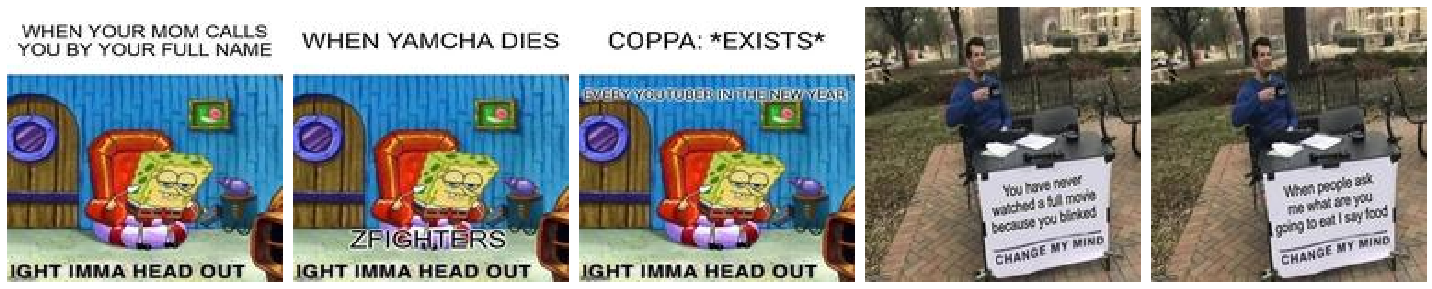

In [77]:
plotImages(sample_training_images[:5])

In [78]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [79]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [81]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 4 steps
Epoch 1/15
17/17 [==============================] - 37s 2s/step - loss: 0.1148 - accuracy: 0.9387 - val_loss: 0.0167 - val_accuracy: 0.9980
Epoch 2/15
17/17 [==============================] - 35s 2s/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 2.0896e-04 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 35s 2s/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 0.0187 - val_accuracy: 0.9980
Epoch 4/15
17/17 [==============================] - 35s 2s/step - loss: 7.8742e-05 - accuracy: 1.0000 - val_loss: 1.6274e-06 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 36s 2s/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0068 - val_accuracy: 0.9980
Epoch 6/15
17/17 [==============================] - 36s 2s/step - loss: 2.4042e-06 - accuracy: 1.0000 - val_loss: 0.0113 

In [82]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 4 steps
Epoch 1/15
17/17 [==============================] - 32s 2s/step - loss: 1.1028e-06 - accuracy: 1.0000 - val_loss: 2.7493e-06 - val_accuracy: 1.0000
Epoch 2/15
17/17 [==============================] - 23s 1s/step - loss: 9.8878e-07 - accuracy: 1.0000 - val_loss: 2.8769e-06 - val_accuracy: 1.0000
Epoch 3/15
17/17 [==============================] - 23s 1s/step - loss: 9.1629e-07 - accuracy: 1.0000 - val_loss: 2.8969e-06 - val_accuracy: 1.0000
Epoch 4/15
17/17 [==============================] - 23s 1s/step - loss: 8.4608e-07 - accuracy: 1.0000 - val_loss: 2.9441e-06 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 23s 1s/step - loss: 7.6096e-07 - accuracy: 1.0000 - val_loss: 3.0071e-06 - val_accuracy: 1.0000
Epoch 6/15
17/17 [==============================] - 25s 1s/step - loss: 6.3117e-07 - accuracy: 1.0000 - val_loss: 3.1063e-06 - val_accuracy: 1.0000
Epoch 7/15
17/17 [===

In [83]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [84]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2200 images belonging to 2 classes.


In [85]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

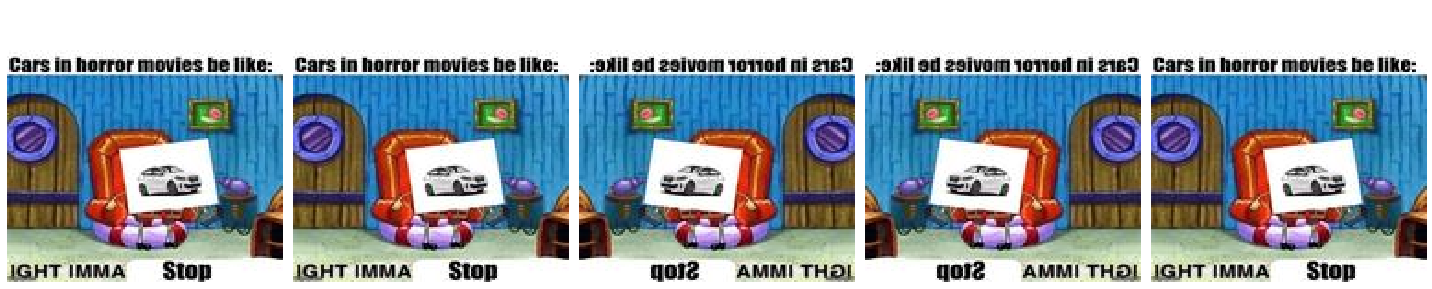

In [86]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [87]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [88]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2200 images belonging to 2 classes.


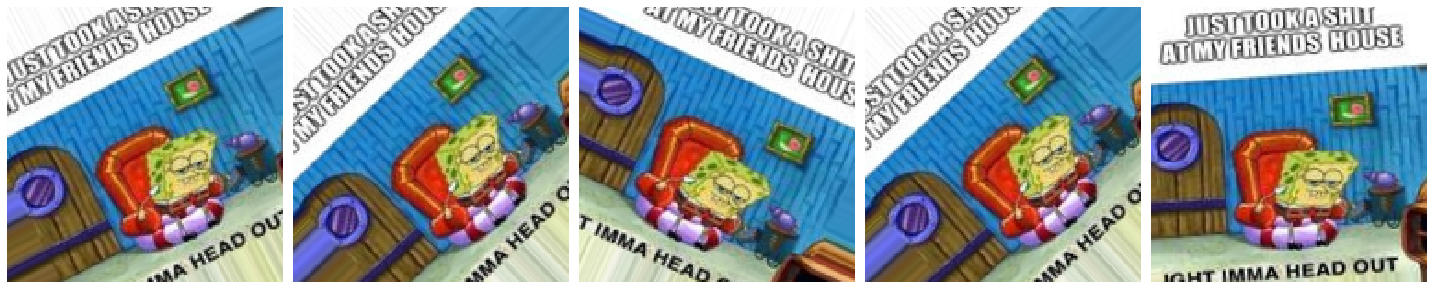

In [89]:
plotImages(augmented_images)

In [90]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [91]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2200 images belonging to 2 classes.


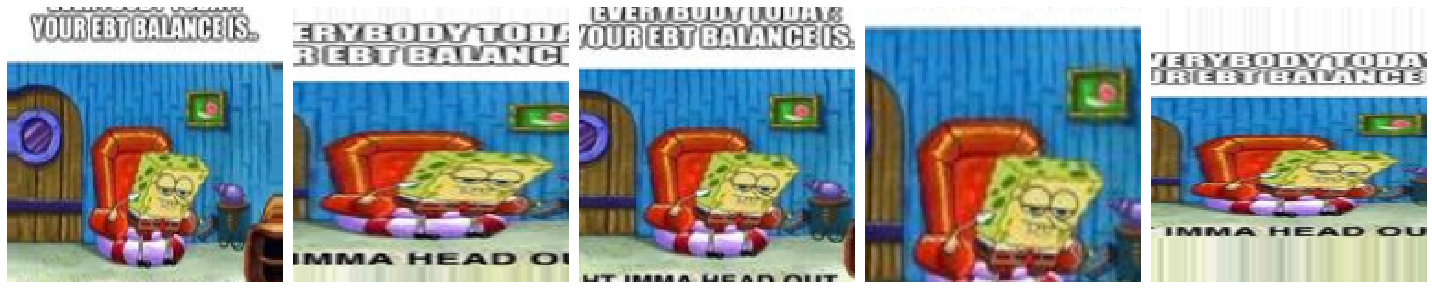

In [92]:
plotImages(augmented_images)

In [93]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABZgAAAEhCAYAAADyJ8VqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOy9abAtV3Um+GWeebznTu/e+wZNTxNoMBJGCAGSAGOEMdgYMXTJVEV0lClMd3REl13V0VFDV5XbGE9ddjsqqozdNgRDIWFmV3lCRsiABJIQIDRLbx7uPJx75nMys3+s79t58tz3pCf9qGp35FIo8t1zMvPs3Ln32muv9a1veVEUIZVUUkkllVRSSSWVVFJJJZVUUkkllVRSSSWVVF6q+P+9G5BKKqmkkkoqqaSSSiqppJJKKqmkkkoqqaSSyt9PSR3MqaSSSiqppJJKKqmkkkoqqaSSSiqppJJKKqm8LEkdzKmkkkoqqaSSSiqppJJKKqmkkkoqqaSSSiqpvCxJHcyppJJKKqmkkkoqqaSSSiqppJJKKqmkkkoqqbwsSR3MqaSSSiqppJJKKqmkkkoqqaSSSiqppJJKKqm8LEkdzKmkkkoqqaSSSiqppJJKKqmkkkoqqaSSSiqpvCzJvtCX937pjyIAWNg3AwBo7+4AALwwQKVaAAAEwxEAYH7fnF0Umc/a8+w4HAZYWV0HAGxubgEAKpWa3a/bBgDstncBAP1hHzu7LQBAp9MFAGQyOQBAoVQFAOSLRTvmS+j1hwCAL3zxqwCAI8dOAgBy2bw9XNbO7Q7svCCI4GfskXN5O6dQsGMuk+E5fT5HiEsvPQQAuP2NbwAAzMxMWZv8CAAQBgNrd68NPwoBAPV6BQBQzFq7BwO7X479UalU4MNLPGO73QMAjAL73EOG19r9m80mdnZ22L4AAOD7HvvHzvUzHj8H5udnAQCveOVVAICDB5cAAL0ef6/D9+h5iCJ7lmPHre8e/eEP7Tve/8CBA67ds7N23yNHjgIA5uf32fP37RkPHTqUOG6sb2JlZdXO4bPk89YvYH/4vh2ff+5ZBCM759JLLwEA3Hff3wIADh++DABw7bXXAgCiKECzac+wtroCAPjugw8k2vaud74LAHDDDTcgl8mzr+y3M5712dbmNgBgmW1stmw8Pn/8KAYc11df/Qr+ZsRnngcA1xfFcgl5jqUWr9c41/1brQ4AIJvJIuNn2ZZsou86HTun29U7aqPVsrnQavPYsnly6CLr38uvuNyOl9txft88Io7DkMcI1u5ev5c4dvs9tDvW3mazCQDYYZ/q6HNsZTIZZLLWXo2/Dtupduvv7e0dN1Z3tpv8TXvGx360aYPqReTKK6+OACDib4VhwGcJkMtam4rs8zC09xQGNseHIzuWy0UscB7ceOOrAAA3vOo6AMCAfTAcDvhMQ4w4Poecr8Nhj/e1++dyNnaKhTwq5ZJ9xjmuY7FQZNuSx/6gh17P+mluzvTk9HQDAFCt2L089sxgMEC+kOVn9uHW1hbbbW302QfDQYD+wNqn+ZTJWb+UyqaHmrv2jpdX1nH3PV8AAHz72zZXCnyOm157MwDgA+/7AAAgz3e9vrqKz376swCAp556CgAwO2s68HWvs2ve9KY3AQD2HzqATC6bOHdrx9o9iuydbGxuAgBanTaqVdPns3M2n5aoZ0ahjdt21/prfX0DG5xPO7u7GO8svZOpxrQ9D/u/1WrB43zVO9H77XXtve7s2L263S5C/WbbfnNj3dpZqVgfSsf2en13bq1ma5h0YI79vrGxwfv2EIbWhohHXbvNebHL59HR932USvZORqMRP7NnbTQabIv93e113PqgceLWArc22JgoFotO72r+aN2rlsoAgHwh7+4RBdQhnH9Drp9D/p50oa8x53sIOE8ihOyPLO9rv5vPZ3mPHgaDLp/R7jfi3AV1VbVqfVCtld1zz8zYcapu46/O/i+z/VFk/9vz2nsrlez4lnd85IL0zj/+4Dujc32u5wVi/ddu27wKA/tO47bXGwBcX/IFs5FkA0gPZrI+21dAf9Djc9i54dC+O3PCxpHG/MAbIcrZbxVK9q5mZm3cZ/nbIfVZnmsLPAD8d3dIG4iPUqpUE8+Y8XxaHUA+Z20Y9e09gTq1x/Xi0MGDKOQLib5ZXNwPIF5LtH6WCnVkPHufy8u2Vp9dPslr7ZzX3vwaAEC1bueVyyWMOJ4ef/xxAMAzzz4LAOj37Bmnp80mLRbLuOJys3Ouv/4nAMQ6tlqzZ1xbs/X99OnTbv5InnnmOQDAd77zIABgOJJ9VXBzUOMpBNehjPV3lu9Ra86lF1+Em26yZ6mUTO+cOHHCruE7mp6aZpcGOPKc2Spzs9Zej7Zzhe93lvZm5Ht49vnnAQAt2ozzi4vsZ/vtUsXmwWA0QMD2UB1gOOwn2pvLZfi3/U4Ueaizr4o56RB71tbuNttm77mUz0E9uL1p67zG+75Z04W7bfu9o8dOYG3bdHfE3+52zZZZWjC9/3Pv/Fm7RzBEn7bEqePWZ0uLZrcevtTsm+mG9dOvf/Q3rZ8qdczP2W822c6A9sCNN94AAKjX6wCA0XCIHueh9Iwknt57p7/sp71fRXs/nrjPL//vv3tBeufYw38WAUBzx+aO1vcgiNDv2buMzrO+b+9Yfx47fhKf+vR/BgA88dTTAMw2BYD3vOe9AIA332Zr9bDfwzfu/QYA4DNc3+fmTL9ec43Zu3fccQcA4PAVl6PWsD584oknAAAbm7afG3JdX9+wv7s902XVeh0LfHf7FhYAAB1+t0XbcG1tjX833XcF6stq1XR7fcrapPUxHI1Q0nrOcd/lfNhh33W5vgdBgE67y3/b3Cty76h9l3RV4OzM+G2W2b/FovUhzWlsb9s4W19fR4lrj466v+6rYzabdbZK1u0LufaNtPaZ5PN5t5+QDPmsPfaT53GNdWt5wdnIWvs17qu0YXRuv99Hn3o9m5N9n9yLlWmDVCtlZ1NI1FfxPtR3z6j7ZLKZxHc6TkoURW79kG00ef/xoy+7j/ap7A9dq3nswXffZbPab2XYd9xjc2aOgoHbBwy5Fg8GpoekN2WfeJ79QK1WQY37/JkZ0+ezs7YeTbHfp2p1PnvWtSuXs/Fdpi9jY8PmwncffBgA8PRTz6GYt74vFmxMTXEO6Kh9vufH+3ntD7e3zG69+788cEF65/4v/ifbZ3Fwa1zs378fM9NTbL+dq/FVKNr4XeWeOQgjN796fe5FfOvrStXusUl79xv3fQt/9Md/CgAo1a0PPvSPPwQAuP4a25s9+eMfAwB+6zd/B0tLpu/f8Y6fAQDc/mbTX9Nz1tcPPfQQAKDL97WxvYE296Ez3J9fdtjWjiHbv7pudtXZ5RWsc18lvSObIsM52uH+u1IuY9C1sbC9be+s2TSdpLm52zTbKJ/Pu890ruwIjYNJ3TLoD3Hq1Cleb22pTNhnq6vW39ls1p2juTNw65qJ9hCZTGZMd1i/+BzDxWKB97N3FYaBm2tTtAW0R9PeQXNG+6JiIbaR9Dv/f5bJfZbbU+Vi38ikPyfWj/RbcI2QrgTivtP7lM7K8r66v+d5rg0S6T4d9T5Go5G7b04+T9431pf0GcIfW5/0W+Az2T363LP1ei306csYjuxZS7RXP/+Vx/bonRd0MLe44V70bKLLORuGIUYja6Q6UAu7BuVwYIM1X8ihXDZlKaNCMy3L++mhRsEQeXZm3zl85UAaJTonCEZuEV1aMmN7ZU2bezpiooC/k3H312ZfSlH3g9uU8cVHoXM4rKxau6epdKUoMr6cu1kM6RAZcYMS8n7qn5AXjUYj5GkkauBo0zN0faoNgAZYzg2AycXUbX45WMIwxNaWGUHajA0G2nCwvdwQrG+suYWjyA3uwqIZhGfOnAEQO1JHo5F7lj4ddHKSHaYSdw4xGmGtThub3GCsr9Mo5aDXBv3gwUPsH1usAGCbRuhlh68AAJxdPgsAmJs3Jbu4uIAinQe5ginT6VnbsMzscOPv+sOHx3723Tuh04MKfnnF3q+cpBvrm26hyudt7F551ZX2OzP2OyMq45Mnz2CLDrABnX0a13ImlwrW1m63i2Zn2/17vB9aDLLIqTwcDZ0D+dU33QggdihXuJnUmJKBMBj10Z1wJOu4S+e0nMfNZtM5mDMTRliJC4iU5W677RRmi+2VQb/DRVSLqb1D6RnOJS9pML+YaF5oyZIqDsPIOQD0bVEBC0qW06HT6WGNjsJHH/2RfUclf+01r5z4xQhRzv0r8c0wkjM6XkA1zvka4s/hJY88r1AougkrB2Rs6NpRjuZcLocBA2cFOucaDdM7CljIoZHLZ1x7B9S3CtL0unZfGQthGOHdP/9OO5eO6oce+T4A4Hvf+679Hjc273+/OZrn9s3jzve9BwDwGW5ejx8zp8iDD9o10lG33XYb9h8yJ/EVV9i8ffpp2+juMDA5M23GeBRFaHOc6/mlW+RoBo2kaHYmdtSyD+V0i407Bsym+F4qFXd/OfVKBRlldvsq5++4caZNQol6QRtR/c5wOHBG2GBg99vctPep4JUW+CAYubVgqCAApcJ33eWaMb750f0lQzrqtFmt0Pk6eR0Q96H+1mY2k/Hh06AJQo2T2BABgD43r9lMzhlBchJqHRlxHVEnujXJiwNaQaA1h5u1oQws6oRo5JyHMl4qlSKfTZsqW9dnZhrOwSyHcp3Oh8jpd7ttPldAiRu3ZtP69Tt/dz8A4C3v+AguRPQ8LyTajErcesx2DAcjF/SKkLS3PGoynTsahQgDPUfyeYp0+IewZ2oN2hiE9tsZvucaHRtgfw40dmjbBGEAj2ZNlnaNCwBwPLh3itA5xHPchGjMRHR8DrXZDEYAtOngpj+vwD0NVQV/6g0UC/Y+FWAacsy5McHDwgKdpoMeHv++bTSfprNMTibNs13Oh421LWR966sDBw4CiNdUrX3rnKN+JrbZitIvsqR5jP8e+yz2XFi7nR1hf8vx0W63nG7NsA8DjhcFpOTwae400eP8l65q1GVfSgfYu6qUqmjz+eWMk+5QwKC5Khum7dYEOZu0IVB75Wgu0HEeRT4KWXs3xaI926H9ZvMraDeiHvU9YIZO8irnW7dn39XrdIL4AkyE2OW7GETSJdaWGue6nGbDbht5NnDEPtumA6C/n4HgUBswOSKnMTO3wGdhO0e0TdnGDTpdvAgIJ9b2yTV4fPPmdKq+870XvPZ8n12IaExonyKAQiaTcZu3Hh3NAZ1e7ZaNEQUGrrj8Unzkw78EAC6QfP+3vg0A+Pzn77H70vZ4753vw5vf+hYAwOyc2fef+JNPAgB++EObdwIJ3HHHHbj2enP+3Hij2aFPPvkkAOD0GXOKzNP2VkB5Z3s7Dk7yXR6gna8xKRsvm81hk/uFJufBpLNRAeRet+vs8hLfd3kiCCy7tN3uoMx1ttdNbvrHHTBA7DQOgsDtCzu0jdUWOYW0HmWzWef0mdzkaw+s+29tbTkdomPstPES/TQYDNx9tA5Pbv5jx4bdv9Nuuf23hp6c1JO/G4yGkG9D58hhFDub7PeHo9GeZ4vbwIA0r8lmMm6OvJBDefwYhqF7x7HdlHQsa04Uc3lIAbvxQf3oQ4HuGBAz6SiRjOgUGTinctcFvCcdytKTjYb1T33KdPjMzLRzLDfkUHa6W2sG2E8llEt23YnjpwEAf/HgfQCAUydtX1ugU3m2sc85kuXbkDtCa0+nE4OONJ8VQD2wfwkvRVoM9pWLDJRwPThx4gSCwOzwWQb2NV/lW5GfYG1tHdqLlUo5nsM9fst0SIP99tafuh31uv37d3739wEAf/jx/wQA+MAH/gEA4NZbDMz36x/9NXz01z8GAPjqV//c7se15G13vA0A8PrXvx4A8PDD5qCH5yGTob+BviaNKzmaFwgQy2YzbpzK0SxbXvqmynfQ3NlxQIzpGQE97NqtLXvG+hTttN22G3szMzO872aiLefSLZdccgkAOEezwGRyNC8t2btdXl52e5a8A0kSyCTwGHVksVh0ukPPqt/ucc12AMtc1ukigTy176pW5RAvsG2xnpYejn1DSWf333fxPM/pcQeaof6VjpIN0+l0nG7TudLh0q2S0Wjkro/1O3VpLuk7HLcnYv+f/Y72pqOJ/VzG91HmuAgnfJ6CkuTG/Iv6Ce1den05lG289HkcjvrI5+36BQZ6FggWOJekFBmppJJKKqmkkkoqqaSSSiqppJJKKqmkkkoqqbwseUEE85NEjywuGJohT0/7YDREQHRWluncSj0W2k6pXb7nuSiJkMyKHgoJkiMqZeD1HYJZ3nt56F0ak46Z0CGgDh20aNtzzx0BALSZGqW0RFFm9AYDh/aMJiKzOgrdG3qBozZYYaT66istCiZ0rEMw+xl4jHIIcRawr4Q2GkeMKfKkyIVLUfKStAYOHTSGYFZqVZx+ZOcoIuVn4nOEKi0RnZxxiKEYIbC9Y9H7A6S1uPjiiwEAR48eTfxeFEUucnX48sMAYnRzfcre+cmTlvqqFPlxRJgQzEr3V/uneG2jMY2tLaZbEMl9xVVXAwB+/GNLzVtZsXvUphou4qKUwatfaSiLV/A4O2NtK1WqLnKjtOBOS6lz6me+I0adFxf3oys6AqKQO22l1lsf7AhdMxggI0Q0I0Ix3cVO4u9WuzVGe2ERSs0J9alQyocvP+yi1pO0F92B0MmMMo3RXpyP7kLzaBytLKSy2icEif7e5d/b2zuO7qIpmoJJlDKPnu+7PosRli8tjqXon0QYOw+RQF0OBadxUNBYywilFLkMDN+3CPIjj/wAQIzCuPoqQ9qOp8DvzYUVQjjOQKCqG0MyE4Ui4JlAjmPoiWJRqfx2H0W1HeqJ51WrZehR+kIyMy2tMZ1EMo+CkaMeULMHbMSIaIwu7z/dqLvffve738Vnsob+iGlp3/r23wGII+PvvfN92E9U4HvfKySzpdQuM6vgO9/5DgCb6294g6EPlohkFnWLkMytjo2dmelpN6Ynkcwe9cJ+IpmjCAhnk0j9SSSzQ9o3hSZoOGSTQzIz6q/UWs2LIBg5eguJUJ5KR8xGzLAZjVyfVSphog8HgxavjtNCHRhSQH4kI9JCBMQ6Nh6bkylnikK3qbs8PxpLiyWCx6Vu2T2EgK/VqigU7Rn7TJXLujkZJe4xGAydXnRrMNHxg14yVVTZQPl8FmGkDKOAz0ok0lDPLmTPyKXmajzXiMITKkiZMfVaDXWmmmZd9hT4rMwOIYoymyngkYcfBQA8/NCjfNaXlran1GNMII+Tn0kPCNXO5/VihIJDaA05johMyOdEmdN17Yt1JDO3iIYQumCaKISgOUJAJHyR43WOKZ0Bx/aW0KCc+8FwiJwQu0RSiEYjO4m2jCJkOO49dnKBbYAyrHp2r93mjkPPSa+ViULX+lIgPdDS0sUolex9nl1Ztmd82tog1LZQF5oHJ06cwLOkxBBKKyu7TDqWNqMfhS41+Pnnje6iRpSUuy+zOubm5/akxfsxDJk35jhFjGYW8lXrb4YIEI3/LNe7Qa/v4OnOTiW63JdNxz4uFnIoFIQKM90xXddYj+eK/e4Q/aGtZXpdLWUica3e5nOFYejGlOzKPqno/EwyBbNQlP0wwpA6tFy2ft03a/NqfpY0BRw3nU4Xc9O2H5ift/m6vdVkH8Y2AGCI05boDWh7hk7vK2OLyPQoQJG0ItILGkPSF0oFV2ZGsVR0unuOyLQB+2mVCLb1jTW2pQ9P6eUTGUbnOp4PjXwhyOWXimAWKrDA9WB+nz3L5sam2wuUytLfRCxxXHVa1vfFchWHDhnK7a673g8AmGFGzhe/9BUAwNe//jcAgI3NDXzwrn8IAHgVqUR+hbb8J/7UkMzPPXcMAHDPPfe4OfMa0r9oXZdOOXLE6Ftmpuz3spks1kibEQgNy7m9n0hmIT+z2eweGgONZY0NZbFONWYcbZvWdVFmlEgHMr4W7u5OZknZUfat2j9HFPf29jb6fdGmifLI5oj2h0L7VmtVt78RkrndTiKwhZSen5939t5kOrTu4XmxLRAjHa2dssfKfEahW2U/RFHkMuP0/KLrUxZWTI+TRYFZn3r+SrnK+3DNDkW7Fq9dhQz3kNqrTtBqnGvMT9JfnIsGYxKxrHRuoTLje8R2uRB44/Qc1jatpYDWaa2FQ64Bg7716ThNlxDLovOanSYq2WVSTSeOU7U6ai6TCmyfHUuOnsu+f+rJZ/Dgg/8FALBFSgyHWJ5e4O+QLq9aiROouU44ekQe19ep11ZX8YpXGDXUu971dgDAgmhKL1CUwap1THRjU/Vpl8Gs9zJHOq4i7ch2y2yNublZtx8RRU6ZuqrbsT7vcq9bKVXw+ltuAgDU6/8KAPDbv/PvAQD/+bOfARBn6v3s29+Bj/3WRwEAv0Ek81//9dftt4lkfte7bB/z2te+FgDw6KOPOt2usbDOefEcX9DFl14KAJifnXU2pHw0a9zTy56oE5XemJ7GDrMcpG+mGqIQSWadVGsVtFtaq+2+8/P2XgztPY58jXWLaIFEL6r+391l5iJ9FwcOHMDyMu2ofhLJLMoNIWp7vZ6j/5Ce0X2kW6TvoihyyFzNJ2UfhRP7rlKp6O7hPqMukU5RG/6+Soxazrl9lPTXJA2G8x36vtPRkz6MyUyNbDYbo5sdk8G5dem4Hp1EKuuoK0qkTwnHqGukL7Njz2TtlU0WOHocUXn2uru8v2g57f5z81PYRz2zyCyGOfraziUpgjmVVFJJJZVUUkkllVRSSSWVVFJJJZVUUkkllZclL4hgfuwxK7DymldblFvF/ga9ruOXLBSJQhFfY18FRcShHDhElaK/ivY4hIJI+/1MjGrOJZFcKuIlZEgUBQ4VfOjQQd6fnITkYnZcdo7zOePQWZHjjOQxS7SzLySS56K/m4xsiW9nhoWuhHfKZLIusu4Q1xEjR+LmRMwx5SIeiBHKQMyjOgqSPMvD4XCMr4dFmRi1UnRfEkWBi0CrwN4UOZC6jN6qWOHM/By2iIQR8kzRKSGZxX1YrlSwzXPFsdokekKcbM89ZwgioZVrtZobJ5NRmUlEdrFYdAVrjrLgYIOoisuJZM6Td3kQhCgxet8gmmadHIRCw2VZUOHEydMOaS7uvlOnjAvr5An7nU5PESny1/b6DkVRq9tLaNQsgru1QR5cosnanW5c6E5IZaFzXHE+Oy4sLeDa668BABy+whDL+/dbcSSHUmbkPYhGbi6NI5QBoEP+xXE+5fG/gb28yjlxMI0V59O/J/mUxb/XEVQXPuIYmfishSKI566JhzAQakWRt+QYfTHJ6l7iRRZ/OeI5p3+IJ1aR6/w5eFSbzSSS5WEiHaVrLj98qTs3AWYGHDLYzcVBz0UNxT2prlFhJ30wzsms31bhsQ5Ra0K2OCSd56FGnl1XxMFxMtucH0cyS3+pMKCaL2TlSAXGEPOpSZdMIpmfImrwb1lcM1/I4+fe+fMAgIsvsz668313AoiRzGr//fff7+b0zf7rAMBxMk8imaM+MEP0pfhRhUjCBNpocWm/Q3FF0QzbP8HJzGvHkcwqEKQIvsZ0tyN0gVDERdf3QjxpvroieozDFgoFpw/F1yakje4hdFEYjqOCk1knjvcfemQh38YLDoWJ71ydAhXV6A8wYkHauLif4sVEvY7s2X0vxJCRaSEqhxA/K7mXfaG4fbdGOjSnKGgnOGkd73I4cqhmFRFxGSacylPkqKvWysiRw0uZNUIsq0COUMvFQnEMIWQ3LJeEELL7PfWUrTmPPPQols/aGiC7olZp4KVIl0jPvQDm+ANXEGgY88zac7KwcCbjkKdubeZ7EUKk09E6HzgkjJBPvXaS41m1EXKdLDJD6jh2qlCAAdeFFtE6AXnjEQTOwCtTd/TJQZlXAcga19R+3xUtFjoyzzVWBaKisvXrcDRCjbZWY9rWaK27udzQnQNYttpgZOuLsryEFvbYBmUXHCO/+/e//whWzlhBwAIRqspsa7HGQjeI51DLEx+i2WlZ8Zuq2CXbXy6XscO1cigEs7jxXJpBnEXmcmHEHer+5pF6qMC2RWFcE6BKjuFlXrNBJK2A0vsX9+O666wWwOkTZo/s7pILct3m6tYmOVKrNRRUmI8IlRbRZ7vktx8SiTQYjVCkzkOoIoTMbgtjtLrd19pdzuaw3UvWhJCOFQpLiKTm1hbqVRt3Wsv0JrJCFHIdiKLI6T7Nj4wr/q3sHCKQG1MoZJN6wWOm4IAoxJ1mEond6e5iY2OF97dz1/n36oodO9R7XuSjUlPRhFjf2vHFEcwvhHr24hslvrtQ0Rol/m5lB+xbmMfmBut7UO8UyXPa76u4EtFwnZarKXLRQbMp3/VOK441Sy5QFQF85OGHHR/6B+/6oF1DDtBf/dV/CiBGMj/22GP46le/BiBeQ2+97TYAwMGLbd8lJJb2AVO1KbdeCcksTlTZ+AcO2rX1ShWZpSTHpcbRlnjHuWYHQeD4UbXOaj2W3afChp7vjXEss0ZDKckRHKN7iVydnXV8zOPFAoG4VoP+rlarDkEsG15IZvHkjiOZ9+2zYpRCGp8PyZzL5RyHaj6fzPLU3k/jS21ttzsug0b7CO27dA9xlBcKeVeQduSQlNa/4s8vjp07iQ6OVHB7gk95/N/nQyxP8iyHYegydSYRy7JrNe98ZFwbYn+BEH/6fb2rgdN5AyLzYsSyMgAG7NMiprm3U/b1LNG6042kXSLbwwoKy56v8jvbYyt7SoX7+r2RK9w3P2s1BoRYFsJdS08QjZwdrMwP8SuvcWy99mZDAH/wFz+AMtdjZaWdPHEcL0X6tGGiiQydSqmCBrMRVrmv1jubZ+H0Cn+70+65fsvsJtHz5YrNj26He5BuC3lmPN3wE7YP/rV/968BAL/9O78HAPjzr1m2RbO5g7s+cBcA4N/+2r8BAPwu0c7332/c8lqr7nyvFTG97trr8PQztsfwlpNI5rNE/WpMHrr4YsxONxLn6LhG3bjD7O4wDDA9E2c5AECBOkO83BqLGxub8GrMlGhrzNm4X1gwHbDOQoNx9mMfzaa1S6hp6ZQVrmPyKURR5PiYpW90H+kQjater+f2RHpurTWViezl/mDo5l7Mywnhh5EAACAASURBVEx7lbpwct9VLpecrppEMqsN+v7/6zKpW4RaHrdhxtchYKwoKtec/Fg9qEmdp/u74oq57J4aOpLzFT4dDofufjJGCxP+jhi17CObideU5O8ki3r2+m30eqz9NewnzpmeYTH7fTb+FxcXMCfmgmq81z2fXJCD+VzF/uKqhS9e7E8dP1nsT4vheLE/l65yAcX+9JmI4y+k2J/uf0HF/tg+R5VBZT+t6t5jxf5UQG7YVXXg8xf70yBRsT+9d6VMtDus3NiLHZ4S9aEUxWgkw4JOuGAEP6RSZUrqla+wAnVyXg5UHT1TxDQLb2njpYV+kX2pFJNKtYLuuhZra5eUnzb0kwouDMM9Tgk9bI7tX6OjZmZuHrOs/j5F51OelXRfe4uR+UvJnjl9Kk4nZHrbU6wGX6aCk0FXLBRRZYEO9aMcg999yIqceUwhaDTm+awNnKGzYmYmz35lSjw3AaID2djYQKevdDQbJ6K7uO4Go+uQg22qMTWWbkInLA2dSSdyr99zDupJugs5wNzCqMIbxaIzXFsTTu82j7ETuekMbzkD4oQGbZiUSpEZc2JpM835E4pCInSfy9nse6qGmiS4fzGRc1GpyLlcbMSOpHz1Af/RH7pcfAAxXQkQOwa2VaWd93+YRe6y2Swu5mYpNphVpUN/xZ+r2vQkjYGM4XIJmPhizyKiStJtbkbGi//pVBVCkuyhzGhMuYKecuor7VrKaegKzfVdG+bnko5aOZo/d/efAQCOHT8BAPirv/pLV7H47T9tVeWvvMrS8mLKDNu0bm018c1vfhPAeAoO6S4miv+JQgcAZrhh1IZXlZvXxgrXzbP412S6pKPM4L1EmREGgRv3Sgcd0NDqtmQsWb9kfM/pUvWP9LOral+JCyUeIHWHgjo6d3l5JfHsuVwORToNCwVSGTijg789YdgOBsM9RsykMaPAYhiGY2NV54D3U1q11p7IOWtE5xPSidxjX3bYP4V8waVqaW1U0ThvglZj3AbwPAZzPa21ds7+A2Yo33b7G3nNEGHINVhvTsVEKkrV5cdh/P5KRftuddXmyb1/Y5uMJ598xtqdK6FaNoOnVrP1Wcb6hUq7vc1n0GF8ztq/A7fBlqGnvhB9iOc2unLUxsWPconPB4Ohc4zIaJMTcKVt40kOSc+LXMExBdblaIYot0T1xIEQZbIoUg8WaTB73MhUqENecYXZBq3mrqO96XAeyVnq8XlE4TAKRljiZml2zo4CFLQDWwtPnLBiNStr28jmWAyOm3wvm3QwS0TDtHp2HRGdo4cvscBWhUr17Clro1Keh/0BAo6jHvWy+jvrqnurinsUV+hWwEZFU+Sk0HHs30GUpIzJ0JnjqsOLiqLXM5oMAJ7ADtq00267khRY8zOzLnW4T+Ne62atrmKXZV5bwdS0vac27Y8TpyyFdrTGPnXBzBAZjTcFe9i/mTE6FCBODS4UCug6e1K0N0qtpY2qZ89mNV2dPRU4R5rZXnJ25Qt5Z5soaCzHj2x2ARmWFubg8z5bXAtXzpr9evz4MWsbf7hS4wIbBegHLOrHuT6bMV1bpHOjzjT3q668ytm6k7pVc1pr6Hjq/rnS+hPnhsHezyYKtb6YaF2fpEzyQw/zTEcVKEdOUa3z0gn9wQgDOgpF/3dwv6Ww3n67UVcpxf/Tn/kcjhIM8vt/YI4dOZqvv/Z6AMCHfvlDAIAvfP4L+PrfWGr6vfd+A0C89r3tbVZs68BFltatIoBPPPGEG4/ZhaSjWe9WVFX7DxxEnY48f9+5KQ8E9uj1egi5X1AAeYrXyiHXF2ClVHLrldazbeoXyaSjeTCIXGEugS5ka8fvPy66qz2u5ogcPwLYqJ+iKHTp6wsL9k4mHc1ZZ68G7rndmsPfllNIjn6Nm1wuhxmuH3KEVwlSKJfk/LA2+hnPjTP1C/YUsBT9RWaPE0S0QZMUk1EU7Z1XE0fnTNd+P5ffU4Bq3KE83i+ZTGaPQ1nAlbhgH53Kg44rMqz9vug01S/Vms2r6emGcyg3ppIO5aIrkqWesTZVyjW3D5Ij+cEH7JhlIE1O5X1z864wZL6Q3O9r79cmAKbZbDpHsujebr3V5u6tt9l8lP+j3+vhGKlpTp40e13+gwuVLdI9TtWSe54oity7mqoTWMV9Ruwstb1yvVZxwcfKRHFL7bdiR/MAA4KjcuzbK6+w9f1f/ov/DQDwf//BfwQAfPMb33Dz5yMf/p8AAL/6zyz49Ucf/2MAwPe+Z/s3OZrvuusuHL7K1lfZ7seOW9A6s9/adIY2zvGjR13h0Rn6HWTDqP2rnKO7u7tufM7Nm72jOSiqOdFyZTI+1llcXiKfmJy9cjSLMqPf77vAh5zaCipN6ovd3aZ7N/OkhRLIR+9B9nOpVIqL6E4EtBw9zpijebDnHDpDOQdVMN2B4cLQXR//tmg0qH9o93S73Qkqyv++Il0SF+5Lzk0HIut2x4LkCoDHAbhxCcMwpiLluRqHkzQY44VQz+dQnqTBCMPQOZSlJx0QgL4b0bXlcrkxfSkfjRzKDCr0BKTqIeD+ZXraxvEsfQRLSzb+5mdtjjSmGk4fZrME8lTPD+RJKTJSSSWVVFJJJZVUUkkllVRSSSWVVFJJJZVUUnlZ8oIIZqUcPvmkIc7Gi/0NGHHZW+zPvOTjxf4UZZfHX1GPcxX7G3gD/sb5iv0JyRwgzMjjz2J/pMp47nmLWp2r2F/PFVQ6d7E/oTF8L4OQaKx2W8X+DNV69ZWGxBsv9if0yYsV+xsNh+gw0qhnau8qgsk07p7oRmI4vNK4YoJ4pbeYjPg8g1Fc+Cvo2beKlAnmHjJi0mq3Ua1ZxEJo5FKZqbOMuI8X4NF7m4y+ix4ll0tGvDzfxzRRE+scSx5J64XOFWJveWUZ11//EwCABhHMZULwhZ5R8b+d3TZK6l9Fvhl93BIpPtOs52bnscCoY53ItuwljEwHLBzEIl61uvXP9PQ09h+w6Ga/b+18+hmbA6LXaLbsXV1++RV445styqwCfYpWxcX5iLAa9s5ZmA8Ammz3ON2FIp4OPcx+VXE+FVXY5TWdbhctjqVtRljHEcsAEDk8k4e4MB/RDWNFK8ePRhhPROxAY9JLnCOEkp/NJKghxo8XKkImCG15LjVF9ePQVJoI/cHQPZ3S7zITPBebpLoRUuPhR77vxuyB/YvJG+ovoaij+KvBMJkCpVQiRUFLRT3/3j6I0c6KIMeUGZOFU6qVJCR6nDJDKfbS1dJnKlgSsUTiaBRi0HfVCQEA++Zn2C02bn9hAsl8ZnkZX/vzr9r9GOF98+1vBgBce72h8+98n+nTz3z6s1hftzZcCJJZKOYisx9miC6bpMxYXVlx18/OzSf6IY6kE4VLJMP6+obT43pX0p8av8pEMNRCk/9W4TjpMaZ1U7dUikVccbkhCQ8ftj779rcNSavMjzjFtjuWuqZId5ISSYgJpfv2ej332XjxDfu7n/jbg+cyR3xf2QQsssL2C7UahaFL6cyoOBpDy7mc0MpaXyMUuU5neN/d3i5/U1CeIHEcBSF8nwiPORXoM+TCwqLpXqUy1+sVV4xmmmP3LJGKvZ7eif1+qVTBaGht+Pa3vgcArpCfsk6qJbtHpVJ1iGWtUy+xtih6fRVqnJyre/9SSr50yogIgCCM03BVcFPnhqGKhWjtGiJPupD91DtTzLZpCgUTyR7xnE3UpT0yoK1VoO7N8B2XOS4K2TwKRJAUhXwgWnOKaKOffNWr7Nk7bTzzrKWXbjLDTOOqSVSNxm2r1YptOSLCBsqgIOWBitj2hiGKZfGlUB8SMRe4dG4VtVLRmwhzRBJe8wqjx5omomdxdp7nMkOn3cYW+0MFSfTehRZRJttOc8fN8RzbP3TwNNFgJOkT4m9ilIiyAaJA6Du+z8HApYTWa2Y/LHL872dG2C2vs4JEze1tHHne2nLppXbuLJ9tflbjmMWSuj0E/M1tph8POcaeY2FDRxXlZ6C0HpeqLoStMg+EgtN64Gf2IHoqXJdUfGiObZubnnVoe9kAeXahGx9toQcD5GiLSofu7lr/KAVYhbS2t7fhO3vJ2ltmBo+NBKDOVPZLL73MPvDyTlfkiyxMRMoQFShW5soVV13u7EjJC1slF2aznPOsl0iRscEiWQ32hVCWg8EAPY5d0Qhp/DZpzyk7zPNzrgDgsK8sHetPFWp89Y1mX8/Ozji6jCdYyP3jf/SHAID3vMfSzd9825sAGCWWinmLFuuBB75rbaDdeccdlt10mPbvjTfeiCeeeILPZnuPpQVlRNrfKpIdBAEWuE7uI1ovM5tEMmtN3NppouOQcry+qgKALEYpWo1e1xXkchlxtKNlC7tsW+qJTjumuxPlj66ZLA4ahqErwFWmztaeac4hIq396+vrY0UD7TeFbHOZp9SB5XLZPa+Qiaurw0QbatyzxSjBkiuyu8Ks1dNnDKl56SWWIVBQdtZwhJEyHsdSuoE4Q0DUecPhcAzVmRzTkzQYUQzzdX0kG9fZ4Y4iLEYtS6cqK2QyVT1JHyb6JSGWrS+FzBNqOQiGTofUaIdUazY+Zln4Umj+xtQUprhXlJ2mR1HGUbVi/d0h1cM373sAP3jUCmMLqVwrswCgUNA8ZnMZtx6pfdr7ylZcJ2rZ8yKHWBYVhugvVMzz1CnLDDp58oTreyFNy3tSJ19YZFNucwzWa0Iw76VAqVasj1TI8swZUk4sLqBB+jPdr8B5MMN3ublh47hUzqPXlY5KUiscvvQiAMA//V//ZwDAH/8/n8QjDxkq/GPN3wAA/LNf+ecAgF/6J4bmvudzdwMAvvV3f8e2fRx33WW0Gq+8zig4tG955jnLdDvEouVnls/iFClFZK8tLtma5F9k52jsr6ytjxXwtHGlzK240JvNv0q1mqDLAOIx3PN6bKet4Sr+t7m56Wwf2RLazwnJPMtM7Uwm47JZ9P4bE7pP9wcih1TWuxlH5gJJpHG3m/RLRaRac8XoOCdla+w0d937k809uU851/0nKQL/W0lcFDQTZ3TIFqXOUhv1HL7vu+fXvlASZ3DS9vLibFinN7OT9IUm41kC4xQY4/fT56KJ8zO5sb7jmuYlC/eNFzodDIWcn0Qs8z1Tj041qpidtbXXIZa5hs2SAk/gc9/PY6pu4+37j/wIAPC399r8e9PPfBiTkiKYU0kllVRSSSWVVFJJJZVUUkkllVRSSSWVVFJ5WfKCCOYMI5yu2N9PGsfWwr4ZDHpC7714sT954oWsFS/LuYr9uSjDeYr9jXMxi+swLvZnCDnx3QEWLR8v9pd1nM5JHk/Hxcxif1YYjmTtE8X+NslHNEtkQAgr9AfEiE5dIz48IYh6/b7jalORP0W1hbpTISF3XibnvhP62Xek4cnoUhAE7jtFurcYKZ2esyhrmRHP9fVVXH7lpYlzxItZqVpEStGxTqfjkHZxwTKLTonvdx+jbEIT7+zsOA6+OX635QomJqNw6+trDom7ta1iioaaOc6oraKFo9HIcTiJH1wR4xoRN82mPc/GRhnLpxnNv9S4kWdmLPp4JYsHnjpt6G3xI3d7XTR37fr+0O7fbFvbpmatD655lRXouf766zBPTiVhnVRMcRKl3O119/ApC5XgCj+O8Srn+W5dYb4xpLJdaxHL8eJ86o8YW6MYklDlMVLAoe7F3SlEFpHiA3GIen6MVM4o8kc01znQypPRb0V9L1Q0X4VOjpHMmbjA0gSdkzhlBTfrDYZwiFGiNjFBBb1B/eP73hgf82sAAPuIsjw3a5TQbkJ1E7HlkMzk4RT6ogDXFnfwkn+XyjGSeZyPefyowhqDgVCtQzf/NU+39Ex81piTeRTziPeSvJ0q3HHtNa8AEHMy3333n2GD8/RLX/6i3Y+R39e/znjRb3z1q+2e/YFDOC0vGwLyvvvuA7C3KMv+Q/vdmvAsCwtSJbnifxtjSOYVFujQ9Q2iG3vkCRUyRutAMBphl3PDc+NUqHCOefs5hL7vos3q57oQQlxHVEjJ932srFpbRpOZJBNozNFoNFYgyPS5ik1qXrgouhdnDOgaoVI0dzwvub6GQegKZmmG54kedQhLTiA/52M0FB8iOcLI1aV54yLNUbwWimssYKR7e4vFcyEUl7VldqaOq8h9d+gi46HUWnzJJYfYhzYnapWK66sdrjlnzxqCp06U0Rz5vn7wg8fwCIvmbG/Z+yzkxcls80Wo5Xp9Kq7TxmN/oCKlFyYFVygzqUuiKGZgV8FYRfHF599skv80l3HXd1g0cDhU9pK9n8i908gVPFxgdlhIpOKx54xfUdzYxUIOHnmtNzeJYO4JMUQbQIVOiSDyPA9Zoi5UzM4Tn7DWeY6zeqmArXX7bU9IMb6zbaIQcxwP5VLR6QGh4Pq0d2R76R34mQyytPtcAdtQ60LSVhTyJp/1sI+2yv5FG0/znPPzU8q6iDMUjq7Y+v7I44Yq8yD0jBAnepEhfKIVtcYI5Rw5vcxTI7sTEGcgaW72e8ni0RnWGsgXiqiRR/zaa661vuKcHJF7WH8PinmHzi6Tr1k2b7koNIpsow20ie6fYqFW8QY/xcKp2w7Rmnf8yeL6Hg645vPhlH3o0EbIjHHBgvexNigzY47ZI4NuT6B6p5s2t22NOHLUEGEnaW8dPX4M20TeNWgri+N2dt88f5u6sFBAucT5wXbPEeGltT6b4Vj2lc0XZyyJazWT55rPPlwhOjDKxOhm7EGpJ//2rGjC2Dd7ayjEf8c1E15qcT/J2bPWXw65FMqWLbv9TpcFqKtEimkfoz1UJpNBif3XI5I54Pxtt+w91YnKveLyS/GRD/8SAODue74AALj/W5aJ8/nP32P3pQ3y3jvfhze/9S0AYhTdJ/7kkwCAH/7Q5pv4SIVkvvb66xwfswr/nT5jNvw8bfqtHWv3zva2Q9hr3yNuVKHLXPG/bA6bXDOarWQhPc1NFQHsdbtoC6VH/Vhm300imZWhWq6U0Ouq4Ld9pj1OXDBw2/2e1slOR4UxVYi9wrZM8Tl8V3dII0oZSrqvbIFyuey4nSfR07J/xovwAYbAFPJO+3EhH2XzqUZJbmw/rixb3cch8jivR8PBHs5QvZPJfo/C0I1JcRfr7/hc8SzHqOVJTnyJ40INVFR3gKFDKgtpSVQm577WnNpUGTUWr51ELItfuUG7wfMye/RLifbf+qohUO+71zjIn33miPVXvoTpOjlJG0nk8qQN0ut1HGJ5i4h0Fe5T9sbbf+atAIBrr3mlK7y1xaKwJ04Yv7J4ljUXisWC61fNm9FL5H7P0ZYSwnFH+7VquKfwn45lFulTNuTp02cQhovsC+u3kVtLTAeLR35tdR1F6uX+QGsTC9fzWS5lLZwPf+h/xGc/Z5mUf3ufZUT+y//jXwAA/vmvGF/z+/+HDwCI+/GrX/kaPv7xjwOAQzK/6tWmh667xjIuf0wb4eD+A1gm2v8M/QvSv4cuMtS/z/ohmUwGy8xel68joM0hTuYB16H+cIByVRl0NohVqNXt51xR8V32W8Ptr2POd+uPba6tsnMb0w03V5R17lDm1Buaq81mc2yvYWN7yELRQm1Lz5XLZafr+n0VJ6d9QN0ivSO9NAoCZ3dMIpm15xnnaB8vPmjP+NLG60sVVzPD6VjZVb777TazrdQmXSMkcqlU2FNHzBXao7iM1FzW7SUnEcuScb05ybHsarNlZXvJzon7ULbmuRDLABLFTVW4T/NbiGXV+Ng/Y/NycXEB+8jnrey0eL/M7H7uzZ556nn8xX/9LNtJnvnZpXM+K5AimFNJJZVUUkkllVRSSSWVVFJJJZVUUkkllVRSeZnygghmcckKwdwiwmTRm4NPtMV4JXkg9tw7fqtqFcMBUc6MIAjBrKiu0CjZTDau7s2opHgH+w55PMbB7KIB9pki9OIzXCX3cIc8Zn4UuAiD7h9NRFcdx0kmG4ch2b5WK8nFLA7JMAzgheJitHObE5GdIVE8o9EII0Z3HCxKiE/oHkTKMBLohxEU+Vb/lAviXSL6hf0URuFYpMWiGbt8b0K6VqoWcfB8H2vrREtm7VnFUV0qkh+UkfCVlRVXQVho6ozjErXfVnRfUTHf911/LpGDcJttUARJ1w6HQ4c20XOfWbF+VvRQiN1KuYR22971wYMWZRTv2cWHDP2gqPOJ40dRIaKgS0RZp2uRnYVFu0Y8hgSDoNMvocoo5NIBa/fh6iUA4D5XNM/P+Rgwyi7UZasTVwUGkmhlh1AW1xiRC4o+O27JbswHp/emaKH+VsXsOE7kAZ44VpM8yvo9cbEGQYjhIIkki5GUdo98TlEsf6y6814uIWCMyzyKWZ5VnHqSv+1FxfGj25+hOPT87JjGmiBfpohfMooi1z+eOGUzSXWnK9fWN12UUiiym282JPPMjI3/wTgqe5yPeewfisY7bnWCyT0AHC4gJfJeTuZ8zMncHuNjBsbR4iZlh2QeOD5mVQuPphn5Js+0xlu+kEUkZBM7tt9TA5OczDe8yirJD/oD3H2PoQikQ75IJLMQN695tfXTzbfcjD4j3p8lv6N42vZyMns4QISr9MCRI4YOKRf0HIYM2djYdHzMy0R6DRN8ozHPZsDPozBwvH/jnMX8AECM3PX8yPGEShdJX1x59VWJe5w4cco9wyqRzF1WxXYoc6IRwzBy720yUr+1pSrwfd6DWSl+Nq4OLO5dIYg4Lh0q2fPAEgHIcE4WDCqPgl9mX5qOjBABGaGpeRwmUUyOdy3su2i4eJWFjBsMxDNtek4ZSVONGl7/htcBAG4kz6fn0KqK9rOSca/nxrH4WHe2rA+ff9b47bc2vwMAOHXyjEMsV8sxUnn8qHfneTEPcqdpY1XIoQuVpf1EVbq5Dve3q6xNdNb11xt3sXjHjx8nQm9+0XE43nvvfQDi2gp6YR6PF120hALX2Z1dm+sHF2xeXHyJcRKeIOd/gACnTttvhEKg0sa68pAhbmbL9r5rRJEUinlE1L2n1m3uaH1vsOr5LpGEszPTqJHrvd0ivzIRFC2eW3RoPkPCATEqxBMfdEH830S7FPLwaVsERP5qTKgCu3jRVb9jNBwh4PiMiMgrEoEzu59IMUeM7CFHrt5Tq4bo6XHdFA+0pF6vu+wHrVKq6xCnxBCtghjV7NDrE0gWZRAo0wwI3FxfXDQuuzYzoY4fe57PSATUaOBQ/vuXzB5rEgkajMgtSo7/arXs0N91cuL5tPdet22czsr6CsN4zRfHslBRypiTXZGhrh2EEbZkMwbJSvSq6SC04LA/QI1IqRrRgHXyarZadu00+/h1t7zOZUEqe04Ip4UFO0d2dy7rOxsoHltCXdn9d9iXwwEzzTp97ChThWMsyzGrZ1Tm2er6KtbXbT8wmRl0rqPQZ5Pf+Z6/99yJc16qVMjxqv1QXDV+BjWObXHli0+8wMyDeSLBNzc23f6hVLb5K05mIdnF41osV3HokI25u+56PwBghkjPL37pKwCAr3/9bwCYTfvBu/4hAOBVN94AAPgVopw+8aeGZH7uuWMAgHvuMfRzs9nEa24yu+Dyyy2zRfbykSM2D2aYiZDNZLFGXmaXwUkdtZ9I5gbHWTYb7w8dopg2dqtl40B7wanGjLN9ZD+Ik7lErtpJhNvubit+z35yrqj9ysTc3t52KGSN4f4E97V0YWN6ymWYaSxrfyyeVumN7e1th0QUCnCSo1NoO3G4Nps77hly5CSXghRSUchFz8s5FGzGZQkrMwCUOPMw0vrt7KbkPnmomidRhIx0Kj+LmHEjmzozsRfJZrNjWQS0oUcxYtnuFaOWJxHLmhONaeuvet2Os7MzMWKZ/MpCLmv/I/2Wz5dRLtl1x46dBAB898G/BQCcOWXriWyQmYahVaemGnE279jWC4hrqcj22NhYdxzLqhH1gfffCSBe45VRuLa67BDLZ87Yuq9MNj2bdEOv13PodGXYLCydH0l4LimUmG3El9Dvmd2024rXOJSS2ag6Csk8Gg1dXaIwtL14o0G70/HFWictLi1gZdn6QrUn9P411nebZo8c3L+AD/6i6aYp2h9f/PLXAOxFMr/9Z98BwHwVn6RO+sQn7Phe7ltee8vNAIAbbzBE86OPPoqlBeuv1XVr0/KZM/ZMtIkvo+7y9vtuzC6v2LnbRB+vE40+QzSo7/uOJ97VAlGmoRwM6hU+/O5ue4zzXejjXfZvwL9tfa9Wa3v44U+ftv6XH61Sib/XHnISyax3rnnWbredL0l6y40LZWCfA8ksPbC1k8zE1rNrYrTb7TEb2u6vdz6JCH65ovaqX4QAHs/u13OM+6iAeD+rrDd9HkXRGCd1lLify6zJxXzxkzbAJFe9nnU4HLp/55xPr5i8xmWXxjzLMTe93V8ZHuJ373Vt3PT7HadLy2V7poUl01+yTRdoO8zNzLraPHpftarpz1OnbJ/72U9bLaZRP0SjxuvIQ16unJ/7PUUwp5JKKqmkkkoqqaSSSiqppJJKKqmkkkoqqaTysuQFEcxCr64RifbEE8b3trhv3qGR+yNVPiTShDyGinY0GlMuki7vvqtALr4WRlGymazjSx149pkQzIoojHMxu+rYmSSS+dBBQ4Y8+5yh4lptViwNQxfh7cHuP4nAVDQ6yIQO0RmQc3KXaI5TjC5ewmqjYTSCz3MU1RZCpkeUmhBd4WiEXjcZ6RZqTZ+rArZP/pMMPOTJU10lP5Qi4mXHeRjzyIn3uNOxaEZTUVUhe8gZli+VIOpaVWEWL1Ho0BC6v78HdaxIlvi+VIVXY2FlZcUh/nTO5aw0rYrRipbBi7mKdgn93CFnnt7fBqvZP3f0ecxO2/1UjbzLqOHzzxmnq6LF3U4nruxZIG/dliFFMkSi1husVk7kzYGDB3HlVYZenNtnkZxm29rSZh9uk+N5+fRxLIzsWZ586snEOZkJtHKpUnHjQRxy4lNusTq8+Ox2tnccR5w4K/fwKntC5sZoZaGXVKlZUbC+YkcG0QAAIABJREFUEGGRN3au+M55vdA5E7zKwDhCWfcRktK+z4whP/J85+JwLTv47oVJlagdZQwIRRH6MXdsNMGn7NCGHLd+ELe1R0RFMZ9EMmfHUNDrG0m0sDIdbmY1Z3G6JX7THZOIRyGZPc/a3e72XcixWDg3l6PTjfkCyiX7LSGZz8fJXCzmXRS4TySzdKqQrhpDfiaDgvjPJpHMRPYXidzdN2fz4KbX3Oju75DMRMrFSGabW9dfex1uu+1WAIZ8BoC7P3cP22vIy3Eks/r54osNfSndcvz4MXsOcuxGMxF2iFISUnn57Bl2nt2jLZQdv0cQIefGdHLO6B2FROcO+/0YDek4h+27NaIVvIyQTr5bf9QvEZJoJaGPyuWy42XTWqh3I10ogIfmfLPZjPm22IYgSs47zW9EY3PR8xL3C/pEXzXt9wvlvJvLRfE2Ol4vu6bTVoXnIYJAayORsFzrfSKSPE/X2vheWlpAo2GIHiEBhEbdYr2CZfJoryyvoLlj69JZVro/dtSQQ5ubdu4rrjJ++6XFQ24c18l5LJ0SI4esLe12G22ua5vMJNlgBtOFyiWXXJz4exy1o3/XiIgS0kH85eIcnZmeR5ZzQqi6b3zjfgDALhGY0s3F0kW4+mpbDy+7zH770JKhmp56/CkAsR6abkxhdc0QVVnOnQ7XDPEqz5IPcp7zd3FpEchxLPyAiA0ivg/tN/SO+Cw9TDm9W+/YGG7Q1qgSodAlP+Txkycdmky8egXyQeu9NLg+dwcx2kKID2UBCbEhe0e6pNftoUME2BrRX4vMUKpxLVHGmOf78PVulF0kHeizX8jpXa6UHT91lqi907RtZacIVRJFkeOh0/qr+wmRpMwc2Z2eH8/1QPYw2yukkOyUfr8HMFNta9vWnj6vzfqySe2+CwtzKBB12SCHrc959nM/Z7ZuJqusltEY8ogZEu0kWkfoncefMlvph48/jmZWNoW9I3Ev5/JC9FB/5AuOB7hYsPFSrRFxSt108GK7x+zsPMpE3mW5LxD36XBEfcO+GwUjh2DO5uz+W7Kxzto7Wud8FsfwbrOF5q7NgSkiFueIyhFqe8j9yZnlMzhOdOCeAg7nkPOhm18QwTyBen73i/6K+zUAMc+h1uzhcIiA3IhCMmud0Rqby1mf71uYd/az9lPFEtf7vlBTtIc6LTcPLmIG4Lve+TMAgFnawJ9iFtIjDz+MDaLgPnjXB+2aSy4BAPzqr/5TADGS+bHHHgMAfPWrX3Nr2q233QYAOEhuVc0HcTNP1abcfkJI5nUiuQdcaw8ctGvrlSoyS0Jz0YbjmN4iolBjOwgCx8cstKk4T2WfFjmn9N4ymYzLsPRKsmc1Zzg3yY85OzvrnlH7nck1YmaGfJae5+xWt7/kWJ9mptYZroU7OzturaxMcEYLuby7a+Pj1ClbNwuFgruf5qlQ66qrInvF9/1Yn3EaOCRdTsi/vOtj8emqDoOyTYY97l1DpXl4CEZJvSUbPVsSp6iQkaCETi8OuJ4MJniWRyOhuIcOkTg1TR7lhvp5hn1p86dRr6PKrABn79E2KhGtLNTy4z9+Gt998CEAcZ2HYt7m2tyM7evEr+wQqX5s9wmprKMQrVq3rr32lXj3z/+s3Y/rcp+I5eUz9v5OnLDjxsZajHrns8nedOOa7y6IIlzCefhK8v2HL67WEpLLa1+W1Fv9Xhu7LaHYye9bOT+SOQp9Pofp1yCwNWma70k2+GgYYD/tjhXa1rmJ+ifax+w2t7DAjMpfYE0YzeM//eSnAAAf++3fAAB85J98BADwhlvf6JDq//7/+n0AwOc+dzeAuL7DrbebPnrta1+Lhx9+GACwb87e88aW6Z9V+kCE/r/s8OVYIurTceyetWfe2FatJ9NZjekZ5zPRnr5aTiLFY2511Ynx0OI6JntKdr6ywqVjWq1dlMvieqcOv8hsxlPkktY7q1QqmOf6EXPAm8hO9zyhifuuj9SG+Bz6pzhulX1RLBZcf6geg0Myixeacyafz7n7TyKZYzT1EC9VPM/bw7GstWEcsQzEc8jzPGfvyY7XPSRxFlG4hyc+m0vyLI+jls+HWJ48Znx/DLGsGh9JxHKMlGaWoBfX0FF9mT55lnt969vRUHVZcpjl/IkRy4Y4Fs9ynjZwFAGVsum47W0bk5/5lNVmkE4sF01fLh7Y5xD0dI86P8W5JEUwp5JKKqmkkkoqqaSSSiqppJJKKqmkkkoqqaTysuQFEczXXWuVN79Jnt7HHrMKnDe95kZUKslonBAbKBLVMYorhCvKoYhCfoKLWZWQC/mi89rH6Mok30kSwSy0SZD4TaFXxYcJWGQqjAJkxKPiOJ0VkUtGloejofO+6/4tIkHW1qw/zpw1RFG9VoZPXkXx2cLxbzKS4artRg49puiwohpdRsnFZeqRsLVcqbpou7iGp4nYUPRjmxw9G+trmFuwSIV4OxUVVQXmKfLKFkt5bBJhtlQiMob9ogrIWXL6LiwsuCjPLCMgiijqnQhpqfcZRRHmGTUpEnkmdFcQWLRT/E0WwbM+W18zxMTxk4ZU3GDEPiTUcLe5DfCdPP2MoeovI59VnpxV6p9qpeS4DYUg63Ssf+usPvuudxG9wWhfLld0yMEWUeAbW/ZsXfIRrZDvcTAcosM5IHR5wDEmdPKO0MqdjkNR7GzbM227tikKNI64ZITsPHzKQlJpDAejEAOhqcT75GkeJbmZPf6nfwOIedbcMeanFFI5O8FRV3TVVks8FlFg5DOuPP3S4ljiudPYFnokCkdgsNzpBUmUS/yJIAJ8cThzrIiTWShOn32SBSAaqLV1IpnFyZwVJ/NNfL5CzE/mfnwSOpDkZAYAPkKMdiJVnub6uBSJLBDKokNepXMhmYU2EUJlQLRSrS4Eh7Wl2dyFL25Losn6PUZp+Z7FD1oignp+fha33PLaxP3vvtuQzEKHfvHLFunM5/O4+kpD/f/UT/9U4pqvfNl4HY8cOQbAkMwuKsuxIa5GRX5PE6XsZ7PwGNFdJTpEPPdDvjRFph2CeYwHPH41QtfEHMaAzaUO9brObXpN178AkFHEOuPH+nwkhJCNrQwRgFpzCoUiatQH4lmc5PDS+M6OcXkJqdAVoicQ6qw3+UDwIs3fGGE9/qz9TpxdlCN6vTFtbRJatEvUrzJsNjY23DtokbNzxGuHQ2tDzIGYc8918oShJzQvheTe2TG9FgV8h2c3na47eWKF55quvv66nwQAHFgyBMzu7i6a1JdCOo1XZwfgUMs7O9tuTCq6fwt59y5UDi7td88DjFOsxwhmZXWJA7pAtNMUuXFHw9DZNxddZByiV111BQDgxElDKmnc7ts3h1f9hNlY0p/Fos1n6Sw9b7FUcqT0GrtCpm7SPhvxHmXqhPKlRWRKmuuqiVFMtCkTime76Kqx12iXCV23umaIns0tW9dPnTmNXaJvQo7XDte4Cse8uC+jTh+ZvFCXSQ7REjOeCuT4DllSIAwirNPG2iGqfZeo91PkahfPdLVaxdFl0xWar+KrVCaX43At5AAiCZUZN45YHj8iihzUTp9pvnqZOAsIiHVKuVxw01PrvOwe2QKbGzF/ecA1NHSZYeKU77BtrIcRRnt4WDX3AiII9Xc+X3TnOB7BIJlloSyqNXJPdrvdGBGatfsJnVln5o7QLu3WLrZHphfatKPcHGVfTpXIfzrdwBztv2GgtZe8yi1mpTHbYDQaOK5A8Y6qhsrzR45aH3IRle6KvAiz5HYuiD+SCFnZ24eYITMcDLBKDmZMzu9JiaK9350H9RxhbMy8VAghpUNdJt7yOpHM7fYuzrLuwIi26RTHtvrIIVNDD/P7bG8g+1v9VeB6L73RH4ww6Ck7zMbGwf2Gcrr99jcAgOOw/fRnPoejz1mNkt//g98DECOZr7/WajV86Jc/BAD4wufNFvj633wd9977DQBxHZK3ve1tAIAD1InK+HjiiSec/ZldSCKZtzhXtE/af+Ag6sy09Pcp0+zcnMy9Xg8hx1adCFRlabY4Xp09SL3peb5bQ7dpn0s0l7R2tVoth/ATqllzVBkNutfUVMNxoQrVqCwpgd+EbvW8+JmEwo9tazsqS1bvN5PJuDVPSGDpgJh/NM7QjXUJs4TzqrnCtZuZbJVq2U2SKFA9ImU5KkMsRv4JeSd902cNIO2JlRnlbNZhP0Ys94U8F284975lZe5OY5pZMQ6xzPcp1GqZnMJRFGdqlks19p3Nm+997/sAgO8+YOjV4SBAkRzL87OGrhVieTJbSrUD2rst7DI7SUhlIZdfR3v5H/2jfwDA9F2fmT+nThwDECN93RrBNb9Wq8b1W4j2DNxezNpw1VVXAwCuufZabHNNfPxJm5/PP2968h13/i+4ECkUksja+Og7Pmb5PGQTErwYr4lR6LINSzxOIpln6W/IZDLo9WwMLC6ZvllbFbKWdjltzW5viDYzmGca9g7veNtbAAB17m1+7/f/AwDgP/xHO/7iL34Qr7vJbL5/82//NQDgo7/+MQDAl79sHLLq17f+9Fvx+te/HgDw0EMPJZ5/a8fmqrizR6MRLjts+5MF6uGM4xW3wbFG22hrc8ONn6qrc8HaV5xXQtpLp2xv76A+Rf3C+iFaj2fJjS+dPhqN0OkkkcAljnsh2oVkbrV2HR/z4qLVklJ2RMzJTBusUDwv13KMoKXdyX1ir9dPZDuMn6PaCPG4qbpzXwzJPHC1pc4v46hl6S/pNdmX2he6mhm8plgsuPZKJvdzcZZ+we3PzoVYHr9/GIYJjuXx+8oPU6LtEoaR08mOY/kciGU7l7zr/Z6bl72eMrT6vMbuP79g6/bCwjwW6AecYyaN9GOczWHjczSI8JUv/SUA4DQ5l4VYPrjf7Cdl3XqZ+P3vMMPsNDNpziUv4mA2A+Lb3/4WAOCxH1uxv91WG4sLJDU/X7E/dmi303Mb7QHTayaL/an4RhSFsUOZi/YLFftzFBkTxf4E4d7PwnKrqyr213cbt9jBnCTwjgnHI1fERft2KRNNwOUV2yCXigdd2nBOqYYqeDBMFjny4LlFYzjSQs/n4DVKXdEAbLU6aGiQMA10ngpDG5Yt0kecWVnBKTpnVABEC/PGpvVDm4ZJtV5xVBuit5BjQKZyuSonvecMHh2lKFyxDL6ji+jsHQ5HbiF+6mlL+T1x3BafkOOky9Ta6do0AuZUyUff69LJQoOqx8kURJErOnb0mG04X83iUldcfhkAoEIDfDjoO+ePUuz3LdEJPW1juNFIFv45efIknnzKHNfPsgDgxZddAgCoc3EocYO7r1ZzKTFy4B89fhxAnOoY0140XYpsojAfAE1FzadxugudowIbe4vzyZGbRT6XdD5POpF1HE/7VnqLc217OsoJ57sicjK6ShOLz7gzedKx/FIdzFccvoxttOddXaVzv9uP0+/YyKxLbdnr5KU6gBckHeaizCi51P+sU4RKi1qjU9DzkxuZm29+jaOrGTgH8nkczqLMGMaO5vg9UOhoJmNPIuW2kJPz3uZkm0Wrxhe6OP1cTkCm0DCNWEGUMIpcwSY5mrXxVFqaxoGcd8VSxdFl3Hrr6/nMosywzeTyadM1X/zyF/GB930AAHDZxZcAAH7mHW/n/W3e/dVf/hUA4Nlnn3PtjR3N9iD76JBQoVML3rBQhAo3cRM5uelXX2SzmT2pqKOB9HBsRFtfZp0hpXfTpxGslOOcikTmfOcEmtzkufWD/V+rTbl1aTBIFvNTf0iU0uxl4k1pmSnMHvWj5sKAbYvCwE1UGW7S3YVM0iAcdgfOkFSK+hypHbTJPH1GTu44bV2bv51tGbcqACv9aWNjZmYW+1gwpVYlrRadQ888Y2n480ztf81P3uLSkF91vQVt6vXpRD/Jsfn44z9Crsfis+xvjWE5CWQ7bKyv4YYbbA2QY1lFkC5UVNz0hWp1uaJG1N+1qtk2SuPP5YrI5+05LmLxvc1Ne14Zvhrb+5cWccnFtlYqZXx3W2urHXMshlMqFV0gRLvNgGNti86LgdZwFWHxM24MnODmtjglx6ytWUtzDCzDQ4fUGCqsJ+4YfyNZCKVcLqNDI1Njblrp6BwTHQavRhvbyNFYdQF0bmT6Ki7FPnRF3vyMezaBBra5wfrh938AIHaILSwu4Pgx21gXZqf5LCZZzo8tOppCAF5GRZ7t2VZpw6ltYRQ7TlS7TwFTFbFyhW6jeC0FTPfKJtqmPZbL6hy7RHQgpWIeI6XbUhdpHve1gWPa42AUoq/U9MDu16JekJM3YpsGg5HTTXJCKhjgKIb4zM8884x93+05SiGtWUrb1vpa5r3W1lbcOJZ9skunWZvtliNvt9PFYefEMv0ip8ryim2Cjxwx+6rdbmGegeVLaT+Wmb46TYqT2pQKfMe6XTHwEjfSOW5Wr2CxZ+naldVVnOHm2jlS7NJ4wzj2+Z7Cfee5Znyz+XKL/bVJURU6OiSmQFeqLujrHM0jm69KoRd9zWAwQI8FAOXAkM2iguNK7fX8nLMPhhOF6eZn7VrZ07OzM44u4wnaxB//oz8EALznPe8FALz5tjcBAO583528Zhaf+fRnAQAPPPBdawPX7DvuuAMAcJhUeTfeeCOeeOIJAPH+ZGnB9jbrdDTv0HkTBAEWaH+IYi8zm7TPtD5v7TRdsa0o4vVVFQDk+BStBgEipULRASfkjFgX4IA211JtkX266+aZxpjmfnztmvsdzX+lmTsHhPZ+1OlTU/WxYn7JIJhkHDRg/TJCqZx00kymt8fFC/2x8Sn6DAXmaWOwL7srbec8Lzibl3sxrWVcDzO+j1xOe1zaQoEowto8Wh/KGQJv5Pbs2odrXarW5Exu8DiDaYKeFLwsuBRz3o6OmnKl5vg5vvvgw4ljnlRCrnDf/JRzCOYLskXtfq4AGm0OFWtfX1t1hSNvvdUCMm/kUVQiAt4dO3rSOVw1TqSXK5y74zQY8g1oH3jtNdcAAK4hDcbJU6YHHvju9/E8ARvPP2974K2JoMiLiRzUorJIjJWJwn9ttz5ynDLwGHXjfaQczaL6kaNTNvjc7LRzBnbaNn7m5pNBsR7XtXI5j06HNjb3PVXq+FvfaAWlBXD77d+xwNenPvXJWM+81QJaH/utjwIAfoOO5r/8y7+252m38bPvNOqSW265BQAcZYZmh+bxxvq604+XXGp703mC7GJ6SoLjtrawTXu5XrdrpmjPblOPVbiXbnA8+77vqORqddIjtkTnYPcV6Gp9fSMGJHaTzn85k0WZcfr0aUfTpu8OHDCnvxzNGpP5fB5F7jmkozTHFZjWXk33arfbMSWsc1gnC+vJNojCyFGjyYewx9FMu7VQKOzZI7kipjmBJvPu2SeLpcd0QX7i99S28XPUl5O0r1orM5nMCzqUx+8xGo3cv3WFilNrAYidyr4D/cU+FNmK3IfLTh5zKouaTnG92TmbA9rrLDFwMzcz42iCQmfHiq7Ejn/xX62Q77NPH0GJNvr+RRs7CuJJFyqAubO5jTMsKikA3bt/4edwPkkpMlJJJZVUUkkllVRSSSWVVFJJJZVUUkkllVRSeVnyggjm668zBLNSjNYYRX/iiaewuGCRdBXOeqFifyr4EqowwESxPyGZB8OBQzDrqBSc/ARScjgcuujn+Yr9HThgKa+K9LU7PUN+AchmmKYzgdYMXaQhcEWNVKAhSyTskGnoSnu65KJDDsMoOgPwqLTtGCofR0+U/qz2K+3C4+/5jHbkC75DUoq6QQgioUaUPt/udBxCSN/l8oft9wbJggG5XAGVWonXWURW6NsVRrgWFg1ReOXhq106o6KMeb4/0WDkGQVaZ7+sLq849O6AbRKKJhjYMwsJW65UkM+ymBBROb53zPqZBPUlpgf6nu+Q4XompbkJBbW+ZW0oFwuYYfQvjhxbBEfFw55+zhAUp0+fdZ8rlWdpvz2bIlpZjsOZeSFJGg6l9/TTLJrzgx8BgEMdjeFeAC9JVZEZQywDyeJ8A6K8XVq/qDK8JNm8QyfATxTmA8ZSf12RPqEMgAwjZj5TfpWioXfiivSVSudFJZ/ruCeV5KUBevCKq64EEL9L9cnq6voY2lZpwHaN+jHGtEZ7slqFzFTk0RX/K+Th+0q1TKIvYsoMQ1pls1ncfPNrAMQFkIQ+3kPHELfEke87lEB3Eu3EQgr9GO0smaTMUJTeEMw2tqtVG/+KhsaUGfYcjcaUGwuTSBshN4RqipRq1O2gpMJ/RLy+5c23J+7/pS9/DQBw4tgxfImF/4Rk3r9kqNZ3/8LPJ6657xv34dlnrT9Ft9NgxHRONDxEQkabm24tECpHyIUcI9JKWxUSaWdnN06PUjE79uVoqII2imbH6dAOKaSINNeKIY+5IOsQxqMxCqjxZ+vn4r+LxXLiHFfoq5tM3coJORNGDv2jeax1L+BYjbgGjcLQFSfUWHXFc5kKNXAFZrPwuC7XqCcvJo1UhmiiPItP5gsxanGHKMwgIEoytPEu+hWhd1dWVnCWxdL6XRVBZDZR1d7jYEjkS2MOiwsWJb///m8CAB544HsAgAMHbLycXbYI+enTJzFFpJ7Q9UJjrpKi6ACLxrztbe/H1dQbbv1rvTRET7lsz7MnhX4sZV4olF7Xnndr08bekSO2bl551dUO+dqYmmEf2DNUiCiQ3q7Xp5xOF4K53bK2nzpj6J99RPMdvOiAW7eGyu7imFCbSpxLrrClFzrbwqWzrVnGgQrS+leS+qNWdfMLWaY4M5MhTwRLncp2ZnYOR4/a80o314g4K5eZwk90WTFfQI7rrjJjhEpWIUit4aLbKOTzKHAMCj0sxNiIc2icVqJAVEuRc6Wn9GKO1x0VyokiRIRkCMHMWk1OH4SueqyPPu0Q2X/KMAs48byJcTIYjtAU2o3osFrN5qKfTSJ4Pa+G4ZAZcbSnlIYYUJeob1u7XXT52cmnTW9uEK3Watu1ffZhs7nr1nil1/Z5f2W7iepkRZmDXsalqQo5fnJoCGb1e4W2QLfbcUghV/A0SCIs1x2VyllHYSabwNHuMBut02WRml4Py8s2p0+z4JnQ+8reyHlJG8yH54peiXpthoj8S0gpJKTWkSNH8PyR5wGM2UvnKNgHWDbN+Yv8TZ7rn/fcC5UhUY9RN4mMisIIxYJQjnZOjGQW8tP2ZrVq2e17ukT+qcCS9LlQgplMBiXS0qhgYkD7pN2yeVVnFugVl1+Kj3z4lwDEWUv3f+vbAIDPf96K+GpcvffO9wEA3vzWt2CWNvcn/uSTAIAf/tDoFbUfEJL52uuvc3QZ0oGnqfuU9bK1Y+3e2d528179ceCgIdWF/oqpXnIuo1AFteNMV7uHigBKD7W6HQS0D5QVIjRZTEU2TuEgu1zZA8o2kk40fb+1temQa9KxMQ1Tck8chqH7LVFiuILaftL2iPfCAYY71Hkq0IskHZf6pVjMYZprqvazA2bYSZ8NB9p/ZV0215D7NdmpomJTZpjvj81Tl7Uhuj4VvpI9b3fKZD3Up0w/ih5H1CxC0DWYgTdVn3JZzbre95mxI0Ql185v3PsdPPZDy7YWUrlOSk+hlZW5m8lmYpSe7AZmDwmJukb6iyxtvzfe+gbcdNOr7RqiPNukXzxJGqyTJ1lQFJFDgKqgmEOva38jqoNyxSGVD19uFFbyXfz11+/n35at8/zzR9FmYWYlHGWyEzyBLyJf/dpfAAB+6qduBwAcPLDIb2IEs8vqYzaNMvYc4r5Wie2lscJ/ANCYMh2wwoyZ0Wjk9hHqi047mbWmbIt2p41KJc/fJGqedJUFIqV/8kbzT/3av/tXAAzJ/OUv2R6kSbT5++98PwDg13/j/wQA/ObHfhsAcN99f+f2Qe95z//L3ptG3XZd1YHz3HP7+/Xd61v1fWPLkixsDDiB0MY2CTiK7QpVBAgQRjAxlUD6ImGkUqNCQSqJi2GcGJvYJnZwiBuQjbGFLSmSjPruvafXv/f17e1PUz/WnOvce18jyZX6d5aHdd93m9Pss/faa+8115zvAQDceeedADI/pHsPw9CrfuRDRL00x+vWWioMQyzTd3j8zH4/w/hM8VqFFWeTUxO+rlDFxBgR4k2nKLG23bVrwasDvVp1pApFIqP79u3z+U/CoElCpOpe2xvTs+n1el7FLsqN0YrLUVqNsbExX2cp/tB3MuoM65PNdtsrc7yfkPZVx0icrq12SQWGBD4Hq8X021F/qH0LXYNsELWs51VhbKq9j3BEdHLwnKPzxygdBtIUZbahfq1qK1U8FgsZDUa2T0JKwx7bknRBHcZGqoBO0hjTpDhUBaoE/ISon5zIBORLJWvf8THzdQ/9sa23vvWkifG6cN/CfheD9OoNxiSKnS8y7lhZXnLE8q233AQAaOcif7nllltuueWWW2655ZZbbrnllltuueWWW265/Y+2qyKYlZm6/TYTovkqEQ/PPPsc3vIWyzqPNWznvNshumNU7C+OHEHxmmJ/q2uoUITmUrG/YQ6WQQSzEDFRbDv/ElIYZxZIWdCl5VU/N4JhYRVlfMWzlyLLLCqDoayGeGck0La+voHJScsGCLklJLcyO8qwF4MASawsjJA8HbYHebQkxFYQV2oFRWZ0khG+V/21LpROFDmyWGIuF4gMmSLXUovP48y5c54defJbTwAANjdX/ZxAxsH81DNPOUfl5KRl7ebJgybRwvMUehLn1M7WNgrM0M8QnbOPqEahglygLgZiZrpniLwRAvIEORYdPRKGaFIkRihSoRT2hvYbiQ1VyiUkEo7gtawQif3qyZN2vWfsutvtjI+owb6jrJ4QiuIm7DOzXKlUceJV+/cZHicNhnllHXlcKHp/Tvy+hRoYRjsXghBF/U5ZtSvwKcvSJHGEu8auUGOh+JTF21ouZ3zKEpjiM78aKvk1+ZUHLskRvFcQyLmSCeF3MxGJGrNpmmJxUdlbCdQxe6nfOidzhijuj1wRE8qImZHs9npeiRGGwyi1Z5UZAAAgAElEQVSAUU7m5198aYiPeehGR8dmOvoPOIeS2zDFI4JgQORzBEUwimTe2NgcyILa78VhpwywCyYEkXN+CREv4SlvM+dkJs91HKFD/jzxQM/P29j83u/9C/ZdHv8LX/gjHHvFEPyfcSTzewEYHxQAvOdH3w3AsunHXjH+zxWiny4uWqZ9imP/AoW7Li4touO8f2oXth2bVWiXIn1AEITOHybhKSH4L8+nZe+5EKuQSeov/t2MS1TZbKGAkmR4boviyJ+10BpC8KhPZfMh54x+1lPFzyWBiRqfnfjve2Hfuel1bytrhrQp7zYfKPGYThQ5yrMpPk5WLUjUS5Ua+/bvQonjT+KoixcNJXb+/HleP3nLChIjauPhh78JAJiaIHcXR+Q99xjP8i0UDG7UG3joj4z763OfM+GVlVW7bqEU1Mf6Ud/bd54Ze3HM33WnIX3upfhmr9txxLIQR+IAfA9en0l0UFoLhVDiiWEm5rJsbXKBKEtxQ+t5Hdh3FKfJUTY3Z226tEhxTnJETlDUMEgz7r2tLaKm1u34a0RPSXMBQca7Jk7LAvtLmV26PiIOtbG+jpnd1m433mjiQKtb5JaXYAtR/+VSyfujc3PSxyoWEHJ0YnwCPZ57cdHaukTEckTROXEaB8j6tWJDzUVCywpBWBXfb6OBuvM92/1X2Tfecq/53Gmi6Pfu24NdhwyN3+I4fvm4IVVbztdtr2GphFA81RQyHWd/nRwz1NJWU2j9giOqVRknBI6qyTLtA1UV9N3vSGtBgqryMRtE4JdKZZ8XW0TMKXZUpY30PPq9CE32s0cfszhtZZWVYYy9VMWxvrGBsEhk1CRjIMWDQhuJ31D6KXGE7S3dtzjrORcwNh3UY5D/8tiW/aZaEwpa/PRNRwNKc0N881UiFlU91evFaLUkzsMqnmBYI0J8htKDKIbFzL9zcOj5tYnMFaLw/Pnzztf+P8beWExzNWuyjetVoVqzdYf6nOZ+VUEss6pPvjhJZjDOuV8ct21yMgulJU2WtdU1P0etzgrUjlCVFM6lL63Wx3DggM0nDz5oaEDF55/5rIn3PvSQ+XNVOL7vwffjzrvvAgB8kMiqj/6OIZmPHTsJAPjUpwz9vLW1hXveYmNaQr/iwTxBxPkMK0GKYdEFABW79Rkb7CWS2QU9i8UrCgCKl1SxkbhH+/0+tsRjy8c7KAwFZGi7Vqs1UAFmbSghLX1HCNg4TjweC0PGcPVhdHLG4xlfgtIT+lnxj97P0H2Vge/adauqKYs5iGofqyJJKb5H4T75Y/dH9N1xBEfQu+CUKj9S+T7NGVm1TN/HBrVduNZuNOze7yH6d+/eXdgi8lfzvHSPJNwXBKpiAIrF4fh3kfPqV9j/jr9CLv5yHdOTFMWUwCNfhdDTa7vTch+1xv4rcTdxmf/gDxra/qabbA7tddpYI7+21rpCLGtPI4v5Eke2q8+q6mKaukq33Go8ywsLu3GclVB/SH7UQcQyAPT6ep7Z2neskYkbvhF79ZT5xi9+6SEAwHeSR/r6644OrEeGqzIcXen85knGx8zjegWG+Jo5x66vrXt8vIu+SJWXbfp8of7DsOAc442GBKlZJcj4p8Rxe9ON5jf+0T/8+/g///VvAQC+zD6has+/+T+bEOkv/70PAQD+3f/97/DIIybuJyTze99r65XrbrDjacyePnMK4V7rh+eJ5FRf33fAqvFULVQshu4Xlrm22eY1CM06yyoboUOLhdCrAp3LmUhmmdqn2+26eJvms8wvEHVK5PTk5KT7JH1Xvk/PRpo3q6urA7zHQhgPI5nlLzOUcsWr6uTzFBdmvMqMHYtFr9QSGtu5u9l/5Xd6vZ4jirW9UCg0eK+doWsJw9DPoVfZKEey2rZSqQxxLA9+JhtELY8iln3OlXjygAhi4kK/lyKWB88TBECvL4Q4Oa/bnJckpk6fLWH2ublpf57Sq5iRfpjPV9YGU5NTeIRCpg9//REAQL1qx9k9v4/HU3V+wQVM1SelTXKW8dP3/4Bxmt933z1oc7wce8V01V56yarU3vWBv4dRyxHMueWWW2655ZZbbrnllltuueWWW2655ZZbbrl9W3ZVBHPCnfrbbjWum4cf/joA4JlnnsUOVS7BTJRUT7OsAZUcg4JnQMQNI6RGZQTBvLKy4jxO4t0U75KQD+JBKpfLA9lTZXyVYbFs2ySzYcr4XFxcxsaGZQkQC1lMJK1nAMh1nKSOYFZ2ODsdufHYBhcWL6JWM06evvPm2v23pdJJ5Ey733W0pNqsIE5F8clp2180gWnGDSM+n2CEj0ufd3d6qDCLURRHqRTpiQJaIsLrzNmyo8b03JTVEGppfd3aq1YbQ61uGeQzFywzt7Rm96+sBzCMwKlUKq6mK7R3yEac53nUXhsb25ggWmmK3GhLy/YdIS+2xPVSACaJ6KuSL0goQ2WHQ75ubG16NlkKwitEdK/zmspETDTYPze3trDINlpZNhSCEGUJh0yNSJJSuYJ1cioJNVMlt00AZa6FUki8bYJgGAEgTnDPcPF/+jcwwNvm2TX2Bd57IQBKrhZtr0In10d4lUul0iXZu6u9XsIryD9Hk+Zpml6C+L8E5fwaVigwQ0oE5iCSWf10ackyshH7T1IQkpnIz0J4iXfrD//pSOYoTob4mO04HIv8rtCiKytrePY5Q7sJ8XfPPYbIyJBHOkM68pp9KBSYbFStHgCY8M2Q6nxxJHO94Tzwo0gDqcsPcjLryOLE13NSVlhZXV1ttxv5HNCmkm29Jk5my5z+4A/8JT/+l7/yVQDA888b/91n/otxNgrJ3ON5Dhw84IjlJfKJvXrSkBtCc0XMqLY6rUzRujusYF6VOjD7tto9SRLv985TJg5yEfjR0gEOZqFalITWNwsDvPzdnrgNlYnWGBGHIvm0ul0fX3CRdiE47e+oN8y3HaaBz3Pl2vDcKF60hRlTC15ZXsYm0ciqgOmTl3xpxXzXngXLdtcn6uiR91k+fPe8+dapOesLcwuWET977hRCXuD8nJ3rpZcMbX6CaJpzVDLvddSHA2ys27W88Lxls4U+Wef7pVJWHXHytB1nlYhrIS0PHyYaZM761qGDB7GHHGMBfYK+K965nW3z4dtbWzh71rLt4ikd5WB7LfvcZ7/Af41wMCP1PwojXHlC2/3gD/4QAGB6agFLRDmfOmlI5ldeNpV38aZdc40hZPbtP4BqxcbTvW8xZfSlJUNGNcn/q4qUftQfqExi/2ffE4pEPGoTRMPESez95+1vfxsAYKtjc+gs0VNlol07vR7iLeufMX2TkDfiPRaiOYpiryA5yeqdKq8hYJXTDhE3Qank/bNHpIajesnLHRGNMsaYYN/evShyzIuXeD81P/ZQE2KdCLLt7S2UeG4hujeJRAv4rEocmzNT05gmeqhO/vAC+6XQStGmtU8hKPv4HeRHBbIqsrSQoXrtdvpeBaGqC7ANW2yD7R1WL4Qlr7wT4n6TKHZxMMvHtFodDz5fPWmofMWKQo63ybUfpwUU2S9UUaU21JwQEh1Ulmp8t4v+iBq8x/GMV0IiCfu9nqOUeoyhAwqZyP+ErJZAmmkAiAtfzySOGPNyDu70Ikcjd0diaPnUyG4VAblXq6UQSeoiDGxDm6faHbv3VVYedbp9/11ml4f8WRO8TjjgG4UNXsZ2msMclI36AIJ5BA2ouX983NCVmgP6/T5ijn8hmRXDK3ZRZcrCrnmsrVrM6ohyzjeqXuoTKdlp7Xg/ObjfeDt/+Ie+HwAwy8qhj/3u7wEAnnjcEFOra2t434Pvs98cPgwA+KVf+kUAGZL5mWeMB/Jzn/uvzsv89u/8TgDAflYkyLeKE3VyfNJRyUIyrxDJrT65b7/9dqIxhnDPcNWrKn0usuqiw7WJEMKlYglxxPl7pOpWcZbOX69XUSwOcyULfXnPm+8FkCEjH3300QEEoY1xcbELPa1uVCqVPO5dqCzwOoXst+sVB6vWfs1m0+M8rZvFgxvF9LlVIoMna+AQHNB2YdVeQWtrO0Yn7qHft7YRSjYKoqHrL0BVXzH6WvMXWIk6Y+0xPW1zzd49C2wvrkGKRVxPruG5WVvzyWdJa6VSVvwzhldPGEr40UcMcXvhPCufyLM8M2WxwtTUlD8LxXQKfqU1JNTy6soKlolYVvzx3r9mXOIHD1pfEs/y8qLFFadPn8aFC1bNJdSk4hI9Ez2zKE58H2EPeW9vJs+y9E2EWn7s8YccsXyS8bD8o5DpFfaXxlgdfb7ZFLq1N7rCubqVOfedYTz3la8YR2u73cadd9zKb1kfHl2f9BzJ3B3gYx5en2Y84/Y6Njbp/Uao0N3cm1EFuNqtVqv7/CvueFVbdKjz0ef4LZatv11z5CD+7i/9AgDg33/4IwCAxx4x9Kb0lv7uL/5dAMDP/OzP4BO/+wkAwKP8TrP52wCABx98EABwIzlmy+Uyjp0w7YMDrJTQ8z9z6iSA7Lkv7N6N8BDX9PQdi8vD6GGt22cZ7zR3dnwsjpH7XvsCmr+84qzdcbSw4j19R/tsqohcX1/3uX+OsbxXc3DPRs9oZmbG/bDr14gbnP4t05JRdUS2zhpFO/cdyaznWXXfKV8tvQrtDyiOLRQC/06rZf1PFTuqVs1Qy1VfMo9WfqjN5Bs1D4TF8IqI5XRgrQfYc82qQ8jHLzRyOLx3hhQIg2HEchZDgtemsdp2juVej21GXYoJjoVZahCIZ3lhfh5zjNu1x1lgtfzYhMUDzzxtc+UfffFjqHEfamFWiGU7njSXQMaAja01b99zrMR44DveCgD4qZ/6GwAynuWTJ47jpZde5L1pThnHlSxHMOeWW2655ZZbbrnllltuueWWW2655ZZbbrnl9m3ZVRHMyoTcRv7ESSqvLp2/gOeet53y3USWCJXbJfpFyMJqpYg20RtT5DRKOsN8mEIa1ev1LPPHLI84dMTvVWMmtVqtDqAsyG3kfGRCvNmxZqlMOz4+hrU1ZW7sHksVZbelkqv0bjrCJJVxCArFpGzN4uISDu63LEGdPFOg+nCzOYw0DgohYp5cnIZFZq+E7JbSuTKDvShGh2q+QvHtMLMjFE2VGaRis4mxMctc1MjzpUy6sioTVJrsRz1HgMzNGc9aiajnbl8IQmvDrXYThQ1778IF8i4Wxdlq7TA5TnTcLsuyNOoN50i7eNGypItED990A5GWRA2XK2XPhm2QQ2iJ3JzKNisLdP311+O++w0lcPONzDJW9Nzspc8+sbyy5kgF/V7o0VXyX164aOdZJcqg2+0DzBCpH3f4bMSJ2iLCbHtp1fkzhdof5dh2Duag5CjRUX7dAi7NqAlxoQy4EKjiURZ/oTh0a9WqowPEU3g1lPKVEMtZtnrgegauC8jQDzL9NgzDS44zihp9LRNvNIharBN5dfMN13sWUWNDSGZxFSZQZULJ22WQ0xAA+uKndsRrxr8rTmH5M1mRx2h3es7H/NQzhtQVIuzuu+4AT3TpTY28lfaGufe6XfUHIKjrW/ZeR0hXfywDnMw1O85rIZnL5bLzVpWZZRWSeX2NXNQjSCekQFe8oOJLRYvHFZLZxvq7/vIPu8L6o48Zt9mxY8bJ/Ief/68AgGuPGlrl5JmzjhgX6uKVY4byHKNvkl8Ow1KW1Wc7rxLRoOqQxtiwmm+n0xniJwSAWKg4VVmwvxTSwB+XI+7V/9kR0wG0vvqJ0CMBcc7yNxnndQAIac2+pPlUc4NQfRrnhSRFRdzLUlpm5cscqzqEAmhUK3ilaxyV4rIV35eS802qbs8dOASQJ+/JJ58EAMzvMkTD/Q/cZ9eta62U8fLLhkJuE8lwww03AAAiopnqNWasOc+2Wh2chGW+V1c2eZ12PHGgfuYzhmZvtZvYWLe5/M33vhkAcN01RwFkPHbXXWcI30q56OOjzWz/q+TlXF7KlMmBjHcOyLQXLqm6eA0bb0wN/e0RwACicd8+m+ff9oDNlzNEGezfZ2in6ekF3HuvvfelLxkP4NkzNvfV69aP04QxQS/F2qpd99Ejds9jYzYfXiDCX/PPzMwM9u4xBNTShYu8PzvOOOf7PdQsmCB6q9vpeLvMkbNtKrQ2Fn9cl/PYxsYGeozTuh1WJrEyR3GUc3MmgJyRxmJ5R5+xzdlPa2NjPv+Kt1BcuuIJlU8X+u7AgUPoEjHRp38ocQwJbXbxvPWr7e0tFBjngIhH8WWrEkpxxfTcHGbnDQ1SZxtt8/41T7rqdyF1/QWvRNBczfhPGguBFOSRxXZC8K8RlbJKxKj49ZM4cV9xnqg9VevFzlkdsY03MC4O9m17NuO8txSqbLMrDEtlpIwltrYZI5LLOCTfuuZuxZlBEHgb6Vn0FYcTyTrmCPVCFhfzu3rtkDNQMVKpVERKRGgBilWoDUCEYkd8zZ2O+1n1A0hPgr/t9uzvMtcPpULBY2jxka6xv29tk09dzyYso1x+Y3EIL8L+e0Wg8qUfvFFQ8yi3peKlsUYte0/xTaJ1lfX1CSKZm81tr9yIiGybnDC/ILSXzlNIAswvmP8XOlBju8J5V3NgtxehR3+geWr/XhtD73iHcbbOcH31ux//TwCAV48dw2/85r8GAEcy384q2L/5M8aF+p8/bfPBQ3/8EL785T8BkK31vvd7je9x30FDC959t+n9PP/88x77FHcNI5nXyXcqvve9+/ajxj5b4TgOVD3GMdjcEppSKPHAKyzV9QqwttO6SKjE6elpzJJfWpWsejbPPf8MryUbH1rXug6I9D9UiUPdoK2tba+myOIRrlGd15RrbY6hoFDIUHu8bvmZshDXrN4spCGKRPKrOqZDrm6v5lVVYJwgDVS1Qr5/tsMEtZJWWC0VxT3nyr3jDnvWd99tr9decwQAMMeqt4TVafVKxdemQk2eO2vHC3mN7Y71z0e/+Ti2Nu27VSKW52asH0oTSFyuQQFIGZepeldrSM0fqhq5/fZb8Z73/DAAYGbGxpKqbi+cG9YUEkdztVrG1JTN031HWtr1q1pV88CRI0edY1nVukIsHz9+kn8bavn8+Qugy3d/XpVWACvYFKNvbTfR5bn7fDZvtJZCnNbyrxcWDcX49Ye/6Xsbb73fNC6kxaLvDq5ftf7f4D1PjA9Xbg6iQ8Wf3aFPOUctiySxarupKWlZ9VBU7Duvqj0b615twQq6fi/jgz562HzGz/7MTwIAfvfjnwQAfO3hbwAA/sE//lUAwIc++Mt48H2GVJ6gRtcXP28VbB/+8IcBZEjmO+6+E7fcZM/w+ReeB5DFexe4ryHkZxT1sZ+8zAH3hDQHLbI6bYd9Po4v8P4WvGJC+2eNsQzNC2TxA5D5ZlVDyP9ubhb4vo6fOFJ5gpzm0zPD6whVzCVJMsB/TT0D+mM9P2mE9fvaG+l7v88qLVkVRU22yPUY2v6Z5scCz1MsD3MnN5tNxPFwLFGpUouDvi/jW059n0XX6dUc9NU6xuUqqZORylaN50G+5TLjMlX7Z/OFYhtVypS8XbO9Ju7b9cSzvMO/W4io0dMYt3bZPW1jYM+eDLEMwFHL5p+p48J5/wSrOj76kd+38/Lzuek9jnBXpa+qOcR7v8q589yZM7jtNuvfP/m/vB8A0Ob+4tnTJwHAUctxHKHRGEa0N9kHLmc5gjm33HLLLbfccsstt9xyyy233HLLLbfccsstt2/LropgPn3Kdsevud44UMXF/NXlFTxD9N69VIQda9gue5eZC6F9UQlcobAzwmslPp5tIkD7/X6WNSHnW9QXZ+0wn2sQBI4aU6ZYeCUhj6RkPtawrNjE+JjzKDsC0/li7c+MGzVwLk4hRdM0HPpN5AiTNSyvWHZzdzjPrwhNTWRbLE6pMrbJuSaUqXOAjqAPId7lFGgyA15nxnu7KYVVZjiZfer3+/6euLzUMkJIS/U7LNcd/d1t22uLCG+poPeYZdnaaqJCvsg1In83iJpMmW2aX7Ds2BQ5ZMbrDUd3Vnmvu3dZlmaaiCrdfKfbxAsvGip+g7xyQm287W3GH3njLTcDAGYX5jFDns5dVEFtNu03x48ZX+gLL1j/PHvunPN6O+JdHEDkRMpUk8n/XSyjRq6rEhE3Naopp84Ha31udWXLuYvEM6oMV6U8zP08yKssy1DKRDUqKxZk6s7KYor7RyhlZQRrRG5dDZV8pVde2PA16XWEl2jwdxkyKBz6bZIkl2QFhfp8vRYIXcqUm5BN4xNjuIloSqGm9GyXllaH/k6SyBEZjogaMY30AgzFDMB55PRplYgNWTHNVO7Fw/rnf/60fca+ftutN4+cKUVa0r/MSo6mJn9uP+NP0/hv1C+PwAwGUASVsviHh5HMGZe32dhYPeNjFr8dM7KqTBGXuK6lVA7dl/Z64mclD3LbjjwhBek0xXt//K8AAKaJtnv6WRuDjz32KADgW9/6cwDAeGMcHWY/da+bRBOtEB1+95tNhb7T7To/lBCbR44a4lXzh7jNxBcaRZGjtYRIlGm8OS96HHsrCfkXqOJAv9HckGR8eomPDXJ1sWohliI7gKSr7DXRP3wmiSodBFcRgjkd4FMnSjIiqjQlEsBROkkDu8mr9srGJs8pRCXPw2vrRV3sWrCseMJ6nD/92p/yPHa+mTnz3Vs7G85TePy4ocrV368hX+L8vH2+dNGeS1jY9GfjfHtEndeJLl1aMUThvr178La3Gd/w4UOG9BC6Vty/ep6l6Ukskvfwqaes77SJpJEye6+TcbypbdR/B8fU67F9+wz9kvm7zP/prRmiCY4SjS/7gz/4r3z/KO574K28VptXnEuQ4+vllw2FfeHCRRRL1m73syJHaKSDRMGEQk+UK45Ckb8Hx6T6ohAhPR5jcXkRZ5eNB7pIxFmf/Jg+/og43lhbc67JhH1NCBmNmU7bflOpVL16KUN+DFdfRZwfoyRFn9VhmnfTkTEpxLHiqUatDvSE/KUSO9FvixeN+7DTJPf2zjaSbfLQEVF45KC13dSs+PpYxVGrosK2qxAluEFUnNCN4i9O0xQlzRviWS9JL0GegUgWB20X3QedI8p8Z8ue+eamvQqd3G61kDDeWOTcFfVUfSPkop2n0+2hExNpSrRhBBsjHfGwEkXS7/cdhRlIF4W+qaMKlaLuK/DrLpYZb/N4aSR/PxzHlkplCDsknnxxUsMrlrIKLiEq5VsTos7aiT3fFuPZbr/nzkhI7qwCwX7bU58i53Pch1frtegXVletX6yt2zyiOK5YLHpscEVzVN7lPrvqn0O/f6NWIiKzT5ST80AmiVcgjSJfHdHM13pjDB3y7DuSObK1iNCWOlav13PU6jSrShW7bDH29kq7QilDCvJZ6RrmZ+23b7rbKrdUgfKx3/09PP+iVcF8+P/59wCA97zHYoPv/s7vAgD86F/9Uf5mFh8nF+o3v2lxgtaA3/d93wcAuIYVLXfffTeef94QhKtrhr7aw/XECtFYO/ztueQ0KkR9itu7RWSf+rYq3Eqa7wuhx4FaH/Y5/8ovyB+XiyVMTdr9C723zYoBzTtC5wKpc4eqokrtrbXH5KSdZ2am7VUrim90HNcb4TOPofuoIGCsm5H2cl3LCtVCZP4u7ZYQVKUzYseRRo14t6PU+ka700PCdat4QseJrCxxDVlr2LHW17bQqFs/u/bawwCAe+8z9GuD6xTxUK9zbJ47dw4d3v/pU1aRcuqUoYYXGVvs30c0aFrGwtw428raXRzdQuZpn2Fnewfb29YPVohUFnL5O8gt+hM/8dcBAOVS0ee9M6cMSXz6tF2L4hChJVUZ1e/3/ZnEHg/aNdx4k1XU3kKe5bX1TTz9rK1Jjx+34wuxvLxMv+/Lo4L32QrXm23umaxv2P1obu9HkTuhsKjY641VaHT6WuPY/cnfLq+s49HHnrDzs/+/83uMHz2gj8komQOP/bpdovApc+X88bWsCsN55qtqS7u/s+fO8TtWhTU1Oe4Vf9Kb2kX9hUVWHKvaImAc1Ov1sL1lexMH9ptf+MAH/hqATJfic//NUMq/+o9+BR/64IcAAD/8Iz8CAJhk9eQnPm7+6CMfMR7nH2v+GO5hX77zjjsBAE899RQAYO9uqypbXLb49sK5cz6HHjl6DQCgsNfuSXHgRaKGNzm+l5cWvRJO67Y2fW19bLgab30900NSu+yQy1h7QKqY3t7e9qrqra1NfmdiqD10TefPn/d5R/tH+kzrQn0uHxYEgeueaTzIF2pspvxuvV51FHyzKcRr6tcJANua46K+73GMUStDe4bO865KUQwglgcqpwbbbLSScXCPYhCpDAysfcVlX8mYEuL4UsSyXVuGWo5jVeYSsUzNE1UFime5Vit7FZEjlrmXJcRyiRz/WnuMNaaxtGi+8/c/aboHrSZR0DVxbVs/aow13C/u7JjvkN+VVs0hVgh98Jd+AQHb/uJ5878vvcQq1raeq2KHJEPg0+lde93wWmjQrrrB/NSf2yDSgv7224wq4+GHv+YbzK8p9hfHviEisZeYn506aRvYuuAgKLmAjUotNYgqLAnThnNYygJxdT6V7CrwlYMqFq2TT01OYoqk55sUc1EnF+2AhGyAwDcakpEN5ZSTtpdTpcBFUj9osi5x4agNXAX3YSH0waiSUZV/qtRSgXaRr/1+5AuIsbYNYAVh6oQqq6o3Gj7ZbbGcUmX/ITdAi4G9bm5vo8tFsByaSmpVJiSIf6/X83M16IjDktrHnrnoR6JI1AZjPjlPs4ypPLLJpY3niclJL/csc3I9wM8OHjoMIOuHKIaeCFi8aAu548eNhP+llywAPUVo/9raui/6tPBxqgRfRKkslucvFby0IyyQ2L3ITaCSFqZb/LyEmal53jfpDhgUxJz4CmUuvNLUCf5lEvwa3UyuVquXCPPpGV9t0/iqG8nA1WkvriDON3jc0e9GIwvQKI4zgvx4+LPXa3LCEqFQzX+cBJietglydKNZz1ZBGxD7YiEsSABleDPczwe4g9Xg0WBN9q8AACAASURBVKJEc5M29xFmm+0S51Gp9JNP2iaYJpybbjTHO7hBP9DqQ6/9AcqMthgxeG5tNLNaEZ3LUJhUKeqiDT5tzAyKc4yPDQv/uZBK1f6emhJlBsdxHLngiy63p0UIA8OI9zoxXvdN3Xe+87vZLvbcHnnMxH/OnLPAcLve9HGvAEUUSBsMhLR5Pz0z5Ysz9cEWfZNKwUQf5GMrDTzBqbE4Wvrk5d1J6v4yKIqWg4kJtR0PmwRZIsJpNfhdbe5qbkvj2M+lovJEGzqiQBK1Ezf7ikHgfTTucjxx4bjJ9igz8Vqt1TDLuWyHpVAnT1npZU9l4wMbYQp4ZrmZq0XJ175uwr0zFNmp1MposJ/cxMWSRHQk6tfinL/Csfbss8/jFM+te9Y8OD1j13jwkJUL7t2zBzfdfCMA4NprLQB/joJP585acFPnbzc3xpzuQwGxxCa1eR5ynkWQJUUHn+0bsWrtdYgCkm7g5EnbJF5nCeI3v/kwAOCVYy9hddPa5ewZWzRNUARDdFEvv/wy76nhi0IF5NrwUXmbi1otr/rmT5+J4oB9fIML4QvcZOlGdr5ytYiLGzbmYu70xaRJUPxQpG9Mk9j7XjBCPSaBYglFRVEEsN93m222Czf6SQOyI+HJOEaJ9+ZloAIayC9LYI/zRalc9I3DzXW7J5U6rzCBpsceJVmipsjJ9OiRQ/ZhqHiCi50g8DhHFD2LLHGN2Kba3Oz0YhREKeElotr4tMOrXFlxW61SQY/P5Phx9g9evwT7Qm6Wbm5vedJa8V4Us10YT0mkeXZmCtuM/xrjFGilDykyFq3V5H92fANqmhvuQSpqN7WHtbeo6cKwqG7tMW1xnMkKbvTLn1arRZ9T5OtKjPFC+p2EfbrX6WYbzJw3ukxSRNrs1X2Uqj5ek1SUYpz3eG1K4nVSLgKLPZRK9ty2mAzRXD/GzS75o1438lJRt6vQXlz5oyv7lEvFfV+fKd5Vu6rke1BAa6wuagzGX+3hDec0SVGtDM+p2Uaz5jzzLeNjdV8btVsU2OSmQnFEWCsMQ9ToFzv0/zHn/uaOPdMJJhOvu9aoEP7WT/8kPvkpo8D42sN/BgD49Kc/ZcdlXPJXftSE1L77nd/jc9JHP/IfAABPPfUsADhwQxvNt95+m9NlSPjv4pLF/7sWbBNHmyHLSytIAwk8iuKHNAaMBUJksZE1YpZoUmjlYCiuFwVmSpNs3VDQ2NYmiGIkxcZpjHG2kTZMFMtrc0WUOuUBarYxbi5tbSuBTuH43nA5fafVHQgnhzdTihJ0ovXbEbYjm0PDql2vqCt3LZhvETVWubSKJVJR+bOPrS0rjAu1AZGkESr0A4orn3vG1mJ7KW4n0dgW54ydjY4DQ86dtdf5WaMeuO8tlohocMNqa3PLk0YRAU3q59pg2+Lm4vLSEjpc177t7Q8AAN7+dqNz6avtGEO+euakU2AoftWaVaXgGQ2GhHdTTzTczo3km2+xEvNTp23O/7NvWsx7/MRJT9RvbJKShXG8kgI13mNYLHvid23d+v7QhjKy9WFYKgysuRT/vrF1ltbprcR+X+d9lxFgfcOu9clvGXhGyfIf+H6jr8k27YLB3WYA2Ubz9o58FH1Y49L1Y50b6in7tjb34337MD1FKjYXXrP727vPxro2mkueDAt8TtZG825u4v2VH30XgIwq4mMf/0/4tX/xawCAn/vZnwcAfOd3W5+bJGXGb/3mvwEAfOITv+d7Nt9BseR77rkHAPA4hU13zTPRtbaCRfld7iUdvdYSZHt323cU04UXzW+sbmxglVQz09xcrHB9tKN9H6d/CXwdtO0ieQHveXgzsFAouA/VRrMSLw2CLgXKOHDgAM4y/lYiVt8RFZASRLJyuYwgEP0S5wS2kzahFc9OTk5ge0uxrABDwwlpPcdqreJ+UHNawZfuiZ8bsGS5xOautqFs96XEd/+SjWWBHOqMFXVNcZxkG8rFYQE/nUaUP51uGx2uT7p89b0MJvB3CRi5a94FLufYvlpnKY6o180ft3bsGJ/+5OewvKjEuT2b/Xst1lW/5vIQrVYTGwQ1nOOG8hT79U/+5N+w3zBhtr216RvKGxv2G/k+bdZ7kjNJnQLm/rcaUOjEq2dwJcspMnLLLbfccsstt9xyyy233HLLLbfccsstt9xy+7bsqgjmp5+y7NUP/cgPAcgoMqamp7F4zkoVn3vOspQS+6sTJVCsixYgxeYGBfqIZBEEX9kDZSDDYtnLgIQkFgrOS4raGWqwS4SoBBQkWNcTdUYkBI6lBCanJjw7tb0j4TiVHQ2jNqMo8jIgIbCFDFHmu8gsZqEQYIUIvD27De5eKllmqFwezogkKVBmOyjfWBhAQgNwsawyka9xnCBidnVT9BEqlVNFFF+3t1uOMgxZ+rK9o3ILa8PtNcuWrW+sO1G3ssEtUm/0SNxfkEBMGDqKRRk5lfP2WkKOSYBgx9t0fMIyWO0iMyDMBq/zPg5RrKZSqTrCusrM2SazbadIoL9OdGOhWPRnLjTYmTNE7wlxo7LzsIR+lygWiSjqeYoWoa8SCKFBuigW7PjlokjliWQuDwtjRHGMRt36sx5oqa7yN4p/8OEUAiAkykoZs9oISlm0F6Vi8Q3TXQxl7jJQhr2qc6XZ3/r+qBCg3h8UnRlFfkYjAj9xkv09SpGhjN/rNaHHNe5EPYIAiPneHBGXl1Jm2DUbAlbXZj+/EpI5TQHVLTgGgP9wP8TzlofuhSU+zByrpPnxx01ITegXiZjpXMMnH36/3+tkwmadAZQAgAZ9KqJMYMPpMvhaqzaGjjdImaHnKiSzLKPMsL6eif9t+JgoqxyNfUTiIwSV4dy5c3j1pI3BAsfM/gOGXJk9YVlblYQVgtARVKrsEG3PeZaWX3+DoVzL5ZqPU2XQJQIqJKfEJ1rMsvZ7faehUAuqQqA3IqSUJImXbwvKHBSFyCDaQlQJSSboWKDvV3ULYo0dHiqOEbPUNIkyMR5gAIWiUnUX9eqjwrmgQmqehGjPXmD3ts55as/ePdjDcqgd+tJt+tJtp/6x35w4fhw33GjjZH7hMABgYbchO+IXrQ2FQN6zd7dXitxys1UsCUEe00/+yVNfBQB84QtfAgDs2rUbkyzDvnDe4oIwHC5fPX/ekD3bWxvYRYHBV08Ysuf0SSsZFYJBmfZyueiiHiq/Fn2HRGLky9MgQNlR8XZP1xwkkvV1WpMCHO5FB0vm1X/6Ni+cIn2YymgnXZymjcce+ybbwPrIDBEK6nMrK4bguPHmN2GONCfyHdOT9ndzw+bfpUUK3bZbqJGiqkGUsNCA20TorbNt2qTn6vbaaPN6S1UKOEnYiWM+ZPwTFgo+N6maQ7FFT1QIKiPs9RBG8pTDKBSBxkUL008SJLw3+VKVAbs/5vjNwHcpqnV7r7ktdC/HM8ddjxfXD0IIqC/RwIDqratr1s5VttfY+ASk3rVEX3LsFat8ErJH1WlxHKNQVJmCvWh+jL1sXAKBRALXa0iICjt3zlBMa6t2DRofNSJ7up0O5maJYJPPjjnfKa5kn6s1xrEloewp60s9lQ8zDlLJaC/qe4ylEv4++4AokRpCOIn6IwicrkP3Wqd/FwVTk3FhkiSOcBJis0h/XySqUQLdSZKgzxJOobkUgyX0raoAKYRFJB6L2zWoLUXjItqCglO2RCgQOd9q2quoeWoV62PttM026KNE4bCr4JP/P9m3e9xSRb5yeA3S67Y9PvcyXbZBvToyN6Wpr0+qZa2zDAEoxFhWbTaD8TFrH1VathnPCoU6z4rUtdU1P0etTnE5ollVcdBiCa7G2YEDe/Dggz8GAJih3/7MZ/8AAPDQQyZ8qoql9z34ftx5t9FhfZB+8qO/Y0jmY8dOAgA+9SlDP29vb+OeyErVhaorCzXL/h97xWg3E9y9pNrO/u4FolJSeXTPUckYWePV6I90rFaz5edUpYFoZjS/i16g1WpjK7A22mElRq06TOckOqJWq+loQ1UZIdRaxv6sC/He0biI0eczSUmBpHiwzlhvlhWkaT9Gj/E1WCU1P23P6NBhQ6ZVeK+nT5/E1Ixdp4S3Jep35tRJAEZbBwB79+521KKqjaemKCS5avcuxKna5bprbsbtt9rvhXV7htVMijkWl8yPnjh5zGMBVdluEJ25QpS1hBjf8Y634U1vsj7VI1J5m2i+M1xLCrUcBBliOQxFFaL+PVwJ1WBVzS233oojR6z66vgJa4cv/tFX+TdpMEiH0Wp1nAIjpJ+sjxONKgokVuB1djYdqdzn2BJVmvqWqvT6/e4VK09fr4lCUAjMJp9Lo1b1Y+1QvPeZ50zkK0MyW1VBpVK7BDmqV6E4VemZpinGG8PXPIpkFjXI6dOnEcdW9TbD9YjWqfI/e/YaIniJ4oRAioDVmELcNyloNjszwev+iwAM8flb/+bfAQB+87d+AwDwgfcbsvOee0x8+ld+9e8DAP75r/06PvOZz9rxuMb4nr/wTgDAAw8YQv6//3cTNg9mgDX2tRUXorZrOXqN7Zvsom8dXHerMmuNVWgSKFafU6XDWK2O6Znhdb/2hCYm+cy2hSIuuwDg+rqqy/ms6Yc0r9RqdRw+fBgAHMmsc2q/btcu29taXLT7StPU117qy1qHqwJPlBntdhurvEdV7Kg6Ue2gqtZ6vebVnqJorYai2mjwejNa0MT3IobF/q5Gg+GxFa9/ELEMZDQYxTD0/Qv5dVVPStxSqOVOe8cr/sWuNjdvfXeBSPrd3B+cm5n1fSOtb4VKBux8n/9DmytPnmBlZ3UM+4hYniKtpdZXHV7LJkXDz589i4Ax1o/91XcDyKg4JOD39FPfAgAsLl4coDYxH+XVPmzLuXlDW993/1uxwnN8/ot/Ysd52iqOPvDT/xijliOYc8stt9xyyy233HLLLbfccsstt9xyyy233HL7tuyqCOYzZ0i8T2TatUQL3nH7HXiEmZzz5y3DqCzwakvCMJa12bd3t2foxPsn/pRd3M1XRnNruwnteXvGXtxvQkQru9/ru+iM+IlLzNwLEYIas36E2U1PTbqwnrKU5XJh6DzOf1wK4SI/ouIc4UEaFNJSZk8ZrpkZChGQT1L8fd1uG2UiSVzUhohdoaqFAFb2vBiGzkMnUm/xIScRieLJ0bmyvI4mr2Wa6AFl4y+Sr1iZpGZzx9EoQnWmI9mgQIjboOiIHfEeC2rS5fviGtW1NJvtjNuaSEXxijUkwMF+s7m1iqVly96dI9ptg/1FqKt+JEGhHmr8/QoJ84UMkIiPstndXoQdoluElnSMQqr8iuC+6nuB83hH/IqS/p2iUNAZWsXFkdhm4rMrF0SWL7RyxUVnBjNwV3p9TaTySMI6xUBmeIR/9HLHyjiQksu+Olo5yXiVM87jy/+mUql4Nkzj/I1m1mM19sh9loqV7DvsV7uYGYxj803RwPWJE1xPXJl6Ze7FN1kqpdBYj4Tew9BP0R0QDCuXht2mWloca7rfxx+3DGGxWMThQxQQG+VgLuOS98XBOCpSpuPWBwHIweVfhUBr0R+vrq4OIAzsO0Ixqc9cwsk8PYkNZr41TiVKU2RWV+iObrflfM2rG2p3s+tZ8bBNnsHVtQ1Hd4ubUPydysa/9JJVJlSrNUeJKuvuGWleU5HEUxX6xKjXd6etfqkKmCrvtSlEJAJHjimTrmsL+Zx1j61OG9XQrrcsNIWQU0QpyKMUCyEK5DfrsepGkNCquE81VnmsqNdDkQ9wTLx8zstpx99LZMCumTkEvM4Fon1W6T8jot4kOhRXI0cdHLnGeDKFjJmft/GjapRSpZQJL/JZKKv//LNWraQ+cN/99/EY845yWKKYziPfNBSvEPTiX1xZXnJeL/EqC2EnBK1QOrV6DXNzhqYW2lvCqUWig1Fie42POb/lAuOK6UnNf6/PzlPg4nKIHP276M/d2kAIvTvuNKGr6elZR1FKoGeRbSKRv+0dQ17ddddd7k8XicJZ5ny2tkS0PgUcO90OtjckfkvOOvajNlETZ8lHWq7K7/qUhkJvuG0zfnr29WLoYqhCd2RzCatXoozHXPzPhUw12b4zwq0bBCF6QmEyxNq1Zx9/QsQun3uZx2r32og4ZvpECzeJRCtxXCwTFVeqTWBmTqgWO06zZZ+JV/wkeR0Xlxe9uuvMeRsP585bm0VskK6qnAqB819qKlV1kUQPx4kuSjnv97s9hHToW+Sw7HWE8pRYZ1YRlrASJQmFliQaSH1MAsutpvOt1si1p8BE/kdxXJpm15fFAJw3iJhRDLbNvhUUQpQcHUbUJRFg4t8eIzo1jvuZVgbj7SgVMmhEELBQRDcmRzc7omICIfTUX9IkHkAIYaid5X8LLsaaVfZJOFyITd2zKlhUgZZGiU+5o0LLozb06bcp3PdGrFQajpMCHzsFF1fr+XMeRmc16gMI5hGuSSGZx8dtLSJ/3u/3EXMeUQwg9KnidFWTLOyax9qq+S0hX6s1rWX03FlJylijXK3h4H6rXvrhH/p+AMDsTCYACABPkLt0dW0N73vwfQCAg0TQ/dIv/SIA4CMf+R0AwMlXrdLl6aefxgJ5TIV6lm+9SLSgEPJhGHocOj1tfkD8tuLrXuZ82e1SJDdJM5HtEe0SIdxchwdAgb67KC2dpMRzD4uWAqlzw45ql6jdFTt1uwUXWFSHjbl+VlfUOGlwrVMNS9gusMKgx1iX1UZbRHDWOSfMTE0j2GZMxOO0OK9MUyugPiHx+T04fGQvz2nn3mRst3jRELznKM5WrVRQZCXHo4/Ysz328klrj8Dube9e41d+y1tM0Pbw4aN45BvfAAB89Hc+CgC4uGgVUOL9nqGGQ6/fwwJjlUlep8Tk33qfIU5vuPF6a8NOG2tCWo8gllWlV+d+QhzHXiUQj/ibGVYXSbBPAlrHT5zCH37+j/nvYcSyqmG1nVAuV3w9qHlbcYF8t1DLURw7n7cQy1qHa4wNIn89JlFV3ajezmuYkPecWnz9utNqo8H1qQo2tYfz0ss2Ftvt/wLAOJknJ4S8vBKS2ebynWbLfZSLg4tLXry/XLeMNSZ8/0kx0ixFRVVFqr2QrNpi1df4Nfqodlu6IUT5cs7+rnc84PHn//6v/jUA4Hc+aqJ+2qd653eblsyv/8t/jn/xa78OAPj8578IINvn+f4fMP8mJPPjjz9+SWXwGquldB8S/1uQHkoY+rNbYYwoQbYJViFNSDtsY8P3TsSdLn+zTt7u8Qmhz1t+XFV8SJvHq2QZZyVJ4vtQhw4ZSlZIZq2/9Lk41VdWVjyW13nULvKtEvCOosgFsrUOF0ew7kN860mSYHyCe3jae+MaRH40qzApeEzrexMjexTuhzn/V0sZz32GWOa447oi41kOoE0ARyx3pf1j84iEKhEkmJ61PjU/b/fqiGW2/8TYBK8NKJPlYGzM7v8L9CnPPWN8yHUimvfutr2D2dlZRywL2b3J9bkqR7dZ5f/ud/8IrrvO+lmb8/Lzz1l1iHyiuLrr9Rq6rIJUHDxGMcj77zdR1C79z8PfeNwRy69SQ89l6y5jOYI5t9xyyy233HLLLbfccsstt9xyyy233HLLLbdvy66KYFam8Bt/ZgrpZWZbjx65Bo8/bpwzFxeFzrGd9LNnLJOn7GK9XvXUq3h3hQiuEs1ZIcq3v7bufKvid4uIqhNPaBIryxj7Dvwk+WqCQHx9zBIz2ydOGrunCV6fvW4SVZemQu2wYcqhc4xpH16ZEGUMxTsbBoGrZUu188BBy9YK2aWMSK/X8cyK0D+Bc/EU+R2qA7el8DyOkKiRgOjnfocKzg1rr73kxzl//pwjCTaCYTSmOIyVZWo2m47SK7uSLduwT/Q305vtfgttoogqRKXt3mf3KMRTj+gXIbX6/QhlcuEJSaLvrpBrSKjqVqvjCtCrzN45v+kIIsD4l4li6QtJJQ4gcnjvWGZue2cHO7xuqA0Lw5zDcPQLeM8DatJFPisnu1Y/IcquUkKN6INxZqKkzFp27p4Cf5O+YV7lgctzG+VVdn5lXMqnPHjuwddBrmT140t4lQcygfqusrMZ35oQGGX/rn4nBG5vBIn7WlbU8+6Jixl8DRzlJcRvQhTGXvILDV677lWZXbVSht4Tn/KlbjASD+QI4Ljb7zuSRKqy4QiR8jqRYUKaPP74t9xn7KcC8igZc1oa4MgWF3vf+q36fYuVHjp/rRoMtc3lXmsDSGahSUcRBmONYU5mcZwFQaZ6Ls5z8QOuMiuvTOf83By6RDlkiF87zgKzubfdakrb33z0CaytWRvVxwwp0emJC95+o2s9e/as83kpg75DbjDn7GT/FRdopRxn6Df2B1VZqE+ETAVHSexcVeKbV5v22f8KRHZWy2X0WR2iHiOskdAosmKphCLPUeQ81SH3la5lhgiKIpFIiBNHhlZ4zqOHDHG8b5+hPqv87tr6BjbZz0qcnxbIpdjncxDatpfEzvv71FN/DgB405vfBACocX46fOQwAGBqatJ524R2OHvakAxCIe7aZX1YiLaFhXl02Dc3ONY0yQvZI+TTddde4/xyekbicZNPVTVQq9XGGaIoZqm+XGHMIESHUvr1RsPjiZdePA4AWFp+DADwl9/7QbweW122WEZzyKAv0b8PHjQ0wdsesMz+zTdbn55im+3stDBNtJ6QSr/3e4baWyLKTj76j//oIUyzLdR/xKcdeQygcdFFk/1HCDchpT1+EpKjK87dCtSbxVcupKvPnwO8thG5PtVvRy2Ks9/KfYnvt+RzNGMiDowkSdBlRQZYkTVJbs7JKWunBtF1Vc3h7Sa2mtaPhH46ffqk/WbW/PyBwzYuojRFpcIxU9OcbWOn7+hwe66r6xtIOFa2WNXUpl9TDIaQx0gD559LvdKHMQDbsMJYtc+/kyhBwjaMqA9SJO9vrCmQnLfmN+2crRYRMLSkL9Q2UdwbG85P2GpbH8h4N+11vCH0T4w+n0XM46j6YWXRxnMpYIUK45W0Hzlfe41ch3JsW/S1qryqlCuOngkZbwe8/yBlRRA5Fnu9Pvol63clIhI77JvdLfMHYUkQ+xgJhO7me0XFAYzB2C+r1ZL/rcqLCuPY1FFMRIhK7yQq+mey/3+YmN+4iXf0apUTPY6h3sg8prhsrFHL3lN/5GdVcuJOEMncbG7jwgWrPI04twqFKD5aIaYLSYB5VomtrVl8rgqWSmW44kHo/16n5b59/14br+94x3cAgM8tv/vx/wQAePXYMfzGbxqC8P1//f0AgCOc82673ZCjm+wr5y4u4oUXDd21xnVWn5WyWpto/bKxsZUhuTn/qupKaGQhnIVgbSUtjHSRjON6pEIsSVOP4eRDU/Has98WFIuHBa+K0twvU4wopGqxELgGic4duq8Vh73dxxjnwLH6mM9Zmi+la6R5ZIV89GkSYxeRuH3Xq7HvTBMteeCwxRrf/V1vx4mTr/C27SL27LG5XxVmL7xgz2PxwpLHB0KRnz5pCNQLrBbZ3PwKX+3a9u9/Ed/6lumVnDhpx7v5JtPeOHzEUJQHDti1XHP0qGsiVeVL6B/FW7t00VB8Z86c9nWlOEWnyIGfITfbvPfU15l7GWMJsVymzzt+wiq4H3nsKf79qmswCKmsfqP4pDGhCt0YTY4X1yXwyhhxa2eoZfUD1wsaWSdoPTeIeg1HNGVer6mSrutVcpzn4gg7jOfq9Afal4no+0/w2f7B5/4b/uJf+B4AwJ7d8zweT3AZJLPWMGrzSSKZB7WBAEMyT7EC7SJ1WfTshA6tiS+Wc/n0zIzvv4hDtlEXp6yNqXbL5rNqrYF777EqiH/2T/8hgAzJ/Pv/2Tjft7hf8p53vQe//i//BQDjYwaAr3zlqwCyvZR3vetdAIC7774bzz5rCE+twfR8lhhfyi8fYsXG3MxMVjU5gmTe3LBXoXKnZ2awwVi6xjW3YmHtJ62u2tppfLyB5k7Gfw1YrA5kCGO1abeb7UuNc023f7/t72iu2OC1DCLVtV4bH+dahrGXENiKN2dmZrxaVXoXmmM0PvTbYjF0n6y9FMVyEZ+rxn6xGHr/GkUwqxsKGe1aakmKQIhl7rmVRvZqFFf1em10ujonEcs9+Q5ru+lpu/e5+RlHLM/P2pwpHQztORSLrCoam8LX/tSqNx57xHygOJh3L1i7q2IipCZQFPcdsSwWgXNnbRy+690/DAC46y6rpGy3mnj5pRcAAMeOmQ/Xfqkq2NTGUZygyL70tvvvBwBUyALx1DNWtfr0088BAF5+5Zgkg1wzbWJqHFeyHMGcW2655ZZbbrnllltuueWWW2655ZZbbrnlltu3ZVdFMF9/g3FnvviiKYiucvd8bHISq0SgFQLL7v3pw4Zy3kOFeHEOX7ywiDpVaZXp3toa5ioV51ilUkE8kslyHpWueKiUNR/gDyTaS1nJNhFcfWZ1m8xwRXHiCtpCxW0QMaRrEEolCALPhKTge74dP6w4iULgyGpxUHba1w61pbIzYbGELWbZZEIuC4E3PWkZupVlQ5wUEDpiqC1F1lg8llR/JIppemoMOzuWaQqpKCwOxBZRQZ4pCgMEEE+NEHjicbN7dh6ziQnU9G8itGpEwFwgMmuTWSsd49VTp1xBdYyZKF2/2unsWePwarfb2GE2UNmqArkJU0cN8NqQIacioiSVvUupDB31hT5LUS7WBq4qQ6UKeaBMl3MXIuMDLDNbLpSnMq8FooAmag3MkeOtzuy1Mpbq34N9+Yp8yjLRQQ+8dSW14NEMdhAEV1RQjUd4iqIBVN4o5/IlvLXVqiOUlekb/a4Qrt1u11FhenXV6tdp4kdrNongdU7m7DtF52MeRjIfIPdffJn72yRHsiOZHSBfQoZF5VFH4E2JOyag0xMcTRyiREKPeNNVckAXggIef/xJXrepoIs7+vLG581XcTJnSGbyTgYBAqelHuarHuXprtcbaLKyQejg0T4odMKKc4ZFrhws5GxndWYZ3wAAIABJREFUhG9cyNhypeLInQ5RdhE50xcWzJ+V2IcKYRGPP2n81OJDVCZZD2eVPO5HjkQYJ4paStO6fqGoxbsZ9e3aikGICvtHWLPjim+9zcy3nEohKHjFiNq3wLnGqzt47/VKFVHIOUE+im1YIzpT/OHFNMEEs8AqRljnc+wSxSGU0W5yCxYRuNr79VQpP0I+tA79ptSguztN7PDfLfrNVLoCoZ4D+ft6HUdZXqBmgnQV7n/AMtZ6vqViiAkiGLbWiV5kNZL4TnucK8SHduyV444yuXjR5oIXX3yFv7F7nZ+z+xofH8cOn/lYXXz0NR6P3IREgp0/f96VrPWblF68Wrc+IWTn6toann3eUFBnzhiKq9N9Y37nb//CzwG4FAkRx7H7T/GlSuVe6EMhUBYXL+BVcobqwQupobbfoV87d3YRt912C8+V8D7tfsW9nYp7Luo58kkILs15ZaKMxCUu1EgYhs7BnM0do34uc3Sxw/eSoe84Vz8/r1TKQ5UwQIZ60XhQZcvM1JQjaLv0obNzhoKbmmGsKASXkJedJpYDIs3IISpexGLVfMA4UdCVag0F6iJsbJOv+pR4PO27Qisvrm543wL9TT8a5lwtFIWETQfmB8aGjIlUuSIfqPYplUqOjhRCRnGE9AMmOL41nwJZzKl5slAS2ao7c58LrjRnO+9jECDW9Y7oI8gfN3fMX5TpA6thiJD/jomcE6pO6Eko1o1jBD4X8j1V/XEOrQTi549Rpw8Mi6rgU7xmvxljBR4Kqf0fQLEsXkfF9b2hv4UKiiJgm/F7mXNPnf2uSGScEFZhWvZ2eD32RtDNo7HCG7WTp8xfHTlyEAAQkOtxEMGMAV5mIENR+ThMkoFKpOEY0BHNfK03xtAh96YjmSNbDwnpqWP1ej2vpJwmV6biwi22vSoqAlaEdTt99IlU1zXMkz/1TXcbwmqW3PWf/v3P4hS5Vj/28Y8BsApZAIjYF7c49yVxjGeeM1RWmWN7/0FDnVY4z4jbezxJnds/bqk9uT7kOlHzjWLacqmMJCZfvLiSNcY5np3VvFBweFZKtFs8Ui3i65U0ySpwxVUPVveJv7mQce76ulP8oLyWMp99iX/X6MsXpqZco6DGmEVI77Z0fsi/HsU9R30fucb0DS5esDXYJz9pqPLv+0t/EQCwtbWOTa4ljx8/BgCYmrLneMcdd/LVUKA7R1vYJjL5/DmLBdbIk98YM38zSaTlw3/2dbv3Xge33nITAODn/vbPAgB2cV2uviZu6kajhgsXzK8/8cTTAIDlFYs1VOnY4XMdH2949bXGvxCtWvOpOuXo0Wtwy62GWBYC//iJk7xnvpJn+TxjnDgCYvlOzUc1oeHtWja37J57/b7P2+o7BSISC643xTVaL74iYnl0rTdY4Tq65nu9VqJPHkUa93sBVLzdYsxXq2j9R979yN5/9dQZfP6LfwQA+K7vfBsA4Jqjh4aOl/mwAD3G39Ld0nw5OT685knTFAnbdJJIZiFzNectcA0lX9VudTBBjQK1k3RfGmM2L7SajF1bTUeo33qL6ff803/yqwCAf/V//AYA4EtfMr7lre0t/MQHfgIA8Cv/4O8DAH7r//otAMA3vvEogAzJ/OM//uO48QZD4WuOP3PO/Fu4267pwkXzuSdV5XHwIGZYyabr1usy1zpCUydJjJlZ7l0R5ax4ZJx9Xn1jdXUNID22qk40HnbtWgAArKzYHlO320W/L600O5eq7+fIRe77a9JM29r22FbrB8U7iv90HxMTEwP6H6wsYeysfuvVHUEZVS5sNeerLbUvlSbZq/xlps2jqibGHN1hPYkwKLrPz/ZO7NS9vvYxrJ92Ozuug9Dnumdyyhp1dtb0APawenp+bg6z07O8TvD67ZyTE+bP5Lv+5Mtfd47lXfP72M72XIuqxuK+4/qmxcBLS0s4R/7k73nndwEAfvqnrV+KZ/kE0covvfSi883LF2q+axLNLx943333Y27B7uHpZ17gqyGWn6XujniWC4USxng86Zmsk8P/cpYjmHPLLbfccsstt9xyyy233HLLLbfccsstt9xy+7bsqgjmN91zDwBgkUha8TulZ88iZGZhc4sKhc8bynlywn4jLq9TZ85gjuilOWathfzd4M63uNUmJ6eco2eb3DGuHknkg9BOxbDkisfaSReyb4e/7faHP0/SjJNtnlmZk6cMyaWMQzCgiq5MkLhplbkPnDdLHMyhZ2W2iUqTuvGYuM2IyixVqgiKzG4K2cPM6QQVnctVqVaS03itj/GGZQ3GmdmNI/vs/NlTvHAqd4fAoYOG4qxRMXWb6K8W1dVXpArd7WKcPKAz0+KmtuMLRbqXnFvXX3c9jh49yna2jM5DX/0ar4UZImatYqnanz2PRWZ9K8xABWynneY275HZ504n42FlJkqcfI7A4N+FsOCIR+ef4nH74uwmOVacZs9Uz80p/hwtTMSuizcHzgO4a5e1x17yTYvTdn3Vskq9VtuzeLqGUV5iz0oWh9Fjdm6+CqWcZBnsK2WtHVE2glBK09QRF4NI5cG/B3+TOAeqXacylvq7MICE0u+zKgGhlIf/zlBwmV2C0n4Ncz5F9sFWi8fu9TAA0QUAV64eRTIfPnTAryXL8A+PUefcLgTuz2TOiTyCZUriKONjFkc0M4V+jJHHvLy65n2vSCTzffeZn5wlJ+EQSr00fE6ZUEvKQhPYAwCg6DMIjEGA4TYPygHq7LtCMgvhI5SokMdb5Dy0506+sEOGrqpUBZlm4xG9E0V95/KrE1EQdqScbs+hwfevufaIo4OfeMI4gVVJov7bYb9avLiE22693Y5LREM6aeduE4nX55whXuUUAUqqCmF1ixA8WzuWnd9pSQm4jYgEqeIGE9KmVqaautD/vY77sQIfsiNDiQ4sEc21b89u7CEfl3j/T548CQB45ZjQvfYAhRi46frrcNN1hqY4vM+4fsd4zz2iLXZU/YPUO3DR1eY5Ttg/PHscxZnSsnwrn+sp8gsePGjPtx+GWD1vqIlOS/y/w4jlbfruc+Q8LJVKPtaEYJBq8mmi85TBn52dxdKS9btXidZV31KX3Vi357B3325UON+nqjAicmhlzdDr6+uGLtra3sYWY5FtIoR3dsS9//osZf8Velj8sKVS6KNpm9d87JidX6Ah8ek1mzs4SXS4OJjrvAchw1c5/66tbOLwIXvOmjOEZnL+TXHoBykCTliOzmffFtpUr4PoYo3fUcX50eqaIR5/DFfI6Lvi0JubncmqHtifhMDRnFKjn6iWiljh8/aKlg65yFvWLjGvuyYkM1LniZvgOVX1tUnUTkCu4MbkNHqx9cu1LVVQkZeYvIBbW6wYaPU95hKvXS8SunOYu968yDA3uzhAJ8gFv701jNwIw9DbI2QFH3/qiJk6K7l6vZ5XO2RxICswYN9V9VcURwh6w+09OOcD2bzb7/cv+Uym5+lIFt5zsdHwOa1FZGvJ+wkRs7yWfr/vYxwYjil0j0KeJlGMCvnVpU6u/qz4e3yCE1chxoTQs1SQVwWC1gmNMfPLC7sM8dPp9LF8gRU0RHPWy9Xha3Hdjq7zm6pZNMbgYyB7P83+GPpu1qTZuLnce2/E/uSrhujc2TE06O3kHjYkM/vlyFjM0IYdvz/FN2N1cS/zetrDCMc0SR09Jt+eIZkVP5q/Hh+re7u1W9KEsecjjn9xMytOrdXK6LCyMGZVVHPH+sokx/MNVLj/2b/1U3joy8bN+41HjDP/0cdM30fxlM4XR5GjuZapD7CbmhbiIRWScGJiwqtMXn31JNtXejscM1wjSD+g1+tlKDi1g8eOAAAEoSpRiwgD6o4EWl9m60xgIHIMAkRsG1XC9Tg3FOTn+dVSoYCUcLGI47Qo380+IJR2h+2zFhSwQETiJOOFaw4aivTlVyzWWF2x9Wij3vBn2yKn6MLuBbaPjbP//JnP2vu75rxapjFu/WV2xlB24r1tsJJoZ7ONc2etDz37rKHfFF+qEnWaKPbpGXudm53FLTcb2vPuN1nff+Yp4zl+7rlnAAC1mvjDxyB/o/4o5KIqqkrkBE/S1P2YdAP0TG66+WYAGc/yyuo6/vxpQ+0JqSzdiBVW0UW+pCEHfK2BUkUVffaMhOLruZ+M/Ceq7NM6068/GV6fAFde8w1p8vA3iuH8OMkb8ztxQgQ/59KgfOk6TUjmNn1xlfNakUhmBAFOn7E48KEvf9W+274XAHDbrTfxKANKMa7XZLGZV0RygE1OZHNXVgGg+dzGuCrgNecJjTs50fDjqfJa8806eYvrjTKvsefXUKSfvIYVJP/rL/8iAODf/tvfBgB84+GHscm5/u/87b8DAPj5X/h5AMB//Oh/BAA8+cTjAMz/PPjggwCA62+2WF6x3fFXTRvkAPcSztPnnj55Env2kV+a9xIesufvlXFEGm9vb3tMNzdv31UckrKdtecUhgXvw2r3NtfSWseLk3llZdXXlTK1odDJ2ZwR8V5b7ltVkT7KZay15dmzZ7wqwWNRrfP5nLWPEoZZxb7rXnDsaY9CFvW6vg8Yd1nNxbK92IWUoqH3x8erPr76kaomWdVCnygEcz/qYZwsAXtZcSee5QVWW2itE6DgDAvj1Dt46QV75l/4/CcAAJWSteHC7B7Mzdnzq5BLPGAF1+aWzaeqDj7HCp8333M3fupvfgAA0OY8d/qkVUu+9JJVrLgmx3hjgOOavpD+4c67zNdec811AIxn+StfMyT+008bf3inq3WItVNjzGKzOEm9OqPTk+aStOoutatuMBfYWY5ea3QPL738Chtg2+HXCjbPnDUnc0dLJbE2uYdBBQU2ujZ25CoVp6rstFKtoNsfFqPR3lTsJaTWWGGx4DfWjyTkJAL/1tD7CgqQZkFRmZ17kiUVEilUIJemMYpFCccNl0Iq2FQQEgC+kqAGHE6ft4V1dcw61IED5lTGxsd90Kk9VC4m+g4JzI01bGB3u10vSVlRWVDf7nGc35md4wbx9DSmSNkQcjNEG7YS8jjGiRRBgN27LUC7ls9YryJ47w+UGev+j5+wTn3urMH1VbpUJOl3gRNpp9V2ARht2GoTSFOOhCv6UTTgVFjSqY19TmpVBhuFMHBxP3GqSFwojodLVMMgRcR+EvoCPBq6zjEGT1N0gKVi0cv5Z6bNiWixqvJmbQp1Wi2MV6xdtZjMNpQZjJayYfZaiz9tABQKhUsW/5eUvMbDAVc0KNw3sqEsGxTny8pOho+vft33xVn7EtqLKy2igiC4umDh67ASx2vKvWOdq9XqcJN54Hx8DS+z0XzN0cN2P94Ww+25ww3KNImQ8BK1qEmvoJuRIlWc62WUosyoekKh6N/Wb5Y50SuZpud837220ayxOXyu4fvXAJHgD9BHqz284KxWRjaWBxakLrTJe1TZuV71Xd/Qj2NUa8MJs6lpC/IapK2IRDEEoEI/PjFm97gZ22cqgR0bN79UrNQwx431w4ctqHvqKZvYtGjouGDoGp5/3sp0rr/WJkRtsvYZ3PvClkH/Tj/yJJfKrssUR53lolPBfhgGCLkAqnBzWBswfQag8jvFQpBt5jLBp0VqlXOl5pND+/bgrjusHFi+Y5cSrFx0a7NycsLatFQpY3nVgoopJv7UL7Qoi+PML0uEUKKHWoDuZeCzxSASQYCyyjTpb194ztpUQoEqbx2rjzuFR7clihu73g6DsLa/spw4TlxwTmVoFfrsXaTM0mJ/bW0dx49bHCF/XGfQeMuttvjbfzBLZswxjtBYe4IJmpdftoBKNFjlcsWT05tbFOXoXjnwuZy9+IK1iTbVFNtYqbq9p02KbWZ3NNZVWh4WAg9W10mRs2evbYgdPmyLfvnmk6+e8zLzPXut3K5U0iKZcxYXGKUgQYF+R75DwZESXSVuTJbo4/udTlaOSAot0Yq50JAH8AP+OtTipjj0KqG3em3M47NuIOoybn5ww0oxTNxOsLVui6O1DWu7ZkuJc1II8fxj3JQupjGmGNco2XPunMUY2mhu8dmGq2toMu5rip6G11tZHy6J73T7aHDjWknnfkdgBCVks/nZNxUTa2dtdiheazJxr4WZCefacXxu9Tm6P/Tdra0tIBmeo/UcI04w/YFkseZk2ajo7mBcMfreaDloNp/avVdLRUS8lk53OMmvttR1R1HkII/RBK7inJ6LWKWerJHQjso1G+OM5Sii3I/aGCcVz4z8JPvY5CQTwinHhqiidpreDxX3xeFw+w8myy+X/B60N7Ix/EY3ka9mZ0md03/E7ktUcQ+89T5fj0iAK9twHk4C9bptn7cy8Wa7xnr1MuXnbLcqN+QbBLBoUzBLZMxgnMCXEhNuoixRsnmemxRrLGFPkaJWl+izXWedYJcVfuckRcI2trZdyO3o0mEAwCITUtowET1Rp9dDwFLv49zY0Np0fsH8Z4dJ7cWLy77JWAhUdm7jQItzT4QIKFQoeDzpAq+KGT3pxvVFkC3mta+nV5Xeiwem3++7aK+SSimdeb+rJKgAE1kyM+Rz7NF/ScRWSZSE810zWccy7+Xa6y1Gmqxbe29wY0q7pJ1uF8ePHeN12bV8x9seAADspiCjRGNffOkF7N5j7XoNY6+bb7aN2f1MgD/POOKzn/0MNjmX7T/ApCnFOE+fPs02lOiq9fcnH3/My89PUcT1jABfiQTd5tiUezDD2FMbPIpHJBwqn16u1VClv9nD9e3ttxlI4cSrdi1f/zNLYhw/8WomREwKPW0oS9xZ1JCi+el0etihmLFvKItejbFkWM7AOREToKNrP6c1GthMfi1xdvXVJE6umGR83SbQQcrEpjaaK+VsI1hzCe+zw35WZqxcLlY8KXv+gq0R/vTrJl4mKoV73/Im3m/T93MULwQdxjB8luxCSMZSjCbs9Fpn325z/jpP/5kkuzA9NUwHIAFpbQKKEqJWK7uYucagKDK10fzzP/dTAID/8B8/gW88asmvf/K//WMAwIc++MsAgA/8DdvwEzXHlx96CB/+8IcBwDeab7vzdl6L+cQXXzIw5oH92UazqA+UVN6738ZQgftG6iOLyytoNnd4v/b8ZrlRKYoY9cX6WAMLg3QZA6b5Q4KB5XJpiLZL7wHAAY5nCWcK+JimiY9F9RetJdU3td/QarVcZE77dhKszfYs6CMH6C21l1fh+i3uWTuXK4qvEnVjn2syXjjSDhFEsNPb5nnbnjiL+qJL0p4hQSEEt+3as+D3uIvz3NyM9SXNJ/Ld42PTOHvG2ugTH/sDO37P+uz0BH/LZ1Vv1Jxyd5vUbmtrFFWncN/119vc9j/9qvW1fq/j/UTrH/VzXe/gprI2lG+6yRI9d951N4CMBuOTv2/X+PTTz2F7WxRCmq8pos7oXKCdTq/r/UsAnKsBCHOKjNxyyy233HLLLbfccsstt9xyyy233HLLLbfcvi27KoJZ2bmbbjFkkcokHn/iCc9A1ZjtXGNGT1ksEV/H/S46HUPdzhOZIECjUMT9uM1jFZzoW4InvRGkjQv3BIGXIwuhIuEWiQmKxF5I7CRJPUulDMgUETIrqxLUM0vTBMWyiMtHS08pvsBv99Moo1lg1meFgneTy9YeC7slllXxe1EZqUQcOiwdFVLgzrssW7y+tobTzNgroz4/b1mUm2+yLMfhwxS7KJfRIvpPDV0naufgYctE3XyLlSUdOHQY8/OWoRYSS9kkR9oQsXXx/AWcYnb55ZdNTOnCeUMVdXk+kasL1ZfEMcKC0DTMiBJQW+YzqbFkNOz1MnE5fiZxv5IoCPQ+EkShRP6IsmXmqSIUNTN+m1sbCKlUo6y+nuu0MuJ7lFWq87dFR0C3WBa4SgTnyVOWXVI59szUjGePREGg7Jv6stAi5XL5iuje0SxtFEVXRSpbmw4jmuM49kznIFIZyFBMg99V9ktZr1GUspPuX8audB+FQuGSMs43SpGh9isLCTyQWJVgp5Ag/WAY2ZNlFVMk/EzlmBniarjdWq22IyaEZC6Gw65xEEQsjaOCKDZSPW+Wkam6g9dSBKBqnWVmkp0yYwTJXK9XLoOOSkf+sr/7vU4mYpKBVe2VbaZn2Gq1HGkglLb8UH/kOYdEOkdxB2ss59cViB5Hfl/X3+v1HBGjagJ9JuGDnqoVuh0UiV6dYdXA/n1G63OCfk5UGcsrKzhNBLTKS2vMtKuE1FHhfK2WSthiKa2QoHpGfSIJJdA11qi7SEiLtBlbpMoQQrgY2PiuFAsZrwpNva/OZ76bfvng/j2oE8GzmyjcNktQb7vRSuc6bC/55/WNNVxYNjTGeQqD3HO3oT9uuvZ6AMDkNCmN5qZd5PAQEb+HOAZj9utV0glsbW87XVRCpGaXqJXtDSLUQ5uj10trXmrp/kGo1ED+iH6IY6ZaqTqdgJBvKquT/9m3z+an8+cverZccYDoUVTRc9fdd/kxllkmJiqri/TDLVIhaT5sdyMXBZUeGd6g31nmXD1qg+PR6ZAk7kifL+RJtVrxfi80suZHIaKPHDlil4fQEYOin0Co+GRY7CUoBgPXMTJnsO0laif0VqFQ8OdR4phWeaOEqERfg2DAT8eXzivAINIv9HOr0kBVBSpRV+XSWKWILfbDDZbWFSi0kwb2vqqYNIZKiHHTtdZGDd4THCFNOonI+srK+UUUx1ktV7Wx0Wnbda4Rld+lcEsYhogLEr0iIoboRvkmpz0bQBK6iIy+Ew2LynifCLKyZcWgiaOQiU4l6rndbmVUE3ysTolBn9UXXUqaXrZEGri08skpw5A9v6w/kjZCbcjXdrt9SRyie0u9akY+ILhsLDH4XafnihJsM65e2G1xplByffmWpmL3CAVXFCTCj4hEUc10GevJf6yubXrbzU1YH+gXhu91UJx4sG0Gr/eN2P9I5LIfk7Hx2XOkqeirrzTxHQ/cByATE700tsrE/4QG1bMarUxr1AcQzCPoRyGZVdorNGq/30fMihghmeXTVZqsdZiQzJsbG15NskWfrhhY1CuKH3ZaTadiOuoVHvbdRx97wq8BAGr1ql+vhH4ff/yJoetVlUG73c4QypzzKozHUlJfJRrHFAbvx31flziCmfco+iHFLeVyGakqWjnfdFnxpDhLiOPuQGwk4SlVl9a4XuySngxIMEUUZtojPRQroMD7GONxp7l23bNnL3aTylBVIdtda/eDu2zciUZsYytFzEGzwrnnySdJ28a+Nj1r1WXX3XADpkid2KBo5ssvG/r5SVKbqY1vve12VFhBJsoCVeeoiuY0UcqrRJGmSYKVZVJN0d9IgFRVpl7lVK975USNdGc63xTpmQKO78nJSdT5ndNnDVH41DOG+FvnPoVQy+121xHLinsb49bPNbbc/5ByqxdFHgN5vyiTAkUxNau+jELn8ojly1EfXlKtqoqaq9Ahat4YXSe8lu3huvcC92xiClwWwnJGaakqKf0o4jq+n80PVaKE9d2lZRub33zUUOLan/mud7ztssJ/g69CkqZp6nHoKH2kI5mropuyqzt79hySxNYR0xRic+FuziWikllaXEKFlCpBTyK7pFilsPDBA3asn/iJ9ztC+Qtf+mMAwK/+o18BAHzogx8CALz7R98NwPrepz/1aQDAb/+2UWy8973vBQC8+S22xvt/2XuzIMuy6zps3+HNL+fMyswauqp6Qk+YCBDobjQGEiQBEKJo0yFIIdp0iBRNhRUMS1aYjpAtyxJFirIVFhWhD4Eh0cEQFSYpmJMJkDYpkiBBoAF0o4Geu6trrqzKeXzTnf2x19p3yKpCd1OK0MfdH3UrM9+7w7nn7LPP2WuvRTT9Cy+o4NvJ1VWrEL21tla673PnlZbUxfrI83yLgSmQnm5qH1+ASBznj0kY2v7KItp3C+PNxMkxpg4PcsE+UpDk8zurp7gnArRvGFs8uQCfwb9VqbySJJXNTb02KSeOjwdS0jWlDdqIBkQ+s8p8tbetsWOz2bL5YmR7A5gvuL+GqpMoJhVSKmFINgIIAqIvLGD9Zqjl5ROGWG5ib4khQK+nc+X+rrbXv/2Nz8n+nr6TXkd99uppfSd9VPBQY3s4HMjevo6TNSCWV5b1sz/5k39D7wlzwy7ojV577VWjcSQanHMv426ils+dv1eeeFIF3F95VX32r33ut0VE5FvPK4XRDuaKOBbpooKJVRpcS41tP5bUcq54DdK1oSq2siYuWo1grq222mqrrbbaaqutttpqq6222mqrrbbaaqvtbdldEcw97LqfPKnZEwoe7B7sG5cNxZi64Mw7HILsHpkN321ICgQJxW164CVOE2bJ9HpJkuUCJECTBUAqkWPVKSA5MkJchby++nMT2Xjm84iESCWTCFngLjLdFDe6afwygd1LFlPED9dMy8hoIoccL8/UuMjQJ8iKUdDo+lXlTmmcPytTaNcAz3j9uqKzKAr18EOKMF4GX8ulS29IGpPbWrMcD71DObFOrihHVaej1x2Ph9Jqk6NR73sF6LEjZLGXgEhot3uG9N2BUMdNoJJ53wPw/aytrcn1a5ppuQGxR/IUk1+PPJkBxAM817V0TzDJM7oi+bvKgKTr9/s51zWQPUQIEIHDzFESZ9ICEqaBLI/bB7k6yMgtk9YJjdh/fkEz/k20Tw+IjGlyoOI6o/FYDg/L/Y9w6nvAm8Q+54onHSA64qiM/uazEk3j+/4xfsRcVOW4KB+5524n0Fc8L7OQrVarJMxX/O6kgk4eF3iVq/yOVbsdN1hVAKp4tGtXBMXerOUZUzW+l6L4DpHMcYWTmbAz121I5pIcT3/5yEMP4vxlTubNzW0ZQyCUSOaMCGNDPRXRAeThxSUTcvGBe5yCpOybnm+Ollm/beNkZh/X6zz+wQ+Y/8q5lrPSoaBGJFHEz/Dx2b9wj5GO3+FgaByq5Mm1qgUi0NKyUJvrupbV39xQf8CM9WSi90jfHQSBJBUUIFE7bBeihyfBSHwIlVHEi9zO84eKRNtAtntoTyWjAAAgAElEQVQ4HMoNZPWJSlkAYqUBv04Ec0wEdZIa12qTKAVw442AFKJLlyw18QmKf+6CB5nVF00IgjVdRwwpj3dLAbdZoIzmwZkcT8YS4lo7W+DND9UnrYKXuIU5qD+rz/7GpUvy/Lee0zYCxy/5ucjPf+qEIpVm5qflgXcoMv/ooMxtG3I8Y4yePn1KvvWSclxH5Es1oV2iSLXttI8QQch+QKQBeO2RwXbAiZpksYxQfUPRTSI+piBsR8GQ4WgkpAocAZG4uQWEKxBP1zDPdLodE0K5gvmTFQDUVwgj8o2mViXgYn7utcuCIN/O2iZgqXa7yguO0yG44SjMRvTH0tKKoRWOjoalvz333HM4i7bjh578sHELswKq1UWbpuWx7xWEBulObR5wUa6A98TrxXFsnMJxQnEX+vyw+JUSgjm2apAywooIotFwdBzZitMM0W8ziv9NdY2HOAYXniFK4GspHkmxu6WZKXHgH5KMaECis/Vc+4dEJydyzxkdB7Gn42lzHag4T2PTpt/BdUX2wRHo+uAxBU8fUWx8Rn30Mvc90SOsrDGudvNzSck361fLvJisknBdx9o3qaCFExMopj++Mzen8WPDDzWbzYKwHbhJK4KOvG8H1xmMRob8bGIMMIYxYWX0+163K30iKvHS0wnnP7xXE7HKTGSJWh6HQMRQMoH9sttvmW5sHJLDGYLNFPFhUxK9LfkcRqSyxY5ZxYc57jEU+H8se6soZ98vowXXEXtHcWQ6EUQyLwIpdru4y3hTzSeVY276i36vk/+uUs3VblFUTefE4fAoFwDEuoG6AHSPa0Bes9Ovrq6IDx/MfrSxrp9poSKhD2TdwcGBiatSDJ7czlPQeXj664pSHoyG4gACFoBrmdyiD+hySOZRLXVicVm2iPSDXgrXBBQIp4gvfx6NxyaAzGHLtR99FMdqFIbiVMYe535Wh6TgKm17nrhAfrqI/1roi30ggw9SCOmOxnIAnvkVtHcLcc48RM7eAT7kc2d07To6GsgO4skJfNT+lq7PY67PsVYIfF+OKOYM5PiVy/qwXE985GMfERGRRx97zOLfaYz5g109/3RH+wf1hMIksirgm9Bj2tjQuOe117Ti9cIFRdKx/9x77zkRi1e1/1GvgqhX6oFcuXJFDvAeqXPBCsHpOY2nOOyuXL8hly5eERGRPWgrDVDiRxEuxu7NVlum0Be5v2GIZcxtVt3C+Nh3DbHMtQr3FaqVqI7jlHR1iseqX07TNBfuS25/PqtyiWMT/eESJRdffXP2gfcrJ+uzz6mw4g2INKZJKK6rbUsUZR7n4z9oP9VOQuxIcXu8012INT/zDT3/aDyWT3//J0rPbpzylYqMYDKUw0z7qYn9oZgpHaal3zPOS+JYrrPaMdU9D3IyG8oS7bh6ckU21iFMh3dpaG3MP0cQWzu5sih/5S//FyIiMg1tlF/5tc+JiMg/+Ef/QERE/hbE/z7+fd9rot6f/ZfKxfzLv/zLIpKjTJ8E5/n736+I5meeeUZWTujez9aOxi4bFdHVe+/TSvWTq8sWg95a1/G1C3+xjQq8eYjRtdotOcI1KYherLQTyXWIkjQqiADnHMvFe8gRx1hTuZJrj6G/EnkchuW51nVd8y/DASukx/ibfibXinCk04aoXML9Fz1sY23WcLHnEqe2D1h5xbngss+xyPGSyllo/yws6HWot0Z/TNRyt9M1gddORz8boQz/N3/9d0VE5OYNfQ/ddl9On9QqHGqHELFMLumDQ/VHa9evWxXPj/zIX9V7gS7RCCLq33xJEe476BPdbsd4sUcV4b5V7NE+/sSTev6bG/Ibv/V7IpIL991aZ1yB58F6uttvyxD+cXxETRKsD3yu+ahHd1xEuloZVrQawVxbbbXVVltttdVWW2211VZbbbXVVltttdVW29uyuyKYyb/bBbLoFNCb73nPe+VLX/qSiCiaRUR5U0REbq5pFmVvX78zN9O3jJDnllEFRNs1fGYDQ8s+hMhQD3D+qX45C6i75vp94wRDttx4yfActsPuucYzxGzJAtTtz0Ip8+KlSyKiGUQiSRzB/VG52ydKlPKVjnH/IkliPKfkqKK6pu95poY7AE/oENyc5K76jve+W0RE2lT1zEJ55CHNYD0A1WRyeY3HyLjHUBpuNU3l/BBtRyQDs9GHoWatbq1vGQ/LtWuKSn7xJeVn2diE+rAUEA54NiKXTcmcGUb8nfybvufliF2gJ3MEMzIicY5S8cFZ2QaywPOrXLH62X67L2209wGQTH6bbQW0IfrjyvKqzC9qe1M59GigmUmiajagQtvukHPbFwf32aQifQMoYaBLiTTO4vw+mdZNkuS2xziOC+rUZYRxUlGULyoCE51DFCD7O614HaKTxkAuVHmVef6i8R3dDaVczbrTmGkv8m6Xx6hIs9WQt2JUnjdEOy7Z9HwRPDr72giZNyY6OeqbDcfGYHIMyfwOnD9vc/JDEbGeAlXD7Co5mbPivxWgUmrIrTKSud1qiuuSIxNIBNywcTK/flGv4/vy+Ac/ICIiDXCbSVh+5uJdZIamBsKG10bf5pjvdDuGwiEfmYfxRuQ9ubt848TKTEmbbz0M+Ew6DviHJE0NDumkZVQCeQuJCHYcMaSQB6QiEcztDa0k6WA8jyehZX83kaGfBiq21QUnFlFFaP9JFIjj5shPEZH+FPnX9Wcig8MwsAxxE3xfc0AUE3Xlzur1+t2W9fM2xuACUVfwNw0gpbMkMk7GBhDSS4sLYg0gItPIcjfhd9Y31mUKCIkjoHUWwcsVA1LVBfqn3W7n6GPwFRIFe4D5ZA/H7lRfTpxU5PMttC8RicbnDaVzJ8wMoeCasr3+TOSET/XgQnqaaKIWfHe3TSSAzmlEHy0uzUsYKXrgCPfnoH/cAuIpw4nDOJQN8EQSaUGETxiTUxuc0lEiHvp1w/jnO/JWzLQcKlbyefSNGCNESWwCLec3WobqIt/u9Iz2EaIaLl7Usf7008/Ik09+UJ8D8+BgAsQV7oUIDt9tmOaDIXpwS9Qs4L2MwXsaRZG1JXnqJkAwkyOSqA7XzZFWrAwo8hGL5D5+PCq0E5G6VT5eVHXs7R3Z/J0Bad0kIh59pN3QPu3hZNPzS+I29G9jKLy3p3TstCNUox1pf11YnJH5RUVv7Af6/dlFvU6AZyQSSSQVxye/MZ8R1UZ0ZIYqS41XnEgeoo/ZDoYq4zySpYbYZTvwHIw3yWc+Nzub81hXuJIdjGPGSJ7n2ZxvnNyVObuIhjvGnc3qOkMoQa8C8JrJZFzgPyxz0NIMze55x/qfIa/TMvd+5onMdtWfGaoa/W8OlWYu+mXTbxnHoWsc4/o3D/fJ+GyqC3/cmxYPsbnvlu+bxY12j85bYyh9a1jAynffIve7A9/JuId9cHfvUKJYuWLpS576kPIqnj+vPtQJiMzMEcxS4GUWEYmAFMvfU2q6A2wVq47Lysdury8TzL+sXNxFHBrg2vt7O6Xnnkwmcvas3h/7LW+tWGUkohyb00CNjbHm6yBOv+/+cyKSz4FPP/2MXLuu98AKjEOg965c1irQe89pNUO/15NokqOCRcR0W8jJzH7lokKpt9CXWcz9+1ibjfDsGSo5WVnb7XWlR05OzJ1ZBG5YcMk76IRxFJmfPbGk6ML771Vu1eUTOj+OJnqdP/uzP5N9cNYPsP4+i3j1gXPKS//QfYpg7mFNFU5Nywg+n2vGFuKewwP4eyDeGp4nLcznrLxg5Rn5j7/5DeVXPnfuvPShW/PGvs5ZXIMR5TjBcWd/1+b4FtZ/HAWzQHSeQEUukXtLSyfkxg2tTvvTP9Xzv+c9uvYlVy6rGWbnZ2Ue8RP9C6ub3nhDkdEjm79d2QF6dn8fyE24s25X26c/rX0uTTMZgG+UnPRhhVvUeJb93LeHYbnqhFZd+7iue0fu97RamZqkx6oNDLFMzmfEXJ6fx9NELnMf5c3affeeE5F8jH7tGeXivnZtzdY/jsv1b4WTGUjmJHJsnTYE8rvHSjB0AHLmP//iK1ZB9Rc+/Qlc+07c8o4EqIo7GozQJto2Uz3My8PjnMxNt41n0Iq3JFEk8zy4xPl+wjCRk6c0JiaSWYh0dTkvggv/cF8WUf38F3/gUyKSV+j9y1/41yIi8s9+/v8QEZEf+9G/Lt/5uFabML7/uZ/9JyIi8rnP/d/aTkAVf9fHv1tERJ588kl55pln9NoL+vw74OfdQkxM3YR7779fVuAzqhVm2/AbW6iYbDZbtqY7RJUjYb6NBuL+KOfrp+9bxDhjRRnRsqwWYcXG1NR0XrCVluMcPiP5nMfjsc3N3MfIUf6Mf/Tn+fmeuPwddbcgjsQ19gAVzNNT07YmiPMyNBHJx7OL6/ZQyb66uiLnzyvSeGVF55bTp5SrfgIfwgr2VrMnzabe7+9+4Q9EROTCa7pH2GmD4WHlHtz3vK2JWNl4gP21m6jCjfD7//yHflDOntU9xzHa6sUXFOl/8+Ya7lfbmWjzyWQiMfzC7Jzu8T0BxPIhxsi//6M/ExFFLV+7jmtatYaebwZr4SHe6+HegSGWef9cJ8cVDbyiHsjtdD+qViOYa6utttpqq6222mqrrbbaaqutttpqq6222mp7W3ZXBPMKlJ+Zndjf1wzl1NSUPPig8pl+41nlFSQCZw9ZlNdeuyAiIg/cf146QDAy++kbQhLoVvzdcz3xDCXllz7DTKlkyMrHqfGRkPNwDE6pRKiMjmwYEAINryH9afB7EQWHLDARnpcvK2LAESfnWGbakJy4aRndkcYpxVUN5UUEjyA7vobM+7nTp2QRXCsngSpbWtKfF4B0i4G86QE5d/rUqvEbMbu/taFZtxbajtnQMAwlReY7Ag80Ub4TZF1fe0MzMG+8cVVex/+ZndoD0tpDm4VAuwRBIG0gBqlgSQQwsIyWuSb/mleAuPlAPBoKy7JNQFA5Ts47hYyUnxCxxTQZMiVhKhE5JAlOxZHqt13jJGwYkoDZpDGUans9tCmQVEQ0SCrScMndShQuOGOhtukaqiuVETLgiQseTXyWYyJGfxkHE0OiNCsocGaF+Pt+v3/sM0nhHRePRZSyjZM7WBGd/Gb4lEWAimK2vaJqzOwVUa9uo1HiSRd5a8ghERHf5XvIkd8i2q8aRBKj0zELSq42ps0jRwQu5BiSmUiEh4lkThM7D5HMRCikQIfyifxCto7dMsp/U7xtQxMHYWjIEo4rWpWT+ZVXXjfE6OOPK0eX2FfKLZllBbQUOSilzM/tGeQhr/ggup2VJMwSG/cnKxNcr4CU41GfPyLyDKhf1/Mlhq9gH+G1G3gRjRh8mX4sQaCfGQx0TvGA8JmHD+Rck6apoZ6IINze1nfUOgk+dKq4E43o5Qg28j4TIURUgQ+Ez/7eXp5Bx/22gTLqA2lDVeKG58l0T30F+VgP9vS93XvuHNqjae3Fpg/Bk728rP6+1yNiS3/PObPdbMj7wYsXvfudIpLPwe9+z3v1flFZcuWNS7JFTi0gssZjbacjZMmHQFbtjwaSAVk9i+oWvldWelg22nerwt7Gv2VHImUcIhkzyRz0HVZxYA7e2dd3RQRFnMSGRCICnTyvAcb59Zs6V0ZJkvMgElVE/mG8YPp9x3HM73S65WqTN2tRWh5fOQ4x/z3nlQ44vidocyKpd/f2DKGxtKy8erOz2uabUPA+GoCjvXNgCDlqCbAtGkDwd30913gyMR9nCHNqSxAJi/E3ACLCdVzxGowPymisZEIuUZzT923e8ptlhAKPPEcQBMcrWWLOB6z00L93ulN2nxPM5wmQzHGKe0O7k08/XtuWbg8c3ogpUmgu+C2N9Xoz2t7N7rRMzyoKZeOGxkR4JdLrqy8hj3OchOKiAiMgd3fEPgxksFVsJeKQiJVoWHSDI8RXRDHxnUmaSQvoRZaykR+efYK8g92pvoRjVpihrRror/C1MTq74zgFJCire8ooaqLvPc+7LQ+oPhOR0WpEBEeTiY0d41GOiZgrI/bFcaxS0OKySrzQhX9zXVfmZ3Ws08eRk3oRlYNH0Gxx3UxcVgpS+wRxZLtJDQuiuMELmrmG8uZ8bZzgFYV637/rUuc/iL1V5DJtBFRfB32HPPaOODIY6Hu9ESla84/++E9FRGQw0PngXe96TD8bjMX4TO8Qz3GsTyaBjbl+l9zL6DPjMoJyMplY/MwKKHIEW79K+He9182tbZt/ez3qnKAy54hVANqHmr4nDniZiaClHkaro2O9hfnmwQfuNYTZDfA+UyPmJqqNvvb1r4uIyOrysmnocJ1C7nQfa77dfcbNOg5bSSQu4gLqMcwBfdvr6lgZjTp23WDMChXEFPwSYg4iAH3Pk5kZff77gVp772MPi4jIuXsUSUf+4pYjsr6pCMQ25jHqRlxdU1TmzrbO+x943/tFRGR+elYefdcjIpLH5SPMAYwDz6BCdxwE8goQv9ku/C76wvXLV0REZIJ5Jp6k0vQZG4IvHyjVCd51hnk+jCNDvbcyxJ74LmOMdlt/vucevZelxRPy0ksv6/nhz7bAHU3dp/c+rvFQq9Wyd33xkqKdX3xRv0v9IMLvoiiRIyC6g4C6PoxbsV5gVbXnyYRVtFxTeqyAJmIZa4FK5YrI8WrPKqq0+HnjLiXPcoXLNEmTgiZPGbHs21rGsSPjalaIcqy9WWNF+RkgeVtNrY74iv81uXZN0Y/09VwANRvkZMaYd0TQfDm6FP6MSOYGNDvG40Befe0N/F/7z1/49CdFRAoVFbBCRQaRzOSJ5bwz3WcZK3xXmkkXvqSLyhkimeNY+xM57BsNX0ZD7cvLK4oI3kbfY8zZ6bBKPJIRqu1m4Me+5+PKU06/9r//058XEZF/9a9/QT7zl/6yiIh87MMfFRGRf/xPfkaPP/NzIiLyO7/zBX0ejNFPfupT8uSTikQ1JHNl/trBmidJEjl/r1ZpsBqCn+H5WBUQBIF4qOxJ44omgXuE7+qLnZ+fsziNMcyHP6zPSO0Q+rP9fd1HmUwmpsnDuaGJqtsGdAWo7RAEgX2WFXCMGRusnmLlU5LmSPMJq5jxN8T/VikWp7YflUCn7BCMC4I1yZNP6jr6Ax/gnPmIaY900UdZdXj54rfwrHqhb155XZ77xgv4rM5Hq8u67lyEHhq3uaI4lAO0zTqqK8iL/UM/9IMiIvLoow+jDQby6svKFnDliu458jmIXGYsw7VFu9uTDz/xBJ5N2+Nrz+q9kWf5jYuXcS8iDax/Zua0jzLO2AEvfQBmA3HKHMvFa9M3FVHL1Sq6u2lO1Ajm2mqrrbbaaqutttpqq6222mqrrbbaaqutttrelt01rX8V2R8COZhxm52dNwQzVcMvXtTM1OBId8CvI4vS7/fknns0e0TuNxfoDvLRdZHl6HY70m7pLc3MAs1rqJkyamI8Htv5pqY1g5xRBR2ZxrmFRZxL0RJJmhr6mGhbKm2fPXsW59KM9e7uvqGjyG3J7A8RqV4BQeQgM0okUhCB94uZFqCSr127Lg+9Q9vuw099WJ8FfKSvv/qKtuUbiv4+taroteFoIAFQt+QW7RmCaoT2COxcxj2D7NUB+Fm+CjXm1y4oajkIExkh80REjwt0EbkbmSk5Gu4ZqoVICaIAmfE1BJTPrFliELMImW+iDZlp5+/nZuYMuUN0MpGDxmFMXsDMkcS4bJnxBQJ1XTlG56ACmsSRDIAYS6BK3gS/DHl9yK+cZsxQi3GPEfmS4DnIh3MCqq/DwVCuDVS59hC8bS0o3hMZ6iQ5NyH5qYksML5qXqfAy8W+OanwKvP3ll2+jd2JT7mIVj6GVCYXWIFPmcasVaPKu8PvFq6dVnj93qqqunFM47kz47COrG8RjWLweSGSOc/KsZ8yg06EOpHMRP8//I53FNq9jGSmL0ldIpkbOcK64j2rb4NI5jhJS3zMIiJV1iJmDLd2duWll9UPsE984APvwxPCb+JcUZxYw1MJnQi8/L4xrh0n55ID8oEIWlKmkZeXiJ84TnIeZaC+j1LNkocYd57x0+UI6dSQoMya48eC4rCDz7j8DFLT5F6eRfXG9vaunW8APq9gRt9xOIGfM85JfZ+djm+oYVYRdNxO6X7JvzY7O21oKnInMk1+GXz8YyBnfM+VDC+1C3Tz/Cz4daF+fho6Be1229DMU0A4ERlA/m2OZ6KDZqamZR4I4xOr6l+IpnjlwqsiIrIBpe+t9W3Z21HkTgAE8xB9f0wV7BE57IbGt72Aah+ijcgRa7oFTo68do2XFRlrIrTgp+kT4yQyX5cCNbB7qGiQpq8DlArtURLbtck9TRRvaPyc5LTNDG5p8z58whBzGvv51NSU+Q3yhR0Y9+6bs49913fj++mxY1qoQhEROdzXvjjpIqbB+JsEgcwu6NyzuMJqGp2r127eFJE89uj127JNhWigj8bQUmj1tD0Zu4w3N2Uw1Ofp97WvEak4HJbnBfKmt9ttcTF/e/BfbbRnC3MgNRzSNDVkK1FUDeN2Bp+ww3m+bWheQ4ayL8Q5n6SISOa2JAQne4RSDBecy5nH6jGi1PU6g9FE2tcVpXfPqqJEfKiKe0D7NjtAy3VnLHY5OND+HqByq4mYoAkkpJ/G0kQbxWFZhbuKtUiTVBwhVyu1Pqi/oOfg+A5wTkfy+CDLyMOq5zNUCvxSw/eNe7mK/M0MEZPzfHK+zbk5gUCvxEhFzs9jKHNWHeGdEYEdNhv2LOxDSeWznOebrZbN56bFgZ99+juct9FoWBUBr2UoHSiY7+3u4HqhcZ724UuneuV+TuSyX6hIpNZAQoRWhZua/ZPPx/Z8s/Yf67Pl7+k9k8OUSGbPbxY4T/U934BeSPQ0uSi1z3/oycetnaKQ752I5nKbhEG+drLqOIwDz9XfryOO9j3f9BZYnZBXsRFlyevo33d29kw7Z34OiMFmmSOblZFRFJtGj2vxqN79/v4OrqtjamZ6WlZP6ppoDPTVJip6bgExxmd2XU+6mA/IKZ/7N70Hq/JClUi727ZKJ87VRJIun9C15BAI5uGlQ6vQbBLd6ZU5sGesr3dNf2GmB0QfkPuHe0AmorLh5IkFOXNK5/6ZRfX919e0oucLX/i8XhvVQNduXBERkR/45KdlbkrXy6fPKefsFDiG9/cUbT5B/zkcDgwOe/Sccu5uYAyKy6ouXcdEQWiVF1Zp6lNPo8xL7DfdvKIvxrtFXNVAW54/r8jLU6fAmb9/YAjjINTzXL2u/W4F1b29S4rI6/S6ch0c4JeBtD5AtW0Q0RcSkZ1Iili/29f793xWEOL3eK4wCg295wsR0OpT7rR+KfrY6rqKlvMs57EDK8HzuKJcoZmkicVetmbh2LVCRax/Wr5MgUuV2g4zQNu/WXNZ6Y33fmJJ+9t3ffgp+dLTXxURkStXdG075vodExqR7SLFCglWNNwJydw27YeL4Ez/jd/8f0RE5BOf+J7SPdxufRpgbFJ3h+04Aw73LMvj2h5irplpPR/9A/3P0uK8tLHWGA70PqldRYQuEZ/dblPGI1QLD6FLhvM/+bhWEfz0P/xfRESRzL/6q78iIrnu1g/+wF8UEZGf+9/+sYiI/CyQzH/wB3+o1x8O5Qf/M0W4fud3Ktr2W9/6FltXRPJ+u7W9Zc+9elLHegL/yYqNzBD3seQiGXg3WKR2sA5oYx1z73332p7JdVTbv/yKomJZsZXvfSji23Vdixf24DPYl3fhU6zY3xFxfM4TGDv0yNhWagjWaHFH3Iw6KtBXC6gzxWpW7QOj4UCSFGwE2Dt0sOZt4HoPPqh89088odzY49FI1qFFc+HV10VE5NZN8rmrv9na0MrUdz72bllZKiOWqUGTYP4janlzY0NuXNc9008Dmf9BVCGTZ/nC67qOe/311ywWmkL/5ZzMPU86gyc+pPuE0zOz8vwLujfw/POKfn7l1ddEJOdZdlH9ND07ZT6fOmvkWeb+TI5ajo8hlvN1f3m/x3XdvOKCfivO94mqViOYa6utttpqq6222mqrrbbaaqutttpqq6222mp7W3ZXBPMheEk8YbZSd8cbfkNOIXtCNAFV3nOeD82cXr56VXp93alnxizFzncL/J0NZMNcJ+f8ZDaOqJkBeKFIbSxeI0cY4x5mlzS7TbXE0+CdYtZvb3/fMllDZFjIBTQ3p9mbc+fP43ovyxBKlTkCD8gtQroz+0OBPw6IQTQtf26BXy8YBYY8W13RLC15rG4hU81M7WuvaXai3W4a9xX5R5l9N35DoNfCMBNB9nZ3R9/BLjhp1jf0u8z6N9odccFrl6SKZAoNDaffofp8pzdlqD0PiLY+MqhTQFOTU4eqzZ1m27K0DZeIXT0H1UWJmwrGY8uMEJlLxGaclDO9/b5nSGiifIhyZF8i+jmNI8u6nj6t7U2q5Zvg+myjLUm81ul0LDNHbiEXX4qRcQ+BGB8MBvbcROLvH2m7NyvIjzAMj3EtMxvJfkhU43gyMYRpVdGdVkXrFHmVq9nfaoY9TRLLPKUF9FPxaHyyRd7hytEU5Qu8jzkqhmi2O2e4bmdVvsSMqLM0LaDr6Dtwb4Yc0x8V0Y82wHkaVKlnBwCSudtty8PvAB+zcVvqvW9gzJi6ukRWGZDzMZdbJSTag9Scad6HiUglJzMRvD55aCehbIGP+fkXNEtJJOmDDygChNlb5bMsIwfFOL2RgfRyvnuORb5fIsMHqKBoNsjzqX8PgsAQrmlK5fG4dA/0jZ7nFdSBeStlvm47ZqlkDtF7+lmiCeZE/f4BfNag1ZLhAEh2oNSIHh3Pgs8UaDhydPp+joBuMqsNH8CqC/axpaUFcYjIM75OIub05l55STP5zWZDFsCfzzmFCOYTJzS7PYPrzs3NGdrecfN3IJL7LKeCspvtzBl35UVw41+7cR3toT6FfvNo/yjnXAaClTykRITRmq1GzulGxBE5CVnt4uXIJHIsG/LN5/3r+VjBk8IJT8/MGg/lIRAe+xkz1m8AACAASURBVLjP9a0tXA8IwlQKCGj4Pvi8Ib7L/tNud6yNYqAFJkCuEU3dou8uIF7oI2KruHlzRgR41Ye6rmd8kqN97Zeb4OtzyRuHex4OhrKE6pYTy+T7BkcikMfLK4qU6fS7EiOWGIBn83Ck79kPiFiFBsU4MC62AcZeHGl7hZPyfVOZPYoi412t+k3PJzKGlTNBgWuYVWL6XfZPxjhpmuUoBvrLmD/T/2DOix2JU/1eiD7gO+onEgcxETlesxzZdW1DURcOfO3JZR1f4gM1kYGvNUhkDXysR3g304jlhuCv9Zs5v/jKisat46Gef3sL1SCTslK9K3m1jlTmuMUlvZcA7UN0pue5OR8x/Cb5MVlBQJtMxtaHjcOZmiRpWctBJEe3cLxW0XVFtDJjQ1qVkznCHER08uzsrM1PPD/fOSus6BNmZ2fzSrbb8D+L5JoonueJhz5D1GIY8Tn0yDXG9HRfpjE+WO1AXkTG+UtLipxaBrf50dFA1lDRQe2TKnr7zfAE3s2qKPC3y7N812uY5oQexog5W42G8dfa2gOoUHIQx5iPB4OhPPUhRWhx/B/X1HDtGIZlFCCR4IynOuQML+h6EGFP/x8F7Ctse3L1NxmGyGRS5ubk7xPrt3k7sM/xHsjNORihHzieLC8rkpiVHwNw7bIK4gBVhNfXrst9QMySNzYGb/AQzx4l2gfJDdxsN6UH5O/Bga7RRoiNNjcV8Uae29WVJdkDbzIRzPPT2u9ZVUk9mMWFWbuGh5c8gb9nZeoiql6WTyxaBQBcv12bVbZEzJ27V9eqvbm+LEOr4cIrumbcH+j9T1ANOsQ73D7clyNU1y4SDY71J8d1o8mKJZEo5dxSjnX5owvf6jc802RgP2PFQbej47rf1eeaYL4aTUbywDv0He2jvRkT3ELcMIBvmYSBHAEFyD7PvkRe5Yj9Mk4s1u/Cp3BdSJ7a3T3M355jcRn7b0Ltn4rOzO3WWVXfWtWqSdP02FzJCjauMYqo5SLHskg+f1DrhPsiMzPThf9rnMHqyDdrE/S9VhPIUczZ0zN9+fhHlX/3S62nRUTk4kVFHBuHOue3QpUFAwgW1iJkK1RmtKSBfZAYKPfLQEh//gv/r4iIfPd36XXPnT1j57Pz4xhOWLWtfZrI8JnpzPYM2OZEMs/O6PjaLnAZk8O41yO/+gTPr+3Jde/gaCBd6DVR52vCNRM4n98NDvSf/od/T/4p+Jg///nfEZEcyfxf/Zc/IiIif/9//XsiIvLz/+yfi4jIl770FeuXn/nMZ0RE5NFHHhURkdZFve4N7FU0Gg3Zhe7LxQvKGsBxewS/AACvtP2GOFjr2poM68QDIo5D9Vm31tYNhcx25lqPE9PsnLbLVB9rq2ZT1teVL34KVUesDjk80ooKvqNhOJYR+kESkkhZD6xA5RokHMWSxNoevRl9f6dOncL51Z/dQjXg1tam7O2pr2jBEY8nOl/Mrizj2R2012U8n8itNeVGnulrLDea0nv6wPt1z3BlWeMV3/fl4kVFObMicv9w164tIrJ2XfvwU089KT/xE39N7wH948olfUfcy6OPmZmZsphuCHQ858T3A8V+6vQ9IiLy/AvKNf97/9+fyPMv6FqU1RpkGOhZ++tz7O0fGWKZrA22roPfCbE2yLLsrohlfkZEx41VuFe0wW5nd91gnmAh04Kz9vDxYDyx4PoEYOPccF7f0A53sK8vY3t7R65cUee0ikUCNz28pFzulySpEbn3+yh3RmemyAtLzbviS8AFNSaYEyhjarcp8Kbf2d7RDnjh4kUTJ2BQxIEdYjCduUdf6rW1NVskuwgUSDBug5W/EEfL1SXf2OSHWZbPwXrlylXpAxL/xBMfFBGR02e0M9973/3adphsCX+//77zFvjz4hS8mprWgUyqjMP9Ays1vnVL38WtdXWqO9sQuRuzJNWR1NXzroMSwDZrEJT5Te14U1N9C5jSlItVdcytln4HFepCrRpJUhO1YVAwDMrPwQ2EUTAxmD47Lp1WZqfjBB3bYtepbKSxdGV+XvvC4eGBnXdmZg7Pr4OfQowsP1zChON4rm2+Ziz5xQDcg6BEGOT36lpApcc+AnEG7aQ0yLLM+gzLS/esHGckd7LbbSTf7lgsKxILeDDGKmVfxTIvE264gzhfKtnxQKpSRp4Ufk4qCYHoLlQetzUEDHR2RcqMuFIizE08iv9Bg0uyLLP2tzUM2qbhc6MZztPJy1S40RzfgTIjy1Lr/9xEyYWteG098qldKQTDVk4CyoxmeTPAy0RGSF5QvOTll1/DvehJ7r9PFxZhMLZSUy5quDhjCVuMto+iwL5P38QxwwUBA38mwzzPswCBZTs+NqboY1hO6DqOiTfMQqiP7WHia3w5kpdTcuHCxFYPmxP3wA+Px7EkEYVHGSxh8x9iOPdS9AIBxeKJBel2m/g+xPiONCg4PCyLTblTPSuHdbj5is2g+3BeVr4+941nrAzr3AIplabwTNxs0XHcbrdsw90FNQBL1yIch/DhIyRQDg4OZBdB3i0sKin4w89kWS5uYbRI6OdWxo5kC8vzkySnOjGap8rYtIDCd/O6JhwTE7ctJwA9LHoyx7V7oXDKEUqkdyHWyLHW8JtGLcUbHHKxjb5kIzZ0Csk5XNPl5oNX+qwjjj1T1Ue9Wfvin34F91r2t0obov/fwsbG1qYGl9wM4CJ1Z2dP5uZ0A/ke0m5hHjuEwOscyqV937dkNTfTdva1nyZYrFPkK8syG58eBc0wb0240UmxzjSnLeL8lQeIpLaxWRW/T46J+lXL6NugO3Acx/wi7yEKypv5rTb9j0jMZLuDZHYC0ecM7xblkFGhdG8Uaf+5tUUROIAb4LN4ub2dTWl0IdzHTZQNXXzMIBnEBXSaJtZWpJ2aRvwUjLX9G03EMmkovkcgAWIBoQgOkplJOUmWSWoJN1IWHTcmzeNj9BM0JgJ9P29vbuJybuV45ZF933Ec6wfVzVD24QMI7u1hM+7cmdMmwseN8ClsXsyCqm7a+rkrLSTS2S9I79Kq0H8FQWC0GZy3DyCOOkIMxrlhHATiEmhiMS5jImw0Huh3DlqMY8cmmuxjjcLNfrYHfVUUR+aDpNwsIpVEdPmH2/yt8vc/75Yzk1cUy+MmVRBFRj/SNhHf8qbL+iaEXuPIQD7caKagVd4Pcr/Yof/kOsUYz5zCJ5XGiGs9JgMopEUBUcbXPkW4nTz5zvWaYD5gjJxvRkU5AIAC77Zhjc02fGA8Gto8sLSoz8Z1ULan/SqEDzjY25OdKfWl7oImJliuzT6JtblEKLsejocy19bznj2vvvsIiV3GOR3MeWmayLqJnYOaCPNZG2MoxFrTzVJZXSJd4yzaUL87jbhzZgYl6+2OzRNMJi+hdP2jH35Kf4YoGcfk9avX5I+//EUREdm4qfHCPtojAn3QIWKz4SQwkSfSPVF0l3MY5wrP9+3d3Ik2y7VkdE5TGKM9m4gVD0ZY47A9MB/EWWJJNc6JA7xPo4zDZlqapjYWgpgUYwD5YNOTsUKv17NYkyX1R0f7OA+ezYAX/jGBPkuo3gGsUwTRVEXPq4m/OIlNyNs25zlHeIwz8jUsARGMSYsbyiIis7M5HQaTxaTPeKsJ9YhrzozJUG40N2z+/u6PaHl+C3spr19QgcU99K9EAmlgbwbTu01nHNkIOWQcBObH6K/pB65CVPD3f/+PRETkqaeekEceVirRYHL7JB8pMwjESrNMZqaIOiyvV3mcntLxvb9/YHPpMsAh00guEVxGMW7Pc2Ufyet8oxlre4o0A0z2wH3n5O/+3f9BRET+xb/4rIiI/Mmf6NgkpctP/s2fFBGRv/3f/20REfnFf/WL8swzKqTH/agf/uEfFhGRs/ed02dGpzkcHkmMtdLGJkWNKa6ONTH6cZRlEtnftFm43iLQj/scW+vb0ujg3TTLoJzDQ/VHbC/GIs1GS4bDsq+y9QToF9wmNvrbPVtPjFMm88vUswugBGq4vtGO+bjvxx7SvtCHn3z1dd103d1dkBHu4RJoepdX9H0ydrkFn7i8pPtsk3Eok4le+4FHHxIRkaVFXW9+9rP6zlZX1cdevXbRQDnTSCDeuKYbyg8/rHsFP/7X/2t9rtFQbly7IiIir732KtpM3wkp0vJN5ZHRsz32ThV0fwRJhW+BBuPXPvdbIpLTYQxHga3/uj31A1zhHB5pmxLAFqVxvqHM8RiX4/nipvKdNpQZiySFTWV+n3sAXEvfzmqKjNpqq6222mqrrbbaaqutttpqq6222mqrrbba3pbdFcHM0kvSG4SZ7lgf7u9LElA4TXe6+0C+kvaBJXBRGMgGsuws85gH1J6iajEg7DsHA+kgK9wC8ncCqMqVG4pK2dxCadRgaOI2TSDu3vc+JVxn9vK6lRdr9vJoOJBOF4KCyE5xx38fmerHHtNMxomVE3ILQhfMQhCxyIxAmmP0LGPmE83IUlGiJJFr6PWmrcziG88pkbtlgwEAWFxSJN5rr2smY3ZuxlAhKbLEG+vapms3NYvFrNv25rZso40OkHk6QBlZ5hKpGKGNm+KhrOD0KS0NIBLV0HUUERyOpQWKlARZ8fU1bZ8jlKzPz2jGqI02aDo5SpboKxLGV0VY4ji27BeRMETKtNHgRKtEcWwdlyWcLOkjMpiomna7ZRliUj4Mh3hX+Hkd7dVGn5ienraMtGtCjoKj/mePyDxxrFw+RKaaJeop8jcO2mNp+YQ9I98Xkae025Vh3SmTnovzIdsUJ8cEJapZ+aI4X7VoNK2UFxWz8VW6i6RSHsHnKr5Ho5V4i+Wp/D77fLHkl3QZ9DtEBxwT/+vmQlQc41WkGCkhxHUN9UdqhUfuQJmh9DLM5unXvWOUGZXnkbxk2kQviTjDZ1pEMnuZ/ZL+bXtHURyXLl3BZ7Xfnj61aogeB32N/XRMUVRcZzIeS4hsNkvqOhUBF9L58J6SKLU2JPWRoYowpoj+j+PY7oVZ1UUiNfH+jI7ByQUBWTbloJLCgUjBwuIqrteRl158BdcAeh0lhvuH6tdvArH4IDLK/f6UHA4O0IYoiYTQwa11RUrMIBs9O/uAZdADtA/nKSKaKdx3sL9nmWm24RLK5XPKGP3fZDKRjGgzT+93gEw7hXG3gVC/ua7lztt7uxLDv+9hPiIVCXUfAhtnidERELlD4R2WCSYFBC/L/egf+e4NyRyz/V17mmrpE30VESPxEEi7ILbn5/0eQYSP/ZEIDMf3zc+wSoD3ZjQCHKeuYwhEllqbsC6Fd42j5ThapUoL9O3s2We/Wf6FUzqISN6mHL8j3BfRLlGaySZKp/eA6vBNTApznZWYx4bGIqLW6hsiChUC6ek4OX0B4pDMqkdYMgEKDSBEXMeRNpBHnPsooDsBOrRYVkt0pH22UnliYmuOSAZ/mVMrlOcxuuwwFcmAxBWvh98xnkR7kH4KDe35Dav8CiCKdw3iT1Spodim4/kywbiagSgckRtdIHIGqAg7GgyMHiuO9bwrKLlnbNdqYc5NXXFQZcKSwtiqLlAJ0yzPqXEcWWfxm+UKEkNuGto5szm52m+dynzvuu4xVHJezQHUZDtHFVcpMqrlj3y/RFG6rmvVFuzHjE9oRdqsqiBxtXKgWB3B8lTGfURUUQSO87jEiVUc2RyelRGVQ8R/mxafZBabh7hmG+ha+hQTDo3jY9Rbd7O3QoXx56XNoNhwWBHnS5O84onxRxvoeQpP0lfu7h1KFGsJMOPkJ1EhuQThrCEQzqht0K+zCjNghVK5Gi/LUmtLvm+i0FnZSkHwI1RbeK5jaxqi3ZwDxqx8ZlQkNBr2Do16EL49sX6VUwmQpo/9cR9x+IQVNBTjGozlYFf/tjCziLZixZ72kWZbY4Bev41zpuIivuH9TaO6lJGd0Xf4rszNqL958fnnRUSp1kRE5lHBxTG1tLAoK6CwmJ/Xd8GqFs5fpFqK4tzncj6c7SrqkuuLa1d1XXt9TY/7B4dyCITlCIJlw1H5SCG8LM0kA3cbBb6qa4PQKHTyCiK/QptFiiWryEgTo8s4uaCxW4L3to358Pq6lvlTsMv3GscQ81xvDkCXxQC03elaW7EdGBtwnWixgOOYzyBisOqr4riAoK/Q6FTpdGy9hZ/TNLN1UPU7XI9YfO9kVh1gVBzmj9EfW6y+bB0T7KseDXnt5Kj64behUryTEbF7eDgsPUOz1REfcXiMp/7Q4x8Qkdz/vAQqlu3tXUlE25jfkVZ5fRrimMaRVTS0SHFotHz6mRtAm/7xF79kvuP973tP6b6Pi/+R0m8i+4ZUxtqVVRu2FuU+zJStDW7e0tgiTXXfZXa2j/OhorPVloV5fVc7WIt1uhTFZQXX2M5/33ndQ/pb/91/KyIiv/h//hsREfnas8+KiMjP/Nw/EhGRn/o7/6OIiPzYf/Nj8u9+9d+JiMhXvvxnIiLy+c+roOdfAZJ5Zlr7xc7ursUq7CuLmO8pgL2zq/d469a6Daxj9IhchxKFGoXi4zPNmPEq4+e09Nkj+P9up2v7aazcbLUQt2Gep/pcs+FKDxVlY8QqQ6Ju4aOu31KBvHvvOWcVqKSQjLH+nD2jyOLv+tiHREQkSSKLYV98UZG+lyAMGuHdrN3Q9/vCN/8vERE5OBjIj/7oj+mzYJ3y+3+gFC0vvqRrgDBSNoHVkyvy6MMP67Vnp/A77SdDxDTrN0lp+6q1AwX8QtCBUIyXsfr9DzwoH3xcK41IgfGrn/tt/RmI5X3sq8WobOr1p01Id4j43ark4Xf4zjzfMRqaaiVntfrN87xjez5V+tScvja0Cm76Ne4F3M5qBHNttdVWW2211VZbbbXVVltttdVWW2211VZbbW/L7o5gRsaigcyID/bw0PUMzkEEC9FTJ09qxncIjrXtzU3jESTqlnzNc+ATcsiJ2miI19as2vq2Zj1ffFF3959//gW9KaAaOu22jJH5IHqPGW+KsLTaZVIgr+Fa1ouZOKKdDSUBXp/V1RW5cUPRbuQyplBDVQwnzfJMGXmhmaEjyTozSWEUWxbsm9/UzPfp06dw35rh6U9THIgE7+vSbVNAS09EzuQ13CPRg0cHRzmSENmSDjL1RBosL+u5nEbDMsfks+I777aZFda/u1mWIwpw3ip364Gjma1JAcFM4Tunwu9lqJcCjpaoH3KgFvmCRXJUShbH1u/6eI/kNiN6p8iHnIFLaAvtTkEJtm8HqBdy9YzHgXH6uib8wCweOaT1ECeJoQKNQzorjw0KgxSN2Vm2A3kdi9nZaqaWfF9EfPBn5o88zzNRGLeCps2OHbNjfGF34lVOkuSYcFYRsVx85kwy+z8zZFVE1bcz8v7yyUzQr9E4hkyIiS4zTmZ81vOl2yXPF7JvRDLb2Xn+ljVigv9QzK2KZE7TTLYhwmf8pd8GyZxlImW5hPw/RF7x+k3fNw5K9ts9oFPYF/mMaZrKAhAxWYb3E+U85SIiEbPwzZacgCAd+bcMKWXvdmT3y2cOCggwvSYy4IbkAX9qFBmihO+GfmEaPMUES43GgYTIkJJ3s4MqFLYl+R47nY6cO39ORESuXr1m3xfJkemb2zpun/uW8pi9+z3vle09rex4+WWdN/pTQH7hekQIX7+xJu987FE8Y4UDGEcX/XdhcUlW8D3qCpw+rZUf9917b6mdHM+THQjJ7u6S81S/y2qZHfCeBmiL4XgsYYg+lREhSnR1iGOOiCRqn5aj7fVn8w+OI030SaKq7LMmMKaHRqNhKNcc0Yp3DOEK3htFBUfjXfMrRN7yby5QLR78UipejppgxQS+m/ss9EtxrM80/NtzkNpnC2I61cqPN2sVbcTbGvsrNRvWN/QdTk2Dh7TRMJRMk4AivDvOE4mhn0c53yPmm0aTqEDMdThFnKQSAPmVEhFlHOplIZe8UsCRLvQojDfYRKZwj8a3l88D9NdExVK4xXj9C4AIooWJijVudeN4bUqjqePfbSsKK6KIUgbEE1CDeSXBUNqMmyDsQMQyVZ4NkTYJTCSt1SDnnJ43GOqNjlDBNTg6Ml3mzDzyQumZTXDJb5F6WRwp823aWzHENRCeaZLz2+N85KdrtTkv5xx3jFGIeuPRsxgmF6xj+1b5QWlFLuYquvlYFVOFa7vRalpVQReCzVUEtsU0aWLCfTZnMm6w8efY71N8n6inJtoqMoQMYklxZA/C4FNAUeeIQc7xZf/WbDalB6TQBtYL9O8Na/8cYchx8XYF/0T+/Gjl2xkFyKqIv8RxjFeTsSQriTpAbRE16Ihj66ybic6HX376ayIi8ggqe+4Hn+d4NDS+cvJssoKKawYiseI4sva3a6LfsOqCMSd/Px5P8nnKZ6UThPXgN4ninJ6ZNh2DnB8UXN4U7UUs4I8nhtjie37ve94rIiIvvqhCTIzhm42WVWFevHRJRETe/Z53i4jIeWhYTAOBPBju4b4P5dJlPc/+vo6vM2d0bebh2SnC6/qenMecT5HzZ77+1VKbrq4qkrfZbBhXaaOR+1uRnLvVg98YDkdyBKT5xraulzchJkU08jq4V6nT4Li+xU3UuqHoIddoDVaqpFnuxyrVENQeKI4dF++PqGfObXHINQJF4cfSxlhMM/AmY5xtQ9R+B3FsUZCdFUkm6B6zMrrMExrFoT0jef9zfnTMg6x4SLNj+gE0PmtxrXOnylAT6iMHf5qvcfh/891W5azXYbGE5+YigqaPgooFohxzfuVpQ6UyZiY4kP0lj60nhuynGYL7TVq3zWoAPTmRzEGWSbOFKl+MQSKZ3/deHUOMJ55/8SVZx75OkkEjAj6JlZaGNNYT6f8p1Aje9nYFybyxuSNf/rL6L66VP/LhD+HZWYlRbhzHcUw084CxSp/+X3DM5wPuqZC3/cbaGu5Jx+3sDIXTIhOspJj3Jqry23iX3PeJwkCG6Bvnzqrv+PEf/2siknOm//4f/pGIiPzPf/9/EhGRn/o7PyWPf+gJERG5eUurMa+hYv8ZoJ4biB8OB0cWJ21CCJNzdsPaW/vB1NSU7McQ86MWh8UuOCL2SrN83c7Y1qXKqFOuXuD7yESkRU0PaIZErEjF2GlwrnYcWYVIb7+n+1HUa2NlLssdt7Y35NyZs9q+mJeef0H3yt77fu1/J+9RFPGFN16VAZDEH//4d4uIyOKCCuEl2KPchAbZ8xMigwfyS7/0S3pJVMStgLf5b/zNn9CfsYd47vw9wsX6hde1evUP//APRCSvAiSid2qqb/6d6HjyLJ+GptATTzypz3z5mvwaEMvfel7vd2tL/SaLATtdbacOxsZwNJZJUNarMcRyg/tUuQh0Nf6rHmlpmh4T7uORa7XYtFtEmo1yFXO7fWdx0RrBXFtttdVWW2211VZbbbXVVltttdVWW2211Vbb27K7IpgToJFSn8gZZNgngbR64Dwlmg6pu8UF3fnfh1JtMAxkONDM5Xiku+CDI90VX17WHfoJMkhNcWUa2fALrys/8cULqgwZksuL2ZQkFQ+ZmgS77NeuKPfKeKKfPXfffSIi0jEUrcjhIbOoukNPlDP59AZHiqKYn5+X5RXNkly9dg3nARLY1GB5/cQIlKmqW0RhFX9O0kwOwfvyOp7tMtBwvJcwHOMreq5b61uWgfOBejk80KzNrQ3NzpAvO01Sy/y3oArb6WomLqQ6Ndqn3W4b4s7zgFJH1orK6+SOjaLoGCdjlbuLuJCACK0gNLQtM5Pky6py96ZpaudJKjy/VCAnKshvNOz9MdvOjCrRRES7BHFk/cvUrpERWgNHN5EMjsuM+640cd4Z8EoTmUQkYRec45M4Mv4borbIyeyRsxqJ5t3dXet/1nfwrERtOIbISwzpxkx6Ve2YmXCngGaqIpWJOLgdSrmKVM6zVlHpGMdxjuA11H6ezRcp8Ds2GvZ/InnfMpIwZJ/hmNe+6Dd8Q3KZVZDM7G++38hhBOCJyrIJnouczGJHjhlaguzcCah/50jmvN3I68sMJzOZ5MgiOqPRyDkPY7YfL50RoQFOUXFyBDRRpvgwM5x2245jaBBWgxCZRMRft68+a7rftxOxwiGpIPKYuQ7RpiI5+qKqMptWEAG+15QkJWdijioVybP7gnZxGy3pzZKjKi6dj23aQ5Z7ZrYlDXKc471dvnSVtyciIoeYX66tqZ9O3FSWgR46geNwqJ/xzGfpcxwcHcraLUUunD4FlWHwg0ZAS91z5gye0VdeMxHjwlq7qfzJs0CH029cuXJFdsGFdoRs9ha43olaJ0qV3K5x6kickU8OXJJ4F7dDI1aRigWCVz34rDTJUXfV+c98upOjV3M0st7n/gEUw4lwqKCpwyjKUQ9W+QHEJsYA1eyDMCionWsf7XSIxEbfwlhIkkxSNI7nVuYa8oYn5cx78XmrmfpvZ1Mz8/hfVjlk9v/E5gHcI9pgQsR2khmKSai/wOY3n0+U2diqdVqoonEy8mjn6FURkSyNjZ+bNwMggY0djtWcdy+1tmY70TdPTen4mkelxmAwkgPwmbItiZBn9+J7j6PMfBx57JvgWaavclwgkhp9aXShuQEksx8hfkrwTvmM6Aaj0UDanEMwJ2cR+F3Rx4mC6bSbMgdND58xAGLIN65cERGRg11F/I0mgSERG5g7iUAzDmNwPvuNpkRAt3B+da1ipcznmfMjH48Nq+hh85+FeIdmXMm3+X3V/1Z5Qw11l6b2rqto25zvFDEd7r/ZbOZjmtWKFZTzCGgdPjuvpeeJSvfmZpwjUotn2HMTtg+RhAUw+C7WDL5XvrYhjzFfEaWZpomhvVmJWK2s4ruZm5s7ppBOu9vPf57Pvlkz1LxzHMlMXnL+h4j4IeJ9ooo11tTPkBf0+nVFwRFtGWJOue++8+IIY0v97BjfSdB+IdYIzaZvMTB5iZOI+hF6viovfRCG9o58VBXwnbJKaASOziTLrC9Qs4Hz/DjVsdjAeG6mjjRQ4UqthhAaPQ8/pPEZ/dHGvyD4awAAIABJREFU5rYEIXgqMaZfeFlRcNPz6i8itOWrr2uV7OHBtjQabMMB2lVfzrve+Riuh+o6x5UmfMbMnPrQ++9/UERELl68ICIil7Ae/dhHPmp9mb6EMcD6pq5BWM10eHgoW+As3kflxRBrX6KS04wVu0CSh6EEITUyiJAux9xWvZcVEMQcO9SvaZALHDF1Ehf41tE/8F2uLcmtnmR57JYKjimrDXnfqAjDu/NbbeszRBJyrvThn/N518nXQQ6fkcjV8rMmSXLMLxY56ovH4mfs+7bugr9n5YRp1CSFGIbrH/2JqD6vwNPP9WC/r+2c8yqX+Zb7/d4xxPIE47DKiV987ioq+80a/WkHVVPuLPYWDocSopJbWuwrqGbCfT32yEP651ZTvoFK7DVoMqWJvm8XFZ2twvwYBDhBhaua76uDObwpIjvoT19/RnlxWdn6yU98D853HHme8zJrzH14xHVvOXbKssyuSSRzEtNv3sB3FIE8O9MvoMX1/Curuje0uaGxRbOZVwFwj+AQGjGnVhW5+8N/9TMiIjIHjvZ//0d/LCIiP/2zPy33nVfO311UN44x3z77Dd0H+/j3fVxERHpT07KHCuzZ+QVcB/tr6COGno3jwphme7MCG3EzqzQ93ypmud9CTR7uIUT42XRCRmOrqOFGIrXZHFafs9WcSELcZw/V5qeBaB5DZ4QVqtJoSIB4b/XkCTyTfuazv/BZERE5e07XZK6fV+S2Uan/8ENakXr1iq7rXtwEXzj86vRMX06d1rXe4oLG/N/5ne/T6+G9fvMb3xARkRde2Jd+T33dzg7Wb5ifAuh4EKk/nkys0mgRz/Y4EMus4vjC7/2hiChqee2mjhcuwagf0Z3q4pm1DQ6H2o8mYZhXMTdZ/ZbHQiL5OHJd99j+XDFGFMn9W1rY08g55Fkpq/fWbCI2dR3TjCD/Nuft21mNYK6tttpqq6222mqrrbbaaqutttpqq6222mqr7W3ZXRHM3BUnt0uMzMz+YGh8TUSyELnrIlN0cvm0iIg4iSdrQJaRm+omeLKWTugu/wK4h+fnZ+Ua0MJXgerd3dasQYrsCQHC41Fg52sQPYzd+30gx/aQqW61VcG32+oaRwoz6VSTJaKHmcJTp04aV/KVy1f0mmNyU5aVOH3PM6QWEdYR0UZOmSfXdb2c5wyZ3QsXlSNsDtkUqj9ubpHDc0cmyBRZFhXnb4JjMWOuIBFpIyPHbPk+FHmJMovI4VtIL1Qzu1VESxiGJVVzkUIGvMJjPSFHTxIbeo8ZXSJQiVqIJ0SVRtLGeWJDl2uGhOhkQ++4ubox+duqaBei2IMwMgVPwqua4IyZBvKAnELs7+12255hyngpkXUniobZ7SS1LD7v07J5yC6RU81tNK2tOlRSxd+IlpQCUpGoD69JzsNypt1QyoWs7J14lYt8yjzeiU8551QsnKuiRM+sdM5diWy64xqSzpHy/b5ZCyM+GVEC2ke6Tuc2nJ8Gr9NvFDJxhsBD85GTeTjU89Gf6X2SJ41cpWg/PMsqqhniJClw3epnyB1p76PCySzi5+8hIQkoMo32Tl27/6qyuKHGcF7yf7mucwyVRd4wVh4wexkliT0v+3YckpOyzHdH9FESR6bybAgchwgfcMGNiXhzbLwSQZjh+SNy46GNp+dPGH9YWkGYLC7qdchXNh5PRDL148MhlXP1mjfBjT+J9Oe9ffWX3amedIAWmcJ5fFSoJOQXTsFN3XDtGY6QSV9Z1ndN90hu6YWFJTl7Tvkbv/LlL+v30Q8vXLioz4rz7+/tGwcz+xZRqlFKP4z2h8eIksS46XIV8vIYKvILs+sTKc87zisG4I+DUCZEjFGB3ZDROAfG1Wg8sb7KuZDzBhHMRKWR1y0MY4ngFzOgfcjt6zr0P0RNJjY+2s027pqVK0DEsXIqzefa6vx0zL8VFNStHxvK6M0Z+T3tPPkJ89/Rz6GPt+ivbazGxisbor86Hok7y+d1PNd8N+eTcEIOdf1Mq0He5owFDTaXsh2JTCxWkYgoamV/fx//18/0MC5WlrXSjMrYUZTkfJqYL43r3ZqW/So5htZkm/McnPs60x3xgXaLiFwj4ppxlFVnAanot0SAXiSiogkfsgD0y7kzikA5uXrCVN9DxE0eqq+uXdO4ajJQ9IjXaMks4rwWUClEk/dR6XG0r+doNJoSgzfWODRzaDq+y3lAX4Tnu0KSZ8+0G/QYGdIelVtxZP2KsTN5j/MKghwZXO33NP7+dn2+OjdUUf9BQTOC/S8CcortQXRQZJVurjgRnj9OSn/zKxx/URSxCM84YEP46hbioMEASFHHsTnFgPpExBJVbchuPU4mEwkRPzmIlYiyqqLDkyS5I8LvbrzKVZTc3ezt8jNXEX/U/3CajqGbQ1a2kRcc42GCObzp+xYvso/Rn70Bjku+76PBUO47f05PhLaeALHIqrh5cFA2fd/Qq+MR5gxWPOH8waSsmeG4Tl7JySrTlJUo1Kmg306t7xGhy1g7c6BP0tc53GklhninDsbUlP5tCro1Dsad53ty9ep1tIOO480djTm+/LWviIjI6XsUBdcj73gwFsac3Z6e9xD989IV9SVn8Z0gCGQbvN/nziq/Jrm014FqpFbEq6+9LvffB4Tinn5nY13Ra4dAKe/BTw/HY6tsSuEfI/p56DEw/uH7zLJMfL/Mg22VPhW9nKKxCpFjsLr2EyfXw+G75d8mwXbx1xLGkaEkA4vF9W+MIT0PKGK8w4PDkcVWEb4z1UcMScQ7q+3itDBPlGPRY9oxSXJsrVpc9xQ/63me+G7FVxgqkH69jJTOMo139Ye0dOT4YfwzNTUls7NELJePXAta4VGWWswVWBVh2bjP4LquPQv95mg0vu137mhsN4znNsadMy1yeKT+IJhQl4WaDRo/xJ5+54H777V179efVQ2Ua9fAZZxy/kKbNJo5whiPl3AuSahLoX/otls2Px4gLv/m88qhy/X6p7//k3reVsHvVlDtRDIPhuXn6PfytTLXuT1WR6DPcC8qOXVK5vAOGQtQ62b1pFZIbqzrmPd9N0efA807ONKxfQL7XJ/+/u8TEZF74Et+5dc+J19++usikleisgL1KqqsN1H9eOae07LU0PVJp9NDW+rYYcUkq/7CSWiV7Ry3pl1BvwBu6UYrEzdh1T2Mfc3GL+J0VjgEoVWtOla1C10u8N934BN915MhfPYa+NvPnj8rIiL3n1H/OUAF08HgUK5dvSIiOer/0cceERGRLfDRP/015ed+7LFH5amnPioiIg+9Qz/z9a8+IyIiP//z/1xEVJNHROTkqRW007Ycgqnghee1z3I8f/VpHX8723qdkydX5YH7lWt/ZUW/f4TvUqeA67rpmRl54AGtYmGf/9KX9V6eB8/y5Svap6JYpIk4dXZeY60hxi+R+xMgpem6/aaXc76HxxHL+hy5/69WuVnlV8UHxklsVd2MN4xn2SOjAfZ92k1DLC8t6bFGMNdWW2211VZbbbXVVltttdVWW2211VZbbbXV9h/c7s7BjCxKH5wgB7uauXA9kTDR/0cBUTpQ8m5qVkVSPfXS4gnZAfdJjO8wA3sEdeCl5UX8PJA1KHlubWi2mTv1i/OKXOmD+zYJE+kBhdJCFmYRiOh9ZN0OwGvV7wHRK5kcQs2aPCKnTyvSeuWkImLIN5ZmIh2gN4g2JcdUt6vZLCLyRqNA2lADjpieNZJSIj9zdAd5lKlkfvmqorWXkSGZoE35+yAMJAmJ5oD6M3IDM9Nol74eR8OxhEgdk8dmiAw+eYmZlQ6C4FjWuopmjQtIuiqK8U4ZZPtuFIlH9DuyJk1mlo2Dj0jvHI3ZgbpuG3zN5AgrXr/KIZpzBCP/RiXzLBHPUOtAYiAD1wP6eQoZ5VdeUZXQqWxK2sjKMqPqURWbyCQiilxHfPQ/XpM8OUQnDIEK6nTy7PuIqGYigyvK8eI4hmTKj2XU3u14lat8yndCKUdRlJ+vwqtsCPWCcr0hlSvIAO9NKBfzvb1ZY/aZvK3isA9OjE+diEtmzw2lxf5Q4B9tVK6faXeyjH8c5chF5sJ942QuI5nPnDp5GzSEfuYAXLUGwAIUK0udHLGM5iKYyhCkRDmKZyhsj5lLohjJRYm73NjcNqQH+00D6FIqmxuX73hsKIEJnpsoVicj56qPcxBJ51q/4e8MyRJUebod6eCa7Z6Oqwne3/5I22XtpnJC7u/vG0IjI1cXGobcy12Mec/LKz6YD106ofMF+fpugAeZHGRrazdyVV0q/E7reQlWcQXjzUksi98FV30TiEvONRNkqq/fWJMQPnRhcQnPpNcmlzSf5/Dw0FBc9JPDCbm7gCRMecw5sfmOqsjEKvdwHMf5ZwwJSn9cRsVmkhmqjefjM1IZ2nhO00TG8HnMqBOZlKN0OS6BaEhF4pg+hOh3cq36uDf9StNrWkWGS+7yqHy0yocsMy6wIkK52A5F1GAVqflWOVGJcjFzigf9l4rd5EvzfPLtA7UZB8ZhOUYc4npE9un5jN+20TAfzFgrCIAKTdgGRIvG1oZEMeWILWJOykhSx3ElSog4m+C+y2gUVgUEQWBjkGOT/pNoDE/II5zZvZCnm0g5InvY9jN+M+eiZrchvzRDJJuy9fedVkeSAXkE9f2fWtLqrnc9rLoaDz8AVMnyvAShxpHb21rR4AAJ3MC8MTut7+zc/Q/KqbPnRERkF6ioXVQ9kMt2MtJzNZotCYi+oS/JiOIt8yobqt1zrHKE3ZLzk1TmVp2ry22VcyeX5/XbIWOryH2eN47jO8Zn1XiByuDjYJLrSPA8uDdyxRLl5nueIZwiorGT8mccImgnE3G9clVADD/T6+k7YWw2CgKL86zxWLHmldGw9PvFNiQ6p9NXH06NDF7vcHBkn7H2tAPbi3fpFNow/13xu+XPls9TrTT7tpYxZiPnN+Zh37d41vP4mTIHt0cfnKVW1cjKrRSVYCnez7XrioYLw9DG+LmziqKbBhKYn7XqlGgsY2jGMF5IjJ8R78UQUvr3ZrNt/Z5tPhyVdVBabfDS9qbEx5oRdMpySP5X+DlqFyRpYvFnD2s68tsaMhEVCkvLiyLwu+S6HGIev7Wha8xWD7zxqLKZXZiXKGRcgqoQ8q5j+gkmepOnT502pDmR1x3EPWfPq2967tln0aaZrR0PwLG6vU0EMOcV6Pu4TRkTbWjjFO+C66oKx7rneSW/IlJYt1lVk+Cc+Zxa5edP6e8LazPTWQjLMQHR8eYLG77FM0GAe+DP+G6zwRhB7PysWulNY+zTr+H8mc2DOfJuHFKbpYzQKx7vNPez2ov9yCkg/YxPGTE0+beprUJUqd/wDIlP7SbG71yfFHmWiWBmtRvjAD4PeWyjqOgry+us3L8zTggMec59lKpG0rezNu4niKitoMd2oykyrdcfcOyjIpjxSgtI5sQVuefMKfxOx/zTvqJxiWRmVZ/jNqTpl3nmJ/SZGPv0P4PxRHpoy6bts2g7vfzK6yKSczJ/+vs/ISIinU73trzMIkUkM6uVM5nqo4/A3bDPEMncwfHatWsSx7o/tLCg+yxcU05Q1U5O5q3NbRFBVQni3Gnos7zxhlZBXL2h6yDuz3zH+94rG/Bxvs91C/cv9N6eATr89JmzchPrKPISc4+MXNKH8DFZmtnz94CWP0Bfcc135NXoHPcHiL36qAqhj+L6s0WNhKmmhPCpHvrFTEd94Az2zlKsi6baXekjZr7/fq3maKH6fs/T9eGZZd3/iieBTNAPLlxQPnvuES4ANfvOd79bRESWV5aMW/l3v/B7ek002l/6jHJenzql/fMW1mpf/OIX5YUXFA3vCqs49Dk4h3ENtbOzY9W15Gfuws+fWAZvONasg6Oh/PpvfkFERA4RX96s8Cx7QINPz05Z5UEVscwxZmtYtEUYhndFLIuUfSIrMYxDvrB21HviuMxMe8A3poEcsSwisrCgfXhxcUEWFzUW73bLFRi3s2+z86M3tLG5jh/RieZmpIMF6hDBADdTuNfGiWOqPys3N3RArOOYodMR9t/H4j8IRvLC80oYv72pm8MrJ7RDPfnBx0VEZB4lknEYSxcvfhZl0DMYEBMEG1/9phJ1D7Dx0Gk2pb+im9Dnzp3T+6WjCLg5oUHY4Ggg45F2klVs/N5CSTY3i7lQGqUTmyxIkWFUFlYXixfvuDYZcSNtd18H2CWI0mxt6XW2t/JSeJa9Zli4N1ASFaCklpsgcZwUyvsR8LNUUvKOyuOdNiDZYTm4ut3ceU8KtBbFn600255VZBrvK8MgYVkQLS/zSmUWlBWz+E5xk0kkp0VI0tQCZC5uyDxfXVTFcWILopSlKxjY/Oz8vA6YU2c02XDr5k37TL9f3rCl0An7XiaZTKOshX2IG9gceQx6fa9pG8w0oz/gfRfKpaoLwjsJWyWFoLIq0Hc3cT4rqa5sLLK9We7iOm6ByuH2xrZs+P4xgaDqO/925lqJoOBZuPEU2drNysswQbKf0sIoKogxid2bGtoAAcxoNDGh0Hy1CIfrNUvfSV1HzqG0qfoeuIl3AAHOXAjP0U1mEXFsY6x41nzT2Ct4a26O+pxMuJhKOJ4T2djcLN8f7ukMSsjpqyajcUGoBQEzFi68J0a+rkt6jYbV5LIclgt3jk2WfvsNX7C3JCP49wESKy+/pCI6F964YPdoIX1FXIDlsflEKTI3p+Pz7NnzIiJGpTODcTXE+Au39B4Hg0NZRxDWx4YgF6IU9LTSn4YnGQLgPYictREoH+E9jlDutbu9LUdIIjguz6c+y8pCuVHrOFbqOsIijRs6qcOFy51pHli2WdxMqR4pekO6J24MWyLRp9CeYwv+Jp4t32SiyCrK6qJEQtsk5DzllX62/Uzh5ocvHhMmCYMYnAPnMpGyTMQhnYaNT5Z9YYPFZ3CdJ4mq5e3VgKpotmF0t8jnNkbqEhuUZvkvei4oFtCeqZWOgjKj3ZDRyCn9jT4qiliuiNLvTvMYnVAPZY9pyv6PkswwItuWuEbRUL62VPpTq9UySjD2JxNtw+JseKh9PghCaXikQkOcgLZvNemPC6IgaBKjJIo4R+nvuUh3Xd8S3hTNS5gISbh5Dio2+B3XcS02OgERwg++7z0iIvLUB/TYB0Bgff2adPvwh5H6my2UNwZIbM2g7Hp1eUlGWJRNI+YcQCDUqDiauf/hWGH5ZISNJIITSLtjvjzLbKOLpd9dis/ZZn2+EVTd4GEc1WqV57KieJFRkbDUlfQUt0niVv3KMYoIvKvBYGB/m5qasmcRyelSON7iOL6jeGY1GdZoNi0GYjLX5mATfdb22d7ZMUFdxl6k52BCpSpo4/uejUMHfYyb1AQnHOG9DobDvPT/PzHj4o20DwZeSEMb/3xZDLFzXVfGKX4unG2i2KCaMBEw/fvW9k5Oo4E+x43mGYyLg0OItyVxTicYkFJMjfEh+6tHIbA4Ed+ngKu+D24O8bYp+Ja6DZnAmdy6omuvl1/ReOHGmoptceMqjkLrp008G0EQjHvmF7QPnTt3n8wAQMLxeQ0bOwegtHvpBV1rPgTBslV3VfrTjA8AXmowGUbakcieh7E8N3S2Nzfws/qUuQVda47GQ5ms69+4SU9qQ1Ip7h5CRFOcwjxbHr/55kI5AZOmaUksXb8DnwtfTqFAz/VtPHFuaJLar6XvijQ2WRJLCL8+DkjdRT9fjgWyOLW1rodNACbkeC8D7BUwGet7vsW7SVxOXjAWyJkf7xwL3An4pDeG0zCxzmduMtHqSoZ5jVQeBGkwWUhhTQ66ZsvP14HYZGHCg8JXfSTQfN+zDRjOMZMR6Z+qFF7OsQ1lJnAnmHu4mXx0dGTxH2MH33lrQB4Tlue6PszpFLj57CB+tsQC6S+zwkYz7nUFm4Afe+opERH50tNPi4jI1as6jidBqAGgiG00C6Y6iv/FRgUUyQDX5EZzA/Mwkx0XLl4WEZFf/43fFhGRT33ye20D+FhfoHAqNpqHo7HFvMgFSDYuJyq4YTs9NWubuhyL3GRrox8MB/pOp6enjcLjAKJ2N28oLcKpU0qnQcpOrsXPnFqVT33ie0VE5Dd+SzdJ210972Cg738DtDsvvviinAQYkskSUmIk2GjmBrmkmQzhX0a2EazfCWImM9G/hkNxKYiLNRKpj+jnmlzPYh5tt9tGUXqwr/t1FAM+vay+z0cc+x3vfJc8cF7BAXugFrp8Sd/fHihzGxjX/VZLwgNtQ4KTnv26Uk188vs/JSIiH/2I0mJM9XtytKcxXRMJQ46RQ6zbnv267gNuYq18+dI12dtRn/3Odz5Uuu8opLCs+oLd3X0D/xkAD/E8KYuuvKb0iDdvrduGMqnRGqDB6M/oOyHd4N7+oUxIUcZ1FJMLpMsrUCCJlEGeVdFn2xuKGaMnx+I/ihM6DuMD7jm45vPa2FCmcDbpL3ic6vcsBmHsQCHS21lNkVFbbbXVVltttdVWW2211VZbbbXVVltttdVW29uyu4v8ZSyxZcYwL4NtI1vAchVC5FkOcvLkORERmZs/YXQae4eaoT84VEj4PjK/Ryj1aPq+OEKycM0gLC5oKfIy6C/OnlKUqSuOdJCF7CEbzCx2FxmY67e0RGMDwgq9XsfoF4hEI+XECLvwRE+Mg1B6Xc3mv/PRR0VEZAviWrv7R4XWINKCkHXNdhDB1QQKgyjBKI4lRZaONAweMo8bG4roPgCieQco7k6nKz5KDS2rhpIqiizmJauBZaApLhRn5YxIMRNcRfwyM0JkiCFEHOdY2dGdhH4so5xlhjBokzrFUMTa7jNAHzpOjrLLxeaQjWG/C/Prscyrikox8cCEpXkj8ZCB4u8oBML7DJD9byPrPLd0QnaBrt8FzcoMUPLsL11krF3xZAefMcScJU2B6mXJrtcoCGMhe1Upgy1m343ugpQMFVqQKvo8SQuoZwr04VxEJ1Ocz/f9PAtm5Zbl8svbGVErfuE8IrmwVKfdlg7GI9Fbd0I83cmYWbZScDyEoilYBobSwm651L9EmcGSQgpPAYjA0saM4GTJTPgvqfQnQ+sUkMyky7gXVRCkoTBUPd7HYADf6OSI2bRCKRJX0BhpliNUiBIhSrhJmp0GBVxEEmSo19Y0w55TrugzLoBaKE1io7XgvVh5v6GgjqNC6auIakxSzQr3gHRbAAoiTsWQDBchKnTjhiIXSJFEodY4ivI+XUHgkcKI1ApHh6FMRujnQLWsrGgGv4lrLwDhbOMjjs2fX7msWfJz54l+1v6xjAy75zoi5it0HrpyTe97DPoAlu0F47Hdt/k+pyx4l2AeGAaRBHj/ecl3juoUOU774JXKNdUSK58ul74mSVKoVgAKAahUvgciVJiNF8mz+1VENCtBojg+5ptco+fQcxAV5RjaxlNhNhFxHSArWS0TENlNocCx+G5ZjKrAnaD3K6Qe8Ow8Jg5bQfiY8GuxrF3YDG8NwUwEwd2MfYT0F2wj/t73PUPLE2VnyAEivIjaCjOJiV6wqgFUQhk1Bt5TGBraHyALQ8sabZBTFphrtpqF8n3CT/RwsKfjjOXvruMaKsuhTyIKHfcWp0VROM4zLN0lGgJCfR2U3PttmaBkesR5CvdHwHgascREzzEc7MuDZxTt85H3aez14GmNA48ONIbcHmgMGUcjuXxZ47wuyqwXQaHD2GLnuqJK/EZDpiEaI0RQEWF7NC61XSpJXv5MoTVQjVEsluWsFicnORUNYw0Kf1EQJp/binO/np+lkNVyd72v8hx6p3GQZXlZbLXiqfrdIgq6ev7qXMZ5NQxDqx4qopqL1+PvO74vYcJxD1R9gxxFjCNIoZbmAqfwL2yYhle+X9ak+Q3f0JeuX0afEXmdCzinBfHTsr0VKp23SrvzZuxeiB1xcG5u6nzpZHk1l1VB4DMUVaWzS9P8M/QZEdcgLPn32C9c2QJammg60i6sosKzi3kynPz/7L1pkyXHlSV2Y317bpVZe6EKALERIAku3cMmp9kz0xrJpDGTSb9BHyUzyfSf9ANksjbrdWzMhj1NUiSbJIgdqA1VlVm5Z741dn2451yPiCwUCtD0t7gf8FAv34vn4eF+/brfc89JzM+EFi/g2QXteBExjngyn5NeSa+7ua1zksJvFZ7FwfGRfAHxrqdPdZ5OgfzLVhCNm3EdLiyOnR6j1BtrydGR/t7lK/r+ydGJXEGcEGGfyErUwTnRw9q2zz/7TH8nWcnLr2icQPEuVirSZ88h8PTZ5/eN5o4CdaSYKK0qSO+1rHyL81ZAG85QOVKR9gU96AehtIfYs8qfRZqVi4Zeb1UwMiYgAnZtY91QtiwlXyDOMZosllIXhVHnXNhnIRblWEuSxKqBGbv1gWgvfOw/K8TJaFMpleRGn9T0hTxz4DV6YSQJfV0LvWcxQG0fYyJ/gavCFHEl36TXXK1WhsjjOsqKTqfpSr9GOoHQqitYzTIyxDJ/T9AvqcwRi7b9sIl51/wSY7kUi7yhMTEnrDpLPIuj3Hrx9XxTCf9Q3+OLKIVparQmiAnQX56HKt0lRfMq6QGlGaA9G5u6N/jLv/iZiIj8/Be/FBGRu3cfGBVBYUjmuHFfADJLlrn5NMd4GaLPw4jnBDqe7qHy4f/5q7+W/+bf/RsREbmF+MFFg839dbJayIJrA/zb+mRk9yTi1t/RYCTra7rHoMA6nyWf/yGqzpMkkddeUwoI7n8p4PkYFRlEkBaZ3tfW5sTOpf7X/+1/ERGRv/qrvxERkaNj9RNzio3evSc/+fFPRMTtTxByG61MjkqxQdiX4abGO8lEn+fpmbZliiqOkzM9u5isrUmPcTlQ3hPs43n856MacWtbK26+95135Po17edf/kqf8Ucff9To0zffeUtERF5741W5irO8Ecbb6ZGuQScQJzzYh8Bwryc5KYOm8Jt4Vr/8p1/gu9ovk+FE5mfNmHw6P8crKEQwztdRGb9zacuc8+aqMJEzAAAgAElEQVSGPtd//EcVbSeC94c/+qHe4w9+aCKwRGv/7d/+nYiI3AfjgI91cTpdyPEphP9QDRL01FfN4H/5HIuysEoOng1yzrfp/+qo5QuIZaM3ulhNzX2HiVAj9Art/Iv7xNgofZyAn/bLGs69LAZOE0N7054lIEvrEMydddZZZ5111llnnXXWWWedddZZZ5111llnnX0jey6CmVm4DSBByLOSZYkR1W+DdJvZ7clEPxvh5P7k7FguAX28tqkZBCKZF8iSMYseB6GMkbnY2ED2AWjcsxPNWJTISg8HQ8toEYGWIcvx0UNwu+xpRhwgG8mSlUS4KaIamT1JDUkHLsUwlGtXlNSbPJtvvfmGiIj8l3/6lf4sUASRHxmHKrOKBbJU5LkisiVZFiaEE6ITif5MlsgW49X3IKwmoYkKjEaaUSCC1CHa+JrJAv3pRxQAwW9nLWSa71t2hFnMqIVMZaZkNptdyBjzOxcyyEiVrJZLefhIs4s3b+hzI4c2bXtnB+0uLHtd1jLoIiJ50uRMDoLAEHeJCZ8hI+pRSAHZmcHAcZWl5BnV74QtNG5RywDfuqWcdJ98ohm5c3DSTdbHaCO44PoDWS7ndg/ah9p3zEZTiC0rM8myFr+ONK0uVNFGIxjynKjGZ4jzEbnabz3HOp8yP/tV+L46lzK5EylUQZQy0UwUwvQ93wkAtrJtL2ou00+kgkMykwPOIx9gi5PZa41NEXFIZrsu+NjIhx2JCf8ZkhlzJWuhc4IgsrlGhNBtcHfPwfnkkCD6zTTNrd/pMxxHu9i9iaifKC2DyRtw1Q/aH3y7tOvSIT+Bz2N/8HlNJkPpk8syI5LZiQmJOCQzf7YoC+N04tijyF0IrtjtHUUFLZZL+eyuIoG+gLgHkcsUzrERlxszvSE/duAHyKNPAZPz84WcTXXdmaLihUjmy0AkDVFpEpFnNg6MX5o89kQ7RBBOIJJ/c3NDclZ2GGm2428XETlGpj2OQms3OemYzeUzo19K80LagBL6MR+8ZzG4K9t+VaSG1kspuoS1oeYT6EOI0uNgGmENJVqnLEsTI2lzsxsqikjmNLuAtOF1Ha9jVn9bgjCUMKA2AHwpUbtYexxvpyceEYgtwVSuPUQr9/s9yQqgSnCBC9zL9H01v+NQS1+TgxmxxrON85/oVfCyAd3hRHILQwwYioqVIRSBrSFUGRfY/Cf/JQUg6e+Kwmk3kNuZvJJhax6TQz/w3ZpaNp9dQeFGrJdBEEq+Ilpav+NTPBIoRI+aDlIZMr1CZUcp2i8Aasi4B10Cvy9HS84voFiH1C9AzALu5Arzd2t9JEtwI5ObM4MgzmKmczEo9f3zs0M5RFw6BJRnuqefOT5TfwzdRNndP5FoACQJUGUU3wqAsiNqWbzc+AmJbM9yak3oRyiIwrghq/HeEbvBijhWbFW1Fd83QZWW9kELGep5ns0NG1OtmKvuO/ge/Rd/kohFjmWKd4ZBZP6Loo/0M3YtEwz1rCKCY4sVPIx3ODfiXk9yVHxZNRra4PebOgvD4cjQeowlAvpLVgG20Ih+4Nu6tER1TmGITfyuIc165le+CQr5XxLl/N23vy0itcoLdOzp2czxrNKHpK01qlaxVpkochPNTd5H6+2qsJiK3Mh3794VERezXbms6/FkMnL+nn6aHOQ+uWrVWI2U54WNnxj7lRyiupvYL1Lk7u7dB/IYewQKiREt7GOsZOD/XV+fyOuvvSYiIq+gIun4WOc+Kw0//1z5MM+OjuUcmgq38Vnu4yg2Rd2EFcbzJx99aBztRE9uXVIkV0R+TKxrke+bGONsftroH/qFKRDOy2Rp84vPgioU7G/37F1llhOAxj6uxdXOKoM0S20fxPWdMYFvOjAaD8ZRYKJ1fEYU8qOfqFcLtasT3LrLylci6UoTqfThSzNhDICvUIen5/Yk9BWmRdCq5HQ+MjaENGN8r72/YFGZJ7Xr6nusMrG9CdbSS1vr5seikNUCXuO79L1RTfzP9lM++wF7tIxxPudCbn3URizX9wci+jzpAxn/EtnrW/UT14jA/Pty0dwfv6hxT8szF6KVfd+38UMhMPbBmMJeuO/ZbFHjpiaSGdWsqPQhkrkX/0I+hdDdKarAC4wRako5ymRPMmpNwH0tyM2P8RmFRDKDC/fBI/mbv/0HERH52Z8ryveNN77V6Jv6awLEK9dox8lM/+38KMcYhf9YMcrPJCtWbCQSxcq5fO26nh+Rn3s6naPd+gx3IBT+6PFjyUvGcjr3f/TD74uIyM//URG7J6hq393bk7//B73Hm9dUvG6JsRLBH42xN9/dO5MAVWExRFV7iG9GqOAcg4ng7PxUBGN3jOpUO1eDn5hgHX7j5ZdEROTt11+V115RXuUY8+v2Dd2TraFy9nPo7vzff/WZ/Nt/reOAXMx3XtXKHVaA3AC3dJrn8uCx7iH/M5DRGcb4wZ6uG17xsYiIDPsDqxZzexrEscIKTPjjqfrpyWQily/rs6FvffoUZ5uYU1evaVtee/11849/+Cdty+NdiMZS6H5OTbNMRmONeynmxwot+lRq3qySpWQ5x92z9WXar1VVucpfIpeLViUqz/iqwhDLXE+53+oPtC3UIVHhPl2XN3FGS9/Hs4IZxq7Og+Y53wVtj5p1CObOOuuss84666yzzjrrrLPOOuuss84666yzzr6RPRfBTE6QxQKcw+Saqyo7Hd9EpoKZ2cNjVWo8AcfUZ3cfyc2XNIN8CSqjx2eKbFsgW0f15M2NdYf2RFbv6Z5ej5npPrKYL924KQ/BJ3MA1N76mOhSIM+e7mojkXW7cmVHzowvV8/WE2TqqCp7GVxh165dl80toLOBNHvjW5oN++1v/llERFYr8p4Uls0uyibPqePcc7xlffAol8g2rICM6UWa7SefZWxIEZfprYg40zuTKdDKzP73ej3LOHnknm1xabMtcRwb0pEZSlqe543XsiwtY1FHtuq9NjmxaKPhUGZ4xsx6hEDrDAJyj1X2Zz6TMdpEdOAcfE89ZPZLr4b8ZdLWEKBNNNwwjg0lw4z9CqgaZmXia8iI4j4ub28biuTWLc3WnZzoGF0CIRPH+t1+vy9xrO2aAbEQEwWFX14uE/RXbIqsvBf2L9EIRCekWWb3wj4iCoL9zaxY/XkQ3WMokOfw47Q5fqLWcyWH66DflyGyovzNoIW65O+UZWlZNSKkeG8vasyeGyqZPIReYPOJ6tZClATuhd9RTtEaH7MoR6aIQxfQojB0iGJ8lsievKXk6ue544TG/aVA2NwB6p28d0S0nJ8vHJqdvJ3k5yuaSOZKqlpGkG1q8XSTn7XIGwhOfU8/+xD8x+RA93zfFOKJkCMvLueQT4QIfr3MlW9fRGQT/Fnrm+oT2Qf8ztr6hvFF7u0+xfWJXDYIrH43y4x299Yriv5+6y1V892B/yVy+uGjR/Lpp4qMfviFIp1OgR5mdvWtt98REVcdMV8uDVFKteoDqLgTdcUmLZdzGYB7lgrmPpFDrJjANRarlVU9ENFHjsIc/V4YB+tFf2l8VsxIE6FRuAzwBXRSmjZeyRuZ5VkNXRK2XpFZLohqKg3BTdQM5wbnM383LwpDBHAk2NgyT8r3ia7xbP3JZCV1I1Kc/iKKogvrRtsMURSFMgwcH7OIQzG2UUsiletv/GZVtVXan2/Py8Tbr1yoLmh+t65r8GX3V+f4M9Vnj7zHRC432x734gtIV6KIIuOMbC6GeV5bQzjh0F/mF+BLqrySPOX8JBJPP0tEuAjGfJI4VGSJ5wHNjP5IERyTdZ3HZ1klGXAMRNkliAkccowIC/yeVLIEp/UZOQPXtb0ZkM09T681X8wk4FqKiq+9Y2hZoBIsgaL35w8eS4GqmAV4BklgeO3KVqNNflBJCSi3Q6FgjQEaaAkkYC/QNSfxUovTWJlBzslrQBsl4HGez6dWIjgHkorPd+JrHzLezvPM1kSizTh/+XzJr9/r922SF7wX/A6rpzxofhCtPZ5sGDKG/qysoEtBPwEfGYSlwVuMNxb3zOoWIs2yvJSZ8buCJ14S9A9idfi+7e1tqxYjdyXRPqXHqqmmzxKpDIVHRNwGYnb6WkP61OLXL7N/CX7lF7ElxuIrdxTRFWIi3L33QM5wX0TbhlELNUREU1VJQaio7REYN+rb5Hws89JV8ZHbGf7m/Q8/RJvUj1+/dlU2N4BoQykox1E4oD+C/8E82bm6KVcw3vt4luza/f193CMRkSOr0iEXe4b43GJw8HzevnVL3nxT44SbN/T6rAq5d/+B/g4qPj797DM5BW/t+7/7g4iIfPsdjRN2UFHLnckA7R7FA9nf1T1jgfXylVdeERGRtQmqpLDGpkkiOZD7M/wO5xnjhiQlCrRWFeQ390obiFm2EfeEYSRLxDen0AkiXypjgDY/uoiIV7oIUkRkMKhV8Inza3meSm57DGgpwB8MgOyOrDqnNC5zVrx4XGuqZgwQh5FD+sKPJStW40AbCftehwiOnTZMj5VBDq3HNqjV12b8NjlMEXeyEsrzKtMTYL/zLIPtHQCF3x+4dZWcpGxTAf/DNrmq3sLuiTISmem8NGMI3bs3NTcS+GrGXORXXi6XhlgOpIle5HhxehtL+5tpbYTNPfxX2XLF8xwimXXNiuJYhkN9VtyDc6zZ+sZ9lu/L+Xkd3SjSA5I5RHVTjnv685/82NaTDz76REREjo70PKbAuOV3JHaaGimrsIBUXmEe9GwcOQ7pLx7r/P2P/+k/6z1i3fz+97/buHfP82xSpFh/Oa9Oz7QtaxOgk5NUduEXhpgjpqPCSj3zvb7cv68IZlbmT7Bm214fbeL868Wx8cwvsHe8BCTpy+DnX338KfrrSN57//3Gffdb3PhEtk/WRjKC5gS10voFUep67zeuK+L4/OxYAsR3w6gZY9+4op/ZxJq6BmT64uxYzo71vZ1LGrNcvw6eZXD6zqCV8X/93V/LeE3H1xXw/N+43YyJzsCrvHt4JCH81y2siZ8+UFYCD/uMk1OcIfZ7Ng8Yz1ic4AJK/TvO1cajDdkAp/bTfd0Xfv+HOj6OjvW6rIr7x1/8ShYYH8cnrFTR66Xkn8f6VYkna7hvjuMZ4lXGmzwXDMPAqlKfh1gWqe0t8sJ8CP/GPSD3bAxx4tCzMyAiljm/iVbe3t6yf3PrwLMRVt84/8s9TWhnMOT1PwXH+LOsQzB31llnnXXWWWedddZZZ5111llnnXXWWWeddfaN7LkI5sUcCON9PcW+dlV5S7a2NmUChAZVF6k6urur3DQesiph5MkqhTokVBgnOOU/Ag8XEarDfl8ug/f4wV1FLCc4Jf/oQ+VciXEm3g9iOT5Ufs3PPtKs+0s3NSPy4x//iYiIrEHNdLyjGZPM8+SDDz8QEZEzIKyJltjeVH6ua+Aeu7qzIyG5qJghwjH/JnhCD3M9uV8lhZREfZG7hFkHpDu2NvT6q8VcDEdhfFBNNW4fWfIBMg6KLtGswRQqxsxUUM2VmQcv8E1Zm9cjb5NxLIUOAdvmUW7z/ta5Oh3HcJMrk5lG45nB7w5HI5kg67Vi1h3ZtSEUe+cLtr8wNEKEDFRpaKJW//h+A4Vdb29q7QaSOXbI6CVQqV5FPjXw+jzVcbSG8dnv9+0ZkBuW/XwCBHyMv5+F5zUEGZ+sj/vX603BkVTWEDJ1peZ6u6m6npeFQypbpraJBmyjh5/HOWoI+hpamdcbGFK5yats9+U5zjE+a+MCApolK3SeLhYLUwEnep2Z+hc1Zp3bqOQg8C1zTB65zHgHiZLmd/pOOZp8zPyIcTYRwVHjY8ZHmbk7BfcVkSdBFEtVkeOyyelNkMrLt19qXL8snsjZ+QztRdaSaCKOCUPAikv7ESlG8CGzieSjDSPJjXOJCAD9DtHV9+7ds+8SxbixruOSfN3MeJtKfMhxMZBrN/ReLoP7nmgJfvbJE/X3JycnNn42gcrZRwVJhrmfA0WyubEpV4Aiun1DEcw3wIm1fWm7cY9eJXKGzPE5OJj3DzTLfILKl7ufKML59TeUI78XhtJD+/haoELl6FARVD2gEG+VtyRDhQuRKil9FRA4HMe+56oc0swhfrUP6Zsc4oTjdmtLM8VEK5GDn9UQx8iWLxaLi4jlGkpJxA0NTxzikWZzsyRXI3nhcuOJpcZAm9PVeB7zXApWwHBOANlA/2Jcv75bR3KiGBOqjxNN3fRdYRjV0EpEMrvqB5E6D71DAxsnI1EJXjPLX5WlxOB2dBy0Xw+R2K7AeZa11ZvrFT4047VuIxBa95fnuX2f3yEapWzxP04m49p6q39ro5uIeDX+7qI0FCjjB6JcDHGDcVEWpatQE/oi3FNGDnvMh9VSxG/y4hbG7wvuYaC0ZstSKjjVgjykWEv7QJn1B+Tvd/oE5O7dB4/71gTzeAG0YEau4JXkuE5ZYbyGWC9ijZ+SU6Cdj6aygq/rAyFDXmmuI0VBRJ5nKLgxUECXd9Q3bSKuNMA4IjqdF/APaROdQiQgUY1xL5ZLQJLMFuSWJ2q9WalUVdUFLtQ2H2uREz1Wr44Bog/XIVcy1xPHAR8Jn5tFMPSfQLIN8IzSLDd0axvB7Ac57hUVJvnckH4coyugM4mIXAO6qyhymU51jSSakxyeRE8viLzMyQ/t2kBkGcdz0YoDq6o0Xv4L5rX/+Yw46sJb3sW3vx4FqvuazTtt+y3olURhKB98pPue/BToN6xJXLuNszQXB1VmZRpR7gXHjv5OEEVWlUBeXMbIHDyfoGooTVOJY63cXJsA4QiEG+d+fzjCNXT0TDY2ZIi9C9FN+4ixz6dA5SJGTNJEYsT7KbRMNia6Z7iOGOENaN/cuX1bNrD3GuH6RFhOuI9b179/uFpJiDiNFQh3gZpM0Yeb4FfuYR0a9fqS5qi2mOk4vQ/O2KvXoPcAPlU/CCSBH6M+QIL4hs+B/d3r9aWHucZYoMd7Jm85EG+r5UrOgFzm/ph7J2n5fa6j9RiBOhecF6yocgjU0K2P2P+wMoPtTUBaP58vbG9OhO4gYDWH/jb3BYHv27yhj+pjvDAmIvrbio+qShwyGVUzFp8wzqceRm5rGX1K1tKxCUJWNjjEMtGME1TW9PFvovpEKouXeH1y7ccWI6ENGXndywuVQUT1m1+oxS3sD/pq8iwTMVtHLbfXdFam8H6sMnc4tBicuk9f14hcX67oH3T+jUaV6XewEseQzKzyQ2w47PfsXolkToyTmTEnziPEkz8BtzDH7nvv63nM06c61otK+yQIYul57H9tb2IaLvh3xnZjPkQOtb8Hf/Pzf1TeXMbaP/3pvxIRkdVyLs6HN58ZtThmWMfiKLTFntUEdq7BuWeV06GEmBs8bxiwYp37OK/5u2EYSozKFM71c1T+XAeP8+6e7qVWq5WdAd0DqvfN15XDn1WKs0S/K14hCWK2DTAN9FB1Qu0x7slee+WOzHgmBnT/CGv/jNzFV/UspB+xoriyeOa113SNYMz4FPus26jq/d//z/9DvvUt5V4eRuoLf/e734mIyN4TRRGn8Dv75+eyf657ojPcyw3oHNE4N/3Ac5VwQDAHPc4hfZ/o3gRjK5sfWQxh1WOIB68A0c3n/GR/z+6Jum3U3znD2UAf+97xeGJVD3xG9HWRrdfu7Ka9B3P7N+wXnsGzzPnn0M/oD/hw8v/3+rEMoXVCxPLOzqXGv0OrBi2t+r5d3e3OtFCVk6RWNcazsGfGS/z+l/6ls84666yzzjrrrLPOOuuss84666yzzjrrrLPOnmPPTX1tgweGSCiikl6+fUt6OLUnd846UHGXL2uGdm9fkSf9wcQy8+SGvAIFywPwnxBxm2aZjJExu3pFs/iPHyifDbkKnz7V77zxrdcMefkm+DtvIvswBCKNmXEf2ePD6Zkh0IicIMcuURMjcG2laSKzhZ7qE42zB7RenRtPRNGD5Bmi+nuFs/sc6C/yrBEx/Sxz6BSoraNflsulZVxSQyzqZ5hBZqbR933LqhJdbv2P/jAtcd+zTCkRMsx0+zXOTBHNroSG1G2iYY2ftvWdqqpkjP5kxmwAZecBsiurNLFr8ftU0CWKj1bPZpPDj0jEakFeIyCikW2aLaemEkv+pyH6hbSXVKLm9be2AssuMwPFLFWvBzV7qJrm5bmhEchhRrTrGEiMLGcGqjBEADOVbWQS+3Q4HDrFY8t6NTOfzzLjI2rxKRP9NjSUct8QpxcQ0Uz9EeRWlJIDccQ+IgKF2Xj+W6SSMZ7NDhAi5I18UWsjmGnaJ4I2kneNJGjgRgUHrOc5tG0b8VGt7MZERJ+BqU63stpEVzJrF0SxITs9aT4fctSy3bdfUt+SJKkkGOdEXbhqAF7LjYPKsxmq/8V8aiORfN+XCNnyooV0ZbuJNrv/4IGNAcu4jsCPyNQ65y+uGUWxDEZELYEbH37oMVR+T4Aunk7P5QBZa2ll6In0uwwe5+vXrsq3wGf/0k3NTBOZNEDWnGiPfhTJGt4rqXaOtaAHZNIh+JXp22/cummZU6KTCnyWysLnx9rup0EoO6haISKYY5yoDfrPNEulyGv81+KeNf0R+3YwHBjPemjjhdlgcnPrnDmF/8mLwvq3zbPeRsx6lVg/cy0oWgrDvEaariSHDwpHjkdQ/wbOLVYbJIlV30RB0yfRekCw0ceI50mM/yefdZt/mub7viEOiBi3yowWkjnPM4fKJWKoJG84K4TEvpNlRH4iix9/PWRPfd36MuPf0tY8pgVBcIFzsf3s6ghm3it9rnGW4n2i4JVTlmhbHSOOk7lZfeR+p7C/ea05SbSWZ2VCngSIz1ipVWLM5AX5X4EQyQKJudaBf3i+4pqhr0SxLleBBIMmYt3FGE3OOfLdF1luXJO7+4pEGgKs72VQn1/QH/vyFL45RMXQfMVnQrQaOI39SPr02SG51LnWEDHn2SuR3ERI0U3SN7GN1FzoDwbi4zpcL/iMlkvcG6tFhn1DBRsSkVy0aL1VJgWhBAFRrmpEPtK/k/8+y3OrsCGvrqF48d3SKgT036enZ5IAMR7iXvhKxA2rdJI0taoz/g5X6aXpmeh93bx5U86xPszxvE5mrNbQz04QH45GY3kJ62VqyESMMeo7kHew5nsDok9j6DWQU5w3x2FZfXnMRHPz/hnzv2p/5ks/+bW5nENwkPtVE/2/tbkhb73xuoiIfPixom+Pj5qaHV5Nc4O+kEirEmsJF2BDRJWp09LAa0V0qLVJ+3V3b8/2WT/60Y9ERLVyRHSNE3HzYYHn/+CLL+Sf//CHRl8wfmSVItu9vrUpC+wv6eu//53viIjIn/3wh/o7QGiuTdbE97i/0tc9VDgMgF69cVn3gD/78U/kD+//UduHeUXE4xDxzaSPClHy3meZxcLcZ83OdNx+jHF8A2N0NB7bWpTh/ofYi2ztaLVqD30bxbGsA1nNygYOkaNDnQ8HQCtnWWbPlhUHbV0Z+vDS1pHCVca1eHlToBqpO+P7vsXjN1HxyxlMbs2jY92jhWEgE8Q1HEPGmRyxWtVxnNNs38K9SBTb9eqW1XRmnN4I13vB9Zu80/XPkjN5aFUW+hr3eraGVa3Put/h7xa2vtE3s8QjgZ8ZGCc83k+yWpUS1whp/LseQxqPNa7Pyq/Ijxr9JeIQy25tYRWNPgfGkmEQ2m8yvmjHWl9l7IIA82uVMG5Y1M4QdBxdQDKzsll8GbIKeqOFZF41kcxR1BeEz/LddxR1yyqhf/69ztUnT1RPqyxS8X2g5aNmpXSSEMmMMxFWkVWVDHq9xmcPwfH8y//3tyLi1qh//+//nXiomOCYYBxNdL6PGNOrVUzTn52impJxfwqdpVWS2T6dQ/sE1auh6e80q5CiKLB4xGPMAX9Mv3kF6NPFfCELxBLHqORcXWcMw4pdfVbiZ8IiRI6Nl1Bde+uWnq/FiA97cSi//fWv9f8xT7k/vHpZf/vmdeXCf+MNPW/r93syQPUKo5YU6G+O8VdfVg77rMzlo0+1GmcP+7W9R/qsp1MggqfgoV4lNn+G46b2k6tuxNiKIqsGDiJWciNGhx7aGIwJo4nGh0929+SPnyqPtS+srETMjjFweoY9WZbZPVr8gXHH69Vjg/a+wMXkz9d/EMGeTi5WPNrZXJ46xHLE8wnsdYA6J/f+9valBseyiItFPTR4sWhWVYu4mNz4z1MisvWzx8fHdr/kiX+e33muR7rCEj5sPinKt1jMZB1Bxook5wjgbgESf44GadwLB4gSBjorvpJCIJqsW4ntJg63D3Z1EFI4oaqJlrHjbrB8CQd9u09UDGr/QA88js41OPB6fRmitOEdHEpv4RAsbx2yiIjMsSg/fKiH3I9x3TxHcIeH61UigTAIFrQTm11eD/+eTMYG7z9CcGSHmTHFpHSihRhNWZbZYTafLh88S314MO5LZfD8ySXtH5YVO4FAOvzowkRo013UD5jbk5xW3zCLuMAiyzIZYnI+wYEUHTMdh4lxxU7woS1mYSV/8JaV+HbIl1NEkXQPY530M6OlELkMknoS5z/+QgXQAizwcxDs97iw+IEEgf6NwfNorOPGx/uPQQVTpbmV4NHBs3vOz7QNpHnJ8sySNVzo+Dx5WEPhgvFwaAHJl21Y2ofIYRg2hPlE3IFymwol8GqLZmvBI3F8Rudyfn7hIJmH9SSOv4myzsl4ZKIGE/yNm8gXNY5F10dqnuc5ET8KqvCgmVQjtkVa2VjmvbcPmgXjq6g9F9sulzyk48FPD1/J7AHb5i5kIETBHM59vdZLN2/YvXBszyl+lDbFt3ypjBrGFhqK/NlGkfMtddQDrY1iaUkfV3r1GEIVl+AXOMbXt3Rsj7Fgsi/n84Wc4bk/hh/moSj7gAFnUZZ2GE0qpHOUXPVRYv7utzWofPX2HbkESqJNvPZNtAobDPRtHIRy9VKTTmOOw5sIwWnOSn5syNJVIgPM5TRCIocLPa5fYW7t7z61761vaVtYkk1qHmLE1FAAACAASURBVCuHLEW8kAk9CiY2Bfx4P2EYmsAVn/UBAkL6Jm4gWb5XlMUF4c7SxHua9Aqe57mDubJJ08BX/v3SpU1bL5hIcZvTrHHdSiqbH23xmBDjhc++vjl0m8qmWE+b/qkocts0ugNmih7SsGmtChNe5GGfE0XVa6ytq0+P48jWWlIv8Lovai9CkdE+NKbVD9Tbn2E/1emm+Nk21RMPHXkcxhhpMOjbIaBYIqv52wzurZRYKvOP9JcmDkJKF4Y9Ethn6des5BmhB+d1FQQSgn4iLbhJ5j0h4cW9uvjO7wbNkkA+/9woXXAIUjkhuQMkgjyUekYVRE1AKxH3I3mKddbroX8gClfhdTjWPq38SCTgoby2YYHrVEz+ULxKPHtuCTbeXI9ZTsjDFR6glGUpns9n3U4CNJMpVVU5QV+sCXlto6yfcXO+Le5sCQNSRvE7NdoINzu5HlHcry91m88XVhY8jhBHtqg95nPE6HEkyYrl2s2YgraGdf/OnTvy66e/0nuksNXy2eKlIq58/fSUB47NA1+XdnUHYqRrMH+ZkzIHSdiQ5byefGMOi39hY9+S/ssouIpMNjd0XfnOt98SEZH3PtCScopjcbx6ni9hqd+nICCTAtwQG+2U79fibh5Y6bjMSx5qciNTyv3790XE+a+f/exn+ju4/skpBLBX7hBz57ICdmytC5sHNJZQG8aSplgzQVfDfRcpOC6DKmN1PrU93Qcf6gHBE4h6UVjytdf1QP76lcty9cpfiohLUp0gdgkoRgg6rtGQoKLUEhZjJLyXFBRD3NnDoXRRlBLhHi6DOnJ7U5/VOuLdAeg0Ts6m8uiR7heOAbQ5wz6Ig5rPKi+K2trCQwRu0xFfpm59FOG+Qu+fh61tYAl/Z7aY2WfcwWQz8c2DJc/zJFk1D8TbdA8Naig71G36A99P8UqhUP29wTC2cUb/yDWNAr2Mm7MssX3EOqjGRthbDkfNPU5ZFEYBswBIjBSHjkbKxUwR2sOENGMkxkwEIDGW7vX6BhTh7xCAwXiY4z5LM3PEMfcJto/W91PGrWlWo8SiUB7pyNqUIYWjOMTYJLjhRc2JqQOIg/1wkmZSVUv8njaSoL32QXOa5zYmGHN766CTwIFhsnJAjTjCYT3AC2+8rkATPrtf/1ZpEx4+fGwiuz7axXMTK9fnjQBzUBSFLLDX5lkQP3uKRNFvf/+etn+5kp/9+Z9pPyyaCS4DMaCv4yg0SrHSkrX6b/q+PuKhLM1NoDmKdbxwrjOGZVzNPi2KwvaKHEekzGBi55VXbluf7u6CTgRJiLt374uIyNsQO9+4pAfB165tS5LqfR8cqZ9c4lls4tC1z4PJXiz/4T/8DyIi8p/+49/r9XFAew0Hy5xnsznOAAbbbu8Bl8XE+i789O6e7hv3Dg7kk89UqJAxWIGN2xxUIlz3esO+lFkzoW7UMSagijO4yLezttQE7/S7PFdMQH92BMHcg8MjmWHPFYR4xsIzkGZSVsJAMtxjumIciDXMI9DL7XE4FxxopknlV6fDyEk9l3HP7oCIIi42YngVRZ5RYDhQg/qSS5eah8nb25fssJm3YnM2rSfrtP1cjylAyriPNBiMfX1xoqWcC4v5l1OgdhQZnXXWWWedddZZZ5111llnnXXWWWedddZZZ519I3sugrnHbAqQn8x4np+eyKuvKPQ9Bt3ADFmgSyD2v3FDsx7T2VKqgIIhQOfgRH0d2flPgKwLKicyMkZW7ibIvWcg1F5f12x3KSIDoMiI3nj0WJGpu48VaczM0RLoDC/LZAg0HREsZ4DCJ8h+JMhaLlZLOZ/qKf5DZsmRBWWWm+UdlVe6kh5DHTaRFFbmFEeyBuqENoI5y5tIFhMxqCpDs7Dsqm/laUA7E8noaUkW70HEZTgp9sJMie/7FzIs/G0nyuSGSJuEvI165vhghi7Pc/vtITKfzNRTyIKoFc3ikkh/Ye0TcSJAJrARhoZgY+Y+L5roPZaQVlIZknYbgn33PlfhDvY7S9mJ/Dg7nxq1h6GAWLKM7D/RzkVRGMKPGblZquOGGSOOwyiKZIQs4ATlvJYthfG6ZeEErtrPgsjlZ4nzxaR6uCAE6Nl19bUwhPIKmew27cUCWazxeGSlcqxqMJQy5jtLuMajoUMmGrL66yEJ7RniedSzfiaG1adAEe+TSGbMHXHIUI4rzte2GGKe54ZWyKy8XP/mI6taz56zfM1EsPCbvlEhsOQKAi5RILfhxwzJbBQprgxLBBlPln5hbDBTXeK6hmQuS+sj3ptH8cAWMtUTzypRiEi6dk199Aiof84HXnO5WloWmH6B5dEs5wnsWUdGV7K+heoW+KYUKJJbd+6IiMhbb70lAUXB0Icerk8aoodfqA+P4p5Vr3zn22+LiEgflEdPUGq1gC8ggmNna9sqSSiKVPYo5AJkjKH0Uzk5ARpygFIoQMgL+OMMfvT61R2rgqBPcohgQd8RfZ8Y2pu0TkR4sS9tzNX8KEvdyxZK2In+UUzQM3QL0R9cn/gc+P5oNJKrV8f4DVIYaFtYDss1IYoiW6DN77RQyIaoJyLO8w3pT9RwW8CCCNe88JyoijHxNH03KyiSJKmhI5tIGmbs62WxoQnOIdsefD3EYh2N1ba2cB8tbFWRlGVp86hd4tYudY4iJ3hIkbJB3EQEm+BqFEieN0uP2eeu//g7RMBVhooMWn1jSC5DrpdipcceUaFNVDrRS6XvS1FClIraxhR/6ul9RJhLRS8WQRwpJvbkKpxEXPk2qQ9Cr7IYZgZRvwJiMiOImZQYI0FaiIQQ87MyRIyZwFH9iIiUXmBI4MAQleoTc9buQlgoimORglQhLFfmmt8sR+fYWC4XNTQL/S/Lbkkvpj+TZomcnSk6e2mUE9K4XpOWgfOI84wVRBTJc7FXUTRjOTeuHXIef7A2OoEjtHuhf2NlzwzllJPJxM0B3BvRyXOsFaSZ2tvbc+KGFBhES8KgufVYLBa1OJJ+gLRtHLOkXAJiP08NYUc0ua3NLZogFTeTr23PoyP7r2VEg64SruVEuI1sXSEV3BuglvrU0xj28FD3EL7vKFUCxNRWAVnAN9X8LH14brQA+hJhHmelG78UwCQK9+/+4R9EROTP/kwRgKREeYBKz8namtEe0mc4Whm9LuPGrEaLGMFHhRjjf/hYxds/fF/RyrODfXnpulbKrSOmr65oTL+GitptCLqPxhNZYX2lj+09VVQd9wYD0j3A52b5FTkAhV+BwbKDGGkC1Czj3lE/lgS0L2cnQEhDdP4Y4sZcj87nK3mAvkvyJjqZ67GhiaNQ+iYK1iqRrgn1iYhEQMT6vt9Yf/R6zYonVikGXmD7kRXiYyJo85QVqKS/KCUkbVitwkn/zWocR99niFyL2/HvjMjf5viuquBClUhbFJVo3+3tS7Yn4x6K6yjXPcY0SZJaG0gTyTWHVXtVjR7PCaZCYO38EH+juHGT6kMq32Jw7vEM0c2DALz04/4Fyqy0tq+v3+NgMKzRyjWr53Jbg2LrQ4eE1fFCROSLGuNToyMY8mwkcvvnOdGl2tYR9uD8rL9a2dkJkZgDVvSuNZHM6XJh1+mB0qjAenjn9i3cFyvgfi0PH2rVs9F5+c0qXxP/SxivZ0YjOMfYHrEiDB/mGPno40/tefz4x0r942G9Jx2piX5npSyA2mVsemmL8SfHky3ekmAeLdCGEFU2UwicEq28CeG9nZ1tO1OKI9I6gloL88IP9f0///OfyS9/+RsRETk90eudTRVF/Yf3Ff39P/5P/7O2uxT5/L7uo6YzXSfmM405fvQDFVskVWkpIiH2kG+/oxRFv/2NUmY8fqLP4c6f/cTuUURFdw8f6d8oxrwHxPI+UP+n2HNmhaOJWEBAtbAq4aZgbZKk9mx4HsLqWqMIDEkH0rP4MUD13Ao0qaxsfbKnfp9xUZoVEgBJX4GWarYkBSj9EEWPKxMLr0pSAzbjvvq8btMD0TjuWSUoVWVnSia+a/EkYzn3WRFFtROxzErZnZ0mcpnCjL7vYjf6JppVXhuFYiZL0MWwwoZnQ/RHEatXRWS5SBrffx4Faodg7qyzzjrrrLPOOuuss84666yzzjrrrLPOOuvsG9lzEcxTICwuQ5SPaJr7D+/LG2+8ISIi61vgaQYvXQI+lZvXVUDg5GwqU5CSD5GFIN/mZSBKP35fecUWi7lERJjg5PzmTSUl968TiaevZ+dTCQn0yLUNn332uX4W5OwZs0o+EaaFJIme6h8dK6rsKvizfCBC7j98ICIidx88NDL1GV6ZESlIkirkjixrIkRNjh5mMskFdXxyYogVZqQtA5IxK6zfMVSiV+NGBmKOWVxmXE5PNWM0Ho8sm08kKpG55Aklsrku3Efjv+uoUf2d0trbRtVFUdS4hqFgqsr+fw2cZkdHmh2eI4u1NoEAT+Uy59QPYrtD8gfjd/KiMHHAOfqVmRYT6iLa/vxcPgAv0L179/DbirSh0J4JKOJ1Np8bB6EjlSf6o8ltm6apIRGZiSOCjQiSDfT7aDRyGdzas1WjGAU5t3zjFCXinVxZJs5HJJuhlH3rB2YHKf6WIbNObrA6rzI5o4jO2ML4eQkiIA1eZSBPBsbP2iR6D8PAiRESvfg1QUDsk/Y4q1+TdhHJDG7uIhfJmCHU+eZ42IDCoGhWkjmETU6uXvLYkvcb9yRuDFi7PKKznCiTiEMzRFEoaxBBffm2cmlx7J2fURyRYlwODermoH6C45PIMT8IzN+0hb+Y7SffrS8uK/kIHOT/3P9nERH56U9/KiJuzByfoLKilpFdA2cXhX2M49xEyjyJgUwRZGQXGCs+0Eans3O79w2sJfNTnb/7+5r5/vhjFYLYBefzfLGUN8CXT7GF77ytSOYdoJWOTnWd4hgfDYYmQtvmc4/ASxXjWlnhuKM5ljjXKRhyAwIblzYmsmaIfX2eC4wbZskPgCg7Pz+vIVmbvPkOPUaxKmaUQyGyqchYCdOsgHGI9d6FygaO6zNw8DvxBu9CNQDn5ICCpxR1SDJrQ5tvsS2wQRSP71U2RllBQKQm+emJGA2j2GXzyauGz7bvsSgyiYDoWAfXcp2TWMQhaRTj2RTh4Jr7olZ8GQKo5nIcUoVvcJ2vIcWq5t/40YiI8xoKye4D84Eca0Rf++Y8KwmNU5pCik1fT55A+g+Ryj5jSHCP60wTLVoVhcUwvnH1klseKB3c2GAwlEqAtIG/GZbgwRyon6hCfS7jsC8LiC+ynRz/SUrkpsYCod1PKT78IehGbT0nsseDOEuSldbeVUYOUNwj1ugQcQV9on5fDVPQBCKlwr1HA9LbiudBJBjIwuVK101WUnD+nZ9PLS5wAoFYR8Lm+9kikTTl3AB6Cd8dmNCj/n5RVBIEnFccA7wDVHn1yd0e15DsuLeUVTlN0T/yPYrnGVcxfdZqxSoLisnBFyzm5lvZQPKkE8FGFMwHH3xgVVBFC7lp1T4eK49SGQD1Xskx2kCeYAr3En0ORHqSmEgpwEU1rvcmD3pVVfIiHOtfZu2447+m0WeGxhs7w+vCKmQK+Bei4V6+o/si8sbqms4x5jWuJxUFIIlC9W30ULi9yJp7EEN6eoWtQawU2oeWwD/96pciIvKDH/xARETefEs1Fp48eWKVWvwu+SCJ1uJ6PxwOZB2xxRqqXllRd4795yHGU76cy3UQrn7vu8o3mrKCMW9WZBRVKZVVROi9ZkC6EV3NfSJjpvX1sQwmOsfXwc9Moe4NCt5jfkzPz+QQCNCDp4pcnqEalkhs9nGW5ZIn3BMhpuNnMJ/pS0QqScF7bALWbQ0auCob43lpvqq9B3HoOidaHgPp5xXYP1TQKDFUH8ZazxPPb/puzuLAb1ba+L5ncQ59hUPoNit+6at83zffT75aIvOu37hav/VGtW1pnP3Nih1WjZRlabHEbEa9B4i6wkeZCGKaWRUA906sgmAFpEPouSoPXp8xR7IkLz00kRCn+L5/QeTXhBhrlQoiul+YoWqaMUy/paHDtWEwGBgX/tGB7qmJpn5RI0rcNEYMpTyyceQqF5tVWeTD7vf75hu5JyfKt08kM+bUbL50fMwtJDODwOtXNab/i5/+VH4e/EJERB4+BPqf+y2fiM6L4n85+fmBeibX7tDEp2Pc+0o++uSzxj2+87b6rwF4iRcLIvxXso6zq53LiDdZKYDvLlDNUJauGr69z+xDfG+x1M8uTY8gtzX1BOj5EGsh3Kacgj94OIzlu99T3/f++x+JiKss2T/WPcjf/P1fi4jIq6+/Zkj0HGvACOctd1HF+s7beo7nSyynYAn4/o/+REREnpK7Hv73PvaN5D5/cP/XcgzxU2r1sEKjRCVYCoj6YpXY82M1BNe2qMWt7df0oYgCP4QIqu1F8A0/cPPLCVBibsLHsjJhxbUtjCXiXKbeEJ7F0M5lMP6TlVXHe7X5L+Keb11r5ctijIB7vB6rDivbE1HXi5Vx5MWO4KcZ949GgwbHsoibh1zq6fd51qH30kQs07/ZmeTxsdM/QTwZtfRSqJ3heb7tuVhBY6jsZ1iHYO6ss84666yzzjrrrLPOOuuss84666yzzjrr7BvZcxHM7373e/qhXvNjT3Yfy8cfa/bk7e/oZ65eUSRwDp6TPpR54+hAFg+Um4uUiMzskn/3GrKV05MzU4Lk6foEmZyXgIj2kAE/3N2VFdSXmakPwNdCLr+Mit44Yd+4tCbrW3r6zmwbaHdkBajMKgXCpPDldAaEDTLKIXmDLEsO1FeW17gxHSeVSA3JDLTHycmhnFTNc31DtxBFgCzE2hp5Mz3L5BJ1Qs5W8gczY9HrxbK+vt54bzab2t/0GuSuKi+oW9KckrGa8tRS1bLZ/vY1jFNUPFkVyCBiPBxD/ToDHHw02sB99Ky9TNz7lkVFlgko+fPzc4fqJCoB95Sl4OTDOPKq0pQx2Q98Vsxc0oxHeDy2PuK9kCu3jTrPs0wODzTT9yZQ/dvgZyKnMTPFvufZ82IOjtleZsKH4Dre2dk2bmdmao3fx28qchPdlRWZZeiJTmYbyL9LXqnxaCzXUZnA+yZXNbNi/Hcvju17YYtX2RAGNbQt++bL+vmrzI3FZoYwTdML45T/Zoaf6D3fC2Q+V3REnuEVaN6IPKdM+3lejQ8UfsHGNDmwgEquHCrNeNzI7ZQ3EScc8+qfwHM20ud/64ZyCd41vuPEvsp7INLRfAreN7XZGo8TURzs8x5RrZhDRZ4boo12/75Wa1Ah/U//9E/Rh9o/x8d7NjY4btuciufnipYdj8fS67F6QNvNign6swXm6h8/+Ugi9NUKfIA3r+oa0MezGQMpfePGNdneUlQL0URRTJ42oP0xFqlGHAe+oYi2gDxK8Oxn6OcAWeGNyUQmqK4YYD0agu8yAlJiAUTwcj6TbKlrzinm/BKo5CdAMT0GL7R4vnFitjPdvnH40xc4Li+OQ8ezG9Y/0uD9cuhxIzPWfgFSkyiy4+NjQz/RPxAdSC5XKtOL7xs6wJAt0kS4GAoalTy55MKhn4EnuCjRh2WTO9DzPDd/quYaM8d6TsTBxsa68dQZ9x/KW5jVzwuinYsaYptVJvK1rL3m0eo+x9rOv9kfBL/pGSqwLIG4glI1nwGrAHpxz/olxtosJVHtVeP+KnGojijmuti839j8hUN6sQ98Q4vTf+NZ8hkUIoLnGQKdNqxx+4u4MTla3xDPUz+wzMDFnOk4Wi7Bs5eRW7Q0lA9RWUSNsJqMfjno0cdWhkAqcQMe+JSrkJyHQDgniXhFE+1M3x2Ayy4GUjGIas+S86jifCLnOXs0FPGIsqWfbyLR/AG5qh1Cj2g0+mH2nUOxuRhqAlQUKwGmqLSySoqS1WOVxV6Ovx3rBpGiZc/aTy0I01sg6h7meMTxvOOeREDGLubahhU4Cem7RxO9jzzNJPT1/wmuJ6ck/SdRR3t7ezZm29zlS1yXyGk/DA0lVgEptQRiNoQ/IHKG69UySazSiKifNtEyn1mVpvY3+8RzUMkX/vIln33mu18T7Wy8ra1YZjqbWTxCdDc56In6NU7g4Ug++EArQR3lNlGyrIjStwPPlwCINqLkQ4t3Wa3p9jN8hh72U9TbyXd1ret9qL/75ptaaXTnlZdld/dR43pEpm5sart3trUKqSpKmaKKi/4shm8fo7rj5juKLNzZ2JQx2jlHLPHFA61KPALajn6uKCtZgL90fVPj8RvYZx4ADbe3q/ykHMjjtTW5fVO1Mq5c0/iMqO3TI6zvqKx68vixLDD3iOAvUVlC5COrB/u9vmxuaqydZESD63Ol73aVVqnzL/Dj1DmqfO5tmhzrWqkCFFlJ1KSgbfAB+GiZV5Im5N1ujjuuOYSdeX5lv1lUeeNvvvlGV60Yx1xwudaQJ5XIZfDh4v0sS2ULsd2lS5ca/eF5rGbifit3FQwtztaqIkcy193C5j1Rvqx0ZUwWshxZQlmbaBsSjKnJBLBRmFWkwlfFUWhrGp8BK5EYT8W12J1xFDn8B70mKplxy2K+rMWEaiPsBxlLs/p2f+/pBf7ndiXxV1kb+Wn7ybK0tYl9bZ9dEr2p68R4PLL7MLSjabnoK/evk/FQfMyNpSGZoS0F7QaiIbe21uUv/+JnIiLy819opcS9e3qOxH0dxyKruj0RWWH85E7AQH+PfOzwLZ4fWBX1Bx9q1SSfwxuvvyYiIutr3A+vSYS17Rx80iv0GccBfydNlvac+Ur052JBTSxoQ+CeSy+W0wVQ3xOdB7tP1c9wvNLfx7WY8eYt9VE8WKMmzYMv1CcOJkPZuQqO+oFetyxQyYmYZonneevGbatKfrqviP7rN5QX+wusx7/73Xv6XcQ7R8fHTsMLz2CBkLQoqRmDvXtt/tbPn7R/WCGJ86O8qGkTNSvG+1gHLZbMMjmb6pzguDA9I9uzIx6uVXMspMlnPwG63IP2QEZe+qyQ0nyR22uI1Csw3UaDlVrm++Km7xPP6bAw5jI/jFfyLJOlYG1N5+JkbSTjUROxzDZNL1RretY+Vqyxf05OTvBv+ETxJULMz+9wzDJsYyVFFMa2j/my/VLdOgRzZ5111llnnXXWWWedddZZZ5111llnnXXWWWffyJ6LYH4HmWNm/5ixvXPnZXn4SLO/j77Q1x+DK5nZbSaQFvOFnXjPqJqN7ABP4bfB45zMFlIx44rT/MNjzaZsApV7A0jpyWgoh+DxOgMytQ90XbYkkg2ouzXNYOdVLh54TU7xnd3faPY9xe/OoDJ6Ok3lbKbZDN/4SHDKD6SNl7KtvqEGHP8UOrGF1qqqqsY1qdff3t7Gd5ucq5ZjDXzxKmZyyCuj7TROVKicLlZL2dxs8lUS5cJM5QbQBEVRXODVrHPWPev9urX5mn3LTKPfvMh4ZpIVOWLBuQTsxyEQzVEUmuolEYkDZHDIHUuE29n5qSGWifYk0okZE6oGh+Oh8ZwxU7YPzi0as0tEfvf7PcsMzefgsjHeIGSmkC2PJhPjByJXkYdsPLnG+dqLe46PE0hN8pEdQ4W1j6znxtqGZRSZQU8tM6z9wex8Ha3M/6cy9xgo5O3bOj8NpTweX0AsO5QyEAF4vr7vG1qpPUaZwU9qGf2ixYNIZd8XNY6jNjdYWZbWF22O8DayebVaGccnkTFFQfVT8FaS4MrzDAmVkcuP453XJT+r7xtXKbmNmJV0qtlEkSvyNYp64kBk+tnxWLPXN68r7yC537M0FQ8IEN4R2xtV5JcG56pfmo+gVURTU5XbJ0+3Zz6I91phHN0DH9cACLF3v6dVKctkJWfw2b0V+7Kpssuxk2WpPH2qnyWye8f8mraNKPrd/aeyBHK5InoCmeN331UFY6JY0zQzNBG5sIj25npUssoACBSvGssmMv50CMdnqAYA+m0dVQaTzQ2ZIEO8DiTz7BwKyEfKabaA35mdnkiVkxcUiFM8pbNjvXc+kFJKqQxioy9Et9DfZJwzBbkES8vUG2qMKENyHiLrXUWVoSTLEqrJuB55gsmnVWSFZPC/RCoTgcQ2eIHLNRMN79BE+q+2MjKtKiv7Ducs/aQLMThHArc+4DeZ9Sc6b+uSrl/DwVD6QAYRHV9gnOQrIjrhC5PEIcQNOfX1ED1E25k9A4lonMZUebdqAqAa/Mi49z3ymcHXcy4S8RPFcY3DEhyRhkprok89z6shhQT3TESM9hsrwux+8tT6h20i1yVjGfP5figeELM+EB8DrEU9PAM+27WNLVmsgFZiCVhFzjysm3g+iR9IVrFaB8/KVOeB4mMf1kIMoqAithttYNBI8HYquRgIm31YsH/0d4hsjuLC+nlI329rC9sI5FuaCUc7x1G24nrGmKj53bW1NbkE7tbDQ0U8Rsab3fTUvh9YvEFEz/Rc/QzXd/JBixgw0dAoXKdyQ8yQZ9kTQya3ONqJaKV/YHVdHMUyHLI/6EO0DUtUbLCuYdDvGQKLvolo8nBEFJqP764s9mQbOFY5zslzauhJqaP/cB+s5MJ4JM9pHPcttmjHrUX5bNTRs+xZ/MpfVin1Tb77VUaE5zmQWIlpmzj/QP9KlCZjeyIb4zi2Pn7vg/dFxK2h5B3NPMf5b6hmIvgBcSXqq8K8zsrcEOqMdyKgLLn+fviRIgBd3FbIzVuqNcFqjq1NHeuM4a2y7vxMFtRzyMlFrd/h+1NoLMiNTA7xHA92d/UziE846amDEfb6EqCdM/Yn/Ax5f4nWJ/p0MogkQix3hrV/d19j+4dP9Pf2D4H+WqXigYMyAiK1BMJbWGEVo8K19CRdcP5zTYJf8DhuGdfmhhrluO/HTeQv+ZB93+nDcNzn1G7AZwKPc5SI9UpK7HVZ6UE/YJygjDEqF7uXQr/ACh4gd1GxEUeRxQdEHTrksvYPua655vR6l2p6K1x7URVFXne8KuKvWbHW3pt6NdSqD38yHOIMYMg1jNU+1Atxc5Xj2/Yd9CGIK1kBK1V1YW/tUM7kxNcxJyyz/QAAIABJREFUkGeFoXS5Z2V7iSRMME+jKDZtD/pAVrXcu6uoVO6tkiSxfqUWiaEkX9AYw3NNcdUwbjyxgtF0PtAnRDKX5dT2AG1O5CV1bTLnz1iZSL82IxrZtImwhgShjMb6WUMy95ST+bPPtC/OztQ/5FZR6iq97X9Y+Y0zHFZPBX4oYUTfp/fy8aef2f2LiLz2rVdERH3X6elB47P0TXbegLna6/Vt/eY6ZXzWRNAWQPDCf3yxfyi/AEp7d0/5lCtqY1DDgWhZ8a2a9M0330b7NF7m2HjwRK/x3nu/l3fDd0XE6aht4KxtiHOHGfj+9/cPrZJmir3ZEao0R2O9fkq/Sb21vLD9hPkHrx3Hon/8wLioc6twzhqvKSrNl6tE+qhU7NO3om3niEesQiFLjWHA9C/QBlausxK+j7OnvMglQXya4jkWnt4TYyOv5hPpxzgnGMO0z7/qull8XkOcYdF3cS6MR0PTT2DsQ30F85uIs8aIq6IoNH98ft7UQOJAdzz1lXF8n2L95NmQ8SzXUMvsD57T0ZdwToeB812Oqx3VU/CFz7IOwdxZZ5111llnnXXWWWedddZZZ5111llnnXXW2Tey5yKYty4pyssypjgdf/d737Ns+8fIXq9vACWMTAO5pk5Oz+09y3wji01U7tBUs0tTS/YjqtRqE0+ABhwAadEPfVmsgKxeAJ1whptCpmJzRzm3ekSr+APja3n4WDPUh1DBJOolB4rn7Hwu8xX5I6FYjqz7GpAnfohsXJBYJroom5knI78CMsT3AomBiBkgM0EUFDMi/D1m34IwlJKqskAZEllCBCyzCFmWyQzcKkO8N0IGlghmZoATos3lIr+mZaNr6OQ2gs2hR4EaIF9oxSxWaRxgVMhkZpEooNmM99E3DixD3CD9kQHptDDOmEoKIAmJtBigH3pAaPlEOBW5fe8czy8KiAqE4jKQ03NkqAPfM67EGPc8JcoCmUoiMQLPlw2gSE6BYF4gU/Tyy5oBZeY6T1NDM28SecKsNtBWzBz141hGyOKdYYzuAbVB9AfROUQpr08mcuOajnly800mo8a/iRIMw+AiUpnPk6g64zirLCPZfmXWtI4kqtpkv1/TgqCd93JoPuNtQnacxr5gNrQsS1Nnr6SF6sDzT4ne9D2HtpYmKs0KEYgEEc94sYgAWWLcstIhIicwEAHL1cp4jYlKIQps57JyZHEu3b1715B3ROPYnCRq3Li3K0OlhS3kK/nPiE4IwkAcwKOJgpvO1C/cA4qafunVV1+RKCavoI53IvJ8vK5Wjuf98o7eC/lyqZxLVD55Ms9PTmUx05u58bIinV57+WX9DjK9PXJLF4U8+uK+3gvQJsxMszKBcz9JyWtYyP7BbuNerkGdeoh5Rz7n0WRNPHQsM7zM0B9CnZsq8VmyEo9+HVxsmfHLop+BDC7zwvqIPKNE/C1QJWOoOyKFfd/moI0/qrcbol5fgjAw6q4V/KMh9XOuJ1hDy9B+22uDkA3xwTZoi0REKnuvWSVg+gKGIHJ8xw6dRPRSk5NQxyVR/PRRLZQMOXQD336zzjep/dNEQYhUBlrhvF8tv5ojrG5E8T3PiEYJWugFIpeiKKj1k/bF9jZiI/LKeQ4JkbT4Cpdz8vCSU15/Z7VaWUUEkcwjVEEQkVei/UOM+V5/aPOVaJoUfPQR5mKFvor8yBANHD8ElbJQg2iGvMglxbqbZpg7qPY6nwKlnOvvpuKLhEAKce3I4LtLonP0n1Xp/HVK5DWVqjF+GB+SQjMtfVmmRIC1OM0r3oeOg57vW+xFv0VECVGa/N28KCSMibqFz+6h0m7V5LquI1uIhiS/XRs5W9Uq0cjR7xCLTSSrVC4Gq1fx6HtEpDs0vF4rsHYxXjM/QNR92UKsVaXjfcXYZeyxguI917TtS5fst4i8ozYG0Wis+lotFhIj5udcZ7UeUdsunshkNmvyCLLdjCuJYprR96aZjU3qd5hPyp1ugwg4G5s00F9qzwcgfw3e5hc0VuTQylpcQYQyEUQWd+LZ9oBinKyvyc41re68s9R+/Py+Iv0SVLo4bu/KqikSVoSgbw0FSiSWBFJURIhiHcDc6/d1jLBS7De/+a1eXxyy+grim8ePH2v7iUoG8jhPU0OIemiDj3nLuDTG68H+vsXarFadTjUWLoGaDWJt0yz3pe+hMhFjbzGDJgorOtGXccRKn1QSVOvuH2ll7oNHe+gnveccaP14sC4FqkBScnxiPxFg/8aqg3SVSo79j1dyfMLX4f0B94RRX3zhWm/Rp16PlRO5i4dFqMeAPTrWVkbQjGdDxqxeZWhDq0ziPIu47yLCOTfEZok29eALuafu0zf2+7bGrK0p4pF7U5pVCOG+/KC0vaPzb9AQgQ5GWNT2Al7VuI7F7KZD4sYNq/H4Hv1Mv9+shphOp5Km+Bt8FWPpxapZAUle4jzPazzZTR5+7n2OjzR2DPxQ1tc3Gm2ZYRyyeqMHNDXbJOKq/Y6PdE95BlTpyDR6rri9XMT9dqsC6yusvZ/nXmG1Wl1Yb3jvRGJybVquihofs7aNFVveAEhmzLcsS82nj7BOMlaawqczFu7FQ/N5gvv7i5/+RERcHELu5CNWD1aeRBxPAdHJ+qeyYpxG/YrU0KYxKgu5h/0AZ1qsonr15ds2lpMl+a6xZgfNtVZEpMTsI8KaY/H6S3e0Tfjc+x+ojtn9B/fkDCjTZIG1oOA8QDWEx6qgXE5QMT2b/kqve11548eowLx2Wfc6WZ7LH373OxER+dbr3xIRkTffUp58MgLwDG53/0gW503dphhrPtdlItJTxteJMV3bXGSVZmQV5i5G4vkT92nsX+7l+ffxaGR7RfrN5WJl16lft8yLWuUiuZZZeUC9C/Y4Knq8QDz4mUHMM7e4cV13DubbvWzzTJI6ILahFvyOJzFi8zx3mkoibo/a38AciQKr9LA9U58aafB5GLs86yqLzOYo/SbPStgv1NY5Ozszn0HEcugxztRXIu1Xy9RigyH4nyPEom3fOhwOzQdxvvN86ln23ANmbmTGcC7cTIdhJK+++qqIiJxPfy8iIu//8Y/agPEaOgWLQVG6AAflNDMMZM9IqDE4e31zln7EMiPcMA+h0fdFmUsMqooFnBODeg+OiQPYx8ajEE9OEbzvn2jnJyXLjnAwwwPRMpb+UO+Fh0tFrr9zvmgS+1deJJWHAKLiAVdzYxEFNTh8q2SGQWKBfqKDZuAmnkf9HRvUHBA80Oam8vjoSI5PdFG6NVaSdoqjkMqBA4/Ovm5uw9wcjFq+3aTncLQXGIweAx5M8Cw1B8RNVIySByee5w4m2R4W/s/wrAoeoBSkOshMLI3BJ0tvKBJGoY08FQnQrsmYpQY87NDfnuJgmSW7VVnINZSUnJ1iknL3gGfHBbIoCoskuUk9Q/8fMRjApmpnZ8cO3+i0eODMwPkYh9S7j5+Yo6eQGhMxl3e2cT8tcb7xWMY4UOZ124fIdXG+ujCfSC0Yaz2bOu1FuyTVccFctFaV0osbvtAWkxQpLai2JASsHWzmuRMVYKk6D5BYgsqy9jRL3LjHc/FaC41tXKtKvICiTk0xhzTjgTUPm7ApXCyFIX+vJfAxmaB8p+eCyw8//FB/iwfgHksP4RtZOuz7rqwv53OAkAKogDIsdEWNfoEbRR9BGEWZDkEdQ/qj3qAv15CweLqHMiYE9yzvXsPh4Fvrb0gfh4oU7SGlCxNEDGYm47G8cueOiIhsYqM4CJtlsY8fqqDH8eFhTaxB73CBA2auNRQQyuFzz89P3SZ9pfN0E6VhlyEytLah35nOF3J2qr/5CGWwe3u6qSRlDxleSokkhU9m8EIfPhprf/AEd75cWQKC4hJGJ4Pvtsdy1PNrpa5V4zuMYtycqFzyg0F0wVdeA3PCE6mdJOt//cY/7d9FWUohpINBkCXNuVAPvrT9vl2IAnTtEise+opXyc5l9V9beCYU9LF7tzUhrwVSTWGfsmyXhBW2FuYZA2CXQH0Ri8Kmp3qWZ3PJr2agx4Pc0Wjg1kM7QEW5uVGa8D4T4XaDG9/1NZ1vHFfs6yRZGfUOKRuYWGxTCdV9PP0MY5XFAv4CfV5gbYzCSHpcFxGkkpqKAk99xFFJnklRkmJFe2M6o3gPo23ERlVu44gHyJxQ7Be2lzadTiUIm9QAUxN0RtKGibVeT6oMB5p43iHug4JJ9OVJtpAk5aaAdEE8rEC/VBAtXK2k31Pfdgp/NurjoM0Oatu0ZYkcgeqKyWwmELgWkLagqh3qGgUEYt4pElBct+rJ/cDWHlLH8PkOrG22PlgyhCJIiGNbh96nZ8dyuM/kvf5te0v9GamGLkGMK0tT8Rivc2OEzfYC06dfE/U6OT1HuwT9wFJRrCdYi6vKCRny1c0jghG0jSfY0FRVZWWkTIBeoMwy/+ZiibbgYPv96hnvuX///0ueP8uYNGHCdIIyeT/wnbBk0SwjPjrS1zHW4clk3aiert5Q2q0ZDpr3kSjlfBbxbc1g3OF79LnctzH56dl4d2Kv+l1u5NuHCr//3R/kAKJ7b0IwiwcGfawPPFTeWl+XtctXecHGZ5jkYAJybTyyA/CHSIZ7gX6Hh1EZ/NIyDWSM+IBJNMbTLKlegUbsFGO03x/ICN/Z2tI1arCma9QM9DiffaFCWruHUxORLyFAGsTqj/0KBxAVD7tyW60jjEOmwnwe3oMiw6+WkiyVOqHMIabIfY/RgAheOV4LA/DwXkPfHhJeuTZEtXUJe4KWCKSNuSqXHvbYBDaN1/VZDMbNMvH+cGDl5f0+/AL2YowZuben/1FhXkfLoG2Cr07oJ3monDnBaYxZiityv8I1c2N93dpFABOv6/wwxP/mM8mwD8wwJtnPlqgsmsKqvV6vJsYMEba1ZrKQMViSJLJA0iLPm36Xwm0U/QuC0IS46Ovo140KB741DAMpSiT4zvSzjPVf1BjzBdJcf+tUhO3Ywj0D0mGEslyRnmmGzwwbbSX4bT6f22E9aQtGiBO5hp6fg36hqoxOkxQ/S6yX3/n2WyLiDv4//fSufnc6tySql2h7LWGMsZlmpIir0SEa/xTOXxA/3H+gPiYMQ7lzW89SJngOpKe086nAJRgyHAiOJ+qbhxNSluJADkmxz9ju0xMhoxxpCylc+JMf/YmIiJ23ZWkmv8Wh8XvvKRXSx+/r2dtb7yi94GVQppycncsIyYsP/qACfRzjs1fuaBtxHpEmiQRYE7gfXMK/cL88x36I/eb5vp0tXb+uNIaMcRnnnODgfLlcWqLB5r/tb/V3OW6CwJckoYClW7O0Dyk+Gdh1KaZahc21n3uPfkuEMl2tZLxGKprm2sX7IchTKSGaNHi0gIALoynzLKZl0ijEv5kMYuLM89xveC2KzcoOdZkkd2caTlgwsPdEHDiK50eeeHagzO+wnUzQc482mQyN4qUqm3uwAdbgkVGuji1J/MUDim62BQaddRQZnXXWWWedddZZZ5111llnnXXWWWedddZZZ519I3sugplliET1nSEDvL9/IMfHmmUdoExqSvSwz0tSACuwkpbDh5pJpy4M0awVMoWXr153WXxkf7a3NPuzhZLmTWZOy1wWZ/rePojRSex/cqLt3CV6AnDv+SqVR/uKMLn9xndFRKTf00zGbK5t9AoicALLxlAAaRxrBurgYA+fIeI2FI//z5oMlnmxTBGE8v1eaND0yqgxiIih0AZFvSL7HDOlLrPQa/ybiJYwDK3UgNlbZm5YdssSnbW1DUOJtEEdROAYEi2Oa+X32lcrZMOY5WR5gNVL+76h9ygS47Wgc0Qdpnley/IA9ZYTSUXUg2bFZvNUQqB0iLDpoQ+Zix1T3GHQNyTfKSkyMB6YqWPp8RKIj0ubG4bY2VjX8UHEExE4gxrdC5HQI2S/+FxPUbpzfnZi1x3iGTBDPM9I7aDXIHpyb2/PslIUgnvtVYgOoG1ELjP7FoWBZe45Xr5MnK8oCkPctmkvyhqCUMQhMJ9nBhiqIaO/qdnXOYxqebDYEJIkz2+i8NmvQRCYeBqpMJiopr+pKiILC6MBGrD0OGi6RlZhpGlmoleGPA2J1NDPMKPHzGEcRYbCIv7EoZ/jxr9FXAnRB0AysyY1gG/NKqJBPRNxYRfxWRnyE2M9yzObp74NCvgmtOEUlQ1ffPFIRDRbySzr5ctafks6GY7BNSA35tOpnGBNIAqZWX7+XAbk7mI2N+qZIZ4faWWePLgvIiKHu+rTQz8wqg0fWWFSLS3hh3xS5yBbnGeJjd3xWPt1DRUPIasjMCdPTs/lHtDST/Yg6geUGFHQRFKUEkhJ1OWA9EigMLBEOxAUwVB8+HOWmRJl1GaQsTJLP7TS5baQZBs554knFZ512EKYUayNCfeyKOxeSAditBeETpg4bWGZehtLQroqlpE1y7M8390DxzPXJxOoBPq13+/beueEb7UJRLqnJnIV1SppmihqzieumWUlIqyagr83qqkXtChslps9y+KwWRJrJZ9Ybyajga3Fti5S5K/li6MoMmfHtYMoDkOUE/We9uz/WcrsSpApTtSk+CjL3GKJlt6kQyPyfa9G78Uya9KeAJ0d4/f8MpKC6K5S/cGKYmolqyRIs1Ka8GhZUoyleX2O49RE/3Jx6DFQrlGElb6gFke0K11sXLKiinFElllcFtqzBtUKhWcoPrdKjIJkBgRzBgFDz2MFgl6rZxUsqZycOOSa/ibjM6Cwlm5sHx+z7HmENrHcnHPGiYJyXrn1rrnGEnVV5GWtOoyVE2x3cyyso4pjMhnJYqZt2X/6uPGZbdDkLYEgr6SUyzuX0Fe4f7TTBAgzCv+WEgZN/7UEms8JXRM1FhkikQiejP6d4mZE6yCO833ffBVpA1hZwP7ot0qxn2fPmvdfhXZ+kc9+tTX7iKHCoDeUPsWwsD4yDikRAxRChLhvVUVpqq+3bynqLiWVyZwVOaUhzJKUvhKYWq5ZBPWJo+ri1obicn5rjjLuG/TH8hRr6Rh+7S//zb/Vf2MdJuJz2OtJPyLqE/utquk3OWb2D/dNnHNrW+N+P9K2nE8Rc+VYh8pIZqD+oljVwZ5WKK0QL7DShSPn5Gwh3q7uUdc2UV0TgZIQvungVK95tiqlhF+sCuw6UAXLEmruhT0ZWHUMRQ+NjgEVAyGqhoJyJRHE6U9PtL0+ENI5RKoXeHZ+bU0kmpOsGtxjEkFHVPjaxpotuKS4IRUQKTAHiBnDOJQBfOAakMthTCEt+HeMhaLMbZ7OQPPEitnRmEKArEhwcTJ9RWRrmu63XMWNQzgTOUex9iX2ufSfpHGoqsqErehniLx1yOW5fZb7Tc7fBcYNUaQXxfNKE+giwphVdERpkiaoKFy/EC1KP9wzSgxX4cT9zRbOPYwOC98lJcx8MZU5+pn+nff4osZlk+OfcWRReDVfDuor+Nw2ZUav17N9CSsCqgrPhYh2ipWNx3Y2QZoFjrkhKyk2UAV8NpMZKQ5Crm16vTnEy169c1v/Dr/z2Wf37OyHaPmSJe+4S9ILiu+Zo7UqVbTFRAkR431+956Nm1dfviMiIpcgRJ2boB9Q+4Oh3LyjaOPrN26ijwZon4oIchzTX58c7JtA+XVUTr/1plJZfPt1fb0C2os0y+QElaZPHuo+7dETrar4GIjm7FvaP2ubmzKCnykGOkf2UaXp4TleRYVqFEdyzjlDqhV8hvET19T1dVBybmzUaF31d9IEZ4RP1f/P8bw936vR5MFXsQrAKCfVF65WK4tzGJ+xAikvgKZeQGxxubTxS+FCVoLxuo5WTJ/zZDSytYV/436R1BasEuz1AkkhnJqnHN+slFW08OYlpYEKQ18GGMf8/mRthO8QlUyE99J8ENcC+h/uf+gnXHV2ZdWvHI+clwzs66hlzuH5bIk2YS+Ms9QodLEkqzZ4rjK0/Yj6FK4VTx49riGWtT+3t3fky6xDMHfWWWedddZZZ5111llnnXXWWWedddZZZ5119o3suQhmcnE+Bary8ECzEk/3DywbzlPsABkHcgetyFHZ6xn/DUmtSQ+VINu3qok2Xb+iSLkbNzT7vr2lCIqIqVlkl8q0MMQsT9DJz3d2ppk98mX6+P3FYmmigeOJZhxHlzTLFJ6D7yonssez7J0PFAbRLXGfiBNww01PZbVA9isBB0sIrl3cbApOmdFwIp7o/5ceM5dE/wCtA/SLIb3EMwQYUWVtjmRmP3q9viFRiWBmtnFzU7NuJ6fg+KpyCQKg81pZHiem5Ei+ycVD5GNGwnHwoPXJ94sMkni+ZVrIHccMUV3sRkRREOROXAN6fQGBmZjZQfIWx75MJhAyIj8rsmxbyAASJRiEoYzBfXQfnDHklCNn8gnavZiD8/jsWFYLZhk127ODjCUR++vgYiqKXMbgBdrY0HYTjfboC0UDffKxigYcHuzLwdM9XKeJZCY3OFFMRVnKBn772+Cc+sG73xMRJ1BkaGUT4aohE/X2bSy0Oa/LojBEkInhvYA4n0NE8/XLkUGWHSy/HrLnAid04VBKzGxybjjRBifYJ6ICT1mN661+PWbNid4Lwki8CigO4/slytl9RkQkqETygvxeQOe3bs9x7eqzHY7Hxg1OpAnnPLO6zKhO1idy46b6pCmQO5/fu6efwT2T2ywvilr/NzlLSxPm8e2ec4poce6ZGBl4PTG2ydkYRp8beoO+47vvvisiIqfHmkU/OVFfcn56KjNkUxdAVpQZhWyASELfrhYzuQue8hn4xYXPCuhtL3L3mOTkoAI6PSbfL5AnyK5OgUqezaaG3CnpW/E6BwLk/kNd2w6OT2WVc30AB59HTmRw3ILfsfCc2A2zy0t8l2J8kjmeyrIkMpnoQ6KHiewGqil2ApAmruI10RX2fAtm0zMbnIbl5Fg1hD5QKFVpfI2sBjBREqJYKqJXC8vQm5oTBGyjmDziFPDAnPEdx5jjgpXG7xChpNxhuMeKsG/EEBzfzML7vnGaGaLXqiroW4iCrhxCgUier4koJK+/MyfiwSsN+k3uW45BE2ft92q+qVe7Z5EBBDSIQPbEszaPwTNqnNUl+wZzR0IpiTYXah1QaChofJZraiUOMUGeRPL5TzZ1zeIcXayWVr1FRHGv5ZsqjofA+U4KnK6MMxNzxkSDKykp8It7Coi0R6tTrN0J1nssZOgHfSsjpLIi9zbnTOjE7FqCS0QwExkpVckCA6t2s4oeImoz8rN6sgQXdQLkSpEAfQstDvp3opNFKum10G4m1llxrlOMuGfVCqyo2gCiOAKXa51P2IkuNeMyrm3G6144bmfHn0k/z5IgXLeguFVPPMGcQXEe+2UIRMsSCOfRsC+kIYd7MxFLovcownp8OrX5S+E2+knjgwYyNAp9e07kUmXF2gQIRaLcolrsWxifN0WQ9NnQBjXhrAt8ytK26sv+8BX6gBe5m7+OsaKKYruM1ebzlQmE+b7ex3AUND9jqM6FHB/run3n9h0REVmDHgd5Tn//e+XhPDo6MWR5Aa7/BKikkr4YMYEvIgmRxWxvRXRgc0xSODQMAhvne0Ay/5df/JOIiPz3/91/KyIim5s6ZiajgSHnbH8V8llqmw4OFaE3PT8zNCzFImcrHVcPdzWe2D/QGOD0bCEr+Lwprr8CCr+P65ObM8AY8eKxLDLs9c4Ra+CeHu+f4vfge6UnVQXUXknBVN4/xeL66MvAhL9yzL3Mai1ZLaT/8quexBPlM90asVIAvKlTIAwXQLNjT5mmc5EKSFcgFcdDxEYlkaJY/6PAONLHrP6Ef2dcSSHUIAotuB0M0UesSMDcX1CnosgtTrdSHaC2M+O2JWJOr6kCWs31lPOY45t7eq9ynPLcz/JvNIcenhvKjj6PaOqkJSw2HA4v7CE40Lkmc21fAzd6URQmysvr7O/rGHXVWKndDytJKGJv6zNFCSNWM0bieeQ21uvwDGP/4LjRd8vlwvaBFou0qjm/yq5fV/Tq7u4e7kuszbQvQzLXOZmJNg98akehEkWW+KxeYzAYGNrcI5KZYpeGwMQaHvhyhni+tFJWrPPgZC4Qj9x+6aa1l8J5p0Qyt8QXK/R9KS52cxU+2FdwDa9pRTx+gip5fJ/+awOVDpuo9ElWie0Lf/+e+ltW3FAMl5W1a9hTDdfW5Nb2HRER+dd/+q9EROQ6EMs7ONtiTH5weCSXN/S33npV+e1n0IkqcK6R4mxuePmKpFi/M4xXzsW9x4pkZpX19Vu3LF5KUWV1CXo1k4meyTG25zPMskL299W/7+59qt/Fs2/zLff7fVsniNDlvGD8NIj0+uezc1s/rl3DOoE5vwR6fe+p7j89Wa8JQzar+p34H2NGt3/h9V0sjZiRfPSossvywtYhhk/kQ79580bj30HgW/UfxXhnc84XVvm4vTdjxdwEiZvxvPlA00HLnbYH9rysVjUBX8yjxWJp8aUJdCLObGtx9Hp9WYNAJBHL7MP9p+rXbOzmuekTmJ5Y3FaOd9YhmDvrrLPOOuuss84666yzzjrrrLPOOuuss846+0b2XATze39UdconyN7wdHw+n0sfvDILZPAKojyoQojM1zJ1yqaGBmQmEkjPbaqpjscyGq2hYXq6fnaimYoEGa8lEGjJYiZ7QFi/+5239Xpr4GsGJ4qEeqo/WyCbGFayA/64AVDIW5c0i3f38Qd6b1BDX99YM/4ecq8QuTUEYnUOVEcY9mRzS3/rYB+/hVN98sIwi7JMc/GBUiJ/KrOBRF8ycxGRQ7KqLDtJNMGM2fgesyDgiM0yyxSRI5nKp32gzM4fqTpqEAXGFxkZbxjQVng2xhddQ9GMkOVwytzklCRHJxAmQSmeUCVc8Lcmv6BlXb3/j703bZLkSK4E1c/wuPLOrKy7CkADaIJ9g8OWHnJlv5EyK7KHrOzfXM58IWd2d3Z4z5DsbvaFxlU46siqyisy7gi/94O+px7uVSgUMPvR9QMCGRXhYW5upqZm+vQfDpqEAAAgAElEQVS9SjF7MiGSWDOY8VqzJ1vg397b3ZYO+ncy1vHRZT8jgzQGsnIw3JIusov37t7R70xntd8m6iUHQjJZLU3VlQjLowMdN9vI9OwCbbS9vW2IGkJYDg41w3MbyqrXj/S7i/lSRpeaSc8wL/p4JtdvKZ/UGkitv/nbv5MLZMWJTKGatuuQE7mOZsqy7EU+5YZiK1FCr+ILNMzkBlr5q5DKL0NW5Yba+nbIHmbEOQ5onu9a1o1zxH6X/EWGZHYN2WYIN1/nvNg8Y+VApWBfGh9i4z7RK34Qmm8jf5xraLIGJ2fGNhaGWmR7yVNH62C+eb4vIdDtW0TPH6k/G11pttmFXwr8irM3BXI2KeoI29J63zGFZePYJUAVWVUiELpAwZyenhoalCgJIqZcoAdYhTKfTStORqoMNxC2VDi/dnRkWdRtIjcxhy4vlC9xRY488STsDfB9vVIPa8Q2+NFXyBLnJfkASyMgNhVyIqMdIrSQdS0rzssw0t8pgBZLCvLMYn47gfjgk+NzzIHCpdI7Ub9lUUhJnkzcdxfrRzdgJpnPgVypWYVQbqDuc3tmFU+lX8kOi0jFS8s6hFyIyCntfjkOWZVTOHVkYV5kLFCRCIhbchR2ukTrApGNNWMw2DIEc1MrIDV0SGn9Y8hMK5ioq9qTSd91K0QAeZWb1Qh89T3PELeOU19HX9eOj4/wf/Rf+Kss7T1ylBEB4TZQs77v25hjn9AvEMXNKhXtI6K5EB9grav4uivWZBrHUwzOQ/KlGa9y7a7qf+VCpC6eD37HFU86aF+HSBW0n37o4kJRVEWZynrtow06r4gAJgo95RJV5OBUFuN3LYVzk1UL69qr63vmv3j/WcpKAYz5gKgUzxCv1dyu+z4CslzHM45Lroscc1z7ySscp7msE/Iz6/c5hIk2JFKXMZJItY4QpTQcaN+xkoRcjb4f2vc9j76JvIP4HUP9lhvVPORF5HzNa/1SFIX5EyKX2ZestHHw/hpooCDwN1Df+hnOpR7WYkF1VtSLrAOIdKcWxBaU2Xlfs/nCVOtZ1XUTMRHjsytUspRFIYs54jK/rv6efYVWRC/qSmmVEezf+pam4mx/sTrrxYjG+ap/eNlbr/2vX2frFWNktDXT1+UskTAgv6r23/6Wxp2skhhdaWx4cvLE5he5hlkJdRtIqxV4Yb/0H8nVpcYSjBfIqe6geoTxTlaUEmBBcKgVYwgo7vnASTlR3zUc9Gy/kyOeffSl8oX+xf/5H0RE5P0fayXUwf6uxe4Z0OzxSmOMBOjYZ6j6G41GsgvEYNTVPekMVUdPn2s/TGbklhbp9nQ83n9PkX7PH+m+J4OP5dqUe9q3i8wTR8ChGel4XyGumi7pu7jHCaVAZZLkjA+AfhPOJfy741m1asxKDCsGgV/LqhgyJXc/1ppOoPNr97rGgeFYY6T5WO95JYHk4GemLgVjoV1wJ/ci9S1bW13Z2sZa7dTXHiKYiZqNk9hiCvqzHP2xxmdKhxWDpRS4qRWe22pVr9TaIiI4rLjlOS+JeKTv63f1mYT47O7u7gvIxCbymOi+9Xr9QpyQNPjc9/f37e/c1gLs2Xkugc+Q6/kC+7AwCCRN6hWhjDXoCXitqBNJr6fPj2slq01yi/X0/bDjGQ899QgqFGN9LxMEge2TGG+wP17X3n337dr3qL1SFCJeA3vYrJihPlBRFPb7RLiyuigxzlpqNZWGemQfZ7gOkfC2lm58dgW0JmPiTPQzrPZaQQDl2uGBFO/oXP/VbxQ9HOPfuEd34avWSWIVStQl4boZsJIOa4n6Jf0MEbsffqRI6T/7sz/T9qPadLaYyxx7F8bHE5wT8bzBxrSvPubG7etSYD1/+7vKuTxAXLKELs5vfvtrERH56KNP7JzrLvz69Wt6hvX4mfr9BcbZ9aNj6eGcK8GY87B/oZ8Y4DxDxBMfAfmde3pOsrvFdV1jGFZZf/ihVmSfn59bv3Cc5rbOYr/sEyVerb/VmQHjflSoo1/6UV8ms3qf0T+sl4iVTDykrLjTG/oOYhW6+ie6WLI8kSyvax9Rq4T7qwSx33h8ZeP6CKhyxjnUd+B3lqvY/AHnK9c2VpLYmYHryuXlFd6D/3HrvO7swwnGQJqkpmcywJ6Y8Q0rKRhnbg23bI/N9zh3uXcZoCJjMBiY3xqB35vzmz5rb2/fPssYernWz4wv6uc0m9YimFtrrbXWWmuttdZaa6211lprrbXWWmuttdZa+1b2ypTXyXNFUC6RiQyBWi69UCbIHFPRtjDIH7JBVOt2vQ2eUSgAg1f5cE+z8QlO3yeTiZzhtJ68O1TdHuG0n7C7wPOki+vO1kSIaUZhsAseXiAWnRBKtP5KxCN6DNensnJMPrquvR+EVPzV71C1lYgxKtWm6Upu37ouIsqxLCKSpXpP5A4k6jlPE1kTkbujmSHy/pELawUV1or0bIO3BlnP5aqeJe5AxbM/GMo++MkugJb1kImj8ul35C0RUf7UJGUWD1n3nEgkZCGBeuhEkXHDMAtM5VBmRsglw4xMmlQKuj3w9kTIznRCfa34ZQpDEjNTSV6YpKOfuThXJMPRwa4hYhzwOpJvjnzNb9zXLNxqvZZnJ0/QjdqWCfhkyKN0F8jmGJxWRZ7JAOgtKr0STXN4qCiCHlCeB/t7lnWdTnQ8xECXnwF5cR0chd7Bnvj3buK+yVuDDCAyck8uNRuUpIlx4Q4f62998qlmDq8BIU1Or00uZSKbjHfyFbaJUK5a8nK0cmnoUCIHG8hlQytXmNmikal8XbsHdeCPP/5ERCol6U4nsiwf54xkdTXiigPWseynhzFm/M0N5Hqn1zV1Y0NJGCq8joQQx6mNWX3FPxFFRSQExnxeFBvoKyLK+ZygykwF9v5A+kB6HB0r99UMGfGKPw5c6GWlrMxsOe8/I+KTSNsilwqhRaQrKicEl6PPho/0Ik8ePPhMRCrV7XfeVoRAP2IFAvnkSkMvHh3rGCc6h5R8VNjt93qGZiEXOZEbhm4UZoJDSYEgXiVQ4x6Al9JGGnn79LurVSw+OAevgPoeQjnXR+XEEbj+g962rICOfPBI17vxTMdbKkAU4r7cIBIPmW8ivIhiKnzwfTFzLyKeQWCJngEqNdN1JE3I6UpES2aolmoOcXBhrAFxWhaZ9av1gyEe8RWnyh97xufKuVjn8c3gR8OOL1EXlTrguY/ATWzrOJ4j/UQYeobWzQy1j7a59XjAKcqK67CBrjU0bE4UvrOBigFvOvwkxzchT51u11Ax3xS5TLt16wYu2ajAKKu2sqrINY7gOqes67r2HjP95CeuKk6IfkqEs4++iMgBIr7pa6Io2vA7GI9YQsIO0cSVQrX+HRuik7x55Fg7Q6UAOaX3d7fkAOthD++Rx5x9b3y/WWxoELt/l4gVtAVIDcfZ4PQmgpn3X+B5I1ZyyMmd5xUXHpC5jsWXQIFjaAeeZ4g4xg115PkGH7jrGG8n1eQZnyQYrwTaZKUnScLn5aJfMUfw470ufFgPVWCBt/GMEJcAbVRVcBGBFlZ6C/DhrldH5HH9zPO8qpjI68j9CllWjdlqvQVy2ZZzjFGL0clRXRiKkejvLpBOO1t6j/2IKJhMBhhLS6xDUYfoSMS+uJ/Pv/jCFOiJ4Nnf1XgqAwKScZbvuhInQNADmUYF+hmqyMhHSc7G0PNlnZLPkWsi/AF8FO/RfVlMY//zEsz/1/E1v6w661tWbDmYzz54dAPw3c5mM/n8wQMREbl5U1FqXSBRFwuiQ/UaR4cHssaewAf3Lefv+z/+IxER+eP39fUv/uLfyy9++SsREUnAVUrUIceZx7XDcy1eSDHpqeXAGCnEmlrNw1RCcjkLNWL078sL3cf9x//4f4uIyLWjA+mCL7hqN+cb9zjcY4qcXp2gneAbxdq9WJPEGHMx7Es40H1g2VH01Y//VCtdF0D+zkaKRlwALbfKckmBgE7AH3s10Vh+cqVrtfBZua75CpfVutg/hIGuQ9T+KYuC0gyGGM/ov3yuG3iuq8S0bXx81kP8cAoO+K6Pf/eh/bI7lDjBnhGf7UAvYWdP5+/Bvn62G7kSReS5BRoZ+1HGBj7WLcer1vPlqq77wspXxrhhpyMTolqtAkNfnQ00vIhsVDhWSLy8U9cfquJuIKXLqjrEtJG4RjSqFHzft/lPX9rkKd5c07iu0Xj9Z9CeIn8vPchw0LfKDuocdcK6JhIriz3Pt7nFNfjKqjeuau133cqHBpm2T1GiIlNoRO3u6plJGIYVl/O3RDBfO9Z9JKvaGCt8/vmXVgVHJHO1J6xXki0WixcQqbxPVgexAmVRxraPqLRygD6F7+JrXpa2PnL8sAoxScFVj0ayGjqKIrlxXeN6Pvff/O4DERGr3rT4wfNsD84qrhKVc4VVyWLsBJHEpiWl7335hVZD/OVf/ZWIiPzZn/+5iIiMnjy2vSnPCoh8JRMAdZ087B0O9vftN//+5/+k/wafF8IH7IJH987N63Ltup41HR3r6wroZK6LT54qkrnjunId1a8rxFgLnFXcvn9fRET20Mb97S2ZXulYO3umzACj5+pruXfgev/0TKuO0qKwPQZfidYn1zPnkuf5L0Xhi1TjhmdZSZKIh2exwjo3jamjUef79XzPkOdWCYn4rDk/6Ms0tqaGR318M57lXmL/4P4GdzNjCvIsE+Vb+aiqGgJ7bOpcoBrlCpzXy+XKqgh5FsCzpsx4yRHjmaZGaXzKbC99Iuf+Lvi5Az+QqxHOUtG/TZ5lfufqcmT7Ds5PVgodAR0fgjEgjpdyfkm+eSD+g6/2Oy2CubXWWmuttdZaa6211lprrbXWWmuttdZaa621b2WvTHnNgQzO8bEl+E/yrDDEBLOSplANMy6QrW3Z2YFaJrICh+A2cnACPgfP8sXzZzIa60m6C0XJDBmLxYocI+RrCWQIHtw11HsdqPn6XT2pL5ZQsBzqtdblXBKkveZALp9NFCFARMV0pm3p97vS62imqUD25+nDL0SkQnCtoeKbF4mMgbxmRjdLkB1L9HeoIN8fDGT6WO+RKvNpA9FFxV7LDJaF9X3Fjad9uQfU0QL3EwSeZYGZcywMUaXX3Qefyvn5uZTFCvfUxW/hs8gKMiPlef6GuiV5ajR7QvSncTCTz8/1pAcEGpFo3Qhcs8jqMuNTisg2srPMmGVQTy5Szbg8e6oZtThOZHhds4LHh3r/CbLwRI0RMXN1cSbnQL/vH2g2hmrzuamog5MGaJrx1aWhmd9+/8fahpz8TMj2IhtX5pmkQBbsge+sxPPcIYcpOJOjTigp0WxAKRAx72AeHe2Bl+n4mjz4VMfb0xNFXHwGNOkustwrZM+rDN5XGxPQRLx8FaeyXq+OUs43OCArRtA6WseQVEVp36u4xb9ZHuvw6ADX1Pv63e+UHz1JE4kiIA+I0irJjUxkBeZHf2CIWnJ1dcHpRfVWqtRH417F32Y8afo6B9q9MI6p0tSs/bCu9mpICAMKQ8W1P5AF+KHICWa8YrwNPMsgDKXf1zGRJDoW9jEvxiPNHLsRs6OlrJG9JncoqwpcZGYtS2rsq5s800R31Z8X+9ZxKg6tkxPNvu8ACfzjH/0Q96Zt7XU7Nn+IgAyJ0sdzJDKp3+vLYq79fXau2VBWIBwe6b0WUt1XD6rswZo3oO2kOvMpuMrJ2Z1mmSzhD+lnqMJd8loR+K56W/L8RJFMZyOMgRLIC6JvgWB0C0dcVEiQqJhrDgXNjU8sCI0j2Qca2y2xfsbqW+MVefaIcHWFFI1Ei7H6hHzOfM5FVnHbEgFNLtotoA7F+Guzqn0gYuVoYMVHBJ7Hbq8jA/I2Yt0kmM0FIs4lUobIoTKTi0tFPzCbzQy+Z2g0fXjkUhPZREOFtb85DmND/lbrxxIZdjoexhYHBwd2bSIAXuXjXmZ7UPVu2iYikUjPSvk5rrXZdT0phby+QKshfshzoi8qxA+RTmWDY9tvVl34foXMIP+cQzTjvNaGCtWaCVEdSRJsvFc9D16/FKdCDTc4CZuaEKs0M2iCS3S/SyQz0Y74jvciB3MBvuMsRWVZDhSGw/ZnFucRAcmFi8gn8iNGQSAhfBRjLSKmSJpsdH1SSoH4j5zknkPEMT8ErkYnlAKIUqIiyena69SR0UT7er5rfH/sO6JeyEtMfxpFfQPJ5gaF5HfrfjjPiw3kMn011mNeI6+8e1lBuPXFbVYSAV3K9StLJbc1DPzeRI9i3bIYZ2/XEDvPsCY8f65zH8Bl00DZ292VK/CWEnHOZ0QU+OE+OYV967P5DJVkaBN5/lmpEWL99VxXdoz3Gbyx8BlbQPqw0sDzK+RTvTJB++zF9xvvNb67iVZ+2XvfxAKXHMf6N59xGq9lG7784ED7aW9H7+vWLeXqZKw0GPTl0aNHIiLy5LEi0IiG3NtjFZ7GP//L//o/i4+Y6Le/UYTf6ak+Q4651MqyvCqOw50RAc/4hu1lZVjkBVJgzlN3gfsXcpATCfn0/EIGqABglaAhC4l+I2d9LjJb6HW4H/R8rFHgUY56Gp/s7B1LjnX78TON/89HOq4OgKJPCv3uZAVU2XwhnqOfWT5S9Krr+vVXtN6TXDy3rqHA6qgA1Qsu9i+lG1qFVoZ7SoW8/EBiYy+VJEmFaPVQveOzooxIYO5btE2h7whkKcR3iVbT77oO9mqIEZJFLCugGIMAiFNUkXU65JAmQj21Kl6upD72kAPwssZY/+aLhZ0BdLh3RJWn8buz7zgnpfJb/Az3knxlTJ0kScVzbIjfuv7B5hkEv0+f12lUXRliMc9rMYn2S1C7HpHZHeogxYnsgpOe/uYc3Lz70PshP2scx3IF1D5jBp6DhFxP8fuO07X/573ys9dQccd4p9vtGtqQbeAYel2bg/Oe/sE3TuZAPv1Uz0XyxpynPsYmkpntsD0i/AWRkuRino+mkpK7G2OsD255+pv1Bt9y6SD+c8mPW1+/qFPB34+inlUWDlF99x44jX//4Yf6uyx0cBx7ntRWYExMPnrGz+tVKr5H9Kr+5hrP8tETPZP4f/7f/ywiIn/6p38qJ0+f1NrF+JY8+qOR+lquUffu3bYziQsg1p9d6nh6A8/9zbffFBGRO3duyWLByh71W+SS9lmphRtK06WUrvbzLfC37wCxvA2EKqtYR1dXtp6fArmfYU0lgnYNn9uFj01Xa/FwHsVnPkXFB+e1B//mSClxTh+o1/MsdgRCPSOCObXnxOoux44qufboX6p1g9jT9hysvCOSWf/u0F+GgfShG2G4fPjwOzdu4bO8r3xjH0LELnTDhP6HZxKZcV0vlnNcX38hwMZuOGS803mh4oA+q8eqXqydiZ3ZuBJhb22+Fv6Y52r0G2mSms/jK1HU1FGaYr+8WCwM3Xz37j1tL/w+n8kI6PY8T60/WU3xqn1Wi2BurbXWWmuttdZaa6211lprrbXWWmuttdZaa+1b2SsRzEugLqhcmG/wvlW8JkBrIrNG/h2etG9vbdspO0/ov3iomXYPKIzVRDN88XotZUH0EjLgyF5Hfc0M5iUQUWkhn53o9z57oqjju7c1+0AusMFQszUO+BrD1JVFDNQbeGpycrqQD2cbmQ2nlAIcmcwqBkCiTsDdxeP57d1tQ7Qyi0+O0UvwBjPz57q+HOwr+tZ4G5EAWC41o0jkAflbeoO+LJG1YhaC/ETk/yVyrijKKnsEpAdRmFNw2RFjkaaJuGE9y0NErecRaUNuzcx4dtZrzYBYGsnhvQMpCnR1FEWW7SGinRzSVCqmlU7Fq0s+T/YP1ZSvHx/jPqaGwHJL8pqS008zMQ8ffikiIo8ePpEbN5UT9gAc1BG4EwuMJXKFHYIr6eGXn8lnnyj/7//4p/+DiIhs47vLORF04KCajE2lPgCiLBcixut8hoHvG7zFkEdU8U6JkNY+vH/3jvzzP/9CRETGY+3vJVDVVaa+jpVx5CW8yl+RXVKuRiKb6ginoonakXKDT7n+akhiQwa44mAsusZr9M0wPYuFzlFyVb31tnKG/+6D31s6jxk7jkGikjtADniBZ+M/b6Cvw4iIM/33ozCQLpACs3mdi4jXz4CWLbJCCkDi3AavJrnqc+PwqjLuYaDtWvmYr0CPEDHNT2ZpatnVLsb9G2/cw+9oWz74nWbjpSyN75nI6HVONAaz/ORVJo52gzM9ryMCKp6yyn+Qd5eVE4+Bjrp7R3nL33zjJyIisrM9lCHmbQe+cA7kB9E7AVBrcbKWOTO8GMoh1XbRqYfgfvry0YnMZ9r3WabtvBrpd1fg5r44VX9M7nPfcySAenIJ5AH5lKdLzTD3XH3ehVvKGtfN8JkVuFdLoCSLkojdqorD84mIQSUDxnpA7i0vqNCd8AceKm0i+Eleaz6/xP0lsgayOwaqk2OMvrdEG73AFQftCshT7JAnWK+/izV5MV+Yn6l4yIECBOwhxLzpDXrSifgZZOYxHqgSn+Fa9EO5VByNHip3hgNyhTFmII9Ybogv+nmqhdNXIUyQPM8tHlgZamOG7+D5wi+Nx2NbE4jkYeb+9a1C7qs59l9DTRmfr9T+JpdgWeSGLq3IgPVvV+p+2/M9Q3yz7bSKr87BNwpDQFnr8Nv8LmMu9qvrOhvVLeTw1efAeU0fmaapjKEhsJgjJpD6fQRAWzurTDynzqdXCLm8yV0PxK6IoRnzgihZvGZUBMd4Ip97lhqqiIhlViKQaz/0Ki7UGH43S8jTJ/V7xDj2XEdcQ7mQb1E/SyX6qAP0fm8oYajjsoSf7MNnh14d7UuF9CRNjDvbkMCIofmM+oAaBn5kc5rfJ/88xxqHz2ZM1+RgNoRtsfmd+ppfSSDU0c9FwmqIQqJAv3MMxBSRsn2MqWWOyp71Sr74QiuriErd3tM4m3FgCl7knZ1t4yrdBb8g1wJy75MDPAw7Vrk2iXSOz+HPUzxXVn8NgZ50XdcU7uOk4i0WETkAQisEEuml1kQwf/UnX/zqZozU5Gz/BtcREePEdeDbqe0y7PekKLQvz58pUm6rD0T8Wvuz29F18mB3SwL3toiIXAEhNwe38Bfgcb77xhsiItLvRfIn//an+hmgmUb4zThD/OBUaDAiw4iw9gi4xxxi1QL3InmRW4VbwbEMP5dhflBLoxBXVglQqhhjPv6N+4lS9HWZJoLlW4JI79/jHCWnZmeIRnYkwxx0sbebII5+9kSRen2scwXWC6dwjPeZ606vx4pIvawVZUkujnAdBIIb8RpCDpksdX/qBZF0EWumpS3oel2HVWR8u9L44BrAilnXgT/DZ4l+LvJMUsR05LAdT/W3A/I1e+QCdWQ41OsPsNco4FsTcuOT1zxdyXag/XlwoPOJWgHjK61MmGL8XF1NbNwPsPZzPeqiqo5+iXvZxXxufKbc27AiiGu4xZ+djsUuTY0F+sLNiid+j5VP5C6lf6D5vl/FMXnd/xqvKZB6PAdYJ4lMZtgD46bJn3p5qbEcdWO63Z7tldgfVYWR/h7XhqIoLGbh/fNche9z3UqS5AWkNe/5dW2+0DnP9YCI43ff/Y7FJZ9++hnaiHjU9nmVXkDFoYu5QzQr9kxprToG6yNigtmS/LWoBrD5USmsEEXN6p8kZyyp/0606Wh8KVEHeyecQfC5D3Fvv/zlL/Xe5yvzW55VKiKGd3kshljezyVFPG5xCGKjFdb3Tz/TNTHq9+QHP/i+3hvOtRiD3bqj51PvX/uRiIhMUFk9n02NXzrCM/3Zn/xbERHZJncv5tnvf/VLyeFnWUmY41l0etTu0fX45OSJxT53wbl8tKX9E6OS6ONPPxURkQeffWm6GS61IbDP5XlGZ6hjscA87vYHkheseCKavl5l0DEu8mBj3hJ+rC+s4PJwFucXpRR4j9XyJWNz7CFZfVWWuRSCMyDMJ3cjphDZqKCw6o6tDXQv9eGIWObcpE5KZhB3VhxwX1S1LbfvRl1WbxCFzMpi7ENxzrO9s2X3v0aVGKu66MfoL2iO49iZ4HK+xr2o36FfHo3g94NQjg41lotRFfDkke7dJ2Bb2AOTwe3bdyUIeX6o1x9PznD/rIrQ+9jZ2bH+NF04Y2B40V59wIyGcZNbiaY45uj2QHdxsM9SLR3khMGvV7HMZ9qBp6dayvwcEHwKdHXx4JJ1LGuWMEI4xDHnj8lEuo4sE8QlkmCDMftMD40HXFT6upiwZHs5X8kVKDgoEmSbnxyHd7le6/BgXyIcejwcaXsnl/o6xGJyDSTr3//RD+UCYlIzHBDQ6XZ7hOIjiMoSCSJueECJAac1w8Lb6x2gP/T+ut3QHL6Pz5KOgoN8s+SVmxxuNCcopeDiFyG4393Z3di0oi1wzKRAYVAwX6xsYPHAkH9XZTv6XdJ3uK5vg69aZOqlniZE5TgbVCE87IajQ8DTpUjCxcycyaCrCwg+IktsSjgRb9+6LscgxfcxzkpscvYO9EB5OESwin578NFHRpD+8Yd60PzjHylVBkUpWLZZepmVNLhO/dSBAQADCR0T9c0fDz99S1BAkHFvV7oo47/C4flyDuERUCV0MT4ppPNqcb7GIXJRldIWjQ3Wy75TPS+WqLD0FH1qJWeFlu9vfL8q3309Y9C5WumzPICo4bvvviMPPtOAh93IEqsOFmI65eVyacEvD3/cM7f2GQq9dbtdOYCAEMt2LLghzQDadDWeWMCQJKQFYbmY/j2ZkAIHh4FuIGGoDe5FdbFLbsZ5gLZeLqTE9fZQhjdA+Wd+XTeTsysdm59++sBKNykQmiX1QI2JHacUKfFcuJnpWKkP7jXPaq+u69oBNsVRKdD1819o8oOlgu//+IfWZzxo52YnIK0AfO7o6kJGoFSg36KQ4QAUHE+eqq99fHIuFxC+HF3hwBoua4F1ZY5ALsKzi0LfyjM7JdcN0AmscQAGwb24yORyrNdJMvLIQAjWRZBgQkWe+IKDZWHwUi+XynngKJ6J9ZjgHRJaKa4X9CEYGn4/a78AACAASURBVCKhWKYiHQQIGPurFQUBceoKwcMw6sjWAPQKLMl1WJaGDT86qjfsm3+pAiqsI/SJ3PgHrnTgV3hATvYAbgK52bbAwnHFCRjwSe16TsPfhWEgvs8kqVe/Dox+tMwLSwIxrqgSqfUDtslk8sLm8ZsaE7Av86OVoCGTA/WyTa5HeV7YWsc2dzr1sbIpckiB1gkOeGzTUDC5gfvM0g0aDoiJBn7telUpYBUsv1BWjNc+2sa12nFc2xByveW8JfXKzn5F6eV6XBvgC1FO6QcMSLmmFHZgUSIZ7JoAdF2cyREexBfi4sDa/JctrTx1ZSlgIklKqpb6GO8iWU7RKs9xbIPC2IWPIlwyuU0hlB1LspfwW8la52YuPATBwUDJGGxpNDJVAh1zEaWTe3sUdO5KB4djPGA2cayGkJIKUfHgnpuZ+qGm61ShvFE2MEHCil/T/kN/k94ucCSE6PLx8T0RERl2sVZ2uRlUX3NxcSYl2sVy8B3sAbKCwk2If3zPSn+vHepnBkjk8hkFSNT1+j3ZxmEAx8MYJZwfffiRiFQiTwcQCXddt9o84p6TUPuZ5cece+v1eqNfvrmVzWPjl1zq2149A5Dl4gJ0IhsHR/fu6aHx3p7G2G+9pQcFb+KwmNQgjx49tMP2d76jQrz/5a//WkQq8SSjb+r1zbe//74miOOU6/q/apsY/7sVJRhp3VL6JCai8YyHoLlaLBcyx8ER6XaYPLAYkyKpZRWzkAbKdTBHsL+OsA574dDKrAu0fwvxP+lrHIA8luvEBJQTUidhTvZBXQf8h6wpspuu5A6ElfdBl3TjWIVfeUDVR1yxt7cvMwhQCSghVti7fvTZlyIi8tuP9PAml7X5cwf7N4Gon5BuDc+8ExUbB5w4wCd1EP2BURfBB6SZZATccF1kP+UUxCPNUSHhlfbz7i6FPEHf2Gc5e5UM9khVcQ4fh7+ZmGCyuSyrdXs21f3JeoGYi4dyDkvJK5CKCbA6dQF5JpC53gZB8MJekvurplhYHMfWh81DaR44k3pC+1c/y/iBCR7OJ36HNBXr9dr2qnYAjrm1jzWeFG1JnNp1mhRgbBP3I0mS2G/w/nmIwziZr2EYvpTu45sYD19JlcFYo98byjvvvlVrMw+aSc/ApUSpjeo0JDxUbJrjukapQqq3FHNvhmRYdwOgyGT1Aof1vUF978TzKVLldaNuRVdjZxPbtXtlPPlP//LPMgFYwWHMBf/jYW6WlVq2UWQQ+MFDaQ/nMDGe0y9+8UsbczxovndXffgEVLCPHymFxhh7oNViYb6Vm5v/+nd6YH0L4Lgcfn6RJpbwXoPC1sOh+gDUXZcmDDmWIfbHgmT+8xM9ZPxXUCMlAD4u16n4EUR64UMz7CPcDoAwSPTmCemPCslS0uzoGB/4dYFoOxguHNs3GAUU4kICTV2KVTquZEZXUj/0tv0KYpgkTyXHAXNvgFgC+6I+xMl5NsAzSt/3LJFFSliKqDNZaGJ9vlMJKAv9S1b7zCZ9andjLotszm1t4yWoTwa9odGtLnHATONYpQgo1+2wNtd03DGpUx1Kax/0ewOLlxjX067jPIzzyA9EZgA5MW5lwoeJs4rqLbbfZFs2fWnTWoqM1lprrbXWWmuttdZaa6211lprrbXWWmuttda+lb0SwVw2ynkojOL7fiVCwzIbnPKvkLkeAWU5Go0MpcNMOkvemGEugCjtdwcSdFGmDMRy6UMUrqMZ5RholcRJJGamFeiLGKfu2QptAeLKyUENUWSGvmCpHtHN9+5ryfcbb+jr3t6OZBQYQKnT44ealfjudxRFsAMxk+l4VImK4Mj+/EKzSMxsdaKqvowZ4iTV9u3uaPbHcTXDMkQGJiYUP8kqNCTL1RpUCGvcq+cNxAdKh9keIrGZ5WBJ8q1bdwxSTxqNsKPXidd1pMx8Prdn3u+zjJTZRpbkMl8B0vYkrWD0hsaR2mdYQu04jo0vIk5JH8AS8w5oEb7z1tuyva3jIWwIVEzHOu5YknlweCj7oCQZI2N5DeX33S7pUICygfjHrWvH8tHHWlb44Qcfi4jIvdv6zIkkoXBBXqSWuWfWjsgyolaZqXOKsip7zar71lf8A8Zlx/fk7h1mPnX8PgWty+VIs023b1yvXaPYEONrUlhs0l3w7yY1BpEFTXE+x/EMFdlEN+eGVq5Kd5tlvJU4w+tZD1lXD6gvIvOOr18ztPXTE1Dc5HX0no/MnpPE8uREM8WcgywH5309fabXuH37tuwBFbWLV5ZhpS+gRlK5umJpGSlAtN1EonXoj1BWNp+tZGeXlDNA10HYhiJrFIY4Pb0yMZ3Lc8123rihWWyKo46vK8ohjRM5fY5SFitbha+mkJ+9OtXYQz+TysQoTJi9hb9eLlbiGn2BfoTZXM7Jf/yH/6q/Hydy+9YN3CPFM4C6g8gZS4EW86n1Pf3D9o72ewAqkQnQ+s9OxzKZsTSRZbs652+9eU9ERC6ea/nwGigIcURyoJ5Ie7HO9LuDPtcT9WGr8VxWMUXhiDiHyCqQDE5O1KwrUhJRGbIT9d9Y7o6ujLPSkL9OTgQS5iLnGSo6wwhI16CU49u6Bpw/f4Lf5NzWzxpyM81kvkSVTJdjC/4e0KwhhH6iTmDIzy6qWoyaIYaoDPxOUVbodwp/rVm2ytJElj9jvU3S1NZ2Yn+J/qAYWyeokEjM/Js4LNY2VsDQnzJ7rvdf4B51fBDNRCqb5XJp7zXF7r6pvQzpWFGCcQGj0G2F9qraqq8UrGHfuC6EK9GvRVFUInv1UMv8mdElFEXly/HqWlxGqoW6KF+apIa0MioCIEZdzKEtVAyEfiBLUGMsiSgBStmHOMpiRcqwpQRWyqvvrWOde33Ea2FAeo1YClSHUdiHZeYMPlND3RFF4lTxjZS1V8JgMiByilSkhBgf+5Il2aRKM9HVsjREdAefCXwI5ABlxxLbKBoI8RdZpv/2HFQ8gcvSwLTWT+v10qrGiNTisGiuhY64FtOxCoWlJbGJg7H6xLH56zt1Wi/6kqxW/VVH4FsfNpD51XpYfYPrUpbqcx1daszUNZ9eynVU0gxQ+UVBbheI7xhOcD6bWXXVniFCde1qovp3dnatwoXPkWvDAnHb5SUqt/DdbrdrvmQA5BuRf9sY1+yXeB1Xk6xpL6HE+brP1P564QtfLXrzMuuChuHd72qM+dYbFHS6a8hWoo7oFxjRpWklgHiJPQepr77/ve+JiMgHQID/7kMVS757776JAW+BCuUHP/yBXhVj5BcoJXdc12hqqrGmz4XxIyscWDXY73YN7UVBusLga7hGzgoFx/xZhcBEqTAQumvs+fywK72BjrnxVBG03YF+d4iYi2OoLDKj5Iq2EMPkOj7Xc43fuvj3P/yBCoHdv31d9oF4vHdL94FE63VxfbZxOptJhFhlTQqdnl7/cAfVAAc6Bh88eioJqitcXAfNlBJzsLSyfMdidCLXWNnBvmNc5VhFcWn7Wn7Gk3r1EYWK09VaVqjimi9BibTW+zg80LmzNSQy2LGqWm5sWWHTgRB9wLaIU61riKcWqMIiNRQRzBUVm7MRS+g7VUk9qRurV/YHjftZznHGBkQMi7xY6cE9LFHJm9RU3YYgfbNiyOKLoniBDsLDnKdwOK+RJIkhCIl2JuLv9m3d39l6nabWHqs26HRqn9lELfOzJlDeoNn6OmOMRsQkY6myKIzKqYlkfgCh+SvsSdM8tTWO92XVQUR40lflmb0Xkm6LVFek4MAakhaOxdadHmkdcD2n/twZLKzjtdGZxIhr53NUNeIae4e6z7h3/658jGpYCqVTZJT0PUusw4WIiQdyrSba2UHJIul8ijyTf/6Xn+tncK9PgRomtc0KVdYBqU2C0MQ4d1AV9O5b2u/Xr+nZxbOnusf5Ik9NTDQs9Dd3dnU9LhETERGbpJmh00lLM8C5ydvvqM+7mmOP+uhMxivEKBQVxR7JKjlBDVYEfIae9MwXsYJCf2+1grAl9n5pllX0J9xnQtyc1RY8F5O8oorhOhJYPCy4Hs5JOr70QSm7e6j3FiBejYis5b6Xe6csE4e0DBi7M9Aw2r7FKORcieN6FQErE5eo4tgUGudc5BzgnFguL3BdVowWcg6B+6oiUf9tPqe/AAof+6B+vy+T8RTtneP+N+hXRWSAs7k8L80/srKoe3RYu+5kovHU+cWp7V92Eaex3bzGpmgqfRv76FWVEy2CubXWWmuttdZaa6211lprrbXWWmuttdZaa621b2WvRDA7DZhshVDdQAbghJv8YUShVtxBcYVyNISRXsP1mOlCJtbvyToGtwqQZyWyNEUKMasS/DBuIJmL6xp3DtAd4Mnh+z6zfmVhBO67h5rpevc7ihZ4921FD/R74GxKVuKDI293oG3Y6kKoAYTmva6Stve2dk0QcQpe0MsRsuRAZG8oBxkPUOBXXMUiIv0+hQj0GgQrrNexdLt1zscZhfZgzPQUZbYh1AcydmQcmHUlwuLOnTtGPk507HiMzGRKNCbEGrd3LdPJrEnFQ1lH0STINGZZbggqQ5OV7IfmmHKqPiLROpAS5EzrAX14eLgn1DM4eaqCHUQlkO+IXFZlWZhoIoXcmCkiGpBInuvXFD3403/zvnz2+UMREfnt74D6uHNXRETe+e7b2iZma4PQhEyMzRr3nDe4whwpJMO8IB+0i35Yk7cWyAwnL+Q2+Jd+/3tFoDx5ohmvGTJnzAgmKTmBipcilUU2EcYVuq/SUwBSysT5Gs+1KAzx/1Xo5E1u7SYyOk7qohxfZxGeN0UfSaofhJ5l2OhfnoNvykN/ekt9ltPZzIbaDBljiqrx/lhlcTUey81b2tfXV4rCPUK2j9xJ5DrshKEhJRYzohiAJIRvYnae8JHzs3PJkK09vn6E62hbLsFXR57S4aBvWdDtLc1Gkt/0D777noiI3L6lY/zv/u7vLav69EQ5i72gLmxGrrCydEXIzWv+uM6jysoB+o8sS21sdSg8Q/QJxs56pff1T//0z/Looc654RAoYX4U80ysGmJmoiHkYpyuLtAW/dIC112sclka1SEysTuK5O5ua19+/47Oycm5+rDl9EoyIAiJMJlBxMuNsL4g4z5drCVLuT7UETYZ+4fzWRwJQ30mblGfX0RoGY+qU0pGTmRWdIDjeQ3/SGSYTxR+mcpkAp8BYaMA/MzkhVvHmknO0pUh0SlGNoRA7f4uBLrASdYJXTHELZAdGVADBNsRMSRSmrgWqwOIouP6Su7uzHhhK2QgqwVcW2t0LnDOhUFgFSOsfmJ8QN2GTf5BrikmTJlltddNoRz62SZP8+sa14HX4WrNTISEaOQ62knvBxyC5GNM6ghmKUvj/9/Z3cN1wBWJNbYSHynt+1zHydtMBAVRBkSLu45nPMp9aAeQF30HQreMDeLVQmJWfEHMuGMoI1ayAGGbrIxDdNCHkG0EP7l+hs/6dj8BEC8HhxBdtrgGvIJETgN547i+iHEv11FrhhS3xcuTEJze5KEncjFnHJhRvEnEt7gS/OXk2mM8ghntlhVCP7e4Bggbv+Id1e/Ar6a5+BjDS/iv0Cefe72iJMtymytEhrKfiwbqrijLF8a/8QJu6KLQmtyczVcTpbO1u4rjYzyT5UzH1nykMcd33ronIiKHh4eyBRQUK3cWEPsj6mUXY+vs7LmkWPf4TG7dvF5rN/3a3t6ezRMi6a4D7fz97+m69y//orz/n36iVWV7u7syQGzH/uB3yUPJuTZfLL62XzZf///47OvaH773XRFRvRARkR0KLPZ6UnF4L2v3Q7/A38qy1GLImBWjRFxBcPwColK/+tWvLEYpSwq1gm8dFWBvAkH3+MmzqmqHc5LCwX7d35Jn3ClyE/xl3MkYjDGGiXg65cb+sl5RZZUu8FluUggAwHLjhsZpPlDESwhDM+aaXI2N83QHCC4PK+YeEM3vva1xww//UNF8bh6LTx54IPHOMY5KxgL0F4Evc8QwayCt44J85dhXwI+GfiW0lFPngYLgrGqCr0mzvEKEsZKEMjXoMyIhfQoOu5XSAasVyINuyEv446izLSVin7yEYN+ElYKIcVEtLKFjAscnz9QP9Ps6PvZ2FeFKf1wUueS4hzLmPSE+4FwnLyvRiOJWQlxWTcHxzKpn6Hj4leA0uZI515v70c052UQNW1UEvrter238cn9r/M+NeILfeTYeW3+HiIsZCHK/y+rbrcHwBeR1s8KKiOvxeGzvkeO6Wc1Bc113Q0z8m+2vzFh9h2fI+14ulzLDfnrQQDJz7/MhqiJOTp6ZwDqfGQW8eb7TY1XJzo4JUPM73Fedjy7st0V0z1ndF30Tz4uAmsX4J2ozCENJUj5fvQ7Hz/ZeYW0QEXnznbdlAtTqs6en6Af9tXVMrnYdM2la2F6UfV5iPpnAm2kUeSZa97d/83ciIvInP/uZiFRnTcfQ+9lHW/pRaKKBXfhlcqdfnOu+7sYt3euIl1rFZZZzn6y//fxMK6yePdf7Wa9iWcfad4+e6HWOoR0TQmsCX5XT0VISav2gYtPBXsylJoAQucpq4Y70uDfH/iIo4FMuH6OfdK6us7ksIKDaFJTjvfuG5BXZ3dfzOVZpEPneQcV6ABRub6sv/SF1mHB2V7L6GChz+JQF1qflYiUHqAY2wWkTcdS27ezQvxXVXpdinIgnOUc5f09PT23vTl9E3TmOayKbV6uVZPCXR4j9OY5Z9cmYjGN4PE7sPfrSFatA8YxW6OMw6GyIp7P9EFddcj+CmC9emX9ku+nrmpWjURTZPG9yr7/MWgRza6211lprrbXWWmuttdZaa6211lprrbXWWmvfyl6JYG6qu6cF1cDLF7JwKZB+hlZmpqcsTUm+QhASKaTXJe/XMs4lAfdyiqYVGThvmMnn+14gDlCsguzeEuisEPxTHarw4mOuk8oROFZ/9P0/0Nfv/aGIiEQBEUh6qn9+NpUVsmBv3lf06lNkhr748kttd4DMeHcqz880W34BDmAixHa3qW6MVoSOOLgHZmzWK3LPaXtXyDD4QZWRJW9KhQ4FugwZkYODA/RpaUqSRKARpcRnRVRmmuayva2ZogU4T7NUM5cd/B4RVoPBoOKDIqIHqO3YkFl1hHqeF/ab9qzJQUhFYapVS2lcTcZBxmw2+b2BGLiaTMQBCmEFZOJsps9qZ1ezg9vbmlXKs9QQ1U2kBdtCjpsInMxvvf22vHFfVbp//+EnIiLyu99/qNcFx9M773wHfdsx9AGzjkQzpqZESsX6TDKioAIiCzAGkJmi8mfYiYx3L8ezno71GZ2fKxLl+jGy3EBuZWXxAvcy/25WIbheYO/xs0Qi5kXFESpSf45NvuYm5/NqvZYlxi+RJ+T3fl0jDyS/P54Aqbe7K4MtfUZFqeM9BrL6FHxG7HPHdQ0JxudeIRsxzjAlL0aXVi6QNZBipj7sVa4y8Ije0/eSRPtgla9r1+egL/JURpeaob8OBHOvq/e4C7QpFcPzPDPObmZIicr/DjLgRH7G67WcIWvNXOFkPEObKlS7dkiFtjUWR3KkGdKTqDj9qxv1DVFZmlo4yZjBq4YxE8dLWa0fol/03np4jlS8ZbZ4PlsYkkmwFsQJVMlzzAdD+UbiUpnYRZbV1zEwXYPzvKuvt9/+kYiInD76TBZAhk/HOlcKtHM259jUTPPVZGb8hC54lQPOFfLfEtlfiHjMuhMFmNcR/PQphZQiyNSXQCYmGBcxERhFHWUkZSEL+LgQnGzDCKhtvEa9LXw0kQi88zvbVLbXVxGgXcgdWFSoKK7B3Q6y/UR55hUPYGSoS6owQ5UZ3GPkYRwBQZsVufnsiDzKRCmhOofoN98LZNivV9SkULgnSoeveZ7X+AlFqvWOc5n+rNfrbaD5yKn9zZCENldeYhUHOX1lXvubthkbGc+goRDTWvuiKJIekMVd6As4rMrK6yiB7e1tQ2MRVUeVaa7v7JPI0EHxC2gDxmKMbUqs2XGyNLQpQcNEfhhHHNBmUTcU39d/G4Kvc2uIiozLCfoBzzvwZHdH18z9fcxbVOlkQPNFXb0un9cqTg01yVhRyHFODni8HYWhROhnjjnjhQbihM9ue2tbhgPtq+lE47UYa9Xhrj6HyEeMtBzJPlTHn10tcP/gi0T/dFhGhUqFOE0snun3wR9uKOT6eCmdUhJUaBkykTdlvkX/LPJiQ7Ec/iatawNYlZTjGnLQQ0PDhuI4eUJL4zwWKYBKWu+rf2EVhwdfcP26Vvi4brmByNPX42OqkQNeivvoBoG4+EyGsT8AUmaBmMDHMyuyVHLwNdI3jaBBcO1A0Ubv/0h5gj/55FP994szOTvTdZ+ITa6ZHPeM7XZ2tqsYtIEQr14L+7t67+u+s/HZxvr5urazp23kGCE6KU5WFe8ufMgaVRGMjViNdDWeyhWqDz2faKYYfaKfvbhUfz2dzmQFlB5R41cTXQ8nE40fqIXQ7w2tmtHBWMscInWBLoNv5vzrdiOrICRKkP82AqpYyvq+YPOPOst0FXsUkr7Ayb7A9eesEkFsn6WpJEBsPZ2qvwwwT89O6mi7HHyhb927JUPELh99ooi/83O0F26ea2Ov25cF9h6XEx1zcwAuZ+A4vhzp84jjtaRANVqVjM8qwfq9e54YcTt1WarKAyN013aX1dtVHWiFDhYRcTAvEnw4ThzjiWdHs9oiBo/+YqGvt27tSRhgbSbfPKrJ1kBRMlaP57MNvR3scVihBX/A9aMTVtU5AaptWC1DhN4UvOuO7Vc884GGMIb/5frEv33ft7bQHzQRwbyW53nmz/jeCNXYXeNw1b4bQ6/IdVzz/Vx7uDdmNRGfWZ7l0mvsv9kWogQnk4n9Tb/Fe2nexybPNO+lWue+WbxDJLBv+yK9/16vZ9dkxRx/azDUe3n3XUX/e54nX3yJuB9nBYzVhui/HeyZO52O3dcRePz5vHfHutZe4fxkvlhYxcUClRlcV6gxQh7aGGOx5/jS6+p+armifgjGJKpViSTd3d2V93+s+4VflP8qIlUVKLmRyf2vFXeIgTB/10Q0Y/4GWGtLKUzbqQttqg8+0Cro+/eU1/1797Ui59qBnkWNzs+lNLStXu8Meg+s6hoCUStBV778/HMRUX0aEZHRSNs5QX/lOAeLQk+2t3Q8loH2y+VU+7uDeP/kXL+bSUcKB/zw0LQoc+qmsPJbxx6rXRLHE5fxMPzLGt8N9xXx7qGao58tZTI6Q3u1n+mryPfdQQwSBiIuzsK2MN46HY4/7EEw1OMssbMxnoPEK3ItY92A3yTXdhyvDWUfYuyTV5nz7/JS/f6wP5QwqM91zmOez1gl3mJhY58xAcc3Uc70NVmW2dnCEXi2R/jNJEHFa1Lf++RZZuvHFqpy6DfpH7jvz3IR18U5FOLMOKnzu2/6UfqO5v6K/oa+Mc/zF6qnXlXx2SKYW2uttdZaa6211lprrbXWWmuttdZaa6211lr7VvZKBDNP3w2FynRrUaEYmNkylERW5/n1/cA+Q/RFakgeZhHBs1yWxmclAXmVwOXlkIuQKuiRoR9cIK0SKHrmRLAgA+CAl+Tm7pb8m5/8RERE/uSP9dVH1u70+SMREbmaaHZlOh9JBxmGFTIICyJ2gXj74qHy/yZyJpdADvbBo0I0R5qRcw+vnicBOQ2BVCByyLITW3v4Ljhei8KyBUQDbm2B9xXP4Sb4eh89emQIyCaSi5xpRBA9ePCZoXT6Ayrvgg96gMwX0chFIUtkEisezDoqh79jqNa83ECA1F9f4Md0HMuoGyewcQGTy1Yzy5IOpYcsyp07mim79pM/FhGRXo9ZbKCN/FwSZG6YzQ/AK23txT2nHHviyx/98U/1PSAqHz7SLO0vf/0bERHZA4fP4bUDCfFba2SP1lBPJq8uFeVdqTLMKRV/yVMMRAm5nMoil+2BZpju37snIiIP0gciInKGDPt0DmVYfC7LMusz8lN5QMFvPkcRzUS9Dp8y3/8qXrwlCHL592w2kzHRMFPNzH9TBPMZkEuHR5rZI7r76mokgy2gzYGCZPaPyOPpbII+GcoQ2c4RkH5EN3eB4OgD6b/leoaCIMrr0SPlkNpDxQORFp4byBDI5SWQQTGet++RgxFZykSvOez3ZP9As/g98EvvbGvbboH7+c4d5XOPoo78GmPs+TPlM50BmTQFknsfHF7f+957cnWl7/2Xv/5b7SuMK3KGMXur+KqKZ1ekQhWVxnfKscJnXRg/vJiSPPlIoeRMTlQppCDiBpniAuM9BlKOHL6OH0kPc3C2AFIiJSJar+b5A/xuKBF80e7+Ndybjs/phfbL2bn2wSX+9pxCFlO97vhqjvf0cvlIx2ZqbfINZSvkQsbzM35TIC0Dr1PxJUOxWWztytE2+N6yMGR0Ydnsuv/kuhiAc8v3InG7mLfgdnM7RE0SQaHX8t3COJb5Hqs5yMdPDjLPzaQbMSMNpWwPiKqSY6LymwTCBEDl9Ie6NtCPLYACoXmuJ/0u1z29F0Mww+eG5NfMU6t04ZwjSofxBn1MkiQvqKdzvWOmfZN3MW3w5PEzr2uGmmoggV7Gb7tZoSUiNf5nvrepvLzZHqKdtre3zXezaqQPtBOfh/EazucvoLaP4B/ZFraNPmATwcxXrgMBuG+XrEZKV1W8gKWZYxnAEnELcjOHtr4QlXZ4oHOU6LUM82s4GMpN8O4SHXlyomtpAa6/MGQ1h66py6dnhiYl5Tv7zg+JjAaauhNZELtGnMf+6PXwmYiIuUDSBGMXPH2Lua4Nb9xX/3v33n0REXn45ZcyAdJmvbzCfYOLEGss51c1Rj2rXmI1EKubfEM4wRzH5qnTqCSysYXnkGd5xfFY1qsrjPPdeKaLCkEPbmoiyc6wnlyg6iVE54a+Kz58yDuo1nv7HVT2dfR3toH8juOFoUeJbrFKISJm0Mcdz5U8IfJa20lEM/ktGZut5zMJ4aSJBltP9XkOj5skNwAAIABJREFUMF/u3VD/Dxcp5+eXMoJeyRwoNq711L+4c1vX16PDwwoR+wo0Ml+/DsEsL/1sHcn8unYHFUqsgOvAB7gi8vy5jkFWP5DbnIjtGZC7k+lCHj56IiIiFxeKhApNewXxEypOJtOZoZtXWKsvgX5bzbHny3XdHIcz6feAlsIz65qPUmOsQf89mUzMl9DXLRED5in3JKxgKg29Z/FJY/0NcQ3PDyUDyj1eAYm4B58BRFpRVJzfQyDDd4bqf/agabGc6r3+5re/1jZles3tnaFcAVU6nWucsIfrh9g7XZ0rEvL02alMp9qGyyuNO2aoZIvh1+aIU1brTBILw1DlhqodVnL5Ias4lG9YpEJp01c5mF/kJeVrnuWVBgB+RgxdRiQzeelFxhNyphMBjPYCuez75MT3pH9IPQdda8jTP1uQzxPPNc8t/uUemGaVyy4riqs4s1qzuWfU1yHWxQjP/vz8THrduoYO1wT+vVm5w+uSE5VjaRsVDeQcLYrCfEVqlZyIvRC/soJr33hb8xfWYttL5vU9sZSlVRoxDmCb0oZGj+u6L1YcNeIe7k/iOLa9CZGUvO43tQrJTI7jitN5MtG2c20tcMYymen7N+/cMP2bhw+5Z9IzhZ5xI5PH+6ntwT79QlG418Glznu5vaXrz7Pnz0yfpcB+16oUUKDHqoDLS52T23Euzp625XBfx6uHSqsZ9qKsoIgCT+5AVyn+rnKwx6zmQOWBG1EjpPJNKfoqZGUeeaEzalAkVtUYdRjD6dj7v/7Tf9a2wF+8+Yb+fif0JIGu1xJ+58mJ+nJWmOw/0kqd6TKWxydakTFdYB/R0fj8+z/7IxERefxA+bHzeCmCOTLBccM+kLRz9OFizcqKrhTQp2hI5ogrZBzQMZiWZBwQSbnng/9ZAD3M/WKIqq+OhOJG+ox3d8hDrPe6TMA8wKreg225eV3nWhQx9maVIyrtsf/yfOUQ1t/GPhxnQ9sD9V0ZK0cTffaliMzg5wfwKT2MfVYSpqa9lJif2YyrRV6ux8C1kTEcUcq8xiZfOuf4o8c6b6j1s7ujPmpvT2Nqaq34/a5d30cVNf0+Edinp8/x+64MBtqH5Ka+utJ5QjQ121Zs8J3zXtLGmk7fuqkxU5i/rDNdbFqLYG6ttdZaa6211lprrbXWWmuttdZaa6211lpr7VvZKyE+TQQOEWihH2ygeuqIHj8gP0fF2cGTf6prJus6FyFFCDvdnhTItEbgffEjcKA64IUpoKoqgWVCXfxWAEVzcl7mC82yRcgOv/vuu/IG0KDk5pxBJTsD6nmMU/6LxVg6SEKukIEa7GhmrjMDijMGasTvyMGecgr5QOP44JApTNESyLTUkR64ebrI2BQZua3xip4tCvIip8atQg5UZhSa2dw8zy1jWnFSUm2WmQYgC9epoWTIdRhCpjnDZ4lOyfKKx7NCLtd5ePl+hXh3XoLuIGqyyQ38ohr3FTKTERAtV8hkjp+fSoBnf+emoj+28WzGY81SbW8R6e5ZFpPPhNlgQ3wBXkC+pqjbl7feUWXvGOjFx0D//Oa3H4iIyA6UP998674c7Ov/58iqPXmsCK0J2rIHDqpbN2/INrJGnD2mTkveRLStEwTG0XjjumZ5P/i9qqc/eqLZzT94T7mcyJPth27Fp0yuxkZGfBO1XPEpv4hYFqn4fJar1Qu8ypMpOfv4qllZoo3/e4xZevIL98C3XTqOrIBcIXIuQAZ5/1CzdUTUXl5eGAfqPriunoPXqlKKJV+aKx7QFURCk1f888/1WRLBHIWR7EC5PoowbtbggQWX6IyIbaDXok4oU3CLkWdqG/eUJUBF4FlHnYHcvK5IrbNTrZBgtvb0mf5N9EVZFvKdt5WX+SnRaZgzjiGOidT1KjJSVlBg/vrkyCc/IOZmkqSmym78kpy/5IwWrg2eFMaTqj+zjqmMjp81xEkoKyCW1/i3DGrlQQfoLfB9leIbB3NeEhFMSCVQBBjTfFb9bkccIJm4nhRASRGtQgJu33cNQeVy3bCKA6A0S6IFS0OXLYBqZDs51kqXaCxHHKeupk6OO+NBxysrV4LAExfq8h6QAeQVYxup1F5kqcQjcPUTjewSGQ0EBbipB/2OuHhehYFxm+hL/c5gayBdcvjDDywXijxdYh0fA1E/gZp7t9sz1BIRa57xdOrLHOjgIitlgbWWiG7GB81MuO/7G2j6+trSRCs7jlNbA0WqNfJ1jdzGr2NsV5OrzPM8a2OlNVFHfPJVdQ3UryyWs1ob9rGm8LOLxcJ8LK2JrOB9E3WQZdmGBgLmOqukBrpmxBvVTsVG9YyIyAoVS4bAT7mm5CLkCMfac+umrlEROKULxHpbwy2JOuqvHj/UdWuKqotOp4/2A7mJ2KMsS6uYcRpILkP9w+97visZ9QvgJ63yAEhIF2iPLF+bxgH5+Hb3tL0/+cn3RUTk3n1FMI9Gz+T07AQ9re1boZ97VCtnjIS27uzsWX+PRuTTI2KzXs1QlKVxPYr5WyD4szr3alFUHMy0pq4A18w8z23MEKFycqL3wfFjWhngXy99VyB1YmjX42v6PM8vsAYVjKEiSROi6FCpQh7oPtHJ6gN2t7ctRk+5FgBpHPhEVhJ5WUpklY7gdw25F0Bcj+4a3lFU8lt3bssYnPWPTtUfn4KTmVVlP/upVrYpwuzVHMmv4hJ8PbRzA+X8mhaBC5Hj+Bwo2TRJKs5uaiwg3jo71Vj4YqRz6fTswtb+8Vg/Q47eTrehaTGeSJZVMbqISJkCrYk5yM5Os8zQzm6jasT2E1hTOA6Wy6Xxy3JNJeezqdKjkkuKzPZrnNtEMGc5EbFVTEDu3wTcsPOZfnYPaOXdXbxu7xp3N7mYt4HymgOVSfT2R1+qX3pyPpFrqAp55513RERsjZ3N1C9fnOrrfDozPtblSq+zZmUOtHkEmg5RPxIfzy8znnnoDAD5mMEHOlJu8EwTsUyEKasX0E0bWh+sOikb+3LTzCiIhHUF7kvyTBF/ZQHksrvAd7iO9iREpQg591cF+UZ1jLFKZGd7y6o0GLtU+gn1WGOTT34LHLEB/NgYvLr0Z6zc6kVd2YI/Y/zLvdMSY20MpN96vbbvc6wStUffGPp8ditJCYlFf5JjlK/kGC9wreFwaEhCVpawDVZpjO9uVjTR/7Jiq2hUrPi+b/fGOIprfFOfotPpWBsYN80Qj72u8Vo8L/jwQ9UZOjjYlxvYgxAVzfXr5m3stzHP8qKU23e1+ocx5tNn6oO7A6DEMQQvRpdyij0dr/fRx7qnvYlKzrtYf4+Pj20vx3gmhq9foOqRPutgFxy2o5GsUVF79562yUEMn6NKHMNYVsu5rFD18H/87/+biIgcQcfqL//yP2l7L3iO4lvFkIPKrwR+2XQ1WB0b9W3fV8ABe0Leb73GP/zjP4mIyAcf6FlCrxdIH1W1jAG4hyzR/k8fq29PUkfiDFV8IeeD3v/lUvv0ez/7dyIiMjl9IuNLIJ9x3pWi2nM8YQWC9qnnRXa+R+2WBEh2j5VtOC4k73+aZ4ZQZsw4j+taKVy3lkkhHfTdzlDH1tbONfycXn8fsVgYFDIFojuB7wuwxxn0qWmG/VaZVbEhkctAwy9wVnAB/u0euLG3htuVr+IZYiM+TnAWN5vNbH4xzrZYurEeuq5rZ6ZNjbrN6gpei9/jXL/EXOPf5FdmNDEaXcrNmzqu59yTYbyT75u/s1qtzB/SWIFxA1UDrOZYLpfVHGMsvYG03ryPzViUvM/Nz27aKw+Y6bC4CSLcPo6LjTLW+sVNXMCE/VwLmCuBt/rG2h6QIzLARAvQYR4CHs/FATOoJorMlRgTuMTE9bihw2FRD4vKD9/5noiIvPfeWxKgzPFqAnGsgnD3qixXRMXiMiyu+RQBdEcnwGCAYCBBcBz0xA/VmXo4iHKxYE4ZzCyxQYg86UYsicRhAgZ7mnCQc+OxRD8VNuiadAYM8h88+Ex/bzqtgjv0A78bsgxLWC5VWtlqp0NxJogJNjb2ZVkFK5WIX/3g2jZBFuS4dnDKgOdlZQUiuiCvMDnPsUmYYSNKInaKjLhOKQ8efCEiInfuKHH+u+9qmQvFKHiItljMJaVARUy6EggbYcHiYROfXbebmZjfnft6gPf9H/1YRER+9a8qCPDr3ylx/+X4So6vKWVBBwfYJ0+15IFlOX/8R7pwZUVRiQ5g3iQIvBlgsaR2eTWSFcqMWQLFcTIGxckJRCf7CLzCMLDJ/rIDZX3Fcy0qQUAeCjcPkRcog5tMpjLGvXCD09zw0hzHMX/BIMvEkF7TuCmhuN+er/23d7grp881wJ+ACmN3t34Qw0NMLwisdIr0PYeHB2ylfoZiRY4rMcnxM5axaR8vUaLEjcDN6zfERQnLFsTV0lT76eQxyprQf9X1RY6O9LeHECk83NfxtYOyzQyBxenz53J0pOOJtDf/8I//oPeB+UvxkW5/YFPt7bdVdOPsXDeev/zlr3lrIqK0CSyr4ezMHS6C+rfr1al0fN+zQxUKe2aWbMR3+AOOY/MeXWildvSt3D/mTmBlhwts/uZz/Z2dPR3Lro97jQbSw2EYhSS4saBIYbwilRASYGkigt/OON+4ycRc2UNyoduJrASYfm041H/LQXGR04/2t2Q0A4XKUy1F4qF6ioDEBxVFXrp2AF6JTbIEEUFTQMqEzeeCZ2L0IhQVxHzGoV+6XltJteuwhFb/7nW1TV36u9yXHEFuv8eAEBt+Co3hGU2mU0kzUE7BLzCpM8EhcUKKDwgeeY5IRj9m4o36O1yf6O82y7F4gMmgulnqquK2daqIprAE/dpqtbL5xnKxb3rA7H6Dgi4mXCjUaKJraW4xxAAHRxbM8lCQJwRlYYdppDhgEMtA1SiJNg5tmgEu+439utjY7DYFjAwQwLmSbyQ4XSZj8tr1GJ8VwvcLo8/o93SubO/soU3ocxOmEhldjHBvoE7oUDwGB+Sgs+FGV8S3tYnPnVRmntFvob8l2WgnD+PU0hzB/pJJT8fum/1wH2Wq331PRXu3ScHU9cWD4F8v0vGUxLoekXopTZHkRP/fvHmzErrCesEgP8bGa73mv+cWBzfjKPrpzUQ4+4HX/6oxEASBBf68Lvu1OvDhppIH8J4lOHnwHhLAAMAED+nLQsTzkLwnzQFjfYf+DAmU/sDWBwoykS6rF5HyTq/Q6QZGY0TKuAh+sYvxEi+ZSKF4dV/68DPjscaDE8QMR0g4byMZzDLal9nLDoSrt8qveL/696/46GvbyXPdi8xxAPXsRA/1Pde3RN0U/3aKA85nz/Q7pCObzhZGYUeqqxB7qP6wTqXUj0qhO+A86/d03HN8cl/XKQq7raYPZlzdBBVkeW4Cyh2/ogPSz2ob6QPSNDEKCPqZAZKVKYWE8bw7kSMukp9LHHojTyFbeM5sdxj6EuCzPHjgAfDVSuf1WrC3jHSsTFaJOGMIln+klImk5+DGm4LhjhOJU9TFe3OM/2Ziy/MC8bFWriikim0K28/EcVnkBkoqKbaN+Zo2xM/tgFlKm2f0Ha5T9/ukNsvdTFwfh0ABEyJ6/S64Z/ZRmn10eGwitAGSPAnjwZRrNmN7x2iRlphr9DMxnlXZOFB1HU8i+BfxTdG01i+rxRxXdyXF+F4PuFeFf/R4fsCERN/2vDHXU/hE0l5wrh0dHsnuDY2zed7BhNyqEcdTnDDwfekYkE6vxwNsGr8zGo0MKLO2BCV9KpLTOCgOggq4x8NjfqdJxSFSjUn6d/r91zUeKHO/N53r/T95eiJRTykib9xQ4NwYe/HnKMG/fUsPmh89fip9HPod39CDTiY5Pv5UxVgpEOuHvnlL0rBkmE8ETXF/PJ1O5eiIB5B6f0P8TgDaVJ5dcP+Sp4k9IwpJv/WmHljfQlLSw1j5za9/bevU4aHGLv/Tv/tzEali1r/5m78XEZHT00tJSRtCzi7SR/BwE+twUZQSwOdRGZTzeLHks9R/zdD+ftqRxQprP64TdnUOTrEvmiMB5QV98dDunUM9KCyxHj96onu/zz/X9WN/eyBTHK4K6FZz0AiSaovCwkW2kgKJdIFfo6i6hzgtXuv46mBdWWWJZEwgZy+PGUn90+1G4rs4LyPYJaMgq97j8zON13wvlShi0h6x4hB0JYwRQMNVFoncBLiBMdcIYoLniDu5Lu5AbDoKOwY6XYBmlDHzLOXBLQ64k8TE8JpxNo17kOVyaXsPgtc4f2n0E1mWWdzBvuLBr+2PML9JVTjc2paHENRkYo60Qdwn0YeNx2PZxRkW1176JPoj7jFc130B9MS1/mXUGewr2qv2WS1FRmuttdZaa6211lprrbXWWmuttdZaa6211lpr38peiWAeDFiKXWVKRUTEcSwLmecs99B/44k6UXB5nosQyGdljkRA8NSc2dZCXEDhiVooXJYJ4rSfmaOylJJUDchcOC7FD4CUxvE5yzKe7vcl8hUdSHRmAmGDFJD8OUjKLy9O5ALZo2VGQQ1kZyCe0kMWs/QiESI8GkIVns9MJDOxucx97bPAh9hCH/cKlFkEwaSdbWSKlhPJiTRiVp9ZbWT8KKgWBEElMICOJ2iHqIEuSgX6/aF0kEFmFpBZaMcEGXiNrELAUDDIkI/M2KO0qqiXSIlUgCaWG7Ecg+iu0PdkAnQDkcwUDCrwHSKZO71Inp0qeveLh4o0OH6g2c5r1xQpOkf5y+VoXJVRS/0eEyKGiMTz9P3xLJbLiWb8WGZ67bqWJgy+0AzSh79XBHOcpnICeoIuRDO2+joH7t5/Q0REDo8Vgdzr9ySGWALH6ADXZ3Z/AYRPmiSWCd1FNuztt7Vs7/cffSIiIh99oqh10kXcOD4WMVRqJbQoslHuviJCblUJ8yHzzRKuiaFivrrkqsrqA6W8gVrudesUML3uN0MSMmPXxdy/GGlmdpWsZXtXM4A9ZL6J6h0eaZaOwjbPz05lOtP7IJqDyDP6kjl8QFGKxKS7wTymmMMYfUKE8Ww6NrRnhPKgC5bldoAc7WkbKQR569YtK0+5eUuzlD/8gZZkP32qaInzC/VRcZKYoMbRofqq+/d0HD14oIgAD5nUa8c3DK00GOqc/v4P9bpTZBk//li/U4pjY4OT0URXMZ/zgjQ8RJL2NsrjKarAChUj8sH1K9+UlXXUvKHtUMmSl54UEG3d3tF+KV19Fisg/ToUsOt0DVVF30rkY2G0IvocuqH2gZOnkq0pMqbj4c472od7yCBfx5y8dngkPrL4+yitIgJpgrnYAXLiyem5fI4y/wuwKVxifBTwIQWraJxAxONixbWgQgyKiHheHU3qOpsUHijBY9k1y0vpP4vSKi8aRUSGEgtRNTNfiuzFOgfXQyCZ+/W1wXOJFssrAU8gWiwL71CsjnlpUOgsYlvLV7xXCifimW1quoboqyykyA2qDhrCwb7vv5BBZ6aeWXNm2geDwQtiet/UAsQsr7JNkYvNdrHNZVlKE9LItY7iZZw7Sbw21D2RVrwO0UhEwG6upU1xxKaACNe7TqezQadTp10gOoIVM67nSADfV1FJkY4LtCcB0XyZzID8yIh8BeJjNl3gfSCyV7Es4WejkM8VKAkTOariPxGN21h6XDgbtBwikrmkUcG/u5lR0LDd7P80BZXDmhQ4npVAss+GQ1DeLFA6Oj5H3y5kMNCxNujpWDs6eg9/az800WUHB/syAmKIwoVbQESPUaLKmMlzq7HGGItVIXz2m0JSFT1ZvVqsOT9837d2NRF4ho7CHKLYdJZntuYQjbrA3z0gcozqLc1tngTW3xRkBMUFxIC8sGNijJfoF8YUnqt+mMJlioCqzyU+c65BLucnfIzOd45rlqHr9YlgI6op8Kt5+xIQ8je2V37lG1Jk/Id//1ciIvLoocaWnNfrdSzXr2lcy0qqS6Cy6Os4Zx3Hk14X1T9GNQH0+BjVEAXRg10JQT+SN2ibekBrkQZpOp1W1YxGncb9Vr0SjNVjjpNYNVyzxJ9jJ4KYUq/fl/WKwpsUp63HKUTsRmHHqoKISua+iOJYjBHGk9wonK6u9N9mqD5itRSFnLqg5Qp7QykgGD9PsCbB3VBcntVTWV5VfHgeKBvQliKGP2IFly+SUzSK+zZeB+OzpJCf5FZi7yAec4WvoF6y0GujYoN7acQcXI8Pj1Ept9NDn6ZSClGGoOHC3CBSr4/9SzfqWB/loDSjCBbF94QxY5bJCmvAfEoqpzo1FClWPMTJW8Mtuz4ptIgI7WCc9CGyuCl0T5Fh+rFhV33JPj7r+b75SVZJDeHHpg2aitVqZf/PZ0L0ISk5+O8XqA5cLhYyQnUkP8t9IucRUcWL+Vx8vEcB36ZQKNGvi8XCKCno34lkbgogl2X5QnzdjE2+zrp4zkSA7+zuWJ/8/Oc/FxGRn/5Ukcw9rIGsNiMV0fHNI3n2VPcuAZC1e4d6nTdFq38ffql7dM/3pAfxRq4DRG1yj8b9zNn5hTx+rPtqro/XUdlZQoB0iD3CbFr5fIp8Tq50HZ/NsC/0df/OauPx6IZ88ukDERH5/FPdTx+BivInP/6BiIic43lfjv6bxFm9ys4Fot+zuBZVI53Q1l8KiZNOg+OfR0SsflzFhayB+mfFUM8BSnvJqgB9xtv9ge0vWd2/XvMcA3RZMwqcp8ZXmGD92EOlB+lArkEwvtvtyS5oRrF1kj7+/m+/hOg8xA8zV6/vdwOjL0zhu1mZyrYw1iuLXJKUNFmgYSCNDWMa7DHFScT39b2zkb5eO9KxurMN/+9zz5TLJegnY8ag2LcURnuhl70CHW7gBVX8BSooTsnQ496EVVJdq4ag8fk2aWrzDRrZZiVCUyRvtVq9UJFIdDP9MH0Bz1h8L5CjI60ooD8oNjdWomcNIkqHwX/jHoBtoj+jJUmyUWlXFzAMN6h++D7byfea19u0FsHcWmuttdZaa6211lprrbXWWmuttdZaa6211tq3sldCfXhy3xSR8QLPsr5NPkVmtcmTlqZ5hZJqoEfI00zuuTiu0Ci7u8rxEyPDm4DYMyvIIekZCjRPKUajn93qgtsZGd+T55oJG3Q9KXIg8ZDpml2pGMsMgmy8j1mSyMmlZmxKXzMKhQCx7JJDCSTcXlghmCnmkpO3mQIbEDZKM3HBxUPhBNL6dEJt93SumZ1Ror/vyVpiE7XQ7F3Fh0Y009r+JiJsa6iZBnKwuIYqI29Qx9C75CNOgQwtKVCFPizKQpgrIbdYhS6q8wMSIVwUuUE9iGo1jmQiJrqRfZcIWiIlyMfUCynso209H11KCuTUc6DTHz/VZ5wWRPYw41uYYCERFjkJ4nxmI3WcU5wsjjNZZdqf5PkeAdHxBL+ziwxgWoqML3TsDICaOQTy9Nbde3p9/E6cpBWHIudHZhAJ/QyJ5PPckJWcN2+8qRnhRyeaiTt5eo6u/EhEdMzxWcdABhgaEYiSKbK9k+nE+PuIdPoqC4LgBaQyEQx8fhVauSshnlfHxDK+Hhm4aeT6pnAChc6yLBMX/oUiTxyVH3+iYhFnZ9on5+enxnXF+ZCXFFNCn7sU4XIlAV9nkVAcTj9C/ubMfEwun3+uqODbNxUFe3ioKJEtCPfdvau8nm/heYk4MsRcJO/X0xPl6SbvcUh+pySWxYJzXO//+Fi5zebIeD58pEinUhwZDMmvhPmEbOV3v6silUR7nDx9bp8h/1YqRDySA7HOd7taLiyDyedsVQUl+cX0DvMitwoBzvlKmA3IZlS75KUrSQ7ETUDkOFCMuGdmR8MoMmEoIqf4zCkmJRBQTSCUJkUib72pz+DOTe27I/AKHgKlfLiH+btOZQCeQXJSzeaaza34+vTZb/cDGfQoVKH9cQFR2CVQUS5QBbnEkiE77vj1tYHZco5lvkpR2JrGD7nGaYy3i6pPPb7peJtfMfTnas1KjcSeaeEQtaJ9R3ERKSHes1zLcIgqJIz90KkjZWi8ZlnmVeabfKwUz+CaQ4Uup0L/EW1WoR3qXMX6fX7Gr/2miQDhfSIFNu2bim0ZMq8aydZmvucHlVjSy9rneZ7NmSbv6yYiVX8vsX5bIT7YATc70Q2bfLqc25uCgiIv8qVtIsEZw1WCv0S78H7AQ+q7widTClGNUr83Q3h7UlD0Db/FiiqiEYlaXi/XVtnURbtLCtDilWJ/CbU6yqLiuMYvGn+nVU8hTvFdCXxqcFCMk74J1XXGVe6L49VFmT7+8LciIvL8qaKsGOsuFgvrqzF8M1E/KyBkmmiP6XQmU6D3yDlMdMsxq5jsGfYMPZ5JXf+D47aJcBGpnl8TufIyQUA+e/4mXwMgwVz04dnpc8lWdcHfSyDw9lAxNBljHKZJVZFELRUgihMTJ9TXTtSXg4Mj9OsK7QPnLxB/OeKsQsTiS4qnEeHOfjGU28ZYpogrUa6rFUXgqjVMRMfyJn/py/ru69777/3OV9lvPlAuVI6V9ZKiVrH86jf6b6wI3UYcsQ/tCfqSxXJp3KeMmwz1T37MhCKwXlXJAD9qugZSX5McVyRZ1xFKrGxgGB126kLj3V4kPVRUcY5QhIjI44Kcw6VjHLRN/k7GmBQyGk+u5PDwGNeB2BarWEtqRGib0ngtk+kS39NXhwK6qCqNutDv6JADN7RqWlY6cJ4R2b+m6GLpWAfkKZHdjF3QflbmJpnF+THiyxT7tdIQ5BX3MKuJpGTVCn0e41Y8IxYQ5EVVpQeE4v4+OUAhgAdk/2DQlevH2oeMnxiDckzMoG8ym1yZ3406rPgALyt+O0+rtpXY95F32/Rl0DZWN3ONyFaJoXcZPfI+GKPneN36/9h702XJrutMbJ05p5t3vjUDKFSBmAiS4ABqoK1um22pw1K32iH3Azjs99IzdIRtRXhQkB0S2ZQEkiAJQgAKQM1Vd87x5Jn9Y33fOnnOLRQGOcL+cfafrJuVefIMe6+99l7fMBrZ+s3HZ2ZgKB4vdT107Gnuf+Xqtdock6bn6FsOqyuTAAAgAElEQVRE33GtGcex9VE+88zlGg15JhCFXNednZ3ZvWLOWJo3CZgBZN0GQZ0PQIv6DGwOHpdo7d7Wlp1n1DIErp8NNWKXhv62dW36bF+cz2tEWV9Gf6g1+jP5znffFhGRz7DWoNH8NvJoIpkfPnokl6/q3EZdeLJ3XkYOPoLPzO9+94GE6EeXhweN6+LaLIFh5mweywkMj8lg3tnSvu0BNnz89D6uH9rhu2N55RVFH9+69ZKIiHz/e+qddPeuavR/+qmyfvf39uT+ff3+P/7jL0RE5Ntvf19E6vX6d7+v9yBOU/nZz/UzZIFynyuzfS7O3YWt9c7gB+DavNBk49PvJy3zem+NOTvWNL2hru9S5OfTRSybe6onvYQhL9fZAdZvG5Ei+ePJqempf+eNH4iIyDWYmL4Cb6kqr1H0pzTJxHmtEN9uXNZzODzSvY/ZBL4t0UDSXMeggEnM+UMARrZ5pCzXPLRwO0w8m+/T58GREgaOCeb+eaxo8heuUx8eMdt15OmxnvcYXgM0l2Q+a6j/BdDg8dLiDF8Na2uMxNCOwfjA/ImNWu2MKdvb2xfYYm3dZo7f0Whk8cTGOI7Lz9C8noaks+nM8tPxaKNxbTw+mRSbm5tmGM48ss105DxbFMUFttsO1smMUTxGlmUX1mJEWj+rdQjmrnWta13rWte61rWuda1rXeta17rWta51rWtd69rXas9FMK9WTXdgIimyPJNNIOdYnWvr/1gVvSgN5SbCqrX+VWZ0gKfToidBD87iqAjlnlYqlnThppt41DctVL6GQCpaEYXIaPzOx3fvyxxaXaMeUW/Qn6WOC5BEpReKH2plIs712lbUEKWGFcVd3Mp0rUz9mGgsl9UqurVnpsEZJ0C0TfX8h0Pq19A5Gho15UKciu6qdH7U32GlZTTS57GxsbFWPSEiTKsodfVTn+twsDKXYM+jK24TRUa0YJGn9vxLQxMBTYeKFxF/1Jxax9gQidV2P2cVsdfr2XGJvPHhgrmFqvzezjbO/0AOoQE1AzL3/iN1t93Y1ArXfIHnPBxJjkpcBXdUlv6J7GCV3Aeqz/EdKaH7tECV8JO79/Fd6GWtiESIJQTy3AUa3EEFvzfQ6o9hO8tSVvhNp2iOBVbzWMktq7LWJMJnqBv7zW9/U0REfv871YEmknmxWJkjLitx1FOeoMrUdkBd+6g58HJMszLa70eGQGkjlolOrr8TGBrXXkNWA79coz76eBMIfKCoFsuFPIH29hmqrZ98opXpoyNFkQ/N9TqysWHa4EA7lejrFZ7xcr6wZzQHCpaay9SY6w/oTjyQ3R0da9eALN7e1P55/ZoiAQ6gAz7oE8kd1UiYVROV5gfUUNSfy7JcUrgYp0RrUvMJ93yOPv/JJ59YH6Nmul0T4tgloBNmy1gWYEaEuC/UYHYj6N4RYVgSTZ+YSO+ASG5U1ukUTsyE8wywKOcEslL4kTTLJC/BuEBs7uG5Xb6smpMhkN7JKrYq83wKndRTfdY76B90J+4ByXjrpWvyA2hRB47eQ4R76YeYw2Ieaypnh4jrZBN4jPfQx2Xcd0PhFOM61MDk2IamIirv4kXK4Fi7ft4rQ9dQu9QheqdGLBONSYSoza52oysp7J4TgdTUp6zA9ikrV2IgAc6nYIUAuRzmNZtFRPvaItZ4Mt5ooc5IRTILbX1Js9Te47xP5LJr2pLUfK6sqh9hDuBlsBpPxGK/37d5ghV0Vss5P1Hb3Pf9CwjC57kbP6sZePyZCqvUOWzrHjZ1n8MwtHhHfVB+lq/r2mXUMOb/EXVAtASdoNevrY3i5nd5//hd3/drrdYWkoJaq3x13RqVRK1W9k+iyThWy9KRCMczxBb6tE/EitBLwzcdXmoFui1tVcs18Nwdp6rHhOWV1I0n4wexxa21yFemS1c0vhOEHB81y40atOcTRcacnh02vtPv94xZV4D1dv9e3LjmqIXcnM/n1neJ/KAm3quvvoprrVEjSVL7IYiIHB3pOfB5Eq2SJEkD1b9+z9iIsvE8zxA1l6Df2z6nXeRRRcb7LSbs6iBvnUJjm8j6KdBY/SiUBfQc2SND6qXy+LsaN8Zbe7K7r3Pkh2AYTWcLnCcR/5xzMmP9MW/nZ6oWIpfNdT3xON/RtwPfJdOK7BxFD7Jvol0AHNdvOJ//ocbbF9gOzS9/qXY+AcLIcgHmnpmEPYxT+KZ4iC1PgYJkjJsvF4aSJbqXyPI8Xb8HIufnK4tR/M0sb7If6N/i+5718x5yQF4f8wTTFLV1QWbMr3ruaPriBNDAjOPYGAdRC61JL4dN6NyWRSVZir4X0M9AGtfqFji3yjHWpMDbJl7BJ2igx+tDs9oYjeKKg3nL9FHxe4uE61myPESctfWwSI3+5+wRE/ldVXXeTZ1508SvGn+7UjNv+X815ame+9dfHNeRofkl6XkSXbeKseYDKy4IXXn6+JGIiFy5pGOT60TGI9fh3FbJEPml3wOLEH1oRUYfGalVYWONd7PH9RDuWYo4F+JZbQ5Gsg3d5B0g8jm3ca16vqaZTJZugnmPc5BpjSL+VFlmbCiXPkm4h0+xfiCCOQxCQ1Yzrrd9FXj8mrFV2bwUGutA44/NZZx3/UBGOC8+Th6HMYv6p57nyZBjDPMEz5P5D2PgbD6XPthy7C9Z1mS1fFG7fv0FERE5hv/L1WuKjE3zzOaea3jvMXyGOK4H6G+r5UwePHyA4+lctwJ7hOzZR48f4JzPjTFNlPAqJQMBvifwcNABpv8k8/G//OLvRETkjVdfERGRV1+/KSIib33zDRERuXH9umm7k4lwgmvrA60/w/7P0yePZHdX+9wcz+GXv3pXRET2oHPrIye+8cINmeH+v/+Bsle5tqzzHtfen2EvaURmRkmtZSgBCFmIcqExhk/AgHJi/exorDFra+eS5Ji3ud9y50NluYyhkx1gP+zmtUvy4//6D/X7WLf0wMCbHCtjK8aasCwKi3kT7A/ReyxkjktPGexFlbknnCcqMNpSY82ADcg4ZzsqNUPJszmUDTmeuBJAJSAMoPFckEEOrXbqhm+6xsw5PdNc7uZNVT8wTwswHfKy9q/w6AcSNuc2vjKnOz+fSLJAzKMXDdoIuu5tRK9Ikw3A31xvjuOYfxrz4RyMhPMT+niQLa73YOPqhsUmzr2byPW4LmKcOD8/t/dc8wrAvmPc9Bcbj8f2HvfemMvxO1xTrDPkeL08zrNah2DuWte61rWuda1rXeta17rWta51rWtd61rXuta1rn2t9lwEM52E9/e1yki04mqVyBwVUaIeuUtO50yiSjzXMxSsVQLpJsnXgro2nqFIM6BuY6Cy5jkrp0CKLWOrSvaiJmKSjtfUbS5RzZouY4lXinQNrZIOxCjRrAW1QEspoYuVYh8+K5uVdbqUi+NaRSuKWDXX7xo6G+XLJE1Mi5OmolbtQEWAyM28glZ1XiM1wqCJMqXza11p6Fn16Pxcqz1pqhWR42Ot8FDjdmd7Rzzo9gxHQJKgSEXUS7mO5iISGFU7IpfLoonqYpXFcRx7j5UR/s3jE3mzXC5NP5h6mvvQPGSlkVXi5PFDuQ6dWyKVp6jcHENXiseIk8yeAYG0RG3wPhAhaUhnxzV9JCLyIiBILl3Vii6rYvFqKdeuXsZ9SBvn8vEnn+nvwnF2YziQPtDOESrsoUfUPapCplPkSIDPLOhKC93aq0AyL+b6O3muOllnk6kcHisCrtdrOp+y1eir8AJSmYiPWk8ZOmBRZJXrC/rKbbRyEKxpjfL+fjVED9HurIxViA9RGFm1/O/+7u9FpK4i1ugafYl6fdNIXyyhD4o+N8F9IxIrXsame0wNbN+jlqz2gwP0wfHmhly7rnpkVy+rhtIm9AapZWf63yGRIYXpHhMtQ/3ZHDGRaIbpbGZxkf9HXfQVEDFEgS0WS0mfaoV+RYYH0M+sgBPMNxoMpUhYeUTfTltaTIhDHL+9XljrxAFdVCD2nQBFPMU4kKqqUV3UC27FA/tbKkOrEQFKOE4GFGWSUH+zMASW6Y9inB0fKhKnxP0eRHq/tweenBzpnHXzhj6rZK5z2Xmu926JPhAvV6YZSNQbURbLBfT4gbyMC5HzBdDlOE8iUGuEq/5VOmUt68UKMvXmCkJlqadaI5MM7W2Van6X6Joa6VTXh3HckpAPILV6On6ywjG0xGwGF3AX+v5XNObmAdE5jmm78dquXFGkE+PFaqV91arzZXHB0ZzX7LY0ycIGs8BrfIcVd8bc1WplsYRVcx6H88k66rmtf9bWqf2i1tZYawCZcWuJKDdNbMSH9d+uWV36GcYzogQKY3flNk8x1tER2362haYSqe87ERWGRsR1Myaua/ea1iE123Lqrq8jo5vok4J+BmmT9VKVjoyGmqMUDvIE3Oo+cjGn0OsaDgaSI34fQ69vPIau2xL+HbgOsqjKso5Jrtvs9+1+5jmlpFXzvNvsED6zqixMQ54IkPZcRTRlUWT2vIjiY46YV000Cpl+aZpavHzxRUXR/Ot/9a9EROS70ILkOZ6cnBjahCi1zz5TNg7ZWbz29XHQ7v+8H0S+X7lyxZ7/7du3cdzPGt8lq4laq+J5Mhjqd6aIiymQwDP8PUT+k2ap9R0yPkIf8wn1kEOND6PRSDaBUFyhDz2BR8JNXPsGmBRFUdk6wcE1kXlU2jyCAbXWr3n91NQmcn5zA8w83sPnOJ3/f91OzsAuIyII+orjjU3TId4GijcFei1DP50zFheF5Y75qqXFir6eFWRZVtb3qH/M/sQ5sI/n4nq+scUYx8zTBX2ScYjfdT1Plivqz2O+InK/rOcZEUVg21oD46sPJicZBMenOh62xpvS62MOSoBA7fE8ydrB2sr1JILeq+PqtXlgOK1WyHNcMmU0llWOazr8CdCyxoYgMwNrBd91LFYQjR22ltM1U8O1sUe9UanIIiNLMV97bbI0bCIRzgFNzWTf82QMRvECjFw+KzJKRuhTebaSDLkVc8595LZ90LPIut3aHJl/SbykLwgYZ1gHkMXru67MMH/TS2hnS8+JeuHs12TibQxGpmFLHewE/ZvrogPEj/l8KidYvybIH9jHVkCGZojX8WJhDDiu1R8jpm5v6/F2oTFaFuUFhLJ5RDmt+4z3Lx0cGOqyrb1MDWXunWRZJtMJdfl1Pc48p40SjON4bR+FTCONY2PkB1NoaW/0NiQkgplx8aINxXPbd7+rcxJjwM9+rgjh0Wh0gR1144bOZ0/hebRb6tr88pXL0gO78zdg1P7yl78UEZE5WDARznNr+0ByrGGXmR53viQzm3Ohxpo8TcTDHsqlPX1W9FW5fVOR17tgtu5sEUlaSon8PgMimsxOoqnpQZRmpeUdXG89xdx051NdT8+xPpzM5rIAqpd9OcbagKQC80DIM1s3k42ZYcw/PXqKczjHl9aZCDXSV0SkZJzMiXLVj8bLmZzDDyGJqdWPaztW1kIfcW5+cl/CUj/7vW8pyntvW/sRmcBT5ALDoG/rnqeneo9O5vrbZ9AuZp6SJGQquFLSjwtxgeMiANrZM3+ZyhajVcn8cn0tU6+JpXJlvgJqOuC+Qw/ncIhr1vXnq984kI0x/AkinSPPz/WaqARARjB9DDY2Q7vWAK9kS7W3KjY2RpY/chy3x+3QWICuxV2yEpibc87ksfIskxXiTZ6QVarrjz3se11k8dW5OOeWQ4xHzufresvrvhzrjcc7BQvKdV25cuVK4z3mkxz/zCn7/b7N95yvTw+P5fNah2DuWte61rWuda1rXeta17rWta51rWtd61rXuta1rn2t9lwEM7XcNoDQC4FWPj+fyAyVIO6o17vlrFwAyVI65jSbt9zDieYr4R65SkrxBrrnPRjpb59PUPVoIVnyPLWdeaIqCeAq6IJJl1WgoL2oL0torM5QoQ6hPzVABd/FNeZ5LjRlLVAhzHmNphUDpIUDLUARiVNUeg0xAc1dz0pdEgPxQoSqh0pLTmCGy6o2ziWLpYfqy/b2nqy34QCVTbiXT84nVtGlZhUrdMmqiURaLmOr7AVARudEhxAhFFA7szSEUxuxzNZ2s1/XnWHVw5yy8TePsbW1ZXpPrLBQu2oOTd4+0AsvvXzLUPXvv/87ERE5B/Lr5FQRzLduaaXRcV1ZpXRfxn3GeRFVSkdrhx1InDUtZH29Br2qEcbEgweqybwXHNi50GmZ2j9nqFTOJ3pOke/IG6+9pvfBJ7pV+8kC2lA+vjzqD01PcIaqmMD9mujhF3BO1DR6/PixzIFczVD5JAKh1vOBs3y/Z0hlouiiNR3l9e+Ez9FV9looZcd1rO8Q4ZQUF3Wfn9e2gNZhI6rk9PzU9FFfe001LRfQdRtgHAzhuns2WRhCgwjmCZC/c7yaJvliYcgD6s9RV5s62FOgkV979Zbs7qqG5TbYA9QA7gM1vgPdVKLiZrOp6WVlhownohnXiLE1X8RyiEo6q7ep6a7VyGURkZPTU0lwbxYYx2dn2ucmE+0HJ8d0ir5m1VqyLDZQleR4NS1XaikWRa3rij5CV9/Inj/HVGYwxlpWnGMIb6CeWVZiYox0Rmehm8j7GdAP89nU5hg+oxho8xLxjUgGxvZPPvlInBzfP39JRETefP1V/B4QE0B+TaYTiXCf/SmZJfr3HNpbpzP97CwtBSbXcgLdTCI9UgZvsiIiz1CSZRvV6xAVhQr+OuPDNBqJcm7qtbm4u6W4pv/JV35lmVIPGfrh/Z5kOVHJQGgl1GTXe/niizqvlEVqMAS6k1NLklqcaUYEbu2z4HjUJCTSknGiybjxfd/6H6cPzgWG8sI1Br5v95DV/bbnAzVIwzC8oG34VRHMof9s1sd688FG2dwiIqHpzJxmiUyJXsI9Z5+mNip1FHtRX7aBpFrGes7UMSQCYv0a2ogEoiIMRQV0BOfY+Xx+wTHaM9Q4UVtElZT2QMgqaiML2c+KvJQAORWRiDxNopVCsDm2NzckxhwXY/Ac7Gpfu7tUNhn1QV98WdkGh0dnpqHotVDuOeYSIodyccU1LXOinnHD8JmaMaBXsd7amplVAx1LlgX1np3GPSPLgrqnvV5PXnvtdREReecddW3/N//mxyIicuu26kXyeUyn03p+AurkpZdeEhGRjz/+UERqFElb+09kzacCY4bHchxH/vmfVe/4ww/1OGdgdb388sv6XfTHAzBwqrKQRw/v4/zALGOcQA4SBohDlSMeUJy0tBCgmBZgepRA5DpeKCN4YjjMUcC4eYpr84HySlZzcXAf+1HTs4F5RB8opvV+GudNHVzOxUMgcL0WIun/j42soJ0dHRfW35w6hp9NNL+1GMBgv/Y345+N27LJHLWc3vEMecq1B9dV5+dn+I4+i/HWlgyg7cm54+xM0WNjPNvhUO811x2eH5h2vHmvYDCGLeR9nhfS65PdWLMHRMQQyB58eM6nT+XqSJFWV67s4/grHEcvMcC844hvusym/2wuCEBPIp/K0IdGG5tS4TNRT/tgjLjsUKPcQIeF5b5RwHkD+szNRyOe55kecQrvCnp7YLiZtnNZllJRXx7Lc44d/nZpWqJkdOXy9Okxfks/kxsLTl+DkPmWyPHRGf5NHwn9v8sH2v+2N3WuHfRDKcjUwo+nmBt4f0Z9anMWsntV43fgE8GMPJ4sVjwPEB4kjWPLMZK1+CUisknPF7xe2dqSW1d0fci+P5lrvjcHgpPszbPJuaHuiXC/eU0RuP0RdJoxD7ieb320KJrxnjmHMfs4LsuyZqXhmkZguXDuJArR9307HtdZ9I0wrXEyQcLIYj0ZTWTXcnPjYF/j5Xy+qBHX9Jgpvlq+83//7d82fp9j9vDo0OaXPu4BUbi7uC7PkJiFTLHWOILeMXO0gwOsyTb0uMcnc5kCFXx0Ag8UrleYM6G/9XuBMRO3xnrfboCNeO26xgDmGHvot05VycmJxqYCetQ5JqkEc/bJqf7ORx/fkQAo93OgeIlgngAlPqeG9KNDWWEtEAZknOmag+wmY2ZnmcXfR4+UYck8bYW1amHsMYz5IpfKYZ6DPBp5s4e5kPsD+8ORRBHR8nqN169qn9jdvKXnBu+f86PH8vN/+EcRqXNPxv2r13UsjS7rHsKnH92RDPnZ4SHYqbGe56qCTn/BuKQtz3Pr79w34nwS0l8lJyO7Ep+sv7Lp3VW3mrXpI78kW5XMicBPcA4x3l9JL9LnT5n7yVTj2wZ0wjegX212OWVu7JjE9sj0762x9tUUa57JZGKoY+5H7SBnt1wO+whxHNfMkRabkOvlFdj0RZ6bPnVbG7ntv8I19nKxlBAxxGuxhwxxjJieJMkFRQAet+2HNhwO7Tjss5Y7IKYcuzq/9AdD2d7Q++niGW1vwffrGe25G8ybW3qBO6CpcOKfzxdGeTKjNIPIY9GLhZgUlZl0ECLPxJyy35U5NYTCTYgJJohkwUGonTyA6Lfnj9Zoswh2uBk0NCptQxg/L64ZfBUebiBpeDgu/R6KYiUrJFSrgjIXTfM6mucFgSsVZTmSJrWKG4mW+FSVLCHcHuM+hKBLidH59M8oABS/50o/1DdHUGvn5tgxNpCWoDAtFjN7JmTOsPNwsiL9erGMZYGNliGKCGJUbN4HJq25JU7txWo7kV2nLRutfa3jrx/jRUhd7O/vy82bugh7/32l2jD5MNMqnECSJvLuu0rDufPpJzgXPd7untK5KRXgeZ4dp70hXrb+doSbXf4addhtnAOpV1s7pDGUJmXAfrx3oOPl0iVNgienOjjj+VR6GOQOj89BTlozEs3lKpUYiVOITRQfCyys42SAxH4fC/ZeFNokRskHZqVt+YswDGqZi/aG8jNkL9gf2rIXtbELJoIiN/mDr6iMYY2FLQZcJg2TydSKRZw0uFHLGsLylOYgCzmDRMxiyYILqYF6XIrsp2kiRcuUgCZuTHhIHVnGC3u+29xohgllCeoPk7ERDCfKSuT0DHQUbswg9nEBX8texPL0qU4Wp0i+IiTx3NylYeNsNjfZDFKA+XeKTjLoab+anJ6bURAZ3kFrk4IJr20wZVktW5DTPEm/s0Ahg/QjcQrbJK7M3I7UZlKdaRbhi0+9GkohLfX6+zjHMeLRbDa1xV0PRjNbIx1XG+j/u1vaX0oY8nx25wO590ClVG5AzuSzhzpxGr0b5zLaO7ACzfFjTZCzCTefsUmPfjRPS0lhnDdPYYDGRX3G+Y90/IpEV1sgcuOPNDjbUOUDqQorRHKD2Sm56d+8p1I5tdmSmYhSOEP/5uK4LHNbrNNoLa8o16DHW8V6rTu7G1JhPqLRJYuQRo0qSeFFYaVfczPruQEJLRdIwq9UZiZktDT8H6WQSMWbnk/s2O0+ylhli8CisD7KDbuvusG8btKx3talnipQL1MUawufBQAmwL64vB8xzIcwfhmvuQBxXceKeYsli+Wk7NGIFkn+qjbm4j1g8tqm9vJcl8ulxVAzVmQh3a9lI0QUKLAx1uNR/mlFMxAsopjkF2VhiTIX2EycAiyMppCkmYW+0dcjLD42sMgfgzJ9cgbZGsTlfq9vxoDrcikidd/m5k5Zlg2ZD21NSjPvt+fVRR/bxOPeW50k6ktR2cKdhWhuYtL0kH1vF/Pvm2++KX/xF38uIiLvvPOOXkufRpPNfnvt2lWT1uDzvH37Fr6rm9NPnqix0tHRkSX+9+6pOQ8LEFlL1qiqKlsA8dlz8VFvJGBjEAuw5WIhT0C1HI24YYRNIcTjGYqaURRZNbCy/B2FJ8wFWQ7JhF5ssY9ubA8fa1Hhs7t6HTTmnpwdmUzAlQON7wPKfOFcekEN/hDRhVKCBbllay1VAUoZsej/L23Vl37zKxwT358AJLKF/Cf03VquhmAXSty0TISyLLP/a5txm9wMYkoviuqiKsYIjYQoK7PA3OEufCv4WwzEBVOOIaAkAvrdfLGwOWJ7Wxe5LIBYIQC/k+e5LDH3cyObMZHrzd0d/f0b1y/J+ZneoxgbPpRWmJnxFQqAG2PJCm6ic0ODRmlcp3C+oJHazKTAKN3ADX5+1rONRUccSjGZ2x5p8lb90he3kBTmokYTx8YJTUdLgjCcWm6KmzVmvMgNeObcBMSUhZTcrLINKhZxkbeFNMzMpBc15xjGPJpA5gPId/iezJH/sXCzg1yXm67BQM/h2vUXZJdxBc+R8eAUcmonkKm4dkVzstFgIJ7fNKRkpdLBfXLW1o+894z3lxB3d3BfroLmfXR8JFNsPp/j/JdYA0yONQ8/gzxQfzCU0XgTtxdzMOeNFU1Yte9yDupFPdtEZ2sbX3HOCcPQ8mluGnPeZnzm814sFiaLwnVCXZDUsTYe62e3d7ZNIpHnR2PlL9u4puG45vlcvXZN5hjbXHOQQn9woOtrzilnZ2fy+ClkRwmAwppjmUC+6YF+9tHjIzlH8ZHAGKtME+SFzriYTSXHBrOPvhuiqLGzr899C2sEmn6v4lhWS25Aah95/Fh/+ylM4O/eUxmJh4+eyDlAkkPkIecE6WGDmcZ1TuHKADI6BAcQ0OOawRsLsKUVabmRN8NanAU4TlaBV68HmCfk+E2Oiz5yxjnkxNLVQraQp9Gs9zKMdDPs5VyBsbvrh/LkVPvI3/7Db0VE5Po1BTBMU5o+a15xdHRiQFDmQvhTHLv/mhsEkFXNHJEJ7qFg/U8T5hWAlgVAFm5VSkCZISv4MZeDTJlDOby8XiOFABdVeK6V3sNNrP93dvZNrg1pv/i+/oPzHYEHnGeSZCUxck2x9T5+u6/3tmRh3XdlgViSLpGTJ5SmQxEA1zUejy0n5P4cgaYn6AvXILE6HA4tl6ulH/WaKTXEvIdrIMYNEZEHWN9StoN7LvzscDSytITxh+sixjH+7tHR0YXiWh+FOQfzqQO53izJBOp3BvbgfXhW6yQyuta1rnWta13rWte61rWuda1rXeta17rWta51rWtfqz235EXEHytcZ6eg/E/n4rtNhEE4p8MAACAASURBVBIrdkRgklbpemIUxhQVKVKdxSNdClX6yjV00xy0haJENRXVjt6AVekaVUl4OxFbRC0YmgEfTLPcEDFEVPioOPhA9nC3v3B88WEa5dOQDr/DyojnkdpcWfWTRk5EDAWg1rtWtqokzPS3VgkRLPpfpNK6oISFPZhpyErKXO/9MdCcC1RgVzTTcGoYBcXpSRP0Uc0mUo8o7TyvkUg8lwHQSu2KbJ7lhmBqI5bbVVvew6qqjMJM5BTpmpcuKa3j1i1F7dy5c8eqPqz83b9/v/E7RCnPlws5PlFUMOUCtoFyoGQChd4Hg76YgP7nQGprKhv+4ZRG/S2AACCigdSoDaBMknRlCGC2I1TJLwHpugkKgVNVcgaKzoi0QIOmEAFXUx94H0MieVihZmW1pEEGx+JIBkAn0HiOAMILshfBRdkLolnaKGXHqREcZrhmZkmlfYavHHc16u+rQXwMuYwKO5+14/nig6KULkDhzSHkj75JatzJyblJYSwht2AKNBj7RIn2wkAyh7IeoHOj6txD1fzGDa08jjfHtQkeYodH1CHQrRPQTGmmlGeZCJHLqKaenOhnzlDRPwVF7OnhsY3xs3PGQCC4gIQkuuh8MjE0DoEARUoarP6eH9ZUNkP1EwmJ8VSr4hCJg2MVNZXIEIT4jpkNZaxi+latLJ0m9ZL3m9X5MAwlQsW+dPj89LukgrEP7u1uGxKGRkevvvKKiIhMQdUN8Tuk1K1WS/kQNPGf/uJdvXe45peBEiQdfZZUcnyoSMHDJ4qwESKcMIdN0X/itDSZGtJXidisAsQLDLikKEzihjTTLGNFHSZkXrMfuk5VS84Y3ZYPln/TDMSp4xmNI820FIgDn0i2pVFmPcgvlSXQM5U9NRyjMrO1tAIafknqsx6fbAiODT3X5lg3GSzSeSkNk5c16hj3d4kYvlwzqBDRajwr8kQvMdCw3xG9o0i4JtKIc86XbTyvi+GqMkQnWTT8/RhIZs6B/X50wZCtbdZRM38Ki3X8PhEJ7Zi5WCxqtCHmVM4PbZQ3vzsYDC6Y5fH/ZohNJWh/q9XK+uEmEF00SiMrZgSJqlk1s2DqI1gQ5chxlgAtUuaZ5RjzOXKrgqj2Euffa5y/53lmzmMyWxegxhjzZSkZx0SLZUP0RbysacdeS+aC/TIwgyuM31Vi58O+TDkrxrPXIHdFGYx/9+/+Qi5f1rn++FifY42eRpzAOcbxak0SRuy6RUTGvP+biqy6ffuWSR89hTnP3bt3RUTk97//vYjUuVKv12ug+tdfafZ3fKLPlXnLbD6TGOinVxEfmW+T/j/NNTdz/TXmF4GaeES5NOPRZLaQoxMwf2g+C5TYB//8Ea5av/zk0QPLZ+QtNSS6Ack0Hw92jj7F/lgWJViPdR7M59lmWH1e7vdV2zOP8i889BDj1+QvinrOtfy79WrrLSKw1ozk1sfReluPS23TbfKHPYwDPyPjJZb5XL9HhgnZd8xTiKZnTri5tX0x9yM7CudN2bd+byB9xDPORCYpFDA2IUZmqbEyZ8gT+j3kRhGMOLFezLJCgpCIaP1tSuxR/iWlKSglBfNCMkhrBRFNoIjwxlzCsFxVJq1X5LX0iIiIS4kLrslyWZs/mjIaZPF4yCMct+TS1K6V3atsjWe2rCiFXsmMVZ7l4A7uIZgOUhqq0Hc5t1LuTOPBk8caY3qBK1cO9JlzvXKwp6jJq5cO8INA/XqBbLUkJXxc69U9ZSRcwjqIDLyTJ4c2l20BRVozEWjSxpzGlZTSi7h5NG8nG6fAw9kajWUAZPseTP3IwjrH/Hp0AvnFVSzHTxSBS1T9BGOMa3ia6Pk4pyxNzXTPGH3IXbh2ZauqytZcPF5bsobdJPIj8cyAHu/hOja3dnHNeh13796zPsk84FlSSs9rRHZuwHSXTNwnh0+Nnn8dUgoMn0Qu8xku4pXs7Cu6+aNPdQ6KM32mn93XOYoI9un5xHJ5ovDJ7gqRW5It9ML1F+TNN3Qe+PM//7ciIrKF+ZBrtHuP9LkdghUzOTs3VPAR5C7u3VOk58NH2qdPsIeV5YW4uNfjTayDse8yHtJsWB/CeLRrkn0Wd3EP1/c6RNSwmExNxheS+cnM5c30zITOt++PgVKl5B7zlY0RJQoTiSB9wBwpRvyifOp7Hyir+/DwRI7PgaQP9LePzjC3ZDQaxLqliCTLsS7E+eYCdgW367AXAhKfxFlaM2xodk6zUkof4stOmdnahTKA/G1KQTJHvXJ914z7ikL7O6cyyvWa6VwvNCYYVQL2dy81zmEFpP/klLJzheVIXFZswEwzQUxJ15j2O0BLB2usG5F6vG2BubG5vWMM2R08IzKDyMI+hlHp8fFxPR+TWYS9N36GKGsyH5IkMXkVnh9lOxhTMhoG9vs2Vom2p2QGj8f9tiRJ6j0NKDksYAY/6GEfCX0tDD05A4uIo2A4+nx30Q7B3LWuda1rXeta17rWta51rWtd61rXuta1rnWta137Wu25CGbqM9JAgOY1RVZapShHpaXMCHtDVc6rETgZkGULIBAoaN4fEEmnO+Bx4lllN6BhDTTgVg4qvKhWllKtoaVqgx09J1YfqMVn0BZZogIVsAqDSkACRF5dZamsykY9H1azieILaZThuVY9rXwi0PCTVV2BFREJvUjcPtABCXWH9F4OBlphGI20IkIdLVf6Mj3W6ssUyBjX0fM14yicS+j7hhQsWlo3s3mM79Qoa+oNUVu412NFhM+PxkGeZFmziscKTttIiFXd0Whkmk1ELLNi3dbHfOGFF2qdNhyPaJ0nrDBT76gqrfpDtNUA+kCskNLAw3Fq5AYR0I4hnPBKpICZ/NWINZ4LkRfU112g0pXluVW2qPW7swVNJ1R6lhOgjx49lBz37Ic/+J7eKyBGRuOmPmdV1ZqbvZbGDfXJzGPHJYJCJIeBWA/opBGq06x2E63seW6NrFtDKovUZi5pAzXTRInZawutXJb1uOTx20iaL2o0vGIP3D/QCnlWitx/qH1iHgOJtwACCn2FOkvLxUIWqDoT8cE+FwHZEhpawDG9Lca1PRgn0KzjB3he3//e26ZnR7zFEhXUBOcdL/QZT4ESdMSRBM+diHsire/dVU2wQ2iEzeYLOceY5BCMwERw0Rep8VcVjpQ5UU/62RBIOQ9oHcbwMKgNX9pjj3rxrISvo4+ISmIjMlpaCDHX86wvuETRYLwNhzAKyWiEURhbgPebMdxMIgJqd7qGaGLldQqN2AzQOSIDQg9x8/GRbF9SU5dTVGnHG/rMnxxDO7p8ZNfEWHF+2tTu9cEYSDG3lY5fG4kB2Uezs4AaXozHaWJIBjJ4yqqJ+k+hVVrm1I+szOTTA6zF4aOyMVXrLPPf9jgru2V6/gH1SRPJM+r9af/zPBrE6GepozUajiVJGOeBPkZHDPGsGMPJtnCdGmVG1lMbPcl7OugNTYN3Oqkr6CK1JjpjS+iHEgCpwGe/IGKZCOI1fWj+1rqh4Fdpm5tNrVG2qqpqhEDGc2wiqeu4XVi8oymiIYvMoDize1Jrn+lHaORJlhTnlvXrYX9PzUi42db10j8Pxcj7SY1Nx6nNZzK4G1Ojn32QrLLQ840NRUZLRLQ2rqdnaErP5hdvkzkckBqn0HANiLymZmxgcacdq3jvqjVDP96HAEiY4bCpTU003M7OrgyB+LgHDeCVeWZUds/0O76ZI/tgArz11lsiIvKtb31bRET+7M/+VEREXn31G/icb6ZjRGXXLDuc95pgL5+9sd2MSdSExKZpauaPB9An5rX9/Oc/F5F6HHied6H/st8QXTcH2q5YM1UzbwZo75k2e0KDT3iUSB0PqFHNfJO62byXT4+O5Ze/+rVeP651B/ngA+R0BTRoA6cys1bq4Fr+4FP/Dwh46rM6rt3NlfkG5HYf1hufpX5Rntm+HDrZefbbX3igz28cZ210Mp+pSB2T+CwDy+PqONE2+fy8vMv3/Qv65MxvmWuyb56cHK9pAuvxtmBwyvmN+TkZKFVVSYR+VLMcwRZDP9qGv09VVjb+LQ4IWVk0QYLZbLy0vCGKiLYj84b5Q40+XCVc72B8gZEaJWSQUEMZGuKz1Pp9gP+jhLhvBr36WmSF5Qf0Z6E2aYDfM2+EqjKzq7zA2tTWx+yvuGY3F6L6qXFJk+PKvE2aBqgi9fPiUckyIMOY3hajUV+OoJkbr/Q7ZFw6+Pbb3/6miIgc7G5KH+jvgEbWIT2FMGFxHT2fS5mQ6QJWMOIuTTvjEkbvnBv6rq0ZGZvc1vgyNL7viU/taN53nC/XKQXm5kIqWxcPkOtvAiG9gzn+5g01NzufzuTuQ0W5nmCdRhYsH/7G5qhxjovFwhCJZO5czKlhRDiZ2JxieSWeCecEG1+ub+OEfYf5MO8IfabE9cThWuVAx1LZytW/qD3EuL09UtYKNdRns5nFnjt3FA17/YbOP0RYb2FdtEyP5aM7ev8++kRfP7uvuTWN0pcLsksKM4FO4WEygTfNiy9qvv7mG+o/8Kd/+qdy44a+x3ng7mefiojIxx8r++W3v1Fd4UcPdQ0Vx7HsACW/wlqcTGZqygZgIPYGoe1DnZ0ybul9Ccz/ATlIVckm1vRP4VUQI6czpjeR/FEgfaDOw0zvVULGPhr7fxCRQezXSGjGF+xhkbWwCZRskuayWsGcFL4vR0C8/uO77+n7tib0ZDTmvgv0k5EjOYiTjPvLJJaSLMaSXmBgIpAFjVcyGuNkVZuWVlxPcO3ESMS8ODPmptmyIL6PsB7Y29d+PJ2dSXaqx7n54gv4DFl6em5T6mWfHZlv0s4OvQugWABWFvXtudasxJUQMWTB9WGEdQae3XBH86w4XpknzBD/x3VVTo15eCY5ZWVKCEz82t5FRA17rmfMBe5DtfN7rhvY/2eTia1tmDOMkOueQxmAbKLRaCSbNKIkyll/zq6HnierZSwRmOEx8vkdMD8Yd9aNv5nTEgXuPAen3CGYu9a1rnWta13rWte61rWuda1rXeta17rWta51rWtfqz0fwYyq/zkqUCUQaIEfGtK4QBWlNK08VhVrbVlWLoiaYZWGaIm80srCdJFK2AcSl0iSkGgp/eyKyIo0M63lJKW2M5BCdCRlEaUA2ihP1tAhet5EsNQ6V+XaK5GdqJoDWcHKMavZZVHV7uSo/rAaVKOF9XqiKKrRT3lTO9P3tCLQQzWF1d0iryQI9b2CiGj8n90nVPbjOJYSiJK6agUtKXdpn+F5z1FRGaHaQSRkYEgA/TvLMtN6ZDXG7gv+ZgV0f3/f/m7rQrZ1m/l+r9eza+JnWHnh7xqKw3GskkMNJ6IcWYUkki7L8gtobM8hkpkIPyI2ibZb1xkk8gVIs7rsZNd4fqoVxAzIvxmqsjmqeyvo+c7PzyQDyjX/jqKgxkB3EqXjmKZtKD5R6dS1TIiyB8LMqtsYxkUuTqWf7RP1OWz3Afa50tBg1A0qWhXwWtOyfm8dqbz+97q+qI0PvPdVkYQbm1rJ3Luk537/gWrkPj48ks/ua9V9OtP7SG2gJVDDJ8cndu58VtTC4/nQnZiVTcep3ZH30Ie/8Q3V+X377bdFROSll14UEUVukJFBhH0C9ObjR1q5Z0Wdurf7u3uGzvzsU0XOHeM8ibhfmBZ6ajp6FOPjmGSVsYLW88bQW3sOTdgU2QsLxO4kSey5ELnW1mwzZO1axZ19hGPFQ19j9TIEqqQ/GEhmWsPQlidyF5czQl+Mk7zWrA/1uNQRJ2qWz2ZjuGU60ERaU/d4AzHrFNpax8daxT2eJgIgoaSFHne+ROyYQK8u1e84jmOot1KAnKPONOcyoR57ZfqKRHXys3xWRD1kWXYhrnDSrErGPoy3ijr3qZV8WW12WtrG1Hn0vcDQSZVpQTJ2oOqMCn4YOSIOkbL6mZ1dHWOM1dR99f1APE/jboL4FcdEz4X4PVa1gd5N4jqWoD+347tpQ4ovixl0ChnHgFxzcB3m8FyUcgIdsSWcnIlmY38kCyGKIps34jVd5q/T3Jb4peM4a9rX2jxDb5OlgX7hlDZ3cLwxTyGCfR25SkTeFjQWOV6JbmLOFIbhGiKXzICmXwLvda0HXWujEanIcctBOYHOfb8XWQ6XID/o43lTz9LHc9/Z2pEI932OZ7m9QfdtXBvuS380kAJjJuzjWgYaY+8/0mf7+GiCa1/iuoILSHjL5UzDlOjiQELkALxXP/6xaiLfvHkTl6rXeuPGDblyRdkwv/zlL0VE5N13VaOdWsZTILrDwdCQJMwxqEf59ts6d+9iDPX71IwNjYVVSRO5z9jFXCkMQ/s/Ird9n2j1Zo5UFKUhNB9hjrlz546IiDzEXGOxvSgMbZKYx0fNWBOpcxuyUZwosmtwDV3HscP4IzhW/W+itirTb9f3qYP85OhIzpFfZvjso8eP8dvU+9Y+/Po3bsnNFxUltwGUYWaIeiATUzI9HNzDQErT4maM4v+FjXPMWrq1X7b9v6Pc/PzGsVn3hzp+kC3SZv61WWLrCMr2ZziGnoV2ZoxgX2Pc6YM1dTm8vOYJ0dTt5DlxDjlFLJnP5hYXxkAq09uF/YqMMdd1pdcjOq0ZL7Oc+uX6/sHB/oW+HS/JVNTPUk91NN6U5QrPviT62PC9el8wD3OO7UeRLFdNdqYP1BvXccx3vCgwBD9ZTESd0n+I8/0qWUpGVq2xBPHbGAclEc1uackF83Hqm9KzgPHC85jTexIEzfUVryls5f1xnMregaIaV0t9RssVc0/9vbMzHbOvv/qqCFDHeQpmIHLdZQzEMe7heDgQn8w+6twj5s2IYGXOR6ZG5NZzLXMtIjkxnqmXnS2XxhwejTXOu605ODJ0pic+GJyMIfZMuBbEuWwOBvLGLXh6YJ32FOu32sTp89cxjDMchzz/HSL0pTLNeCIVeR84F/ghtZQzyfgs8DoDKyAvmnmU7/ua10ntDRW1vIC+qHEu4bm/9ZYi169fvy4jzKVkizxG3D5CLPj0ruot+0FPPrun//fhR4p2Xi71HmxifnzpZUVI373zsRwf6prpChjNN8EK4pz92uuvi4iyxD/44AMREfnt734nIiLvvacI3cPDY9wDMr/BXs4T+eCjz0REZAjE/u62xibqz57CH2eRJDXKFDkLnxOfae2zsbL7YJrp6IucUxlZwqie1wdY7wzc5nMfDLGXRRR0WUrY6zWOswOEeMocG7m8eI5EERgAQIOXS2rhag62WOjvjHf3JAj1PlTIwVwyRsm+Beo/LhyjIzNPTTBmSpxVsWIcQm5QFOJaYoA5C+fvSu0rIyJSufVcaswkxgt85sEDRcAvF1MpC/0tsi1u3XyxcTwivMcbA5uHKrJxVswbYt4yEREJcX1B6MsY/ePmFXgrAQk83mROp89ovlgY4vfoSPsuNYi5vo3QF5LFvN4HRcz45BMdE2Tu8NV13QtzN+c0tg3k97aOcF1ZgOF4jHURGRSce5l/9vt904U3Lxic0/a25t9xoZ/dGGyKDy+LCgBsnhPHQprW58rzoVb06xizz2odgrlrXeta17rWta51rWtd61rXuta1rnWta13rWte69rXac6GFWQuFFME1vipqpC+RGi5dQLlnzUJhkVu1Z2dfqzILOjRCLzSEvnIQbUk02MVvafUnR+WFlW++5llqiIY8BVwNVQ/fUMNw80X1qSozs8SkFl5OlB2qWDkr7JVqQIrUiLnQdAVR4QLaLk9z0x8Nqc2J6kyEz9KhNox6pgm4NdbfZkWESNcKTpkEuG1tDORYixHSBxLAc1gRB6IbOrBlWRka8wZ0pohguHdPXV2HQ61OpmkiI2hTbY638X9ayaGLLKtDemw6cjer5awgUmeZDp9JktSaMajWUiPm7//+7/XaUIFxHMcqOKzuE6G1u6t9ghVFx3HEhYYOUUtEdblEtBREARVryGigXKSJAmclySpsriMeEaF45hGRu0ATED18enxYIz9Rbbz3qVatiH7OY314oefIPqq6pv1Y4V49Q8+a58dKJ5EurNyyeGiD2PckxHkNgEBhn80MBVHrfrX1lN1WualGX9WajrWedROlvO5Qzn9TI7apCPnFbQ4E3Ud3FO375FCrc6fnMzk7VYTZg0daNSdi9BK0KceoVJ+fnppuHnXM1nWEROq+c/XKFbl9+7aIiPzgB98XEZE333yzcX3sI0fHR/Lkif42kcp3oed5/56+xkCpUztvNBzJiA6xR3otROsRfUHGQOj3xImoO0fEmd6XyQTamUWNyCbqhwi5itVhQ9VQS3NpSF2LfdQFxCsRIjym7/vWN+jY7QdN7UbTAazqCvoqBpqOeqkYk1YRLwuLk32iOAC+8IMC906f1XIxN2RQjjhGzevpVOPl2dkU56i/N58vpIfjh30gc4FuyeAyH2d1Hy3LpiZeXtb3V0TEgdt6lqdSgrHjAWHtBkQtQT9zDQnGOFbanEM0ZvOVbseeWwhVRQ05V5TNv13+vyOOq98fQT+VsTQMqXVNdkQlRG1R/5joCrpW94BSLbJCCsyjo4H+H9GqhrbCXEmE83I2MzQY431I8UrqdUFjvhcNLNYxRhNhwDHCZ+c4a9V9fIfzCOfBbTAOxHFsnqPOGc/ly7ajp4fPfN9xnLVYqK/Ujevh3tMLIAhcSTOi4KB3jX5kvhJEvoW+IR7IYOE5V2tzHX+X8YsohbbWatvdWkQuMIgY4jl+OT+EQWDxivd/F3qG1NIk0nxrY9MQYBk+sw2NQPoYLKETOBpvyAyafQIWmhcqMpjoNfNPANNslazM24PPlL9ncwt14+Ol7OzonPo//y//k4iI/If/8O/1OtCnGaLCMDTG18u3NDf6wz/8oYiIfPqp6js+BKrr+PhYZtMZzkHP5dIlzatOThS58Z//809FROSVVxQBd/3GdekjX9rcgmM80ZIF/SlCOxei/tlqdlcTvZ3nmc0xf/M3fyMiIu+//37ju+vourzhnVCPGc53zKENlRkEltvz/rIPUaeW75dV1dCBx5sisoaYxXX0+n1DSz55/Agfbepi95Fv3njxRWNVEG3JOcBiost8vkbqJ2sMO5FaH9HFhEIdSaIpm8155p9fBbXM8fkvaYYsbyGPfd+vEXItBiBZiOvx4fMYY+0cpizLC5rO7c/wfnp+YD4Uh9AfTZC7ErlM9iDz9Nl8LgPk7ux7KdZozNupz5rnuZwDVcixQS+dBdZD1HyOotA0RAnYjjDGgzU/DRGRxexIzqZAtOWItz0iX4k6BCOQuZLrmDZyCjTvAsy4wZ5+dzDQ1140sDl/hXhc2rijrjUQkYEvUcgclIhUoPFtuVwjazlGyDSwtXZZ50/6/8wNHHt+1Hel5wrX3rUue2XxLEEuQ9+O6Vzv++8/VHbE6fmp/NEP1XtkDxq0FZkSuDYBkvDo6ET2sGaMtoG2xy8ybyta+wmO65iPA0cR11JE6tK/wnFd83kgonCAOZh+BUxWnaoyFo7NF9Q5RezywJjznHqdtQ3GyqV9jfMlYskcyNZT/O76WpWIZc88lnD/mW/mmYyxxjYfH9yHq9DVn5GN6aSSYE8hhd/RAtfBHJ37CLKmP98D2jL7HE+Gz2scM8YSspg8lF/+Shk+ZBOcnOi6JUbuHQCJOeiHcrCnc/+TJ/3G8Qqshz/9ROfWvb1LcuXSZRER+ZP/6o9FRORHf6yvjDd3Pv5YREQePXksv/q1IpZ//Z5qLZMxx3URY9fDJzofj4Yj2QATbAP3PMdz//ShIq5j23tyLS+rCrLu9fhkMTG3i3pR7TuCGHUCxCj7V2+NCVIz1MFAYKwNmnMrz79M05rJDSbR+USR4mRpBiHWRUUiATwsJKMXmN6PjSG9R/T95TIRP9jAb+v501OBLFXOim7gmf9LXlATmGOnychzEFuqPJeqgL54QeYBULgkgFf0LXNsb7A0xhb21/B6Mtdr9hzPtPQzPPMZGDE34I20MdTnPB71zK/nwb3PRERkd1vni6uXla22iut1iojIa994RYZkvSH/WJPL13PDfRn3+nJ1R3/r9Zsv6fEQ70+h2X4GPegnx0eWG4bIaW9hD84NuKbX6zo/P7ccnEy5qmyu9ep9KeRpfmBMvk18p+17xmcUx7Hle8wDB0Bt08Pp6hXVOJ9Op7WfD8YCx+N02mQ5K7O+mRNyT+9ZrUMwd61rXeta17rWta51rWtd61rXuta1rnWta13rWte+VnsugpkuttyFZuWhkkoqoJncoIlmsB1rli/90PSBHdMO1N39PtBl0UArYH60JZWjFYXJVGsrZyfUiQJKFIet3LUdfyDBTPcFn3FKosmg6ZXM6xMzjV1cE3UM15x6iQ6OUMkJqN2LKjm15sq8NH3mATRvqNVFzS1WoYs0l3AQNI7bA/r7YAuawx4r2Hou07OJLOdnOF99mVFrBZVYVrqiKJTLqNxcuaLVwidPnvKO6L1ERfbgYF/eeutbIiJy65bqJI2hb8XqB/Vatra2TPuLjZ+lAzmr5dSv6fcHVm1//Fi1dP76r/9ar62lOxMEwQX3cyKYWaVZd911oPZDd9hakw63qeQ/atHAWkeT2trN+oohcxyvRntgDOQp9Smp36vH2hyP5Q2gXf+P//1/a1xbH2i0EoiP3b0d+eM/+gMREbl6RavkGVCAedJ0pfV9z/5NtIoxCULqJTbPsVy7HGp7mu5nbiNHv+t+vp4yr30dndxGKq8jlnH37OiVgTGax/2y7Re/+Ec9NpB0p+caA+7dfyyHT7VCOAG6LETfY2y6ek2rclVRmN4Xr5n37TKQA0T6f/e7b8s7P1QkG/scq350jqY+1JMnT0z/8qOPPm6cN+/FYgmkAtBTZ6ePDbFF1EAv1H67Nd5q/F5WFKZRV+uQIvYREVsQfVT3kVq3EOiBFuLPdd3aFbmFxrTqLWIjUUJBEFgVn5X7oqUlGoQ1worxOOpRU65xe+zapXJkDk3dHqqqA6BlibLOieYrUslyGoSqtAAAIABJREFU/luvezpVFNAipt4vHXsFv78h/R7isF0LHcjZf4HsLwpJgCZKKTtquoBNNkSSVeIhoEeGHG+iH9KsnnOIZHKIXHaI2K2a7wuQjFUuNj49m3XxgveNWOHJFir1BwdA8eJ4HvQYxxtgA4WB6fMRacznGgMldorKu+OI9PtEFrByHjbOl3qqRDJLKZLiWQSu/s4QcwP1oaldXWS5VHlT8456xlKBHYK42Ysim0enGO/ULCdSaw70wMHlK7KE5lgERAcdlr9sIzKKbR2dyLFC1AHnrRHYRqOR5jSu26t9HDBWiH4hq4QMoEoqQ+/x3ANcu0vdtLVYbFpziKecFwKLF3AER26Qpmmtv4bjhESoQruU6MPIDySFduL+Vc0fXrqhuncO3b5x/nmayjkQTbvQy70ElKMPNODRmWrEeZEnswVjFJHrQNgA5UzUqQe/jeX53JCO7Ua0DsH/eZYY6mcfDLmrVy/jmoG8Rh/K89ziLNHIZF29+hp0ONGfDg+P5SkQ7SvM+USPfQC95l//+tciInIXzLAbN67JCy/o/PMdeCxsY4wS8c55QBs11PWvLGsi0Ph8f/rTn8pPfvITPZeWszjju2lri1xAmJBRxn5DthvznSDwDa1kPgWm991E6K5rBzrUjSWshtM8vjIcjmR7Z69xLYMB9F8XOp4HQJqNNsbGVEkw71WIqQPqViNmU2M9XixkgbyM2uXUXCZKk4it8pkI5q/eng1Ydp7z1xc3zqWcy9eZVm3ddUOqoi/WWr6Ovdd+beduInVfYE7d1m+v0fO5/R/XBGRmnJ4p4owskgFi4dbutmlCMr6RdUe9ZeoLe54rBRBzSzD9iOgiM4GIfs/zG/rUet6CewXEMTQql3EiWY6+DF+SxYoISB0PIbxuSuG5iAz62sdWlltof5pOoUsPL5x+5BgCstcDohJzXwZ21BjM3LJMTYOZeQ3HDqd5sm2LPLfczfJnaa4HS2ozE+XruoZKszmr5Y3SXB/x30B2Iz5GfT3/s+k5riOT//ILRbJ++1tviIjI5T2NZ+Lm+C79QEYSUOd51UT1EqZNv4qSOV5RyKKAPjP6IXNmY8f2a68P5gJEe3M1OgUykd8Zj8drHjr6YswgfGYFBmEURrX/Ev6PiGiyWIdcbwGhfePaNXn4QNmL85miXU9PdSxMkUPcPQNbeDSqkcaYv6lzf//uA9wfskNE2jQKnvdwyPybeb1vceLTO5/iM0C2fsl25epVERH5ztvfERGRe2DJ/Pa3v5UY657dPR3bO8jnHuD9+ZpW9kuY83a2Nd/8ze9UO/mTz/R4YUAWdCU7+zo3372v137yn/6TiIicQtv5ENqyp+cTOYLG6ykY3vSpOAfCmP1/b0+ZFF4QGUK0oG4w1sYe8l+XeXqa1vsJBccVn3/TC6oqC4kRm5jv7e3puRzRI2QJhuDGhsWxDbBpOd9m9EgZaH9irNX8hf1V39ve0ft9eqpr2OtjfVbj3qbM58yB0Z+EDEN4x6RkRlUWozfAUOceHJkaeVrPjxnGTIhcwHPpuYKj8f+h4yxuLmUGtHaJeGm/zD0WsuzCC3PLEsy22iuiZtFY3MK8fXKs88kYOeh4qM9cylImJ/oMDpBrlURnY31x+wVFEe+BIeU7njx+rOP3HMzcK5e1X0YR+yp9dxLxk2ZeNkKeunVdj5tgTfXC4oYcIw4cY/6bYj46QV9OcA+2dnYt7vAZUDPZ1haDlgbzWp9lnGeuTzYRW1VVhvruRfQ/IAOGbC/th6PRyFDIZEoQbc69U24VjMfjWp+a14a1wLPaczeYa+o8KJg2wWXS8jozEXEGfealYRTahvJgoA+Gi8/x1h6+o+9PF4VRTkhNipc0yOEiFBtnbnWBcuzZAp7nhPPNYGqXxrK+wabfrRrf4brGcUQCDEKfF1syAcRASfl7fk3J5iYKJzJs/DCRiEJPFlN9ILPJKc5BP3vpki7WvvlNnczPEBzee+9XUsGkaRtJ1zDVwX/7Ze3kTCbPTs9lMddO98EHH+o9pKkfHg7N+N544035q7/6KxGpJQE4CRpFjhSQXk8CwPzb5jR8P8JmN+n//f7ANpI++ugjEak37GoZhdqAhv8uWoYsbSpPmmbWD0ivsPgszQHiiGuGlDRe5OYz3+emU+DRsMGV83Od1M7OsAGABfkLL9wUEZHX39Bn9MZb35QDLFZPjzSI0DhxCrOICEn1/v6B/ZuDcjzCop2GI8zJnPVkApsMDscAJgckmhuY9NY3SMqSm4n8SpN+WVXVhYXH520iq3FfM1TYJnJr8qmqqt64/ooby2x1wkcTMEouJBKvtP8EeI8U7xn6FX97MBqLg6Slj8T0OjZO3v6OGvd9//sqh7G7u2uTH4M8Dfzu3FG5kw/Rf3//+99bwmCGD7Z40rGzsanji4aDSbYSx+HGLGl9WIzgBkaYTKYnxyaV43vNmMfgn67qpICL03VDivX7QBq04zgmHSQcM2h8Stxk8NY2T3mcEUy8+DucHMKo3mDm5odRdUlbtY1s/c7GeGzGJjTp4Rjn+fJUHccRD/FltaLJH84/5sIQxoN9LBzDvgTYwOfcxc0m0gBJWyvLQlIkoVnVpmvqa0FKdlmZ4YVjhjv1Qlyk3uTLssTmC6Zd3Eetx3hNW7VXk80oGv/FRRUXWVvbYzO0+uwz7aN50ZxrrlzRzZz93R0penzmelETxDXKXPA6HBFxRe+jh407bkqzGMYbQ+OcwAvE5UIQ47FAkhtjLuAmVxj60sNCdntjC8fX4zFh4UX7ricVFvhGOUWyxw3OHjbWAj8Qt2XAkrRMLL+osTDbTqhFKnu+pIebFEjL5EfEsQ7EflnnPzDdo9RIWcrRUXPD2gp3LWr8aDQyCZQ6QW+aGbbN/haLhR2Pi8/S4gI2qih/EUZSDmB8hE0/0gh9XBupgUWa1rRw3P/FRBd93FSIMe+ni9I2f/yeLgAqSo21JKDcoB5/bbo/cyRKQDEddL2+sE+//75SaR881GLhDSwATPomz+3625TUrS0W1vV6Dg4uyWuvvYr7SlkCGF6hcPT7D1Sm4u5dXeDfufOhne9vfvMbEak3mr/9bS3k02RQRCQIadip36FZ6T/90z81Xh89enThGdtcg02/dfPk9r1bN3sUqQ2n3bUCu+M2N+7KFlWdOUhVrfd1blgyvltSjT89k5fbA+38YF/nxhlyYKYV09lMvDE2whGPKRNjBmD43QTPwakcK8a6reDqEBSC38+LdTBBa0P8Ge3if1Vf9IEv+58XGvNzNtvAd5yGMZ/I+sZqcwPR932LRZ8nY8ZWluWafFOz2Fy1xof+NjYiA95jbLrOdcwfn2oh5vXX1OxnY2NTNjd1k/gBNuIIamG+QImMqqpk3G/K3DHvI4CFcW82m8nZmY4RGpgfHWJDCgv61YrSE770UbzOYfpUMu6GlOXSeLS5ObLv0DjPw2bx6bEef45N1zPklMliYkZTzL95fyhvwOvI8pWskLfS4NeKjBhXjJG6oY+538Ay+mr+UfpSG3uWha0FbJOGj89MvdlfvLVNaH2ZQKIhy/SaWZyfLRfy4JE+2xHivFcqOGOIjeXNEU3mQ/uNlIV1GJNa/cniRr2ZzrHNGG0AG26EcRyjECpSSw84LTN4rgGOT05sM68tD9QeR2mS1GAJmg9yjBHAg9/zaBgax7KDzawxCoecK7chGcXiwPHpqUl2UZZgONTYnZvxMc23tmSCDesQeU5/0Fwn01grTVIJQ8oT0PT9K5qpb+g1/PY9NdGjvJVXebKPTVtuXDGELOYKqmH+PByOrNByDYVdrsmZ830EQE6axHLvgW46E9DABSpSWSuyhr2+GUpSWuQIm3fcBGQRfo41204QWCGnWDb7U9scNE3TC/sMZnyKNXqITelBf2D7Fkc478vYkBxvar9ikWOVxAZcmmAjfDikfIYeL0YOSdDLfD6XPvp3jyaiiAvffFNjKvcLklUqnst9GL3vNMXtpdw/WeAa55arHB9pHPaZrxK0h//3Pd+KySzOVizWonhFPY3MzKpzcbBZWWKsc+PaAFVhndNZfMB+bQ3EQL9jga5ITMaUOUboQxoPMX0CWcT5WSoHOyjiI7++eUPBAn3c3z0YbnINES8Wcgu5IXPoM8wjAzx75sChWP3HZvV0RYNZGC8yRokr+yiy7EFWg33zEHsBLI58+uC+PQtK29CklGBdriXZnxaLheUKtVxqUwKPBbo0TkyelwUzk/rFK/c6njx5amuT+hk11/I0ga6qyr7H9jyZsE4io2td61rXuta1rnWta13rWte61rWuda1rXeta17r2tdpzS16sXLMRiFZUuQl/s8pBczUieHuoMm2MhlbNpgmUj8rQEOjN6QLAeqeUVQr626pFeSsJyweipSykBLWYVRSnookA0RdAP2fYja9yoyCwcmpUQ6IxPMok1FRmCpgT3k7qFW9fGEWGBEp5/jTsQ9V8CyZAUqUSBqwq63n3B0Ajv6KU1P/mv/2RiIh89JEikO8//Fj8kJVdPUxZEqau9yleaoVkuYzXrr+w9/Q89XcuXVIUzb/9s/9evgM0Jyu8hh7zm0iJdeIf7xkrv/xsTCoppQIWc/nJT9QI52c/+5mIXKR4ktrpum5NwSCdqVXdro1IXJMnYcW+rjo30RuOOGb84bqkkqBfowK4jIki0+rSbDa3+/HqN7SC+Pobr4mIyEsvvqznTZmX4dAQln/yJ/9aRESmQFn84udqZPjqK/qdP/nRH4qLMuD8HBXJWPsJ0YAU2l+nsgVtA6iyifQmfdzz3AvPzQwcWpRa13WfiVTW/8MxBK26iFS+gHiRurXxO18VyMzr7Q+btOKXX7phiKojUGY8XFcKus0hUJA7Ozvy1luKHhsAvflDGPh95ztKCWOPzrJM7j9QEwiaNxyiovn7D5Tu9eFHqMKnWW0WGaD6jqrtDMyBw2NFhwZAw0SDoZk/9YG8oaTHEVDuvEVxEtfIFBokOE3acgaEV7JKbDz1UYH0WlRnkzBxHEMd8LdGRDXiegpDuRO1toaKRJ8jengdMcffWTcYEKllGGisZbI4eWrjqzCKL6rZZKOQUuL4gqFhyFxW+Tc3QZmOGTcgRTAcS1mRGkp5Jt4HGvpBTmCVysrQyLgxnNtoZLYmL0NmBOclaY0zA4m7rkmO1NI7lLkoG6/2w05lKG/Or/ybfYDz62oVW5U5AWV5Adq57xFxqmMhXs5lC2gwIpZdm9tgAIH+Mxj0hcz3DJX6HPNnVXDuJJOJqOdKfNwXz5x9gIaFTEUPz2Zva9co0JR1IsKHrzRZKaUy5gglYGiU5/d5vpg/ylJc/DhRT20JpC9qw9Gg+cZa3DLKeKG/S9mFunhPBKhryBISFRl7OVaI+PR8z+KAGKWwGduJqtrf25MRxgzpbJx/2fhZzhOTycTGJA24hhiT50BU0ChZqsooeURSMLYMWibHQRAammuM75BWWYD+TPPOLFla/65NqiClEzbjAp+Wxi4wO3CfA7vPjLlAmwVDo2k/fqK0W9IfX3zxBu4lEHWuSK/FhjKUYdE0SEzTrJYmgtHMEmw6IoKJLJkBdSZSIyl/8xuVzyC7gIaAt25rLvDOO+/ItWtKeyVL5t1339XvfKr0ajKSyrK0fl6fN2NLs7+ka0ZP7TmAyC+yOWgEq3IFNfV6vV2Y352aTWFxsqIsE84B8TTJUmP3kLXIOeiFF1/S+3Wi0mm/fO89+cbL+t4OkMwRZb4od5FT6k5fw6C3hsoB8w6fnUMyg3I+aZY/Q7rCeeafX0bi4nmoHedLHaFuMRBBIXIEPi9lDTblLtjaDMBnMdLYJ9oyGCaNJRelN9aPt/6qn4HkCkzCPSB2yer4+GNlee3vH1hfM/YdEPLn5xp3yKIcDAZriG39HVK8P4bhF+OZ67rGIuBag6bsRC7zd/O8khwmdvug+edYQxYCyRz0fxcUfj8c1wZLiMt7QMftjcF0ANr5yZOHMl/oORweau44wHrWMR4v84pcpGzKZRERyjSCpn9VWdX5t1HWgXzMmibVhl4ryvpAuM/EZjqYi+hZ7jjuGuoN/4fPMmdi9wij0GLQh/+sefD+tl7/8LIiW5crrjGnIshLA5PVAfOLpqUt01HP82xO4Ukwfw1bSMu8KC6sYWiMy+sZgmW3WCysj5+CqXWKOXMTcygZIP1B3+Rb+J0Z1ssO+m7CG2J7A64MgehbCuUP9X5cvXZd1tt8EcshUMePn2isIxqVuelyqff44ePHxsgKSdVHbk42pJnIjjbsfmxCioFryC/bfvUrlXoawijzjdd1rRuEnjFgpzPEJuzZfO9774jImglsVceZM8x9lNV4Ge/PQdV//PRQ0gxG5Ri3lNjjuoLzw2w2s3Gws6vHo5wezeEmWGebSWqRS44+3DZ05+u6xBDn8XbcbBumietKhLyJiFdKolBii8yo8/Nz60e7QH+b/JDlGDTC09fhYGjGfOyXnI8fP1YmrTEeylpmqKwQF7Decn1Kz2IPLvGlwH7XAsbzOeJmH/1sBFUB3/MtljLvobwgDdKZT5NVWOSZOC7Xf/psHB9xTLgXh5wgSW0N1mbh2LrT1nmh9aHTE2VQLMFWffhQ78e33lCU8qu3X5BRDyx7TJFbI0qH6HFPcIxtzFuB55sxeoq5a8i+gGvkWkTK0uKDxSaua4E6X6Fv5VlmKHAyEPuQmN3H6wTH3d/ekYeHGg9izHfrTB2Reh1ExHBVVRdyfKKoz0/PGudfVZWxuebYl3Btj0yveYUx0huOZAfxK8BYmIGxw0hO1luSJJKAXVGzqz5/G7lDMHeta13rWte61rWuda1rXeta17rWta51rWtd61rXvlZ7LoLZ85r7z6yihFEgrgv9XY8aKTDmQXVliGrTaDiUnhnXEF2n++KzmVbuKod6hoF4MLgrgO41pJjDKiP13SoTp6IWk2NIClYUqL2sO/ZelZvWnKFaqFnlEhGCc3RcQztT+5QALteFHgyqTb2+J2UJ5At+k9ozNHdhMSxNFxIDceai+sPKxd6eVlh8mDQ9faqV8eXiXI4OH4mISAYkFxG7ObS7VqjsR1FoFV1W21jp/Pa3Fbn5H//j/ygiIj/60Y+sMtk2yWOVbR3BwIoFv+NYtQcoXDwbVl5++tOfyk9/qsgdoihYeSGiitXP1WplVUe+16505VYB9yXHvUugr0btx7buXJ6XEhCxTKMpaAplqNJSbJ7XdfOlW6ZJffv2bRFZ16JqIxhrjbTvfu97IiKywPVzbPx3P1Zk880Xrsqv3v0HERF5cE91G3sB9XFobMVzrcygwEYhfpMVXH9I9Lf+t+PUz+/ztPXWUQBWkRT7SfxME72yrqt8AZ3c+m7jPfl6bbWiLqz+PYIeUhT2TGf3AxjsPUKFlwhbjknP8ww5e+2G6i3RJO8DoJJ7+P9PPvlEHj9+LCIiU2htPTnUqqdpX6FqF4Y9yYmsR1xYLPU71ArrQ4+tvwl0XxhJf0gNWn12RJ960CLk8V3Xk9zQkrUurl5jsxIuIpLSGCoGq6BHPTnoElM7LwikB5Sq6bjhuxtAlHKMstofhIE9A+qhmTaymccAyVxk4uM3+0LNMaCTo6pxTovFQnKgcbahj1VUZJsQnUa9Wtc0uohosGq/NM9ltaq1UgcD6L1i9BCBb1psNLeQGjVco7mAnAMiz3GpX1zZs3ANWdxE1RjK1/elxDxUYR5xWaI3fBHmHDPIrJGbteEFkct674j6XS4XNRICF0dDHDFTQRhwpKmhjTeAOE1TfZ6jsf69CfRPWZb2DDwzt6XvAdAfNEhMyFhxTf9vTHNY6p4RaQxEzmg0MoRU1DLvYrwcY6ycnBxLCgQzgIlr2vJAl5PplKUSAMVI/dXzadO074sa2Uc1ilzqvw1hhedtmVMz2jlOaTkGUfJEIDA2U9N60O/bXNRGDhLVGACdtLW5KQnG5wyoMr9l9GVoR+oWrx2XGpq8phnmKNOwn0ytb1yCWV4P8wxNSIZ4hkm8XBP3h0Y2kKQzmvYSmRaXtQYn8zRhf+03/iZ7x3Ud09mkjuMA2q0JnvcIaMHd3U25ck2RxH/wBz9s/N9yqUgQsiVcxzVmHMcrc6TaaAba8mEgGRCQS5i2EqFJbWSi6tmPk2QluzCS4XNM8JnziSJM3n1XDWw/+eRjQ3EyX6KB7UUN8IsMJCLI2tqSq9XqgrlbjWRGjMKjoylZ7jpiCHwyBFuoUiJj9FjN+FhrzYKhYkY0rplfUwM5y5Fr0RcBhru/e+9IngDhN+zpfN0jgwnnTQIA0Zh5WUhFfVSgrGgYdwg/jBduEFF4MRv5fBCy8yU+83U+++y2v9s0rwp6daxsj+02Onm9cf5uswTXDftEmmyjtlkzj0FzviiKjHFClB4188NwgOMSJa4x6+Gjh7IJxualS9BltblfxxtzkK2tLRvjPG+OSSLz+B3PdW0eXy5oGql9ZHcXhvGcZ4ZjmQF9SSSz70M7+lxzu+lc11Sbe8oq6A8rGQLlRt8eB+vRb7wKxNyrt/H3y/Lhh5pHPniojIPf/fY9ERG5C9YC408UBeL5zKU5rvg32UxYtwSuVJjslrj+uKQBOHXokWdF1NKc18yp1vNkbsQcww8j0y2vUZ4wtE4wT1XIId3SevccqN5fvae6836gmvI7YCcnq6VITg8I6PP2aWrXZJERERmFkd0H1xYuTebWWsK1hjQF8txrMvuIwPTDwObGjS3tFyfUzrb8j+fqmRYuGQTUVCWysDIda9yL6czmJ84tY/R3PrMF8pYszS334pr3yhWNSbOprhs+wrwync0szg6AKu5jjUcdaNNOzzMzMR726vnnq7QPP/1MLxd9kuuZ733vbRkhzyQLj/GA/WmAcTJfLKRPTeQBtIERDx491PFFg7PZ5FzSrBm3iGDmWieIyCYIJDLvAH0ep2CGJshdmT8wZs1mswvMC8ZNopW5/lrXrG+3Z5kpc2/AT/Vc6M3E9RZN//I8M73mE+i3i9Pst9TpJhvRcRzzJ+PajuZqQ5ifkwWQ56nEK50nuE80GOmzWqWYw5F6+V5lzFDqfs/mzJehUW7oZEf6EX1UMP7p1UNyhBnLaVxzpDSEcm3mjZvIOdr6bWZ5Avcv2vs7fI0C33Ku8abe1zShsbue96Mn2qe+9c03pTcEIyPH3AJTSAfrry3kEQXZI+LJBHNKgRMlKpm6xVVRI69NCYBIYjzfMWILrzUKozpXoYcO1+y4D2T8bb44ktsv3dTznev50mTxCcyl1/3JRHTdVRnyX89zgDUPFSMYq8KoL5PJDOeiffUQexlZawwOhkPpD7BvSR+moHUf0B93dnZsnqaW8/MY6h2CuWtd61rXuta1rnWta13rWte61rWuda1rXeta17r2tdpzEcwsIhLJRJdH14uEABVqNw6pxUdtPJRRiryQBKgFH0jSQaSfHUCPNC+hJ5a64nhEAmuFoUL1KgByiDJDeVHUUAyWWFA1qFDtKaGdWQKt7ElpaE9zupYmStBBNa9yCgM9mLwVKqa9Pt1GaS+Z1og4oNWoD1WUPG+6ma4MPV0ZQlqv9Wc/+4mIiPxf/+f/KiKK4BIRWcYLQ24RXVjg/joF0SlEM5WSUXMaiL8333xDRET+8i//vYiIvPPO9/HZvK6kC51Jm070RB64rnsBHUutNFbmYugJ//znPxeRGumjn2kiL4jq4vt5nlvlj82QRy19ONfxrOIvhgjA/3lN3UHXdQ2BTidnIo/YqMn71ltviYjI66+/bqhZ0701fSJqJde6cEto3AR4Bt+E9u9VOMYf7CmqKXQr2d9XzaZ7QDlkOKfhmGhXuLgXRY0UZ5XNb2ohsZpMdKMb+IZ6biNc2P8Kc26tDHHeriC20coNfeVKPvf/cHJr6Kc1PaCv0B7eV6fhq3B6JWrz0sG+VXTZ53hsajLzjIo8M72j3/z2tyIiUuLe9HBfUyLm88xQ+AwQSzACTqHzNYPOddQbiE+0Hr5DtMQ2dJaoLcpjVU6NLqDLsSHK2beJkpDqAuKo1kFuagM7lWO6SoYAqYi6W+AU9P1xFBpiewNo1clEK+Gmhz6kxhn6YFlIf9BEkXGMmhZuyLhR6zpSN9UHOp86s2QZRD1f5mCveHN9JtQzLQrGA/ZBRzyMdf4mmQjU5qSUMTvnYhlLBf1qIi2I1ua5EDmRZZUEbo341MMQuQzELsebXGQCcJ6jFnhleoOZVCVjHhBINl1xnFETS992xTMHYWMeULc6gSYeUC++70qOSnSOa+v1qC+r31mRmeH7pjG2AUTMFuJNL6KuZt/u4TG1waBNfwBEK1EgrGpPoLnnu67cuKqonG0gbsMWcoSxoCgK8c2WGegl3JZ9IDuosX15d0dW0I6jQ/wE/WYBRNUMXgeLVSwJEN2svrtfLezIfHH+hZ/hdaxWz9av1/myif7k2CcSMEmAbk0yGYDpxRjvVE10L9E/8+lUNsF0IsrJXKzZzLMA6KrhSLahX5gAdUCE2xB5W76iZm8h+9s6TxHxUaV0eMc8gwta5YWhsogIK/mdujPjXB3x1+KgSN2nx9C8dpDbVPTSkMK0wQPEkB4RPnmTdfEHf/SH8pf/w1/gmvR4Z0BbPX2q7BaiU3p+aChMvxV3GcMNpbOK5f5dZZDd+eQzERF5/31FmhENR9QItYe9wF9jMhCtgxiAa4zRnx88eCAPH6pWtGlQIw5tjrca769Wq7U8pIlSZTzi33Ecfy7alTlRWRChj/jmBxb8DP1OIKGQ3dHMs/Tf0jgH02LGs1vGmcToX5vQVfaoXYrYdLCv1/rSiy+Jh1yczCOiOxcLxE/EOX+NskWk0JDaqhg3RAGdQJtwA0zCZ7ZnSzE/+z9bb39N0HKjcawzxh0fKfItiiLZwpis9du1BS0Uap7nFzSW+eqbdnqNmGu/187RNjf1uaySlSyAyiQzq2rpxm8hbo9yfcbL5dxQofz98H2BAAAgAElEQVSdN97QNcjRkY6dR48U3Xh6eiZnyLFM69JQuGBQZHUOTkT8jRv7je/w96ZTzXuOj09sfiSSmUhdnneOcXDyRJHI483LspoiHjPmgVH45KmilG9/4zqOtZDdXe1zv/qVXsvkXJ9bUej9wqlJlqdSlvSR8Rrn8P+w92a9lmTXmdiK6czn3DHnsYbMmlgki6ziTBbZVKNttQa2JRgW1RbgbgiWYfQP0ZvR74IMuF8EQ227JUIS2a3m2BRJFckq1jxlZlXOeed7ppj9sL5v7Yi4WcWqgmH0Q6yHPHnvPSfOjh17r732Xt/3rYLxOF6zMjdm0gMXL4qIyLENXX+JluQe7V3EyVtbd0wvNcD+odthH3LPTl3vvoSYX6wnMJ0CCZyA+TrTuDCRXFbgo7vwwwnQqW9dUb37/PwZERHZWJtIyT0v9p8HQAmy1gfjT16jlFQCn3s67RX68F6jDk+WZZJzj8d6F2S84N7CrkNj8nNEwzMO4RjmYrS9sy0pkI7C8cY9qjEpEfNhXA6GAxmPiLzVMXX9uvYHtUp5jTTPZfM4dHqJZkxZr0Ov99ijjx1pt60NiCfHWK+JkM48sfOOeFHv5w9qhwuww1Bj4PkXfyUi2lcbxxU5evu2ju0Tx3W+nRnq8x4BNZtkhbyJGgI78LXUSb91U33wDIxtT1ysNwBrgWhhrsM8N0mTRPoR7znB7+proGkvV+oRkLHJV0N8N2oWVP0l30NEM6/LtkVRZOcuRK1Sk/kmmK8ncS1l6HHd0v49fvIUroPxn3CP7mreZBkYHti3Mc5ZW1vB/fRxzbldf3WC/gGieXdbx0Z3iDgxCBznEmON7AHWk+iEeo21YxPp91CTh7r2mDs5xuACZxXcPxfF0hj7RE3nxpjO6j8XudXgaNaFYszVq9QgsDXGzpx4rqPvubej9/x/f+tv5evPfkFERM6cWOeb9b3YA1JHfHxSx1xeunlLZLi1Bf6ZjIG0yGyPxzpHzVjMYkjflwwxs/3O9tI4TwvdXpKMgeMjfV4Clh6ZqJtgPNy+CXb1/q7s7x7U+tBqIpV1BlqnP7Drc2vOexwyVtdfy2AwlC0wvmzfhrUmxz1Op/q9r732mmxuHKvdP5HM97MWwdxaa6211lprrbXWWmuttdZaa6211lprrbXW2key90UwEz1CBDORad1uIN0+dVp4eo8MaaMCZ5ZmkiZE6+l1XRIXyBVhRtMXzyPaAifyrAwPjeQAZ+LLOJXQd9kREafPKIaYIwQ7sPeVlj0BeoqNMY05aleFlv1h1oHIil4P2WJ8f5qkUpR1RAmRpAdAUWaW7ShdxXWgGbe29LP7+5rxI8I2MT3SjqEBZ0BsUfOJuoVEjcRxImtAPTzzzDMiIvJ7v/cvRETk6adVI7jbZUVqzxB9RIqlyOgwA1it4GzIPsv26FXeeuuqiIj84Ac/EBGR55/XCurL5bKCYPPQvrpmYFUridlm36/nPZjMsjZFXVmiv/OgrtfMvAyzTMtlbPdw+rRWbX/ooYdEROTRRx8VEVfRmtlt3/dkCq0i0/wEINgPiP5xaBEiLagDPB7rs+Fd9Pr693RxUNGIA0K6QwwMkYpEpCTu88gmERlLhBozUwYezYsjv8uLOnK5WoX+vfSU7ecKWvl+SGV98Ws/F0VhmTOrjG2Ilw9mJ46rbl8Xz61T0ZSkpjn74InHFBnzymuviYjILqpFl0Vmep3UN97bA8oZndMzDdPUxgsRUJwXnIO8g/lyKRGykUSUhA00UY77H1E/rfBMn9LL61qrzAJW9Y+NpVB5VtXXsKIzToYBX3vIrAfQCtsCC8IPAtNz43v7RJMByRABjTye6NhU5Jy2xbSc4W+IUuDPURS5+y/I4qgjValpPxz0ZDgAgjih9qlDAIiIzGb0E4WE0EAOA645RF3V9aGMhSKFzKATxgrFzLLStVDHLY5jW39MI4wsCKJTq/6oqD8/Tgxq9xP6FwalZckNDWjMgLpQmQdmT+B77lkL0ep1rsAMyD8pc3sv0fxWn8A8h77u7u7LAM96gDV8NHB1D0REEiBj0iSWAda3Ar4u53gkkwLj/dKDql0ZhYFpuWVEZ+CV6HIiI3v9vkO7Y8wL5mcEZlAAzcyVXl8mQDUcX9dsPtF0S4zLO0D7be9uyx60iakcaSyXD2x1P1VldHBOUheUeopElhBBGkWhrK/r+svwg0gWXoNjXKSCUsV8ioHSZGX4Qa9v7+X45nrAMUFEMz+zD+3pMAhlgu/agf6aIYjg52ZE5gxGch7rI5HKRId28bwpgtvxfCmJWsDwJFqNjArqUK+urMkcz3eR6u+24YfXV9XPlGC4FUnH7nPQ5xzXMUIN+ADjdQ01EU6dOStzItcxxsbQBaV2+3VoQa6MJ6bZSi3IGbT+qAnMtetXL74qL/5KEV3U+aemHeeb14g5ysIzxCz1yVfQFqLthkP9udtNre+oC82fU1YlN6RMIrOZ/pEVxskkYf2O6jpSZW+JuLWfJVUy6P/Tt4RhIEFY12s21B7u0HxK6R1BMxtonTE64YgihjhlbBcG0GftQfc/Ybw5kgCV59kG+rME9xZQRxb9n6SZxJiy7IfJio73e/d0jN2+rc/OO3WyErMwhqszDRw62zvyuypy+9fZh0U1r69p2xmnEsm8u7tra8WxY8rwadYpMVR6URz5XZOR5t5bGmKW13N6mGgUnkF/MDSfN52qHyMTo6n1HYL1F4SRHOxrHEa03hJI9k1UqyeCPYkzawN7jnsyaoCureqcHQ6HRxiFZJEdHupzngPtnqap+NQYBxuKSFdel5tfj1q+6Y4s5jpuVtcUNVyK+rllrPPuO9/+axER+VY8l33oqh9Oea96H0TiFRa/lbavZL/njDfh3+eIRy6cPy9f/9o/ERG3X3vqU6p3vAE2ypUriqb+d//u/8D1U4uxA5+1f/RZ5DnnEBmwmRQZYy69//V1HX8Z2t/H+j+dHkiOed+D39o/1HuevqPoaR+xZCkiE2jfe6hRFELLlVxKL2CdGX0u3W63Eicgto3Qd2W9dkxZlvbsbbxJ3Q/Tny2XSxuz3DORicd9OHW9+72hxbtEHR+ANUS/3CMqlhrNRWH+vSQqEHtHhms+GQKef4SNRnYO95AngQ5eWV01dswQ8Rp/nmGcj9HHh4eHMsc9HB5gDjPQ/IBGN90BSn2Be/rrb/+NPPO0spwfePCitvEMdKPhx9/4yU/Rvh25A7YIYyAijS1ERqfEy9R8HGs2BA02W4C5OuiMxANTcYn4oNdAGPOVa1+VhcFYK2mspdXzBldTqs628Cp72erPer201ofcF928qQj2c+fOyQr8eR971V3EO90OEdH1OjlFUcq9Le1DxnBB4NYifY/g96F0sE/b29M4j6yNJEFNLCC+g2hFoi5qq2AWdsHIWETsFzBeZ6mMBthX4uxtMgEKHPur0QjtRb2c6TSXUKgLz3USZ2I4R+IGIC9yq09T5kT5oi6DMXS5nwmOnBm4WAUId/x86+6e/MNP9bzpC59R5vipTcRcGD/r6/ocFjFr4ZROzz0i6wIMM7ANyfjLktRYFYzbexgPrOnEMXb35k2LIxmL8jNhpdaJiI4b7i8jzAGyVEPc23GcS61gHO3t7snOtvrfJfYJViMKbaBueZLmsrame5RtrFMrpe5LOG9Y82J6OLU9XcB5iH1Njp830JYw9GVnZwu/0zXyPqdDZi2CubXWWmuttdZaa6211lprrbXWWmuttdZaa621j2Tvi2AeQJdxiFfTpc1jCakVCxQZ06GZENWL0/3l0jLrq8h8D5ExO0BWbhlDr6iIBBLOMhxDKyYmekpfPaDYkjQTPwLCqoGY9IB6YTVbV528Z+0lckKQWWbChEkwT0rLOoSWMWP1Wn1PDu2mLI8lCIkuJAIEyFFmOvFez/NMTyZikU4ghRYNrTPxKtqraBcrljM7ngO9RIRIt9uTz33ucyIi8kd/9D+KiMjTT39KRCoZRmqaZbEhB/tAtK0BWUJUrrNCPNw4MzYvv6jaZX/zt38nIiKvvvIq+slpvfE72W5mG3eg38mM4mQ8kR4yfNSGvfHuzdpniUCOVjuWdWR2kX3HZ0b95mPHjskDD2i1zgsXLoqIyIkTqolFnTmaQw8XhkY2jbdGdrOqoctq7PGS2koZ2o3MMFDngecbioIMgNmh9kMU1FGe8XJm1aJLZPwN2Uo9Po8ai0ScZYZ8ZPaVc4/9Tq0ez/PfE8F8FK3suywu57lpOqe1nz1xaJguMq1h8OGQhGfPnBORSuV06uvt7dkYXKEWFhAg1CPlc5nN5pIgG0lNO9OEpu44spjdfl9KjFMixIiKIMJEoJfbHQxkgnFDRA/RBZB8MhaH6Rjl+RE9ZT6Ppp5TURRH9BCbld6Zfe11u4bQCBvZeKKAhoXOg9librphnBvUxyLKd4pxSmT2cDSSGfo1NZ3fLvpS27ZAvwVhZGPEqswWRERrFrcEsjn0RdaASCXqhxW1MXUkCJz/IRKVKJQ0J1oYaw2QkWlCrePCtKP297ZxT6h0jX5ihj0vnBYbtYGZLS9MZ9MhjgtqQwMZRF3ARLCeEK2SpzaX6Q+I5SEqja9cVzzfYY85p0232ZA8LstPhBD7lRWAPazBZCCFgUOKcA7EQJRNhtQVAxp8uZB+t65BV2CtHEIL/TQ05VYxB4eDnuRAhO4DuXbntuqG9ZjJh+637/umAUnADbUbLdtNuEZSmpYZEXWMIWJqE2Isr2yN5YA6zQe6fiyWda39X2fHgIptzr+yLG192dujXmgdJci/p2l6BFnDv9GItkySxPnpBlqGa55DoeaGVOa48aSOtDFkT+i0CYmYM7ShEEEHtCPin+Obx2QVrCgBqsUnmsF0p6mFmBhzgYjilGO8Ua8izzMJgNAncWrQB1uhD58C1AeRSmlaSq9fZ1l4vkOtiohsAbnxs+eek1deU419MrdOnNT1nXVBeO8bG5uGoGQsS/2/Jcb4baCVf/LT5+Tda4rSy23OoX/hczMnbiciqgtOPUrq+586pWwcIpOof3f7xm1DQtMHEhmcxNT+dMyVnZ09tFvn0Z4xdYAIRm2C2XQur++pVvTJk/huPFcyeYIAiC/WIfE9W2OKBlIoQLztCbX+fUMQs72GIINPLMjWERfbLoEGpD7rCHrxCZgm6WImowHWHWqpwp+x9gT9G2GCh9MDWeRkV9Y1Vt98S9E5b7x1RUREsqI8gkJuopM994fK3/Arqcc/1d+72Kh+3Q9qZJltbKKGA9bYNM8tTqYPOQMkoauD4vYVpi2cUb+c9XAYj/t2rTl0UTlvO2DWcZwaKr8sjS1ZFG4dFHGsoAw+5uAA7JJlajVd9vdm+IQ+D9apmIDl50lg8T6vy3WHvo/zY3//wJCn+2CrOCYk4nIs2tPpXKIO74mMEiDF0Ge+rfeMlZemJ33qlL4eIsa7eR01U8iW8kuLiRjTEXVosRLGZLJMbM/F9WIIBuM3/+APRETkkx9X9N3Jk8fk8iMP1drtat0Ifob2PhjAn/3cp2yenT9/UfsZ9/H2FdWRvwf/ceXqNWM/hBX0sYhIVNFA1TYO5fBQP3frriIsQ2MvaJ9dfUeRm/3+wPY2fdMSHdZ+jhGf+QH1SMXqmdgeParHAhkZr0niUK5klqGdWQNJmGW5RCGZ1ECx4zzChx8bwV+meWZnAWnGfRs+C3/D/qmu48bQpg5yXEcQehSl9UrbD3DNjcFWor7y9XcVkf7Wm6/ZGsYx1I3ATjqlDAZXx2EpS7SH47ep0/7rrLR6UepfH39Cx+Azn35GHr38CNqs7/npT38iIiKvvPqKiIjsAFkdx4nMUQ+D309/w3nM5zTo92U0IkIXcxsxRR97vAJ9VOapUW5izHkyAIMGw5nPIo7jI33QPCeg9Xo9+xtfXb8A9c+6WkVx5Lr0TYw/ydh688qb8smntKbTmRWNk3d31VfdAJNq3CfTQ68VeR0ZjTVm4V7h7NkLtbZsAVXf7fbl+ruqz+1q6CC+wnlDOmddjJ70u7rPYrwTAj3NM4s7QF5n8ULu3lBfsYzVPxw/pp+Nkxn6AUw0aDFn6VJ8n2s+mOM555K+cl9a5GLzlzFXntX9J/+eZ54tsNTWp28xFDJYrf3BWN6+clXbu6ZzuiMXRURkEz8fgg0b2NlIarrSiTGoBuiXOoMr7Hakg3FMtgL9AcfdCGNgsroiB9h7cA+yvQtGDNZQsusC37f1dAr1gIyqClinOc4Zz6+vb8qpU2fQBm3LnbvK4LxyTX3I3bus27aUW2BvkYHB2h537uhavI59iFd6Tm8cPu8a6o6srWt7z1w4hz5dkw71/HHd42Cc389aBHNrrbXWWmuttdZaa6211lprrbXWWmuttdZaax/J3hfBvAYtGSKYecpflkM5mGlWhpkcIqBiZARYwT0KQ0NdELkzhBZojhP8RQw0RpkYAmF9XbMC2zt6Qs+sCTOSnY4vZcnsPZBKhWbSRhM9jWcVRmZZ5oulaRhHyNQfHupnqCnKjJ1fOo2YokC2slGRlFaUiekq+0TV5azOjkwO0DueVxqKmii7og4CN2M2vixKQ4QTIVQQQQfdu4cf1qz35cuPyG/8xtdFRGRlRftwZ0ezjUsgOufQhOwPeqa/tYtMC1EEm5uqr3LvHnSh08Sq1F65qqiQ733veyIi8jZQOxwfzAAvFgunDYhs4O6u6sHcRYV3ZoV7vb7dE1EbRCcwqyvi0Cr8XIwKuERcX7hwXkScvvKlS5fk9GlkfRpVtpmhbGq/hUHodJVNU9vpqVXf6/uBZR2JtGRWm6ifTkfnTxrPTHu5j+w+50DIVA/RUmFoCANDvyLjR9QSUSecg57nSYqsNMEmvD51SatZOIfTAyrB0An1LF5W5BWWANAa1EFDlrlP7SHfN8QbM5X+h0T0MGs5xTgNO/qd/UHfCT42tGn5DKgBu5gtJG6MPX7U0HyGZs2sL3zMY+o+kr0wMv2vrrEHRkDIeaZ9q+bhGbLis+95R3SVm9rLNNVVrldTb2qSVxHN1IVv6mFSV9Ah0wrzfZ2Ozqc1IFCTBhKHvqAoS+mbz6+jbomUJ/pqfri0dhNV7Xv1fmGmN00Ty74TZcuxNz2ERtVQ29brDKQoOA+g9wVkUIr5QE15ohDjLBUpqctGFCl0ftk2akeHvqF7jZWABpOFQv+skGb+ES85kV54C5Gopbsex5kYYpBIHPodh6TLM/yfmnH8as7jwiHLDAmANSEmSocIfbKLQl8CIBZYbT4F4uYmUBUR2rS2MrS5vI7xsUmNUGSuJ/Bhp6ELuljMZJGrr17FGjF5QPWZiew53HOIs2NAkfYMVVtHELK/kjR1yH78zRB7UZ0VsbGyJj34wwnQGlNU5P6g5rRA1aqoF85BIlCrPlfErVFlWRqCn219Ly3U6XRaQSwDTYP53G3UsijL0j7fvD7H3N27dS3EXq/n/At9OeY4NeYYt2xublq9hCXYBF5OJLNeosqyoNZ7hHYnQGG49RFrSFFKWkD3MibSDGsc1rcJNDAFyJu8LKz6NhEw9GtEPhEh8urrr4sP7V7qYTN2GQNxT325yWRV1sGcOHVK0UUriEmpU3wFyI2rb1+1cUi0oWkFoi1JVmeh7O7vm64d1wiiUW7dvI1r6fjZ2dqyPmIs49koN9oC+rSQxUL7hs+Az5qITsYV8/ncrksUo0zqrCsbu/A/QeC7GhYlfRHjWdZSQVuSRHy/jsYkqtPVDnEanFx7WQ9lD37/bfh5TuPp3o6cPaUorgl1BHH/1ISdQV+XdQG6vYHp8x8utF9On1KW2907um+4BX3Q2WJeQSXX526zmr1XQzA3Xv2jn3mv635Qa9ZwGIDhuZlv2POeY35du3ZVRERO4T7pS2azmfim5a99kpNtU7COjX6fFwTik+3QYD5xH0fmltan0N91jD2p1717T/cVbhwAERkE0omgW2ua4wPcI5GA7LNQVld1ThIZzzWPuvQ72/oM79y5I0tjhNbH8pIalEAtd7p9YV0dMmUtvg+J6NZrnD+ve4aTJ0/KfKZz8WCq/X2wx72IriWsq7BYLFwtHuqCQhCc4yjF3iSOU/PRn/3MZ0RE5Hd/+3dERORLX/q8iIg89PBF9GV1redeQPujA3957pw++2/+4f8gIrqfO3NW9zjzmHV9dJ+1C7TytVu6zqe5izfZTjIlZrh31jkZjUemT7yPftjjPhGxxcGh9tPzL74kjz+iqNfLD+vaH1BrtsuaAZgzuI+g0zNmQ4rvHmPsU6c5ybnvKM0P0M9zL0OmEuuclKWLqZZxfY0kE2GGfun1+zb2Y/gvjrGww5ipPj/3p1PTiCaieMV0/xlDgl0kTtuaSN/5XL+ba/BpsFzGo7Hp9SaxjtUJ0ZFkHXJd8VdsjeH6c/XaFfkw9j/9qz8SEZEHHrgkIo5d0O12bR344Q9/KCIiv0A9gtkMNaUQFE8Xc5un9AOdEeYg+pVnNoGXmd7s7ECvE3pk1ml/LrCezb1KDIRnmSE+WHI/DE/RrSDv6Q/dd3MN1zHNcdC1MXm0xk3z1ff9Whym7eXaqb9nrOFHvrz7jqJJ05M8n8IeGbWYdncVZXr8uMbPnW7k2EuI4X/xi1/U2sn4ZHo4s70MUadlwb249vO5M/oc06Ijc2wBOjhv8DwguhGTHVvXs7nzZx+WAjH8Fvzt7dvK4CJTNIlRRwFnTl5U2nMjM5pBPPcZyzlrk3Rs3FOvnH7HSqVZOSffzt7I7uT9Z9CPXy7xbLouRnz+V8pkW5novfL8JEGNoRw+fDIamO/jOYZvjAN9iQK35yaDLRTu2zDGulwzEdemqUMLow4Lz7voo8ge6XR7MsCYzMiCJQMMDI9doJH5vvF4LFP4yUPETweoC3LunK5hDz10WURErl69Jtegk09mboz9EJHLRFv3Oh2ZDLW9HIenTusejXuzG9cV3R7HS9tnzcHuSVfqZxhVe98DZi6gHAAMJJfxUg4QKI5WGHyTIqxvZjGVzfUNWefmi3QS0LMKbP7HE10wtncOrahfv0eajYfO0A1q5utnOlFHslQfViGgtft63YsXlUbGBeMddHQS5xY4dyJuAOrBoDntvKhsDLGR93kSXA8kwsAzilKC4DexjR0Lb1QK69mBFKg+9VoxEpPSL5T2cG3kospgyWjKOLQ/d+6MLDChvvUtLUjBzcixY5tom17/3r275qRIjWPwzuICgyEXi0i2tu7VrscglA6014MkhNGJd20i3AOUP7ViEyjShIPmIAhlOBjju3TcTZAoIP1xOtXnHMexnDyhQdYnPqHyH09+7AkREXnwIZXDqMoJcFF2z1PQbhbx4iKH55yXkueJfR7vrrWbbbTCklI9+GOAjwMxFK7IkqUF07xX0v4lZ+AMymLQsSJ3PHS2AwVsHLrdOlXa8zzJEsitJCy41hDL5914vgXGDJZSk71Iap8Ng8AOkrsdBgv1Q2QGAb7nm7+wg6MPt9+SwVAXPcph8DAw7HREynoBs1s3lYrPYj4zjJHlYm4HzM2gL2pQ6zzPk9CoOAgG4NQZHCcxpSxyo9tZ4QQ8p2ZRPiZyqvSqZoDSLCwRRdGRohPNA2ZaEASOqofvIG27j7nZw887O9vmo1h0jAm/DSyG12/cqPXXbHroCqpEdZotqffcAPd6PQsq2L/u8FjQP04GIEV/WvEnHCj1cXDViRxl2w85L3GP2GxTRiOMGIxgjHZDS+ItknrCxc/Y76QEhZUCoWpZWv8M/x6FHTsw4k3xgJmnvFbYTzIJQtL7M345fsZGiAdJPPxL0woFu150y3wYqct56eYciyKhzyjNwo25LyJZygAVxW262MCgaMzpExqUjvodWR3r2D8BilwPclg8jFhi83339k38vSsd9hGCOpNh4qEtxuGo15ccmz4mBOgnHPXVUWApJ+VZIonrM9YRFg7xHL2NiZ8+i/J8QGsme6rGtvEQlnOc6ycPNeM4Njpjcx53rUiwfsbzPNv4kGpJn8yDLN7vcDCwMcHiPrweD7f5vVY4cLmUN95QuYQF5swQ82uERAt9bb2AFmIsv+5bmEzy/cAV54HZoRoTsoyH0lRiyKewGE2MhL0g6UH6Js+ecimsH8RiT9L+EdRjcqZxLD2MZW7YSd+d4vuqRYAYs6yuMmldp2ISDDEajeye0obcFM2kilhIqtO1JNs+fCxjT/Yhx8liNjsiBWAUUp/yFJQmiSuFO+vtTXCIdVggFi4KG6Nu/ahLLLlx7lLMVoiKwRFqiRaWQOP8S+3Z8uCRG8UQWXLGP50okgtINL3wy5+LiMg10Fl5gCSIRYMyl/OQ9BjiGfFAiXHPcunuUUTED3M7JOTw4/M7eVI3764A1YeTy/n/01hYiPFWipjZ931ZXdO43KR4MMZvYK3eWNeNYLczED5Pk7JhfANfwjW83+9bMWOak/rR60+npGT3bLO/WLLIZX3uMz5fW8PhYK9nfi1rFHAqKjGAWmiHxZkBQEhRRyyMQ+PhcGQxBGM76hVOxih2iZg7STNZmXAsnEL71vHdfu2VxbKuXX3XEjY7KNbJudPBePVZDHPgGWDH5ogFDEyu6T1ORmO5fEkP8f7lN78pIiK/87v/HNfX97KoeBD4VsSL8nNRhwlXyMwU9ec6WV+VQxw8/Ke//08iIvJ3f/dtEXEJKCchktlekQXH+T30D5T3CXxX0JNSdASAbQF4xDlalIG8/NqbIuLm2rkzukc7cXwD/aTfc/XKW3rvZWEJTu5jH0ZRuRUUlZriULYQTyKMsxmTbTn33JTpgxxUEErCQoZST+D68KObJ9Q/5FkmB5DFo+wK50Yf84XzkkmMfq9nYAn6Qh4csYhgghin0+vZHm8TcXaXhblxJsD+P9jbkQHW9JPYq1ucHfN+sO4VuQE5WNh0/eMfkw9jn/qEFo8cjAjm0/t/84035PnnXxARt6+6DckzJiWXJik4M2BZz+caTNoAACAASURBVJLi3FcioY5p0e/0JMKc6+IwlOCW6QLxOuZUKaWBWGxvgz3tGO0tMTYXfC79vs2n5gEz/VtVTuO9AGeh7V8iuxbbQMAd13HeK89let2hHMTqO969/g7eq2PtOIo57u4qoJLnKOvr6+YPOY7cmseirtyLd8yfMaE4gNwL46t9+LPDw5lMlwBAbKofWFs/ietgrcYZwlOffFw+/YxKpCwX2oZvfev/ERGR73/v70VvkgXveaicWSFGKzDLZ2/afvSBE+lRExbPlcl47p8HBC10OlYIsUcQF9q7iwJzGWSCDg7nMh4wkaXXeeuKyn4wRjq+CSkIjL392dTAkvwe7kW4x+HJ6GQ0tkNokwUt6ns9ysR1et0jz5Ft4HkopSBn85mEPNdCbM7ivhMkqzaxXlHGam93z6TiOjhrOz1Rn8I9PZM9w8HQisVy33wTMQMlPbnP297alh0UmWTseP4MQZnYt0HicBnHEmA9PjzU79zCOL6ftRIZrbXWWmuttdZaa6211lprrbXWWmuttdZaa619JHtfBHNA5Bgzpizg4vsGPz/EaThRsX2crBOBkpel7CMjT+TyclbP0owggF16hSyRJc9LzSyMx8wIaBsOp5pJWyS5UYwJDr5wUTM7kxU9YX/nmqJmD/Y0o1QWnhV+mB5ScoMoONANKlmtzNDCQMA0kIQGpiwd8jnNiERFHwaU2SCn2lFdm9XUmlQzfmY8GhliaIiiN+fOKkqbhVyIYppMxlZMYXtb7/+ttzWzfPOWwtyZmSuKQmIUlCEaqoNsTA/fs7PjinwR/cNCEqS5z0GDuHlTEW376O+Dg33L5BwaTU3HxeaGZgCJwPA8z4qGEIVChM8YBUHOnNZ7fvjhS1a478SJU+gHpVfGzIASMWF0U0f39BvoQL4S2dPvDw1ZyawXH5YVLqhkQpmtY9EtZv1zQwoF9nfOoTEE11kIZAH6J5+z7/mGOCkzFq3EeO8QDa9G2oh4gSHnSfPKG2PKClaGoRXK4jBkVpNUPFJPfM+ryF005S/w1feljH40iQwi2pgZf+ddzUjuH9w2RMneno69LdA0d4E4WRhdq3BtZLEgFnXo1p+T5/uWtaYR7Tu2AknaVzdv3LICadVilvqZOqq3ilYOGlTUplWRzIbkDOrI+maByV6vd4SqRZ9KZAARpaPRyBCO9M2dXh1Ryaw8WQVpmhoinGjy3ChmQC2tAJE/HNh3sy1kwLCfySgpSzfX3T1qP7BIREGUcujQjBGkZrIcWXOpU3/JavK90tYGymfQRxHZXFYRe3W1FYmAruA8M8kSP5II9GN+3tg9JoFiPGRhkT8+g4KFAAOiAZPaZ8uydCiohmwPmlCRZyodFYPyN04fRURE+ixkEy9kH3SmEqj7M48qourJJ5TWSkRzL/IkXoApktSZNAsgFln0z8czLMvQ6NgsTOqKhGGsof2+5zkUMu8F9xw0/HEQRRL16qj4wPwZijTCH2VFbs8ixO+IiPigxufctLIsHZK/4Se4VnH9nU6njgbXmOu8PtHKs9nM1l2+EkVllF7O76FD1HLsUeaEdF/Ke5HC5oljmhyDXFinUThnFcylKAgNAUwjkjzG3CFirNPpGHqDqDQX09RRlPPFXLK8jr7MfdBTI/pExCOlu+fIipVybdbPki7YYyHDdGkoCzdXwH4zeR/Bdd06SOoi/0aECREcnlcp7dm4tybatyopxb8R8cT1kgwx+th5r+cKq6C9S/g8Ito4d8KgI2HAeaCv49FEqhZFbqw5eRXGeWQ6cX6RHUIEsruOk3CqM0zYL+PxxOjgLIrJ100UqWNs0+l3rZDgC794Tu8F84fyOLM5UTtDKyreRJARLcfx36mMDSIIyY7s428ngFAkc2LvYF/o4N39Nn/Gbyu/IGPEvdzn58bfmtf7dcaYbGAyFdr3+/sHhggjnXpnl1JD+p7tbR3HnU7HsYx8WwhFxCEJTfIsyy3u5HprBa6NKYN5l+UyGHBv4BDK+lp/XoaQzzKZN2jzhjq3+JHIN1eAjXgnPvded4hrYA9VelIilk7AUvDBgljGlMLS+xgOh4a2ZTzJdhMVyHiIjNEkSSzOI7LN5kNCthta6gfSjfr2OREnDUYk5xpYEr/1W78pv/f7vyciIqdQrI1xCfu71+dczaQoKelWLy66jCFHlhChrn9//oVfyj8+p/OLyHbz5Va9Xl/Gg54UQFZTcs+tbZQlqrB0GpKMpHqzf1aJskuWtvd6AzJDN8EuLPA93FdQRlLKTC6c0+JRLD42X5JBq1IRVWThPqWE8Aw4rhMWFaXM2mIuOQsTY33mlAyiOivncDqVHch+0I/PWHSLxZJN31JfBsOhRFizPDDiOLbmGOcs5tXrdG0vtsXCx1Y0TK9H9tdgMrHvWAK5TcboCtCG3JOFgW9I8+Wcsd2Hczw//cefiojbX+3uYE+1tSvbW+gTFg5lvMVC1XgIqxtrNs8Cri9oRhdz02e8nqQSZ5AJwbMsbO0Gq8BnLFtBxcIfrCGGsbMK9OO169r+ne1tuXRZJQKabDT6H/q5auG+5rpCq0oV8r0bOLeYYl0cggFG63X7Mj6jz35/Hz4K8ThjxAsXLoqIyEsvvSwiIrdu3Tki7UFZTfr/nsmARMYQ2rqnz2gLz2oxp1QMmVCBRNgHzQ+viohIsiS7TsdTgHv8yc++J+9ef1VERF55WdHrd+8pwphF/3i2xYFb7RfKc2xDmuczTz8jIiLf+F1KAX1ONiCN92d/9mciIvKXf/l/iohDOzNe8/3Q2CtkCZMpfvwkmIIY84f7gRTcZ/X0WVyBD6QUj4c5w4Lmnf4qj2TECxkr6t+MdW0HeJHFSbQm0p3nC8s0NcYI93w9Fl5c0gfqs1s7syFzyAMViLUog8O1kRIUlJIr8lwS+N8Aaw33jiv47FQgQ9LrytZd9TcWp6KfBpBqGQ40TltfHZs0zRj+cgCWy+NPKCuC6OoXX35ZdqFkwDOB5nlU1VoEc2uttdZaa6211lprrbXWWmuttdZaa6211lprH8neF8HMrJIrUMXsbsd0cHYgSk8B+xIZgM4cJ+xpJjFO6nOi6sK6LtIC4uGe5DKdaobeQ0bk2DFFfoShvt6+A82ew9hQdBvQazrPbChQsqHPTAvuJwwc2s0y0fpKBASzo1XQZbNIDzMaVkQjEBGPn6+jNpn5pVZVHCfWV9QEu3jxooiITCAUv46iStQy7kQdOXde0btngVxmxoVaZ2fP6r0//PBDsrenGj9EEFLr0yFB9L6yLJN+3yGIRVzmr5qpF1GtYOrH7O6o5gq/h2gg6mQnMYXdQ8s2rqxA9zato41c1iowoXyiwk6cUHT2xz72pIiIXL70CPrrQVeYARlJZo74bKhHGtxHoN+hJ1iURNv45puK9D59+owVA+IzIAqoqsuk7fat75hRZmbHUJ85kU5RRXdcn3GBbGAKdGDYIarLszGZIhvvmf4ikFrQakMCX5I0EQ8acUTpMvfGmgae78anG+v1MXu/In3uPfXP3K9ADp8BM3PUEPqgtgMtsHvbmm2l7tXW1rahT1g8bA+IHiMIVPQyc4w1ath1rVBfPePmBb5lLjn+mZ0sUNxoAY28sjiqxfleBSDoP7vdbgVNd38UHK0sy/csJmoZfUOHBkcQ9XxtFvearKwYsomIDSIU+T0c09Rm3tvbs79Ro3qyAuQ90EtxDTlU1q5DBF6WsZgp7sdzvj8MeR0814QISO3vKC9lpQ9GwwAFnWYseEoEOlEP1AYrXLv9OiqK48aK3oVdCTzOJ7aJOuPI0ELrrCxLKTiW8V0LsHKY3XeFczLxPGqaw++wjha1S4VjNbPXorEOsQ+rOvwifGbwSab9Tr9G3SxdM2U0lBnW1Rx9trWjvns603ZvbqivzdOF+Lh/6h8uoI8XoL3jAdEPhAE4oNQc85MIF2qndYD89j3f+shQMdDoZTEN01eez6SX6rzpI6NORpChTgKH/GCmnyj7JvLg11m/oUtKU59WL/zSRB4T6cnCGdXrNecz15QgCI4U7ON9Nee153mGjOZ30XcQOVcOGujuPDe/w2JEMQv84vpETZRFYWixXlDXW09tfLpqxNQfTbK6Dh1RZUQrLxaxIUiIZqX/yuiziTxD2woJZYxaBdSSny+IplfzWXCl05EB2FaGGjGNa/pljgPPYsbxGAXLqFmPZ0UG0XQ6Mz1+Fvsrnfuq/YdMNt8P7FkEfh3VubmhcdYG4op+t+cYVJwrrMGREH2oL8PhyPwt20vEdROtrWNVP5fgeVJjlv63P8Czx5iYTMayAXTYOmJp/o3XJep+NBpaW+jDaXlDo7A/HNjYIQuN84UIS6Khn3rq43LmZD0WbRax5GcdA690OtA5kVTap6vQ3y3TTXw2qqCP60jjI8jjsrzv7+733hraubFP+KDG93MNpP/udnqmfTsaaf+trCoC9gaKsx5CPzYvRHwiy4Q+sqFhCpZplhayXBCJir4UFqIie5Co5Y6th07TmzOAzCQWIiRq2a3FrpYAC2BzzUvtGiy8W5r2MjR1iU7H162urloA6qMt91AIKcUawnnc6/UtVnzlFUXmcSwTEcy42r4vy2295e84R+lzyUA4fvyYzVPuxVhr6EHoCH/+C1rA71Of+qRcvKj7s9T0gvmd9NWIS8LAUIsx4tddFETjM3/ppZf09WV9vf7uDdm6p/1AwiV9IIc87znPC+uXwGof4Psa1eaHg4GxMFOwmTgHuXbvwreMx0OLL6mFPMV4WIF+58UL2gdnTmuscWxjXbqIzUfoQ2nEAAwZw9C365l+t0cmH/Y6jHk9z4ptUU+Z++TUNJIxF4pcJoh3m/UVIlyXCOQu2Wp5JvGU+2TMAfgzrqv0p1EUWb2qQyKucb2IewAcRvTH4yMoWs60AdqyAHLzYG9aW+dFjmqj/zr77ve+r9dE0TiyuNM4tcJ5LNJm+18waXLP7aW5z+tiH81SVYVp9YNVmaW2ljJmZ4ydNfZUyziWHHESn8sqzkXoXfncH7hwQUS0yO7bb6m+9wMPqvZ/s/4SfVgcx5U6SnVfxYL2VSYa/Q0PjIhc5n6CZxfD4cDG/wTszkOci1Ajmcdum5vKui4L35i3righ6hA1avXcunXL1nNuRVg4l8WIXQ2j0NYS9tr2jqJ7H31UkamsMfTm6y/J669qYUHuaWwvAp9C1tQC+4I8y6UD5sFv/9Zvi4jIV770Zb3+Yw/jex4VEZ13SQIGAgbI57/wjPWZiMhjj2kdrbevvCvvXFf07auvva6t594O47AHdma32zUE/13oM3P9exeFlXmeFJxRtns0GcoQz4vMuDTXfh4hNjJWqe+7miYL7vGwz2X8U4lXjA2CucB1hHEl6zIlaebOCfDMqYLA19myfvY0HA1lgnuxooq47jbYOKxTNp/N5DwK/6U4d53jOXKdog61snj1eleuXBERkTde1zXz58/9o4iIbKCguxf4tp/tUJd/8N5M0RbB3FprrbXWWmuttdZaa6211lprrbXWWmuttdbaR7L3RTDzNJyZdSYOu93UMi3UbXIV0oEECahbGViV7USoDQP0Schsll53PBkZaoq6m72e/vH4cc1erUw0S5OmhaGlrWo8NBf3UaWzA4TVxrp+dmd7T2KrTKzt5DUSQ+5SJ8qvaPTWEXLMrnqEipS+eNCVos4UUWlE+FHDq98fyFOffEpERL767LMi4rI/RKD5yGhSwyuMIikKVHbvsNo5sknQi0qQYd7b27UMV1OHyDJ2RBcEngiy17egW2MIAUNEMuOXyPY91V65g8qyDtnODCpREECd9XuGfiAMgVlCh4bQn9fW1uWxxx4XETF95U9/WjNcK9DBNcnOorTMYRNZ3OsN0SYgEAJXLZnosuGQWrz6mVu3NFv2i19opfOXXnpJvvGNf4F21lGBzOoR0cD71P6oP2vqlNHKwunJra9BExNzg7pKTEJ3u6GUQDUs8Eqdo5VVnQMBNJ8PWLHU92SEe52xf5DoCi27Df3XLJcSz830r/AOh0YWvDoNZq/xXiI6s9Sh3Ow6RI9+yMz6r4DMYOZ/G3p7cZwYGocakQ2JOckB546XqdO1wtggMoTGdgalZ+ixAZ5ZF1rt1A8lwjkMAvN1TaRyE8HkV9CzTU1Vzk36VrY1z3OnQfseFZCr32Noi4YeNI3fU5SljOE7qa27DYQ4rzca1XVI8zyXGcY5K9sStUZ/IxVUPdsyg8Y+5yD9zRRoq6gTShSN0V72EdEEetVo5NBqIRgvs0NFXu/tQUfNAyK9q1ldogzKMrZFhahJsgl86B/PUHW9G/VlPHKoJxE3z0qr4K1zKUsS8+vL5QztJzKCbAXozOaZsRWiyEQD0b6s2nUOZVHkNqCb6Nvmc43C0MY1NWydDm4dtTCbz0x3kTqOu/va/ud++Uu9t0yRBufPnpQeUGwZxzWy/AVQ2tTez+H3gvGqQ6mWzr+IODRjiP7v9Dqm60iflHh1pCL7ww8D2QM7hmOoC9SKmGYf5orvmwZx0Zh/H9ToW+5nTSQM0XA0VnEuisL8A9HJ/CzXSyKYfd+3z3H+bjR0Bjnnfd8/0r4jzJyGhnWWZfYe+mciHk8AqTrAWp1nmfWfEO1GppbpssI81VkVcUjlDv/a0McMgsDQkU3UJ69PzWjzo+IZO4exYWAxGOeQY3fQx3EeNP0n+zYMw0pNhQZKtlH1XMQhKulDuJZyrTDEiecQUEMga2YD1nAAWw/+jWj9KOyY7yfjy7SkgepKgfwaDIZHxhR1Zdle+uy1tTWZjDXepTYyGSkTxFGraxN8hrqOYa2P9LUe/zmtf6/CqkA/WG0WxIEVbWq2+/Il1cZ85UXVdwwRm188q6ii8+fOyWjAPoK26JJrTJ0Zw7ZkeWbPyBSz0YccLysr2k/DYbeiUPoBtJcNsWy/qP/e/eHI7z6sFip1bRlj+ujf8XhiLCyiV03zEs+Jzz1JUxvDjI2dX6jXaYg6HWO4NZkYoTFCgErynLY7Y67UGBl1xtb9UN1iGppNdh/iSfGkyKntqS9Fcw0ky9TzbAwTsTyZ6Ny/BwQv44jhcGSxNa25F5GBXpgIN8/z5Px5RX2tgKl1/LiiDDmXGNvMZjO5cUO1X/tgUJw+fVpERL7y7JdEROSRR6kHG8sWYi2HKneIZRHX70mWS+lB/xwxyltvvy0iIi+9+CsREfnFzxVp+O67WlNnMBgYw6Dqv6p9yHGTxIn0yW7kGo3+5nocGLpUJMdDOXFC+2ECNDLPBrh+JclSEjwT7knJEuZw2No9qPVpIb50UbNpAR9IpC6Zrrz+3bszWVkFw3dd98Ucs4eHut+lrm8Y+KaRzJhir1HbgPu3KIpsLed6NEdbZmD69Qc8K1DL89wxOBt652RaMV6Ol7H1q2P2kRGDdYM6x1lmDFF2miHFMX7ol0XKIzHJ+8Uv97PtnTqrLcu1/7LY+ZIC+6kS+6AAY5NTKPIi084fAQFNneZloWOctX7iOJYRxunm8WP2OxGHEuczHAyHFkOw3hfPhI5DX5/PkOOi03N616+8ovrGDwLJzHXf6S775s+sZgXeQ39kuu5xaswerpPs+/X1Ma6LsbNI7J7I8OaeaX9f29uJdIywrsJ4vCqTCZHK+rslEM3vXtc5fveunrmIuDiQ39nFWRY12dNDnTO+H1gsdPmysr+f+qTGl9tg/t6+Q53lQ5u3jL14npNhXifQEY6X2i/HNo/JH/7BH4iIyO///jdEROShhy/qe2K2EedqfmFM4m9+87/X/tnX/lkBonYLuuuvv/223NnS+6VvYm0Xzg8++7XVFRmDrcS6YdtbynjeRZ2mX738moi4OOXJxx+VPhhVy22wvA7naIPuN3o4G+r0+jbvC/TlBvwPNecP4aOWSSo+69Ukh2g39uW4Bv1DkqRyD1rGQ+y7OTd2MW7I+tk8tm73zHpyHLtkOJ3D2sM9fffUKauf1MP8OXlRkf7cz+YJ9chzGcIHPvWknsE9eEGVEm7f1b7cwZlinKTi9bRdh9SIDt77GLlFMLfWWmuttdZaa6211lprrbXWWmuttdZaa6219pHsA2kwW5XvwmmAWjY8R2V0ICqIXl2FxokvIof7euqeZdRxYrXjOlIyjEKZIBtBXSCiO7pAqU2OaWY5CCKZQReVGaO7tzUbs4NT/B6y8BvQ7pkdzCSJWYm2roUamh6ptiXwPKfBhwYyw8lTeTu5LwtDH+xONfvArCUzv1/58ldEROSzn3lGHnxQEbqXLml27ey5M7W2MDPFDEanE9h3s+LxHiqUUl/Q0F9FIm9fUS3h197QzA2zw8yQsL+kcBVkr0J7hQi9IVDh1IteLpc2HvZ2NNPErDmz+8wEU2MqTWLrF6ctNKy1l5moRx99TP7ZP/tvRMRpUfeQ3SZawSGyPYe4aFSwZvsJM/J9X+4gS+c0A4va9TY2NJuVADnz43/4sXzxS18QEaed2ERcM4OUZbmhoJihThKim5nlBrqxcL/zgRI7cUIRPPFCM0QCBOT8cCZJTM0m3BPG6HxBdFQd+eH7niFL/YbetDR1g6UUaYxvQzI3dJWr2rMZs15EGTY+2wlDCRpIuqChH/vr7A1oYRPBRO2jLMscWog6QHimfYw9Zr37vV4NzSLikOzMPJaGkPEsJc8sqwBBwWrUBbLZoeeJRyRCWEd3MavNDDN/juPYaTo3tJeraEP+3ETeNZGJTb3l+12X311FhfJvrpq6zm0iQKhpRpToeHVFOsgK70NHrBMBJUKd4oBrQ2C/o+bT4aFmkIlAINIhjpfmFxzqSWr3zLmUprnpzs1mXBPADsmwjuDnIEKl7U5PYtM0xPWow4pqxCAmyGKZyQR/6gCBQTRRVgJZBsZNtxtaNp9VmImuJtowIXrMyyU01J9e32sgenLTmMQzKwtDtTh/Xp9nRLuI70tBdGpWR7KIMYUq90U0f1c/M1twHmt7X37lDRFR3cXNdfW/RGxynYuIWNSPSIT1NexEkgE9kVFjvKyjkU2fPPEMzZw1GDC8N+o2d3s9G+NNFK0D+hhsUIqsrkXoy4fzO1xT7mdNFgHnEJ8T15KyLI+wFJz+NxHgOpcGg8ERDWYXc3Vqber1ekfYCmwT11D6GNPJzDJXNZ2+qKEVyTXRq1yXZvUYyMTouKrqttbBbzV1Z9kGP4gkTrkmO4SyiEiGAUYUptVVyEpDTTYZHlYDAN8TBaHNDUNAEn2Fdd4Pybrx3BjzHPJdxKF0qMsqZZWZgi+jj8WPfHa89zRJ7R5WVsi6qo8PPvvV1dXKWAJCrmzGOWLXIPKca9iXoHVIhBb1EYejken9EQ1lKGpDxbMTXWzWZOE0GRNuHSkkByqJGvJWVZ5oTPjcPMuljyrqjwBBdQyV5B+9rO0+BXSOVySGdiobyHmyyJp9meeFxci8Jx9tKsCe6WN8R5PBfeod2P8q/wo0mGt/qug3Nz5TNv//4W2EsUIfyph7Op9bnJNgTbXxCWNfF1JFfKsRwTtkZXjq0vZ6FjeR2dBch8myyIvCNEUdC0vw6uH3jDXcnsr8JeetsS3QONYlEYc+b9anYJzOpTvLcpu3G+s6jkZD7btTp+o1ap544mNW26aPfQTbR71U1sDp910sfoA6M9RaJmKZdUCef14R+Ftbd+Szn1WG5Sc++XF8t+7jEmgzH+zrPimMfMeEJGsD/jfH3CHvb29v3/YWb72lyOUf/eiHIiLy5htv1PqHbJeiKKUs61qthvLHcOG8iILIGEQl4hqyKmxf67v5xv3U3q7uNy9A7/add2Lco/qz2XQmnAfsZ45Zeuu33oa+52uq77kyGcraio7NdbAyz57S/dDqCmMQ/f7RcCiDAZHm2r6DQ6Koqe0KdujmpjFGFnOiqbE/RIywvql9VxaF6f+SxUxWjk9/hnWRf18ul1avw2usydQYJ/IvjmOJqa/LOi+M9XEfS/T/4Wxm+yuyS8dAjPe6dU3XsiylSdD6sIytJerLTKdz3Be0ocOOtZUxVWTsBx23ZFdL6UkJ/dr9fZ0r3HtzfaOv8QJfFthzEAHNZ7YCls0mzhIYA4q4vdEASE/6Ej4X7oeDKJLNY/pcuXa88847IiJy+vRZtIkshlwK3ONsps8nJAMKc4ht0nlAlHidzR8nYA+jLXt7e+ZfTp5UVCnrGdgYMbYvENqB07AtgSbn+ZcnQe11mSQSYV0f4sxtAWTxBDHA+fM6R/v9vq0PO0Dmvv32VRERuXdvG9+IfW83khHmF/uT6GGusWzbOp79v/zDP5B/82/+V/SrPi+OgdEIrADsL6JOIIfYv3G+TYBc/uGP/ouIiPz7f/9/iQhZdtC67pFZhXiSDHuMm8ViIUnAuJLnGfr8Tp9VNkqCGm+vv6X+Z3t7R1bGQ9y9tuVgT/vDg3/+2OOPiYiOAfruGH5tD/OF8eUSZwWl5zv2EOtGdMiIxnqLsbyzt2tx+xxzPsnr8R9ZELROx7HeqFvNver1a3pvXOOLLJUVnM/RLSzxfSPGAV3U0vF9mWKvfgiU/Rz3uIE5wDp3SZbZ2FlinLyf22kRzK211lprrbXWWmuttdZaa6211lprrbXWWmutfSR7XwQzKzwzW8OqmlWtn0G3rmU8QiXLPjJd8XxmFRnd55DplDq6db6ILVtONMN8oei1XhcVzoHgyNPUqnOyMuPsUNtXAE3WGfKkHpmZjRVDWaQoYT6FXs2Zcxf1Z2SzRALTN2E2bLGgVqa2MQGUyxeH0txEVpwovq999VkREfmTP/ljERH5+MefNKQCUdNLZKD4GfZ3rwdNukJkuWSWkfqN9Wz/PWjWvPTyq/LjH/9MRJwGDTNq7FtWnlzGsRxCp2ULOrfMqgyBRL8H3eXBYGCIgDUgLlylex1GS6AeiLLu9/uG8rFqu8jATKHfwjF1cDC1yutsL/WrqVnK5zAYDOz/zAqy3U6fj1WgIzkBzaYJNGif+/lzIiLynH+44gAAIABJREFU7W9/W0RcZfevfU2f1bVrV+Xdd6+KiFaLFnGZ9CKj5iHR1alVgG3qFxLF50N3uQwCkYJIG33vOlAI199hJVHRawSenDip7c4qFY9FXHbXKnRj7uVlaTpo1O4aDJjFor4U0UEuu9RELxGhxEx7WRQVNDLRbJ3az6bz53kO0UuNt+TDaYOxGjkz6hwzaZoaOiuitpFPjew6eiKKOoZc4bgikoDztwe95TIvKqg3aHTBMxK5nfCzUhiMzlDcDY3pooFCrVpTK7mpm1bVw2y+NqtEe5535LuaOrZ5Bbne1Iwmym4OhPDtu6pFfvyEVvk+fvy4RJGOT2ocbkMni/fcg5am54kUBbXHqZlGfWZt/+rqiv1MpL1p2VklXvj9OcfAUmbIphpSV8BEYFXuBRxmgrEZDi1jnLMCL/U9MU6ob1jkpWXdu8iSU1OR60gUcuyLoQfMH5RElAGNW9KHZ7YmGALPKqMntfZTN9QrC4NrlXkd5WKIXfRxVvi2TjRRwjSydHT+6u/CDiuF6/1vQxeRvuvV196SJ59Q7ci1MaqqZ9Q2xDOH7/NN43khAdtJfxDW9YF5r2mWSQJUQ0KNYrKIcH3qAkdBYH6mqVdNJCh/nkwm9h5+ZxOR++usidqsWpPdYcjgBhMnCAJbF51WHnxIA7GdpukR/cRdaE77DdTpeDyu6ODWq07zs9RRI1MpyzLZbbCNWK9iwArQQFgE4pumN6vCp/C/nQrKWUR9f0A2EJEkYIU4TUp9TbLEngNZJuLrdy/AQKMRubGMc0OeeUAc0Zf7DUS773kOqQ53S91aQ7MCqatIPf0cNYyJdGMMNjdfk5lOLZbsin6j/oLPPDENXedrJ+hvIky6Df3N1ZUVeQOIRI4LGr+H7z08nNp7Tp1SVNQDFxUBfPmSIoN9n9q5HbsOUY38bHN430/Lv4nq9RrocN8PDMkk8IGlTbz6a54Vdr1TQHN95jOfFRGR/+53/7mIiBzsanz5ws9/JvFcfVEGzfemdjBRtZx7vV7frWkZ0WD68wDPjky8br/ndJTr3XAfZHNTrbnWMb/2PR8WyNwFgj/A+kYWVp4XkmKtIAvI0O2YXwMgsQalZ3FomjFOhrbjiAwuMhtyWS7AzGqgj013vcGIqtzeEVQ3r1FFLRMFyOtkTZZK6db9JvvKIZnBSKEeuB8amo7++MEHHxIRkTNnFD385JNPiojIpz/9tCF8SxuPej3q+vJ+2C9pmhlilIj4t99+S0REvvOd74iIyC+f15oFZ8+ekby4qNfFWn316pXaZ0lw3d3bMdbcwSHRb0Do9VEzxupUTOWXv1CN5evXr6NdDrEvUq3b4uY850i8oK47YwyyEYFsDgPzFVlGDc16XBhjnpVSyFn06+/8jtYJevgh7e97d3Xe/umf/in6sjBNd2rPdvDcHn5IfRWZcluIMw/2dwXhoxSZQ+aKuL3T+XPnRESkN+xKQdYZ65ewvggltfH9h/O5bC93cGEW7qmzZdKM478wvz2voPZFnJ533oipC08kxTPnmsk9Gfe7mTGa3HeSjcAzDMazOT4jYSRdPNMJzi7IWJjOdNyQgeSJSA/3Sx9HhtEHtcNDxl9k1bK2TCg54lASYNOUbFlMmj39zInNE+aD93D+wv1vhrMKoir9IDDEN+ME1gdgbMBYw/d9e0bch/I69CVTICg5f+fzufkM6nQvb2q7793dwjU4vwMp4L8Ssp5z1JDC/OJzSrPEzikSat92yQDjXNS+f+ihSxXmKc+aGNcQ3Qo/6buzqDRmHQmuW426U5jHN2/eFA+O5RBnV/xuxp1ETMdxLHduK5Le7aXJlKuvJ+l0afs1akPTLxOxfPnyJRER+df/+l+JiMgzzzwlg0F9jvTJFCh0bMVk3hSBbANF/TqYGT/7mZ5TvY2feU7oe571zRAMB+4HaSHm26A/sb3H1j1lqs8xR3YQS588oesAzxXSNDVN9otQD7j0yBMiInLuDLTmR/TLnswP635yC7W8LB7nPtd3SgPcw1BzmX0ZA5keRKGcPn+u9jcf2tec80vGwxg/SeL080+e1D061zReY4G1LQsCCcAYXgH6mPtMxqKHuI/FYlaJERE/DViDimsz2GRlKZceVIT8gw/oK8f5/ex9D5iNImm7W9fOLgYzBzWDmzkoRrGHQD1PrRM4sXgznHiUogjDSIKIwuegwwSL+mexMfa9UHxSMdC+MTp0clwHFA8+CZ3Pkk2TX9ja1s5NY+3ALVCghhD/VipFPeAxqjrF4FkERkqjE+/sqCM7efJE7ZWUK993BzGkQvHAYTjkQ2VxLAyw2dRRcCkngod6DxvIf/xHDUp+/vwLMkUQw2fEz3BRpMP2xDOaGA+buHGflTpQGZyeOHFC1lf1vQxsGMTQOdIp9HpuUnERZVELPns64dOndYJ3ux37W2IJCW4GtQ3VAJQb5h3cPxeWU6d04sWgRRRlJr968XkREXnicRUw/9a3/kpERM6dU9rMgw88iOvqNZ555tN23fGYUiGgDsx5YC52r5k5AB6a+bXrZbZIFNZ3gej9r2Nc9CEdkszxbHJ3wB7gyyLS30gJwZijuL/nezYfufB1cCDmCiuxDzN3QGH08/o4t6IfUWQHHkGDosJGcI6neX7kYPXDEdVFEi7IoBomjaI1IiI90IpcsF0v6pFnuR1+C8cgrtOBXwg9HoKkJuuSoY+jRuE0Ft5M54lkOLjIGzRQO1y7j6RFU8qlKXfBdnc6HTdGguC+16tSSd/rgLm5aRZxi4fJTyCu8qF94COCT1L1sb1eJF0kEJmk4eEH/T37JeqE9p1djLnICp7y4EX/rokenb9bW1t4T52ORUrX/v6BzQMG/N0uJRZYpAbPqEvZApHhcA33TAp1XdJjMdB73Nm6KzmCoH0UdVlMKQ2j90q6Zi65JClp8RjvGQ/CUeQNvtuTwnQ4zAfmLI7EgwRuul2ShLXLAjvQ5N+y2qvvBcK4mAdojtjdmKNSSpbwAFMTisMBiiiCwr6Fgi/jwUBu3NBALTyjzzzyUExk6DYg+i08HE2sDVTzsZ0JZXasIK4rTpPwYCJnwrXu36Juxw5bLBHDgxVsNli4dW9/z4JcVwh3JB/Gjvit+xw4v9dhcbVYX7P4HttIo28uKok78wuN7+brcrEw30767GhYP0Ci7SBZ3Ot2Le7Yxe82sPk4AakC886e54JMi2vUWOjT5K3K0p6r+bU8dH8TlwwNw8gS2iEOfiP4lHlaBxiwLZ1OZP0pmL+TkcYnVnCPtPk8E0/q8kMmf2GFqJ0/TSvFaEUs5pbF3BVe1Gt4VpR0ivtHntj6gddnAaCVlRX7PJ/N2kq94J4Vpjo4MPrunTsKDnAJ+7oEUqfTdbRbJP8Yt9E/038mSVqRUqmv/W58Mxl0dHzTFzWTkdWfuTnliT4BE7nFl5R4C6WH9lHK43d++3dFROQMfMvVN5Quf3CwL4E5DzUezjMxx+Qb6dqdMLQ5L1aojIkZ9Q9DFOgKovADn/y+79vu88cPW9SvadtYAw8OdLzZQVbmCiaTVt21AwgcyHSYwKgUI8JBGQ9rGBtxHc2LogI0oBRTfYzwgK8sSzsUvn8RP6UGi7ikYpKmkuNAg3uCwKvHLlXJIc5P+lYe0nHPwzkTRaVsQLKOUhgf+5geKD/xhB4QsNDeZDI+kjThetsFcMckCnD4m2eZTGfqq59/4aqIiPzoRz8SEZFXXtHC0wT9LBYzeRNSbq+/rlKEBhrA/o4Hll7gyRYS9A6YwgJjem/04UmS2B6M72GMy8KDR4q5lSLxHNJ4mK92kJrWk2KLxcKNM8YlLDyKPdnOjh4Qb29vmVTRyy9q0bRPPKlyIOmqPps/+V/+REREvv/979ohHGWXdrb1EDqEn7l8+QH9/Zbu+W7duC4r2OcfP7aJfsDBzKCe3IuT1ElLEODBWB9jdR9gKa90Mo1jzJMVJBR9GwtObscVwoYPierFwU0aIzmaSPSjugRMzLONhHs3X/ZQUI3rEvfhhUkkIN6JAgkpXYNNex+Hx/TZLNac56nECdcyXSvpCz6oFQWlG7nvQ1LRz02qcX1N+22MdkxGGlcTuJTFhQFAuo2xzPOLMc4WPM+zud3F4XhTHov9mGapFewzSU9KqmKMcx2mLxkORwYYJDjy2HH1E2++qYeY3Ld0er0jezIWrytygPmQrAnCQEKAkVZwBsL2cj67WNGzZLUrVlrf23AccIx64huYkeA8i5/wPRuI40pP5Pq7t2rXYRtmSEI899zPRUTBnpQXPcThf8/O7TDP0P8bGxsWo+xD0nZjQ+/1wkU9CP3N3/xvRUTkC1/QJHGcLORwqmObskCULWG7I8gOvnvzhvzkJz8REZEf/VB96rWr17SdGC8rK9iziWdzknFZN+LYRjyMPg08kRTffe6cSmIwuc+ihdPpAfpO+2u+iG2tLLEfPAuA6QoOtBmLBGFk53zbiKEp48tikzz32dvdtrMFngkcwidyDHD8jycTi5UJ8MoXGCcmfehkM3nNIUCSBN7E8SH6GUmNSsFanuswviBwkGs/n31RlPYd9G1sJ9/D/dbKyqrJtc3wbAr/veOfViKjtdZaa6211lprrbXWWmuttdZaa6211lprrbWPZO+b8poi69FHdoVohDybHUHy8JU0EGaHsyw1lIHXEAsnHIAZpH6/Jx18h2eFSlgwhLQCUqwKEwCPPD1dj3GivrEOcXajourr2spAOvgutoHZJtSJqlAMfaNDkLZtmUtDNQJh6JVG/WAmgNIT3//+d7XvUEjia1/7qnzsCUXSRh3eN5AmpD/npEsAdReF1gbfKJ363hdeUATIr17U1+UikRElMVgUJWMm3NFP9PsDQ0IMG2goUq34HKT0HWIZbbFCFbg+s2RN2rCIy7Dw+p/4xCdERORzn/uciIicOnVK1iD63qSIUqaDdJperyt37mgW7+c/12zdE098TEREdkHPKpE97Q868stf6nsoe1EUKX5WBNHe3i7aptmhS5cekZ/+9KciIvIP//BjERF5/HFFSDCTw3vL8sKQNs0iW5RZsOxQKZaFLUuMHdBRJhNF3d/c1/YXaSpzoBJIIxuPMDcwfVwbgNrpdW1MMcubIrvGzCizWN0oMqQBE1Ckd/D6Jn9RlWIg+vA+qGIRFm3B54M6kuyD2szkYIBkSRzag7Rloq/SBrWO0hm9Tk86yE7OIMeSsngHECELor6y1Ap7MBPdy3u1nwujeJbiAzRFih7Ha8S2EXHObG5F9qKJRm4WC6t+jtak0VdRys3+b6Kcq9doIjK7kEtgUQ5+L7PH129cl+PHlIFB/xNFlPWBPMKMGdTQEAwO7caxDmoRMql7e3vmb3Z3dbwvTL6kxM+URXGFfZYLUqgwZ0ZEFoPSRXpWEFYy6TqnXXGPSrEbEYkklwj3nwK5vQ3kzRyU7QSFPDqdUDyffU8UCsYfZB8KKy7oCRWJiFimX6/SzUUcbTjwRFJDPRAlUx9/5MwVFdScx2JIHq/LMcbl3bfr8FMsLsQxkMAn3rhxQzbXUHhnov5mdcyCHfrpKSnsLKJWlsbKMfmohP0ARgBlXjxXes/aaQVkgLjDe/PK+DZ2AD5LeihZOofTQ/tOUnTzBiL515khZWDV+WISQ437a86zNE0tTmiut81Ct57nOfQe5txsSpqp/r7qHygR0ETesA1EkPEaRb9v7WS7+0T5UxLICiNWpJYw9pIj0mZqpTgfz2fHuc8+L+AvvDA05IhXQWKIuFiAc5O005XBSG7cVFRvir48eVKLPxHtPuyzUGlsyGKyFXgdjjlXSNGx6fb3DnkH6MN6sabhcCRra7omXwQNfw20W1JQuRZFlWfVo+RIA0lIymRYiWmeQExx/JgiYXp4L6W8qr6cxaJZsJbXdbIdQEUlyRHmi1GUifyjDE/pEDJOyqaOWHYFbIlWzsT37z+vrBho4NAwh/vaz0QiEfXDMeoH7h4ZL9AnwS0btdiK34bu+q4QN/cd+pl+j5IklEdwxfGsUGoDwO1Vf+HV/+Md+b37hX/kbx+Os0WkfJY6KTARvX/KzrlYAohsfOn0QH3du7vvyBDyhMdQOHoMNuaCEmN4LQu3JpN56ZDFlDnBcykKQ+LZWmRFEU0rQ0Qc0jNPM1eUNqrLxVXRn/xe+hn6X1s7DMEPFN/Ghjz66KMiIvL5z2sRbiLjydTgninL8vctulxt+Dr2i2EYyt///XdFROQv/uIvRMTF2GQpVGXLuMfjCsCidoYKp0/pdGR9U8c91+/hoD6/nI/1ZGNjs/Y7IprJqtxcx72iLfp3yFsApU5Jjsj2izqOLpy/IF//2tdFxCGiX3hBCxf+1V/9lfWdiErQvPLK6yLipNGIyPvGN1Qy47HHVKLn1KkT8sILyhR94w39jDGoMDfnkJ88DZmfThjKyy+/hL7Tdp+Ef1hZ07aRtbBcLkyCw7G66msb/X+ax+KFRvXVy+ApkV1BWc0kTR1ymbFKQ4aJDNJO6J69F9TjbF7P1lUM87zM7RlzjaGvIsmr26XEQdd8W0gZE8RV3b6TgRDRwoaMDXh+4ObpBzMyACUAdR4h8mTUkbOnVQ7BY2HwLs9YINkBuZMkzux3ZCxyfRxjHSs9IsMjt29LHe1fxEls0fKiEA+MiMjTe48brDFjkZl78mR9DcU5p+wnMPOAarX9nFT2HKV9XLuD63kFvdnBPCLylzFS1pBruZ+kkPOtWIMYD1HqsnRMb2MVUTbPr7dpbW1DErDu2f4TYDVRwpQr0ny+lIce0ufImOIyiu3yGT32mBazu379uty6dVNEXGHEy5cfFhGRZ7+qBYUpk7K9o/ujTsfFDQGePVH12zu6d5rj3OE73/6OfO+7/1lEnIQK/Q+NZ31lWVDJTAR1t51MJoq0G6Palxx9RsYE5ZLeekvljbi+8nlM53MbQy++9Iq+wnetYM9zclNjvfNnzhi7gmd4A5wTUT7iAD7RCyI5c14R85Tr5fjguSXnRJplFs/Tp/bAtmKMODuoyxeGYWjvJYqYr5RasnOKILTYIcV5ygpkP3heRTk+z/Ns7nJvwjV3QIUK+J2r228LVzyOSaL772ctgrm11lprrbXWWmuttdZaa6211lprrbXWWmuttY9k74tgJhrQaXW4DFmz4J8V18JnWEQmy1PLkvPEu0ONOSsCxWIFkUNAxURGI2PhU0NTPzOfLwyNEgEF6gGFtXP3NtpCbT79/nQZy8GeZrSOH9MsB3Vr7mxptmAXGsrD4YqJ35smWgM9FiBj2okC8T0iYFDEZV0zRHv7er2tLQiQz/dlewd6z0DwjKBDFSFrSQ3aAFqmyziXA2R/y6m+vvPOuyIi8vLLilzeh65Wt9Nxz4nIVGpt+c1ia56E+I6TJzSrnALKTd3IvKLPy/8TrbQOxPEcP1Ojhpn2tbU1Qxx88YtfFBGRBx5QHS6n6aIoC9/3LatGxBGzMRsb+h4ba2UgQ4inP/64ZuAIkv0vP/qh9iFQdk996kk5fVoRHbdu3RARkX/6T39DRER+8pN/EBGREydUe+g//Ie/FhGRyWTVssPM6jNz9szTqj/UgbZQGIZH+oX6kSNkpJKKRjKzXpFP7Vq9zhpQCe9cVV23snRoCaJxiPBzGXei7YmsFysORl0tp3+OQlDot0Gn6wqwIMsWGcIJn2WWOaujTkQqCDZmfSu6kfx/E8n6QY2ZWSIVxqtAjEUdQ9kR/UnUVAgUnA8ETuQF9t4BEG1+UdcHNR22LLNnyDYTGU3UHfVz0ySWECg1FrtcMJNOhAI+wyxgFanYRB020c5ZllW07+tac00Es95/Xa+zqfFM5Eqe50cQlczYcyxnpuOp97N1755lSI8BgUNkLf0ckc17e7uG8uH3NLUUmYXe2dmxbDXRhlbcb1Yv6DcYjAy1R9YJGSkOqYhrZHpfB/OZBB0UqOWzFvQTC38lOkeH/UDOnlH/sLGuz3N3FwUNkam/B9+dZYkcHGjWl8gaan4yPW5ofa848oxZbNJQSxTB5voYhJIkqDlAPeuIc7zBFPA9N6+IOiOCmag+Q5C77D0RMQUKmmTUXee4TxLL/B9Hf9CP7WPtKaGnn6Gt3TCQTlQvaMIZTyy+oXiCwPQ4m/qu0kBzBUFwBP1LnU/TzcOYGgwGMsb60UemnsyXD2qMae5n71V4k7FRVYu5iZTjK1E0XPPKsrS1gvfHdWcLRZTOXziP+43k5nVdv44dhzY2+mAJdGiGOcQYKk1SQ1QRUTtAe8NG0dayKK2YVmJFjRvoyVqxUYwbstDAHoiIymfskqRS+kT41vWC+7hXorIc82lm/nZzcqzWZ4xLOD8Gg4HFd3fvknmAcYn1mLHG6sqaoab52gfyg8gNvk4mE0OEEj1GXX5et8nM8T1PoqBePIfjVBoatyuTFfnqs1/TviJrBgi98aSuqZ3nuekjLhdEJmob6KupwxhFkd2v03Ct+5DMQb7w966h/q0glSH1c3uPiKKLuPbyGTitXDIUnRY8iwqxfXmCYlXGhkvw2Ug66M4u/mOo45jxdh0BnySZrUee+b56zJHnRMo5BPN/bVY2Crt6eA07oQyhe8/9UIB9Bt+zIIMoENncUERYJ2ItBR0rjJF87FfiPDV/71B2/JnjFK+luCKOFZ1R/SNiARZ0ZcEhcWOOvrxZFLUa2/BvzSKanPMsaPToo4/Ks88+KyIin/zkU7V7Cxq6lWma3pdJJuJiYKKduS/42c+ekx//WBmL1CFdX2c9nzoaNytz8RBT0C9yX8vRb0XK0tT6Oayg+6tv5jwQcXVUiKjvRyjIGlGDH20QIrRzOUTto+NYG1ahZ/okNKo/8XFljPYHfatvRH/84APK0BgNdf388z//cxERWSxjuXDhQVxX9ydnzuh6xL0xC/4e63bk4gMXtT9vK7uUYyBGDMrCWmRVjocjeeqpT4mIY5PeBcstAVpybQ36veL26uMxGRmC9xLJDG3RbldGqJ3TbcSZB0v1c9VaQPT5UbeuWU80acmxasU3c4fEJbM4JKOGBftcjBME9XjbIW+hg85xEot4JZDLQr1U1jyZ4/tQ8G40NEY52xXZfvCDWRjp9w+H+p1noYt//vwZ2QB75/YtfZazA573kNWk8/jU6VMy7Op4Yu2nFRSFMwYR7vdweuAQuvTPJdG4iGHoz33frZ0w9i39fxe60D6e8fRwJnuHqK0FPWV+xgp69hlzLIV+zNZ8IGrpH+hT0iwzf8j9EPfXWYOR4XkVBkPu7qXaHwZyRg0KTzwXsxEJjblNJQArqt7ty8MPaxFunqV86UuKMH766afRbsSoYWTnZ5OJ3tNiwfWWZxX6XL///e8a8+DZr6qPffwJh24WEekDwbuMNWZdLOdygD3BeES2jP58A7Hqf/zOf8T3zm0/z/oI9L/0EwsUXs+ywtgIUUSmAPcG89pnF/OZ1cn6n//4j7UfPv1pERH5y7/8SxER+fP/Xf0Zfcm9u10rUMdY450reu5i2zlgbxdxLCnG5LEVnR9zssIxbzMLd0q5dlNR4CnrIGB9GmMPm5PpWZamxd7UIyfjyM4ZI4eo5/4nRhxIP8/4pkS/TacLiSK9mRHWUfpA31gXQDiniZSkAYr+jkUhyVzpdTimwgqrDRrPu3fkvaxFMLfWWmuttdZaa6211lprrbXWWmuttdZaa6219pHsfRHMTSQas0zz+dwyxU29XGbreApfSimdnmZLur2o9l5qEhWms5RYNpvIy8UhK5Si2iiQG0WWG1KCma6VIZBsuAaSH5YVO742kcvI/qysaTaCKOE004qWc2gb56XIApkKnwgAn4hooiSJAAlMO2k41HZ2+/rep5/RDO0/+fpXRUR1hG/f0xP/MfpzGzqkNCJMFnNFKedFaf185e0r+nrlqoiIHCArPDSdPd9V2yXak5pVQP6xsnNW5IYoGDS0mJmlCPHe4WAgjzyi+j2s2PzIZe1LZqt++ENFD1Pj5ctf/ooMRq5KqUi18rpmXji28jyXLNP+ZqVmQzUie8vsfBwvxYNwcA7U+huvaiXn2fwQ19Bxcu3qVfniFz8vIiL/9t/+byIi8qUvq37bM888g3vVNn3qU5r5KvJSvvB5zQp+5ctfw3efwHvr6NQ4jg35RbQodZB3gIYnSrkU39KXHctKaX8fO64ojf4AFXhTX0ZDsgH01ROiMzQLSeSEWIXuSga0rKN+mEnK0N/LvDii/5Y3ECRVvAoRQU3ErEMri322+v+PYl3zFzp2mJmPgoCF6w15R9S/X6AP4DfyIpMCGpOJIbFdFfWqlWVpGWIH0qm3nX/vDwaGGBgDBXcMmcd3bug8iNHHRPR6FQ3rpj5mU+e0LEt7hswQNvVfXVVi36FjG8+D1yMaPMtSp4NL3de87n/pY6to7tzQjDoHT0E/j23cAyNkNpsbc4H3zflLPUD69rJ0921Vk4GIINJtAHRCEETm86l/dgA0BVFwC2iVH051/k3nufTw/9UNzVQTaTOCnztAZn9tZWTVzS9fViTPiROK1nn1Na2cfvu2PtcffP+7Mj0gwkav71No3aOuqUHCTPePv6NfJDIpB0phsaQmZGKsjRHuPycjAa/05WHgGxrKNyQlfDa1jIE6zLLU9NPIVlgAISNdtAl+1Pc8SbBOvHVV1x9j2gzUj5k+vzEAUhlALI0ITkN0Y+6yGnpZ5NZuomtNr9NvvAa++Vtm8Tnek4YeXxCFTqeur2uLaUD+f2DvNc+ISq4yCPheokSa7WActVwuTQeNz3sV1c+38N47tzVWGAwGbv7ietS15Vzn99mammWGiuiib1hhmwwz6uElNgbd3F4i/hlBN45+2fM8x6Zo+CpqNlL7s/B98YGoCYBcuX5bGVzJDIwGMJ+4rvlhxzSHGZdsbelnGPPxWXsSSBRy7On3fPopXcePGZpPkUkrK2vWR3wlio8/c13vdDqGEgZQ8UhVeN4z180iLyq/IwLltQZAAAAgAElEQVSpHoNRX2/1+HFDJTsEs34fEYBE5K2vb8gtIMk2oc/KFZ3Pir730qVLcveu9tXamvrhqtaeiEheaD+PEJtdu3ZFzp7VSvF8bkQ0//IXz+O6j9g1+Z2miUzN9Ly+rvp+QClJ01U+mB3U+ow6gaHvSxBQ25fXod/E2lzW2UtR5EkMFgWnGJkxRQUpVP37f402BkNE4F85vzthYP1EVCvnSLcDVCv0V69euy5Xryjz5PHHtR6JB7TtMlF/EGJDlOaOSZfbWCbrEc+gEgdx7PJ5lFaHA0iuRR191+12K3GDY1CJOL9dRfhz/DQRy9QUJTLvs5/9rKwCHenYcdoyV5eC7L7A9qIcE4xh+dk7d5SZ9Dd/87ciIvKDH/zA/CH9j/U7nsMcNXuKsjD9/2Xm1k4RqcSSbKNvKNuyoA9nbRu2F+jGopTZwazWZzTzy2gD970PPviAnH5GWVhEI1++dNm++/9l772CLbmu7MCV5vrnX73yFqhCVcEDJEAQAC1IkGA3JbKJZqtlekYjqSNGoQhJHROKaClifjSjkJuR1GppvuZj1BJbbdR0Yg/ZTRKGTRii4E0BKBTKoPyr59+7/mbOx15r5837CiAASTH6yP1zn7k378mT5+yzz9lrrzXcFruO/BV50bm3uf/++wEAe/caSvnixYv+86233mpt4rwSstC1ItIQ28n9fcMh433VmrNEFJyqg4XGD8fHUSEybvdu4y59iyjKZfqsXs+uuXPnNkxyHRJivi/9Fa5dw8i6ttB5of1vhXvsPtc0jd0wCNDV+QYraZodIf/zz1FzIo5LHtu6zhPHtXh7NTaAxGMYj9/T/FwTt3SlXHJk5ijSvU7foBiyWq67LpWq/ZKRfc3PszvvND8RkoN5C/fkaZLg4gVbb+JA5xoWA06Om79ZvGrP9NL585iatHVGCOCrrPyLOKab3INU6zWvipUvEYI5FVpcXZNk+1PFjmXG/7pLoTmFLq7W+r4nSIM09xpyLM6yIqFaazlfue5NGkzq83Y7i22EVFZlldumCpCMsz7mWqo506QvVOX7cFHiaIwovRn5H/1/69Ydfg5zzz12riEe5aqPuQxdr3HT1rka23/mDM9sWPF9/PVX/X9nz54GAPz+79t7Mt9Hv8Q5f+XKvMcLisuko6XKPOlylUolzFHPJ4sVrbVd3qt4rgME7g+zSnquU32tadaXFy5cRI1x0x/+gSGWd3D9+OSn7AxnmpWYr75KvvduG/NkOdjJ6vVDB8zPvfKy8dHv3WP+aG7rjPudViertgKGdAUS7f0G7uf7PcVYrL5NpVlk/dJsNX2+6nx0XTzuI1U+miOdbtf7AzyDXBuQ/1lrtGtRBCiXbN5UGSPEI3uzce41Ll+6jCCk7ltFlXHSvSK6mnOw322j2bR2arxJ/+Ba9t9x2FVYYYUVVlhhhRVWWGGFFVZYYYUVVlhhhRVW2H/P9p4I5lEOwWHe5dqQwiaQz9aaif+qihoz9OWKeEaJoiIqTnxL3W7XuUVKrijJLJ041AYZMrNBxN0MuRdTZsdWmGmo8/umtlqWolprYHzKTttLVcss7NphKJeTpwzB3E8k21nBGrOgGYI5j16t8fpRkGXSlcW7/U7jvvraL38VADBHVNyglyAmj9qp0/adFy9dYv9aZqDDDLX4fpobLc98CL2nrL8QVEIZdLpd524R0kP/6wqhCvFYN4e4rvMZM6GF9+2xzM6Rw4exb99+AMD01FTuOlWiKWbI26Q27d+/3/lAW8x+ZVnmPt9rz6HX6/n42rJlNvde8b1eYdYpDEPPmqyRc2l+3lA7yjofIMfOD/7k+3jwCw/weva/R378EwDGtWzXsO89945d//ANt+DAfkMCiLfmKrnBsiRhOvSqTBZRhkRSCVVeJkpqbb2FEMqKS92YCAMicWdmbawuLV5Eid9drpJzsJ3nqhxFv5bLFUe/DDzTymyqK9ay2ciyS+LRFC/WKO/pMBfqKDp58+8ZUiLjVsUHMnFIRY7QzBCPWbfnkdnBIK9o3u/3PZuozLFMGVTNoSAMPBuZOvcg0VPiXNWcj2Of//p8l7xkQla0yZcuFMbOXbs28Shn9you4wyROYr8VnuFWBnm/gxH+L1k8pvKoHZ7XTTFDye/4MhoVYLY36c5j9vtJjodZt2j/FIh/q/5eZsXFy9ecqTchQuXcu3M2i10WYa6UOJ1ivxYDSL4hz+zumLzc33dkI59ImzX1ugvO1JnJlfeANhYu8Q/MftbtetvrPCZ872rUQdLS+Y7BollrTvkZ46J7HjrhCkNr68tISXyNy4JDchKnoFQTNn6p7GkZx4S9dN2RWT7zHUHjOewHMfO86q1UcrO6+t5ReFSKXYUUeS82+Smo5PSmA2iOkJWfPS65JXrSGXb+rZSJlKlUkXIahyhtc5dMBTtvj07eH0i7oSu7rVdLdp9ntAbHIdCacdRpjwtOj7xu2pepUNch0mQR/0EIyixqJw9T+dPZ79miI73Z9IAGLU0TTfxATpSdaTKANiMKNZ6KPSB1pLhNmdVI6qKsr64xNhgfHwcO3bsyH2X4gN9j2Iy/b3dbjtKVkgxoXkrGhsco81u19eOUS5UfZ+4kkul0qZqCq+YEQezrtXuOjfj1UWrdnj1DeO7W2/Zc5IPcV7WNHFknOKeKcYcH/+4oXYukOvuhRdeQQC7vnzURz5iiMfrrruO/WPjoFqpbeZFj/J+c9hPez8IujaClpSpyitBgL640ysZGgfIULgak4PBwONq58sn0nTLFkOEKR4MgtRROkL3donE0z0LqXTp0kVMT1tf/eQnFufs22ex0C5yzXe6bBP9/fbt2zzGWl+3saOKh+eefw5Apvg+MzMzNOaF1Cd3INdZH8thlPlDrtdSuE9YsaLYv9/vCSjunJ1C2gg5L55vUTyXgqwqUtygowjZD4rqG7UPW4X1QUzI13Fyf+q+k8HA15elBVujxFtelobJhCHG5mZncOLk2wCAl198FgCw78BBAECJyL9Bqjiq51orIStMFGNlvllklInH+0Kba7wucxzIL6j6sdfr+bzVq66r8S9fOz097T5KrxqvQs0eOWKIva1btw7Funk+U1VAKbwaDBLE4sElMl5r6ptvGkr2hz/8UwDA6dOnAQDjEw1HzqlqboGVASdZMbpIJGwQBNi+w5Bye/dae7X2ufaNI/UC1xDqEj0chYrLhWZkZU677ZU9Cpx1z9qvfPzjVkGqGGxuyxx27jBNIVVRyj9k6O2MN10oUVX0qe927rT4Z5ZVEnfdFQ19zj4jf6m4SvuXwWCA8XFr32fILf8oJ+pFVrguLbCSgh2U9Huu49MlWnR8zMbFhQv2mXNnjf916+ysV+B2PX6iD1S1bUD0bxBgwH4OFCeoApN+eZzPqhSVfM3SOK6Ws0odIIs1SkNjTvuQdedgZj/Tp5YrWRXuYKjSa9h0LlJTVU255JUX+m7fa8TkW+5L36GdcYBzrKqi6f3aDHV/WvT5F85dZnvKvpfxajI+5w2uSZPj9pz6vQRvnaZmx9x2fkZc5xbLS/ej0+s5ArjDtU5xiGIY3Xez2UYQaaDyvIjPXfs6eeYWubnX1tb8uQhZ7udUY0Q/J5lGiPj5VaGnWdcdqkgCgP4gxYD7S+nAqFIiK1jM9LkETG7xPEO+VNV9qlzU2lQqlXzd0hgc1pgAsmqk++//BO6++24AwO7du3J9J/T2MA+9eMvn5lTVZ237z98zvalnnz0GwKpGtN9eXDKfJ+5xofWFZFY14cTktHNHxyP7WPmd7dst5lheWvLnNLdlLnev4gJut2wcNhoNH/e/+AtfBgAc2G++Tj71n/zjf8p+CnD+/MXcd0tL6y/95b8AALjnnnsAAJPUcnrkxz/2igP582miea+/3tbM469zz7e+jj172c+sTF8ha8AMkdGKe9J04H5mmtUAuo8B96j63lqliim+xytVdM4xtP8BMp/SbXdRUgykc1Cv0hk5R+j3MaB/HFDrTpU2A8ZK0jsqVyuoMUYQEl8x3Rr3h6vUeJuZmcXYuN13mWcOVdf42GwFgrmwwgorrLDCCiussMIKK6ywwgorrLDCCiussA9l74lgHuUCHeYJHUXzjnJ/9odO350vT0ha8nsokypEWmuj6croVSKg6lN2kq6sZUAOllqljBaROiG5u8bJobOFv8/NGRJPmcJmu4N1ImmVndm2le8hF+VVZqzjClAnN1LXs+PWHyVmcOpEHJTi0LMYEbNJU7OGAD591jKxTz79FADjjFEGJFPZtYzC0uIS+0fK28xaJsNo0jj3P3Hg9Hvi6hz4s0lHFZv1HIfUv5Up20KO5G033ggA2Mes/F4imKenph2h4Gr1/KzQzuJOU/s3NjYcGSHKMSGThObaSnR5HEc4fNh4w86cMWT3O+8YB+g3v/lNttfu8Z57Pob77rsPAHD0qKEbrlyx7OtPfvI4+8eew1ijjm984/esb/rWDyvLlrn5/AO/YPfDrPBXv2JZwiOHD+Gll42vxxF5HB9CdDpiK4qGkNYx/5fxwAHAGhWpS5X6pjGPJJ9pHyfH3JWrFyEgQxgxQxQQncPslTLr4xwLQRD4Mxa6yFOs4q5kBqwUxZt4gUcRsqEjmoNNSJ53/T3AEGI5xYcyXYv3n/C5V6Oycy4PunneaL1XWdZ+ks0DZXiVPRdntvgHg3QIFe4qvmYRfxcKsVQq+f8EbJPfEWqvxjEj1eyrV+c9kyuTbx3ldh3m3cu4LfNcfHpOQh4DQ9y/oyYkRKWKFOZDhSoSz7F4SD0bKv9WrzuPuFAu4sJSVns/M8vNZtsRxeJS10CQ33eu0UoN9WnrI/kxZd/l3/T76uoSNtabI98t/n+hEdnuUKrEgY/BQc+eQWvAyphyg00T+reBU6dP2HuoMN7asHXlFJWFV9dW2JZlv67QM7Io1FIqX5sMoffs5fJlQ6EpG3//fcZ5eOstxoW3/8A+51P7z//ZsvB/8ic/AAC88cbr7ANyDgfRUPWQMt9sgQCXlETuDbqoN6hdUKEKMbPaG+uD3DWqtQZCopNWuL6WF4gyIZJwxzZbK2IhfOIK+vStbfo1cRHGI5zFQZDx09ZZvSIUi6ou5MPSNB1CQ+bHpt9jmCHvHBHBV/F5v18bRe4O27C/H/5emXiPm82mxwJaB/WcRlF9k5OTjuSTXoJzrNGGEc5C/22McLWpbaM+oNvtejt30P/Ij4lzWZzJg/4guw4/XxY3JOMnjyei0N81WpkhbtdY9MWlEjYWbV6deMuQTueJTkuIOFMc1eM8X2+2fW5rPmkd/tJDXwIAPP300wCAY88878hE+Q5xiu7cacgTPY9kkPr8yXynKko2V+8othKyWM9TMY2jy4bQgV5tIrSS1qeR8TMYDDZXpISqeMhX+I2Pj3nspXaPjdnvTaLWxifGINNYFCq5TOSNriv9hwsX7Tlcf/11eOZnzwAALl22OGr3LkMzrqzYs1siqilJBogiobiuPe7Ul2kaeNWY4p7R2DTRniJJMv/O6opY6zfHRxxJL4VxSxg6uqc/IKc/9wnqg+E9y/u19/PeD3K9n2fiJU0TmzQNzrexRg1wfRqih9m3qkyKowwZe/0+G+/bWN2nuLFCJGG7S1+PbK4MBlwH1lQhaWudkOxRHOMSqwVGq6XUB6qYEG93kiSbKiL13l27rI1HjhzZ1A+qOFBsfwM1XjSnlpdXPF5YWlrJtUV+Us9/amrSqxpXeE/iJv/ud78NAHj9dVtTZ2a0T2ygx7Vpdd0+c/Gy8cn2GHOs0T+3Ox1vlyqVxBmtiolsv9v1exTaVki2dfphrVmzU9OYmLD9q5DRN99s1bDbt5tfE7p6TAjRft+fQRbz5vU0Mp9Q8thzdA0bragAhisA8pU2aRoO/xlRVMWAcV+zb2P1tlsMgb6xYn2mq64xLg6DzE/OEA0+Tr82zT64fMXQiU899TRuvtmQ2+JElV+T3k5ZFYStJhLGEr0kq5yyV/rfMtHhvb4jKEuVPJpW6G35eVUztjpdtLsZKhfI1sw++2tphZUg/R7SgfZZ+X2iqhHWvEJz4GjX2KtD8uhA8fcGAIJAlWs6e/lg1RqPP2p75f17jX9/707TVxkkA0cwNzjfFHOENVbicIy3u31MTdqeVRVz589b1dXufazW4easvbHqFW1VxRa8vu67RyR7ggB97nPb9E3q5W4n79v7nEtBOsg0wDifxrh2pFz7zjMGH5+Y9LONgD60xXMY8R9rfU7TYY5lVS4OtwjIdJASH+fSA4o5njSXMi0a3l+77fN/tPpNZyqq3Hrggc96hYHiBs3tDBEde/tVDfXOO3am8sd/bHzzL730PABgmpWjYZjtZ/WMhEKOOVdizjPFU51ez2Ofjqqpu3lNtj7jq3JUQY/sAEuL2k/ZHFHF+tEjdvZ0x+134shhWx+0h3HdNvb73/k7fxcA8B/+w3/wNeCuu6xy7d777mH7pZvEMzmerezbtw8lVeEsWVWskN7b56xv77zDtNNefe1ltN+0/+3aY/NjO9kIFAJIX6Ld3nD/0hMLAV/F895RTNcYxyorflVZrHNSVTwo/tReu9/t+plP3bXSwLao8pq6NlHoekPVGqtyInGW27icJYJ6rD6ObodztC10s6p4udZzf9tstdEmB7MqUSbGs9hz1N7zgHl08zBctqEHPnpQokmpCdPpdrNSch0SK0hqKEjKynMFMZeQUJsPXuUFWly2zMwi2hHyZ5tEsyzjk7DZIFX5il1zfdD1A72ySv7r1rYD+8zZrFJ4ZqPVR5WTXG5kdU0lolycEnOOvY42XcAa2/sUA/ZHH3/U+nKQLXRawGsuMJMXmtHBT7bQh15uooEkJ6V+rhPi3h60vaRTbXJxRg5u2fTUtNNeXH+dUULs5++CvQ+X4+o745GFV+8ZPQgrl8tDROWcJNwIzG6REFhGvyKRQAnWbN9hAdWB66xNv/TVrwEA/vpf/2teLqwNuq43PWNjQAJvNxy+AceOWcngdQdMfOILDz4EIAtOXXCNh0Zn3znnJXjaTNb4jLISkGxTqXvQIvztb3+LfWblBQ8++KD17YGDHgyo/EblWSJRl9jf2yffxHrTHE/Iup9+jwJ9bZVBqOxCgilRJjTCewpdmIiLRjk7NE5dNAcAMmelQOhaAiGbaC/e4zBZY1UO8v1a2uHCXGJ5U8kc+Fil7omUPtvoAn78DpVPhWHoPmqCCSeVe2lB1nju9fseFMghjibXWloESrEfGI0Ky6iU1AWuFGxyIQGyww9d91oHzaP+dnRDp0ig1+15Ca2SVnX6iZKXrfAQFtlmT5tLXW6UokAJF/PdWjwl8ErRFAbQGwzOa7UGtpDeRVQ3Sgj5wTK/Xwfa9j+OU86D+fl5XkOltYFvAFReKr+pkkWJaOqQt98feBJB42L+qgUS27bZBncXRa3SAJi/Ygctp0/ZhjNh6dxGc53XkEhShEpJYisjQjMKOFW6FEbus+XPv/DgFwEAt996GwDgttts43jTzRZYzc3NYIWbsXvusTK4Y8ee5r1bG+b88CDEVopm9Hv25esqNZO4Yi/zVXrGnDZolTKqDQBo8lC91e26OI+ebadnGwYlTrTJH6egbRyGqNXND/NyYJNc8FTCg2EQII24Mfd12t4LHwvwvh2loPDXKL8Otlotn28aZ6LpeL8m/32tA2ZdU3Nfv2tu6rMrKys5MWQgm1daO/T72NiY/9zknBF9hnyXxI/q9XoWU0nEmN89TF2h6wLmY+RffJPsSY88VUS1Wt104OCiggruh9YDHUwPH/DbdzLxx2RoZWzCEwiaixLaaUzYmt3nYcWLr5io5vrGBup1bbC5OeN6uYf9cZKH1WEQ+j12uDntdlQKyKC5pTUhcuG+TOA274eHD6D1P4/XGAOM9lNWPptk+VzRZklIVT5VAl1R5PNIRbXdPtelvgAGotPo+yHKaLuzEsmsTWsUCdu61XyFDgtXmOjevcdijGPPmG8ZH6/j29/5Fq+TT5TNccPVY5sGySAr+xxkG+Thz6p8c9DvIwzyQkyKd9KReCEuxUgTxjtKJnkilc8o6eWuFQZljCZo1bZRAeM0Td/3ofB7ve/D/u+9TMKbc9xoi+5jaWEBMyzr3UEghg4mvTycotalUhl7ttt7Eh12MIGT8hnML9ra0mm3sbhs6+H6qvkOUY6tULxLa8cAqYMfNF71quejGFy/1+t1F8nTc5CAn+az5lmj0cAtt9g6qNc9e2yN1nOX3wyCFCdP2ryX/z179iwA4DITIzpoPfvOWQeDKEmyvGzjf5zl/bt32wHuGmkHm80elnhIfvaMXVd7EcVwGl9JkmD+isUqZRcZtf9t3Z6/93ar7eCGUeFXHUrv32dJ5+3bt2MvY5PpqRn/PDBEt8PYpuPCXUN+J9GcFIUOfVcu2ZqP+9XPmVtT4ijbE/h/PInNA7dEB88RopD3xoPPetX+9/G77cBnF5OcJyjk98Ybx10sTuvfBBNlO3jgPDYm0ecajh+3+Ozg9dZXO/keHfDrkKi1sY6uAF+RNjfmh3XmoPxip9dDh760EnOP5PSFZl368FaXVAwbGz7OEvWl/Kb2VDycK8cRyqLPcKBXfj+UifQNUI51OCjqpvxaI4qSSrmcic1ynUtG9t8/z245YsCGalXCtvb8JscnPK69etXGuFOUap3vZePMD9kZh/SSTHjZ7oB9E4XGXwdghdSWijEVN4O+Ki5V0NrQwbK+WtSGAiHyQI752Uop8P6bHm/kPtuoMwbpmN9YuHrFY6tBItFaez61hoTxeGaRJJvONjRZQp8HPDxutXIUb9Zu0pCpf1ysM1vv5Ff27LG5r+TaAw8YvaeETsfHJ72dmdi7/IIANlnS7RIFg3/nd/49AODUKaNRmiAlRIXPfHFpGaucPxJ1luDbmAt0g99Dys5OFwnPJnR4qYSR4jVP7icJmjzPUJLx/vs/CSA7e9rLe+90Oh439XryRVoD7F6PHrVk09/7e3/P15/Nyy8BlTzXOUDKqMmxcfzx974LALhE+p4NnkuFSoCISqcxgbfftjVHyYrtpPho90TVw+RdGCPgIXqP/tdFOxmfNUSdEZc8aaln4HGP4m4lOBKbB+1WBxWCBnQute6xv/a+ds16rernni32ez/Ox1VKJMzPzyOhH5dgdpIqka11O9tLdQUK47qkM89rWUGRUVhhhRVWWGGFFVZYYYUVVlhhhRVWWGGFFVbYh7L3RZGhDLIyMZVKxVEyysLovUISOFoujjyzpnLBDYdf2/l2neiMfq+PQBQQRKWFLJXcsc2ylTuJ2ooQeNZoBzMKdaFdiHS7Mm/Z0YELHHVcKKTbIUIustP4vbstu3rlimX233jrlJcKl9jOSsl+Lyshx+xNuVZzShBllS9elNCVvXecJcq9Xi+jFXHBJmWchAYC/55lFr1USYk+ZWuYWFtfFWqwh35g96/skWD1+/buB5CVol1/3fWe/RlF8yor7IJJlYqjyB0tMoJwErq0QpRQtVpFS6V9QZ6uQFnTcxQWOHXqFP7Vb/0LAMBf/at/FQDwyisvA8hK2/7Nv/3XAIDb77gVi0uG9Jq/av+bIXL56FErrXjuOROn+cpXvoIbDh1hPxJ5xwydkKd6ZrUhqgmhBJQtbBLNKFtZsfGztrbqoiTPPPNq7j1f+OLnAWRoiH379vn4DoKR3I5nbkkN0xjH5UtGESIEZUC0airxEEcT61kNHIXgz0ZZTaLuS8yAx1Hsz7bfzyOVvZw9HIIv/BzaC6eY6HSHhCNJKRO/p5vZZEFClBMrC5Uhj/otH0eiuMkEOOy9QookaZoJ10j0UrQIGr/yFwBS+qYq+00lyaoC0LwYGxvDDCsmRLHRZsmWvk9lRxJza7XbjsyVbaHPGhZkGOqB3P8cYVzKl1pF0SAj9ad72GDJ9JSjkoUY6vuYGxur5a6TVaoQKdaXiF4T7Y6EfTgPKGC4EhuCY5p9UYrLGCNViJBttVoehag+bLVa3m4hr1Xq7ajynoSeQu+PXk9Im7xAqLLlbdIfhWGUPXO2+4ZDliWfIiqoRxTJ1fl5L0UXQiLgeqFXR+wlfX/WyjoLsSLfpzWyXI7xi1/6RQDApz5pmXr5qL0sZd65k6JbHSEaOo60uXDR5v5uCuv9+T9vdD6iqdizZy/qVRujJ06eBgAssPTsjRNG7dEnygZhmKHtOY8lBCgktlCmy8uL6AhZwfGikvTLFGObmrLxrTWjWim5X1P7eqIV4GeFbI5KmWCoUD+BXrWGSlRkiOIhQxWrmsP6WxULaZohp1SWP3CxpPdnTs2hPwxRRozS7Ywid1stVZe0N9FoKEYarfJaWVlxVEub47/CPhVSepieTPQWepaqFPAKHM4pCeAmSbKpLfqsvkf3GMexiz4prlLJsOakPjssTqhKgUogP0O0Dp9PnAxcREfIlQn6jIkp84EnT2uds/Yng4Ej54R81L2eJJpEyMLFpUXMM86bmjQEqGhG1O96olEUuZ/NKkfy/j0TUA02U0AwJhqkeYFHRxIFgSN0M1SavluxnsMGvfLIy8yJMBnwMxKKuXr16pCYUMr+MF+3sGDx6k6WN5dKJS/RFwWGkJZCKs5ssXH04ksvADBqHqGb//E//icAgDfeMNqg06dOAQBmZ60tcZz5kqxa0fo5E15juWY/HZonHDtDomDDr2EYeF9pjinu9gqoVOW32fc4QhkSHVNcQCSgKIuugS7eXKfw/49pXzTOeaLYeLkUo981v7BGFK5XgbLxQlWFUYbyunzRYuImRTRjCprX6qQSrFZwmkjdtSWbV47CFzJeoWUQ+JyY5F5BewatIZqjBw8aQuzUqVMunHfTTYY08yrWIfo8wNBTiu/feOMNANl6K9+o779y5YrHZaLjkGk+D1dd+FwndUOlYn2l2P3yJfoQ+pKFhUVHJmrvpDEuRLZQsv3+YKiEPk8Vou8dFvLb9owAACAASURBVDJUu46SgvCmGw09qvtRH5bLZZ8znV6+UkXrsej15CfCMByiIYP/bbgtqkBL09RRvdl+89ox/fDf3w3JnP0eABSdExg1jliaPm3rkZDYK0SDXzx3DksjopyalWXu/7dvZ5VzqeRnClfmbW8tIb2DpBxTHBiXKtmemlfVexURtIQ47Q0ygT7GdF0GSZHH4apiZKVqu4v+SOVdwNeeYJ6iBALQToiOVGO0jkhErj9U1cL7rtZsXEQjexa1KQgCj9MVO6vC7/3aBON1USZNNGwM7t+/D+dIT6nzBaGkHdXNNgdhhBL7zdc8vusK9zzTpHSoVGso8d6vXrZ1i1tujDesLZOk2zh89AieeOIJAMD587aO1aqq/CJlEtcbleiXSzH6Gu+tDbabApnc80yzImRyYgwvPPszAMChI+ajUsaPPZbfdVltFMblTOxQG2xOgBnGwoqRkAw8VtEY1P/0d8VOs6Il3bbNYyOhqu+9914AwN13G3JZ6OQoiobiDtC4B1aQzcF37vw5fOtbRi/6xptWHSb6nZB0gorpT759Cqfos0XLIbq+iqgyVEnLCR6HsVNSqp+1d9hghauoIbdv3+H3pEpXif1lFcWq8Kv6uq57ymJo5Pq0VqsPxfl5Gh/tA8KQlbncu01NTOFjd1mF6AIpU1Yo9qd5qyqXerWKGTIjvHXS1ieNsd27LOYaI+J9rFFDi6J4XlnJZ65qyrRiX7DaXXc6uUmiyRU7etzNuGejJb/TQo/jbpVzXpVlYhXocr8+NTmB5WUFjazsZBtEnRaz4rcUl3x8NTlvhN5vNIgOl2hyv+fvXW+ZH1dl67WsQDAXVlhhhRVWWGGFFVZYYYUVVlhhhRVWWGGFFfah7D2hhcogj6J1arWa/01oEb1XWVshnHvdHjpt8Q/byXmTnHBCQgnJ0Wm2EZNfc3qLZbImdxovy3aicspEL2ysrjmP2AyzwCEzeMq+TzJD1w+Eluhjg22pxOLSsu+eJBH44YPGxXz29NuOcu4zo5kQ4TPoiR8p4zeFc7cw00S0oTifBR2rVevOhyVycKFbRkUFlLEOUiBh1nqKPK9CcAmxKNRommaZsy1bTHxv/wHL8B69ybLnEuUbHx/PsmHiGBI5lfPyZqirOp+NZ0zJIbMubmoh0XivS80lTyGHRNA+9bTxLH/jd38HQJYt+8pXvoJbbzUOtgcfNOTvD3/4QwBwHqEbbjCExO7du/HkkyaaKLGQWlUCfZZ1+853TCTrtVffwN13f4z9Ke4yCV6I70oCVHbvCwvz2LZtK9/b5XutT5Vpf+SRHwMwPjFlHa+73pDhL738IgBgZdUyPELk7N69C9cfFJravrtFwnRlput1mzezW7Y6Mf84ecI3iLSsVfKoZHE0D3o9BMgLDDaY7S25yqK9VCs1R25uNIXcE8pRSLXN+SdlFh2l3MkjwqqVinPkTjPzF39ABPPkxBTvi98vPqd2Z4j/MkOlsbEAgIqEObtdRxALveQZWF5BQmQTk5OOqNHfhHgY5Uiu1evOLSahgIG4AommLAX22UkimZvtls8zcaxqrvt8HupXZZcdDceMeprk24IwRKi2RHkBnowfWnx7JUdKjAqGtvUs1/LiYb1e34WV9JkGkQbije92hKZPIBeirKeeu7gDVeXR7azhwgVDoSirr/vHCOKs3WmiTjSHkHni6l3nMxP6Sn6z1+thbs7mr5AByrqu8h4lutDttDFIhLgngpLPU0iygYQUkoxzbUB/LB4tjZPrDhhS+sHPfQ4PPWScy0eOGvf7zMwk7zXJvQ5XDvR69vNtt93Mz0zk+mfvfquW6Pb7WLhq/qXN+XFl0fxOj+uU+jBC6oij9gg3mHiiQ66h5UoZiws2RiXaI7+wStTkyVPml0L6u531uawyIxoSWgQQEgUeV4SYDt3vdLpC7lGskJn27tBY0HyXKEzE8d0e4p8EiMwSLz75xDq5qoCfb0IQugkAgNSRKxIlc1Elzi8h8dNBuqlCqaLyCqJgWhSz6/S6GGf/z1CARGNPXNzi3m00Gj7GRpFzQnY54lr8/kHoQkIV51dnpQbnQ8+rJEoZp6eLjNh7NqPFU2+D1rZKVdU/RG2z/Ssrq4gZCx1gHNIgWo9LBy5evJi7ny0zs2gxJlR8oKorzcnZWVvvb7nlVrRb1r5dFKZThYmCGI39Tqezqd2jnKJC2CZDvIuO3lNgqRBphIcxDDJ9DUfgCHk0IpA26PUyhCYRJQP64fMXz1kb+BwWlxbw2qvHc+3V/P393/9DAMDXv/51AMbZqHt75ZVXcv0hTmfFBlpKDx263gXRfvu3rUrstttuB5D189xcJsa8zvGrdXpYjyLXQUGYaU7081WQPUcuslIlSYaq3Igo5HXEwa8YWiJnwBAS2rUm8q//NcX4gGvzs/+XmmKABYp8l4lkX1q4iibF5jqtfNXnBDlGex17rVeriIhO20G07SVWY27dbmvg3FabH8vLa+gS3fzMMRN7Eno8ZSwpf7F1+3bsv97WNM1xiRK5SDn9xk9/+lMAtj/UuutxzUgVrOZhv993BLF8qOaQV5EN9bnzode0F8nzz+u65XLZx9jGuo0fiUpdIaJfGikZ13fi+1ZxvUsvokdnJeHm1fU1/07ti6bpw/dSz0d9cPDgIde60XfJZ4/yuff7/QzVLyE9FVW4ryKq1YWFU/dbchDa46ifJsh3f/HSRUxMjvM91Dka4qjnN/B7rjXWR+dTsPnnlHNelWds005yS7e5/i8tLrrOxRo1IK5yDrSoayN0bRiFjuodG7OY6Mxpqwxd41ojfYogGNaRYeXdwMaAqg6FUC+VYpTlI/i3vqp7aI6K9f1Exmsu5HJXvPNeccS9QBw7ujCWliuvq9jRfVY/QTRG3wzxpXL9kJDzkGhji8jGLsU7EX4w3ySu/B6F2C6x6np5YcG1XbTPU5WKKuC0L26MZQK0EsnTHuoq+bWFEJ+anPJ1UHPmCkU0+1N2D+uMz0+fPo117o21vio+k8B2wrWjRuHqSr2KbTw3EoJZnM8SCRYyvhwFmGD1RyAkZ82uv7KRrzjr94Ar1HBZZqWP5u25EaHeOI49NvTKbo+x6FN5/nLXXXdZE5PEKxik16RK7Ey4kQjhTtfPLc6fv8Dvsba8SW5z8Wb/6Ed/6pV1EgZM6FOuELl85owh1ZcWl/x8TohxrcdHjtiZyiTXqWEO6dFqkxsp1HfwoO15bmalxuT4pKOcR3Xassq4kH9vbdJSKJXyZ26Kk4NgqDpqhAEgi+2036XPDWJct9/Okn7laxY3vfCirYMvvmCV71cuWmX99PQE9u41fz42buPl1Cmrort02ebLYfJld9o9NFnhIuFeTUlVkstPNPsDR/6nqgDQ/pj+eJXjaIPVJ4jLSFWRyH6p85xCM18xXhQFHrcrBpU+U5nxkwufhrE/g5Z0hzrSAeGejNcKwxCXLlu8rmdUY2XltaxAMBdWWGGFFVZYYYUVVlhhhRVWWGGFFVZYYYUV9qHsPaGFo3zKwzx1ykQrexW7+mmWDQYMKaL3LAq9J7SIqO14cl8plbFrB7lo+CpF+0jci8xKV8tlzJKvp8YMgJQf00GGWLbPZlkzZTmEUOwQLNUlynnrtGVHbzh4wLkB41TICmbNBb0ZQmyMKruX4xH1bOe9ijZx9zn3IxOR7V5elTuOY+9vIS3Fw7VK7mXx1O3fvx833WRZo1tvvQ0AsGOH8eCIN0n8pIPBYBOioOzqtVK8ZduSFO12hpIGsoy3EDLKTgo5UCqVEDPbNr9gGaGnf2bK5f/wH/5vAIBvfvOPABjaRhn/J5807iXxt50hh/Hbbxsf4JEjN2Ke6IyIaM+VFXIkM8W6batda2O9jXptgn1n7xG/5fz85dzvygweOnQI588biugq0Xx6Vt/97ncAGM8cAPzyLz+Mb33LFNjv+bghpYXA1nV/8pOfAAB+/ONHEDN7dJSZvkTZK3KWipcnimJ/74Djt0QUoBDGAx9+RNIHgT8TR8ULjcDX7LM955IUMk2ZyXKZGVeOhU635xktfZf495w3UNykUehcxM6B/AFRRD1myxpE+ofkrWxtDJx3LOHcFjdWXMq7siAIMm7hgVSN7X6E6nA+8FrVlXM1D5wTThlUIsaq1arPX0ffyt8wqyqET4b6rfmcECptFMlcqzKbjtBRx0IJOJKO3MMxM4dxHGNshPcy6+og18Yoijwb3O01+fn8Z+VbhGqdmhpzDmf5cOcjFte1MuxB6hy4PiwTETmSS9P5lQdDKtlSRAb7x+41JhJ2fHwSEZVtVQmjOS4OM7VX1miMOfJI1RbtFjkniVpaIudWmqaIynl13XZb2gPsb59LoVdBCDmr7PDe3ZblvvfjHwcAfO7zn8Udd5of1lxcXbX+HeVOV1lBqRSj5G2x76mPCb1NfkDXF7iCRx97HADw+GNWFcKpkfFyiR+3Ws1xagLDCvRU5q6K+73hz3Zp0XysqiyEqhXXYblkPnJ8bNz7u8ZnsbZqSK8ex/DaOnlg+z33s2N1ol6JIBlQybnP8Viv1jDeEBexdAXI1+b8mrzpFOgn+fkSOyLr/ZmrZesPQ35LWgJLC4Zg2UZkreslsGphEAENrjdCaGzwFa7loLU2QBSoasn86aAv3vo8or/X6SLp5zmipYkgtKHud51VZUEYYJLoAqFT+hzTLfn8TubnxLummEVzMKt4UAVQz1XmtQaFgcaT/aFE1PJqaw1dVV+Re2+NiNSz5wwJcfr02+weu9dDNxzEBhFT+/fn0YBqwz4i+R9++GHEsY2jKVbMTE9bXCjk0DA/qca/0yo7EmZEFX74TeJfHOE3lb8QumwwGHgcJh7rKtewpSVDc4k7dse27ZhkBZ/Wjcd/8iQA4P/5nf8bADBD9PCXv/xl/Nv/698AAP7iX/yLbIs15u//g98EAPz2v/5tAMCtt96C/fv3AwAOHNjHdllb1tZW2G5r7zhRsBvNNfyNX/9rAIATbxo65+237Zk0WFElhLMhyhU/5nkSNe+GEZBa31Tx4dUx7Kdh7nrFzBqrqV9P8Y3iimw8Olqpn+d0dm5mxUZDSNH/VtzLHxbdLO5S7REWuTaVyxXsv87Qw5Os8hjQt4v7cxjRNTlp46VMruGDN9j6s7pORB6fxY03HUXEdb3Dfjr2nCG4Wj2bmwFR9dV6FVf47KW3MMF5pmoYxTKXLhmiK45j7Nmzx38GMgSz5m9piGt+FKk8WmUgROCw6bmO8pyuct1ZX1vFErl+tdZn1YjmL6XhMDOjOKKBdktcqvK75MFkbCRfu2v7Dr/Hw4cPAwC2SSeIvmrnDuPo7Pf7zkvrmgKj+8JICOQMYSZH7xyjvGf5Xs2lUqmspQVd7h2bTfJB9+15/vBH3wdgyFDNkRuIvBN68rOf+SyADEk/0Np6TRupVkCYzTU9R2redFqMw9mX+6637x0gRbNja+PpM7afWibXeI++pVa3dbFeq2KMvKjOh6tqMsZPa1xn6/Wao6d9zUwznnwg46JN08T9+qjv0B4g068gKjou5zhxrS15DmyNkwApSvJXjPekEaW5rPWjWi47AlFjX89c7e72pfXUG9K94rlMJY+8/nmmdUduttMR53kDPSLIR7dufq7DPVSv3/eYVBW2Qnxrvz3esMqlaqXifkBnSqoYkJaA5sEgSTKfocovjmlxLk/QJ85x/lYqJSyzGmL7Nvtbmb5ESNJ1xv9zUw3s2m7xSJNVmGEsLmnqs1wyv3fp/LxobNGR1hXHXMTnPFy5r4oU8bZrXCmGcb2iob6QjpP2pj/7mfFDy2edO2exdrPZxMmTtkYPc9MD2X5belFTU1MIAhsTJ9+yM5R5opsVN+sco16v+96mxKpVnTFdvmTnJBusYJQWSKVawS233AoAuOP2O/07h/tDbRx0B76XFHJfQysa0aWySk5VleosTFVX+TU2f7YwWnmdj/WcIz4BKhW7h63b7Gxs13Zbu06Pm19YWLR+ane66HI8T0/ZmOrstLZdpE7O68dfBwAcueEQAp5HlaqMDdluFqZ67NtstTAxwTiHfNViAFBMtM4YeDDE997igWWfGkLaQpZLeR+T9ge+l5jgHPPnK8557cu7XWxsSAOJZ3zs58Vlm0+CIsdx7PsYaee0u+/O/V4gmAsrrLDCCiussMIKK6ywwgorrLDCCiussMIK+1D2nghmZSNGFbaHOVWViVLGLVNwFKdsHQ3xZSmrl5DnlCfp4jVMk4yvsCZuP3EFklNKKCMM+kiZAVpXhjvNo70gBBNP9ccb4wiJykGQRze1IylU271ed90+rJBrbnHZEEHlGrmrFsgtxKxEuVxCIx1Vfe/l+k5JlEF/4MijhNyqytbGsRR0y7nPdjo9tJTNGFhbpBR/883GW3zokHHe7N27d4gbj2qPzNopm+Iq6MnA0XlCKwlJKHQKhpSKk0y21O8byDJx4lLbIMf24SM3OIJWaOFbbjFUxSuvvAwAuHz5st/zbqIAjx0zHpy77zY04MMPG0/O9773xwCA//i7f4Cvfe1XAABTk+Ldsr4Syu6O2z/C/tjnnIFCAqi9Qjp5JpxZoZdfftH5n4XuVVZ2F5VDheh54IEH/B7efNM4kLaQ76jE5/jQQ18CALz04sv+XcoG1pmhF0ehUPJj4xOesV+8yj4ikrfG7FjC9pYioSEClMpSq8/zDYtTS1mrXreHJrmmQmb2JokWVNpJPLVxGKFBX6DM/ChKWa/9fj9DRDfz/Mzv18RLqntoEj2yurLiPLyOJuNnRtEvCEMkQtKLK4h+qD7ENwvY2BtFHwlpXEaGFlabnEOKqMY+kQCat+D9DqugN4hEVYYwYcOXlgxx060P/HuUlXUENq+vDGTkVQclz/7Kb7l6bauV+z0IQpQr4mey60iZVwhgcZgK4VMul92XCmWlzHcqzkb2VxiE3mf9Xh59mfrYs7Y26uNDqG8qsJMfsT+EylF/ra/bnFZbxMu6gwghzWONjcuXr2CZ/Zr1B9WNNzI1dfuekvuokMi+sCYFdo7jrpCQgd+TssBC7n/yE/cDsIoGALjl1pvcf7sCMp95g3M+QxprrqbYaAo9bf+rc72r8DPHnnkWAPDoI4/iLSIZEvavOLsrzGYHUpeO403jexTJLIRPmgy8oUIfinvT4wEiBa6QY+/lV49j+1bzeVfJVVcu22fPEp3aIbqlUooxxvl3042G/EqEDNIz76/y+3sA55Cjidj/nX7ep8Rh5GM0cKTRB+N+13wdNauGyFf6iHte3JfVMpXNw4pP7oTk3RX+T/yPGjulYIi/NhE6ze5BOg2pqkw6PYRhHilQISJE41fxlJCEW+ZmHO2j6gGhgdb4uzikS8h4sltEJmoOqUoljIU+rGDQtXsRf7uCIaFUVhgDxHGMVNx69OPifjx50tbLFaIkhLzcunUW6+RN1Rx0hXQO4xlWL9zWmEa53Mj1qxBoGbcfmxhmlXfiyHSfTRNiplKpuA9SvCR9A62l8uV1Vp80W+u44vGMKj/s9amnDZ38ve+ZNsTXvvYwvvgF41s88ZohYB7/s8cAAP/7P/pHAIB/+S//BQDzXQ8/bH5FqMPvf98QiXLAQi31+333HeqHRVYiuPYE++kyFdQvXLjkz0T8kGfPGg9jrWp/f/Y5i8mOHr3R/XCb659ilowLUf4n8zlZ7DjCoTikpVCpsAKG/dtzBJsQyyV+JjOtR33NH756pHoNHYn/uqzMwxf+cFfWXkH84tPThhSeHGs4MqktVNoEYyNWPMzO2NrX6XQ9vpWGQ0rfNEYfMCAqd725jplZ8+WHDhsXZYlc72+eNH8tHzA2MY7tXGeF4JTuzoXzVoEgLlDF/9Vq1X2w1j5HvWlvRouiKEP1jqxR+mymCdHz79Z75bMvkce9S+Tl2tpqxt/P+alXxcDjE3kNoOXOiu9n5Se8YoI8nAfIBX/33Xf7HkyVhro3VY0J9RwPrb+VSv69zn2tioo08faM7qU1lGPn4RSfcwW1mnjXTwMA9rPC47XXXgUAr8hsNBr4OKusFCP+4R8aj/uJEycAAL/2a79mfdnpeUXGu9mwj80qtfLPSH0qNGXK9+2//gYknKlLRC5r3XC9GaJUo1IZPe53NA5jXld+LRHStddFnIrjm5US0h4Y2bPa+MtXqHSdHz6veaA4qNNuYRDnq4m0/6wTgdwXWj6OMiQ6fV5H41oV1iwvS/s9j5MyHaZ8fOC84s2m+1Dt64POB6vYyvaGuhfqSaytoeX6W/l1vcWxrbOXNAhdk0bc+XqmQrHKL4Rh5D5KyOUK52Q/sfE5PGe8YorrjHiEa3yGqm5TjHD0yA0487bdyzxRveJp1t5+atLaVK3EuHzBKi8WlmzMjU0aonnnFkMaXzln1+i2mgg5ZqWxVWa/bCcqeS851vuDwSZedc0zcczr3hV7X7582SuGtK6rqmPUN5ZKpU189upnj+npu8+fu4wzZ0wvRfNY36k90/33276l0+pggc+pJZ/NfaHaotjjxhutsvyWW271PXo2x8lbzfkmH16OyuiywlBjWlztgVexatUeYPt2i0Nef8O0J/butWoRVaVor5cM0mtUDm2urhi2IIxdVy1kbH7kJjtHm18w5PLzL9g4X1lbR6sj3RruX6ntNj1j43F5yeKr10+85VUxlSp9HQtivFKU/TU2NubPr8Pn2RQHPPuur+rIUrZv1/FlPVLMywpI+QDO5aTXRTzik6SNFY1U6210e5k/ZLyhWF/VIZWq1iugpGp1VZ7i3a1AMBdWWGGFFVZYYYUVVlhhhRVWWGGFFVZYYYUV9qHsPSE+rmYrtewhJHPGb5chlYd/V6ak2+lg2fke+RleX8qezp/WT4YQGcyg6dRdKJ1IHKl9V0tP2S6h1Hr6u0Rt+dofDDxVLPRYm5wm6+TW6RB1ND01ga1zlqFYJCp2ecUyPEJqCAUTRyHAzJbaoBtJhW5kpg6DvnNYZpy3eYS4sqG6VhyVPOOU8etZJn3fXvtd/F+luLSJf06ZZed8JnK6Wqr6M9WzVpv0uxCrURRlqqh8T4WZxKfJF/SN3/33ALJMVzdp4eBBa+f1h4yHKQnss4888igA4J577gUA/OzpZ1Cnimu9Zpmc06eM40ac0n/pVy2zPjEx6Ty9zgvKe9uzZx9/F9fWuI0rZFnhUiyOMKKrr1zO/f/S5Yt466Rl83/1V38VAPCDH/wAwBCHIlEdx48f92fy/e//CQDjQQSApUV777FjxwAAd911t/Nhq73isdOzUmZu67YdjiAU71a9rsyRMlCwVyYES3HgqHKh20pC0IvbWTxHQYQwsTk2QS7zSkkodo5vtgUBEAsVyS/VOBE3qX4fVsEWYm8U+f7zbEx8g+K5dc68Cb93ZRNVnVCjL4lLGYpNPsi5kD1rzr7he0ulEhL2v6MX+kKp5Z9PXC45n6PUksUJOapwLl/W7nScy7JaIefYYp4XUKiXSqXi6rKQvw3y89eR+J0eSqUg324hPaWgG2Y87lm2WRzUeWT3KLfoIEkcyeQ8dM71LG44ZaMz/lW9wpHWUgS2P5dKFVQrloFtjNl1O+Lk3MirfSdJ6v5W7R/lsN+gcu8iuQNXV9ccYap+GQxxmwNZlrjT6aqbh5Cv4kMkEpWIurFGw1XNxb/4xS9+AQDw0ENfBADPvFerJVeArjKb7crcvTw6E0TJl0tl7+8O7/ESFe9fe+01AMCrrxoi6dKlS67KrH4WSqPqvNysKhj0/L5lZc11cZvx72mQIbrUFmXHNd7Fyaz3Xb4y7zyZJ1jFEQZCiJODrGP3vGPbVoyNcX0jp7+eX8psuRDNUaniXMGqQhAySMgvzcWNVhs9zlXFFciDU3+uCVkyyhmfpmnmn+mLer28b1N7gMDV3SPOvQnyuwvNIVRyGAZZpYnHFFqrVC1G5EC/jyTNq5HXiXIWok3oDiGGpiYnnYOy3NDcIcqxpGoL+//y+gbq9DvOL833iudNa26720FfqF5x7KbiwbSxIdrQAANHtHn1A8flEnkXhUSqNQyJMzM14THQqpBtfF1ds2uNjxsCs1arIID8Y54DNAzzvipJ+kMcftbAej2Pvl1dsz6s1mJfU9ptxqJ0decZlzz+E0McP/h58wHN5gZ+9/f+I4AMJfzww18DADz5lOkw/I//018GAFy8eBnrTUM0zczZvdx/v8VCJ6gG/8479j3dbgdTU+I0lE+yvmyMWfvv/MgdAAyxJxRnFKsfiPYkOu7Ys8+xDeRj7KR464RxMWqebd+m6hBD0z7//AvspywmXG2xso9o2szY32ma6X2wv2PnndfaQH2JsIR6zZ7jGuNs+e6K6zsw/hT/P0Kscd10jtsRlXVZkv63417+L7UTr5tvv+56QxPv3m1ry9y2HagT1T3OCpYQQhvm19g0hVdnao6nqdYbrpeqJFhZda2PMmOhLVsNvbfCfZfW45X1VVx6ycZJk/sRxSriihYiWL4sjmOPQ4bjQv1v+HfFV8Pv1esoim91dRVX560tGZItjxpeZSVUo1FHvW5+V/GOnr/7dyHE2KY0Dfw6Ws+k83DXRz8KAHjw8w/yXjMeXpn2dXXtWcU3XS4PoRrF7UweXvf7Wf+oHzNflV/fVemqaosnnnwK/+yf/jMAwOc+9zlvn33Gnv3HPmb6MAcOXOd7EFUw3HfffQAyPtYnn7Rqi8985jMeU2kPpXuSZc+q6v63yjFVHekHoVNbXVW0lbBjj3GM3/epTwMAVljh0bxkqPg11wWpOx5RuhpdryzL75cr1TKiEU2oUWS6SnXDIFtP5W/0qmfmcSfR0JVS2eeNvlOVQamqZ0JVH/YdcZ0ITa3r835CIbvTgWsaiNdUz1HNVsXT5MTYpv1V+gHhgqNzU0jbIMgqQDQHdXYTM7ZU9WcYRVjinnhmi60VmoNCWy+w4jsIIq/KTbyvrQ3Scdq5M+Mtl27BGn2efi/NinOZHd/3VQAAIABJREFUcRD3Vs899zxKfA5txpR1VoVo76fquXqtij2smO4NOE+r5i+2zNr8iCNywK9v4LXXbU1W5fvH77O1ukqUr5DyjbFx9x3Hjx/P3ZPmov6veTGMZpWp37360WOa0MejntcVnl8skF9ZnMwbGy2UWV00x7OsSfLndxh79+mHOu0OJvlsDhCNfffddwOA80MfPnzU2wDYHs1ZDXSuwLZpslac17rvf+v0zOcrbi1Tr6PZ2mC/hHjqadPh+uY3vwkgq4BR3331q18FABw5fNTj0nfTQFBspz3Q+vp6pm/Gap/auPXPpx4w/7nKSoqXXnkR64ybZuszvDW7kQb5mlVNGSBBxPVIHMZtVQqqMUNzLvKqb/ubnrXWNOkkKJ4DsmdfYjCqCsRQFQ7trn+GWy8MONfaXNvFVpDS2axvrGdns1pz4nz1zOpaVmGpc6kyOfZVGXUte88DZk360cFfqVT8AFivo4c5w2XxosiQk1/XDW9IbIok3ykQ8wa3kbg9VYmOxG8kJIAAdT1MHWRo08zvlePUyUYUR77h0sGOSjzbHESIuRAlCaanbQBNUVBj/YKVnupQRaUuvW7HS/Nc5K+UL8Vp0xnEQ8IkfoCow5V+PtjQpLr99jtcFO7g9dezz/ICXQoqTaQjX/LT72VCXMPfmyTJkDCLmRbbTOzPPrOxseEH7CrBGB+353r6jB3Gfv7BzwAA6g37+/LKAoJwP+87v+CvkHbkox+xwOeJP/sZSiX73OcesA3bNhKwt1sSW7AbunDhsjtKlZALrj/PAFQOul6v+0SWAMhjj/0UQCZ8odKzhx56CADw+uuv466P3gUAOHLEyrg1rv/0T4064+IFK8l7/rkX8dCX7HPnz9n4uOdj97C91ndf/vKXAQA7d+72+SLRPIlvdXs84OTB2IkTJ/EMy+F377EFqjFmC0AIBmjc5EeBDgIGCJggCfkaByLQ5zjh+G91Wi4sp0Pn3og4pigPUiToUDwkO7DLHyIPjyMXjGQQFn/AUvVBQpEIUpt02xJDqGCci6Ceb4/CYBL502Fpf9Df5BdGEy+++U0G2X0keaEPTSIXsEgTd7rJSICXlYWKloIH2/Vx1Bvjub+lpC+Yn7/Ku+Y1EfrhsAtOudiLniEP2Qap+47I+1ilVNb3Y2OkGqqUfYEdLWfSRkZ5AG0kkyTZRNeRJRslmJDR/GQ0AnkRAVFmiOojSQao6WAnyPe7JqPES9M08I2K7kn3rA2R/u6b195gaLOap+uQnxQVQZIkXrq2b58FnA0eeLV4KDrJA8LJiUkcuG4/AODee63M9PbbTUh1z54d3s9+P5pzHM86WHRaE7Z3XVQra2u4wDXm9TesbP6NN94AAFzk3xVM9nq9IcFFHt64j83oRcz62QY3zR+I+mZYIjKdjgc0Wj9WuGGQPxDFhw4pkmTg/dlgqa5K7ev6nQHultkp1NhHigt0GCnfoo36WrOJJoVi5EsUhIq2IRAl1aCPMuMBiWCWR8qxf56N0iXIgiAYKqnVYSaT5nxPq2XtHAxS94Vam0Y3BJpL5XIldygDADUJDXLe6XB20O95eeccD4OuXLYxsbBoz0dt3LHTxuL1Bw96We8GN+Vau526S4Iia+sY1PNUE4qVhjee1gmhUyr0+kxAKdkZy+fZHOr2soRjhwcinY4SL/Z89nMD0+M1a9UqmlzzV7mhUGJXgmLbt1lpqsrE369pgz4xaXP6u9/5LoBsw/z5zz8AADh27Fn8/u//HgDgoYcsHnnxJRNCExXWDOkJHn/c+mvrtm2466N20HuOtAGPPvZjAMDleYsXLl4y6onZLVsA+r6Y1Fdr3NRoo7Fzp93j+vrGNannAODgQaNGu3jRxkKKxIVS5cdCTwrb+Hj0ERMH3bP7On7PXqws2/gVFcYXv2gUYzfeaHHnHXfYAVupVEaTdG1jjEfka4c3ngAQxIELR+keee7i4Az5o26rieX2gPevZKv5GT2rhCW16zpgGvT8YFlJeB3wlPyAKTuse/8MFh+Q6mLT2z/Y53Vo/OwzT/J365O56UnMTZgfVYznZa3sA61r1VrdBYZ6rK2V6Nkq6WY2mPhKgwAB/dgyBYZC+qED1xkQ5NTbpwGY4Ns7HMtKOGrOicZH4qJa78fGGlkJfCW/No+WUAdBsGnPqPEvar9xliQPeokfimod1P9mWK5c35YlCRvuf/MHiIqFtWfVOtlqtb19ign28LC/zIOSNcYl+/fvf1fx6kzENwMOZQnIvIkuUetwEGZj99Jl6/cXX7I5KcH1V159CUAmjHbjjTfhF7/8CwCywwMlhrS+iDZpeXkZ3/iGHXzdcYcJc6k8X+X0OnDudrseCyje6/d10KAD0ExkcXQvqcMg+Sq/Z8Zr5VIJvZ59fmra1qx77/8kAODHPzawzmUeNMcBPJ6SgKpiLY0frd9BkKBcyYMR9ExER5H9fSju4HVnZvIHmKMAmSRJMhFX7jucxkfl53xvlAIlxytQ5Jd+LaM64XuHqBU8LpDgqfb5HjuUHRSjuOyDms87Psu9B/YDsPVeFBmiJhU4olyT2HTX/x9wTdXeVvenuF0gvvmFRYyRliYTmc7vLzSm4yijeqsQXPfOORuf589ZDFiKMhAZYGLWOhPav8/mbZ8x/PSUvWf7NvOnKysrqNUpzMdzhw7PSZYphnvoiCX8ljfWEPGg+sJF8zurjEvH2LYZCmWee+c83nrLqOsukrYnGdkji9JCe9Xx8fFN/nF036X+Wl5edj959sxp61/uH5TAGR/XudWUAxR0KLZC2jPFmbrWDYcO4T7SZdx0k1FglLiP0D5Fsaj2j6VSKQNzbNpf8YxiCJwaMOFfFd0kx82zzz4NAHjySTtUnp2d9bH0K79i9KiHDx8BALz44osAgO9973vehjvpxxYowC0b9UfDdL6iNxIYo633RrZ+fPYLBhi6OH8Zp0/bPrPFdWKScbiSnFo/gjDFMs+Y5PNCP3sU/VeW2NK6pHvdRPPJPXGdSYxWq4NQ+zeJbIuuTfcsf52kLtYYKuEvMb5KnppkbsusJ+3VZ6K90WubfmBtfR0TEzbmY7b/XZY2fndhhRVWWGGFFVZYYYUVVlhhhRVWWGGFFVZYYYV9CHtP+IeyEMp06XS71WplyFxmm4VyUeZF2cTp6WlHQks0bJ20Bi6CxaxfrVTCBAmpKzz67ut6KumUqEen6wgbwfKVLR9IyEWIuaHs3wbb2VTptxNpU7xHn+n3Mc5S/V1EBC0uW3ZC6BqhnpeXFp2svl4jopZ9WHXKggxVJhSUsnfKxh89amiRj9xh6JFbb70VALB16zZUWeqgjFOGGM/Ku+wVEIIiGMqgA5szaWEYbKI/kdBKiZnwLpGrZ86cxA/+5P8FAFxlKcahG5jhW7ZMjhCFQr2sr6878ugrX/kKAGB2xtBXExQi/Ad//38FAHzqU5/BnUTJbN9uiF1l+LLMqPVhtVr1smqhoIR6EfpW2apTp046clmZTlF5fO5zhrgWmlLtX1td8+zd2ydPAwB27zYBtKvzlvH6PEvl5uevOnJD5WnqZyE81N8rK6sZ2kfCYhwoorYQeuzC+Qs4RxEVIbCn2f4SYUB10kSEKpHq9bz0rtUl5QnT48qOK9nU6rSzkraEVDVBPmsqaoA0TR0pPJqZFHK4VMnE8JSt89fog6HMVldtzFRIbt9x1GUyVO6isn3LJjq6gdeoVKtD6H6VZuf9Qiohy6H/yVeEEpVS3wb6NUP9ywd69naEwkKZ5LHGuI9XlfcJFKExLv+JIPC2qAQwKwGytzj6ME2zUsARH6hXZUnt9zz6xGlaOkJt59Eew/0SDN2//T1PUxGEofsbCfhBYqL8PqGUB0nfKVckuNj3tYXoWVg2vtPtbCqVVR9mQjlsf0+lo31/j6pA9Kz27NnLfmGlSbnsaFsXFelIlMPG4dzcHF9nccedhlhWyemePeYXhOTcIEVAkvQdpeellqJ5cMS7BFatu06ffgevvWboIlFhvE0hv6b7O6JfavEQgiqPysnKjllVE0U+TthFGZqWc0D9H0cR9u83ZOPyskRb13P90+2yGkcVQ4O+U1WorGuM/v1TnzA0VJ9lcZMTYxgI9Spfzbkm5CUcid5FmfNDY2CasYQgGatEmkVh5ChU9RGGxvH7MSFArlVq52WNrJRRxYzQWBnCPwJGREt0XcVKEvMCsufgdABsu4Q3s0qR1MszXajSfUg9dw1V98zObskQ9T4n7cWJIiTyVyr5/PSyTOgjeaqtqBR7aXdTtB9881hN9Dss84tLjhYRfcbGhj3/vRTOiinud+asCf10Ox1fxzVPG7zH8kh1RJKmXgX0fkz9vchy20cefQRAJmC5smKxzJUrV3DjjVYSevads7m2bN9u8eADD3wWQIaqWVxa8nGqmEO+45Of/AQA4MIFQ+Q1m03cfLMhhVQi+fbbFn987G6rgDp+3KoXut2+x9Mz04auk5Czqnx++lNDv/7SL30tQ+uJ04N2//3WhnfesbhC9GTdThdf/OIvAgC+8pVfAmAiaUBGZ4JUAoEVxGPlXF+qbY7MF/IviNFi3OBMSi5qJlFbx/qhQj8QgiWnilu9kooobsU0Ueg+dUDqtaxahuuWYpkhLE02vfMDJxj+aeQ9m4aYQKr/FYg3jh62KrkXXzBk6gsUuUani7kHPg0AmJqb5RcK5UShWMU2CNFi9dvSkj07Ib1VwKi53usNvJxeFFoSvFPscpA0d43xSa+cu0K6JlUvqGJGAmDuH8LIEVyqGBj1qcNUWxk1l82vtVWrUmix/areEaoYALbMbuN35ys55fvL5YqPy1E6x2ZT6Mk8wq1er+O222x9/wSRtLtYRSBaCV0/GSoPH6W/UAWbHPQgyhCmTidSVlWL+UQJGYdRiqlp6+/jx00I/amnrOJSqHDRJarCIU1TFw1fXxeKcSLXNsU4L7/8sv8sv6MqrHvvNX8gyr9ms5mJ41W1z7x2RVur1fJnPkZBa6HNhYJW5Zn8aLvTdh+yc5d9Z5X7/wVWqjxHpOy5d05jgshBfd6rOoaqbAHzRyHHjlCTWtPqXJ/Uxk6361QO1UqejqLX0/jQWM3QmaPVi4pxS5GEuK1tlTj2cnm1UzNBIl7wGDtw3yYUY+RVzhK7pfB5szlEr8V9Tpofzz/PltfyiFSh3Dc2NjJ0M59dKspM0jSmQ/stzXuJxpcrogex74lE84G+0z5JcDO7T1HH8LmVSjh0yOJQVRCO1bgnf9sqptdWba1eXrL/79yxywXAG3zv7KQhmQNovbH21+rjvv8NFRONKMevck5u2TqHvZwTAe9F6M0zZw1VvcZ5d+bsO74mqF/17DTWtefzedAWrWr23lEBPyFtz73zzqb3rK/Zd0+y0l5Uo0ma+FhTW9qsBpYYsc4jDl5/EHt2WV+JNsI30+ynCVaLyA8laYqBqOK0RqeqQrN71Pre63ewSHT65csW50lU8Pw5i4luv/12ABaL6R51ZvPqq+YLFTNqLVhcXMQy92k6q1KFjfy71gHFNECAc+fO5fpFY1hoYd36pz/7IL71rT+w9s5bnw16Wj+s7xR/l0oxolgUnqr4EPXECJY3CHw8yFdX3P/k+1Jo5TiEI5hVCRawdDBmEKyKmDAOjLp3yJyyKcq3rdNuZ75EcbXOWXXeKNH5Ss3b0GU8r/l9LSsQzIUVVlhhhRVWWGGFFVZYYYUVVlhhhRVWWGGFfSh7T2ihOEaUcRnmGt2cMR7hueI1yqVSlvXt50VqhLzsEKE6NzWJKSLOAmbJhcEQ8kHZlMFg8K4cWOI58Zw539dpd9Dt5dF7KfJE/m3yyyFKPXs4y4yxeB8XFi37EZIEvrmxgatXLTsjJIxQYKNE+uVyyXl2lTUZp7jNLNEpd95pnDLXk2+53e44j3JGsF3NXT/PgZtH+Tgvjr+HCOY4dh7AHrMyr7zyGvuqzTYYJ1u7s4bpGWvn//w3/wYA4J//8/8DQJZ5evjhXwYAnD1riJ8nn3jSOWZfeskyUAf22z19/et/AQDw639ji9/XqJDBIjl1xKfVZzY7ReriUcqQBRRKSAjNaJMT8z/9p9/DWyeNM/G22wwRLiGunbsMKa3+Pn3KspGPPfa4Z9sfe8zEeW680TiAJsm1dPPNJuTX6XTRJVq4VpOQBPx/9mp9u23bNhfNCEfQktWyBPxsTNxww404eL1957kzhmw6QhGYWMhlZslbzJ6mgy5S9kvK7Jr45tSnQvxEcejzUaT7GltRrL4VMmmAgKTvEsjbhFLmaxjFyBLzyqx/ME7CLRSLEEd0akMEa6sbntGcnrZ5pjHd4/2KK6jb62ZIX15XWdZNgpZJ4sigMMoj+kcRG2maetY99MoAu76jOJm2E7poYXHRRRUy7jH7kBDG8ontTtdRA/pOFyRwntYMJVgeQSwLRaxnKZRRvzfw+xbfkrjXNlvGA+Z6OJ5VFWJZ6B1xxCHj902zdQKAj52AX1caGiN9F7A03zo5IUSIeBK7jgqU+JG4bYUUktiZxEV27drjaBqtPRLlE6J5dnYL37sTly5ZZnqDvGqXLhnCT5UZQiHeeNNR3HWXVZfIX66sSsBEfZf1U6CBQHTGusTsCOcTD/s7zKYfP34cLzxvPK9vnTiRa/8oitu4vPPIGo1nrZXiX+/1ei5Qo/VTPMhC9GRo/Ox64oJ07QQimV0Uhv3f3Fh3BMpoJZPQr/uJ9F5ermKcHP3i2AvFN8zKJnHRRmGALeRu1jjPhFJW2YfWhlIUed+MVvm8X9P9XcsUC0Uummn9N8a1W2tuEIT+vUKmCGE/LNQCmACIhJqEzpTIT4foqTWOmQAZ76oqJcSB7Xyz9CXiOYxLJa9+cD56+S6hrLmGNBqNbD1QdZTETIXyKGUoNvmrBvunQ5+lZ7dBHvdaYwwTRNYkkfjoyMFJP7a4uJrrr26n67yU5VjCvBor9ndx2yVJJiT3fpYZrd/f/s63AQCf/vSnAWR+QUjCnTt3+nM7+fZbAIBt5G+UNsTtt1vc8LOnn/E+kE+qsOJsHwVz5ubss6+/bhUKx44dw913WxWEUEqiod9Ggb2XX7JY7LZb7vA1edcuQ/AcPmxVYn/wB38EAPiNv/u/2LXGp9Fp65nb87tEMb97PnYf23Qd/y/0eoRLly+yH8wP+9wRuitUdUjGU6uqIRcrVXXEOsVqamObxOhGhWplYRihwjgvog/tJVqneT+KWyOt1SWUhVSWEJcQzCOcgsmgfw2q5HzV0wexDOC8GcH8QTHND37O+B7Lka1ZTz75FADgtdfeRI0VkV/+8pcAWHxlP7DvGe+srK5hZZUoVmnDSNiWcyiUj4pjrxTq0+FILDsaEa4ztCx9BNdd8RCrAlOaNC4sXSpnYpRefYbce4fRztoPLS0YEm2RomCqGlFMU6vVfV3PuJ2tvZrXEuVrt9t4+WXbc4wiZ4XA03vvJ/foJz/5SR/bhw4Zt3mbfkzxW074XkjXjvZg1Cjg9Ye5pfXdEpdXddCfPfEYAOCZYyaUPj095XsNoabFCXz4BkO6f03CoU/YOHnqqadd20P98+1vm3/7xCesauGHP/yh///Xf/3XAWQxkSpE1ZcTXD8WFhY87tAaoGfSJrf6hQvGKf/cc8/7fvXo0aO5627bto39ofVE2kmJV3kplpghMv3BL/459lcm1nz58nn2x0yuTaPikNaP4gnN94tz3Epssddz8WLpJimuD4bWGCAvLq311EXORtbVkioNgkxoXf5G9+xnJFXF7oHPiwydba9j5byeQxRFVtUEOGqyP/hgCOZRYXDFdXNzc2gRDR7xnEFVKQF9rypam82W75nmiB5eX5d4vETFVf06wGUiZ4WMFIdvi78rlkmSPhZZ2V2mr9u108bGLTfZPHjjuK2Pb58wvZJuu4Vd2ttzrVY1TIf8/kK51+pjSBkfr7OiYZG6UGv0jSVySS8sr2LLVotDtWq9+Zbxlp88fZrXJ9K/UnU/KD50CfQ6Z73fYxa3Z3oqA/bhOu+JekRr1qdnz57F2Jg0YWwPvG2b/Z7tebKqWK2dqibQ7/q+L1Cg+Lbbbne++VHNJI1FF3lWlWkYehyme3aReWqUrDMW+P73v4fnnn8295577jEdGwk3/9mf/RkA4PDhwx5/SNxcbRBP/AMPmFbG0aNHN1VTiI2g38pXruh1y5ZZr8ZpkYVAe0rF2JJ+u/Mj9+Eykf2PPmKaXRcumh/SmqPvNeS/1ir6OInycu6rcqLZbHp8Paqlo4VFcVVO1F7VzfQLNe6/Ve2VJtn5pkumiE9Z1RWBfFbmu+QL9DdVM7ba0l+xtk6Mjfv5qjQBkiG/O2oFgrmwwgorrLDCCiussMIKK6ywwgorrLDCCiussA9l74lg1gl9xk1pWYU4zvgfR7P1yhBhCOG8TNSmTseVXWySpy5iZmdqYtIRluL06xGJEAm5AqFyB44eUBta5Cbs8OS/r3xTII7KviMtG8y4dHj6HvNUX3xlcaWGkCgi8bdtI3eVkAIxrzFIAiwtkTfWlWzB72QGtpPxrWysSxndXsVh9vrx1zF886Ej3XqOACg7lzO5kUaRSWHoSB5HEjKNUImlWC/1x55zVL3yimX7H3/sUd7jMttr2bF7770PP/rRj9huKpE694xd74knjAdQPEi7d+9x7tnZGSGVrTHiZWy3lP3vegZd/IuVKrP+PaFxmbWpVZ3X68Rb1mdCH959t/E4/+hHxhd94Pq9+MwDhlB46SXjuBufIEcYM1Mz09aW+SuGQm+3O/grf+XXAADf+MY3AABvvWUo4i996Rd5jztzbQOyZ6Jn5ByZROLOX1nw56RnVCqzOoBjrNmyMbd3z0FsnbOM4rGnj9k9rpF7dtI+05catpRD0UdcZ4abWW3xDKeBuAiZ1YsiVEoav+Ar53Qq7taMX1mIsvRdEL5CAQ2SJFM3TvK8xu/XUmbPykJQkgt9dnbWUbdCLAtx02WmTVn8waDvCFK1dRiFrLbaZzJ0U0Sl+lGeN12j2+u7GmuVGeMSs/z67qYjDYnwiUJHgMmc0zjN88iX0jTjgeZ3Krsqfigh5SvVqr9H6APdiLgohZJN0tTbM9oPjjZyXrnsfRkHc14NF0McqP69m9CFQo+pWiTjXdx0XY61LVvmeM92r6VSGQcPGproyBFD9ogPXZn6Pv30mCvKzyCkX9N7V1ebvF7GvQwACwtXHan8+utWeSHu5XvuMYThbbdb5UOtVs24STmPVEEReh9y7sQleA6ZqNcO0apC/6wRcf3Si+aXnj32LJbIDatKmAwhrr7L+EfVdwPxuhOxqAy1ePIs+8xn4Kj4oXUUWTa61+ui0bBxLa5G8caKs7FNlLLQNUEQegZcWXnxqy3MG1LgrTeNT3asUcW2OUMgzc1YHLCdCKfmhvVHifxljbEJXxsdPUHEXkeKyGzD+OQkGkQidYiGCj+g33Hu5muYYiGNNaF0EnKgTYxLHT1bDxQ3ZRzZRH6z/waDvnPYN8jDtuEcweSVo2+Po8jRFVJpjyKh4vj8+bvGzNraBrqqTuF8LauSRboaQ+gl+f1uwpiFXMlN+lYhZBqNhiPbyiPo9l7TXttCR6VrzjXZdHS79UfZYyWiYIhKrNfrKJPAcXXV1uiL5w01Mk8evEP9I7yvd39msmH+V/mvV155BQDwt/7W3wKQ8Y6eOmWc52fPnsUJVhG0mkLq2zMXal2xrioT9uzejW3bbSwr3nnrLaueev24vd5PTvL19aajnXfusLFz5oxVMvyL//O3AAC/+hf+MgDgpptvdaRXMrDn+In7TT/i5puMP3XnTotHlpeX0eta3735ht3Lnr0WR1Qr9sw0/jTewyj0NUVrgEzINdlwZZD6VX7BOWn1917P/YpDzx3FR3/DeRwkPbRDrvv0pRXnZpfGAdhGe+31ul6hUyrxGbO9ihO0DgqRM2zpu/9wDbSzXt7dp6TXuM77sTo5yO+4zSoBxan56OM/wZtvngYA/PQJ42W+62N3AQDKjBvbnN/rrQHaqhAi2lEdpT1OImR7EDjiSX4g031gvOBI854jTgFxRdrvLXKuyie65ksYIeaap/0b8uAsrw6NozLKfHbT0/IDdm9al1XZUKtVvfJIPlB6L6pC1P9PnzqD666zuOH4cdMzUCxw3302B4WsHa4O0r3K72rNjl2TQ7zTZST0UevUf9F8krd5h9ztL7z4vO99d+02VHKTn3nzhFU0CKE+Pj6O3/qtfw0g2yNJ2+XYM4YAfIavv/Ebv8FvCvHTnxpP80c/auPj0582hJ/m5C/90te8D7UHUcyY7UmkGWBtW1xc9L26OGDVpv379wHIkN5Xr17F86y++nf/7t8ByCozrmMVrGIb6VZ8/eu/jBo5fbVPXF2z7xZ/6EO/YO1utdo+DlzLg75F91gmcrxSLmfVzaliFPGydvl9G36NWk3c7oyJFEOrCsJRmUJKBr52jVYX+n6c8X4pDFHj2BEffORhYX5PEAYRBvSLad4N55DLaouqenyv8gErtjSPfQ9B2ObK4tKQhgJjV1XHdfO+LQhLrmMlzmrpZa22LJ4TL/jE+Dh2cM6dJvK35JWQdo06uZP37t6FMcah06yAkp7V5IQ9548yLv/3v/M7AICzb5/GU5yTO2e5T99m+4kyOes76t8gxNUF8vgSudyVPgD34uv0b4NBgvFJ21ts30l0Mvd8Y2PWNvFXB4i8ulyoXvVH5L6WfSc0/VCcukL+fF1PGlaKg7fMbttU1aiKDK8uaAs93PRxqjOaX/u1/wEAcPCgVUPffJNVYkdh5BUHPs7pz1W9IaR/TYj7MHAk+tV5a++f/vgH1qcLVrn++QfND/X6HXzqU58GAHz1q6bz8J1vfxdAdu4ipoQnnngCh6lL8MILLwAAfvM3fxNAdrYkXzA7uwULC/k9k/7XYdz6xBNPAMj2wh/72Mdw8aJVbN19990ArFoDACaJNpdBC72+AAAgAElEQVSfWFpZxy/8OavMl77OY4/+iV2fexF9bzcInGddY0AV1y36+0zzLEKd4zsqi/NalRL5fbjrTQ3t92PFzKoK0V5DWjql0KveVBWv9UoWD1VfaB/va7v2KDp7E0p7fc3HoiZ+7PuczVYgmAsrrLDCCiussMIKK6ywwgorrLDCCiussMIK+1D2nghmZStbzGy4ovlg4JmLMMhn4aTIupVItKmJCUdqiZJSKsQ6oRc8Mi6VEJfFpUseEmZZMyVSs06/5xkgZZeVLRfKSef1IU/yEQTOsxR4hj3JXX+Mfx+kESrkP6sQ1rx1i/XDmyfezvVLVCpj61a7X2UAlhYtI6IM76c+9SlrW7uDP/pP3wQAzM8vsIV2H1INF1+x1CWr1Zpnl5WdUdJLWR9Hl7U7QxlqZl5T65cZIsZefdXQO2fOnsbYmGVa/uiPjMtPSK2//bf/LgDgm9+0tl64cBEHD5qy9I03mvq5VIxfZns1FN6hGny73ca9996Xe69QvhtEmyMd5oPJIyszRBm5Y8ld1e0NMCDXzAsvGLpXPInHnjVeMnHdbN06h0ceMeS1+HZWV7MMPQCcOGFIH3Er7t9/wNEYf/NvGsJJ2UH17VWqHE9NTnl2p0cu5rGGtXvQF2LL7qJWqw1lL5nJ4mu3TT4mZljnZrdhL/kbhbQ4e84QEVFovy/z+iWqVNerEVKmxx2xLLVfImV7HfEZBj4HhCjz6ciJWiZao1qvoyK1bs5AoXUzavRroZVVYfDB8liXLhpiskmU4BhVzCu1mqODhXJROzrMvgtxFcWRox41Lp33V2gmqTunoSM7R3ndM45jKv/2+0h5Qf3PgapCBbJNXaKzBv0+QnGFh8pa8zP0TVVev1yuII47ufYKmTvKK9zv/3/svWm0XdV1Jvrt03e376+kq6teQh1CCCHA9GAwPdjYTmzcJU6q4orLTuLEqQynKqnn96rGcJzYlaTSOKnYBtsYMDYYMJgeTI8Q6kB939y+O/e0e+/6Mec39zlHAgtGxvu1Fz8uuvc0e6+91lxzrfk1rn2HV6vTVPPTbfhZ23gNrJj6fv17fd8PtLX1Jz+HrtKGYtX/gEBzu9qg8ezXwJioT0YkdC0aFgAWLhQ9v/7+fqxcKfFm3bp1AICe7t666+c6MmvrlGdIJKIqiPLg7xkb33prJ37+858DCJA7ixbLd6czdF6WmDs9PWVIi1yT/G14RFAQZWp/GxLYR1urIHVNx0rfvHuXICPf2CzVeerSzcxMm14kEVpc4xIJsk/0OVRdVPS1ATiPa7EiyaLB/A707YnMl39XDZ0jH7Jy5Vk491xhgRDB/ItHRHvs2WdFjz4aqUdeeJ6HmKLsu1Q/nf1bUE3bkycF4TCZjJk+/ujwkParxNZFCwTplNH4mUynTJ+QeUBBkWWcu1ki3RMJQ5JWG1y2z7TVunkD9chXNqL9OZ7YWltlbc3nZ23cmw56rF5vn2MyFovanM4pU6hQouYkkdCBZiT7IMbv9og4y9d9DxEsQ0PDNt5bqRfXcEuc6+VyGS16DUS9DA3J8yG6g0wZJxpBtEHjlnGip0d1GBUBMTE9gyI1nS0+wr4TCBBpEb24qltBJEJNXemHaWVNFaljzj6OB2tQYzsdQsgQ4Xq9vMeFC2XssS937dplCCE2Pjfq93HeNWl8zmabcOK4fN6zz4ieIHVJGcP/99//AwDxrWAcY8z773/5/wKAIXKIHkwkktY3XNOo3d3eLnnnyIigPT3PQ5Oi6Zcvl7g5R70mqJlLBMqsInLi8biNnVqvEOmn+t8nkwl75pZ/N2g2NjVJv03lS9b3xsQgm6jBB8GrFuFV5LXNmpMm4pr/EVlmWqY6ZkvFQF84Un8NEaJriPiJRNCILH4v4eFdsM2nvvY9ijrzOaQV0TRf0aGrxyewX31BDh2V+Dk4JrGzvUOZjLrETufLKCtVgLkf44T1PXNCt2o5H/NCzxgyjSynWoZBPRIvqShqIsNqkcxczxMR5o31qCxqGztwjK2UzcozZOwjGpnzpKu7G6s0F1iraG/mLhyTHIvnntttiOUrrxAEcDaXrrt+7geoO55MJmwtGtP9G3XBS8qYSyjrr1jyDG3KPRh/Hj4qefpDDz8IAOjsbkN3n8zBf/6Xf9DrlHG5cuUqAMBjj4lGcn9fP774xS8CAH71vDBCN78uDKePfezjAID9+w8AAF57TVHtG85Dt/YRnxv3DPw3GSae5wceChqjjyo7hHkIUXKrVq1CU5Pc0+Cg9OXdd8s+kfOWMWrTBedbnx04KPupG24SVPaSJRIDyRh9+WXRm/7JT+7DjTeK1jKRftPT9EFQJpj29+0fu8PWtVdefr72JaeMy3giYag6ek/wngqzisTVGBKNRi1vSFUb1iHtJ+a6jDuJRKKGFXl65L+hqmNRFBX1m2D80r0rrzHI03y4RBnqvdEjo1HrPRKNBnqs+t1k151x47Vr7sp1P5pMWA7P/TqfN/Mexpa446Ck/US07fCQ7I2ZW85Rdk06mYJP5LdtyjT+6N65S/W1+3u6sUjXZK5BGdW1JUq0KStj5uMfFabPD+/6EQ4ckLn32C+fAQB85HZBwMNRj7CK3OvI6BjGlSlS0HgTTVA3l0h2elUlzd+FOTz3YPRz4tyfmpwGPHobcO9Ibyay/pWFqLExmUghZt5aSf18+bz2do21utdsb283vXUyMci+enOLnMM8/oTEksWLF9truHciq4CMJXpwuZ5vuSgZNdxPRdP1SPm3dgsb68SJ4xiYL2cmW7dLjKpUJKZ8/Dc+CiBgWVx88SWYVUbcn371zwAAf/3Xfw0A+M53vgMgOCNqamo2VPCnPvVp/e7ATwYI5le1WrE4xnlA1n1nl2jXX3+9xKE7vy9s9C996Uu47PJLAQQMks2bJZb+1m99DgCwYoUwY6an8zipCOsbbvqo9ot83wu/egpAEEej0SiymufxLIDjxnxXKrpHcavm0cUW5EKKGtbf89kDNfm6/tvOEzSmUK+8Wq0gBl17Pa7P8l6qLPDc1EewxnO+T6rnTGDCwTMiz854+btq+Z29a0IEc9jCFrawhS1sYQtb2MIWtrCFLWxhC1vYwha2sIXtfbV3RTCzwsZKVJnuxJUKPK32NbdIRaRNETyTiUl7DSCV6gBxp6imYlBNBQI0ihyI60k60TJEGRJ6U6NryopFAlopojYIXS+JuKYWseMYEq9siAy5tjjRsqo3Uyi7pqPUocjfPfsOAAiqP/lR1Zb2gZhWq6gbRm04asB98KqrAQhC+EV1/yVyloiYgXmDAAJ0LNEq2WzMNGFqtZalT+udYFtaWhBVFOuQ6hW26DOiFtlPf3o/AK0aawVr06YLoJ2n9yhVLOoHT4xP4px16wEAW98UBPS0alGPqcY2tcLWrBFtJM/z7RkdP35S76XeDdf0KaseMooYHBmV/mhqVl1Afc1JRbzt27sX+/YLYpnVnQ0b5Np27NhW1y/Lly/FsmWi1zgwIMiQBx8UZIHv0Rm9qtcoFfbzzttoY5MIJ6tCaoG59lmxqhSM88DJEwgql8lkOqgKRomglzGaSguKwlNURbFcwMJFcr19cwWdcOSgIB8XL1JEEjWTqeXlALOzqmMaY3WcNSSn7j1wIohQE1dfEYuqJqaOe/Z7xXURcYmCkddWGxCxAZI1chpn9VORgO/WiAY8qtqvfRzrvmcap6ZvS7SsIuq0WIeEkzRkHLWSWH22Sn2NdpAhfxu0blmDq1IfCQH6ytXPdfV5U6OT/66anpoHt0LElvyNWvOZjFSqsxmZo+VKxfqYSKjgeusRPq7r1bFK5D7q9aWp8SxjsAHKTXRkA3qJCO1oPG6/I3qEbyby3vGDz2jUq442IrpLQfU54tQjzJrNEVnG+sDAAABxCV61SnTCWJk2xKNTr/0UuAjHA98AriN6r4wte/bIXHrzzS2YLUgcm5iUOEYkM5E9RHC6btUq6VMziqgsS/V6alLQI+OqoSbodt6bPFsipg4fOizvmZrS75Pvb2lpNtaKaTnr99Fdm8ivarlqOpaROPXQqQ8p/cFq9Pj4hI3FJmUDFLQKPz0t95FrUn3dTA4bVZdsjiIK0hr7eN0nTop+GVki+Xzequ6Dg/LcGHaOHREEXr5Z0RGpFHJZGfPU0uMcqBIhpHHUBTCqqBjT+XKILtE5R721SgVV/X/Oz3QiqPyfSSu9i4ahIZMUKdncLChRasgSwQI4mNSxEGlAu/A5EyGVTqeMBWFoBp1DRDR7NtYdi19j2ifUmCto3Dl7jejxLl4i+nq+71sQYZ/QHZ4oKqIRyjVoCq6pXJs6ugQly3VhanraEEy8N64zRAhzjnqeC6/C3EURFfqcuRYyPvPnxMQEWpoUvUsUpiM/7ZlSKDMOBAHt9OtMLRKdeohEN1Jf/PBhYV19T/UcN27caOhjavjRuXznTkG9dHYKQoZoyt7eXvN5IDKRyCGyAaj519bWZmOIaw3Rkt3dPXrdir6NxSyGEuHEvKpYkJ/UWBREp7xv2VLJezjGuPbkFJWYz8s4jUYjNiaj5ltAREs9qj8WS5oGMru1ojrAzO/NEyKWMR+HqDGrglwFCJDviVgaKdXijSW4zpX1GhTRQw8R1TdMp9OmdUgkq3likFVkPi3BGDgzgPG7v+q0f32PyGW2WFxRahpDlqnXwPDoBI5q3rx7n7AmWztlHF1w4QcAAEVF/kUSaUOPMUZVVZOfBBdjmcExf5aABVTPYrLnEw0wSCQkUY5YQbhIxMmYVE+Limufx7kXaOA2+GC4HoZVp7+tVebTxvM2AQjm6Jw58nPevIGAlWk+EbU+A8G/p6amba9BlC0ReqWyxB3ON471eDxuOQaHKZ8N1+5du8XzpTBbRE+3oPc4xpmzdHZLLnPRJeLhsH/fPrz9tsSM9etFK/ryyyWWHNG4w5wXiOCJx5+qu/+uLokHnPtnn73ulHtmHGacGFcEGtcl/j4SiRg7gShn7jcZu7ds2QIAeOWVV7Bq1Sq7LgDYv39/3b3u3LkDAHDPPXdj0ya53w0bJB4+88xj+j1yb2etlHG9bbsgLccnxmx/RbY0PYuotcq95aFDxzA+KeP75JCsf5m09Ht/v8yJpqagDwIkviJx1d+BMYV7tGwujbg+Y3oE0EeicRvDGFKtVk9hCjIGWu6rP7PZDNKKvHXNb0QTtChzGZ0LleC6U5pzxRo0dH0/mD98pmRevROT550aby+t84Jvd33P+sf2skQ0a/8VSoE/A/cjzEdbFI2e0vHK68ul04jpffTr2Cto7r16jYyzc3S9bGtpNsY1CegFzcuNrcn1TJnmmzadjxE9k9mzT3LVzVuEFb7pAjnfGJuW8ZYv+/Ag10Jt4RnNrXkmYozeSDTw66nxrACC8xgi8JOJFGZVu7nRk4bIY9P21py8VCwhprFq/nyithP6PfKaefPER+HstWfjoosk9jcidlcoY+nii4Ut39beanOd5y3NmnNPTk7q55f12hwb71OaFzh6PkKN5z165vLMs08AAG68+UP4xje+ASBgx8+ZI3uGn6q+8je+8VcAgH/9l3/D+eefDwDYuFHiOz27rrvuBgDBOGlubg7yG2MVSmdyrdi6VWLIo48+iptuugkAcN55cgb08MMPARDWPRDkmTfcILrcJ04exdJlgwCAq6+Wc7n+ORJDnnzySQBBrG1qagrOdXQhXbxM9qNkYoyOyZiaO6cn8Kfg3kw7Na/MGKKdM9mkMfuouMDXNuq4Q19XKhUtRnN/m06p8oKOH0/zrFg0Bl9z5GrD/KR3HBH2nufZPoOqDDwn5TXweTgIGKzMM2LpUIM5bGELW9jCFrawhS1sYQtb2MIWtrCFLWxhC1vYwvbv3N4VwXxEEUtE0LEilYwn7EQ7aS7vil5o0OzxPM+qEMNaraQraFZP0ImWjScSVimGVsMdrXhTo4ZVt3gyaVUlQ0GoFlNSEVGstpVqtP5YpSOSpVytR/5leC0pBxOq0TOiKJcRrZ4U84F2HT+XyGVWGlnJ2LlDKrzPPSeafEuWLMGaNVIBodYekQHnnCMOwKtXr9Z+SVlfBtVUVv6pLUU0lPTl0NBxPP3M0/q5qoGkGnzUUybSeGZmBvv3CzKC1fCc6hq9pXrQ55wjVaEHHngQ1157HQCgq0uqPXSCvfTSywAASxUxMzIi9xWNRq36wyoYx0Kj+67nl+FqxSydkT584UXps+OqyZtVjbrJyUkcOXK47vMCB1F51uedJ9WyzZvfNKTjtq2CPsikBcU3f74ghPfular8xo1agT/3PNP0JbKrZK7S8nNkVMZypVqxeyNCi9WgaLUewTk9PW1IaFagygq5nclLVZ6QklKlguVniZPqnHny/F59RTRQZ1Szr7td5lEirm6jjocoNZe9wC0XgCH/zJE0nUVcr4Uu7QlDx9ejlzzPg6/VKhbVHENCn4pWNv106kVWqngvrUn1QnOqGzel1b+JyWlDYPdppTRC/TLTVYZ+ZwkVahlR++wdELae59vnsjIdjSmy0PSUic4qo6pzz+A/+pMIRf6Msu9roAWMl8kE45lqKin6qFJ2jSnC55PUOcSqdlGRi67nBkge09EmGlkvzTtVh5StFg0BAB7q0UClUjnQk6XeJp2Qwe8NkOzsT6KWjMVC9+8anUSrwCp6gMhlsh+ogdXX12cIpEB3S8eTQ7Q2tWkVEVKtoliiLpb+TteR/fuFNfLCC4JK3Lr1TZuT1NEngnnLFtFIZtU5Fo9jOk/HeEUSErWn98jPqlSqFvsmFXHKccf+tnU1VR8TpA/lJ3Utq6UKalsqlapBz+g41+fG6yVKobW13RDWREBTR4yxmu95c8tWPPaoaLh96EPXAggQxr/5m6IB+dLLLwEQzWi55wROnhC0ALXAunWN6NIYdYDrDHzM1bmbUORQa1uz9o9Wy6mdHnEM+chx7TYgh0r6fX7Js1jdpNebUmTOmbYz0WCOJKhHR91E+b3pNfp+gKLUxudMRB2Rc7F4zOayyvGhS5FcRDccOXJEv9gxfwRDT+mY5rMztkFBc7Bq2caWp9fHcQvV1ydCOJ1OG9KBOVyTonKYK3k1+RbHKrXmeM9EgRW9gD3GXiyXiSqTf7sNuvGMmxNj42hrFi3GZtW0i6seb7Mi/IMAh6CdAVGGa/XatYL2vusu0eU7ePAAANFGBgQhQ+QyYxHzHi4ylOZcskS8Kdrb29HS0qr3pOtUn8Q1zsWlS2VNF1RNA0rYl2cR6B3LOK6Uy4YIN2d6RSbNzhb12qS/pqfzxqRJGaqeTZ3ANYa1ah5eqVQMkc7Pp2Yr42dGNdYfffQX5kBP5BQ1FMmw+eQn75C/p5qMzWNoLR1bfPZc23LpDOIRzfkVc+sW6vWBo/qso1zH4wnEqSnvq7YqtQINhfjOg+J9AY4b1tH3CVqua9y3RNSXgL4MvX29lufsfFt0L3e8LXl5SccX/SlcP4J0Rp5HWfdOPvdQzAn1+xwnikikHuEJ+xvRSYq6izmINbjFl41F5te9h7mGE4+counI/IkoYu6TFixYiLNWCPKur2+OviZb91rmkYVCEJ8ZN7l/sOs21lTVtMC5p6y6ci0dHR11n8FxXCwWMDWlzKSSvIdI4B/+UOIEUb8LFy7Ck0+Lt8uNNwgCb3K2npGzePFCAKJV+tRPRBOW6EOuBfuUFcu509XVgS5FqVOHlcxLohipE814H41GrR84by2Gq7605wVMGzKPdujelAi/tWvX6PcIcvof/uGf7PO4J51UlteWLcLqOm+j7FkPHtqLhx4WL4srr7ys7vO+9rWvAYChoTlmM5mMoYe5BjCu0R+n9rm2timTJib9clQZpwG6VO6xs7PN3mdIXB3DUY0X7P9IJGI5RixDlD01lzk3qJ0bNGNfG9qQniKKQNa4lkwkENHc3FFGAec35w/XPa/iBmcYvH5FIRZ8ohCDq+CcmplRZlT0vTFFozy/8Ot1zCuVCspcz2cDzVi5Zn2vsdurSOrY43M1xqWe2XQqOr9aqSDBvF9ZNWQ3bVgvvh8LF8hYz89MoaJMd+bYjvW1rmM6Nisa5wYHF+CslbJWv/a6oPC3bBPmwODiFXI/JbnH2aKH2RLZpIrsjGu8camnreuQ59r/c7/DLSX1odlikQhSem/lEn0q6vdZiYjmZGTjRyKYUb+h6SmJSZs2iXbyooWy1nL+OY5jn5dIqK5v0RR5AQRxormlGcViXq9B71WfOVntHG+uW8ELiiguax9R+37JIrmGvjmSm15ymVzbyy+/iHXrJF9as0Z+bnlD9kzplHzPt7/1dwCAZcuWYnBQ4uEi/TyOLTbGgOnpaYvJk5MTet3ZuntjnNi48Vz80R/9CYBgHh0+LGdDzPU2bRLW2F/8xZ8DAG6+5QZs3boZAPDKK6ImQJYsNbrbO2TMeq5Xw+JVdnlR+vLEkKwVJzQO+T4wf0BYLY17YDK+GXcSiQRiMc7xes1l7sv5b9vTex6iepZFhgS9myLmYcQznCimlSHL3IvfTZ+vWZBRHIFXZd/r/lbPE8kmpS9XLBYJmDMuY90777Pe9YCZxlfchLCjy+VyDb2xpF+Ssr8BQbAqFopGaVi4QAZYa4sOHj1gTdUEJKNWmQuWJi96TXZIEY8hE5MBxAMkM7Lyg4kLBCYAcJxgk68PiqZMXIBcXQxmZ/LYr7S0t/fIz9kiFzBJUGZ0I3f85JAl7bmcJO3tKlafVTrwPj3YWLpsMS64UA4/O3XD0tcndKMFg0LJ5EEl77X2cMivOdCpbTxkyc/m8dhjQk2iWRMHxG/8xm/o58tj37p1q22IhlV+ggfM27aJnMYf/uEfAgAmJibNLORCpeddddUH5TvzDGL1hlq+79v4aDSC4SIUGLBFsPMt+c7Z2Zm663700YcBAPPmyeKzePEirFE68NNPyWE6jfs+9jER/N+9S+gcDuJ26FNWOuG11wg9jUHxnnvFuKJUlAl37Phxm4w8RKGBBWntq1evsmvdtk3Gx44dcoBN2gVp/4Hp4iw4kgMqKmnUFLFnMaSKtCba8wYk8V66XDayE3oN3Z3y+XENtvCrJo3h2+LI5EF+xjU5S2VbEdNNOylazRqQm5Uu71YD44rhETU24viLNMgfVEi5rtr/k95Dc6ozbaRi0wguZgcycQypgQQ37C1KzeGBZ2CoFhx0cxPLgxKOPfaJ5/t26BFrkNnhBr6WImXPSBdtxhuagcSipMnJZxRnS+BzT+sBDxeIqn7W6IgaaZUq6O2V592hGw1HNx/cYAUH9k7NGXeDzIWFjIj9m4Y+bD4ohdKwaeaYqVbh6zN0OH/tXKf+QN5xHPvuxmJjo/RAMpm0xZ80UNLMWXzr7ZWFWiR/InWf2ygLwmsI/l5FW5vMDW6wXn1VEoonnpBNITdXTU1NJmER0MRp9KrJpN57qVK2gkaZRm06XtJqVMSBlE4Hz9jowNqXNPzKZeU9eV1LJybG7YCnXQ/VK7aJkPgWM6mMkhW7AumUkvUZAJy7XjZ/fb19VgwMDA1n9Tozdf/evWcv3AeFYpbSAufFF0tCmUzR/DCtfSjx+siRw3YAxkIwDwVYTJ6rieFbO3fiyFEpGFJ6Kqe0vVbdoMxSSsIPDtk415hLMP3imlTxXDgNNHzvHdbKd2qnmFLWrLuNRQBKKzQ3yz3w+ThOxCQmmGQ2Hvi3tanhXjRiUjm8ZtKVjx+XA3tu0qpuBb7mKJ16QMLDtQHtW37vpBri5XIZk1bxSPnW+zGKvH5vKpWC25B3UFqB18/PyuZyYCCoNFBpuREtsEiWSljOwiIMZQ140MGnFDxb3zZANKYraK5lJscauyNWojuzdlgL08yNgucmfz/rLNmIzp8/3/5G2mqfGnW1t0v/M97w35FIxIzJgoMRna/F+oO2QqFoz4vrUCrJAw7SbyP2Hm5wg8IZC3QyfjhuPM+3zRdzTzYzClRz4GQqKA4cPyaFjCeffAoAsGyZHIRznNx7z316LUUsXy6b+FWrafbcV9cPNJtqam4zc7dANko3XA3mkJlMGnApOcWD0UAihP0LINAp832UdGyaxINbv8bZg609aKZ8xjtVJGpee8oreA3/ji0wE9ONrJmUe/Z9LNNQVm+/Gmnz96l0BgPzZX+1XA9sGRutGGSHU4GcVaOslTUnkJ0xjEKMck2UgmOBkwdyasg5PW25CkEcPNTlYSmNwpubm00ihgZ6nCO22WX+lkjUmEYSJFBvuloLjmCOEo3RKKu+QM/cnga03/3ud+39r29+DQDwhS/8HgBg4ULpW8rjJJNJLFokceHnD8l6uWKFxA7mMMuXr9D3LsItt9wi33VC8ug//9pfAAAuUOr+zTffDDZu2HlPgfHgGGqb5QLFYlCw0Xvs0AMSK2DWmIQ+97wcdpOizrn++utyz1x7br75ZjP+Y3xhcYkSFiMjsm/88pe/ZPnA00/Lnuy66wSQ9M1vftOuU65FrnvBggVBAb1av643rsUrV55lxdGpKTl0euEFMfs7ckxieiBz56FT75/nEUbxdoI5wG9jfsopkEgy1yWYi/JEcfu9TQ+/XjohozE3TrCA59n+iiAN14vUvYcSjdVKFY7ueQpFgnP0UFWfNYtr6VQqkAlskOI600YADvu69lCZuSUPxrhW5bRoyUNet+oGRWz2v35eb58UBChrFYtEkNWiUVY/b0oLFhU9CD20T/btzZkU0irlFE9RZkn3QUUaDsp9UFooGkviLJWmemu37MkP6WHj8y/JQeLCxTLWXSeCqO5/Ky4LcHreAsqx1a5DNDCVP9EgLRoluEtBOV7FChbxONev+nFEObTAHDSDCy64CACwdImA9HguExxUBt9fC2aQa4jW/ZuyPpOT42ZCyHWX1xAYN0t8+PGPf2RzmnFrbFLm/kS+Va9JcjLK2TzxxHED7+3dI+sS98tXqSTsNddIDGhra7froyxOpgEAwniXSMQNQIYHs4wAACAASURBVMlcuaQFvy9/+asAgI3nCxhwYnwS118v0heUzeD3EJC4XWVT//bvviU///ZvLR4zJ2eucf75Eo8peeJ7wfPi9d10kxQUCXy89967AQD7Dx6yfGdgruREQdFGn5kXjAXm1QktcEQ13yPQI6nyF5brOrD9ZYsWkylzyrnHViyVUarUn09wz1p1mUPKfUURxBf1AUSKJr0Nsq+u58Ot1gPGOM5P10KJjLCFLWxhC1vYwha2sIUtbGELW9jCFrawhS1sYQvb+2rvimBmhYEVAVZTXNe1v/X1yUk95SPKlJpQeo/v+4g0UIFZ3SadMkXzjmg0MH9TuhxlORop+bMzM0YjJQKNf4s2UOCrXoB0M7MDvXN+HynIM4rkGhkdMXoqoea9cwRpvHKVoGd3vC3VtpNDw2aERNQiK+wLFg5qnwUou4EBQRzlmlTiIJGtu96AtkaUwekp7rWvZdX1xRdfxCc+ISheiqqTxsFKPSvMkUgEy9VQhOLm118v1RmaK+xSJPD69RtOMRWg4PrpKN6A9C3HDCugpD4QAUaUTTKZMNThL34hiOUNG4TasFBpIuNjUrl+7bUtOFsRj+vXSyWLtI4HHxA0AY0Tb77pJrS3SyX1w7cJxTtAsMp7Lr/scgBAJqt0gIgHJ6KUsozKXoyW9drk81eukn4bHR3By0oZp4g/jYJoikhDj3I5kBwwE7ISUYcyhllFdd2qzQ+itaEI1MMH5JmUqlqx1LJTtVTGrEMasyKMtWpFSnxrmzyHgbYeNLcIyr5FKUw0ADh6UKq/kyr239rahkhUKn0TE4KiqFjVW00mq8Ec4/8HMig0dDyzRkSXo+iUaUU0plJpo3UZrbSBvUAqh+84cLVqyzjRyIKIaKV6aqZg9xPVa5+Zradgcg5FIo6hZhwQAUbjEKXGE9WrZkWpVNwQFHyGFM9nLKwoYqC1pQVZHYeuR+oMK9NKy1dmkee5ZrbH5teY7jX+JGLZIonRB3g/9VRAr+pa/7IfDLHewFSJRE6lxRra8DSSEP39ggZctEiQQSuV2kaEDCm0juNYdbbRPJPPwVNECCWFmppyVvF+6SUxYnj+eaG7nzhxrO69sVg0QKLTNFBRKVGtvxLJGUskbJyV9JkTJU9EHpk3Tk0/krrJSrjRJ4l01WfWnG0xlAzRbFxnieZiDIzHE8hlJWYQsUwk0tIlS+TzdF3MZrMBIlE/97vflRhVUZYCqWhdXZ1IpSlFNF33k2gIohoL2scnh04a0pamLZM6volcbDLE+jyTNwokVaSfOJaIACkVCjbOaABLZA2fmW+URcco0RlFPRPxcqaNMkunW2uZJ7D/AgaXInYVueE4UYtfJoOk18zxT+RKNBoJ5GNIU9X44yqqKZkj6yJmEkae3jtn/ry5kk8QgVJQCaWI4xgagqwKi4ma5zA3ampqMmQ6Y+GsUst5r5xf0XJgOmdzW+crpRbKNPIrFQ2lRuQyDVSIZKOraYvmBs25ZpOVoYEhQasTYzTcpASbi4Qi/hjnoybbUc+e8n2/JnbIa5gjkYXV2ipzhgw0ea283wyh9R757DhHC4XCKeY/RKmQEcV+S6fTFidNPqzAf8trJ7QP2tpag1w5WY/ybFE2IGVXSqWSxc4tW4S1wXHx5lahDb+o0mM09rzjjk9hu6IPyWQbHRXEYp+ik6dnJBf4j//xd/HAA8KCoHzAkaOSJ5N5ZIxBBDHQ0LPGWOPvNVePx+F6lHYh0oaorfo1zrV1wFd2UICEPoU10mDe+75bg9SG8y5/e6+NxrN5jSFTSpceHh5GviBxv6O7Q19TqntNUsd+a1s70tlgHAIB04RSOkRCOfBsQpFWbyhluxdl2CFqd1tqYCZx3nKcMu6tXr3a1nHKysybJ3un2rko73FrcgrK58n4IVOU3x+NRm3OcT7RdK69nSg7mQ+9fV0Bc6IU09dKXvvII4/od8s4WrlSEHsLFs43ZsM11wo787HHHgUQ5Cmkd+fzs+jqknl19VXXAAAeekj2LSPDkiP3dAsTbU7/ALr1tYwlX/iCXC/zP86D6ekZQyoHLE+nru8apYXi8ZjN/z17ZG/AeXzo0CEAwONPiOzVOeecY1IVZly4S5iXFygtf+9eQSPed999+PCHPwJAEIgA8MtfCjuWMe8s7bu//Mv/bjndjTeK6RZliALmTrTuPqpVtwa5DO2H+vyVyL8TJ06gS81mb731VgAB+4RMkpPDErNcz7O1oLWZEiHMExRpqvHTc11bT03qBcxXGVN0X65rfzwWNTQyTXLTmp8QNUl5E/ie5ZqBrES9dBwjUzKdsng1nacZPCWAoH0o42Z0YtrYjxPjuk605PBeGllGXN/ZZ67nGrOqVZ8z5XGI1GVfpZIppDWfpdklEcyOjtNOZeO51Qom9VpnFLm8aL7EhT6dv7m03G804tj8dBUVGtPPZ6yKa/5AJHe5UhHaG4DOHok7L78qkg2PKzPnwUdkPnd29+KslTI+O5Upyj0z95DB3sqD7/P/65kfNGSPJGmmlzHj56IfmGwDsPG7fLmwNinLsHz5CmOcRlTigPt15krMGT3Ps7FFaa1gbwp9j44Zxze0MOcIUf8vviTsBcaa22//MB5SJgZjxvz5gwCAp54SxsNVV10FIJBNvfGGm+ychbH/9ts/pp/LNSE4M+Lcq70XuU7UXf+ePbstVh88dABAYJaczkh/9PXJMzt44AD2qdIAY9Wjj/4CQJCf9PRIv3/lKyKlcd1112HDBmF3khEdoKcpb6KSW75v18f5SjboLbcI64Ro8IceehAHDw3X3VuHIrD5jDi/K5VKsK916+N72lgCNHHX7y/MIqM5OONvhLJhthcmW7BkMZRm0q6eF0WVKUTD966uTozTyF7z7IzmhgXtB567VMslTFJGqkBZz8AgvLGFCOawhS1sYQtb2MIWtrCFLWxhC1vYwha2sIUtbGEL2/tqZ4Rg5ok6T8SrlQrGVBeKFSnqARKNUYs6C0SytVqrJYFprUC2qNZsxHFMF426l0QxmBZo4FRhlXRWBg1pFq+v9Pqles0aIND7oyYKdWxbFUlaKJXQo9X3RYsFEUYEM7Vr40TBRSNo0mr74OCCus/N5ahxKfd6cug4ck00g1ANGquO1SOXa1ujWUkjqpxVrZaWFmzeLMgVCqIPDMh133vvvXotgtaZO3cutmwRVMuVV0p1KqsazAsWiN5m0hAz5VMqT0QRmP5dwzWVSiUzvKA+11133QkgqMRSi+2qq67EkiWCslt5llT2Nm9+U+9Wnudi1U86fvwktmwRXZ0vf/kPAABvv70bADAyLJWYiz8gqOGNG9djfHxKrw96/1KxpcZhJkszEa0aJiNmVtXVJc+1qrozrKARtVwuV5BVLVX+ZMVy/wFBV9Sam1FLksg8jl0iGTyiViOAoxWsJWpQMKdfKp+PPPQzAMD2N+U55/SamnMZQ6nSJDOTlmfU06KmW2qm1j93EEeOCaJ9Ykauafv2bfpeRdJMSnVzweCAoUmmZtRgTqvURUWJsQIYiycN9U3kcqP+9q9rs3n5Ds5vaqxHYlEzfBjWiluuBqUJBOg7z/FRMT1QNZ7S+EOzDWqfNTU1o0nnadUqrgV9jZo8FhWpG42YFinZClGNHUnVviJKkDpsPnxEHEUX+ERByD8TzXLds4r8HBsdRpMaWXFOV81gQr6PaM5iqWIIEJoUmg4a56T2qe8EmsuNscSlEYEiIsx40/NOMdZjJbzWxJV/r9Vjrv1JJA7ZLgMDA1i/XqrgF1wgqBkinAwZUIO8DkzsGOtUx9p0SIlwiti1nDwplWTqCm7bJrGEz5PGp9FYLDBs0W4xtJsiGMqmP+XaWGxkIFC3OlljiEatbK8B0U9EWV7NWYhW9j0fhVkatsklEGVC1MtcRat2dHQYcnWl6s51qv4rdcCIZIhF44iraSVNhmgw+9JLEsfICOnv78eatRJ/1597DgAgHqemsfzkGk+Nz+bmJswqwqmgz5pIZvZPUgf8/IH5yOg6cuDgfu1L6OdX9fNp8pQ+ZdyZOS/Hh7wVmVQaMRqRRt6fBjPH6eka0ReeJiBcF4k4qdWLZQw3syC9SuqQGgK2VMS06oBC2RBEClCfOqmIBd91LS0gKplIeOqMEyXuqlHJ1NSUoS9aFeXuK2Kdut+RGnQVY+ukMrY43zL6PKgFOjkxaaj5ICdw695DPf+0n7E1jyjcKUW0RY3ZUo/0jsUihtSgcWN+pv691I+MuR6cBpNAsoGMnVYTl9hnvBfmYBxzgXFl0u6F+sl8AI2xrxYV3ahpy7/V6qXyWvjawOxGXtvWLmv19IzM0XgigpiSY2YLcn0cqz/80fcBBLne2rVr8dOf3gMA2PyG5Ac0CCJLbeP5gt6hr8Szzz5jaJ9zNwiCc/fuXXV9SuOv888/H0+p7wVNAjs6ZO4fOnQQQKDX2tc/gCLZIajXIQ0Qxly3fEPPELXYaJYZIJk13jtRQxlm0jLe6OfCtZ/Pjhrxtc12A2eAbj7lFe/ynveKld68+XUAwOGjon1LXf+pfAGzmoeYIbh+eErz6qzOs2g8hhl9VrG4PMuMruccK77G10g00FBNOIq807lITc24opymp2YwMUGdSjJE5bVkI15+uTAAly0TVl9zc4shXhtZR417BTFZqzcH5tyhKR/3R7OzFZu/u3aJ2SFjBucOUdDZXMY8J7jm79olY5r7oTVrZd287z7ZF01MjNuc+MQnfhMAcM01gk6+804x+aOhZzoVxWOPPgEAOLxMTZ7UOHXNaplDzU3SBzP5KTPkYhw4cuRY3b3WGhkzbgWGhfXrCGMtEYzFYsHi8KyyV7797b8BAGzatAkA8Od/LkZ7Dz74IF59Vdb8pUsX6+fIPHvrLenT3/md3wYAHDxwCK++JnnTVbo/vOOOz8iV6Fgiavnmm262XJRovbFRGTdNiiImu4CmdPwMIJjzRBASxU6Wi7CP5RkzB/rMZz6n1y/P94UXhJlx8NBQoHmvf+vslP5l39aaAEbiRJ/WG/hGLYYrKyVCY25gRvfzdACIOHq9itmj30A8Hrd9JhkERLjSFDObCfaP3PNRh5seGWQCjCuzOD8zY/kdzdPwntwIAoQndZZ5btKUyyIRI5K4HoMYb0BZtra0oE29hphjELHO/iIbKZ/P44iyY1ern9DF54oRpK+MpIhH/4c0KCFL1GfRmJF67qMxamJK7mN6toSxcYmTzKt6+sWUc1TPAAiTTSSTlu+YgSHNUI2NqAjbiG85JVnKjJNksc5MyZiuVDzzaWpVZjD11ak/z5+1MdF0lZXBTCYGEewc++Vy2Zj1ZBmdd57Em0yWnhmST2zduhX33CO5wPpzBQE8MSF99eEPfxgAMF8R5N/85l9h7Vp5zTFdh04cl89vysp9PPaorPvrzxHWV2/vHMydK+8ny5Gm4cyras857PxQ75X7WPYXf//1r/8lLrnkUgBAjyLRn1AGxqpVwnTdvVuYGueff74xtt7aKfH9s5/5PADg6FHJRwYXDAIAbrtNEM6Aj5MnJM7zXIM5L1lkbOVy1ZhrZOC5xlKTZ/Pxj/+G9sEkHlX2/YGDQ/p+GWO9ykAiw8GNRIAoGc4N8YbxXuHJFfUOc6tuYLhN34MI9b7jde/14Zg/TH+/mqrreUJnhyC6C7Nl7adjiETlc7t75LWjyqryLfbpvieeRDIpuXJ7m/qN4J1biGAOW9jCFrawhS1sYQtb2MIWtrCFLWxhC1vYwha2sL2v9q7QQiKtTFuHToV+8DciMqj32KjTm0wmrYrBihkRUKxGE6nHSh4QaBGyCsbKLz8rPztrGq08xad2UiPChK0WDWfVIz1j9/Xzm7Ty3tHRgeXLVXtPUaApRagOaZVmeFgq1+XiLJoVRTSnXyouBa2yjWmViSiVV15+xaq1q1efrX1W389sAZpP7u50f2ObVVTuunXr8OabUnV+8cUX9TqlGsGqEh2R9+/fby7PH/iAINuoR8RGBEu5XDbUFvuwVn9Vrgn6e7q8xqzKflDRahdffLH9DQB+9jNB47a1tRqq8cILL9HPk6rKgw8+CADIZaVS+uHbbsfdP5bKXGeHIHJbz5NqSqPG8fDweFDdMS1uIjuoZST/ph50JOrhmWdEq2j3bkFGUwd55UpBXJ84Ic/egYNnn30WQIDkWLFCkBzUTR0aEjfW1ta2oDoerdei47imblwqkTCdsGJe+rBNEUMDA4IuHxmSKlxGdasGB+aaFhtRbdQpo6b2ho3ikvqT+x/AYUVRUHuW1cx4TKqn1HNr7+jC0mVSCd57QPSZ4oocSlKjq0ZvOW6I5dM7Qv+6Rj1FVvE5BkvlsqFLqXU7pffHSj8RgKl4HMWCOkjrT+qD8vpaVZuovb0D3b1yf5yn1KEbVTQWdWEzqRQiKdVo088hQohuqhxvrIS71aq9lgjrZkX/VM0hVr7/0OGjOHZE+piOyxSMr6jWtusGY4Zy7UThWsRjeCCaGI6hx0xjWSv3RGJ7Oo9rEcMBiq9o3ynf59X92/d9iw+8f7oN9/TIvQ0ODgIQRN3atYJcaG+Xym7EKrH1iFDXDTTs2Pha08I25JP83LX7bTzysOgs7ty5Q18rY5xIRV5/fnIShTK1JVUjWdFh1KHjeIzH44aWZAv0XolK0dgXi8Gp0Y6UPpL3VPh9RbqX815dQ2fwWhYsEEYMEYT9qom6YP5C69fGdY6oisIsq/EleyZE0RJVQW0zjuEVK1bYOuFE6FJdP4+p8z04MAgAmJ3JmzbfpGq6jY1SY1zmrqefWSqVjW3AOUBN5nZF7RKhnk6nkVSUTkp1XfOKTGF/E2BTKpVsvlW17wwJcIatsR9rm7nQa76QUdZVPEadTMasNHxfYhIRXZwX1HienhaEz+TEBKamBTlBBCbHQo5u6xrH89PThpri3zqpE6zz+NABQQcZ+sD3DRmXScs6OT0p87ipBvkICJvMbUB8m0t0ol5fGX6A6q8qEpiMrZQij1OK1Ii4VZSgTJQAMqqXrc/LcjK6UsdsjBD9PDUl905daI7FSCRiz4ZjOEAN17MvauMZfwaoZ2rlSX+USiX7f8YkstC6u2Xe0Uci8M7w6nxKaq+J19jdLflVLTqXKEzTjX9Zco/eXkEHPvPsk6bfeOK45pyKTh0bl/Vp+w7J+eKJKCamJC9YvkJQYsMjkn+QTXfeedQfFJTNG29sMabZihUrUNteeeUVfa+uV1XXkDuME8zp7rvvPgDA668LInfjxgtMD9z0PRsYQlxvC+koyhoriD7m/oB9yD4rmbZ/oDFejSpikVrmHAO6JsTOQI/99KBk/13+dbpfvHcEc2eXrJMVzQViqiE/N57EhGot544Iqqygsa25VeZ+Z7esB4Vi2bRIuR+qaF8XFDEa0XieTScQpYasole9ivwtr+yx8XGJUe1t7ejvk7Wnr0/GI3NgoubNB0bRp57nBTrNQSKil6ZsNF1TPK9aw5jifkLeEeQh8otsNmkxlXFtdHRIr1fmwf4Dgpbs6enGZZfJPuLwYVlfGA8e/LnsOXbv2QkAWLNGcpHh4SGcPCmf99xz4tmwcaOg9W7/iPi3UHN0cP5CXPehWwDAGGdN6qnDPc+JE/JZ8XgMk1NjddfNNYHzgSi+dDpte2nGLe5XmMvfc8+PAQTsowsvvBDH1VtiiWpff/ZznwUQoBknVfP2c5/7rKEa9+49AABYukTmPJmd//ZvPwAgTMJrrhUE98pV8szL+lz5/IgSd10XqRQZi/Vxd3KCa3Y9E03uk7nF6fXWec7gOFGbw9zjUCf/Yx+TZ0MmxdjYCEpFuZdpjYVHFJXZrXONDJlqpRLokTvqiUGmkAYEnkGQBeG6Vdt/MAZ2al7F/gnY0k6Q92nOwrWTaMSIolRzza3I6Lo3qAziPXtkTU8oatCJyn1lm+OWt9O/ZUp9NM60KYDaGNUJslAjgZdSzFiCEpPaNIdpa5Gf8VjMXs8c0NP7fGuvIOK5znR0dBjqPOZKnDHGH9GbPMMpV42BxnMeMjC5Ho+My7N9bbOwsI8cO4GK5qbTszJXePYB7eN2ZfklkinTknV0XBn73lc0tcbLTDJlrI14RK53RhlVjActiuLu7OzCzTdLXKD3QYciRpkDcBxYTIwEzCpj3+n6xbjR3CSf39/fZ3GyvV3ixKHDBwAAS5cK0z6IjaOmDc7YwVyDPldkrn/us5/HQw/Jnumyy64GACT1fITsUuYAU5NcTzw7B2AMrzTo9JPl4rpVu7ennxbmx49+dLdeg5ybFEvSp5/4xCeM0btBGVV8Nm+8IXnOooWS22x+fRumpiS+fPzjov/cpXO8S1HD1PJmv+VyTcb0OKLrKnO4WCzI4+XfsH2cW2UsUoUEfYy8x1tuudV05/PqX/XG5lcBAHt2y3W36RiIRyNIcK/r0xNMmXDc+1aJ+CZjMW25BVkg3ANzv8j7yuaabF97QnWmY5pH3Xe/nKdt1LOgRQsW27we0/OOZErizaGDe/W7lfkRCfYIjM1cy07XQgRz2MIWtrCFLWxhC1vYwha2sIUtbGELW9jCFrawhe19tXct68drtDiB+gpkYwWWmnZEGxCBksvlTDePDth0HSSChdWOmZkZxB2pBpjbMLX9TK9PWtWt1mmFAoEuH1GMEa0Q+ES8ed4pLuJRRSDl9ZpOnhC0RyQWN1RHSpGt1BAcG5bXTE1KBc1BFUlFLzqqWdKv2jHHtYpd1MrCzNQ0RrSqltb+YDXMdRSVY8jlWpQykTfQv9XjJIgiWLJkCa64QvSHH3/8cQCBJt455whajVUhIHimRNTSEZrPl8+xWq1a9Suo9tRr7FKD77vf/R4AQfz8zu/8LgBg7769dffWpmi1BQsEQV0oFgxNlFbE+FVXSvX82FHpQ1aVenvn4D994ff1+lnlJyJI+qFU4wIa0aojEcWs8E1qxTdr+ovy/c88+wS2quM6URr3338/AGDdOtElJaJqTv8c6yNW5qkRtn276E7vU6frVSuz1me1qMXaPmV1DH7EdL1S1NbUitbAgKAUKqotvnSJoBwPHtyHadWjgiNjig6iU9NS+T6m43vl6tXYqTpGHEkFRUpcfvW1AICyIoW6OzpQVs2f1hapClZU5zOZor5foMVLFCa1rdz3iCRkP7JfiSCtej4mtVo5pc8yregRaBU90EZ1bX5Nax2tqOicTHu67vtGhodNg52at0SUNOqiR6MRQw4QvcF5mojxu+kwTEQRMDYmc54xsKR6b62KRCKas7k5hx07pfK/Z7e4e88bWKCfU4/ujcA3RDQ1lKKor4CzLz3PRUbnT5yOtkR86mew2h+p0Rnm30yLWmM1P79Wp58oQCKX+ZM6fUTHrVixHAMD8+ruheM/qOCj5u+BTqe8VmOtIgzoZrtnr4znJ598AocPSyzi+LRYpUgG9tuJoSEcOnwUQBBT4/qMqNVIna6YEzGUJ6+F1W2iOKi77Pu+aXBzCLECznUv0GklIr1qelnLlonePHWWqcE3d478vVQqGqqcsbtR95Xj0vdd0wJrVqQFdcWIgjbXcwRIPscgp9Tz5nOQe+TYXbt6DYqKfhrW+DI+Ol733jFPkBhoa7VYQf3ilCL2jhw5qi+ROd3d2WnI2MnJKb1v1c/nGNW57fhBv8KhY/y7qYOd2iKR09fbfd+3tYlO8tRjY2wqFVUjOpE8BSVr+vT6WmoUjo2PW1/O6af2mfRTXteXhTlBMnW0t1kulE6rL4KiQMfGZH1v1vm3aJG8pymXM3TwrCK/qzqPexRJS7T+8MiI6b1SZ9zcoWvYaIAgnYgi5XinflyxQDt0/QzPNVd5zoeo5ohVXc+INmPuGIvFAiRbg1t7SdcozsN4Io7CrOrcKWLo5ElB+VYq9etIsVg0JA+R/Hwmhw8f0r6V5/rWW29h1apVtbdi+c/UlOQN1HHn2PB939BV/B6iZ6g3SC34F1540dAuy5fLXE8qSuQldXi/9NLLAAC/+tVzdi1EWB47JnPlsssE/bNb14rt27eit7db7y2u7xF046LFwlybrxqQnZ1dek07TE+9WiGKXJ71yIjkuETqAz6G9Bq2vimeDUuWCHJqyWJBFZkvgOsibk7omr+71FRVt3NF3oxPTsOvyDjwPWXFxOu3J5zNfGYROPB1LePMbVzT7L01jD/nlLDgnPLP07ig1L/SOe1vT/txv67N07VwkXqQEKVcqnqoaF92KoJ93yHR32xplfGbUtan60/Dd6jfqqwH1fMn86CiqPdCoYySBnn6A9ADhOvORRcJ+re3p8+YR8wl+cyCPmbOTQ31OGLRej372jxE/i2/TyYTFqdnFK1N9h0/98QJQZnNmTMXY+My9jZvfqPuPcG8o6a9Z/4yixXVe8GFgtiaM1dQ38eOSV+OKevmuutuwF13Cno3otrU/b2SA7Q2k3kg159KpQ2NzXWxVKSHBbXfiYR0DOHYyDwlMo+x9dVXX8EzzzwDAJg7d47em16LspdWrxFN9RUr5Fm98uor2LJF+uOaawR9SI8bogT5rOLxNK6+6joAwO5dki8xN1i1UuLRBz4gjISmplwNA0PGB/fYXlnmL+Ol71exbZvEg507d+r1C/KdLCnmh8x38vmC6adyKCVVq5pxyORII0F+RlYLczmycD/96c/qtXiGcr7rru8CAJ584hcAgn0bNUyjUdg+P2pmEA17bfqMmAdVuSZPld9x3ea6yJZOpywfs70ezy00ak2o1r4fiSGl43nrdonnQ+optFhj64Bq3qZSORR03XFd+ZyW1k68l9ai89nyVG2RSCTQWNbXkC1FFDnjbaVUwfEhWYuGTkruR7bmhO6vuefJz+bxkwcEPXmtolbjai4Q0XUyHqP+umvsKp5RmJ6+fjfjTV+/rPupbBOyuh/M6954205hIBPN2dOnrAs/AlfnLz1uhpTlm1RUbnNOxvZsvgC3qh45Y3JPfB6XXCz3wbOVZx8IiAAAIABJREFU7u4eW/+YRwfeY5r/UMubA8zxa87AJM8lm6+rS35yDB08tAe/ev5F7SO5xylFYh89KkyND35QYsBll12KlhaissmaF7bG3XcLiyEek+e8cOFSfPYzMo/IRGFOwPgAS+3kupPJtPmnkFFFlt5JHQvf+c4/AwAGB+db3r9YPc0+8UnRLqYG/tVXC5r64ksuwje/+dcAgv3K6lXSv3098/Ua5Nld96HrDOnOOEkGCfesZITs2yd7wrvuustywttv/yiAYK8anM8EushEFnNPyv0nn6+m8Jg/f9ByIequX3iheAx97c/+CABQVc+qiO8hkiD6uF73OaL7rrIiunlfyUQCRV1jqhXmlarprDHL9eWBTEzmkWuSz+/oljHAnOFLX/ljAMAP7vohAODwkRO4TDWvX31d1sxzz5G1IKf9f+yInN9VSzPoUtZxzJiN73yMHCKYwxa2sIUtbGELW9jCFrawhS1sYQtb2MIWtrCFLWzvq70rgplVLJ6gs8Xjcau4supHLbWcVgZYtZocHw/0Cxv0PKmnygpEIp4wHSCip8umSVmvbZRIJFAmOkQr3gEat75CZBp80SjS1NWM1utEJai3pMiukfEJxBTFMatoSaKdJ1T7J6takUsXLUSTnvSPazWciDPT9KPbsediQqudB/eLvlJPT5/2LDWu61GTp2uNlXC2yckpQ7ucfbZoPFMDic+xoIg/x3HsGbO6mlStS/Y3UQ+5XMbef+DAgbrPpXby9h2C2KUW0OIlizCsaO9mdRIm8oDon02bRONs69atWLZ0md61XENTk1zbhz8s7p/UKfJ938YQNT4bUclBFc4huDVAMyp6dEiv7YWfCWKIlcBUKoGjRwX186d/+mcAYLrW1HOjDlGpVMLSpUu1r2Qs/fznPwcAlLWKesXlV1kfc7xRX/hUHesAwRlUEBUlJrcBGqIPKLJ161ZBDOzYvgUdna36Humfjs52u04A2PmWaNJefNllcLUWvFQ1oxctkuc2pBqeC9Uxu1Io4PjxeldUp2H+FBSF5rpVVA1FxMpzAe+lmbO8uc4q06FSDcarV4/AoZ4tq+eRWNwQo5zrRN4cPyYIN7r8Oo6DndulX6gBNqWMDCJjsjWxsKhoHzpIx0zXVxGGGkOy6gScSESRy2i81OdMvfXWZnkv0TCeW8HC+YL8mFHtbSVHIKbj13TjfblP+W4ZN9RiZyykJpNbqWIqWR/7GpGVtXrr/Huj1nJjbOW8GxwcNE08xmiiczg/qLvc19dXsyYoioDjSPuWlVnP8w1JQh0oirlOjMtcL+j4euMN0f7ctu1Ni3FEXfGaZjVuTEzIXJ+amrFYclLjGavZw/QI0LXMgWNxheDeRnR+zDSZK6YBTFTLrDIkchmye2R8ULtxxYrlhiBL6ve0KUo4WGeV7eJWDf3Dn3zmdBdnH7tugEZuXIv5XtcNEO+B9j+RPBqbNF2IOHpfqm2ezeQMkb7rLYlFfH7jutaRTeBWXdP8o1YjGQEpXZuPH5X52ZTNGXqcSFCillKKUApQ4h5cMpiImnyPSELGFrZaltDoqKz5eUUYZbNEWkm/TajOZLXqWm7EucPciA7e9KJwq1XkmmQszFeNbV/vk7qpVc0bvIhjSGBHY1R7e6ver7Ir9H4riuCYhR8wA0yetV4jmNfa1dmJUb2+aaJv6VNhuptR+wyOEcsDDcEs312qyGdF4jE4Oo4Mzcq1TrPPpD53Isk8z0PetHtVbxf1enQcD37Esc9jv3Ie5IyZJPeTSCROySOPHxd0ZFb9NX75y0cBCJuDc5HjYskSQQAfOyZ5A1kSZIj19/fb599330/0d5LbERW4a5c4nRcKs9ih+dK8eYJU7OmVuEN/h0OHBFV98uRJtLQICodsBaI6m3T8UKO9Wq1YP77wguQ1jOtEIzuKpCLi0kHE2ATs321btwIA1q5hDik5wcT4NDZu3AQgQFk9/fTTdf380Y+KFuLk+ATSumbRCZ3MIMahpMbYUqlgeskR0zytX3tiDWMZnm9jhwwS01Hn2DVd8fcYDP5/bNQsnSnJmkS90KjjYFi1cw+rLwN1D7s0r4voHqVcqUL/hIkJjVWaCySS9BqRsdnZ0WHj//xN8iw3nCu63Fx3uHYnEoHuMRmAZHFwHCX18w0FX62C/c39A+MQWQCMe/F4zLTMS4rYOnhIGH+LFsl8e+FF0SQ/ceI4PvWpTwEAVqyQXJVayT2KbCNT4LnnnsW0ogGpF8y1hL4GXH+3b5N5+MrLr2PFckEHf/CDwuILPBGIAFbd3EjE1oIoGWHqv+BoHsgcvKW13RBt4xpjiQwmC45o6h07thurk/ud/QekP557XubZeeedByDw0qlUyvjsZz8NIFhrduyQfHbVKkGiDatfi+9GkMtKvrF0meT9ROQR9cxxUiqVLP9t9LYxDyNjBMetr4gofvhh0Xl9+WXRcb/uuuvr/p5OZ4x1lNb9UDTKXEZRn5FadpZNfACo0cjXvFhRmrFYzJCVv/VbnwcAJHXP98vH5JqYBzZl07aHUBlymxvGgPLpFUCEeswYHozH3KvElNkUnJn4xjiiDj3nMD1VOlXTP9vUjGxO4vzKs9fru+Ua7v6R6G7v2ydx4JabbsbJkxKTp3XfukQZKmfa4g25PNe5lqYmdGguT41k7k/oHzKsa97RI0eMDXX2ajl3mDtH1rz5ygB87gWZo889/wJeeVk0acfHZDx+5FbxAulVPWHOB69atf0uQzj7mAhw+kgkNZ/umxNFSZHpJe3jkuYCJ8ekj3p7hQkyPVsy1GdB2WfprOoV695vZkbPqSpVrFkle5dPflIQqczLec7D/Ua5VLXrZCwljpPzzOaO3msqmbT8vKVFzkUmNO7v3ScI7Bd1Lf/tz38eHZ3SV1NTsq63t0s/v/qqzLNOXRuWLluCtWfL/H/jjS36OfKagbkSAzedL95bY2MTxp7mmOb6QQYXr99VhlF3Tw+OHCXzS8ZOscj4I2yGhQsHAcicIrPhjS2yT/vABy4CAAwOyvUzJn7ve3fh1ls+atcFAB3t0s/mVUINf9+zNcVxyKIOzqzk+uW18+ZJ3PmTP/kqHntM8ryvfvWrAICvf/3r2nfyPVOTstZlMrnAiyROjfZ6Ng5jYzabMe3leNzR65aY+rX/+t/k55/9qbynUDLWMuNLLFq/F+Z6Sn+pZCpjYyeZlNcSOZ7Uc9eBHsklXd/FnH7Zk81qXJ7U9erlV6X/L1KG3O63d2O75qXX3SDslp/+RJgvq86SdXZwUD7r+NHDpgjB3ZGdbZ6mvesBM+USGg9ufd8PDKN0MnWYmYwMNDPjy+eNasnNeUp/+jS304EViUWR0sMZJl3cyJsBk1JykskkijP1tO2AQlOouwZuQCKRaGAeRXMCDV4RDVon1ZAtnW0KJDH0IIN0NYrz96kxWEdnjx367Hxb6O1zlMqc0Y2wV5V7HjpxAsN6kMHDsKuuFEpDJqfUqlOSYqfm/9/dQiQ/M2sHqpwYpEEnTZJDAqjnuUZl4IJImimDCjcrU1Mz2LxZBubbeo/PP/8cAGD3bvk3Nycjuhl/5tmn7LCbwuuLFklgIw2OP13XrZk80r9MlriZNAHzbMaMp7gxpMlFzsyBJEC0d7Sfco8jI7IwP/fcs3X9woOmY8eOYoGaLFBAnjQLjh8aSiSTKSzTRG2pHpAPKAX1nHUiRcLgWyqVTqHFc07V0oMBYN++/Sayz8ObjF7nG2+8BgDI52XRHFUTn46uDgtwVVfG/qjSp0fUbPKcc8/R3w/jxpskmFR5EFKUez24RegQjlKY3WIVs7rodnRJwOxRyubQSaFHUZR/Jj9jkgU8+GtVatyZNo4DHlTTrKZULqFUpuGJXA83Qq1d9RQXMYerF+7nAknzM1Ijk6mUBepiQyzheygBNDnpWtKd0QIT6fpcMNL6+7waeBXzHtr0gIDzl0L+pVmdizqt25qyyDIG6gYupwYPBU2eTiptruh4mM7TcEFpsNr3J/XghAmW79RI29CEUO+xdnzKZwULHRdTHrpyjlD2gpucTCZj8ZY0KW6ENmyQzSsPSXw/ONBMp0nBpDFokJgDMhf5/MbH5XmdOCn3xjGwVQ9D3nxTkqjm5hZ0dakBnh5u0UyRtL2hYZkPk5NTgZmtfjcPqtjYb/PnD9qmmn3HtfF0G7BAGkqe5xKND01Ka160SKi7K1eusu8npajWMEn6p9xwTXG7Bh4gsfE9fFaJRML6kLG0cT0J6pWOfW7jQbPJxKjkED/Cdavo1yLpBedJwXDHTtm084CZhwiAYwfAzAPatdCT1bXm0KEDAIDt23dg6RLpI46drB4gxCI02pD7KRUKtgFkwtZoDvnrGmlzp2s8MOehHOl+XI05dnK5nJk+sQDL2MH1mD+z2awdkDFm8t9dehhiRj6VspnO5NRAr1dluOyAmRtGvSbPdc3Miws6R5EVkHl4F4+fBkggfcyYyEPfZDxhhx8ZxipumjVPKxZV7iqetQOA2Vk9fFZJsLi+t9liI/R1s0imA2NXIJC0oalrXteWUqlshxDsV5quJJTqyjj//PPP4/bbb5Pr1TnCQ1Kumywgn332WqNa3nffYwCA88+XOFbWw9JfPv5LuV7diJ23cSMm9QCJh63DmmscPHgAAHD8uMyDBQsGzQyPOUZ/f70p0K5dsrlsaWnFsMar5cuXay/Jc73/fpokU3JsgR1QX3vthwDATIgPHJAD8W9/+9sAgLPOEuOurq4uKw5+61v/S3/XXfcZW7du0z5NYvVqOYTjAX6bGmNz/NDIsFquwvXqtxi2KXPrN1FV37eDgxilB1wWE/QQi3k8gSOea+MPdjhUL48TsWOKoDXKy52u/brXnMFHnHHjHCzR9NKX8VR2fcxqbCeopU3HBk3KaAzYnMtgRiXAyizOsGCsRZ8+leG59bbbsPIsXXP0MLuk8ceKcxGaqlesUO/r6sT8nM+bcicEWHieZ/GSOfz3v/99eY/OyblzJX9Yu3Ylfv7QQwACM2zuCX7wA3nPZz4jh8p79mbwL//yTwCAz39eDg6vvPJSAMC//Ov/AQAsUVDErbfdbAUW7lsuuvAivW4tqnVIjnDlFZJf53LNdkha1EMngkQoIcWxVygUMFvgIYQaQsVpRqgGcmpkVq4UsGu35NRvvy3SBxdcIAdVPNDgZ4yNjeHll8W875JLP6D9q4cImv+TCs9Ycvz4cZPlO3RQfrdnjxxKf+ITnwQAXHP1DQDEqM4o3qBcidxTYODMA5Wo7emmNZfl/pv7FYJyRkdH0dfXp/cgY/Waa0TikMW2n/xEfn7hC1+Q70XEaOeM1Y1GaBxHvu/bnolxnrkXZTpYyCwW8ojHmYfJ59x0ixiv8UDhzu+LdMai+XPRpIUGv8H0mod+lSpjCvdqSaQ1h2vclbMIxv1ENBYz085+HW+eHpBndO/a1iZr/Uw+j1nNL3a89Xbda66/+SYAwLYtEocfe+opfOiDHwQAjOq8efIpkcT8zd/7A5xJS+sazvWyU+N4KpkKgBL6PMY1/hw9IoWQVl2z16xaibm6brW1tdR9brUi4//iCyUnrBSLeP5F2bu+sVnmwfDwPwAAbrxO1pkFc+SzYr5rEmCUOmVnl3gAR+lE7g9d3/ZMowogYS4Z1b00C7IeHMwqQGJ8hBKcMtaadf+ybp0c8l926eXQ1MukohgnWXQj0CCVTiERl/vnnoZrCc2rH3lEihzTM3KNq1atgKv79b/51t8AAObPl0NX7v1XrzkLAPCNb/x/+K96WPm974mczwGd81ddrdKoT0heks1l7JDxvHOlkBiLUdpWgVRTlPdybM6UzJBXz890LGSz8t5jxyUXKRTb8PDDDwCAnYFsPE++Z+FCOef58pe/DAD42Mdvx7wBWX9q9yXS5PNPnpQ8rbO9B4Pz5fylt1fHgC7jXD+CfYtv85/5KvuZwDbmXj/+sRRpWlpabc/0kY8IePFb35Kc6D9/8UsAgDlzpN+mp2dsneO+dlwPvVn84ZlDYXY2AHBQBlFjbXeXxMY//MqfyPf99V/hiIL2ejrkcznXGHN50M9CVKUS7PPO3yRyT7FEsO8AgnOEHTt2on/+IADghMoWvv36ZgDAJn3vq6/KXFy7ZjXGVB7zwQdECva2W2W9ePppGUtNuudoamkxwJRj+RresYUSGWELW9jCFrawhS1sYQtb2MIWtrCFLWxhC1vYwha299XeFcE81ID8JIIgkUicQjgzgxyt1hSVypuMJwypXDXqoopOK7KxTX/GkwmUWPVpoGSzKkaUAxCgpVlxMWMYUjL1ummOVq1WUdHKTdkjnVbpxHoqH9MqMRzHqg+sqLNi0dam16QIjtb2DhwlrVfvraCV++7u3tpuwcmTQ6gqF2dEEU5FpcNm1JyDlVKioutdSUhxDdACQNCnruuawQGrNKQlBrQsUgkq+NWvhL5CIw+iT2i4pEUUxONJ3PcTEWOnOcAVV4jAPfspmZRK6LpzhFZ50UWb8Nprgh546SWpyt98s1BiiIJ+5JFf6ms/YNV8v8HMq7lZkaH6vE+cOG73MqPII9JCjF4Qlee4e/duo3AScUOTQyKwv/WtbwEITM5+9rOf4ohWah//pVSFFywQpCapZuvWyT06TsQqW319gsog+odGFXwO9UYzcm9EZb+l1PI9ewS1dPDgIVxxhSLbFbXX0yX3uOIsqRY+95zc1zOKxP79//S7eOVlQW3M75Vq4VkrxVjt0BFBL3Gebn7jVUCrvQlFZxR17s3oNfVqxb1nYa+ZPFSrMtcOHhCDkLhSYHOQ8Vcs5jFPzUlalXLXaCLx6xoRCgFIKKCsJRuQ3keOCJqDpk1ED87MzBgSg8+H9PpxZSSMK0MjXyzY5xEVwTYzregRSmVk00goJTJm8UHGZ4ui3CtKGUnEaRaRQVaNQsn34kjg95UUZRSP+mhql74sa9zKF2SMx7QynlPKXWG2gPKsVNBHh+VeovpM6Zri6zOtOj6KGiuI1EwrOoRoRPu9zrNcLneK2ScRJYytHE/lctlQ/kS4MZYw3hDtMjk5bTIO27eTHksDIlk3OP+KxaIhQck84HigxA2vv7e3X//uYHRE+oNSKkRCHj58RD9LqvDj4+N2D7Ze8D2KJplVxOXI8Ag6FMlN+QtW4+HUrzmJRAKrlVY3ME/QCF2K+u/rlWp2l5pslYuB6S2NTRqNYcxUsEbigK85hSrqER0eSD5wLpzKgCFKmZ/vASbBcvrX2joLjgEH6ZSMj4ULBXlAdPKefRInSJUeGR6Cq2M+o7IxlKqpVLnmy+cfOXIYxxSJT4QTUc6kbVdqxo2t4UQuO2QCnVl7N9Qi5ziNWopm6qdzJyN/7+rqsudABhjXqsa1OpNN2zWPKsMkr4gYzrtWnVPJZAJpXde7Fd3cpOsZYWDxBmZCtVoxpoTJYoFvkfdMK3q2Ag9lSqzod8d8RTc2oPSz6YzFAzLNiGpgnpbSZ+sDyCtyeUbnPxEZGTMlU5S+5nHlSslQM3G950hB7oMo6tmCSpVkMihXSVkk0oMSP0SxyViZmZmx0U9W0+7dst52KIqE89n3PZOzoKHe409IX82ZI3IUOxWl36xrzoH9+zCmLItzzxX0E8fg8LDEMKIP05mUyVwU9F5o4HL2WnnvPfeIEc/ixYvNMPisFTKWEnGJw1/+0h/p50tsfOCBn9k9Hj/G75TvGZg3CADYs0ek2YjYuvHGm2yNJGqGjBWiqc9SxCvgoF1NXjjeFiyQsc8xy7EWdaIBQr7BGLpq40aeeTwatfyaz54UYjSwvSif5/hl+1zGSaZYjevT6STl/n2QzP8OUGb9CGMb6LyoVMto1b3HxRcJ+nZkRBDyI2pkSVbAxOQMxsYVTap08BljAMrHjuqa19zUjN5uWYNoLppUGi772pDfvg8nRgQn4z7NiWhip1JHOnZ8v2p7MsbNSy+7FADwr//6HQABInbFiuVYu2atdoNcKHNgykaQsbR27WrMaHy84w5BNd926+3SVyojt2+fjO2VK1fi6qsF4XnPj2Xfsne35MAbNgizaq4api1cKH0xPDxisbq7W8Y/DS0ZU0jhj8djaFNa/6zmYOVZsgbl2Tz99JMAxBT0mmvqJTfuvlsoyLff/nEAAeX+05/+lEnnML+57jp5L+V8fvUryfGvvFIQi7fe2o2hk3y2Ml7++Ct/qH0n8Whyimzksu27AxPcevNe7i2TyYTlaZ2dgkg8euywvkOeOVmgjzzyCM5VmRWuE2RSfPKTgqLeuVNQq9/7npjA33bbRzCnX2IpJXiMGaN5JmUG8vlAZo8IdJreVu3ZMLd2DAFNVGNLs+QYl18hcoXMme7+0Q9Mlq3LJKf8us8PGNzMs3zMFurNrolcPEvZaDTlrFSrRnGnzNMxlV9M6n5/nfbb448/gSMqv3SBmoNxH/6amm+tXSM55eT4OB56WKQYL9ggBmhXXXEx3ksbUNQ75f9o4FetVDCuCGAilsnKXLZY8rs5KoPR2dFmaz4N+jiuuA6Q1bN+3Wp06R5282ZhHf7qRZHM+OnPBAl76cWC2l+5bInFpIj2MQ1+M/p7sppKynTxqlWUqrp+61herEjavM7NvOZkU+NTOH5CxtyJEzLHGT/bOmTun7tenksmk7G+8V06u/GsSeNBOoiNRC4HCFRlQ+haeMkl8pz+n6//pVx/qYB16yQGfupTdwCAmXbS1HrpMmHyDQ8P4/rrbwQAnLNO4hjXOhriXXqpnMv8z//xV7j0Evn/K6+UWNjbK2s31w0yJyYnJw2x70NlY1WG4dhxkcHYvVti9otqQvxP//y/ccUVVwIAtm5VuS+V3ujpkXOvv//7vwcAfP/Of8OCBYMAgBdekLOgi9Ug8c/+i6DXZ1USMhZ3bJ9G9n2jNJqxkYtFkzDcsVPG1Isvvqj3lqn7SWmkj3zkdvzsZ8L8IrPyttuE2XbvfZJz3XqL/HvOnHkmFUKZPKLVoybppXJxiaTJhxApTvZJUfcpixYqw+bDt+OHdwpDZ3RC1o8F82Ut9mmcrfkrZcS6unoxf1DY8ZQ7Gzoo/TSqLD2i7xcsWIjHHpfzoV49l3L0mihxpdMVR/butTO2RSppcvCgxPn5A3LuNTIqcanqeabswHysp/udzUVDBHPYwha2sIUtbGELW9jCFrawhS1sYQtb2MIWtrCF7X21d0UwEylA1KAhcVwXo2NSlWL1ijqK1KOrReuwwkItPOrTsbqd05+ZXA6+6qMSqRw9BV0WILqI6iKKyGDCfiAADsC0CwulIgDqKKtOS4NOc4fqCEVjCTupJ2qpoJVSIts64tQ0TaBFDb2yY6qlpZpFNDRiHzbnsigVVYNRK3HUHsuorlO2Wa6tQtRaNGpVsEY9WVaLqRuaTqcNDUhECRFTRDKz38bGxnDvvVLd/5u/+SsAwNGjUhG5/37RyyLysq29zXSBiAa58iqpoD/zjFRKqC+2ZIkIg+/Zs9e0wWKqXdSuYu2f/22pfNHArlQqmXYRq/zlioqHa2WtMK5I72zaxiJ/UuuNSAOOv7vu+r6ZSuzdu6fuJ3Wyd+0SNPU554g+8cKFCw29RLTAc8+J0QhRyvMUlRiPJwzBQaRyNFI/rTi2fN+35zWp+qx794o2G5EXfGYXXHCBVYmpG1XWalhLq4zRjZukgvnyK4IimDd/LiYmpe891U96c5tUQuM0/qrQTK2EqlayOrWSvl5NIalJRhSp7/l4c7tof83mBcWVSih6V/Xm5vTKc21vaTJddiIjXGqjnmGjfhk1tqj75ju+jW2i0RlDiI7lVztOxMYpK21NqhuWJ9quorqqNdrYjSYmNA6jTmgqmUBKYxGZAkTe0aC0Q5HbkxMS72ZnpuCqaUnV0IDykyhEgoNSqThmpuVeaKzoq/lCPEXkozz/VCyGEg25iP5zaX5YX2WFEyA/OMaou0nUCOfS3Llz7e9EzjFmL14slXQ2xqWZmRmLQaz0UpOP30OUXTKZNF3aRsQ450WARqzYdQVagSX9HGpvqaGsGq2VStVTrsUMI10a8Mg4amtrM/QbUbHUlIybnrciIKdnAlOaGpQ3UKPTPChV8hXLV1j13XTCtbrM+6go8oLIlmQqaWg2xgnG6kYknuM4tiayrwIvgnodUsd5Z6TdqXrLviEZ3skYK9BkVj15P2rmPETytrTIvbbpz6yyJArpjD1zx5Hfse9aWwX1YwhFx8HwsKCgRlXLmX1qmtJVGvvEEcvSjFC10eLvmt6c0maUSeQ03rcToMOzWbnWmWmdm570eTpdqyFJZENE+4JGk0SWBz4SwyW5P6KoXEXedHXJ2kRmkedWMaRo2DaOI+qAM4exqU7TP8dQRTNVIivqjfZm8jKvpwuz5oVBZkNZxyd13rL6+1w2Z2OO87WqcZk69Mx38oVZlJTNxvdwLWJ/TE5KXhKtYcHxCRBNndAYNTlFAx657mKphEhU8z/w7dIv1J6jydTk5KTN+9deE/05mmEtWDBY995t23YYu+jGm8Sc6s4779Q+lGe9fr3kC+vWyc99+/aZedm3/5doKa5dK8ikD31IUDr0Qujq7sKHFJnIuEADz6VLV+g9Sk6TSmWR0XnVqkjHDRs2AgD+8R8FEUqkYXd3n+VCjLHXXivXv2WLoOBWrBA9x8svFwRRe3u7xRKiO9mIOGYsr1Sqlu9wLeZ7ifQxpmImjfyMsgv10TJHYm5d1D5ua8kEhnCcPxqGiFKmtmImRZ+WpCFtCwVqy9fHM3p1nN4U+53FA/89NZZ/XavqPKNhL1kZiUjUEgPqM+f03rduE8bb7t2itQsnYgw05niZrIwZT0USyRwZOnECu3bKuG833VWJxXwufO4RJ2q5O1tg8Ma1SX5fqzFPbV2uJd2K6PwP/+F3AQA//elPAQAPPvgAbrpZEHmvvSbzdKde29VXX63XJnHn3/7PXfjARZcAAP7zF/8YADCsfhSFhfAnAAAgAElEQVS33iJIZsaWRYsW2PX98Vf+CwDgySdln5JIkIUlfTk6Oq7X6ti9UYudetOtur/bq4ycRDyKvGow79DcmGwFrmdkKAwPD+H++0Xb0vc4LpWp5Nb7HPi+Y2xJ5rSPPiosT65PF2wSBOTaNcLEdKsuchmJIS2tkqfu2SuoQ+YRZCRUqxXLn9g4f6k5TxO9arWKZ5+VPvv5Q4KWJRqQeTev9aqrrsT554u2J9foBx98EADMUIsxi0y3H/zgTtx4gzBayXziOsjYy2dYdas2KUnGMmZ1jAyhAFHPdY7m42SHzOmXfdv69RLnZvJ5PPbIIwAAf1TQrYsWyGs8zdEzNP3TPXc8mbTcs1nXdu4HCxrDDyiy0PU9HDokY4nePF3aP1t03EzrtS1atBhDeg2HjwiykmtiUu/1yH6Z79lMGvN0f3j0qKCcFwxK3n6mrUX3eWST0BTz6OHDhsgeVPPYOaqzTLSioZbjUdtjkP1DNlOZBr30ESkWMFf3iYkNZ+vnyLP7xaPCJr73JxIXZq66AuesFSakp6xZ6POY0TWEhuzUgk0mU/DVZaJVxyfjpu/KvT3yoOi9J5IpTE6r/rDmsbm0rN00SX7tpZcBACtXrMTixeKfwryDGvWJGI3f1NvLdcF1pZGFaAhhzXu++MXfl3u+9x7s0TOJnh7p323bZGzccYeg/x/6ufhADMwbxF/8t/8BAOjvk2eTVx8fm+PKnP67v/3H4HylSC3tCb02+T29MnK5DF56Wdjsw+rpxL8xjtEjgtrG8XgSB/bL2N68WXKLs9cK6nvdOrm2Slnu9Q++/MfGwLj5JjHwI2KZ7AQaBPoFv8abi14NZIiqBw4CPxIynXj/ZM4ynzp4QK6RjMKNGw/huuvEf4pMEsbajRvl+smaHRxcEJw9qhJDS7NcW6CcQJ+U6ima8h73B7r/SSti/Ibrb7E9zbPKdDl4VPp98UKJE3OVXcQY2N3biz37Ja73KAu2fFLWv9/5PRlLb6tvxwu/eh5XqUb7nt1ylrVbWfItKbmfa6+UM7hdO3eabn5M86WSPnuOLZqkNre0GSPj/7L3ptFyVde18KpTp/rbN9K9V31z1Vx1CJCERG8aY2ODDcQNNrjB9svLGC/Ji/Ml70fG98b7xkgzht+L07hJ3CQMO3bAjoPBGAQChEBIgAQSSAj1vXT7/lbfnO/HmnOdqhLGwPPPs/6Ubqnq1D777L322nvNNecoqvIGBllZfKkFCObAAgsssMACCyywwAILLLDAAgsssMACCyywwD6QvSeIzxRQKouAzioWi5aVIhqO6GQiRHyF4ZJ9htlPZrqIMmPmIZPNSgLoiEidSnw2z6wreWJChqAg/xSVDpldLKONGWRcyp5n6tWZaaBqAGIgim8CfEEVz/FR1C4zvFBeR0aKKKBMJi0uTviZYTl7VrOKSAZLNzhx29vaLYs0iMzQOaC/G6EY2wjUF5F00UjMsi9EwxHNQcSNj5LyJJvVTB+5/dj/RI4tRKbzxRd3SF+follefvkV9K92yNx52t7OTuXs2bZtm/T2KnqRauTkWCL3Kbn+DhxQBEKl7Mlre5WD+UZwsPV0K6J5fGwK96NZw1DIkXH0fXu7oiqmB3XcEYVC87yKcVY++6xyJL/+uiKSbrlFObZ6erRNbW1tsnjxYlxHnxczaZ2dOu727duHPtUxsHv3brn33nvRRy/ietof992nHEmWWS+VDM1I5HXEreXcJOLp2LFjxj3N32Q2/4orlHeRKOpoNGro5r2vKqcQlWQXzNfnR36m665Tfr79+/dJqaxtGAT/2RCyTPPmz8d19R43bbpGXKDyiPx8CzxKB958U0R8ZfpYLGro9ALG1BXgjOqYp/2cB7K5UixKHplI+gLyDr9XSzXoPGamOolMeywRN59BvtD0TG3FBMdvNBo3RF7F1LH1mVVz04ro8yFKlqgvji9mnYkKC4ccSVF9uW4uzgDBxXE2CR6z/ovnJIzrTMBPcl4RrdwATlOvXJYYsp1JXHdkXOfK7C597i2tUB5PNMoYuIZHRw7jXqByTD5eQ1+EpQPIiblAUrjw0eQyo88md15/f7+N3Xp+Tc6VShX/K/uOKDXyHPMa7Hefy9FH+9QjdOnXotHoJc+L7aRPnJrU3yNaeWxszHjQiODhmjO7S7Pw8zEfCvmCoWYmiMbEdzgm2MZSqWTIHSL6yMfK6xGlEovFbL3jvfljVM2Uhj38f6giZfh8IiI4lnzkst935EOnX09h/eO849iNxqKGUmEWvt6qkczGZWi/9ZuQfn5lBgF/EaDN2sCJPoFKHqLYBwf7rR/SQBgQdVYCNInouWg0JgmgSsbGdCwdekvXlmWokiHKyBNHQkA5hF1qGLw/Y2WRWdVtc+13iFTBDScQa1RzkddzmhP5y9iFCBA37EoUHJMca+3QElgI7sD583S9PHH8qIyhamwu1jbGYEQdNAAdUY2c4dzhmC5ifBEJTNhza2ubjSOrIpBaf0muu1KpJFnMcY5h+pICfoc8/hXx7P8SrOTBuGFbMjlFBSXI6yye5IGy4xoVgy8soQ+m4GsKhYJfARCrXXcPHNB1jGt4Lpe1Ptu9WyuTNm1SVB2rmHivs2fPlueee7am78bHWYGn/piVHoxPRkaG5N57PyciImvXKhfnL37xnyIisn37cyIismbNKhFRpPBbRLDNaHzSkNK4L5lQH7N8ma73XbN7JAKk1Ly5C0VEZNEiHf+7XtLKKiJ+1q9fJ6Oj5J/XZ7Nqlf7mKaBfuuED167RNXxyctI46umz6iso6MNz2ZyNVY4X8qRWhOMRaP583qp6xrCeUouD+gftrXqv6nfIBUvOZa7lqODBdclVHI5EJILKCbaX16ivSPpd2e+Ec7nOqNeSNw50ogOjkkNF53S6Flm8Bij0ZFTH69nz5ySe1PnjoqJncFj7PNWge4MEEM3xaET6gXqcBIqqdYnG9hxnWXB0hh3XngeNa4jP/R+puyOvpnpG26Bta2rWcfqnf/p1ERHZuvVJ2br1SRHx19KVK3TubN+u85b8xE4oKvPn6VzhnoP7OY4R2vT0tMW6RMhdeeVGtIlaQkRpw6dXfP0atjuHGHvPXkX37dqt8y2RSBhi9tQprT5sgjYN/QLnSSyWlFRS/49VCUSeP/nEUyIi8rnP674imWgSJ6RtuPFGRXBfA2Q/tQomJ9T/TE2qD2xoSEkCnPc+8lefEdeaacSZqVTS2jU5CV7mErRCwCVfLPn8wusuUx+RRGxB7nqG9ORVHhkZkcZGvUeu9ddddx3apPdMTm36o7DjWBvouzmPWU1GJG1zU4PkEKfVFyP4sY1+J56IWgUC92J85oyPL798I+7RM2T40cMaW5zr13tcCC0ZxveM0SsVT5rxLHg20Aau+smormWvvKaIzjVr18off115tp99VteAiUn9zK0f1qqWAfTp/jcPyKt7lJN45XJFzN59p6L7X8I+Lgvu8pgTkkSMVWM8u5iS92NZ7FfOA63PSqg53V2GWO4G4jhhVY6sLAfSMZ+XGcTWRP5Sn4TGyirHCUmxoJ9pBefrFesVpcyq3GdRZfD0M9tlYEj91zVXXyUiIg1cZ4CuLAKF68Fvjk9MSBx7J4G2VnoKe0jEER+GbtS+/ftlFvb/FVTBZIDybWnT96OIvUcGBqUXCOZGzPFcFntKDrQqvm7uleorDF2XyGb9CiuXvvSlL8njv1ZO4JMnT4uIyP33fVlERHbv0vWSFYGbNl5rlT5uxKm5DvddKfj56am0hHBvHeC+9s/p9DlkUYWRTHXJy6+ov2UscQ14/599VisoeAZSgubF9FROLrtMqygyGb3/4SGNz9LQrSHSu1CoSHOTtoHc/eTcL6JSnWv2zp0vWjXFrbfqec7JU3oW8rOHf6733Kq+qrOzU5YtU17jzZs3i4jGSyIiZ87qOdVLqD7nueC2bc9YX/GcqK9Pq8aWY94Ngnt/cnJSEtjTeKgKpz+jr2K839bWZshzVsDPm6/XX7hQ94flsv5uJOrK/fd9CX2l7+14Xv1DGtVYLe0693hmtHTFapkX0fF98oSuHy7+3guO9svWKx/7hYsXZd9e9SWbN+nZkgs0NXVTtqIqJew60oIKba4TTVivuYfxdUJyxts9C3vgAfBYv5MFCObAAgsssMACCyywwAILLLDAAgsssMACCyywwD6QvTsHMxADE0Aaka+uXC4bYpan90T41PNBFotFOwXnd/i3cXYhWxlyHMkii+YByUwEc4Hcl+T+iSekBRkJQ7gBVkSF8VyefM7gcIvFpFDCmXoVL66Ij3ZmFq9QqkiYmXkHiDCHStjsNs3kjI2NGZ8t+RWpZE/UC3lhXDdhHJNUVT+CzCkzpF3IFDlhcMTmsvZ9ZsV4XarkEk0yPDxsfL433HCt9auIzytz4MAbaGtSOsGN9soryn925ZWakXpqq/JmffmBL6H9s2XVKs02Tk9r/x5+W/leli1bof3skAtR+6V3aa/c8fFPiohI5yx99ukZ7UuiBck56bqOZbHJj3j4sGbHP/pR5Spsa2u1e33pJeVsOnhQlUOJACbql6iC0dER+Zd/UZ7Cu+66S9uCeyZSk5moffuUr3jt2nWybJlmssjjQ9XO/n79TjuU1CUUMhQtk5llKNmSG4uo28nJKUOsffrTykPUDqQfEZbM4n3nO98x9OL4uGZy3z6iiKyP3X6biIgsh7JsQ6M+s/GJUTkGvp2lvfpM5i/UzzCrSf7EM2cuyG6orc4DF/XMDBEROu6amsgPHJIWZJwbu3UcdncpGtYDgqQIxFm5WJAI2t0EPvPoJQiXd7cSU7ymRqz9m0ylDMFP30G1aD6nOBCPzS1Jyy77aNbaygOix8Nhx+eMxxws4X7y+Sx+R8ftTHpKosgcJxL6LGfN6qxp5wg41eNAw7S0tEoU2esu+gGiDtHXRJUkE0lpatZxPg8KrkXw9LngDiQaJp3J21ycBJrl6HEd/zlkiVPor75VfdINhFAJ/WJoZCIU4VvZt+fPnzc0ShdQb7R6/inP88yvG3IdVqhDx1Ubn0U9Ko6vnufZbzGrPUnkMjjlqf5MhGc0GjWOQyKO2X5DF4TBo52KGdS1lNSxRCQs0ankFJwzb570zEFGev5CfYUyMWE1hupy3SpEXi2Wln+HMReN99urGFdpPd9gyFAg4L/0yoY0puI9n+fAgPqdDiA0PKlYH5I/i0rC78RN6r9Xj9b7DUjmUFjImpvDPIlDT6ALKvGsCBibGJMzZ0/r1VGURMXyKOYL+0MRzFCCTrCqQREXx44rZ107xqcTDhnvYgg+oXJJ+9/dHCD//K+RM89X1uY6T2SGg3EmhjAP2Twy5C/QM5xXh6AMn0gkpAF+mTzHK4DuGoMP4aM4/PZhyWcV6RCP6W+2NGqfsL845onoLZdKksOY4NiYBjLRjfo80CIihXzRUB1EBTLWYDUZuWFLhaL1UT0KkD53Gv7YccOmd8H2FQrw3UCElDGOG+GPp9MZmQJSK4WqLiLZyB3Iud/U1CCDQ6juQn+cOKmIrKPHNH64627l+XzuuWfktdcV1ZFGxc2CBYoQ37nzBRHxKxOSyaStLazCItcy/cH0dK2mRTabk507NS4hVyMrG6hnQBTQ7t0v2zwjOonzi3HE9VCAb2xslOXLwYGHPqIvvekmRfhwnHR3z5bOTnD4RmvX3VV94LT0oAMBFHs0Grf5y2oOxjesQsEwERFHYrGE/Vu/Q+53xMDg1cxnssbJTaTinj3Ka9nZqWvcYiinl4sZCYdQ8RHS9sUiUGdHXOhXgpT93kKVBvVWPDhzB3OCvvx3ZSHvd3s9EZEE+pP89Wn0Zyadt3itE36OD7qMMbdypSLZV6/ukxSQZ2OoeCKn8+KlivBaieff0NgkBVJWY26PAkVJv1BGzBGKhK0N7EoiRguYv/XrXKVSNs56LhmsbuL+iFUS5XJZhoc0tm6HPsuttyqy84YbbkEj9fqrV62WfqBLxxATMx70PG0j+YXDYUcaGrRfZ4img5ZONBa1z4iInD9/Fq/njGOZ6GTqoBCBPTqqv79y5Urp7VV0L/db58/pHF+5Qn14pazXf/SXT8r992s8vmWzckjv36+xPDUtCojXlHMUz7iE9aei15maIu98rqb9uXy2KubS7zz00E9FxEdTE90nUpFngEg8clj3CtQPYtXI2rVrRUS1aIgObEFMSr9GbQ4+j1gsLm+huujkyVPoK32u9IErV2ofbNyo6OF0Om1Vn9QhSsS1n8k5zP1/uli8JI6qrxTiGDv01hEJgcC9E8hN7h09zBuillevXmcVNj/F909gD3X8jK7T12xRBG03/P658+dk4WJ9biH4me//y49ERKy/GGvHEik5gcqR625UzaJf/1q5qX/56K9EROTLX/6iiIg0NzZIDmcCFWgmvLlP98LXA03KqpyR4SHjbuc+oxm+9r3acVTt9LAar1tj5Dk9XZKkTkSUMRl5Zlk5in1RPmfPiMa1KFzne8vlihSxB+Oaz/6jHtKHwRv77PYd8uZbyhnLuOwaaA45iN0j+C79T2s8ZZUenqftbMPayvUghRj/5ptutEoRfqd7jsYCmzZfLSIis8FxPDGVlRzizhAqZgp5oOUxXsnP7Xl+exhzUW+H3O9co7jWNjQkZQB6O2vXqk/ZsEHH3Ko+/bu7W8fewOCgxWX+7+gekBWL5E5OpqIygbVgfFzbsHWrjr0Xdz4vIiKf+YyeQzz/wlN2lkR7+mnlff7qV5Q3/8kn9UzogQceEBGRN/YftKq///K1/yoi/jihn2CcEnZCMpnR9xhT8DPXXLO55v077vi4fPe73xYRkR//WOdVI84fCtAy+uM//n9FRHneX39dq8Fndeo4ZuX14kXK604/yv3hnDlzZPZsHevUdyjiGQ2BTxi0zhJ2HfMrXNMYg/H5vv22jtODBw9aDN3RofHT3Dla0ZrEuUS+QD0STzKIxe+9V6tXqGGxb5/GqN0Xoc3WqGN4YGhEFoGrvoKj28NHjuK6Oq5/9vBDIiLS1tIgC+Zrfzz3jD63EvZmffDDiaS2LeqGZRLsAax4aUYsEcU9c4zlC2XxPP0Mzz/mgn/+nSxAMAcWWGCBBRZYYIEFFlhggQUWWGCBBRZYYIEF9oHsXRHMRK9Vo2NFNPNIZBizKESUkA+G/JjhcNiQBxGX2TBke5DNEuNedI3DL4cMV7FSy8U0iVP+crFkWc4w2lfB9Yp13Cjk7ytXKr4iOjIXRBUR7dyE/4+nkjIMfrJJZFoILyNaJ4SMeCIRs6waVSILQPv0QxmSvCchz5OGlLZrHBnj8Qn9ndNnNfM7d4FmFhYuUV6YQsWpQYSL+CgX/s1M+4kTx+UUlGZnzVZkJbmG94KTheiBmZkZUwbl82P2h1xGx48pInLtmnVy6pRm6GfPmou+Axce+I7WrlFlWFo6PWOow7ff1rHDbHM1Z6WIqtszA3fddZq9+/WvNcN74YIiL4h+KJVKhgruRtZ1yxZVMCba5bHHlNOot7fX0MFLlyra4wlwz1ABeT14a4hkTiaT0oSs0caNml07DmRoN7jfmH2MRFwZBjqPmS4in4yjEAiVuXOb7b67gADmcyVqexERkeIjkDZv1v44fVrRFUePKzJr89Wa0U0BqXHk2HE5f1H7uQJER1urZtKeeUb5fYjeDjuOXLVRFVOJhmfmc/6ChSIi4gHF0ZBKySLwPrc0gocM2bAcOJw8ItEdkRiyXsyYTYMX7r1aAd+rxx+yX0V8BCFRcY6r83hiEsi3hkZD5/n8jPpdIiHIpVQul6zigIg/ZvAdjMkssq+FXEm8Erkn9flwPpFPPAa/Q0RlW2enNIAjj8gEXr8NKG9mQ8NhV5JAf5LPtkwEC1ADRLB0zp4lC4AUHMf8nUI7yb8YQ5ZxOp2W7OnTIiLSDs772Zg7RWQ/L4JL6exZRVzkcjlDRxKNSX/J96t5GPlv+l2uDfU8zplMxsZ9uM4P0/idmZkZyQA9QMQg5/4EkK9EWCXg55OpRvNjxvufpUI6UHDgkczmszYeWrF2cQ0jHxfnZHNzi6mF04/Z2DKEMdYGT8Ql8qsK3SAiEgZPv9SNR8/zDGFD38HxbVUzGI/FQtZXSM/r/CKP/rlz/vMTEenr6zPUwx13KKcf+RuJIHp3e2ckczXfqRtBJRPXU6BU2zoUlba4V5E945PjpokwOIQKEqzxfLUqIM+VJnAdkk82hL4kTIaI6YSbEI4gvz/fHwszuc/fyRpRfZWequ23wUG9hxT4T52QY3ESUTmc2+fAdchn4TiOIQYWAxnPKqNjqN5pAzdhoZCXubheA36LKu12v/actG9KxZLx2E8BsSXgoGTMVcK8yOezhkQiostFTFOwz/hVC+SVJuqFVWglPH8XfVkoFg35zKdRLNY+bxdrdoKaAOm0raXkeyXSiRUz00B6lcol48gsoNqEFT9E5l1xpcYlJ06+LbmcXndqSn3Inr06Z1gB5fOZNxj/9113aRXWI7/UeCSbAUo/1oDP6jNqamyTZELRLS/v1oqwBQsXiojIqlWKROoFYjE9k5N54NdublJ/U0E8xZiI/icUqtU0qW7n3LnQtDB+6Kzw+XN94/hYt07bUCyRRx/o1dERQ88QnTM8ouOQc59tSiQSdl0a2xbmeMnz+g1SKnEN0GdLNKYDP1zAPIpGHKt8CmHeRrFfiKPqy6ED9aoqHjE2s5hH5P+kz+Xr78x+9wBmmQAyNV+s5Z8V8ddS/rAp2lP7IEw+6pBpX6DAyvhSTx1XlBMrKZb0LpcEkL/sH4IQE6gkYsyRyxVNV4ZVn4y9XFb6JP11XUSkXPaE6yxBjFz7+Qg5t6699jqrgOzEWkGe0wx8F9f9waEhQ/9x7qQRGxDVLlV87ETqJ5PaZxcvqq8+DOQufXY6oz7h8ccfkyuu0L3AvZ9T3txt25QjuSWivoQVCLlcXg68qXybD3z5ayIicuiQ+uzzqFD52Md0rd244WrZt0+rRjs7Ne7/1Kc+JSLVFWCs/C1JS4vOQSIfWW1BNP7LqDykf1i5cpkMI97j/L3vvvtERORHP3oQbdKYYONGn/udMd39X1AE3YEDWg363HO6V8hlCzZvybPe3t6B316JdrOKIWfVmERNky+cfNw8T2C1YalUlhDGCdGunL9E9/F+otFolbaEfpZ71j179uAez6MtGZs3zVfpHikSidn/iVRVOjiOVXbwOX73n74lIiKD0Oo5e15fie4PhaNyCGNo7WU6Xr7+5/9DRER27VSu7qEhjQEmptISxrgbwNpOZDe5k4+9rWjwRDwis4G4noV92nnE4v/6oFbhUnuis7Ndhob1bCGHeyIn83u19esUqT4XZwDU8IjHovY8ylxvoVnFmKOM9UekqrouxL9ZbYQzHKKWK54hl/ke6d0j8A/USLlywwZ5drty5x49cVpERNpR/TkXn5kY0ftvayG6dcp0ucxPlmv3IIyQwuGwlIGGjcG9DVzQvn5um/qUzVcrh3hTa5sI9z1wrtTLot4Vubj1lvUem4C6Je9xfTzqr+UV+dpXfx//ZkUwHDLi/QvYm4XDYaum5fkA/TP3UvQXf/f335MQ1o2HH/6ZiIh88YtfEBGR9ZdrLLDzJeW87u7usTkTBa9vzxI9h3r88a0iIrIEqP3WFn0ON954s7WBcTDnK8dNCVUu+ULJ9mKs+N0NPvsnnlBUdWurxkHHTxyVT35Sq83Pn9eYeWRE51Nnp/42q0ZuufnD8sgjj4iIyP79WoH+0Y/eLiIiOXBqE628CIjmXDZvWjclxKJ8NFFX2+jGuS+tWAUef3PvXvUHW7fq2sCqhSVLlpimRz2CO53WsUbUb76QtbMq+uE77tA4cxDVHM9AX+zLX1Y+7oMHDsm5C9rPLuJuVumUS4jJKvo7o8PTMjp4HvdWW2HwGhDSXTgfDInvf6dRxV7B85uF/m5tgabO5JgU2Gde7T29k73rATM3RnTsPFTu7Oy0gIGD2oT66oLaaDRqm5EigsksJhb1NxpxMJPNpCURpygNHBAnXInifAjGcnlpSNSK2oRDtbQX/E4p4x+KhG1DhDIvOEqWUFAEZmRoSLLmRCl6BGJ7EKTTW8XjCaM+yOf1uvMhEHDkbS1DoVhEItFlA4pOliXCHFinz+hAng84fMhxxcNGi5szPoscgsqxMT3QT6UabPOxd68eWt5558dFxA8gvoCA4ic/+YlRADA4oIPetEkPVl0Xh1uTaTl1UknT777rbhERI/tmkEr4P+/PjYTN0TcZifhUTVveeEOdwl/8xV8YJcY3v/lvIuJTTLz2mk4IljktXrxYbr9dy+i2blXnR3HGzZv1oJljYOnSpSaquG2blnz0oGz78st1U0kHQYfkumGZAfVADEHFqr7V+Ewev6fXPH36jBw6pCUS7HceWPMwl/QmhULBaGb279eyDjpoBh0MgBYuXCBvvKFB6RVX6GKw5zV1srfdfrOIiOzc9RLuRw8nlvT2ysFDLFM7LSIiIykNPK1cG5vxoaEBGRpUR8lywDVr9B65MaeIXbGYlyIOFyhKN4VDPkGZ1ihEKBIRR4pZlkzWUuC8Z6sLVEwUwAvZeyXMB5aKhizpA2GGkVE78K0v1DARLPohJ2SHM6QbaISwYAYLhYf7HBoeEK+CckzMnfrrNjToWG9MaZ8nYhELzOLY9PFQlMkHHirncnkTweJGjuXLzZhDJSiTZrIZaYRoTg8STBQgjZ46LSK+8GCyISXd2Bw14/CV5TyjSKQxSOCBeTqdtnviwSkPgjmeSG3hOM4lYj/1Aks8oCqXyzY/uRDT+P4Extf4+JiVvZr4GJ65lV8xyYCEX0tzs5/4xEGqfcYh7YG+dnR02KZmDUpDedjUgDHg32usiq6jVpiCawEP3JSmI1zTXitvxu+xb42SIiQSorCVU0s9kMQmnpv5CxemTCiSh3GTk9pnPMhksMGi3dYAACAASURBVNPc3GwJN4r0fPazuoE2gb1ibRDyTsYAmWOXE5UbPZEq349SQg/904OD+XRmRoZwADuO9pL2gslfxw7Tqw5SUM7oYh6xLVH8nueERIxWC+XG79PvMMHp36//N4XdJnCQ1wExPpYEMpAfHx+1OTEOgcPlOFxnIMZy/nwuL3MQJ4xiE5JBws4xCi/9bDKZtATIDGIgJr94EMH2+qKUFesDvheqO6j0fWtZYmg3YxlflFDHegFj3nUjvmiSzXkcjsIvt0Cod3RswjZYJWsLk4K1/mIMa7jnVSQeB50O7pGJ6gIEYShSE4/HZWoK4qo4DKGfZCl8I6gzRkaGpLdXk8rd2FRfc7XGC0eOaPKWyfkF8xdJL6gF9u/TWGV0RNvXt1IPVxoQgzXggHnlitWydKnGbKcpqNejB0orV+ra2tPTjdf5ksTYTSMBa0J6SAyRSiQWi5lvZoJrCMmZkRHOWz/eZl/5IqWMTdPoQyQzkZSNxsLy5pt6YLIQB+Kk7SC1ULHIDZlfqs4DpPrEbQQxU6lYEY4h0gVQwMyB+FAF1w27YXF4SIhDgXAUh6oh+vdayoCwE5aZjMZhXtmnsxG5dO6HJOTHFf4/3vFvkdAlQmLvRCX0uzIPwnq870jEF3b1D2uQuMvVJsvtGgU/sUAmAW4si5iTRw4fxDWy0jlbx2F3DwXpNI7IwM/FkShJxuNSwDMq22/qs2O8z8M6Jl1nZqZtfiZsj4ZbLPuxnIiuE4tA40aBuikkj5igpwBYOBy2g4upKYrDxWpepxCfhkKejI2p//3JT3Q/QeGmOYiDtm/fLiI+LeC8+XNkEomn//k//0Lfw3wzCkh0QnomZwcXjz+uIoXjoOq69ho9mCLlR0e7I93d7Gcd/8OIl7mP4325btjWAMYJBEjxoJYH0A8//O8iogc2dm+IA+NI0l5/ww0i4lPT7Nv/ulH88MCXe5nrr9PPNqT0+v/6r/9q98hYggm/dojabdgAGrxo1E/aY70gBZgf02mc4lTNJQdzm2s/xwvL0dm2WCwux0GLRaFQrpEcd1zjNm26ShZDJNfmD9wBfRab4FU8mZ5O19zTF7/wFRER+d73vysiIscRS8+BgHOiscmuMzICqkqAQRjnZLCuNjc3Szv2radPaftX9OoakUrqPXLv9Ob+E5JgIgZ7su652v8ds/QaEfTp9MyUJacZjVWLZ78XW7ZU+4jADDvkr5RNGJP7llId7R2foONU9THPXXA4SqpDUpUVS2U78A0zxkNsnMkRQOeDvNradByOgubh/Hk9ZG1u0r5obJ+NRmA9CoVNyM0OlD2uCzwU068Uy0U/vgsR8AGaqBn1AbtfVP8wb+ESWbJEk2CpRsRW2KORIoOJ1LATlTKe3TTiNB7c+mA6bVsyAXqfip9kt70pBizHNg+VRTzbw/MMgYCbufPm4Hd1nrW2tphQ3wNf0UPKh0GhQFFj0uF4niNpHC4u6NO4ZxFigds/qudHo6OTuK72/+DggO2nGNuGQQWZinJfm0SbpiSV4nvaHxQB/ed//icREZm/QH3kt771D/KXf/nXIuKDAsdxvsVYdOeLKtI8MfGkJJEo/PjHlQqNPor7N8ad5SqKTAoRhx0fyCTiU+jwHHPPnj22ZyKFBxP1f/Zn/w/uJ4XfS8kLL6hQIgGD9F9c2+68804REVm1aqWtgVxTVqzQuPL37vmMiIj8+7/ruvXtb39HRET+6I/+WOYB6Me9xbGjet7z7NMKmuT5UcQNG4htASiKGA9QsJVxZrlUtoTR3PmauO1HQqMfNLIcl+3tHTIxqT6P55de5jeDlAKKjMACCyywwAILLLDAAgsssMACCyywwAILLLDAPpC9K4KZp/p8Jfy9UqlYNqa63FOkKltDhJeEjLqCCJkRIJiYzR1DFjDe02OlMSztJCo5jswey5fL5bJl1fJ4JYLU0Ml4n6fvyYaURNAGZtsMiQ3kGTMX6UzaEMwVgtTqaClYPpTLZqxUi/lE/iZRZswsFItFI5dnTQn7bgRZibcOaclMb5+KRXTMWmDiB6TpILqcuURmSr797W9bNryIcvzFizWDUSrpM9mzR0us5szpkt5eLbNiloYI24/drpmWY8eOWftvu00J+FesXIbrEQVVK/LCzKrjhAxdRXEelo2QIuLYsQTatMdQOsz2UIDnxEmlp7hsWEtde3p6TByD/fzkk1vRFmYJid5x5Utf0uwdSd6JBKCoyvCQZqZYpZ9IxCUKFA5REBT5Ow2aASKOW1tbZSUQTRTSIGKLiMsdO7QMpbm52e7xWZQ/MBs5HyV/efTdlquvkl/8x89FRGT/fkVCbLhSy71YgsfrdgGRsHHDRlm1ss/6U8SfA4sWLdS+hAjihiuvkAZkFElBkIWI1MULioBkiWU8FrXspoMM3zjKvZqBcm5HeUsxn5UsyxaNmuL9laoT8UkkXShEZFfBMt98JVIj7GIsAoVeKhXteTOrTbFB3pcXYrYybfQ9jcjudXd14noQ4UKm1nU8ycJH8FkN9OvzWABqkSTKVpqAAotFXUnFFBndAsQxRRGjVsrF7GrYr8AgrU64tiyWwmKFUt5KgxuB2mvGc2gcA7IkzrY0Wlb8BJAgefgxjieW9YWrxEw5tzmOmPVkFp6vpVLJ/CL9Au/Jq/O1nuf5fpZlsFUoWBHfDw8NDVWJBOq9NDYCoRipFX8iqrJSLpsfIArcFyvQ/mL5bU93t3zkIyoiunDhInwnXNMPFEn1xPPpkdBOojeIFqwuBWa1iaES0B/8DvvOR8f5iD+WG7pABBxBpvrllzVzn8/nbT2myMSGDUp589WvKgKH2f8LFy6YsA6rIl54QUXNPvpRrQQhYiWTri1/F6kVXBQRSSSIDtG2xePxqtI4vUcKhoaAQpOKfqdn/kJZDiG785g3YpVBtWK6Tti155TFuMtDsFNC2qdEvTqOLxKbz/no1vdjjXUiOdUIZhNWQSzDMcn7ZUlrudRkawP7pBGCGVwLuS6k2lM2bkbGdA0iupkVRS7L3d2wjX8iVEnRU6oT2fHRz575yRagLFg95sG3kBpIxQl17HJcGl0EhbRw/VyuYJQbRCmZ0CC+mwF1QblcNlQa5ycRJjOYi7lp9TF8XpFIVMIOnmVdDMdnQpROPp+3PmMb+KwYk7Ey6siRIyb02wJU5MV+RWpMAjXJ+LKxqUmuukrX8717dS2l8N0KrLFsC33L2rXrLLb4zGe0QqC9HSisUVBzTM7Yd9MVChJBQAnIJyIL6WtnZmZk9myNAfoxZzhWq5+19lPJ1luON8ZjyZQ+387Zeu9EgUYirommkVaNffnww8+LiEhzs7bp+utvsPHhi25RfI++i2MqashbAoopuOOgtN4lEl5CUqQAZQh+k6J+YcTbhpaH3yyHjGqjva0T/aDfZaXc1MR0XVt9q0clV//t/zP0jn/XoJ9/IxL6vVmZ5bkoxaUAsOu6VcJ5HP/6Wb9yhrPSsd81lCbihKjFDfr/Z04ekfExXeunIb44f4GiKlvbNJYsF1gVkLTYqFIxHii9fgh0aRWdo1zLQyEft2RUWIwpwrXIQsdxrCqB1QqkUOQ4434mm03buKSv4tzk/oVo37lz51gMQcQdqRsuv1zFOj/9GaWpePHFF+xa9KUmioe5SREuIjDXr7/cqm23bL4G7eP8VT/BKoDR0eGa2Ec/o21ywqzSQ2VYMl5VuUe/yMoSfeXeh/7h3/7tx+a3Pv3pe0REZA/6hRQfK1YoAvPC+Qvy9mGNF0htODgwXPN7bGt1pQqFPDnuKJBOmpFioWRDke00+g/0GekROD6j0egl45vigXyeRGcODAzY91hlQSR2b6/2BwWBDx48aHRhrH5jlWfvMv0sKe8iUdeEIsPmS/U+7rxD14qf/vTHIiLyn//5n+jjT4uHufAqBGBjBzU+a0flTrmsv1sqZeWtA/qZiQmNC86d0TEWDTNe9dHrBezZT0CkfmRUxx2rMTmzIhHXRBm5H/Hqyxp+i5Gig/wAnC+FfM4qVuvNZyjzadIKpPYp1yKWS0abBf/julahly2QHoK0QPybFClZqyzM54p4ZSXjBNqAis4wK138+cT4jNc1mtYI/VDYzp84XiuswkIbcmn9ncNv7ZMM4tkVKxW92tEJcdo8znBQmSPhmDgOKVlxHlVhxX4tlQWt4pWsGoTxJFG+vA+if48ePWLf37Vb6VhIEzoyqvOYFYzxWELGRvUeWrB+l4r6bJqb9O+LF3R8bdlyjSxdrOcYV199rYiIIfvNNyGOGxnxx2QOVbwpiNXTZxPB++STiqx1HMdYDr7+9a+LiMiyZbo/+cIXlLbjyFGN07Y/t0P+5E/+VEREvv+974mIyM033yoi/lkCKW86OjoviVd5dsOzAJ6NtbboPUfdmMVsZ85oVT5jRH6WZzhr1qyx9YKURPXnXv/+7yqounnzFvNbRGfT75L67uc/V6qStrY2WbBQz+UoOMrxuBLxJVkE2C/f+N9/JRs2aXX87R/VPWsspuN6zTqtkItgfS1XSlahPg6/Q39ZYhUgaEIiriuhEM9m8VlUro2CeunigF6rXC7bdVjtU6yiy6m3AMEcWGCBBRZYYIEFFlhggQUWWGCBBRZYYIEFFtgHsndFMPcDbUlCc2ZT8jkfPZUDYT/RCyaygbPrhmTKxDomgNxhno2Z3s5ZeiIeiyf8DDWyJSWejpcrNX+Xy2VDITObTZ5fIoQoJtTd7fOT8rSd2RhmvImUIfqiqaFR4kBfpJGlIcpZkL1MA5VcLpSq+Kb0IxSwmQ1C80mIA01NT0oDPwOECeFqRfzdj8zDwQNviojI5qvbJRzWrEzFssC1/FYvvPC8iIis7FsumzYRraaZ0/MXTms/9CgK5mK/kn9/9rOfNcELZi+ZWWdG/LbbbtO2FfPGtUykAscDEaFEHhiSxQldIvRFRDBHAVGV2555SuaTKwacbt/4338jIiLf+pZy0Jw+rfyI3d09hlC+DCILzz+vaN5vfvPvRETk1ls149XW2mnIkPnzFKE4PTOJJpDDi0Ts+pyHhkaqEFJ6j+QZTWEuEB0YjUaMJ+nAAeW4Yxa+o6O9pp9ee+0143xsAc/x+vWKyn744YdFROSWW24RERWb+wwQFg1AwC0Ff2RzSy3yejtEOa7adJUsAgpz54vKBTQXmfvFi/W7ROgWiwUZGtZ7pFjLuXOazRvE+GvAZxsakvaZSIh9BsGLUC1aKhwKSYq8e8jMR+u4eX+b+SI34DGD0FcsUTIOprAJiFDgDaJfEUV1jI+P21wnGjRMxDL4AZmFBxOSfh9zuv+CzpEOIBJa0Ocd7WtlmGIdyOQOAQVXQR+sWXcZ7huozdldEkY/SYVtIkoFSEjcsxuNGZdoERnGHOZmBiiSLFCcM5msuEB558D51gbkYw9FyNDWs+fPyejoeM1nrUoEWU8idfkai8YuQTUal2sVgkFEESi+mGKtMBRf+d2mpiZbBCaRMSa/FRHGRDPG4wlDi0QhJEfxMYpK+ZzGFIut2JwkrzrXBL4SpTM9PS1ZrGFF9Es8UYuykioe6lgdUpmCjuT7p3iEVyVoQm5CX5QDyGsDMkBIMpsXB3xyOfRZelSRNi+AD+7cWR2X69ZdZs+AaCsieyjqSkRvd3e3iSJRgI4ZevLcE/1TKBYMsVaPuqLxOfK5el7F1gS/okk/Q+5WXjOeaJFlKzRDP4BsP9cuD/djnLThBlsT6RN8nm+vpg+j0YiNGePmfp+chAPI0ptfqOKCZxdwPoyN6XMhEpYVOaOjo9LapmsnEY1EH7EyhxzByWTSRMroIyPGg6x/F4kQaWzw+1bIOx+qeaURFZTJ5ExEJwqu9wgrDwy94yOy69Fk1QKeIiJZIDZKmaxMYj1kjMXxw+qsUhXfnc8JXYv+9jUs9DsJoOHy+YIUgJqhD69H/fsigOVLuItZ4cBxsGvXLnufIjGLoW/xyivKTboCY5I8pKlUk7S1qu9ftlxRb7wPxkas7DPkTMw1oSnGx2expnZ36zrsRljplzAe1jlzFFnJ7xKFxXkXifi8rORfzdVVjREdND4+Lgmgn9JoHxHoFDY8clQ5pS+gUqm3d7n5TlbajY6Ql1/n6Jkz2rb58xeY2M8UYlpWCBnaEUjkVKpZpERCYMR7iAlCjP9KjLtjMg1O9ga0Pw//GcJ3knVI+FyhIEkK60aIstVn1IA4LVElOGtejLyc9X9Xv/+bPmN/+j6x3j++XyQhqzJcjHH6TPFyhtjiGCPHf8StRcOFw2ETYrNqC+pVGH82+tqryPioPldWmrJSZOEijWvnzF0oIiKVYlYkRMEpxAnhWv0drwy+fY+VFCUTpGOcw7mYQZUc91mlcrGKO1b7rZ53lPccCnly9uyZms8QjWvrAa41PDxkKNuw8W2iX9C9EXBfJxMQrK840gR+110vqV9Yu1YRi52d4DaGH12+fLVpPjQAvZdMstqijDbo72slHlGd0DNqqt1Ts2rh0KFDts+hW2ffXXmlakOwmqFQ0Gd17733mlD8JKoSvvrVr4qIj7p97TXdC27csMkE+oiqWwBReQq7c/jef/9i60/GZcbPj70T9UYcx7E9pFfHsxtCFRbXOsaJk5OThnQk9z19K9GBRMt94hOfuCQe6ejQvTX3ZvTzBw4cMOQzuZgpXEh9jQ996EMiIhLxHBP6KqNygsjzK1ExSlHCJ55Qkdcf/OAH8ulPKU/qtdfpfo68rIcPK5L59GmtFD129C05dkQRiNQzYlzCucF4rbOj3fwjEaEO5rlpf6APQ+JJG/Ym05gfw7a3fm/GCky+FnK5Sz7DqelcEmP4or5ljm2e0XDt576C91D0z19MzA6ftb03KoXPnTsvw6hAJYKf1VYekc2otqtE4QNjURN6Jp80W03+We4lypWKlBzz5mgL4tkK7x2xUjgmF87p8+SaunSZVuHNX9CLe4Uge6koYexTiOSOgo84DjXBLERFia53XdfOTjj3GKdv2/a0iIg88+w29EVcrrtOEcaMJ3txFtELLalfPUbUcMjEe3dCfHIA1QrUiigASd7R3iVLltSu6z5LQe1ZE89LEsm48fGy+pmxLufBTTfdJCJafcr45pFH1Cf93u/9noiIrF6tIpuspN237035xS9+KSL++RN1slhJ4VeyJGwPTR2ZAoUerSpZfdSZ02fwO+dl717V9aI+FmNe+gVWvTQ2NtrcI/c790ysMmT8+vd//3fy5xD7ZN89+aTy85M/vprxIYJ9Pt/jWcqrO3XtOQnO9qYWHT/zF3XKrNk656em1c/3AL1OnzIOHzAxMW6abmOoqGS8SlQ1zzqKpZJVFsVQJcn4rxU+Zgr75v7BAdtv0zdzTX8nCxDMgQUWWGCBBRZYYIEFFlhggQUWWGCBBRZYYIF9IHtXBHN3l6IuysgMGLIlHDMuqoKpkNdmgxqB4PBE5CIyySEfEiQiIhFkJIk48cQzVXOetjPrF63j7iqVSpLL+zx/IiIFZsfwdzOywl4V0odoDsvM5mqvYQg9TySBzE2UmVPcWwbZXBfn8240bCjZELLaubBmPYgcG0Smdmxs1OdGA8KMaULQfck00AT7oBI6d/4i6V0G3rxponQ0U9QMJCzVk2MxV+ZCeTaRVE5Oqg1v3KhKwOSn2rVrlzz3nCLj/uAP/puIiPQAacPrk0eo4lUI8pQwOY8itSgKZrmJsm5saLSs9ZNPPiEiIidPKreUcaXNUS6j4ZFh4dghGu7cOc0UEeHzxn5FdHd19Zi68dy5inomf2p6Rtvw+7//X/W6Q2OWbc3lNNNNzkP+3swMUDvI9AwNDVdx4uqz6YHy9Cwg0pmtP3DggDQ367MhYuLpp5X3bP1lmtW+avNVIiKy59WXDb02d65ejxn7L33pSyIi0grU1IIFi+S66xZItZHDi8hoqpcy8xiNxi1je901muXklCPvLvl3otGwxIA8P3tWkUz9A9rf5H0l0tuTojQBMdKMuVrmhaEKTvSu64ZNtd4RzIn3S0qIOUSOoBwykk1NLeI4OjYyyHhz0hAVQWRLIZ83LqoYkBTU4SWHKdGIzQ0NkkDmLgVOZ6KemeVj5URne5v0Ldds6hv7FRVyGCiai+fP4Rqa4W1FNjedjEsjEN9EHpWFvJt6jzGgs9xITMoVYqrBPQg0chpzKQ9/HInGjDcsZ9y0yC4CUUmkWzqTE8fV8V+YqUUuE5USJzpFiBj20flE0TDbStQgrVwu21yp5xbmsyHCsFKqGJ9eesbnWhbxORqZ3W1sbJJEHGgOXD+RqFUNN55HoFmLxZLxWhF9ws+yDbOAZFy4YJEpCbOqhZx8JfqAKrS2obzxHpHn9I0c6yEnJGGMYzfuov2h2naDd+3VPcqrXCjkjaP9wAHlSub6QYQoecumpqas4oP3Tz4xog7Jn9/Xt0ouXFCU/euv65i94447RMRHTnG9dRx/nWdf8dVQaJlLeZr5GVMU57gm0jvqo9wcR/u5d7lm0geH9J5ZcUOev3KxYPx1dCHky/P5dom+9+y3fL7V94ckpG/36hGNnmfc+0WgNYmg7QT3MpEbMzPT5uOJ2DCEDBB55GmcmpqSMvxnEzh12faxUUX0e0A0zemaZdcJhXg9v5pL3w/V/J3P5SWEse0Q8RFGdQR+t1gh+qPgOz1WfGAu9g/oeCIi3ws5UgHSnr6o5OlYjsAPeY4/99meem52PkNWAVSqqiE4pou4Hv0j0SLVY5A+KZfT97g+UiF9+3ZFr91//xesj8j7d+qUzhn6GM4zzxPjhqVfoP9hnMDxxvdzuZwhX9hOjlcig/n31NSk+ZmHHtL4jFVXRLGxf5INqUs4hJ0i+1f78uBBRSXPmjXLxtlu8LWzf2aDX/ln4AFsb29FW2bsWXMe79+/X0RErr76ahERefVVjV/37t0rK4CApPlVLeSqJ6fnlKnMe8I4Eih4D5VGiGnymZA4IVZ6gIMdfqAA7ZBwkQSgqKTLZCSCNZxoMaNBtiocoqvlUvP48i5+4jf8l+d/+f/ayoydIlwngHKPxmwskFuRcz+MOIIVo2XPk6JD30tO1Fp+U8c0BVxJYK0v5XWdHLyo82AaXORUqV+2fLX5awEvOivTwkAA2/4K149Eo5JK6v9NAlmbzZHPU5+7oZ+9ilUicV9BlDLH9P43dB904MBB6Vupa8bKPh2D586dFRGRvj6tQLj//vtEROTQocOyF/y41Pzh+Pz5z38hIiJzsPcgIi2dzkpnp+4rYlH15zfeqBWFc+foWutzu5YvqdjiWkTEIudsJBKWEfhzzn/ju8X1XnxRKzBff/1181FEKHL+Ur/mmmuU85nrf7lckZ07d4qIyO5din7bv0/3SqwSLgKpmEwmrXpj4cLF9p6+ohoAfm1yctLitMaG5pp7InqPvLjJREqibi2ynX6Sui/cH/H9TCYjvb0az7Byk9/ls6E/isVi9n9PPKF7Sfo+opK5b9ywYYMhirlGrkNVIRGh1KK45pprpIA4rFSuRcyTY/uKK64UEX+sXbx4Qb7/A+WG/cjt2u59b6iv3YK9XqnE55uVJUsW1fRrBTzxOTzfIsbA5NSExRHkki+CM7eCuRWFvysWCjI+pijGJpwBuO+zUnSGFeV1GjmOcylimX1NxHGlCrVcNMQy/DZi94LxKvuv/Cw1GoaBWD6P+PT0mbP2m1Eb97pOsvo25BGpijgC+8xSOCQhBI8xjEUJ11ZQM7YMO45EY6hoAO65mK+dz7Z2VTyJONQLU1/xZlrjP+oNLe/T8RZLNkpZdE6EcD5UhO5AvqD93IL74Tgo5HPyyCOP6HuofrjpZkXSTqKq53OfU02Ha6+9Tr73ve+LiB/vP/W0opv379cxPTHB5yry3//71/GejhUi77mnPAWu7wULFlxSMcJqi3iCcQ72mpiT259/Tvbt07iAY5uVW/Rhb7+tSOYHHnjA5uLTaG97uyL3V63SOO2WWxStfNWmqw1ZPIZ1qFSqrapj35aKZdtzsRJ1alKfzZtvqg+kf2e81draKl/84hdFxI9Fuc+iD/nlLxVBffLkSfnwh1V7jK9/+7d/KyK+zhX1MG688Ub54Q9/ICIaa4r4fPlkUaAOQE9Pjz1r7gGoZTBvAardFGRtZ3Fjo2MyMa7r6asv629TAytie26x+6D2C6siyUjBNWf1auVtLhbyFivQxybghybGdSxx7QmHXenH/pJ91wW+5neyAMEcWGCBBRZYYIEFFlhggQUWWGCBBRZYYIEFFtgHsndFMBNFxsyOz63rWFbVEFxALTTipLsFvKn5XNZQBOQVGgX/I5G8afCqFIt5KQCxQjQdEW1Uq6wgK0aeRhFfobiArDDbRlRiGu/nszl7rx71wwwMszOlYsnnIATSuIiMQxG8njydD4VE8kDvEi0bAdKJiMgWoFynpyclCX64JvQRM49E6eSBaDhxUvmRjx45JPPmM9tMRXptA7n5rrxSlS537Nghh48oopI8Ozt2KB/vZz5zr/YLUDqViid/8iea4ZoHJDD5QZnF8zmTiqZkSh5lot8iQMJ6yCSWiVSqFKUfvJaH3lZe4i1blLOK2Z8xZGSmp6eNS4so3j2vagqHvLvkExJxDBm9EOrXJ45rJu7sGc2EHjuqfyvCrJarcgaKsOQhJRJhfFyzfF2zu6wNSYyXimU1tQXk1Hlm2za77vVQDm0Fhxc5lphdam5uloF+zSJt3KiZbiKdVq5cWdOWUCgkAwND6A+iojSrJBVtxIduUH6jVSuVD2pyckLeOnNaRESymB9EXzHzNQbe4Gpex2EgCOPM6HpUjQVHkNNg30/iXhJAnRhCrgrtR3QcaYe9d1BwfzcjaoLpOM6p0dEx41ki4tJ4wMlhCjTGrM5OKcGXUG2ZOXlyRFPsPJmMSxfQXXHM2wTRzcg2u8YvXpYmZAavxljOoC35jI6JE0cVOZokcqz1aomBO5NZc6J2qPBeKhOBU9lStAAAIABJREFU5Rq3+yQysRmMf6KeK0BtF/JFQw0x85gC0qSM5zFnrmZmw25MXFRZRCPgXyyQDxroiAg5ocARHHKMx5fKvI5PHFxjnueZz+B8IA/mBOYV0cQzU2nLqBMJmkrquuErmFNBvmxjmByBnDNEOfKz9An5fMHawn5hRnzjBq3iWNWnc6a1tdU4qXxUFRBJdbzTnuf5nNm2FtajP6hWHbHrEL0YRmVALK7Pvr9fEe8nT+p4OX78mEwBQdbRoe0lZyz7i2r2IiFDQ5FvkPd46JCiBvj/WjWiv/3xj39cRPzsdT2SKhKJGKKd6FEinPgc+B1eX/nXfd79+n4Q8auLCoW8NDUr+olIx6VLtCJgDCrYZ8FfWGpqrOInAwev8fnWomFdNyyFgo4lIgPeTd34nYzIYrMqjvYTJ3Ru81nyN2is3mlpabY2szqF6xrbQxTYmTNnrJLFOKvBD8/KiRagoRtTSSGhcsglj6/PL6uv2haOUTfi+wdaAdcnGpmowVQyIRX6W8ZY09ruKczRiPGxR8XBeCLKn3EgYxfHfLf/DIggtOoHh0hVfZ9+wvP8PqpHl3LMzaSpKD8ujU06nhiPTEzofOAYvwyVRIVCwcb5qZOnRcSPhejz2F7Pq+pHl8hE+gNWNNT2oSJRqv8tkgO/JXUZiGDp6OiQ9nYdH0ehEn7DDdeLiI+IYVvPnDltHPVELXJsHYBOB+f8pk2bzFcQAXr8uM6n225ThDQRhbfd9gciIvLqq69alRjH8cGDqicxb57+Hsdwd3ePxcj0izS+Tz9RKOQlFkOfuVwbiEQi37/+XSgXpRHxRjhCjlK9LnkzvZDPha/XdGxtd8qsLJGa13DFf7+eq7z+73d6/7d+531c9zdZhZUIQCczyCyKZ/fKOU7fbLoSrl9R5LjckQBliD1CWOgfymyylMt8DkD/FdXfjI/qM2T8ODM1JWvWKUI0Bq5i8rlXQnr9EOKRMnh5Q2VXhkem0U62W30VuUaJxD5x4oQhWufMUeQWOcRfeVUrLXt6FCH19NNPyIMP/khE/IonGrUJHnzwxyIi8rHbPyKdqGTYjirNP/zDPxIRkbvvVu5PotWIFF6+fLls365I4uEhbdPoiPqSpsbWmvbH4zHrT7/iB5yWRfhyaur099s8TRiPuLZ7wwatMj18+DD6KSpf+coDuJ4+C85t8hVzn0JE3aJFi8xn7NqlSFr2KX3uAw8oJ3NLS4vFTfE494HgOkejctiPi+eY3gW/Q+7sJPYiRFGemjwtFy/q3uvIkSMi4q/93L/w+twDrl271vwK28/f6e/XfSMrrorFoqGm+frMM8+IiMh5VA5++cvab5OTk/LSSy+JiO9DiWb0fXnU+rihgdVDrJbS53oWiOWDBxUZOgkO+5a2Brnqat1ve5gDy5br/jwB5P5NH7pRRERW9/XZHCYXKrnvh4c1Dj+Fqt6hoUHTyqEWUgGIfyIMuR66kYg9C6IMefbyXo3rF30JYzf9PcZQtYjlMsYKkcgSCksYa2ehyEpynufU6mfk8kVDLF/A8yVimfEcuWSbmhqlDWtcByptuO+KQz+Cn0Uxh3ilopTpi7CGsAKE1eLUC4iEQzaXuVb7ew/EJTh7qlQ82yySR7lUBgL4+AHcm+4B+9asl0RDB9qn32dFPV5kfFI/G8Xv79u3XxYs0H1aFj7kr//6r0RE5Gtf+5qI+PHDrx//tfzRH/6hiIj88IcPiojIxo0b0W7tFyKDY7GY7Q14llcgGwHuecVKPT/JZmbszG4S7Zs1S6/zf/72/+j9YL0nojYcDtv8ov7Lzp161kRUK+f6X/7lX1m7qAX0zDb1y4WCdszmq7Qyo1IJyQj8Ljmi29p47qV/k6N6cGDQKtvpXxjDXHXVVTX9w7k1ODhoz3r7dm3Dvn1aJfOpT6nuFSt3BwYG5KmntCJ9xw5dGz77WUWTP/TQQyLix2Rr1qyRNWuUT5o8+b52CDRVMCcmJyfsbIlnp9wPNQE9fPll6mPGEPtNjI5LGnzHaZxhTaOKgZWU1H9paWkxvaF6zZBh+CHe8+rVq00Tg/0rGPtEMk9PQ88jlRQX87EfHM/lur1QtQUI5sACCyywwAILLLDAAgsssMACCyywwAILLLDAPpC9K4LZCZH3WP8OVXFVEs2czVF5k2rH+jo9Dc6tQl488hIXmE1K4DN6Kn4SPDCpRFJSyGTyBD1vPINUo9f329raLDPoc0OD8xKZUyJvmH2LJeMyjWw1ETfMZObJrUXVcgkZNxJRdpUQs4fkaAIf4ExGZqZm0E69bpzIRNxzY4pK8lnJZMAvbaq4estJ8p3iutPIpB05fEgWL10uIiJr12k2ZhK/F61o+4nW2bt3r7z4ovJxvf22IpnvuusuEfGRH1u2KK9ePpe3DJGPaiZ/HhBUyGqR01REpLmlGf2g7Tt0SLNrb4C378oNylm1YsUKmZycqLkuOf2Wg39z69atIqIoGyoSr1mtnDzMOh87puixW2/VjP2qVWtMGXt0VJG1ixYtxatyejE75Hkhy5LzniYn9W9y9jCztmihrxxK5PXQ25qlWQHe3TgQ6fOBRErE48bxQx40Zu5TQJtT+fTGG24yBAOzaeSkc8NEA5btu1Go0VKxmeqtUWRwiaodGdFs3lNbn5SxYc12ES1JXqU8OPAi5DSPhGUmrf2QntHXJLiWiEiPRrQ/om5Ewki2jSD71YmsWBP7GfOzXCoZ8jFUIf/V++MGY0WCZdGRbU3PpO3ZEd3R2aHPjhUChqosFsUlEojoc/LDIksXxTxuTKWkCVxGzDwmMDfjeE0m/ew233PRzi1X6ZhOT+l4OntGEQpvvaWolDndPdIFznAJIfsOP0ZEdgn3ODk+IZPwi1nw0RvHWYQIL1aWFCWDsWV89Bgr0Ri5J/Xv1tZWG1vk25xCX1ao+g20CtV3o5Go+QynTuXYM7AVEUl+rpL3NDyo43KgX+cQ5186nbZ5QEQW50z9ayqVsmwzEUdZqxYp4u9aZeFIJGKImBtuuEFEfBXiTiiPL16kmXvXdS+5Hq/DV95PPl8wpGPM+Kpr+4HrYCY9IxNT6psugIs3Db+/Zq2ip3Pgv6Ti8rJly+S++5S7ixyop0+fxT0BXY65PzI8augBcjIS6UT0EhFOCxcurMpi62/OmqUc3SXjycOcrULfcY4R/ZBO672R27wbCsZz5swxP8z1z/i2jYvZR4gyST5rtiLWli5T/swhVFKkwW83NNhvz5FoXaJryQNaxpiIRqPmH2n1CMvfZhf71Y/bmK/i245BybwTnJZEWlXAB9iP786ePVvS4OXbvFnR8m+8rkgBImXOnTuDX/Skv19RX1dcrijB4WFF5lXwOz1d6o+SyaTEMScacJ9FVDbwGWaJrqcvrlSsioMI2Aj4wMl7nDB+vbBx3ueBfCDigRxu9FleKGTc70QhE1lFbY5K1Tgg+rIeLVxiDIn5R/+QSjVIQwOrTMJ2LyKX8oNv3fqUfOgmReaSJ45jpsz7QT/FEzEb513gxMsjfqVP5HONRqNWOUWtCfofIvp9bmk/liSynfOIPP9EVZOfu7OzQ95662DNdVlZRfQakXnbtm0zXnXOdSIft25VlXLO7927dxlq6e677xYRH6mya5cqyX/848q/fu21ipguFsuGcnahn0CkF/uZHLdNjU12b3yu9EPsW87DcrlgCOVcnorlej2ibFnNF/IcDiUpAnlLpD7X7VKFfMTg2UzEbFxIhdBl8ngDeUeNGPErmC6xqkqF32jv4TPvF7lMI/DYo28DIl4ijs0rQxsCZcg4hzFOOOxUIelrqzJtf0S++pBTxXeOah2i9VglVdE5OTxwRvZkyTOq6Kz2Tp07sWQTbtznUxYRyedKVnfgYM9IXZkCEHovvviCiIgMDg7IZeu1wuBb3/pHERH7+5OfvFNEFGEvIvLwwz83juXHHv2Vfn9AYwxqsjCW+cd//K40NWlM+NnPfk5EfJ0WznE+r+4urSKZmc7I5evX63WATuZnBRziIXCxTk1N+nPdngm54Gs1Pg4dOmhz/SMf+YiI+Pz83/3ud0TE5xyORhO2J/rQh5SHlXuwN97Q/RD9TVeXPocFCxZJR7uu59dde4OIiKFyOWDJ5RoSx+Y2fR45TFlFUwnR13oyOqLrehpxw6lTp0REtWdEtBJDP1uxNfqmm7SykhUlHKs9Pbre09+fOXNGfvKTn9TcP/3akiUan5G3+dFHH72Eu5+/x/7m+Pnc5z5vPpqo6kWL9NmzgmQ9nnMsFq2qssGcwJpO7t/pGd3Dnj6HKqZ8WmKoREwjVn8eKHn2bYgVOJ5IFuvaOKpAyQXLa0yzAjKXM90MoiLZZ4U6vSnP8wyNHccejOv1ezU3XOuvGDcUS2WrcGKlno9YxlhhdXupbPG3cS1bTKnfIWr54sCgIZbrNTuasXa34myho73N3msEipJnKHHEkmHTnGA1WxHVdD4anVXzDfhuxNb5YpXOA17xXas0xLgV8ee2jRX0RwT74qGLp0VEzxTWrtczmpZ29UkRnHehe6TMokf4zfXr18uRIxq7735Z1+g/+AOtLrp4Qc8hmhq1X7q758hJVF+RR3icCHbEPWxjMpGSqSmNKSYw/4manztPfUc7KkdPnDgsjz72nyIiMjOt8zOVUv9O3/Fnf/ZnIiLy7LPPiojIK6+8Ij09eh3qXjzwwFdEROThhx/We0fV7P/6X/+fnD93Efeg33kdcTHHCeOJrq5umZlmBbbOlRdeeBH3qnNoZEj9fmdnp1x+uSJ9FyxQzSrGkb42hD5P+tx/+Id/kDvvvBPX1XWIc4exGH3vG2+8YfsqorF/+MMfiojIPffcU9PuFStWmG/jb0/W8ZxzHyRexa+YQCzE/wtVdKweOqC/ew7nCSEvJClUjpRwrsPrc02gf2jvaLfKEX6GHPtsG+PEffv22flhDOO8vmIijpguk81ZO2dj/9cP/vR3snc9YGbH2SEjOt9xXCsvKJa08QzGWeodi6kDaWhISQOEwfjgeQhNMYS583RguK5rv1mx0nEEotichMrc7OcNms3DCm6AxnCoaWU9FJOJxSSe4MFj7UlJPltb9pdKpezQjAeUYQSvFA1jaVshlzUxHm7GuVhlEFAxCGlqbpI8BsPomG76eJA/g40pgz8eIF64eEYOv60L+rrL1HlxU8l+4sHB3XffLcdP6CJ1BnQJy5fr4XRPD8sgcajpuraRo2Nm6QEPqVk6uWHDBn+Tig3X9LT+9mOPPYrr6uS65dZb8LmIlbWz1HvvXi3zWrdWRRd4mLhu7Xrpmq2OZ9kyHKavXWftFPFL5EslT3JZbmr0N0lpwc9yUp06dUb6QUsxioVu4UIdbzzkpUjCBCbc6dMnJYtShK1PPi4iIpet+x8iIuJVGNxpQNfX12fBnH8or+287LL1NW3r6ekxR0x6ApZ7iQX2nv3NQISBqgkvGIUFFlwshJVS2ZIXLB0VtLepST9bZMDslSWOQ5O2Fg3umDBgpVQHNrphx5EUNhPlBOYfhSkoUMNyJSdsQgssNao/jPttNsmScp5ECUVPsrbot0BMgJbGAlHBGEmmkhYUDPTrc60gyOAhcncXhSJ7ZHanBsqzQTNAOhj6BwrxFIsFcREYJFFiyA3KJtCecIHmfNm1e4+0YAywhMYzAQi9t+kZnZPpTEFyEIMoMhDBgW8Fh7hl/ocTESfMw5vaZGABz9mkV72KbfxNfAbBFqkrqPXB0q5IJCJunT/zxY244SYVQtSSf15dYoGHyAwqm5qabZ6yFIlzm4d6KRw8LF++XBJI6pw/r4d4r7yipbP0gdzkcMPR19cnmzdvFhE/UOd1eSjKA/FCoWBtsYNF/B83XgUs5g2pBpuTFHq1Un7MM/rGCxdHZMeLuul45VUNGi+7TH3eG2+qD+QmZ906fT179pz5x2uu0aRFJq191n9RA00K78aicfss1yeWq/IwiNQfLS0t5pvZ31znGJAwOG1sbLR1k8+LSbDdu7XfuUZQSKdUKlvwxlI5HvT44hA+dQB/kxuTvlXaLyxV9g+a00YzxHYzWLSkEQ6lHMffODNBxgPd92osq603x3FMvCQ7Q7EqbZeVtIJeI5/P2+b26adVUIiH0uxzXqtQKFQlWnA4AWqMFDaNcxCMx6MRcTD3+FwKmLd2qF9gSarOC9d1hedvTKaGo0hS1iXJS+WKlPO1B9aMkVh6WyjzILso+SKpSSI1r6SMcYSHTTlf/Bd+IR7HZ+oEQzm3EvGEuC6SqyzbxuE528T+/9nPHpbFSzRe2LjxSrS/tnSd61AmnbUkGkVi2XcDAxrEs1R98+arze8Y3YJRk6g/y5AupcgD5ohMTel7nA+kQPEPn/R3z507K//xH/+Bf+tvF41GRu+VB8Nvvvmm3HzzzSLiC1xxjLE08rbbVCDnwQcftD7iZ7gBe+opPbhijMrnUi6XbY1mYo+Hk6TumphAMrpKXLE6qah/U3iQgn4l8SpMUOpnGGtRpM6SQp4jDuYrNzdcW2yvgR06CzJj0aR/8Brm7zCxjpLPYu1YqDZfmPz92wc9TH4na8AhSP3hSKnkJzQbUJZM4TGutUyilMslA8Rw/vJ6fExssht2LcYjVQkBGTOYFzlQ6XihiiAUljf3q/9fukwTpF3dGkenmtX3hQGScMNhKwdnr8djeo8xjK9Vq/Qanlcx+oiubo2puV+h+DvX91deftWoK26//XYREZk1S/0jQR7r1+tYj8cTNpY5rxiHsM84D5jYKZVLkkwxViXwRq8xa7a27fQpbPadkAxBNOnHP/43vTcefFGcE33aVBWrvvGGJo558Mk5evasHrxt2bLFDn7/6Z9USI7+i+8fPaLJoAoSCevXT8uaNevQnxQiHcc9E3Chv9/YELdxz3WEACoerpyG8OnJEyft+zzo5UEEQUucB/Pnz7c5xvvn9fbuVapDHk7feKPSRxw7dsye0bZtKvxFv0m6L372jjvukB/9SOlRGNtde60KmZMSiLQp4+NjsnHjhpr2cp/Fe6WPdV3X9uZliPwxKcaDxsuv0PisDGHSPXtelUEAkKYhqMb9Ac8kSNnX3tpm6wjviYdZjLs5vicmJmQaB4KnsXevjzNIcVUpl6UkpJXAgXuyNsH+26xSR3fBw+Sy5wv3eR4PlCM1n83l/KQiDwiLdq6hY29gUJ/HKRwqVx+AN1JwDQnXDsRPzVgfmhob7FA4Gad4JIXdQA9KcJbr0wgxAecLdqfwGcaEPs1rGKgp0rC6RSaTKO5H71WRmelMTbubAWiamYG/xFzKZDLyKuKC9VfqOG1o0efukmYwTLFUxIPNrUIygfY2HQuvvqJzhgmHz39eE2srV660RADBgZxDjK/Y7OnpKROunDVLx//OnbonOfiW+qGPflQTXg8++CMTGR4GSO3YUfUzPIg8flzb8rGP3Y57zto5C9cpJsG+8IUviojYmU6p6Nk5SBp7mlWr1ki1kebo7beP2FkK4zPSvS5GkpC0Z2+99Zb5UO5LSJ1Df8P1hGPg3nvvlUcf1TMrrg2Mc+gfuMdcunSp+Rnud/js6d/o74aGhszXc6xzHHq2T2TyrmSi9IzBScHzBkRtTx3T/s/isL2pKWXjm2Ba7ln5HAYx58rlsomWE3zAz3AdbIffGR4etoQh+6rJkhWcE2rRRFwKOVJTahvmzZ8nv8kCiozAAgsssMACCyywwAILLLDAAgsssMACCyywwD6QvSuCOW2IZWRFkZlqaGyUArJV0zOaaWDWPE9hIKAQYvE4tWlkeFizz1mgOHq6Fd1RQBnbzMyMJHHiz0w9y0I9iqYgozc9OWlQS2ZZp5iJJmE8MhbVyJAoy9vrxIJcIEwaq2DkeWQYWZrBEjOScc9AdC4UClmZSpilI2WS4utvUyiwNZWSMWQSshlk4KIsVaol2ubvDQ0NyVsHNTN0EujkOfNY7sWSQ4qoiKxYodmYK67QsluWiFJgjJmMWCxelVXUvjxyRIUFKbJw882KRs5ms/LYY4+JiC94dNNNml2m6ASzxkSeZDM5K+NasVzbtOull0VEpAHlF4Moo7/jjjuqhBdry+5LQBwUrNzRMQRwN65/Ee2l2B9LSguFgpUZrb5BURMUcGPGm+XNLJX51a9+ZYiRVau03cxQNoLGg+CXxYsXGyJ8yRKl6aBYFJGERFQVi0XJ4x6YiWIWm9lkZkhd1zUEe9zEtGozltE4S/g1S7m8d6l0tGp27dixo+gXvbdFizTLlMEcyebS0gjk9VygOom+JGqQ5dMtzU02h0gLkUdb+oFsaIEAQ1NDo2XtSLXgOu/qZi4xIsOIWIqizKYxlfLF/Nx6dIr2EcupvIonLSiRLIAOIAHE9jygypYvUzqVhQsWSMgj4hJifFEqR6BUMgsaiZBnaG1SJ8SQvSVKguV9/QM6BoslT86e07E2u1vnXg8qAzIQJoPOgeSKFRGUYcZR4ZGzEmSgCoh2l4pfumvodpaqE5XAjGn5krJtX4AAQqoZ/R0TxZSQoeY5p4ssnTEBJnzDC/mllvCtpLyZN0/7h35nenrafpOI/lRKxyLnc98qnTu9vb32YydO6NxubdH5dey4jnFmnzdtUkqC9vZ2y2qbUGvER2WL+MiQsBsSR4jcr0WmGzVSFQUTM+vHkM0/BXonUijMmavtn5wel+ERff6f+ISWpG/erCVW3/jGN0RE5KGHtIzsllvUx7a1tcl3v/NP2s9AJ5BSiNQwRN7ccsutcsUVG2ru6Z57VLyIZfjVQonVdA96HfVZ9UinbDZ7iTiPCc7Az+x4XsvViLD88Y9/bN9Ztlzn1CDQXavwHO+8U/sgEg1LOVcbKzCuWLFSqZGG4ZcHBwclVycWVy8CGcbfETds98bnyFLf92pEu0idsJznibRApHMSbWX5L4We6M+7ZndbO0jjQfqeE6AhYPl1NBYxH0tkK309S9WIfC0XS0YVxJJb+iyjDTERUFaRxSUSxZwHKjKRIuUP0bn6/+mZGRkDGqtkqPZaYRU+/2y2IB6+F60rty5D/GZ4VFEwyVjUULb8jIn2Yu3j7zWjUq5UKtvzZtk2n7v1Lebk4OCIIWw4holoY0UDET+VimfoDYpp8m+WQRL1snHjVfZM+Gw5xzm2iVYj+t/zKkb39vjjvxYRH2lDOiKKRB47dtTQ/k8+qTQXpBNbsUJRJKT1CYVEPvzhW2t+m+0l0oZlwi0tLdZuIueI8qU/O3XqtIj4SMXJiSlphjAxY64bbtDY7tVXVIyZVCWrV6/xfWcdiob9zOerAnj6z3ag+Fmd5hVB2YVn5pXLVnlQQvxRMSSZXsPiKIyxkueIZ+K4+pIASixB/xCpovNg8U3d/H7H973af1yCdfbe4X3vkn+8J6PgHas8SCvhuq7FUn55a22VEL8bCjmGIGZn+OKfQDkTzV0zv/QzE+M6X1mK3dKsa2ChWJZSEcKjqCJ483UdE+ll+gwXL9VKmUaItzrhqMGm2U6ODY6ZJUt68bcjP/mpCvM1I14jXcJbB3WMU0Po85+/z1B6HKeLF2ustWDBIryv9x6JRIyqjQLCRMZX0B+DiF1PYE+1eMkCSTXUlnxzbu7fr0JvrIbsmj3XKH/oJz/5yU+IiI8CY5n4kSOHrZKB6DfSVxFxRiGpwcFhuecepbZhvDAF0a258zSGJ8p12zZF6rluzBCErNDo6dHfIw0l48FTp05ZzEJfNIxyc16XfmnNmjUm1jUbCG7Ofca6rJ66cOGCIZVZpcc92De/+U0R8dHE9NfXX3+9oQJZxcH/43cpNnrLLbfIV7+qQoUUWOfelWh4onwdx7E4jeOFZxn1NBuZbFricYqK19Lr2PoKf+ZZRbtnVSuOx0pEVCzjd9LiV0YTucxxwvWCbZo2hGKTxTWkObsApDvjPt5j2HVs3+dZxfP7owQjZSn9LPcXZc/z1/MK0e7cg7A6gnQYZRkDRcMQkK+kwRjHOkxLJZMmWkzhvlbMBwrH8awlmUjY/peVaBRT55qCZaeG2o4xAOMFu9d8oebvsBO2vY3joYIxjCpErEOM+aanJ6VUogA6RKtRmZ7HWstqCDcakUpJ/+/l3SoKt2qNVlV0zdGKj1hcx0GhSOpGz8THFyxYqO3Fdf/8z7Vy+uJF9TuFQqlKpFPXhrZWRaJyPlCsvak5Jc899ww+q+siKWhe3aO0Q/Qhl19+hTTC92/ZojRce/bofP5nVFKQuueRRx7R++nqtirt66+/QURERhH3lYp+Jba2LWOxHKvt6XcOHVIqV465RCIhl1+uVY2sKOb437lTqwy///3v4zth6e3Vc5d6hDEF+9hfFDfesWOH0Vv8zd/8jYj4e3ae2bC6a8WKFVU0SWr0eexTztlSqWjjgfVNIaw13AtwvU7EI3LurMaaF1GZ+/wOpR6h6DP9M89ES8WKofUNhdyiz94EPxFDDg8P2xwlJQn7hXEg19Curi4773sbFXxL0R8d7ay4R0WT59lZJun30qh6eicLEMyBBRZYYIEFFlhggQUWWGCBBRZYYIEFFlhggX0ge1doIU+6jRcTiEcv5JgQD9EKzBxRhIhE5jOZrCFADPXmUSBQT76JgHXDjiSBiGEmkNmp5qZaNE08Hjc+ZR8xVKn5O+T43DwiIqVKWfJAcJogFLIPTbg3IipmpqetDXFkhNgPM+CKLCIbGo0npES+TqAssuRDM2JTCh3mDW1CREycJPC4V7a3Gkk2OUF+Fs0q9cxVblEi9chPlM1mJQW0A4UZ2B/kEaKgXDaTN2QBOS7J18LM8dCQZpIPHTpkv3XttdeJiMgIOI3Jr8zrU/Bp1qzZJnR39dWaFTt9WlEzW7dqxv7KK5VTur29w7iM2c/MQjNTxAyXEwqL26z3QFT8gTfZ3qGaayzr7ZU5QA8kgeghN92jjz6C6+qzueuuT4qISF/fSnn55VfQv9ovMSBjyA1LRPPq1WsMcdLbuxx+YqyNAAAgAElEQVR9qJkiGsUcHCds45dcwo0pCvkJrp+yNpKnkAgUDyi00RHNGJ85oxm5ffs0G3ns6GE5d06zxydOKiqDqPh0WvsgHgN/eMW1DDhRUa1AP5MXkfyF2UzeOKmJ3IkBEZoC4pqoVc45/XfokvfeixGdRqG9JLimI5GIj1DBWGgGSpZZbYpLhUOOcZaSm7B7tiLp1vQp4mEBuINisYiJMOUgaEPEcgzPoFRgBtyTEvmNPfAyV8gpr8+0A3zOi4A2OHnilAxjTqSz+p0pcoAix0fe5VzBkzL5ZfEackD+79SKIXiVsj0PonJMvMfQS3z1+5cZV/alcS672t+sFAiFQj5aAP4tQuFXCqJUiW55nn6f3OAtLfo6Nqb3TpRNT89c451jdrUPz2TNakW/UJwyFPL5b8nJSDTNlqu34HrgqaUQXLFo6FsOPZ8jTZ8v53yl4iMRyYU/jrFABJTvY8Ny9Ihm23/9hIoMJSD+SK7h7TuUS3DWrHYpAvlFPvuXX9Z5umqVInk6OtRvXjiv2eNbbrlZOtr1PaIH1qxZi/9TBOPRozqvU6kGWbRIxxfRGhnjR61F7nqeZ2gZ9gPviUI2RBckEnHj3SOvJfkX6ZsowvSDH/wQfRCXW8ARSx73jg7t/9df1/sgQuWee+4xURJWoRAtwN+94UN6rxMT4/Lcs4ogI79fKFRAe5nJxxqaSEoZvpX3ynH+Xm05hFy9urlTqVR8xGCllt+WCMNWrJuu6/v4njlaOUNRUYo8Ch5TMpk0FM0kkFsNuC5RNKw+KhcLUiHPI15Z5WXxApD3RLzp2q7X72hX39faps+bQmrjQNZOTU+bnwyFa/0Dq6SKmCfxeFyicfIJ1vK4M2ZkHBFxQlXPAf4Gc4/PLoT+8cVZ3EuEp+iIfOHGkH2WooqVOiFA8kITCRKJRGzcMJbg9YhMJC96U1OToX/mzddqE3LlPvTQQyLi+y6K6U1OTchPf6qiVUTTvPSSzn2i+tiXhWJBPvVp/d7wyBBusRZ5ypguFovZOCP6jfdBPYnrrtOY7Pjx48bFTqTf0aNHa9pEdNyOHS/YfVBrg/6BnK4U4WoFumnxosWGJopjvFm8jbXChK4TEeNEnjNnHtqg/Xvo4Osi4gs9Op5jMUQkBvFuVsvAnXHMGeKuXLG4iWLgrERkZUA8ioom8RHMvl26Ntb/X93LO73xGxHR79VYMUarRuFFTWiK1QoQ8izV7nXCrmu+xK1ASJhrnFerDxCNuIbWJOqNfMHxKGNVxhglyWTIx4w54+pnTx5XhDF54xeBC/3/Z+/NguW6rivBfe/NOfPNGB9mYiJAECTAmSIJUqJIihJJ0SFbg9WSFXa7qt2uL0dXV0RH2P6QI/qjwvXr6naFpJIolWyLHiRaKomkCM4ASZAEQMzzSDzgPbwh58x7b3/stfbJmw+CSIajv+7+yTdk3jz33HP22efstdYuDQxLFprLLHAlHuNObXcBcXWpVJGbUDywBkboj370dyKi+u0iIr/zOzpPNm3abHtFzl+nN81CX4yVHbOj0dTxzjia43TVKh3zR47ofXz/+9+Xr33tKyIicuqUosuee07XH+qY34k6G7t27TZ24AyYH9QPXga//61v/YGIiHznO9+xNXTlSp2vL7zwYuKeH39cdU3Hl45LpaxzjTFcDpXE5mZZ0FbnwRNPaKEq1cHVez1zRpHAL+981f4n4mKwcqlkyMzRpbpGPwT0IeMrjomFCxfK++8rcvvZZ59NXgexANkpmzZtsviL/pFIdPYd20K08s6dO+expejfqHvK2K/T6RhraP16Rb8z7mF7uc5kMpmetYsF6BC/W+0l6HD7IiF9h6EDsd/Ud8rEh+qf97ytPuvSxUvGnKigCFnW9mphok3Vak3C8CLasAD3qmtjf9Gtubma1X5hjMs6Lpewr+3VZCaykehCAqw/qrX65gx1liWOpdFmob6+V8RhM0C7X74yaYjly2grjftt6rkuGBuVUewxydQl45RxD1HLUdSVBs5Z6PsYyzs9/WQx01wuZ/6SsWQDyGt+hnvRKOoYU7ZS4hqB92BsTGEfkA0CQ4zaVpbMHLCVsxwzuaJE8HWzVX1W77z9hoiIbMG6uWKlsi1KZR0HcdiRGHrMbMswGEUs8s0xks8XxMPIZIxE7WH2A8+Vnn32H+X8efVJN9+s+6v//J//WkREtm/fZtcT0XFF/3XooMYLjOWs/giY2v/xP/6fIiJSrzctLpmGX263tO8YH/MzExOXTduZzF+eD+x4cIfeozHX5Rr6+XpPt9+urHyesezevVs++OADEXHPmMX4/uIv/kJEXNFRIo9HRkas2Oe3v/1tEXE66I6NxQLOXRfP9Owv9Z50To6N6rNqNeuSgx/gMKnjDI7jev8+9afvvrdHLl7U/v4Q6wjPpax/8Hy7oDcHWd/Y/IGwzhW13hcm2j89Mz2v8Dr9sdURqlN9IrT+YG0AMnR5r9xjE6Et4mKtqPubPU+KYE4ttdRSSy211FJLLbXUUksttdRSSy211FJL7RPZdSE+zGxRa2oU2cpavWkV4AOcoDu0j56Wu4xUxqoNUmNrGJlS6m1S58mXyBCzNWQAqVuUDTRLwExOJpczbSNWkGbGuoVs5SSyrcxalfKlROVsEYeqI3K5jRP7Vqtl2QCmrYhKriIrQ/k3CVzVVWr9ULuIqAxm4xuNhiF1HfI6mW1lBoN60ZVKxfr7jddU/7JQ1D7csJFVckfsvdTdYsa+v8qo0+aLpYX25vOsuqrXHcSzevFFrTo6NTVpms5Ey+zdq7rQbyOzS+TjaWQ0ly1bbtch6uUrX/la4t759ziOZQQajNRuoq5RHlq07J+TZ07JsWOKMJiAhvMK6JPdeYdWkqfmmYhDY584oYhfZriI1rkKXc1LH+q1HnnkMUNhvveeVlulbhD/7kMn1/NiuR1aqEyON+pEuEboW2rq5iSPZ885QTQ70cotZKM9EclRfzKn4+/cWc14/frXL4mIyAsvKgq8WZ9B23Iyi0qk9So1JrUPr2BerVqt/bRo0QJDMM8g+8jfS0D2ck7XajWrfloG0oW6oqN4ZtSkkii0eUJNUNMz/oiWQSazYJlpIGf8QJg65pgmKsf09qjdXsgLwFOyGNnJOWgAx/BRzD63GnUZQZY2n6MeLyosY8yV8nzevtSBKmzhPoniI/pi1SpFqZw9r8iFiStTcgKosmXQvxwGepUZdkx5aYex+Y4M0cNBEsVH5HQsYvr29spqtaYR6bTZiYhzCDlkwjG+MgH7VF+JYNc+o14Y0Wr6GbJTRDyXdcazmAZSlayWrUDFLV68xOYrdUbJDOCak8lQd7xjCCqOZaI73BigXhwzqbG0WurnmX2nv6e2GSu+R3EkZcxpoh4E12Oml3eYzWdkcEjfu2Rc2zC+TF9Zbffd9zXrXyqvlHvgZ86f06ww9WrXAtlO5AHn85kz5+TOO5XRQR19IgDod9asUfTDwMCA09nGq0N2qHH5arVacvCgIq+JSn7xRUVQPfbYYyLi/Of27bfIa68pe+OnP/2ZiIhs3aooaqLE7rtPdaE/9SmguXa/IfmCftnDDyta4AC+zwMS7vDhwyIi8tJLL5kWYx0IFWu3l0df6ves33iT7Nuna8zpU5pRHxzUuIJ+yHSXfd/0mIlO6hjr4KMZ9Y5Ng5wPXjxDP1CPOmu666h+DkTFhQsXjEHE+TaL9awfbZfNZi12oW7wEJBhI8MaE9GHZXI5aYesF6H36fQkgQ4Mk3O+VKoYGsuQJtN6H622zoMa4iHf86yadRPzl/ccQ2eSCI58sSweWA+Ml9jn9CmFHJ9FOI9FQaRZAetbFs+fWty5XF58ICwJqqJ/47X4bDxPpApWGuMDPhuOoyw0/BXphfgR/oX6cUSjUHv1+ed/Kf/0T/+E9+pnHtihLCwifXbsUOQNte127txpyJ0vfvGLifYSDZQdpbZ2zlCAS1EDgWOAPpCaw2fOnJUp9A117Kl9eOrUKe07oFXi2Gmoku1w5ozGY6yn8ZOf/EREXEyzZs1aWbJkMfpI5wwRhX/8x/9ORHp0zaOoR980SnyGz97WFXEIzSGgv0tA/E1eBrqmqWOqkPOkXdBxQd8sEZ8V6qPAlzOebzUahjajTic9IOsUSM8cdj8nzet7/djmfeJPikgSeSnSg0TL523ONFl/xMZ/ch0OpSMZj3UjyNjEOs86BKZjLrY+5k1HEugxtMkYW1EkFei1+5hHmZw+ywh+YWJC15QaYsD16zfL6AIdT9SVbncZc4A9CXDi0iVL5bMPqx6x1wd3YhxFpuTU1HQPS0etkCdKUveHjOnjOLZ4oVTSccNaKwcOKOKNc/2mLTfhfkL56U9VO33lSiLuVQt0fFwRXlyX77nnXnnmBz8UEbdH+vu/V+T1oUO69pEpsHz5CqvPQiYnYxjOW0Om+YGt+VwW+7XO6Uv4vhPHTxpymTEoEbSMNe6+C/VxPN98FHWOX35Z95T0P9T5XbZsmcUL/E4i3dh+anc+88wzct99em9EH1ODmuvGpz/96cS1zp8/b+99GAworlPUseZcCMNwXpzDV94P47XZ2VmH+CQDoO98gujwTODb/qIJdsnUpPbDqVOqVb37DUWgTkIvO+qEUi6y5hKRhPrdgZ98VtVq1XxgFOnnuf4TNenQsb49N9ZJ4dkIkcxE1bYOHrTnZDUyrB7TR7MY+EKPZxQ9aOV+xPIcdXMxF0+f0TWQNXhE3H5tEGc21FkeNXR62TSWra5VwEkPreeGO7swVqrtafR3q0GEZ8v+i2ORTpdjA+hsfpaa8FhbW+22nYc0Wb8AbD6KvhPRLL5nez3WB2Cs6BfJ2Ecc1PXFzwIJn2X9Gr3+q6+on7jpJp3zy1FHa+myldKo4TsjosnBNmHtFJ/73NCxuoQ1dUr4nXt0aDy3O8b4OHRIUcnUdSeriWyAxYuX2Jwm44Bz+/d//+siIrJnj9Zc+dWvdO/w0IOfljjCOEcceQ56whw/ZDwsG19u532s0/LWbmV01uaS9WV+/OMfGyPuP/2n/0NE3PkUmTbr1qlG8LJl4/LCC8o0I+qW+vB/+Zd/KSIuTub6umLFCvMPZGBwXemv9dFqtWy+Ml7jWjk2outKG2tpqZAzNgGZ5AdRK+OVl/XZN7HnabUbNobIMg/6NNTZBvZl2IkkwNgig4l7Vtcmh2SmHjPHQD+Smee6rVbTlCi4DySS+QRqkvDZrFmz2hhLxpy8DlM0RTCnllpqqaWWWmqppZZaaqmlllpqqaWWWmqppfaJ7LoIZmpzGjLBNI0jWYzMGu08UB1NZDKoX1zMF2QIWdVCPokSLiJL10Q6+9yZ06YvyMzCMFALVWQ5qLMYdbtSpd4fMmREPjSZZUKmi+jQSERCIvrQ7n5dlTmgdrw4Nn0aqzaKfqgAsRLiKrPVmrSgt5kB+q2YZXV4ZBVx2l+pVKRUZuagjVcgopmhDR1yUEQzeEQCTFzSrNL/+//8jYiI3HKrZqa/hizTyMiIZYhZZZRoHVaJpUZlNps3NDXvfxU0wh56SLPNrLz58MOPyBtvaAXPJ598UkQcsu311zXDOz4+jluFruTMnFU1ZgaEOlpE4lB/ulqtynkgPpmhZEaaqPN9e/eJiGbJiNq6DVpCK1Zou1mlk+irUqlk9/Dii1qlk9qEQ4OKepib1awpUX733nuv3HWXovOmpogO1uxVGCYrfkvsmUYgM60A7TmNQvwh8H1pNqkzycw3UCuYa0R+tVpNe9anz5wSEZG3UPl1337V8aGebNM0JkWGh5C9HNf5eRnI5cuX9XXNGs1QDZRKIoIq2MjMMYNvWXRk8wYqFXsmnC8cWxcvaMZyIdAgzWbdtIKbGPPtviqsv82o38kMNTOIzWZdRoZ0ro9hHHGOA3BsaNZCPi8VapRh/JRL6lMCoG4vnFVUcbvZlKEB7YucR5QekD3MMvpEmHedhii0IomQC6BhPIgs+cqVqpN+7PgpYzCcBOJswWJ9PiOjimKITX+yINIlohMaTGG/vjL8sKlRiszHXyWRfkHgO9QT3kGEMpFD/LsPzWffc6gRL0PElL72o2dFPEPU8HXLTeof1q9XlHKv7vLoqI4X6k71V6fmXMrn865idcchP3tf6fc7Xd5B5PRdCUruQ7xXgLJotVqy8yXNLl+Bnvvw0Cjaq+NlETTmly9fJoPQlb7rbmVzUOOMGWtqNG67dZucBeNgjrr/6Jfvfe+/J/pl3TrN6K9du1ZGRkZxT8zY67iM+4RCp6enHVoUc5JanlZfAONydHTUkArULiMq8wAy7Kze3mg05cSJk2iffoao6XfffUdERL773e+IiMjd9yjaevu2rfKr57XC9DCy+ryn3bvfRIsd2oi3wmfPNUFMUw6aluc/lGMnoO8HpkoU6XtLRaeLrffeNtQQ10/OuY9qHMv9fR3HsSGf8gVoBmJtGkRVdDJPZmdnDBlHRC3XoiG8l2iJZrNhKOsGdIQrRAljvNaBsA38WBpYt+nzuKYWMUaiPi3jOPatPgDnDtFU3T4t12w2Lzk4gm6IGhNAMnMdK1AbNps1nxQD4ZRB3w+wLdTP5eIovawHxJNcQvF/roWddseQIHmsM0Ra+oboEbQ1tFiibYj1pI8yxHShZHUiRkaHEtej/iiRzCdPnpS/+qu/EhGRX/3qlyLi0Dj3AgVEPVUOF098+67Fi9S/M449fFgRQ2RqxHFsTCeikz1Jal/zWpcuXZKXX1a9ZCJ71q1TROQ77+icpGb7+vXrrFI82Vf33KOMgxtvvFFERIbBOvrGN74hIlr/gmhpjtmZaVYaT+pC9yJDibrs1/SndbuxlMG0E0Md6nuKxQF8t87nZnNOmnh+jJG61P+DPnQmx3oP1GrMSg6Intoc2EmsDUBGT+gwzb/dvGv89Jv+cL1PfzxzGv+sb6DW7sxHbUo/cjnqQeThvbweYyHuX9i/vsSSYT0TxEJkDNDP+XimlWJWMhnGN9hPZamFrfO42tDr1mrq5957d7ds2Kio4CVL9dkNjy60e9IPQ2cy9g1lavMIjuEcmD8cV+Vy2Qr50Iewf4jwtFpA2Yz5Sc6dX/1K6yNs3aptY5y7E+vxps03ygbUUTlJphk0Y4nuffVV3QMVCyWLYbh+kVFLpgCfQ61Wt/lKdsWZ0xo3F02nlmtD0+Idto8+m3PzwgVFjc5BB3fp0qW2F2MtiKVgJHDe8lqe58nLL78lIiK7dilTiUjxDz/UPQLZTU888YRpx3MNo3/kHpL3vmDBAmNK3H67ski/+tWviojIr3+t8RXR1Z///OdxHxcMFUgmWz+SkL9ns9meZwvUKNYY7n+mr6p/FnFzyOm4AyGOODYPtsSHFy/IFTDJzmE/8A7qRpwCeq8JhCJRsflczvaBXN8yWbIugWzmGucHUsXaTt8dRRpn8jlzjcjls8aG4fPiPrEfyTxXq8rRo4rY5D6D+++Pam3477Yhl6EB2w2lBtYgEctngUw9g3MeWi6bNY1latGOAVFNJLPpLJfLplHLpYKarnyWZN3FcXQdxHJSZ5mMzzAM3XMn4wl+kqsAz1wiiQ0tXwBDgzFNt0XGJOhTfkYymaT2Plk0LtbCHj+bkzDUtajV5SKk7122RPc/x44eEhGH5M9kMpJDjDU2qvM2B//bgha2T0Vw33ea2dZX+sqaJoxTnnryi7IHMTtZFWRSHD+uY3v7dp2rK1eusLMqnhcNDrKuiPbD3XdpHEHkd7vdlUOH9qENyZhrBWqErVu7AX3bkVMnlRHw2ivqv3ie9NbbOt92PPCg9QdrIn3/+1oD4nOf+xzar8hl1hU4dfqE3LRls4io/xYRuf02vSeedzkksPZPvV43hpbF0BgL9Dt8r+d5tmcUoNQDnm/A74SInd544y3bT739tvrW2FiG2mcFMKFLxZyTgydz1lFW5FrW7YYSdrg+J7HB3T4/NDI0ltBjFhGZQb0V+h2yUcrlYg87Rv06Uc6sHXAW877T6VitGt5/J9VgTi211FJLLbXUUksttdRSSy211FJLLbXUUkvt39qui2BmNi0WVA4FysnP5qzCJ7OpLaAEi9BIoZ7f4MCAIY1ZoXgZqm/P4mSdMp7Dw8MyhswCUYbUheXvWVy3XqsZSprZozYyjNW+v2eQ8Wq2moYEqBBJgmxMA9nFDJGkxbxlwImKaCFDlDWkFKub+oYioxFN1q9PVygULMtjWWVgH5gNtmrqpiXYsSxMvqBtmr2oWde9qEp5yweK5N0CPTERl3li1o6/M4vebnWtVG4dWVaitIngpc5yNpu1zMcLLygSmNU7h1DxdPNm/W5m8leuXGkaY1l894cXNUs+NqbZPFehs2jZoyl8Ztd+RewSWXwWOmMPPPCAZcnHxzXT8vbbmqljZpQZmEwmI2vWaIae1z+JzDSRsnzv+fOKmLh6ddr0aagpSuQRnxWzeIEXSBFI95lZ6Ghi3hCxTwR24HsSWJVuVojH73gO7Y6+d/8He2X3W4r+27tXn/HcHDUxmRXTzzCZNX11yvSOFwFFNzujGejJSVYhbqBNBYPc5NGmLFAttRqR0frehYsWOXQSXmvIPA9R/wtZvNgPbF5w7Pdrw/42o+/gd7JdpXzBNLuyuPkS+p7sCs7ZZrMpVy7rPRMptwyVUJdD87KCarutIJYAOe42snIRNHU5r3u1jYmgyqHjnUYyUpLwVQVkRZcuG5f9B3QMU7PsA2SUB4eo6QqUULYgOaAg+ool26t7FL5VeyfyiMYKvRyvnueJzyx7XynkDrLkREsQlBwEbpw6vc1O4neHlsrJDTdodnnjBs0kL12qiAqi/4lg6XQ6huZwCFReN5l1juPYssnEIbCvanVdV8JIn9EoEBT1umfIGF6vVlNUAdFxl6+oH3r++eeNGfDpT+tcf/m1l0RE5JZbVDN6fLmiCpqdmpRQ5XvpUv3bBx+ovvvPf6566NReLZVLVjXZ95i11jZRh5HIjEWL9Frr12/sGW/6rOiz2N/sr9nZWTc/slzGk9W2qeM3NzfbU31c0cjr1ql+HzPub72lqKZyuWx60mR+rFih/nELKlEfO6Z6ykQn79hxv1UZ/vM//3MREXnwwQf1nqFHHCZ07eLE/XO9c2g9joFAKhV9pgcxf/p1XhcvGsP3uCw8UX1RHxL5txlRybReDWbWgmj2jVsiu6aBQi2Xy7a+8NkR7eVQ9ahw3mjY2sDnPgB2E7+6A2ZU5HuGNuR3c4yTJdRktenAhXVEpnK+sY990/cH+tT37YaL+Ay1pHOYb75VtW4bioYauIyJeG8101J0z8AQmvgTGWDzEOMS23jvAOXutYl+Tn5PPpc3xgTjm6APtd1pE8ksxtiagRY1xyBjAaLPjx8/bnEM/dpz/6pjcHREY5ciUEeMHcfGFtp3UtNuZkZ9FDWMiVSsVquya5f6nQvndU1YvGgpekDvjXPH9zOGnCQaeRlQvU98QdlkZB+Nj4/LYrBjqNE5MaF+iEh0xl5EIDcarho8n0XYTWr9GpPF83o0/JOIdI7vRs8cIdKvWNQxVAJy+e679T6Gh7RNU5OXpAF/XsN+gXr5y1fcgP7QOchlMePHEofNRFvo3wmdIboo/kgI5o/nL/6tjCwDIvGiHv/Vr19OsFMcs94MUIdhZOtARAR8jkwkfAb7o9jzJcYfrW4N0GtEMpsubJCx2gZxlxrveO5ZMhqAIq+TBVqXV19V1PBNWxQBu2ChjsnFS3QtKRT0WXa7HafNjvYz3uv0oRCrc/Ue/VGuh6yXoOOKbFDP8w2RSBQWx/i5c8oMpHYtEbx73nlPNm1SjWWyd4jqywLFTX3P06fPmO9n3DAxoXuy5577VxER+frX/xcREVm6dIWxQUS431F/32iQxarrR7VaM0aG6W/Dv7FO0Pr1ikIkUlTEM4QuUa1Hj+gafeutqiHN2MvzPNOOv+WWrWiv6k4TscnPvP766xbDUyP5v/7X/yoiDn3J/rp69aosxb6efcexSxQ097f0JYsWLTL2A9fBfqO/v3r1qq1/RMbSP3CtDCzmFak3dc31MXayiNX3vKX1go4c1f6Zmroi58A+mwMLwjHmoHvO+diDWqb2MuM0rjFEO3KPPTw0Ok9Dm/t+op/5PYsWLTKNWdYO4Xu5fpMFOD09bQj2U6dPiYhDuH9Uq2NcWf0orFkTVybl/IWLuPYZ3CcQkrgXIuVHR4ZlwW9ALJMZy3EV+J4hlsleY6xK5jHjil7EOl/p1J2fTOpp99akoSenvrSxwuEbK6WSMeg9nhNhrAwMk1HH5941TX8+Q67zXNe4TlarNenCSXvQm+f2kAyPblf7+dQpZVLvP3BATp7Ufr7jDmVHfeMb39Jr+IgxGthvlQvSaIFVDeR1Npush+N06BtWH4rnXWRD/Ls//t9ExDGI2u2OlErZxOd9L1nbo9bQ8bZr11u4j64sNHYnajst1L3MBejdf/d7/01ERDZv2iivv/66iDi2wje/qffYstpdyiAIw8gYZbwua7gQ7U9fuGXLFovhaPRZnIMexk3v3oH+xuJMzEGH4qZaQ1cqmJOTU7qOXABrlQwQ+tzz589LHTHMEPYSPMPjGkrWWlApuvpFlPpmbGvxcL8ms/uZcY0dbuAezQ/lAhkaGMF19TrTM1xj1KdQt398fKnNZ+6BiHZmDExU/IUPL1pfsZZOizHXNSxFMKeWWmqppZZaaqmlllpqqaWWWmqppZZaaqml9onsughmZo54+s4T9lhEQmRwBpE5biD7M4LKodTmq1fnrConD+ztxBuaJmWgwqKML7NAgVLvjyjQHDIBzFA7FJ7L3LWAds4j+84sB0/f292u6crGRG8APcWsBxGQYTYrHdM+5WsSShiGyJRkMg5F3YfatOxl4DTD+J5Oh/ovqLBdomayPhZm4PP5vEN3IbkxOKD9dP6cZiGIJrv33nssU89+CUyvLKk/nc3metAngrkRgaMAACAASURBVFf9YQFQLmuB3pmdnTVEH/XIiPq59VatOroeupusuDp9dcbQRIODiuolooqoI/a3xJ6cOaX3wowQq7WzLXfdeZeIqCboBWj/PvOMavQQPfCZzyiagOidTqctt9+u7XvjjV3oB23D2bPM4CiqglVU6/WGoXyYScsgG9mPIh4cKoj4fE68F1aEBVoBf4/iyLRPM9ACm55WdBEz6vs/UE2jQ4cOyPS0jltmy8sVIPGBsiXapDiqc3B2piuz04pYrlQ0uzk0rO0Pr+gzmbikWbjBStkhx2KijHTccN5cgibbxQ8vyeIlmskimo1a6U7rl7BaX4TIJtxr2Pl4CGZq8lEnKYMxWq/VTc+Z2qUV6OTyHohCmL561dDIAxW9r8XQ3cwD/RNAD3JksGLZQSJ6wjiJgiSiJ4zblh6P+nSneBHOu6inCrEPpM1JIAJmgUiYmdNsIquUZ/NFuelmnWeVMlAn1HNjttK0lD2RHoSyiPPRTiwMv4pn98jnznGZCZIIjY4HtJqEUkX1aPosIngc4k/7f+PGGy0zTdnVMtpPVAIRP57nGB9sb692Ym8bh4aG5DI08ky/HOOK45VITrax1Woag+TNN6kBrNejVjL1g8OwawyGFSv0GTCbS0TkgYMf4B43GIKkUhlE+7QfnnhCkYTULv2Hv3/WKrB/7Wu/LyJOA5X6mUS48nvq9XpPHyWfZ68GqogioMpEu/bpTC/BXD19WpG03//+M7YOUTeSmXoyVahLf+HCBVu7lkDHkfptRIh/8w8UmbVvHzXxz8kTTzwlIiIjI0n9YSJ8PvUpRSxu3XqzNKDvRwQZGTY0zvtOpyOnoFk+C7978vgR9FmQeM1m3Rps+uAfkzkxV53p+wvnlkghT51roDswza5cUZZEFTr+mUwg1aq2dWRY0Rdhu4T70fsksjyKQqlCn3vVUh2Do30+j/GKLyKFikOhibg4ZwbfzfFPpHw2VzDkjbGiMtSNR30NrM9R7BTdiVzOYDy1murrqw3GSl2bg2QmhfCF1KKmn/aDwMaw01cH6rIPMMpxVywWhfKHrT5kie8nMRGtVtPQdGRBlMtgwCDGo//pduMexBTri2TwGaCvsN4Xi0UbT0R1EEk4B5/N+2FctWTJEvGAOnn3XdU/JhuLKL5169RHDg4Oyf/4Hz8WEZEVK1SvcOvWW3Fdjlun6/kf/q//ICIiuZzeW62qz2LVqjVoE+KSyGnXjiEWz+fUT1Jv+zOfVjQia1B4vi9toIj4SPp9aq/WOdE/fCZkqTnNcX0eW2/eJqPQsGUMTlR2PqeI1plp9e2DQyO2tszO6jzMWw0I6MZjvFPnNJuJpVXTWJTMpqmrbIuuW56XZPZc0z4m0+Hf2rrhfCSeiDaL89dkGuMkm9LFJznTKWccatqc8DtdMFPK5bJ4QNSzPgjRXhYTUre51ZKIDLwM61GAVYH4qYvXNiZ0MZ+VYlHfe/CAMnzGx5Po0PUbNuEaseSADibalGhDY69mHEqQa6XTyEwiH/kaRQ1jEj75hLKKfv4LRRZfxRghC4Bxy+2332F1E5YsUfZVHUxdrvvcF6xdu8ExfNFnjFNY2yLw6T/bdt+z8NUupknWrSiXKlKGvymDHVYY1/sfxveRdbT7Ta19s/HGjTKE/dWzz/5ERLROjYjIu+++KyIi//7f/6FeY3hULl/mXNTrP/bYYyLi9H3feluZFcMjQ3IOaD0yWanbbqxM+IUnn3zSYjruX2n9bB/O6ziO59Xc4HN16FUwTIYGhDOD4yJnMQDZC9qmicsTMnNV/QLH39tgaHEO1BtOYz7oE7MlsjBjesFJdfUoiq6hhYo5YEhmoCb9QIYHR3HdJJKZzCb2S7fbNcQgGVNEnvO91EgdHBy0fp6c1D3f+QsX5ONYveEQyyIiFy7q3vDU6TPm99kXw6gfMYoaHguAfB0crMgAxisRyzy74X6ljTObZqf9GxHLrk6CjqFcLmf7nug6iGX9Xex3+ww2IcZAIOMVqN+c74t0yeYCM4zji7UAEO94Ekk2Q5YJxifiJ2Oa4TOxePa/AJ9pUgsY1x8eBLI7r/Ov2Y6kjtoQz/9SdeK7Hf3sl373KyIiMjKm+6yZ2SmbE6ZjjXWXcS/nl+/75lfo6/g/t1ciuz0zj3FH5gfrOxDVev/994uIss5dXEb0tH524QKNLZ7+ou6Ljhw5ZHHTubPJcfpnf/ZnIiLyne98V0S0vgRjAeoEx31zk7Bfz/PMh7jaM9o/hpLHWselrZdRbfUjcL1cXn+/fEnbeGnighwAS5WMzjfhd0dGhhPfVy5mZLCyAO1MMn+73WT9o2q1ISXEqYxdjJqFd/HPjCnVDyX3+13TP4YuNz7UbofGZh8oD6Ifkuw/xs3nz5+XMNR4bBj3xH2tO+sbwWdmZeKKrl179igbhEjma9l1D5hjO3jSiUBJiyj2pFFLSmJUWBSLm384SIkHTbCbRTsYAC0FlY80zYGBASnxcBQDl5Myg4EV8jUT2ICqAvZvlDBsmq6iQFu7Rch83gYbaXxGg4lJA9DvrTfbNoNJr/NBReXfOxCm73S7PYfGpH5gc9BHse9GrkgK6ZK+Be/qKLp9Rb6CIGMDibSOgQEUE7isz4SHsrt27bYiE9yAttvJQgfdkA67IyIQLkcb6FwKkA9Yi0Pjd/e8IzseVMfCok+kcjEYq1UhM4J+CoLA2l3HMxrAoRM3dhcvKhVn7969RoOgo7ztNi2kxQFMKtu5c+cM3s9D4tsg7M4gg1av1yUChX7lSt3w09Ft3qzi8HRiLJZQLJas3Zy/09N6rytWQN5lljIsoRVJyGLsk4pYb3DcwfHlMtKAAz7LghLvqPN+9119PYoDFN+PXYCZT1LgY9IDWXgNjmjJkoWSzaKoR41FMfl89U1XLumByOoVK20B5BgtlQZwT3r9BYuwmem25TI2kSzYSWoQ7zkxj3gAkmdxmOu6mXlGv8AAuILApVGru8DHc9Q5ETe2r05psHRl4kNZAGe5bZMWblm7egXei4ca4pA8DoxKZYXwsKPjZqeBcdVqtSUw6RwcfDeZ4OL80lc68FqtaoUklpd1rLGIRo6LOq4/WqoY3ZmFFE2Sx7jlPNSPLdHBV4uF+4Ji3aHygJp/TFKHmBBhAnB2ds42UZwrTMIwYGHRiCAIzIdGCB4pteJo0kygZecVhqJ/dLIJOk8ajboVs2SRNBbGYWEQSjrwEGNmZtoSTNxMnjipwcH776NAJgrLbt16sx0E//Vf/7WIuCQVpTiOH9fiFJcvT8r27ZqsWrVqtYg4OZAFCABZIK9eb8jv/d6XRcT5FRbz4mPkuspx0ltAi0Y/ZHJPGUdHn5y8gu+q4/o69jlH9u/XjWg2l5Ft21RCqYoNyk9+8qy2f6POjW3b9L4uXrxofp1U2pMozjE4pHOfGyUmH0qloj3HRx99VEQchZDUZSZo5martqlgcMuDQa8vQbNhw3q59957RETk/Pmz+Ly2beKyBr+ZLJMvvh1mcf1w0iofzXiYbT6g55XzoIJnxvHKjXYe6+XlyxOWsOiXtLEEnhXpa4nYpkPHNgvmcC5yDZAokiG8xwoH8/C4waKB2p8sHJrLFaSJvm03UKDII2WUyWaXIGThL7prztF6VQPKEBv7qBtaPOYLJRUwF+ELGf9ks9l5tFI+l06fBhDfFwSBSZfxlZ8JLFFPX9u1/1lxWkhBcJyyiIrn+Q5I0Ee/5RrI+ZbL5WweMMim5A83P7wfHkqHYWjP/m//9m9FxFHLSRtnn+7Y8aDcfLNS1Bk/tVuIObCOkKJaGRgyuSTOFden3OBlrN18T72m/6OfoU9dimSGSdHEItO4V9u44N64vnK8X7p0aV5RRfaPK6aj792wfpMUC7peHP5AfayHePPsGfWTH+zTg/gNG9fK0qV6uEIJhhWr1Ic//7wWHZuG3MiGDeqzzpw6KiuW6EHHksXqf92havKQ/rryF/1r5f/PFvbLYEjPKzeFjAH69heUNysWClYYirEQ5zYLombhW6Kwaxt10nEx1GxMcAxlMr7FcZwbpPkSgOOhKHAkLBLalmyB819fjx7VJOWHl1BIDjJ7Q8NjMr5M47KHHtS5QomwTgf7r4iJ8ExP0UbnX0RESiUUxSLYqNUyWQEm07741NP63S8+LyIiBw4eQH9oH+zbt0+efOoJERG54w5NQHM/xDWWyaZcLmd0c8aiTITQ+P+jR48ZAIaxC33ekiW6n1h7w0Lcc1sKiK0v4MDwAEAny5frvD1+XPd6lND7p3/+R7nn7nvxHo3LeIDNBObf//0/iojIXXfdZbEc5+tVAFkoOcYiTuvXr7NEE5NfTLJxPaQ/q1arFqPwUNQV48Nahmv1/p2+28WD2jsxYnMmLOO4a6A2jt0rjO0QcxE8cPjIQTkGiRDuvVjsj2cNnDciXk+xLfzJXEXfngBt63Y9l8TucC/GeZr0gZmMLz4OWgcxPvplvrhuVas1CcOL+Lyu4TzEYmKOn5mbqxkwjzE5EwQf1fYf1D6iDAbHuIiLQ0YAUFoAeZMhxICDPYX7eCbBg7IOzjGaDcYCek3Pi+cdKNO38NXz3WEgwWjXO1DWz/j2mQZBdehznktlcV0WIw58z4qfUvqL7eZ+q4LYq9WsS6fFgsqIzzEWwr4CZxnf7RlDafe+1cZcYH4aB6NhJDdCuq6Y1Wf6r/+iiaJGQ9faL3/1ayIisnL1GpnBfoFjjOAlxgich92uK0jffw7VD1ypVquWRGLcRP/5mc88jO+D/0fMW6/X5W/+5m8SffWVr+iB+Lr1CkwchgTkY49+Qdav06QiD6zfeUeTX5TkcZIZTdvnmDQLwWqYxyzyl8lkbH66pAgAeQANRHbe5e6dBT1nAUjb9eYrIiJy8YLOhaOQAaxVa3bfOcqZIilLH5XJu2Lz/f1Km1cI2fOkjnW0WEiCqzjA+xNbIr6d2Pb/y/xR7PxRu+XkMkQ0ednbP3ydmZmxczheh9IplDVijFepVGxMTeFvTGJey1KJjNRSSy211FJLLbXUUksttdRSSy211FJLLbXUPpFdF1rITCPlKSaBkBLxLSveAdpuEvB5UjoXA1FQKhQkRtaBqawSMl4LF47hampxFEmTVE6esrPwDNA/RDVOTExIFe/1iVzOQMYAyCoiAYmozedzhuS07D5oxnVkZTrIOjeaTaOMEkUQi6NBiPRIZ4RdQxV1+zNaGc1SEMHVDSPLspGWFhiCoYu2JekXrVbLsg3MhAwOaAZxZFgzitPI5r722mtyJ6QkxsfH0SbSCZJi8L2oQ/YLEy+kVmzepNnutTeslVi0fXwGJh5+VbNARIezjb4XmAY5s/zM6hM1SNTy1NSUIZaJqmPG6dChQ3ZvIooIXLFCUQ+kcRw9qshf/n1iQpESCxcutIwL0YfMdBGRxPZacZUoNKQBUXYVyCww28yMWhD4Vlwi4xHprr8TScXCeocO75c9ezR7t3u3ynXMQnid43HpIs1ct9p1R/GwLGTevlOkNxMFVH+3JSNEFuDZnEf2rYSxtgAU+YFSRQp4jqRWxn2Z4gpod+12w7Lbk20dZ6TLl8FgYOar2+26Am3wH17w8fJYLEhAX5LF/B1ZOi5nz2iGcWIC1HRkc3tRoCIiWzdvlg1rdCwsReEmZqaNINCT+Y06pDsni8xxjEfi5gxRMnOUuQAl+AoYE1WwO6rGhmhIk1l9jKc5ov2B1qmgLflC3gT8Db1KBEVfQT9PYpMdYsbe6/ObCZRyjDkIhDIRbeTfEq1DStr27dttLjKTuWiRosuJRjHUchT1yDgws060LYr3ZB11i76IfpP9TVkczt9t226xwlvFkn6+AcQm7/mll14SEZGf/1wpsGtuWGNshSbm3uOPPy4iIn/yJ38iIiLf//5/FxEtILp1q0qSjAGF3AKS8OYtivpdv05Ryj/4wTOGKlyxXNkUCxYo6o7SEJs3b7H+IVOCRSyISCcCwIq8em5sOR8EyhZRD5hD/Oz+/fusj1gc41fPa6HBHTseRN/dan384ouKGLvnHkU6Ua7jtde08MYg6PJ33HGn7Nyp/fm9731PRBwqinI7L7+s/2chv0cffUSWLAHlHXFAqeSeda/F4lA4bj3ivZHqp/1/5coV2bxZUQ/33aeFEbluUIZp6iqK+fieSWIMDSTH5kc1So7E86FM9hz4SkkCjsWFkIqpVav2HiLKW1YEDuO4SH8bmdRM2eSxtG9Is7a1qdu1MUH/Q4RqC6hhFjPhWttqt813UNJl5qq2yRUzyVqbCgG/W/u/hntj+3OU7SjmhNFJhDUqJk2R8RqLr/YUYCF6yfwEkRpGSc7Y9zchy0Ef2I8qZ18sXLjAxp5JVnSJdMsmrut5vkNP45XPgmMyb/HrYvnBD34gIg4ZdueddyfeQ7kKFkdqt9vy9a8rhZxsCiKHGEvzdWZmziSEyI4ipZ7IIfqL+++7X/JYJ1xUmOwHR/90SCMyB8ki4Hjkc6D/D8PQUMksLkWkJhGQjIPOnj0zD7HMMcyCPE5GqChtIKxzKE7NYqIBYskFiHfa7bZcBEWbxcIojzIA37Tr7T1or97ryhVLZOfLWkzu/k/pswGQW6rwvbFHNK/0SEv1daXM/7v7OQkV6v+71/NHT5Lv/aj2mxB5nudLG/OLNHMyxsgwzCFu8ONYIs5BFkQnUpLxGL6o3WpLRPRVQHYUkcFgGxmqKmuyYV2TAtOXbI7zC4wuxP/NdleiLqjXiFnGEC92oyTD7pe//KVsvknXqXpNP7NjhyLmBod0bNTABCzmctINyXoBfR1tofxQLzrUEJBWoFjfs22b7jPWr9fYhvuZsbExaSFOm52pSq9x/nHu1GoNYwPRv3Aec79CxtKyZcvN97Mo1pLFOsYbiMW4j3nzzddtL0CpLhaTIpPzK19RNOMIipG99NJLPehVxnL1xPfRBxw6dMjaQomqYcge8LWXak6fWqvN4V71WVeAhuNaNDg42MNgAIMCe4Z+uUh+Rt9POUHII2GPk8vrtWbBWpidm5Vz5zT2P3hQ+/cc5CFPo8jdZewJelG1ZHsC8GgUctuTRL0xAhGt+M2Qt/3FtpzcnEmzdBnzeonv6XYjCRBfm9RhEQXA+iQzqtWqPbcomsDn4ScXkJXk4irH2NG/cR38qHYA/UgjU3R4aFAWQF6J0hhWwA/vKRW4bvoSYq6T/c2+YejHPVUQBLYeGruVezCSM9mfUeSYHFzb8LtnMaV+UaPtxlOJfisgYhn+gGcehmD2pWMybkDY40zL0LOUawmyFvv4LKbW5bkOzpZwPhXFsXQ6ycKyEQYSj8EYn3gx9kfZjDRx9rNwVPvn/vt0T/LLXyjzoNHSNfeLT39JNm7SYtttO9dh/yZjbd1nMU7Qv12FdAwlRt955x0RUSYFWZlExHM/SHQri/Tx9bbtt8kasMop0/Lzn/9cREQeCR8REVcofW6uJgMDugZ84QvKEuGzJrKWsUKlUjZ/ToZiyPUqy3MwsGai0ParlQrjd8p1NBP3fPqU7pOe/9Uv5NKE3v+xI2R5Mv7T6xp7eqBk8nhiCGi9j4YVt3MsO8Z3jo3HtVzmGZ8NzwSI1DeJq7BfFkQco6k/LjF2BZDMXVeItNMn21PsY/j5vm/x3yUwjOh3KNlD2cKZmRnJoz9Gx/Tzk9dhTqQI5tRSSy211FJLLbXUUksttdRSSy211FJLLbXUPpFdF8FsGk3QYSOyIgy7smihZtQW44T7DLIDfA+F0sNsVkpAiQwhIzsKxAP1v6hZ40ksFWj7UCsn6isQWCVyqF6XNkXaqUVIFHEnmclnRsA0TsRp7zH7waIZIX4PcjlrH//mpMEpFOXZtZh9YOaCiGvq31HTrNV2Gq7sX6K+TBS+QWSbb3+nzg4/Q3RnuaTXuvihZpn27HnHii8xY+y0V5KPO4oiy6Iy19Cxojr6HFlsIJPJWIGjGWSVqW0TWJYQBThwr9lMzjI61Ep++23q72jmbPXq1SIicu+995rGMrOb1CB75ZVXEu2emZmRu+5SlDa1RU3nC+Pn4CHNTM3MjhsCb+FCIhRbiVd+H8eH7/vSQVaW3WPICCt0SZ3PltSRzaxQPxz6ukePKSph/37VNtr7/h4rysjrU8vY0GntGq7blEyWmpgsCkZGARHi2jZm/0PJSDnQ+x8CAmmMxXpMCJ+f9aQCXS/qXlEHmNmrCrLX+XzWUGYt019q4LuJtGNxhdi01jknMkESAfDbjPfTxHfVgBA+fuSIITWYMeUrs/fMmN66fZtkkRXOI8PvRczksWCfQ9TFhmRIZgatUFhP5pBzhIiwg4cUPT9xBUUZgRafwzhod9qmr0697jLmVQkotjxRjeLJLFBj9DclPEOrRUINbt/1LdF6AVGhHotwaVsajaYVjaQvYj+wv7ds0UJUmzZtQp8uteKcRLSZ1hPRTLA4js030bf2ow7FIzI7tEwrjXq+ROWy4Onk5KQhS6lfToQ0ETIsCvXZz2rW/MZNG+Rf/uWfRcTpxBOJt2yZshYef/xzIiLyzDM/NO3axUAVvfTrndqWS9pfRBquWL5aNqxXRkexqH9j4UEW7aTPPn/+giEvqFdII+KJ/dSL0uS99SOzajUdPyzSd/78WXnmh4qwvP++B0RE5I/+6I9ERORloPpYSGVkZMhQLidPql4h0c1btiga4rnnFP28Yf2Ncv99qr1MHbING1Q/ln50xwP6f46JIBPI5QmdCwODbr3QdqMwXCupJS0iEoCZQFQLNQ+dtnbb5tp996n+/xUUpPnRj34oIq4uxMUPJ20c85WouY9qRLj1ay76fmC1IRxabRpt7CTavGDBmKHRqOlHf5ibg/9m0deoK8uA+iQShs+bg8fQXlFkxYD4NzaQbAKSp+iro24o2Vyh93LSanMdAOsl5NfFDv1A3Xn4X8ZXOSvyFbj7piYs2lLiekadTZmvI279618bjdFsNqUGdDbXpqzV10hiIm7Zeovcc4+iV6n96YoDEXFCxLxDYvD5sW1kYXHOfOlLX5Kf/exnIiKyfbvWdyCbox+NzDhl3bp1FisT1dsfDxJ1FvSsiSyU2ABSk5rOfE+pVLbYhPMptiJGrNvhmHNEHlEDf3paxw316NkGjqOrV6/as+EcJ7qIvqtY1DGxaNEiQz4yblqDmhzsU0LP4lgMOrh2nb7nv/yX/1tERP7XP1Sk9+5dWjCn2aoKV7zj0Mv/yle/KiIiBw6rfm8RzIQANSmWr1ol778DJB3WOaKgWMCqg6JM18IWz9c45N/dJ34r2rnnl0+KYLYgE9YCarnT7ZqustW46dMSNR1Rz8WDbEWMedxkEaiu07slSpaaxhz3/YWAO52Om798L56vsaSs+BY1vWN77gX4n0wWPp5xia/rcOUzD8tbb2ldhOd/oQWupiZ1vH72ES0+twrj68rUFWNFGbs2x4KGrPtQt/+brquh+JLMMLKy+P/Z2dl5MUv/XOecmZqclAsXdM/F/RZR/tQ4vuWWW61N/E7Gga0242f9+9Ilup9+5LOfkQMHtKjwGbD1jh/TGgjjS3Vusvg2GUSDg4Py85//At+p8S8L99FYyDCbzbpiadTq9pIou7hn7TGtb/Ql14aZWZ3rRO5yDertO8Y3/cV3WXzKl9iYSGQ8HQWi8MIFZbKxL/bt2+/WRoxdY+GgjUsWa2wUXKOwrBVEAzOG+/5CISdeAsXcO17E2okLJ/7f+zPdr9MId0W3WIOEPpsoTBYrdfvnQKrw2dxfRdFk4j64h83ls+ab3Zry8fCCZE3xXIY6yyPDQzIAX0vEMmtBGOMhZG2lmvmOfsRy/9jJ5/OGgGeXd3sQyyLJAqeu5llSh55sUCt4DR+QDTKOtXENxLJITwG/Ttv5EKBWPa6ptSQSO5vJWIFT9nEFfecj7mdB5CgKJUQdJO69MN2khrpN3GfXuL9tNiXyGI+h/tGoxtGfe1Rj+30o7Hni+CHZdKPuz6gr3TRtctyHuPn37rvK+jl+XIt4U5udLIannnoK9xXI+fPqz1iLhLHMq6/q+cvXv67Fyn0874sXPrQzJcaXDz6YrF/jSC++1Rwjw8q2AtgXcj5HUWhLImcatdTJ6na66VFPQUf93+uva0xx+LDuy9+GVn0NRby7YdNi8xI0tRkzuyLz2KeXSrbHLhTKuCeceWSTGuq9exvuEwLbnyfnprIgkvECz814FqFMwT4kc19piXnazsJxFFoh0iDLOllJ/8MabWMjCxN6zCIily9fSdwrz1eGhoaMLc5nvwiI92tZimBOLbXUUksttdRSSy211FJLLbXUUksttdRSS+0T2XURzDwNZyaD6Mcw7FoWtASduBEgNvLIWhK1vGzZUinkVoqIyGWg04hMzCPr06XuVz4n5UIS0Ul0GatcXyXyJAxNC4Spe2oQZoM82p/UUmy1W07/ESf2sziNp45qwGxYNu+qgYZJTdGgT7O3Xqu66rpAJhYKTmdR+04/WywUTM+VCM8ismFWIRzoIiKERVzmvGtIVGRVkH1jddyBgbLMQNe3Xw+amWqnV5aRsBsn3juAbCbRXEQ1ZfxAisjgMNNErcdCnz4g/3/kyBE5cUKz70SeMtP99a9/XUScFmiz2TQkELMl+/fvFxGnP0UNskuXLtl1b75ZUZf/+I/Pok+7ib8vXLigR8NG7zWXJ1KZFWuJwGC/Ox1hooeJ+KJmGK+ZLRckn9PM3MljWt35nbd3i4jIe+9p9nDf3vfRlx3TkWXWWKBFSEQ0dXPyhbJlYZnN60B3zo9ROTtHPSto4RWykkemlciXIWSem+2kTtbs9IwMDSsSqUh9cIwB06wDIiOXz1gV4wLfizHUsLGgbaxUKtLqy2AH/sfLY9WBZqW2z1XoWeZzWUP704cQTcXndRzjotVuyZ3bFd2egwZulshfjAO2OYxjh3ZDhproZiL1mGmP4shQF0TLcM5MASlGPa4h6PJena2aPnwN0vwxbgAAIABJREFUyKoidKZXrdFqu21kG9vdUIKAVdnVYvg1arezim0u6xt6gz5KIs55vd7EJUVAXL06LYsXaaZxaIEiFcbHtSr5zTfrvFq5UhkETMSWyxUbE+wHl6Wllj3GqO/mxLyK4H2I4243kgpQwdS64iuRttT8uzp91fQaqcdL1NLJk/qsjx9XxBvRH1cmJwydQI1Voveo1/zQQ58WEZHPfvYx2fWmahyWS9qmb/3BH1o7RUSGUAl548YbDak/fVXbJB7HiT4bIiQLhaIbO33ziv3D1xb0NX0/axn6X/7ylyLiKvTecuvWxP0sW7ZMHn30URFxCMLtGO8rVuhz/ed//hcRUdTzlpsU2XTixCm0RfCdQAMuW4nrl0yLbdUq/Ru1CMlmIVKUz7tX6810xTA/yfIpYE54nkNdGqqWGmSmP61/z2YKxj4g8uv++xXRwbXixRef1/+3GhLGei9zVepzfjxEoReTNcW5DlSfRKarx0nJNpKhVIPu+vp164ydc/t2aotqe44fO4brqXXbHQnQB0QVUGuVcRTRz8VCwcYRkUtdxAeXL4PNARRuhAUjVyhYTEGGE+MGIm74EOr1hqGmjKUT8x6LiXZ3ul1DgFDLlRqlOcQyjdjpvTIeIHKF5thAahwHnU7HzZXAsYquZTesvcHYTNTKjCNqejfxLqLMIkPzMgbiZT//+c+LiMjMjGPEPPaYshyoe0lEEo3INOrST01eNTQU209USruVRN4U8sWee6KuIFGk+ju1A+v1+jxdU4cKTKLDO52ujROyQLiOU9N5GOs+fVUQ+D0an9r+fg1poqJFYnsP/S7v49lnn7X3iIiML1ki99+vmu8+/OTq1YrY37JVmRPHjik6eeGCUYkwuQxdjrVsJT6zEH2wdIn6t8HhIbkRepQV6DRfmZxAC5KIHgUFJZGKjrXU9/drvdd+7f/7fJ33j6v93sRYJIqPsdtAqWiMpIzFUkQsO9/LV+qgh0R6GqtAn3shq3Fqs9WQFtFiGD/UUza5WaJbfW+erqShDdF/pnNN5Go2EM/nZ5J+hijqEv3QyJA8dP89IiLy5m71mzt/rTqetbruYx55VNG4t99xp1zBXpT7z2YLGvxW/8WxYLg+9WsAcz5Tb5Nzq7cGAu+ZY5FoYo6nVqtl8/Txx9V3MIYhq25oSMfkvn37bT3P4tnej5oCO3boetaFH61UBuTxz31BRJwuM2tAvPGGIvH27t2faMstt2yXtWuVZUR02ZIli9EPSS3/btft3Yk8pVZsby0I/s6+4X4wl+X+JYnmi+M48bN+BiwCxEa1OV2fzl9QFufc7LQcP657phMnjiU+y1oL1InPF3KmhZrDsxmsUDOXa4R73kQo9yP8nE40Y7KmlEp6XTKWY4uNPLSJSH3OCbcW9ccYYegQhPpZp4XKNjlNVKLxdRwOD43OQzw6dGRyP7Jo0SLz79TN53s/qq1GnZLREY0nBsBIG6iUDbls+17ce6PO7yA7yM0vjkdXo4A67lgT4559FGMsfLJfZ1k8z5hILfrHNlkR0J/PJHWWM76rh8R+JMOqiXoSnH+lQsH07EOMhRbYL2R38LwnjuN5cyaT0THDs5smNeFFJIc6LZmIyFGwvRD3Zny9y+FBsNwrOat34eG6WcRTQ2ARl6ChXpublUuX1C+Mj2vcn0WM1MJZTRX1fX76s+dMd/eGG24QEZFvfvObIuLqtpBZ3mq15LnnnhMRkZMnT4mIyFe+/HsiIvLA/eqrvvfd7+IafyAiIufPXZBly5RV4djnOAuKuT5hQYliOzvI5bSdjGU4V6ih7HmxBIiFyIrpUvMaZzdTU3o2MDMzKy+++GsREdm9S89d5sCuqFVncd0C2gIGha81qERc/M61IMRzZmw6MFAxH8JYmq/9PqVWq9leLo55Bqk2H8nsYoR5vgnXb9RxVoAzI4li80lezDNPzph+nXjHqmA9F/qhLpDM/D2bycrYyMJE+4hk5lrGZ7Rs2TLT86dvdvN/vqUI5tRSSy211FJLLbXUUksttdRSSy211FJLLbXUPpFdF8FM5Am1/4hcyuez0gAq59Rp1XSsIXNKbeDly9eJiMiNGzdKHVmvPe+o/u6ycUV8ZADfKUKfK+x25CqqnHfa1FtS4yE5s2zdMJYc0BVNHNUXgmSmkFl6on8z2YzEeE8diAxqczJLQa2/KI7n6TLnMknkKzMZYRhZtUWvR9e199UQf16PUhulnQxJq/dMHWoicaIokk4nWZHX6Rtpe1et0kzSps1bZNMmzXgTlUJ0Y7+OmOd5piNDJEOX+qwBszao2tztSANZNur3MKvB/qbmH5EtBw8etCw8NcBuvVVRXRxLfJ2ampIXXnhB7wEasPxuZkSZCTx48KBpCf3pn/6piDiNTgrE8Rq8fm97XdY5TnyG2do4dshll+UH0gMaPY2Gjp8jR0/KO+9oZfQP9qnWcgOZuQ6yWUPDFbS/bWhpagUWMnpvJejt5IBEL5dLphfF6uBdQ6YgA47EVhHok0I2axkjjimiz3JtoLDQl6dPn5PJSc0CjowoopX6VZFlbll9u2PIEGoFMxM8M9NG/0BLKwwtW9ePBPyodhLjh0iFZeOqjVsuFWUJ9H44hj+ANtUlVJA+cwaI3elpu5+H7v+UiIh0O0SKmoigiIh4YeiQDn1sCDfHWYbat7m3YKHOg0GwN4hG9oEiryFjnc0V5QPoNJ89p8jLAjKonJMekKReJjI9SX7lJNC37EXqnGYD3xgevkDjHWi1uTmdiwvG1C/dftsdsnix+l1mszds2Ih7hEajacUJrtWyn/3fUL22NyNLVCARdHPQyyfieGxsFO/1zGfMAdVyaULn8wf7VXMvNCR2LBN4tmznjh0616lzSvThC0CzBoEnjz+uqKfTpxV59Oqrr6EtOn4Lec1cr71hvYyNaB8VUF2XGVqi9onAaDSaPb5TEp/hXOnVpmbf0G9Rs5hjjahqIj0ymUD27FEU14EDilK67bbtIqLaviIi+6DnHseRVX3nmnnkiI6x1asV2XDXXYoMe/21NyXsYswu0Ez1u3twHbT1nnsUBXrz1i09+rBAEUTJezPtO9x7vV63vxFF47L+RIoSPVawMUV/6/eh8GNLynum8Ui9MCIqd+x4UESUoaLfOytXgWqYuKTop4mJs/Jx7PbtdyR+79WOJNKjCh3wgSEdI8tXKAqIFckbjZaMjWqbhoF8L2XVB49u0/FKlFmn2pQN8BldaHJGATQj0QYPc0c8mce+anMsEpUD1FGH+oizMzbPQkn2o59hZXOnDcr7LQHVkTOdU9aGaNj3sqo3URC5QlITtd5knYOmxVoEjFKHkZFQF6gRrpuZXM7QWXEfqtyeCT5z5fJlW5uoYUxtb77X+k2chh/RvBH8jGOcDaE/2oYUN53qKBnTUW9zGEjF06dPy9KlS+3zIg6NzHWEFbyjKDKENX010Z6nTqrPohZit9s1RHG/tjPjzuER/fvoSGmetqxD+EHDsqX9TBbA6OioHDqkeutEbNJXnzt3zt6jbTop41iP2T7GmQcO6lp8w5rVIiKyb/97cuMmHd+FvD6D9Rt07bk6rT5rEbRny8WiofiHhnVunQPScc1aRUdRazIDhs/s3Jysgq/zheODjAnUl/B6tT0/Kip5/t/c//7tEczUNS0ilidaOeMHxrIiYjnoQSyL9MzfVtMQmDmsV3ljKbCmRd2uVeirk2DoTyIlQ52/hXxB8tTIJ8KKSOko2atxD1OAc4ZoarJDqCdJ5Nj0TEOirrbrzjsVjb7vg0MiIvLyS6orXK3pWLkyeUHuf+AhERFptCg4n4zl6VMCzyG62FcOKZZkOBCJ1Wq15PBhnQfHwDa54QYdv4vA/uJ+Ynh42FD9ly4pM3ffPl2zDyAmpd95+DOfkSLibsYy7733HvpK7+Pxxx/X/gojmZvT65bLil689VZlJlELnqiyQaD2oygy/0UUtUMjkx2Brb4XW5zHrnPoOj4/p8XvUKhZa19vux3iOycnoZ3O18uXlDXzwYG96KcL+F4yb7TfRNyaz/ZzX8pYNxMEpoWcsXtKtttLoPqvPwdNO7nTkRoQn0QKcrzQ37taDGT2xNK7n7/WdWlRFJkWKtdcru5tQzKTnRDI8OAoviuJeORY41lMt9s139/PLPuotnK5+nGeqVTQ99lMYChe1hiJDcHr7ktEfaXTQ+ceNm//E3F+IgxDeyqMBcx3WF0GnK10OxZTkaVdwmvWNKuTrI7A94113sRZRMaY40DPcm8aRtICY4tPjOOK9+E0rd1YMq13nGlV8eoDQTpYrogfc80Hcwv1lqKYDHVcDIjauNOSXA7nOdivhxhfrCXA+5meqsqesp43ZO4CAhp+YnzZKvSDsjw+97nHTGf7/b3qb7797W+LiMgDDyhz4hxqQp04cdJioyefUF9EHfQNG/Q86X//Ez1rIXP3rrvuNsQy/c8slADyONfwfKLBfWkh7iAjslSmWgHqWXW1v0qlnDGJidY+c1YR17t370K7tW27du2WAbCB+bhCoJ1x61KpYF3FmVbg+XamRB9SQZ2fTpe10ty+3zFfkrXT+s3zPJunrXYz8T+OGxeLuXWIxnlEI3uR/qlcKc7Ti3f7b7KI+jWZHZI5JHI5y9gBTjf2JEA/jA0DyYz1k1r7VLEIw1CWLVMGGddworavZSmCObXUUksttdRSSy211FJLLbXUUksttdRSSy21T2TXRTCzYjsRJ9TPzedHpIGs7xwyFkPQARpG5fYiMgKNZkNOQ7+qgWwY9QUpH9JGxqHZqBvygyf+/ZlT0xnyAslkmdkq4HJAXLJqO9CmxQKzsHlph0ktO2biyqx+3qOxRYRKLk+UKbJLphUJbZMgsArLkSHZ+iunu+wlEQDtbrKaL9/LjCwzf61Wy76rX7+TGao5aECGUdf0cKjx1DA9TH3JZnoyf6YRTfSu+05ti75XM8vU+dM+JAKGyDlm7plJ3bhxo/zu7/4u7l+vT72oN97QSp//8A//ICIiK1euNE1AZqeYKXnzzTel1zZt2jSvnY888oj2B8YdEZBhGPb0azKbP1+fi3rUbdPo8oGyb0NHbPqiIon27X8f97zfMn11INOYus2afiSzV05Pl1pCFeh/UXvWqnu3WlIAciwDjWUvRsV0n1p3yBzj2WUCz7J07WaSAcB7r2AOL1q0QGrQOmb/DAJxl8kmEU/tsCt89tkckb7Q76GOeod6ax37G+fh9TR6rmVj0FUeA2qKvy8YGzHU5ihQ19SffnO36i9NoPrp9HRVukC8MrN5BzRqfdwDZ2QYth0So0+Xrx997XuesTT4v1IFiDlcsYPMIJHM7W4o49DEq4NVkYOe+SDup0Ed2mpdCkCJhxEy8+hPas5XMc7qjZZ4aDd1lgYx9x54QNEua4HAGRlZICuAtnTav9A261LvyqESRFSjnePpN2VtOc+CwDeELv2XQ+PrvZIBcfjwIRkD6q0MlPDFi2fRd6gMnnFsCyI0yDY5eFB1O6k9vBJaco888ln8/4BVVf/c5xTdfOSwIpKuXNb56wFxMDK8QCrlYdwjfV052T+h04Pl2GmiEjRZBWQM9GpV0xfxub31lo7R1157VUQcu2DxYkWiZLNZWbtWn9fjn1cUAbUf/+En6idXrdJ7feCB+02HfufOl7UNQG6ODGvf3nrLbSIiMlgZlSrm+sqVqqu8bZvOBbJlDOF0DSQ6/QCRHY2GrsHUGj5+/Lhs3rxZRBxThX3Ia1DfV8SXVpMasVjbMV84DnuHGlHT/ShwPvvVq1eLiCJR2y39jh//+IciInLlyoR8HCsDCdEPQAzDrhSL1CTUNi9fps+BSNgrQOCXikVZsVzZRC0gasmkirHeZzH2li1eaiiaPFAFXasmzroAmJvdyHTtQqx5rEuRA4pkdIG2fw6xzeT0tDEyxlB9nshjsgE4fqM4kiJQKIOYb0RQEBXU5nslkgreU64AJkIdOlyXyCdj3YhjQbCDiRZpdqjjDJRRPi/0zg0ieIA2ZOw1CA33KOyYbjXXKIRehkiyCvKdjv1Mv9bp85/UcZ6brRrSj2gO1t4geyc2phwrkpcl7FIzkGhb+Fr0C5HMly59aHN7akpRIlOTihLJ9Gk9Dw4OysaNyjZZjrFVGVDfQt9K/1yt1kwXfvdbyhjk3GT8euasfu+LL74oIopm4s/00U8//bSIiCE6yQh77bVXZfv27bgHRSASwcJY7KYt+t5db74qc3N6T8PD4yIism69+rfjJ1V7lXHtxUsXpFQG2woIuLPQYV28RD9bRhX6U9CPzES+LBjQ9bNFff8OEenaP4EDsl7HksydxN+Sv/6Gv/ehmj/KV/ZYCfdr6GRDK3vztJapYdzC+sPnng0CQ+tx3BN12M8GDQLf3tuPiGYNDyK6/MCbx2jxzUETIU+kNPZOzbY05rR9rBvRQDxKPdWrZMXEjgmQ8dX/3HIz1pCyXvfgfq1DsHz5uK2PK1cqEp41LVodrtHUQI+tb+hXiM4/fFgR0mRYkWV59OhR03P/whdUB7nVcvrMIq6/Dx8+LK+88oqIuLV05Uqdm2fOgNWLNfe5n/3M1j+yP1nvguwF6ivfcccd5oPcupvs78EB7LELDnXH9bFQSKICGYsxrhKJbV9IhKZj2xKNjPo+hawxh7mfPXeO2siI5Q5pX+7Z845cBkJ5elZjrLnZq7gukbrYj8MPjY6OOt1uMnU4Ccl2QRu7YccY1WSv8J4Zu/Q+IyeT3I9eT76KOBaAQzIXcF2nH5u0nuvbv5Ljg5fvdj1by8M+7VOuzR2O3Yxv9ZcGK0OJe+Irzz+q1ZqE4UV8XuO9EbBYPqotQUzA50K55WarYX3i25LNM4/kuUwul7P5RfZIL2JZpJfhMB+57OG+iJonyrWQy8oAEdX0az1I5d7XmDWDGnWbM9yj5ewZ6ntaDeos9+yjexiEes9Jn+t5nm0WudZVMW+HB1HHCGjObjeSOurH8L22rhWxp8FemXrUXuBLNiB6FXFPHWuqDnFZsWK1iIjcfse90gWzvVbV+O8Iaj8dP6Gvd9+tzMUobsm//us/i4jIvv37RERk+3bdE/zd3/1YRETuvVffe/OWTXL0KPbyeBZf/vJXtS3os1HUFFq+nOyy2Pwjn8EoNKMZ53DvJlFkqF6OKT8AsybS/li0SMfvG2++JkeO6h7v5ZdVX5ma7NxvkoGzbOmokBjA8z7qH3M/Qe3nsumK+xaXcexyP8fr8tk3mk1ptcAMMjZHck/cas33KTxza2JPksfZDS0Igt9YV8RYzaYXr31ZnatLmTrVfVGGXYsOuyfwMbYGmSl9msyhuPlNFtno8FjiutOo6zY9PWOxLWNRsg2vZdc9YKZT48EfDweHhoZkFpubmWn94iw2YCtB+TwPSPup06ekjoMBLq48wGJRpgZeGdSIuE6hkzKpBs44L7RDQB7A8GFacQtQXuzAphtLfQaHatyooEAXnSMPFeIotIJKpJ6SBtGkvAGLX+Rytoha8Zu+XSqpemEYu8IJeOBsLzcuvGdurrSAUPKwyQVP2Izg+w8d3Cd73tGDjLvv0QIr+RwpyAg0Y1e8wPf0ekFfJO4CFhzeR5EVZ+JBMmlkbC8L9t10k1LdFi5caNTO/kNGHkIfPapOcefOnXLnnXeKiDtgvuMOpSyvW6dyK6Rknjp1Sh5++GERcRRRE1onzdaK8wV91KZe6jMPx5KH637g2aHQyVN6j2+9tQvtVId38UN1eKVS0Q6LI1BhinkeGnMRJo0+NMfAsc/3FHANrsAZ3zfKJB0nF0QXhDHgJz1QrHCBT9F6K/SIRROb/IULF0o8oYexl60Aoz4TL5McC57nOboTiz4GLFCh7Wchj2636+jGlPj4mAfMa1BcjAfLXKTyuawFnDxM2o7iZ7Oz6o9qoBcePnpezp7VA6ZGQw/gSPHedosWgKzgcDrutK1YlSBHEEkfvZrf2+m4g3O0N4IfCplMQrDAvp6bm5XT8Ids5+oxBIXD6lOjKRToKpakgcCEBal48DlrB7+g7JTKVnj1zjs0cNh2q27+6Ut50Fcul61oHSlOJmECN0QpCBb8EXGHq1w76Re42HJ8FYsVew8pnJyDH36oG4/lyzVhdO78WXn+BS1689RTT4mIyNp1q0VE5PJlHgrq965fv87opG+//TbuH4Ehnt8g5ArCSCVArly5Ipcu6YHf7l36mQwKvz7yiBbuGhrStWh2ds4OknI57dc6knW8V1LaPM+zoJALMuncLRyo1ZB41b5MUkH3otgnA1lKlZAGduToYTmPZNVDDykVeB9kd3iw/Du/87T10+Sk+lZK3FydmkXbMD4gPbVy5Wp7NpR14bzlRtGKXIShK2gHo3/nuDt/Xjc2u5HUKRaL8swzz4iIyMMP6yH/jTfqIRODEMoNBEEgPmhcTmKDBcSSG2kvQXNOStcMDpK25oI+yh184QkdU1cufygfxxgUX8u4zvAwYmpK4x5B/MMD0JHhEZOhIF2b/2tgc8jirGOjY7bh8WMWYeovDMkDLa9n7619UMU8HkOyivJeWc7JSrmPNiwikOJp4XCFNNR8LmeH9/2bWR6Qk7ZYqVQkj4R8jII1dRxM8sCHh06lUtkKSbIQIuMI0mFJHw/wvm4UuYS6rTOIjZpM6DBobksL8iKc4/TlLJbqJMkiV6CZm18rBkXqLA402l3rT445V1iFh9RZXlZERAYrg06WA2P87BlNnDFmmoB/O3XylBUzHh/XA9RtoMIvhgwU40+RXtoxNsqIM/fCNzI2P33mjIwvU+rzm2+qLNDWm/WAmQfP06A78nBo6ZIlchFgAVLTGcfyIDNEbONJLCdOKAXegT9AJ8W4G0HSdOGiBVJEgZ3lKDxKabCJfepDOI9mZmek3NCNio0D+OVjx/T7lowvx2fU7/ldT65c0P7kJnN4CGM4w3je0Td/W9HP6/3/k/7vo1guuPbBhu95lqBpU/6Fh47oe5ML8H0beyatxrW7r4ib39NezjPuXzKgNtOHZbIZaeNw0orl4bOWeIm5uWWfdyXE+MF+VbIVyNxFkJhjwqXTlWKG8m14/ih0ddONWrhuzZob0KaM7RXtMB1tyOKAp8OC7L4nU1gff/Wr/ykijtZOuSneD/cZTz/9tMkXUarh4kWN//fs0UNuSlw88MAOuRuH0c899zMREbn1Vi2k+yjALocwv1qtjixaqHOaz4AgoCWLde4PQfomn8vZoQ37k/6G7eWaNzyiscfc3JzJLPDRepY4ELy6vWW3y4RDUgrPDkJDFguryfvva/xx4oQemp9FcurgQZUy82LGBq7AOpMglMWJhQUY+4vxdSzpRRDIvMJwTAB2M+7QB3F8/BvkKHv3fO6AFLfcR9r2PM8dwOC1XsP+3mQLsedOHDR7iasxd9obs7jr68+MpZlQ52Ey19VuN5IAawwPf8pF0v/nF/9zcfwEPp8sovvbrJAniAPrMuNd34Gt+uU1swZ2yduN80CZvoRnH9eSw+Caz0Qx92R5rO+DOKzKBoE7SO4vPskiklib+AzyuZwdRtPndaygNPfK+t5cLmcxxbUlVnouLLENoLjLAn06Xwcgp2eyO2HL9s9ZT8dPjOs3AayoIebL5nAwF2QFZ6FSmwFwBSH4uo16lrJ0XOP/vfv2ypkzevYwtlBj0kms51PTuodcu17fu2BsoRRLALIN6POqNzTuu/dTetayD3uShz/zsHz5y18Wkd7kLGQ/mNCCj6WPrJTLsmBE97GUR2VSs4wkDYvOt9pNAyPU6vr5S4il97yre7RXXtWzlXqzKjNzmgx0IE68IoYZADgl8ByAb3RkEO+lpBsO6TEGijnuG/OuqCTax9iXEhccR36xZAUYmUDvT0h4Hg+pxYxjqf+guRc42y9d1v/Z/t877Y7MzWr7CDDoU8hwSZE4lmsV/us1nuU46Z6eAqTYCzOB0nvQzKQoARKMX69lqURGaqmlllpqqaWWWmqppZZaaqmlllpqqaWWWmqfyK6LYF5gNGY9LZ8BxejAmQNGt2a2gwgKikFP4TXqdmSQ1Glcl0UjmEGKiw5yT3OoKcoZZBOfbXe6UgPCZgaowCCrR/QDg0Q8AoGCy1bnZi374tCroAXg95DI3VxOyqAPB/jubhu0EWTHcj3p0bYVy9HscKYv48csRBw7lJRjmlHgnqgcopcosxEZgoWZaaLrSGMdQiatG3mye5dSsLcCqcmCVg6tA4Sl7xk6iddnlooZfNIg9+7da3RJokKItLntNkVPMivvikb4hnLbuXOniIh86UtfEhGHGiDqOZ/P2z0Rqbxrl6KGd+zYkfjM0NCQ0azYV/xOozwgY6SIvCSVihlp/s5MeBMFnOaqs3LwoBbs2LtPEUJHjihlY3JyAt/HtGzH0BRloLKLOdJzWKDC8amISjI0MpFa+N2oR5mM5NHOfC45BwLKaHDMcix7nrsOZGHaQNcSvRqBjjI4OuIKgqDYGJGEA2hD3IOkcdIvpFKALpwlnde3//cjHj8ugnnVSkU7MVPIfvB9z/qNWXe2eQvGEYvKlMol+eADRT7NAgn8JgoEkBp482ZFWeZ9Lagj0lM4C4/M/IJROmOTzCESqIYsZYd0QoG0An6fm5uTmekptC9ZLMMViwM1Jwic/EKbGVOMI7SRMgcbNmyUmzZvERGRcaDhWKST6DrL5jZbruBXNykZwzHJZ8k51e2G9h5eh1nLkycV0TIwqD5y1aoVsn27+puf/0IRPa+/zsJ6KNYIyZvt27fJ2bOnRETkpz9VCte3vvUtERG5dZvez49++HciosXbFi/RTD0z30ePqSTPwkULEtcfAIX6ttvulO3bNENfACpqCPIvRE9evaprRhiGUiFyHw9jujqFewYSIXBIFiK9ZudYdEXfS+Qxx9byZcuFaWWuOTNg/ZBS1IC/Ieo57HZl1y6lytL3kxpGaZiDB9UHnz17TgYB/MpRAAAgAElEQVRAo3z6iypDNAGZBqKljBKWCcxHcG4yG0+EgPQU6eR8ZVafc56YlPXrFVm2caNSma9cuSw/+tGPRETk2WefFRGRb3zjm9oPQDDXqkQBtG1eEwUU9a1LvX7DUTOT6C0WsyByIpsNjL2xZrXOj6ee+qJ8HGMhv34abS6XMwQzfeb0jMZCdSDXB0pOqoBt5bpDlHgc9vnBODYqZwPoun4UmSGlgkBinyhbUP8KlNKBfBjQF/ya4aER+18D1NMakMuE3RJZns/kDHHNscE2EN1udN1sxhDAHYtV9LKBxRZEr/kSZzG28rwnoqO4jgElRY5uHPcgjpLyLER/kXLfaDZM0oX0eCvUasgxR9FmiOmKT+r1Z2Zm0R9EwWTtO/kcO31SHnwlovbixYvmFxnD8DOMVxhTr161WrZsUV/Hwn1Ev7WN+cP+z8v777+Pe9H+ZjHBnS+/JCJi1P6zZ0/LyZOKumTcYCw3WL8Uw/FjxyyGGQXNmlIZ/CxRXtu23WqSZfQDRDuTGvz6G+r3R8YGZAXki8juOX9BkcuzcyjY+qAy0SYnJ62/Oec5vg2pD9YPC121Gi2Tnem0KJGhselZMM/qTceOmI8z9q71kvjffHDyNd7lXft/H9WyfYwxQy13Oi6uJWqqTwbD5GtabWNlshWBxZREXDkZpDhO+iIrSAv0aRVrre/7hqAlaroAZkyEOKKLuci9SLvdkAhFsdl/3A+xyF+GSOMgI1kw/hhvMtZkgbcZrLEnjx2XbIDC7nW9/m13KMW72cIc91mMuiJzs+pTH3zwIbQLVO+xEfSLtonr8+zsrI1t+mzOzf2gmNOB/M9f/MwKi3/5y78nIiIvvqgIvEHItuxAQcJ6vWF7pSEUBOVaRxZuE8wPidoG/cwjJsxgHlMCkixbyl55nmd7aRYA53wVY86yGHco+QKLDOsenXs8/v7669oHBz44YGhkyk3lKJ9R5DqsXxN2u5LDmMxiLWTc6oqmkZVMlLlvkh7lHvZy7z2yf3qRxv1IZsoX0uI4nocOdKhAjnuHrevfoxv1vUmJP663uOceJDPfy/WPZwOkqPeiER1VHS2xeIBzwe8ptJ2krDOODazAXWAsWMqvRNGkfByrVdWP8hijF7XM/utf64hA7mW0Xg+x3PuZKI6libMD+rEBIpZ9ymBQ/sKbt06ZFBaLmZpkFfrE86TTSrJm2fvcQ/JZB8H88eQIdEn2eb3WkDrWoGHES1zPWVCZ47Xb7brYh2hz7DlCFqCtgJmLgo5RHMgc4uMyCv+NL1+t34N4s4ZnfOnSRRkY1O+uN3Q/8fTvqJwPmch739cigLduv02+9LtPiojI+Yt6dvLee8pIWLpE4/KbIJ910+abjWHGMTgyrO3jPONzWIxC4XHs5ECMWYP5nDWVAv1/szUnO19WJsl+yIu+87buxyuQfWjDR3XClmTzkGyi1Imnc9Fj3ApEdqlUsr1p0BcrlvKU4NPrU3Uhl8vZ/pjxMdcGJ+fIe3ax/Rz2aYzPnF8DE69YcOy8Pl9iPsukAt0Y6z0vU6NfmO9DOEarcxgvZZwn8Ywpcm8MbFj3XycZp4Td0PRxyKboRzJTssf3fZlGEUlKVnKPei1LEcyppZZaaqmlllpqqaWWWmqppZZaaqmlllpqqX0iuy6CecW4Is4M2QW9tMHBwR7tRmqB6Un3saOKHGC2csHoqCEpQtP70+xDC5mA3oP1XJ/INl+pS1VvsFhKSzw/KbbN7AlRQcxsNZBVqDfqll7LsYgUMqQUbSeiORtkxI+YodfsRgfoQOINAjvt70jE//VppJmOn+eyt1ZsDteJkVFgTqOBviVauVJxWRoKdVOfmaiFDPq71W7Kq6+q5uwXntDs1arVqmFsxds8ohJ9Qy9S7/XUKdWKZQEpZrdnZ2etsBKF4ZntYbaQmQwiINesWWNIJF7nhRdeEBGHfqG+crFYNDQVCzcRqdKP/ul2u/a//iIIRBOxGF2hUJwn3u/Q5NqXdaDH9ryrRavefnu37N6tRQhZdKBUhjZYhlloaNeFsfihXr+SV/TTADJyuRyzS8z6xsKnPASUPfXymGEtoWhUsUcHN5+lpiqQlP9fe+8VLNl1XQnua9JnPlfvlS+UL7iCJQAaEBSbFhJAUGxqJEqUolvD6OkYE6GIma/51Pd0TOurJ6SQWh/ToxZJiaB3ImjgSNgCqlAEUd5XPe/Sm3vnY6+1r3lVxUJN/83ZH0jUy8yb5557zj77nL32WuSLjIhe4fjsJyT4JSK8iZglTxZFjQYJegCodfIP1YCG95kZ9v0EwUvuSvINX0fsj6itvNjfrRqFK8McN6FIbOg6ZhFNZA2fvf+wclbValXLjr/xhmZtmfX7JZDxRP/cc9edUoMfC4hOZj+xigCpuHKpbPzMXUOBIoNP9CH+3Te+al+2bVGEcRu8UDWgs7ro8z7m88rKmixBiG51WVGSy5ibfC7krfv85z8vO8BrXIdAWQeZdmYyE/4+XwSookSgg7yecaZPE/SWZ3OZmeQxcI+RG3hxSVETjz76AePmpA/57GeVi3AKXNr/4T/8H3oftbJ8/vOfExGRH/7oByIi8u3vfFNERP7sTxX5+sznNSv/13/9N/LJT35SREQ+/WlFu730kiLkXn9d5+vTT+u1YohfFIKSeCErPbQjLl5UjtFKmYIERKeWZAgOUUM7mGgJOf5YJRGa0Nk8+H33H1DNgRYy9T/7mfq3J5/8XTl8WDkZyT1NzuX/+B//TxER+dIfK+cZffD0zLRs3qLogBkIsJDbjcjxTZt0LKyutKRR034l4uDA/oP4N3iyS6zOGaT4Pclnx1cK5JCnPkpEdMDVSPQGffjs7ByuRRHZttx/v3KhXwFC8Uc/UrQCK50oilcolOx7kfkUopPB6weL4xRSZsQqk26mzwoheXCHVqVBJOhdd98j78coApVX6SoUCoZcZqUWkThr64qKIOJnbW1NShP6XBbBz9wCQm7zlHJ/UqC04AeJqDF8RgKeySIfwrAoMe5r6GVRgAOKd2A98ygum5q/jNeIzCAai2M9FN8464i05j1VKxRRRjw0HFrsNowpBgS0P5HG8D/D4cDQlubXiW6BP6bwqZe+Z4z7IXniU75URP0w74ciZvUaKn1w/1GU5dQsFospNL4atSC4lqa5+Nh3XM84/snDTa55/n1pacn46Igw5jzmdYlkHBsbs2dP1POlS+qjyM1M8dIoikwUmaiRT3xC0ZGnT6vP/fCHNSabGB+XH/xQBU7/9E9VpIfxNtE19P9s69zcnMVyfCV6OI3iF1FEJ9HSYU4z5LHHHs1cd+u2afmrv/orERH5wz9UlCfFXf/2P/9nEREZH9OYr9vp2HUmgRo9dVr3Evcd1sqYt4+oECFj6x07dlgfkut3FkJjY0CiX7x0LrkPoor0owmi53p/t7/lUc5e7rvX/9v7MVYqkcOa/VoulQzRx3HPz5CT2eKw1GcSlF6e2zlpp8XAnNMU/8QY6ayon6jW6rZmdikMCj5MVj/afeMZhMVASn62MnQwzApbWWVUWDA07whBlnG1A0W1CX5zS6EqWzbr/CGa7r13ldv8/HmtIDpwSCvZDt9/WMYa2u5JcBXPgz/5+ed1f3T2nM67RYjZHzx4UB55RKsxf/YzRSOfRUzzG3AOP/WUigbffffdcvWq+oGtW3Su/8//0/8iIomvpTZCu90xAVmut0RN01eVUwh18qB3jWsYkFd0cwmoMvrjwaBnGjwUFON6vrCovokVCSdPnjCRQ/qvk9izX4b2DZ934Cdzu1yK8dsefgdjzCfnbfL/xg9OUT9WLNt+HJzecWzxTb7qkZUTidCVd2NUIPqJImLFQlKxkd8fJohm8pKnK6jyou/8bVbpQLStWjYeYBYCcG5Ry4mQZs9QiRu5VUcjnglwTxUZ9zLbZEjCArUI4IfHpzbcEzUTbtXyPMu8XrlctriA45WoZO4n06jljYhlxJIYsORb9z1PakS4sjrQENmIR1PnPgPua1mBxArkkOs8dHGIHh6NzPVStyg5T7qODzSUfzbgYxzECojxsTHZgfWc1QTcBzSBPOZ6keb3HXQQR6N/qzVdkwrQzAgr6pe2btlpQrZHUKn0qc+qVsw3v6n7otU1Vsy15CNP6FpPP3P1yjkREVlDnN5AlcSly5dkYkp90N/93d+hmdpnv/ukxhiPPKb+bnV5XYoFnJ+B35cxAKtniBBm7FurVKSCe+FeiZWp9K0vvfS8/f38+TPoYfgq8DQPR7helSK/NSmBv5087v603sc62Ao4v4qBbyhe4wkPiVbXdrMSgfexuLhoelMF00tRY2U0773X69k+ZQz77zXEYBZ70N+Foe1LGGvlzbTCWq0UH3O2wijvo2hhGG7wTa0290M880xreXHM8wpcoNkWfR0MUkKkcVaItM/KIKw59WrDYv2k+m/1uvea+kVnzpw5c+bMmTNnzpw5c+bMmTNnzpw5c+bs/dlNEcxDnGovAaXGTE+lUrIj/0KRmUxmpPW1AcSG53mG8KgY92Kc+Q5RnI3xMQk9ZrCAPumSi0mzM8zMTk1tkiiH9iG3Vr2hWQTyszLTI3FsfNJU1Q2R/SI3mJ/KwlJBu4c2MDVlvHRUZ45GUkB7i1BADpAZAYjGsh2DQd+yBZbRZMZrRDQQkAipTAxRkeT+ZTaFnGlsY7FQksUlRbmRA7UBJUiqgTKLFQYFmZ1V3p53jinHMBHA5Pci9+Qjjzwie/bsxj1oOy8h403ECpXS33lH+Yv/8i//0u714YcfFhGRK1Arf/bZZ0UkQfqUSiXLNn7iE58QkSSLxOeX5jNktnVgyrdEe+u4M0VhPzCuqz5Q5vPzylXKTP5rrymi9Sx4+5rrK+KBy2xiHDymPngiMb6rUPftd9uGKKgAMUgF1QSpJ/oax4Y4rwBBNgyIEALnFeZTuVQ05DW5dHzJZmHDkBzjCSqZ2Tby2HG++OS7JOqh17dxTE7YOXA4sY1pTvQE9a3/HhmijJl1csr1DPnF5xcbMvbWzNR9LcNGbr++odWIXDYuUHyXHOJ7d+00eAF5K19/XXn0lhY0G/yLF16we7vvXuVjbjCriiwtxwyBCYNhy/qQWXw+F8tAxkQHgR+9ERr33hK4f9eR9Vtd1Sx5B1nzldWmLAK5zGoN+rk1ICLPnFJUzQ+++3354z/5sogkiL44h6YK4OfiKDLUD+cKkQvGV5ZTa9bnCP4zoBDGx9XvEDH3j19V7t1r167Jo49qNpwc+IuLOp5efvllEUk42qdnNtlash+o228+q5n6Uyf/UkREtlBdfWzCfBuRNeSd/trX/klERJYX1d8dAnrpzjvvlj179qIN6s9q4NHavAXKy0AtDYdDe560chnVLX3wfHfAt9xcMuXj519QhNP4q/pcP/UpRVdPT+v1n3/+BZnepGirqSlF7X3848olvxWc0guL6ofIr3znnXfKP/7jP4pIkgH/0y//mYiInDmjqHCiuz79yU/L3Xfr/V6b1XtZWdV75bxtSMPuiUsNkZqco5xrRBs1Gg1DSzDzTR61H//4xyIi8uabR0Qk8dOnTp2SyUldY770pT/GZ94UkaRi5ZnP/T7ufZs9k7wyOf0F7300TBA9RNQMsd6R9zXhkI4N7cp7qtaS+78VK6WQTyIpdKDnycK8juWdu5S7jlx8zfVslU2/17OM/lWguaenJtDWhGtRRJHMS/C5jRp1ElCVkq8U8ZIqEuMRh2p4DajqClByUUx0Q8cQ33Rg5CknVz0VtgdxMibYD8UUMkNEDNk+ikZG9UZO5FEiM6DtJcrB84yL0NYi+hdUFyRIYVajFIR+h4ipjQg3rK1BYP3Bey2ViLzR1zT61jhP8VnGFnxmrBSYnZ2191jZwxiOVTR85kQc79q1yxD7rMYihyvR8bzWxMSELODZE+1Pf9xo6HMsp7RKrl7VsXTpkvKEk4e/gBigVtXvHD58v3z729/DZ/aISFJ1MhotZ/p0Akj7ZrMlh4ESZsxRq+rcue/w/XZvIoqqIeqb/T4zo+iivfu0moNK9Z4fGdfhRSBMZzYrGvVeVBdwXvV6PZu3XOM5/n7zrsZpV8BzzyqCdrst8/OKSuUci4GG2nW3rivk54/iyOYSqwWSWCnLexpHcepvudcN30n4wt+v1gSNU4faDkTmBb4vQ47XXhYRRcQVUaFhGKZU7Tei9dKv4omtv0Ri+rm1f2ZG16h6pb4BZWr8/UQ/gwO3DPTWSGIZRPDT+I71DOIRol3FDwWyFNLFXqwPnzI2ruNq3/47RUTkjt375b0TGvtcOH9OREQaQMCvrOv8OnVax8rW7TNSA0/wClBv7xzXdevNNzXe341KyU9/Wtex7333B/Ktb2kc8vRTiiA8f179AauQtqAS7cEHH5aPPcFxqGsy/SS5wtPof9OBwX1TMyfRGNC+rNeqFrf6wrFG34fn6OtnyS9erZaljP3I20d13b18Wdt94oRqNrzyqvIqr62tWSzAsUxk3+Zp7UtWw/q+WMA/HGafG79TLifVhp5wf1zK9Af3qIznqcnU6rSt+uZ6aEDtO3L6+8Zzmzf2M316r9+1+VmIC5nP5jmZ9d+5kqUbXJ8c461mRyrVUuZ6VoFEMD//HsfCGZ5HMOf/HUWRabT4Ib0C428imekbApkAh28eUXirxt/nOsN1MgwLCWIZaxJjD/YU94GRiFUbMWBkpQP9YgX7zGIQ2PjPI5aTsyDEI8OhoTHLOdQzK8npE9Oo5ZshlrWpadQyKjcxrohY5hmRoZZLofk+am+wgosxUd0QsQVDLAdYz+qYI2MTuvZt3qpr6aF7tMLxyFu/lme/o1VHFy9h3p45JyIi/+v/9hciIvKL53W/sffgbhHwNJ+9oL5wfkHX9Q9/RDnhl7Gn/M73/0W+jFju4x/7uIiI/OQnGo//8AdaOboNyOltW7dL4APNG/EMjutJFjEew7evrS3Kb97Tc6M33lTe5+O/1j321csap0xMqI+M46FMT+v/s5oiwnV4hlhDlXi5VLQqcCL3B9iLRQNt4wBrzli9YroR3B8OMIeGeDb5CqMg8GUB+z+u2SVWtpLvm9UQxUQbjHuPCcTQa6gYYNwax7H5LyKKkyKpjWsxY8F8jMFr+Lm4eaMeRMr3saIJlSbFYsEODvJ+xuZr5jqCe0S8PcwimQcp/1OF7l5gZ7U39jsOwezMmTNnzpw5c+bMmTNnzpw5c+bMmTNnzm7LbopgvnhJUVM7gFDlqfzKyoqhNzZt0iwaT+NnwJeVqCY2DZFQMXQmuF6QOauMMwNRktVlRTe1gKDtMHPvkesJ3CD9QZIpBXcMESurK4q4YqZkCP7mMCgY5wqRfeRrqgPhxsxnu92WPvhX/ZjoVSCucHIfIbPhjYZSYeYVfTRC9qeNeycaptvt2j0QyZOoqWuWoEIO6QJVzIfGi0ikAVG50SiLVC0GBdk8rc/grSOazT58n2bKtjykGTlmywM/SBArtSzH5IEDigC56y5FyV29etXQDeTgJAr5C1/4gogk6B/e65tvvmmcfkQuM8NIFATRS0899ZShdPKcsFEOUdtut413K1EeJx9ZVrU9jhO+6nPgAHr5ZUWuHj2qiIYryPb7QCmXSqFUq0AGQXG519d7qiB7UwfSNa4URIgKRPa1i/uncrapeEosRSCOmIkOqaJrqBXR18BPeMgMiZtHtSFLm+IZMy6dEdWkmd0GStW4vfoyVq/hnrQNHFtE/jeo/O37EpBD3NpClWMo+RbImebbe3nU2a1aBMRxN4X6FxEZ9gemap035uj64MwOw4JsA1qV84pZuVdeVf7gtZHe54svv2z9dMdO9XW+UJUcaGS0aRRHls03jmrcuw++MioZB2yUH0gf7S4hK38FKOUjr7+lf8czaLY7hvoJMFbKFX1OfbsPvdbK8pJcuqhjl8gaoqm7QP2OQnI0esZ1mChfZznYkkxkMoYMdWmpSP3Onr17RETkc59T/uPvfe+7MgUU2cd+RzPpp06dEBGR2VlF/T7xhP5969Yt8s1nv6P/D6TyM5/7ooiIvPSSco1OjKsP27vngBw4oNzFRALX6/o7//bffEVERH7605+jjUCrRSLr4NQ3Xj34XFbTMBvdaNSNN+vqVeWQ96FUfxlZ+KvXLlsfkLeQKNxz586JiEi3S75E7dt6bUy6XSLvs2rku3cruvo8UFjks37xxRelDU6tDz72uIiIjDV0fT10MMsdXamU5MTJ05nrToFvjcZ5MxoNUxUf/BsqEDCGV4CO/95L37EqFlaDkDuaSKRnntFn/sUv/oGIiBw5ckS+8Y1viIjIafCmHj6sKHNWtbwILrYv/us/ME5u9oshcqFiT38Zx7GEDFHgd8pYv0cR/QDR974hvMj76b3P/HmxmEUwJ1UbsXGfEol67ZquVYwxiPCUKDZeco4rIgnaiJGGfSIihska3yMPOGOBKHV3IuLFMkAbyGHZpe4DXgsVIiH0K/1e3xBijLmqQPW1gLzuWwVXMkaIGmN81TetDCLySoZK5lq0jjWvD8RlHXFEoVCQgMhrciXyM0AKMUaYn1/E/XWS9QU+kDoEwyFjAKh8lzzjBCQCljCrJWiGnD+n8zcIAkPBcawlWg56P3y+YRja/RNRQjQyfQqruzjvdu7cabEP5xf9J+fB+fMaUz/00EM2vy5eVGQuqyCoT8FrbNs2bfEMv0Pu5U2b1E/yOezatcs0LDiPiOyj/2d7iVp+8MEHTQuD3LCTQAWRM5rm+55xxDYaRO6SO1nnNStAFpfnZH1Nr8d+KYQag3JMkWfW8z2bS70ufaiOD8aOW8BPz33DwsKCXAbiy4MC/f33aSUSkbl3Hjwgt2MJUi+LLsrHonGcQjtTiyGO5P0Y+XcJruP8IG+xSAqxzIqTMMud7/sbOWo3cEKnOB0tlm6xSlN/i3OSGjXD0ch8Lf0/qwBi43xG/BhyvHWk3YMPttgU8SH2XQjFpNXsyDq42OtAI+/dd0hERLbvUJR+B3P21ddekRXs7Qi5AkBe5md1Dj377NdERKRSDWxM79yl15ma0rkzNg6dE8T2R99WLYc77tgmF87rmn/8uM7Xj370o/odVAEwTgzD0NqwadMM+kEbYxWzsPFGw/YNHONch0s5zaE4Gkof6DyuZ1Xj9dTvLq/o+ryC16PH3pLX3ngF/Qq++DmNuVh5NoSegid920tSywPTWaIRNJKwJo2Njdn9MnbmOCGSuVpOkMY+9uisngyt+qiGe++gLdrGerUmbVYJW6yPisEcmi8MA/E8aDf1suvR9V7p8/LzN5k3Cdo/z1F6w3kEGw2H0mpquyvYBzKOSpVVw1LXt7eylQYJejDFhTrIIgiJvKWmSBj64mN8jNXHM/d0q0ZdCcYgadSyVXew6WnEcqrRnh8kaF4g7enPitgPEXkceJ75K0MsD7gOAMGO51MplUxriMhxxg/56g3GbUHg3wSxzIbznGAoTaxN1CjYhrWOPMscx+vr6zaeGIOVMXdq4FEuprRdQlQYFLn3lmy80G7p3uSr//D/iIjIxMxO8ViJgrkeAiH/3C9+LiIic3NX0E8dG/87dmpF6KG7HhIRkSVUtK2t6n09ePh++e53dJ/1xX+t+6v//s//XEREFhbgQxAHhb4vO7ZrDMsxPT+bVBeJiPzmN+oTz5zVc5Rf/epFQxIvLs6hL/Vep6ZY5cR9WGBV2pWyvsfKYsYTk0A7eyl0Oc8OqcExNqa+xI917FYqFUM5h4Xc/B3gVcgYIPb+zIz+g3udqI2zN1SCeay+GPRsfiR6cNqmcVRyreN5DocD8zNFq/Agknlj9UKeOz1dMa59lvVVaaTwjXxTj3vNODadlYSdgWWs+HCQ9FdyHVYO4rwDaPCASPJBZP3MSsFNE9NyI3MIZmfOnDlz5syZM2fOnDlz5syZM2fOnDlzdlt2UwQzEZhESRClFUVD44Ajj9w6EDHko2PmVCpliUZ60k9OmzFkqnkgz+zq3NyK9DtZZWIibwolzRAxOxN5IlUg+2LjYCJH3hDXpTo9ueyKwhN65gr8IJtNJLKiORyKh0xvDYgJ8s2Sf5aoxCgaWbaAirktvgd1ZiKwAt9POJdT6qciSX8TLeUzoxrHxndCtARRngnXMJHNA8v8HT+uXMhHj6oy6b33Kp8euZh73Z5MA+28batyjBFNTUT63//934uIIn34bMmlyj77p39SLlRmqImCef75542rlcjoL39ZOWOJyEl4E0uyc+fOzHVpzAYRUdTtdu2+85xazHizDSdPvCevvf6qiIi89prykDXXgZQDqrdWhTIsUMph4EulpH+jQmmjTl4x8C0jMxV4yVgfYRx32+BTA5ci1VJLpbKh4BMecqDCCmxDVh1c7y2LLM1n5dkHYRimEMzgWAUvtCVyjYs1sswws2xV8Bfz2dfAE+eHgf0GeU43oKmtDQXj5CMagc/kVo0IEGa32U6J8+iA5L4sOwcbjYaW4SaSmW0kKuDIWzovVlfX5F+Agn3icR2v+/buxv1kUXFxv2uZbSTspT8keg/txPMiP10ci/SATO0D1XrHDp1va+BkPntWkW2VUkFKouO9C1Qj0Ya1xjh+V394dWlZZq8oUuUa+F73gAezWCKaXl8LQfoZMPtJ/5hVsaVF0cjGHpEH7AjyBn/0o4q0nZ6ekhdeUJTqW28pKpt+ntSUR4+qP6pWalIs6libnNTs5769ija66y71UePwF8PRwFB7RC3Sx94DLuZdu/boPRIN2h9IF1ULnq0xHIvgOse8WFyal7ff1kqGa0AqT8+oT7xw4Tx+V5/v1NSEVXokXLDk/dJ+WQWK4O23fi2HDinP6P79ishawbNmfzz11DMiInLmzCn0rCd7gG6mRgDvOan4APp11JcikBf0rUSdEFXAZxWGCTcd778D/kYqr585o4jIU6dOGUf9FYypB+7XZ8IpRgQh0eD33iZhLsQAACAASURBVHuv9QerWuirH3zwQRERefVV5Wj7h3/4r/L7v698zBxb9BNEsjIzvr62LgO0zzj1iCqOyLFHRJlvvq2f40y7VSNSMo8OCILAYqAWkPFEvrLKhBVX7VbLxuvAuJIVFbsF3Jy8v2azaVA+IgaIDBvS1xGRE3vGh0hUcgX9RbTvOpAQHDue7xsvahmoZMYhnENEXXbaLfPpeU5KW2MNHRQYMpFtittZhA9RGWlthQQhzlhLP8vnFWT4/IGgYOWIrTesvkBf9HrGyciYgmg7zltWGWhMQCTYIPO6bZvGNuQXnpmZsWdO5BHnGf0kn/PJkydFROMSIpQZC3EM0Sfy3ydPnjSUP8cpKxlmZnScEMl84cJl44Dl/J0HdzHRymxTr9e36jNWtbSxBnCsbtu2A/el8XixWDC/Rv5YxmWNBir7UhyjrHAiAm4dc4HPk+M7DEOZnlZ05yZUNo4hJpqfUx9zB2K+MPTtOpzHVKQnEpW81u22jq1yMZQQqNwZPKvJcfDiriHGe59oYtoGukP+IbgZJuc6JIm3YKyEZOWSFT55yXNNeBlvwC2aRiHlqo1onEOddkc6mK/Uytk8rc+dFWnUcuj1exaT0lipxXiqh/i3hb1b7HviY89Vw16jCk7vCH47Btp1rD+UTfBnU0AC04dwHC0sqf+8fOWyrRH0daVVbcsf/KGuKf/qUx8TEZEzZ87I7BwQVjM6bj75adVAuOc+rcpcgEbEqVNnRURky+Ztcvc9ioC///ADmXZzvgW497HGRKIVMCI/pT4jcgyT+zMIfGlBx8DPxfvFYnb/ORj0pFbXeToHFPIbR7QS7OJF9S0nwHvK+RHFkXSxdxkCyR8htmM1QTSCRoo3Eg+B63iD+xLwCec0OkrFkml7sGpvgAqYHp51BJR9sVq2dceqSXN7BPoL+pZ+vycVXN9HLNBBNQrXwzSSmTEo9yv5cZmeC1ZB3WFl2cbKAxFdc/hZnkck24zsXE9ff8hqz5a2t1zhGocqwQyS2ctcjTGp52URxzqH9f+tCnRI3QZWq2IfNowkwFrI/UwNPNy3aqyQHOa0WGJJ0MzXQyyLJGv2oN+32KLK6lzjWSZaOYmjIqx13Q4rTYlqBQ80YoBoNJQuYl/6Q3IApxHL6deb+UDOUfIsB34gM1jruEdmfMPYxcbpYCAltI/rFxHL/D3Oj2EUW4vpvxhWDVB9xUqtd6Et4J08I//23/+PIiKy3NQ1cH5B534P8+vqNUUI33nn3XIH9jvnzmm1BTVqiBRvNdXXjI9PyN2HdO9xCdXlHPfH3zkuIiLvvae+5dChQ/KhD35Qv9/SZ/PG67ovOnFS9ydEIHtYc6u1skQjfUaNOqvtUbU54BkC1oFq2cZ2tczKPu0YVqB1gQQeGx9LVVmA5aCi6zr9Z8Szlm7H4hHj/K7w2aC93AakQLqeV8Vn9I/Ly9TIwF67pr9XLBTsnI++n/6HukkNrEnNdsfWrl4vy0dv1ejXQR4z5uS4454sjkuStrSvuhFvvK0j/b50EPeRL56TOo9kVn+U90X6Sk7mIZHMoW/aKfQ7hZx2TdpuesA8wEPsdBORPBF1CnTcLPmh2EYEWomHH1LY/pXLl2WAATSB4I/OpIfvrmNCeKkDpMDoI7JE3XSCrVbLDnprdb3uAAEuide5+eTA8D0/CZTxOywpJwTfFs5RJCEWgGKYCGWJiPQpAAYHVK2XpVRmmQkOt7HJ57NMxOfSJYtYgPGkSaTdYxkzStE8z7dViROY/cCyRytpGcVGZTIBZ3jqhDqR48eVgP0DDz9mfTs0sTaWIul9/OpXehj7xhtaPrZv3z6bLNx43XefHjz86EdKUP+xj2lwx+TDD37wAxN/evLJJ0VEhaxEkgOTtHBIXhyOn8mX/oxGI5toLM/kocrcnB56HHlT2/36G6/KFZS6DyEAE/j4nSoPrrnI1dAXvgnMkNCcgVqM8V00aghf6pjAFOPgQsj+qlSSA3KORQYgPJy+3j0yyPCsDJJldNmAIF22ZwIstyD2xwSHHTD/NxH7K9qzGNgBdlnej/VNBGDj5tDih1S5S9r4HS3zQhCJ+TuJ0uBDWHT7aPubb70tLSxurx/Rg4AGaHvu2LE9e30/EJ+HzTnFizI2VSECLh4Q63zX/m8gyOYG7r7D94qIyNiYLjLlSlVqEBFYWtHFroVAa3JKN2AHDukcimLfEls1LMRtJFZiLhh8TlG0wfcxQM+PvaQ0J7TAPE+rwQ1BEXPn7rvvttLNd9/VUqpdO7Xk6uO/oyI6v0Ew85Of/EImJyHgs1efBcU+uZ6wnLdQKFiyiM+WCcNmk6WoECEycaCGzbNViHLwQNw2EUjWLCy25MiR19BHKPWeGsN39ZCCB64TE+N2iNJDoqCM8s8JCBK1mj18dkreOnI0c48ssaefYwDEA+hSqWLUCAw2+CyqNSbkOP9iW3NnZ6+iD7dmfocUFOfOn5U66HCSZJ2+Tk42Mv/evXu3nDqlASXb8vbbum6cxUEdy+v4DB944AHzEUxCBuYDdS7cd5+O880zW21NYCBbLut3mUhieXalXEpR/eQOFk3clYnFIEki4PvhbZaM5kvVRNLlvfD/6Eeu66RWCDzPBADnO7oWcb5xs877HAyHEmLsFrA55yY94MEYy+OCINmZ4jsT6P8m2sYxw4P7+tiYBdvc2HXWQX9UYyk8QsDh0NaOHq5n64P1i340ikbYSCV/Y5BZjLLUEL1e3wQGi2WK32Y3/xSu5KatWqlJL+jjPSTvKPyGuW8CwP3Y3rMkqJDqCnHQxIS9X4MQIg+L+R4T7fw7n3P6OpcvX0Ybss/+lVe0PL3b7coDD+jB1KuvalKbAsg8LOZh6dGjR+0eeHDK79IX8jDN8zx7tvv3H8Bn9LpM9k9OavuDoCCPPPIo2o3xNmTiAOMCgkQcJ7HEto5zI903GhdS6XB8+uZbi6Cmq9ezm79qReffti3b5Hef/D0RSej1GF9/8FFt4x27dY3wvUT4uIhyzCXQEVE0luvAju1aytxab8r+PRprlhGPLc7rxpwiliugq9HlK1su7d3k317usHijUA7Lb3P/n/r3rRopvHgQkz5UTkTDNh4oi+RLwLN+i1QbTFIyEdOo12Vqm/rgwGi+9JU+IPF3kY2Tom2SswLbBB1EJhpWM0BQUEDsF6oPmdmkyZpt2zWxMD+3YPHmpz6re4SXXlJx8mOgqVjHoUt/0JVH7lGxcPO7WKPPnNHDGlIqjk81rNT92pyuk2XMp5deelFERH7wQxXXfPrpp7VN27ZY8mVlScdas8kyer2fNG0Oy/mNOpFJnn5WfKxcLpp4N59RGdQSpFpaAjXk2bNnTCiL9C8XLpwTEZHFBY1DxsYpAsqDtsDEx8vo92KJ8TgOsOmPuwXbbxK0VC1xvdVnlQjgBXboXMJ+KECcGSNeXQPNwPraqtRxUMI9ZEGYhKSQHxNdFOoa2Hgr5qhCWh1SDSUHwnnxq3z5+WCQzI2siF8ynvuWfBe7btq3pa+XHK9mD5p1XmbnIeNBxsd8NumD5iSG5lXxXg7klv5/LkOMxdgmP/BTfUO6wvdXkG6H+Lwy9zWS7E+YSE4OzhCzYTyPlSqpA2UcJOeE+yhc3Gu1bG9sNKDwP9xrMvbwUtdLADCkCsg+2+yhcjaBwANlJtKnsK8rlUsmpEhAlY0RCk6ijWMT48mBMg/AGYdSFI1AK/HN//Ngst3S612d1f3Anj26hj/5pAqJRuLLtYt6RnEKc321rfPqrrs04fXfffFPRETkzJmz8tPnfiYiIruQnL1wThNk1TpotLBX2LZ1syyDJmx5WdfBixf0d07i0NiEPsNAfvA9pdOgTyLQkdQkvqgP90O9v9Z6y+g0avDHPI8hAJJAvILvSRgwtgWVSpWH9nrdyKhofSniTKVKEdFClrYkskSvJ70exNhx0Mxnw/ipkDvm9CS9jmYPmlcAEFqHaGyjMWExMucAkyw8LyGQoVYp2/pDqoq8f7ME1HXmegKkAlUYDpppWV/Fv14/CSaS7DOYBKsCLOnlDpoVtMF9/vWPhOmHRoNIgkJ2v834/nrmKDKcOXPmzJkzZ86cOXPmzJkzZ86cOXPmzNlt2U0RzBTwWwCSYByI2G63LUtLenq9gKwqT/N5Us9T+GIhlDGU2rfwtzWUfJMEnRngUb9nZVdE+VqZag45VBlGVuJBwb4RTuabyNiXkPUgsjmKYoPcBLmsJbN5JmLgBVJpZBFNRDnGyJKNg5S82qja31rM/CMLRhQJS8NGw6EEyOpIhQgSloxmRTSYA2+3O/YeM3RWDkyC/ZSoGzM3O7YrEoao3neOaWb8Qx/8CO4rQbEMQeVRhFAWRXAeekhLnJ966mnLxhDJcxjoy5/97KcikqB1iHD+5Cc/aVnne+/VzzJLaMh0L0FtEMlDxGCe3JzoRt+PZayh442oyTdAg/HTn/1ERETefF1RiaVK0QTqSkANFIpEpiMTjlLzUqGGLo5MbImZHSKWfWFpPFDPlZKJGvCzzNQzk0axN89L01qk6jVS/WHI/ShKyqaDbHlFIrwQZ/7uB8EG5P/NxP44dsaBbqTox0axv9BEnX672F/BxpShiVNosFuxPHI5jVrOI4nYB8NRtj1RHEuEZ9gnqhuZNpaNHwKafjCK5MhbOjcWQWPwxhGlz2AWe6JBdHsogbCP9b6qpElAX7dbvUybCoWioRf5HEh1wyz/XXcqirVaqxtimei68Qn1wx/6iArOlCFIOj4+JS2IY/CZNYHyKgA51Ec5S6lYTlVyZFHoeRR9urqA4zQR/ALCCVUtnp+UPS4tqs/gK0u57r5bS8EPH1Zf0m635KEHtcLlGkq/FpdYggo0BEVTJDZEPH0pUTn01VkKJB0D585p2frVq0p7cOaM/nuECoTNW7Q8buvWLVZ+SDTY3r3abgr6sYxsdnZePvXJT4uIyNkzKip07JjSfnzkIypgePDA3fb3u+66B+2jsCkz0kS8+dZeERVc4vBm9VAZZVJE7zGDffHiBfn+978nIioYJpIgmIm6+vGPfywiKjA2jbJ7vveBD3wA96/fuR80GKVSWWoQurh0Se/RUJ8NIhW13a+/rlUir732uvlmluVT9I7XJQJzOIysNDkAEo7IBs7XtEBPupRVJKEI4BpHqoozZ85ZVn98XOMNCpXdqlVNqEWNa7rECXqB69cYfoOor1WU2JXrdelg/tK2ok9IQ8C+qJcrFvvUKS7CeITlxUBqxIEvghggJlIIa+tkDnm23swiOfRLQFbl5jGrsGJJENxEf66uqi8cY5kyS1PDgsVaA1J8jFIIHhGp4/kMBkO7lwFFDon6YYWOVZrxtWBoqiAgOjlL5xMAadGLeoYYpPgKY6VplP1TqCsIAqlUKGyUrfwijRhpuo4dO2bv8W/f+ta3tD+Acv7KV1RklM/zu9/9rgno0XdzfFIsj3Qdr732mjz++ONoN8tg1VcxriQ9RbVal/vuU0G+HTu0LZwXrAaoYk0ol8ty6KCua1z3TICXpdq5arjRKBIPZTnhMCucxN+hry0UC9aHNN6rrdMBay9HVv55FuKfq6sar30Q5bhvgZ6oVAis+rFGAWUgnU4deQ/3it9B9YlEsSH7sAzKCGvFEKgmVvHFkviSZFpnUfiS+Xf2vbQvSPdLLLEFZBuvd2vG6pEEneRlXkVuhFhONUiSvQCF+4jaIw1GFWMzCANbX+nPus2kHFwkRdkTBFLB2OL8j/jjrNgDUriIKshKbUzGJ3QPMDGliOWdu5W668JFRce9dVRpHt48csTubQ5xw9PPKOq9hArDS6hAvGPfTglL+tlTZxWxTKHTuTldqw/dqetvrTElP/25UnaRRob7rIOYH+dRYv5PX/9nvebJ0/LM55RqY98+RRl6MeNmoGeFIosJujepHkUsbEJmRKH2ZIT9Fau7zp9X1OGpUxqXHHtH/U8cjWweUNSP1HiTECkcGjWjvlut1k2cisKAFNsiUppI0X6vJ03sv4lwC1gtRqoFowELbW0uAHk3QKk0q20ZCwRBIGuoFmNFQ5HxGnx1HslcKBTt2XPNp68aQ8zRtGrGkfT7SVUbf1NkY/n5YLBR8DKPZCY6sJgq707Wn+y+k5QACb1ggiTM/w737lEE1GC1bJXZLErKIgfFHqSXwBI3CguOsvvEOI6sRJ2oaT6TWzXDRGddm3gpsXhSWRDBPmai9IjdfH8jYhn320df837LpaJ9j/tr0ojZvhi3XSwWLda7OWI53XKRJijMeObDajIKLtNXtVotaa9mEcvcw9ZRac+KK413iFhmlXw23kloLD1pd1l9hSp//JtV4udAVzE1qRWpw2EsC4uotESc/pHHdT9x4oSufX/z138jIrr34f713d/o3mPvbq3i2b9ffew1UNetLs/L3DWt6LkIhPSVy+p/t2zVs6FLl/Qs59lvfl16oMAlMprnf62W+mXGeA1UQBWLZVvfSbtDhDt9YRVjtFGvpeYtUezYEwfcB1EY1pMKYvGO0S75mc8K/HGhlNDKcH/FvQjHFJHBBaPM8IQ+1UOBjedlKU8Yt62tLsnYuMZYrFChH4ty12+1WnaWlKf8IWVGmqrQqh96169O4hlqF7FMKU4qwRNfxfEnGUtXWbByqbmu16nj7CxdXWHUG8aMcH3/NhyOEuE/PNubeR2HYHbmzJkzZ86cOXPmzJkzZ86cOXPmzJkzZ7dlN0UwN5D9vxPoumMQxfI8z3h/yLdLDikehK+A86UYFqRE3scis8A4WR9mUbmdbsdEbhKuSKIZshm8YrEokxAOIRdRD9nDBsSwmH1rk9dTPPEiIgE0q2Sk5MhikRuoXC5bRi4vvMYMUhWZXj/wjDeZmSzyFhp3MgjeI89LcZ4mWQERkZB8ksicMVsWhqEhH4n2YVvaFA/rU8SqaKio8XF9PX9Zs+S//NXLIiLy1FOfExGRiYlNllUlmqjfV4QbEWgvvqh8ZXNzc5bVee6550RE5Etf+pKIiHzmM5+xPhNJEMwHDx405B3vmVkZZn2IlK5UKhvQvczGjyBc4QlFCEZy5bKifV7+pfK1vfKK3tsFCGGUykTHJbw3JJdndp+Z77xAoxePDD0Q5JKlROpXK+QIKkmhyGlEbmRkf7tZtHYQjSzjRDQF+yXhOgTSYNRPZavRhlsQ+2Pm6VbE/gxhjLFDlOr1xP78MPkNkZuL/ZEXnDzk7xfBbNhuJiuvw2k4HGVRcMwoE0U0iuPkvRF5y7Rvicik0Mwdu3fL/KKi9U6d1vFzFYiY0xDfu+uQcmgGEsnaMqo2yC9VgKAe/ESU4yctlSqGHqNfS/iz9TOBoReGhgwqUYQD/Xj8mPpfIoLLxZKUipaC1etEyA7DRwU+USND4070DKGBeVAkSjkr1DAY9O0zfCoUIi2MeB96k2NjY3LPPYrYpbATuUCJriPCMPBDWQQ3JpG6RAUStWAVJb1eKosK1AP6owyuTyKFzp1TlNzk5JQJ4Hz729/UNoB/6hOfVD7o9977Na7fMp5mIoC/853vikgiePXMM18QEZFf/fIV4x/+9xDl+NpXvy4iIlcuKxL7kWdUJPLAgUMpTl991vR1ROL5Vq2D+VcuGTqJc49VHbwGuUwfe+xRuXLlMu5F0VzkJOR6evzXinAIglAeeECRxO++q8ix119/XURE7gLiqwKu+enpaRMuJB8lOcuJVEzELvRzRG2m27Bnj3LD0h9xbei0uzYvEpRCtuIjLTbZt0og8r0qYuIEdAVOGzJyVWrgntt/YB/6KotI/m22DWhu+rJ0BQaruNg2xjSc1xy/vW5XTkH0bSf427ejkqgCzlrO9c5a077HyhgioIiYIRf8yvqaLK3o+GngO0Tj9xF7kCO1At/YXFs1wRdytJcY03TJaaxzqFgoGPKD1Vf043wGRDfWx8aNe5A884zBakC31FAVM+gPZA1tYPxAfjpqHvjWL+R7jAwpx/gvqV6AACSQT/1BP0EO4tlQ4DOp3tH7mJ2dlVde0UqnvXv3iojIDoitvvyyxg93363z4Z133jG/wznIiga7DyCE+bmJiQk5hioxxk+0q1ev4j70XldXV83PsrqAcQNjhGFK4JD8zHkEdlKxlPRBIaRIbDfznqH1TMFJXyulkoSFLL9lvUrOdqzlJnQTJIKCQAGWMe5Gxi0PBFu3J9/5lvrfq/BVRGV3UB3VYyWMF8vUJox17CWuXtUKirV1iKOOKPoLLQ3xJAZSrUDBOYiXhhCJLMNf6jzNxhFJWJGLL7yNHMwbeJY3XuS2OZjZx9flWc4WukmeZ5lCc51Wx9YToj/p/8ivTPRzp9ORzmqWU557DSJVq+SvLBUlJD8u4wc0IYQYcUyE6pCxwLhs3qwxwOqaPo/vYU0dCkVmwQnfH0gfz/UY1mTvh9rOAwfVj4clCt62pQv06zy4RQ8e1Pn60MMfwb3p+4tLy+ZPZq8pou+9kq6TnPuf+tQnRSRVvVOsWIUHBaZrEPkLbAfAtWFoPPTVmvbD6oqiJ+fA+byEqqxjx96WdyHMt4qKy9OndY3gHnuC3O8yMoR+DcLinFf5uIdrba1WkhC8qIz7uE8hUpQIas+LDalM4WeOEwpkUq+hEBYTkSfyuINKegMXeGpfy8oXalpUKqz+I9dwIkZMvmbGSkQY81ocy61O29Yc48gtUDeIgokJRzNjzbzlEdO9fteQiIU4K0aeR8z+NoGt9GeJDm81OyaylWjoZBHRfgb5m+eBluv+O4oiQxKSS/g63ummhiXbzhTIb9vtdg3x3iBi2U8QyyJZ4T7+6qDLCj2gNSlkSe5k8ZKzFO5/8OV8FUcQbOTRTnxhtv9b0GLpdrqGWJ6e0vFExDLH1cqCxvr9wcDQsDUT7gPKmZWQ1NwaJnOd60Ii0IjxhDio2epIu8t4Vj/Bsc0YmxWXrAINCiV57HHVxTp/Uc81jr2te70LFxXtvGePxhOlcihbNm/B9XS8skL9zBmNialzsLy6asjlHvwi+Zkpzrlvr6KVfRnIWXA5X5vVdXdyAvGZx/MpzOci9FUqBVtni6a5gn1nmeJ8+tqoVW1tYYUH5y9fbc/X7xkauYpqJvr1gBUlrHD1Q+P7N+7rHJKZcbwhmQuBzT0KAHpl/iHPQ+/bWeb4xCTan+WWH2IPW6/Xbd9GtLPng6eZlRMpTmae9Xie+odulnLZ2mBVF72kMpJ7lDx/fP67aaNPWl/juQ7OL32xcoY8klnsrHKjUbcj8T8bzSGYnTlz5syZM2fOnDlz5syZM2fOnDlz5szZbdlNEcxEVPzoR6q2OwNk6vj4mMzNa9ZkaVmztERmMLPDrODCwoKUcMo+Cd5CnqT37chef6dQLEoJ2SOiKInYmIfSMDlGq7XGBrQP0xKlYqJSK5Jwx5TLBcuWdHJKjcw48FQ/8IOEnwyv5OghCpGJzG6nZ4qhMTMf5DamYiMzdcWitTPPj8t/k3dmdXUd9xcbD5ofEC1AJDf4g5HF8YNAGmOKBInQhh1QJV9DduXnv1AV0s9+5vcMEcbMUw+ZuMOHFSVJxNvXvvZV48ciQplZlCeeeALfRYYd2aulpaUN3MLkRexbJocKzL4sLmjmn3yARJOT62UZ3J2//s078uMf/VBERF5/45XM9fnbzMLHcSwNoDHGoXzs+1k+SiZtykBKBH4oAbLszMDwsxxb5LCLotgy0mxnklXKPtdoNDJEKOm32O5EYTnhBItyKGHfVHSZCY8yn/P9FLqol0UFMjtNdJQ/SjiKB8gqExHBjOsc+NXjKEr4C2HMkPHPzGaFQWDjhIgLzsNbNUtYb+Ahi1KIZdwXESVxbJ8RUf5jVhP4YRaZwGoDQ+MWijKGsTExOY7rQIEd/bi0miABi1VFejA7Sx9CYBjbwGc7GPQMncS+sHuzTKlnnxVUWfCe2kBsLS8p+oW8eHuHQ6ljrtdRtTEcIqMORGSlknBkDU31lRxS6Cty8eU4+EajofWDoeWjBOUgkoyV4TCWA/sV6bofr+SiHZKzCQ92ubVuSua8Lv3AOtBqvK5Wb3j2/3pPOk6ff0GrK34BrsV2O1ETZtXN3n1aYXPvYUU6RRG45uHDDxzYbz5j82ZFsC4CpfzEE78jIiK/+pX6mE2bZqRU0naVS+pTvvKV/0FERBYWNMu9A6jV+fl5y5JzzSGnGe+NVRLsi16vK2+8obzG5Gr8kz/5I/09zM0LFxRRv7KyIo89pgjxo8feEhGR5376LyIicvjew5nfqdVqxoH/8MPKvfxf/sv/LSIiZ88qamH//oNoQ9/WAvKrHTqknJWc61OoHCL6dnJyytbCUjm79s7Pa79wPRwNI0NAc31ttdpoL7nFdSy3223zdeSDPn36tIiIXAO3HKtE+v2+PPLIIyIismUzEMOVxJfeihGpnbfV1VXjtWOfTk5OZX5/Gzh2f/D978teVHUR29PFet4AYreM8VCeKFgfeMbtr/1HZBeRhavr64aCqE9o/3D+smrD5klAZfaRRFx78JsDL7se+8YTOkw0DtBuIj6IdCJastvrS7dHxCPWxYp+dgpjnErjzfWmeGg3uVuNCx/oqCXw3rPybBQNDAXEfqafYPXJakdjhVaznaowI8q/Yvek/aDf/da3vmUq4SsrK7h/HV/UlXjtNdVuOHXqlHEvswqLz4YIZiL1yAd+5513WpUC/0ZE9NGjqiA/M6PIzvvuu8+ewWOPPYZ26/UPHDiQ+T2R2NYa3iPRL4wDrUKg07M2HDyonIyXLl3D9XQM9OC7G2PaxlKxJCuo4kgQQ0CzD6mtQCX1kXFeW5uM6zvO/I7EI4ufFhG/r63p77D6YnIc/MC1sjSby2gf53Qnc8/kbw4CoHdiT0ZAKpZCVkcCVQQ/3xkx9vBuCPAztPJ13r8VVPL10ELvxxIexVw7ckg9kWRNJc8yKykmx8fN93KfQv/ACs4uYpnhYGDoK1Y91IHUJc9y1DO5uQAAIABJREFUiHktnmcx5CBi3IB2E21YIC8x48e6rKzonHnrLR33R94+LiIiW3eqb/zjf/PnIiJy6coV49lFuGxxOJHrF1Gt6Ikn96B66+Ch+9E87btnv/HNTPs98cxXt8FJ/9xPVJ/lIx9WtPN92OPUMHfW15vyzWe/ISIiY1j7nvzskyIishM+fX1VUcpLC8tyGe3imsT2XgOX+mVwRxeKgaHPWFU7vWkc7Wf1rn7X9z1DmpP3tlDhnhRVIUNqfEADpFq2ucg9O2M6q/rk8w5DqSLG5YJORGEYZvk8/UAklByCDcWIAK0nSECvbL6Uvom+tjUiInsM94HfkaSCjTEB/SbXRVZO1Ks1aXfJn5ytPubakCCaA0MFEsl8PcQ1X9OaD+nXBE0bZL6jzfdvel3aaDiUVlPbXYFvZf9IlJ/fnmwESWd/m5cfDr2kShU6K8FNkITXs9h4YqnBgnW/Ur4xYplcuFYJ1RXBmDNEqvEzA1HK5zUy9narZk8qcTb2Y8I3n+2nDqq2ybdM1PLUtglDLHP/u4rK1H5uD1qpVqWIOcMYJjLEMtcQcGOLtwGx3EPlDPVy2kDYDoYji2NZoVcGcpltWm9q/MD93Vg5lBdf/rmIiFSxX3vrbfWbrAQ5dEArAjdNTxmolFUQl4ByZizA9eTsmbM2RliNyTOJdnMVfadtO3Bgj/hAKJ88qUjo8xfOiEiyDwjxjBoYx8UgkBrWHFYxeaZDkK0qq1dKVvEoOU5zPvu01hTXKvoBxnRdVN7FA8zRQigjzJFCMYs+JpKZMXqak9nmIEckdc+w9iRIdc/6bGkpj2SGdhzHTb9r/ouV+gHmGCvCmqjc6vf7iZ5IwL06Y6+s/hxNfRU40eNsdWaeN14hyXnfkT1zaK7rtWr1is3vPJLZs3Of5Fr5cIdnP9czh2B25syZM2fOnDlz5syZM2fOnDlz5syZM2e3ZTdFMBNxNQOOuEad/GltU/a9ckWzteQZ5IF30bhghxKRtxVZAp/qnFTbxSl/tVKRTVNUrtSTfmapTGWW3CaSZEl4Mk+0DrMHp89qBmZ6RhFXEngyAKKBCAfy8BABYkrJw5EhYIge43v8Djmke/2BZaMioAM74AUibxR5zNJcVYGpp2cfQ4KABN9juSgBEBrkS6JCaRvy2bvu0AyXeJ5MIMMyAaRZpaaZ42PHFY38/PO/EBGRDzz8qMzMqMrzaMi+BFIISO4nn9QM/okTJ+0ZEOm1ebN+l0geZoV4f1EUGT9nG89zaVFRscbPBbTccNATiZFlxBi6du0SXnWM/frXioJ4552jhhrgeCPnGLNCRM8WCmUZA1JnbAycqMg4MYtqmWlTUw7FqwBZgIwTxwKfTQyu28iLjYfWj7NIy4QfETzF0chuLs83zUxaGvE9yiGYwxyCeZhDMAdBYDzD+d/Oo+V9PzIVUWaYxzG/q8ikkfu43W5JAygVqrkGROHHuTYWQstKE10SGcLp1szmc5RHJY8ssR9J/j2i+dT8IDRVZr7HuTgy7qQEWcs5HsdDvKfXmQN/3+ZpHeulYslQ7D0iEMgbT1VcgH/SCtt5dET+1cZVHBsvuge0O/P+RBNcvqQo1uFgIJu3KmJ261ZF242Ng5ce47/nMbtbE6YniUgk72sAjlIigI1DrViUbjer/M35RT4xZvZHw8je4/gncrAHJBrf37Ztm903+av4HaKnWelw/vw5y7j2oJJ97B3N7n/1q/9VRET271fE3/4Dyq149OhR6RP1Dd7al15SrnauObt37xERkWvX5uT06XMiIvKbd9WnMNN+Gnzcl6G8fO89h2Xf3oNob5afdnp6E653FX3ZMrSlIUOJFh2RqzuLdA+CQO65RxGP86gQ+k//6f8SkQRxuWePtnthYU7uBuf1Qw89JCIiZ85o+69cVX/JeVit1mQBCMJtGC9f+P0viojI3/7t34qIyPHj6lsPHjxo85bzZGxsHL/zsIgkXMwrK4rESFMSEl3CuRv6WRRxUPQNzcw1l4iPWaCEiThYWVk1ROmZM7qWU/OB/njvXuXpPHz4Xpmc1HUv8R/yvozrWx45UCwWZc9uXV/JaceqmGtAYpYxtg8ePCjjQP5y7eNzIOKqBURsvVK1dbFU1DHHCqg44CuQqtHA4o02UAy1EFU6aG5s3O9Y30oFQ1kQNU1+ZcYWbFO307H7JiqS/otxD9u2tLQsAdp74JCiZBsYI1aRATTV4tKv5fIVRdAS6TCFCqgSEN1btuvrzu36bMNCUdabTdyLXo8I4+071M+FZe3jq/PLCUITz4/+jP59fU37u9lsyuOPP477137lMyIq+YUXXsA9Ltl75F5mXzHeOQmubSIlt23bZqh+xqAHD6q/4NjmNb7whS9YJdhuqMD7QTYG4BiPopGh03hvfDblMp9jH3/XCkORxGcQlUy0oAHDhEiipMor9og8yiLXiGAWiRMdFKKAgIpfxTObn9ffvXDxjIw1OBfUZ5w/rz61XtfxM98HH2C7IlevAEmI2HB6BvMnZCwDxCK4x4vFsgxHPtqir0SzzWJ/8n5qp26GRL7he579530yoKYucQOkXhzHhlTmeKoBzcpqUiKQgzCwmLrZ0udAxNzAxlFk36kg1uO+hCg+459PxSWMQ9k6T6gjkowfEZEe2riwdFq2oopkHypj+qisKmJtvQB/XqrXpAVEX7Or7WYVaxE+6+BBXed2bN8pb72l1To//alWLx04oP6H9z6Nsb++vi579qrPnsrtKetYl5sYr6++qhVK586ekxbQzpyb5Bbls11d1ba+9957cuWqVlFQi4f9QY2XMjhSo2ggPkZitYoKVCIqrcoJ+iDVilUxch4wbuI8iEc6n8m932mu2/hnn3EtoC8vN4gYDW3eR5hPHCd8TWsQcI0OvRwaDr7VkH4lTzyvmPkMfSyRzOuoXqjVWUkaSBGfHeS0XJIqL2oM9Wyv6BvyVt+zSpUUkjmwfX0J389yMqdRffSlREty/czH6GmUIIGCSWHn9TlQPc+TIfdRLXDWo7KKVXteBsnsZa5GHZoEQZtcny7JqjqH7y/gYdV1FRpECfI42IBY5uuAPoXaPmFoyNECz0XQ190ex4hasRDaWGYsvIF3PuML4VdQzbS+pvO1gfhqB86cyO07GA6seofPm36sDAQsUcvFUtne49hL9pAbeZa5d2y2sohl05OAX240qoZY5lrPCihWuhLBTB2aJz76hDxwj1YJjlC9um+3xjnjWD/NtzdX5TK0CXjWxPXXwyv1DkrFQLZsUY2JHdBTYeXfCPu5qQlwvw+HUsXeY6yh7X/rzSP6O7iPLThXGsdaMd5o2FwplJJzOZGkkoIxTSH0pVjI6ofl45w0l7pxpWO8cf2jP6JGx6A/sOcfoawiLGTPVIwnO4VkJtI4tLMKxDdApntWwFNK7eP1ldWq9QZ1g6jzkPAkE3FtPpVaRVh71lrNG3LJ53mnaWlfxbUsBpI5fw3f921dpvG9PKK51ezYb26srqAf4L98kdx1BoMbRz4OwezMmTNnzpw5c+bMmTNnzpw5c+bMmTNnzm7Lbopg5ok9T+HbHSDJuh1DMYnx/2XRisyiF4NQqlCurFV42o6sKrPvKVQnT/WZ1SByrkx1SiByFhaXpQnE3Th4+prIQDITuW2Hcmoyyz+KhtJC1prcTmxbGVk4ZlUG/X6CqiMfaCGrHkmEZFgs2t+6zN71iZbU34n6CRcUUTkFoOBGsWa2iCAkVyp5l9dbbSkhm7Zzu6qJbt9BtWcoY6L93W5P6uCTJf/ZzBbN9B04qMjjb37rWyIi8sorv5KZGeWOZFafGeNyWX+PKuvbt2831F4np4hJzkwi9fgMq9VqkmlBxjNgxp7ZW2H2LbbM+ulTigw6cuRNERF59dVfiYjIRXANBaFvfDVbt27BdbKI4AqQPaViKVHrFPx2IcvJayqmg17qb5qVakXrmXsiL+IoIvoztjEfx1l11ISDV787Go0kyCnFM1vKzxJ1FYaBqWsbAtqSSjlOHYrCR5EhlEOrIOA4RMYZ/Ii+l3Agsf1DZGN5j0QRtFqtBHUQZuf70FDWSdaf88KQe/1sJu63mSlXj8gfDUSFJGhxzjf+2/MTFKiI8iINkY0c5hDLo1zGejAcpjimtd9WkS2fmSb6gDyxVcvKCp4389wB5ig57fiMo+twWCcK1ZK5lkjiZ8hJNeJ36WPR/iuXzkkfWXEiYnbhguMTigCOOYYGgV1PDOjANmRRBeS2V6QGs87kmaIfI4QDL3FsGXVm9fnvPD9Uv98z/5uudhARuXBREW7PPfcT++zklGbOp/DaRlUB+U13A116DxC9H/rQBw2JeOkS+cn0nh5+WFG4m6a0fy5cuCxDcNjt3atoKFaAbNmiqPUq+GXj2Jft29Uf0qfQ51ENPsY9l0qT1jkxiAtLxvnOfuhnrlWtVqzy4r777hMRkXNQdiaCk38/eHC//PwXPxcRkf37td2sKDl39hz6UlF83e4JU9pmP/A+mI2/4449IiKyuLhsnGtcC+bn53F99bUL88qFSjNNApHU2GI1SDazHseJv1wCpzjRnfw3X48de8fWFj7rrVt1TSdPLden9957zziCGTNsg/bArRr7OJ/hH41GhmKlcfzSeH+lYjHhziUamRymKbSwiEglLNqcIwqZyCBClwKgEIJiaIsn1ceLOY7p2DjWoZpdrVilQQGI5TYqwojUI89tGATSQAwQgD+ZHK5EwXGtal6ZlX0HNQ5ZBYp9bQ2c7A2NWV54Sauk7jx0SPbjWdXBwbkA5M4mVIU0xjWWJFf78vKq7N6r1Qjnz+v8feRR5Sl+57hyk7M6oFwqS7NJNEcWacY4igiicrls85+IZY4vzkXGNJs3bzbUDNH/fH58vm9D6Z0VXc1mUx59VHnRiW7eAm7uP/oj5VLnmArD0NrFWDnPxZtFzWKcCCt2wLEaZbk5w4Ivvhdm/kZ0pIHDDOEPLZR+lKqmA/KPcQIRZhQXH0XSB0qnua6IxJU1RY2dPoUKiiv6zJaWZo1PmRVP62uKZrzzkFYeLKBSo9ftSqezjjvVe7x4Qf89Cc7Y/fv34nf12W3a1jB0LlHNbWq0ACnbBFrs5ubd9J83/+Z1Pvx+ocxeFtFF1HK30zW03jb4XnKM0t8QxdpabyVcpyy/gnH/UyS/e7EoIfZghiZjHMdYMIWq9HJ8s7zBwZB6DERM6+8OBiNZXtXxv3ePzv0PfvBDIiKyAgTwCG2dvbQis7Na9TPG57xPUc/j4GQ/dvSYiIgszi3LOrQwPvq4Xu/cOY0XWHW3B8i/sbFxmcO6soYqJqIbrw4UAci17xTG7fp603zdNBD3x1EtRQ0Aok5Ho6EMB3rf/R550LE3YKXJqIXvhFJvQCPH59xj3KyfJTq5VCzYfthH1QDDTbhlKQJtVvfAuxxHtjcoYa6znSXsC4usQPA9QxdGBkvD8+wTyZxwEnN8EJHnhTkfxbHmpVF/Wf81Oamva6gkWQPfe73RMK2BgmT31okmTaLp0Otlq+gMzYcYbDRKzhG490gqPagRlUXdKRLYy3yW+9v+ILtvSXMzJ/G7YTbxmsXsFQqFDf3R6yI+jqgNBeR3es7lqrB8Bto5Puj0/+em/W+1Oqu2raI6QS0TscyKp+4gi7a0qu4gsH0j0aa2zw45Fsk16/8WxLII48ZBf2CI5QrauR2xH30gUb2rWFN6vZ6NnzL8QYnIZZwf8SkNRyMZ2L6dFSh8ptnK11arIy3w4na61B+gFgf0eMrUrRnZmQcRy1zfl5bV32xBnP6RD2pME/U70sSc4/kWefSbI/09MgUMRn3z5+WqPoN5xGljY7pWTNR1PxCGocVAEfaBfCbUqCoUqYfStmrSzdCJ+NS/+oS2iXEs+xZra6VSsefZ5f64QW7gbMzb73atApfVMozTJIdkDoLA/JWNE0xF7knsHGYUSR886+wXVhSHheyct/nX6wrHGasneSZZ8liZislU3Ph9zn3uCaIyKwYr5ku5L2c7+5gjPIOYaIzJanM900d5Lnmiirmvud69NK3SbyNaOY+8vplUBNHSJVTdsBKGSOZsLHrruOSbHjBfRantDCYEPcfyyoodODBAp3HjxQVieXVZdsIxEJbOw0DeOL1oNBpY4E8z0T0sRAxQiuWyVCkIgMlJAm0rVTInxvKOgQVkPOxuoKRRhqRE0IkicWxOlIJudrCM6/KQ1PcCK7MwAZsybiB3QFMuV+zQhmIFnGCjCAulCSZpG8NyRSYn9UBk81bdNNP5crLOYCPzk+d+Jn/y5T8TEZGLVyCEgwVzGo6DZca//OXLcu+9emDx6COPoSkokcwtZBr8MhDmARQPh0DyH2bLJCSOLTgaxqRoQLegFJNB3rlzZ+Td3yiFx5kzp0REZBF0Gi046Aocar/Xkyo6mCTkHEo1JAxImeF5nh3wMvBmEMlAimUXYot6ZGOTIoqc5Dx0jfCQojA59LwVsT8eDv63EPtLhPaSw10GBrci9ufzHiRLlWFif1hEZ+fn7ZDkVsT+OHYYPPbf5wEzy5HyAn7DlMgf5zSFZhg49Ac8PB7d8EDZNnIo519ZW5N1HFKQvqBWyR+s4vCq07UxHeF/ijwk5UbRIr2EwiS9eIokm34rQbO/F6xsx4Sc+PyH2cN8XyKZvaaHYumDXhGRvbju2Lj6jWjYtwDWo9vnwkN1HUGpEQeljGwysywxyFGwcHGM4pH1kSUfhhShyW6uRqPIxhjL23lQe/7cOREROfLWG/jsyH6LFAg8gKxWKAqnm8HpTerfarW67NqlG09SP1BI4rXXNGlVhijqtm07ZGkJhx536njfv08PjHbu3I42aL+1210LHNrtbKKIh94sw6pWKykRHr0uy+dPnz6V+W56HnONZAL3gQceQD/ruJxAQPvM5z8n21Ai+Oyzz4pIcphLsUL6nSAs2OEwnxcFij7+cQ0iP/rRj6JNiVBoA0mlCqgMePDM/qf5nm/BOeJjO5zjXGPQ1Ov15MSJE+iH05nP8CCb9/65zz1th/3sw3379JDpGqhrvv3tb4uIHgDw++wrHj4ffvB/l1sxBoy2fhl1UrIJZd9cu6qlhoxXSMNQKBTtGVJMrchNLvwh15s4iqx0M0Zyyny7vSZJ7DICTlJV2IbOamWjzO+M1evSqOqmg/5hCJGUhY4empqwT6NhIi4xkr70ayughOgiSD5w4IBUcfDVAkXXFERkKMS0HWJeO/fsk7l5jUMaoOqq4uCIgllMzJ47f06v2e7IOObyiVNaSv/hxz8mIiKvvPYG+oWCZgWjrKCf4IaW8zYdlHOjxqQGKSz4TD7zmc8I7c031VfQj33oQ3qoRZqaY8f04IsifRcuXLDEBz+TP4hgW0USEUXfZ9J6mPksTRN9+U3C9ROWvu9bgsGSsYjJeZBQtLLQdHzMtYWHhPpKQT/O52Zz3cRu5ud1DJ2H8Ojxd3AQuKh9WymHttmeX5jNthP3wYPBKB7KxPgWtAECfUikkJqPoplc+/udjglJsTuM5oyHqUEiaGY9xtJ3yVo6tsnHObf1nVu0NSRpSCHIcbFpYtL2HgHiBcZzTcydNCCH/VLiwVGJ9Bek0eD6HtteZmQHzNmSWPpzHXA8UAb9H3yIiX7mNs+VctXmE8VRKfrHjfbqmo6Lyelp+fCHlLamhLFAOqSf//pn2m4G9xLbwcjJU+/pvaF/Hn1YRf94sLS0PC8xKPeaSH7Nz+rcn5uby7wy8X5w/x458Z6uTd/7/nf03hCXEAy1HSK+Y42GdIsAHzQRj1TVZ9m+0OdBQcUAMRzbTNJ48NkF9HclDKRCsUYkBUnJGObmbwKmGArnL5MITBixv0npF/iB7UlvLHyXAAHiOIlhRZKD5sAOmrHnG44ydBkiSVIq45tS7V5bXbGkIw8AC7he/qC5UCgmZfOky8ShEMvOKRYZRSPp97OHNfxN7qvSB803OkAyIBVivmIh2ZPl4+DEP3PNEbQlvmFpOn1sFFEwu2z7WdLkWQI6tguib5NDntsVGS2TypEHyxxPg4GNe+7pud82uiK0vdvrWLxEYA0P1UxQPnWobG215nON0uvxXKMYFmTLTHY+xejbdRzMMf5hTFuulKUKcB3HEx/EMJc4i+J4Q+KMLrDZJC0RYv1uz+5pchK0oziboctPj5VWB3SgWCdJ2/TYIyqw7XM/i7HdXF+TCsYlz6XWVgnW035JQB9DCTDXPbw3hfWCcWEDtBdhWJABgI5MZpOyinvU5UX1XbV6w+ImjnOCEnhmcf6Mgl0GtnaIxPBfxQqTazxshe/igeugb7FAlQepRQpaY84bDenIhAwLdtaB8xyKLOJQuVAsJOdp3WxSylRjQx4eJ+MwnUQTSQ6aSX9ZxMG7N9BflfSLp59NDpq1D6Mokgr2pB4TwCn/xd8W0T3KBCg21lpZ0GsifM/9QnJQfj3hP5EUZUY/SbLlqVr9lM/IXyM5fOd6gTNUJL/iURbAqV/MJ9k2mqPIcObMmTNnzpw5c+bMmTNnzpw5c+bMmTNnt2U3RTDzxH5xMVsiGPq+iX4wE0B0GTPqa2uayajVa1ZSPrRyoGzGImK5aRxLHegfZil5Ct8CMobZk6npKYWki0iPiEEiallShIx9F9nitbV1yxJQMIDw+hGh/EA/FQsFK1PgazzIoxqAyItGKYoAZsOYmctmfmv1MdkEASsKBq0AOUVkAAVzSkCQTm3aLFsgzjQPxO/VOaJHVPTioYc1O7ayui5XgO46dOddIiJy6ZJm7on0vv9+zfb/5CfPyTtAnezbp2UVzCBuAoIoDHDPXmwiMSzhJ6qV2UxmvmMTZxtavzJzv95UBM9VCPdRsOv48eNyAUgYItwpBFM0cQt9rTQaJkJTQZkws1YmiFGgwEYkHMhEFCYCe1mkpSGy40h83DazbJ12M/NZPu8o8g25eitifxTusPL5m4j9peke+De97o3F/vKZ9ZuJ/fk+MqERy5JAbWJif0Ar+L5lyMZuQeyP8yUv9nerRim/POI4Fk989CmzZ4McnUYatWwoHbzHrOcq0IZ8nZ2bk9m5+cz3yxhPLF8LDCkVWdkYaxZ9IH9tnOI+ghRynUhllvLGcFIJo0AyDjhuWLKYjFt+mKVsno3Z5aV5/HYWRb1vv/qA+thUUoIHMQihEEMB1QDM+FLAUmJDOHpxFmlAVMcgVTrnG3qeCHbcM8bG2bMX7P0TJ7SE9ioQ2CzLOv5rLYFnVvTf/buvyCrKYt8G5Q+phDguXgeqsdclNU9NXnv1df1t9PMdu/bgt/VZfepTn0EXRFJEGemhQ9pXRKX2+/k54xnCL8xVKbA/TIwrDGwesLz2xReVtoO0F/zu1ataIvwXf/EXJvJXKKi/5/rKzy6jzO7551+Qh+Hzl5e15PSVV1Ss6PGPPCEiIh/4wAfw+5dlelr7lyX7HDdZP6l/Z3UGURlci+mrmOUf9DmWk/vm+k80MP0y17pXX33V0G2MGfhv0mDwNY5j6xu288IFvQ7RykSErq6u2vfuuEPpG5577jl5Pza6QY3paDSSPkWZYF34EkOhYrxWq1WZBOp6YW7W7kMkWZuqQC6sr6xIsQB0P6DfNZQ5srqAqKz+aCA1+GW+RwHaAqphSuijOioG6rWKzdtuh2JJiDEaRKcT5ViQLpA3UZwgSdLfYaWAF4Q2B3dgXvmhPsNTZ3Vsi5cIlMbAMSws6Th94ncUjfzP//ws7oeljfqd+vikXEDMsrCo34kxXscmlA6tj5gjCENZXtLS90SgLFttQ0R8qVQytD8RuTt3akn9rl06ZtJIPaKQt2/fnvks5yKr94hY3759e4rOKru+cx4wDoyiyH6LYytBaqILU4g6A35xHYmzv+P5fI0SpCBjCZbJghKDayZtNBpJB/H1EuYt0Z2M/Wcxlmdnr8k8EOn8TpSLLdi2MCyIj7VmBesT/c9oRMHBJBZjCTTLpdfXdW6Pj+ucIIJzECVrEKm7GPNbv1OwEmWyN7N4Ay75/6u9v+uxUqy6CRWLrHwLffPBnXXsf4YUIeb41z4pV6spxDKomFhZZRVgrJSME9qt6yKWk7/3BkPpdijaRfo/itSyxB+UDXXQMRRLUiywhDkbN4xNqe+767579X5GsRzDHoQx8BzG2ibQVFRret1KtSyTmMs1+DiiBNfW1QfMzqGf+gPrK1YtrEJsjkg3o2gk2rfXloMHtUKG+x7uSdqI/1dX9PfGG1UZDkD/EpCSCMhlilWVEhoBHz61YFUxQH8BnUaR2FoK7WzjgMg5nyhcVLiRCmg0SqgdU+JrIgn6jbFvHMcWl0QeEaaI14sbKXqIwItjzPUckpkoa88LTWTM4zKKaqYbIaWDILD120TfgQBMKmhZat+zikhWM3FucI9DJHOr0zYfdyMhraKhzH3rm7zlEdOM8aI4lkKcpVnMV6okaMEb+wKjtqD4b7NjVbrm561EPfs76ud+O4LwZkZ0KP13F0jKMEhQ9FadyT0U1v00ajlNgZF+3UD15IuwPziOeN5AZOo06E6L5aLRZ3Dv2elmY5gS2jhWm8B3yobsNgE/VsNynUzRYJDyqwXxxZYhlrMI+fHxiZSoeZY2lmPC1s+lRauieAB0diX2M86e1kDxRFHEbTObpI/rdXnOwOo37Fd8rJfFwDOUfLGg39+EykiK7BJVvN5aky4QqfTRjBFJrUCxwqlN0yb8zKUhEX3U39m8lRR5SaUhq2U6qABOhiKFeBOq0nw1VBljgNdII5npz4hkJjreqHqIuB30rYqZfjFPo+HnKjaKKcQuP8sq+bx/87xCIvyHO+M9eh7HhP5haWlZ2i1QdNU0LmF/940SklXtJfttq8BAPD8wemBBH/KMq7hhruf9DZ9rrx9vqKjaiGTOzc/U//MsKOqQEgZxVBQnZ1U4vLjZ8Y5DMDtz5syZM2fOnDlz5syZM2fOnDlz5syZs9uymyKYmWlgZoBZhVjNAAAIA0lEQVQ8LnfccYeRehNhRX7JhINZ/16pJNyBEZEHQJrVapoBAFBM/CCQAZCuTNsym0TRLWaZJiYmDVFNUSnL3IdZjmNmKIuFkqEyLWs4bOHnEm4UEZE4GkmRPCqGIgMXEPrHMAB+YMf4JhzGm4J4wdZtin6Z2bJZWshUhEDO1cBDNbNZOTUpvEdi+V5/aGT1L778SxER+d2nPiciInv2K18okV2bt26X8xcUMXc3RK8Kc5p1J5/ho4+o0M0///M35IUXfiEiCcqbfJv7IBx1D1Bh1WrNUMgJ9zJ5fROEn4hkUI99ZJmPH39HRETePKJowyNvKb/hGkVY4lhKyHYxQ02UPI3jsNfvGZLQUEs5lC/T52n+QiIuBswm+RQDYrZNM0XDwdBSZ8xitog2yon9RVEgsZ9tw83E/iwzdwtif0SCvh+xv8g4um4g9od7LZQLKdEfybR/YGJ/RAxUjGO23vjtYn+Wdc+J/d2q9Y2bDL9hmbcgQSqPyPuXfe6G0hlG9v95xDJFm4haXoNf098AJynQgg0gKugLomhgiDAf7jMOOb70GiZmECbIwqGJoVAoBOhmEymiQFdsYgt8j/dq/Ojkc/KDBIUA1N4qkGKWEQda566775PG2Cb0J3kvMW5ZmUG+eHLMl0pSAen/+qoihLxc+4vFGu59ZM+ZiGVmSK9dUxTqG28oqvj111+1tYXj58GHHhSRpN8pyHPt2pwhcSl+1Gpl+X0pbvfiiy+JiIr+rYDXslQi92GM66ovXAWH5aOPPGZIGHILc11h24h28TxPqlXypmZ5udqdJn6PyK2R8TGfO6d+dw1iJJs26XMg7/TBg8rb+s47x2TXLl0niDAlspKIXfIWnz17To6/826mPygew7WYiNNqtW4+lQIdRDQw402uxnJJPyeSIDONC1LIn0pEwMiuRV7lCxcUpU4EM/uU4//gwYMmSki/xeeX8JNpW6anp+X8eUWQff3rXxMRkQcffAj3pO0kgvj3fu/3jE+XY2uYQ2r+NrsRR9lgkGhD8PeIauXzoUbNwsKC1IBIjMgfXabQEjUbgFwaDi2m8Ln2RFnuSeOVlNh4mRlHBcZ5qN+lr6oDbSOjkWlKtIHSoW8mv3axQP8xsjHdaWcrJyoV/SzbutZqmS8pAFV2/uJltFu/swY09MrauomtnDyp6OYvQkdiEcj7LVt1zN//kM7zeq0uv3j+eREROXjoTm034isKA3bRP0EQmMhPwmkJPv2++iEimO+55x45CsGwu+7SagWOvaefflrStmPHDnvGiR+gdkNWRJJxcbVa3RCP8LtEqxiKplhM1nPybRbIhb+RO5p+l+jgBD6SFQsbjmKbr4wlyKndAnflIqrgFhbUp1y+fEmuoVJgFsjl2dlruDeIskUcC2WZBMqs0ahm7q3bIX8f2jLwpFansDfWT7Yfr3Vco9VclzaQahT18+ADp/D82LfDAeLCwcDWGo7dPjkEE3ELydtvQ/zd7P3bfe9mNjbewAX0hf3ZWe2Y3ySqiXykVRNp0jEZFksWb5moaAqxLJJG8Xniefl+AaKrR/7rnv3btGKEgmn6TJOqQSDQMO4Gg4GtK0SmMmQtVLT9L/9Kq3m2b98lVy+dExGRCxd13zKDaqZpjIOtm7Xic2rTpO0vL13SdYHjlKhnxvTFYtF48omS5Zxk5QwRsazuGPQ9KZd07bxjt/L3B4hzf/OuVlatQ9jy2jVPJnAdcoV3EAPUwOcp2MqWCzWp5FDHXk37LrYYF31bKhnqmPovLGzg8mQoOEOop8SX8Zv0UYzJiEDrdvsW3yfctqxYQ+WliWP5NqYTEdRupi+J9CsWixJKbkwx5GXRoe03yrgf3+LIFaDLWxiz3BOz8s8TsQpa3j/jE8ZvHBv1as20ADh2bySkFYaBeF4W5X1jbuoE9ZivUMlXqybIQpE80vj6Iq4a77fA/1upEtXJqsI8EtqTjSDpjb7uZtbvZGNwVm0Ww8A2Mz3MDbaUlZxcC8MwMN+7Qfgwx7MskmhVcA81Oc5qbWoqQNyu2UyJLWK84pk1xsHbDT/k294sMsTy6DqIZUndSavTM+Qyz5iI5G9AI4Ko5SAINyCWu5gHFO5jTHfXnQdNV8CD71uHCC6ryWbg17i/a66u2n6N51IRYy9WZAfZ2EBEJCIPNnztMtbuKVQJ1WoN2bJZ+6qNvqTPGEdsOhL1Z91BXxrozxbimTb2myUK4OF97vWXV9akMKNxYA3c1y083z6eLwXOi4XAdG941rShMrLMWKGQ4WMWEfFxxhLCv6eRzL1BP3Md+joTrsO4Nt7yoJDwxOeQzDznSLiZqzk+ZklxMfMaCZJ5ZUX7s4nqqzrGEs8PuI57fmD3wP0K9w1E6vd4vtlLKiDTe1F9L3sf3J+0Wi07g81bgmTmX27M5861gvuHaq1sldAb+OGvYw7B7MyZM2fOnDlz5syZM2fOnDlz5syZM2fObsu821U+dubMmTNnzpw5c+bMmTNnzpw5c+bMmTNn//82h2B25syZM2fOnDlz5syZM2fOnDlz5syZM2e3Ze6A2ZkzZ86cOXPmzJkzZ86cOXPmzJkzZ86c3Za5A2Znzpw5c+bMmTNnzpw5c+bMmTNnzpw5c3Zb5g6YnTlz5syZM2fOnDlz5syZM2fOnDlz5szZbZk7YHbmzJkzZ86cOXPmzJkzZ86cOXPmzJkzZ7dl7oDZmTNnzpw5c+bMmTNnzpw5c+bMmTNnzpzdlv2/0G2CCJJDUDoAAAAASUVORK5CYII=
                    zoom_range=0.5
                    )

In [94]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2200 images belonging to 2 classes.


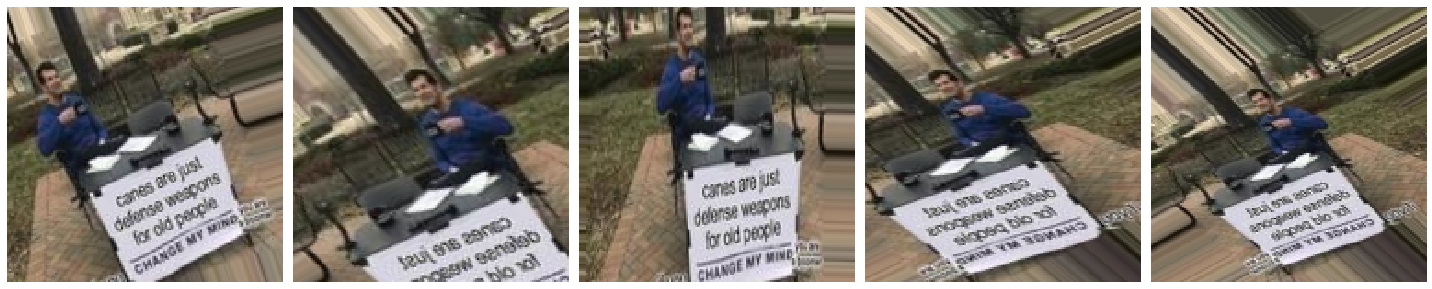

In [95]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [96]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [97]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 604 images belonging to 2 classes.


In [98]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [99]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [100]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 4 steps
Epoch 1/15
17/17 [==============================] - 32s 2s/step - loss: 0.6350 - accuracy: 0.7867 - val_loss: 0.0492 - val_accuracy: 0.9980
Epoch 2/15
17/17 [==============================] - 31s 2s/step - loss: 0.0275 - accuracy: 0.9937 - val_loss: 0.0107 - val_accuracy: 0.9980
Epoch 3/15
17/17 [==============================] - 29s 2s/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 4/15
17/17 [==============================] - 29s 2s/step - loss: 0.0059 - accuracy: 0.9976 - val_loss: 0.0064 - val_accuracy: 0.9980
Epoch 5/15
17/17 [==============================] - 29s 2s/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0068 - val_accuracy: 0.9980
Epoch 6/15
17/17 [==============================] - 31s 2s/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 1.7648e-04 - val_accuracy: 1.0000
Epoch 7/15
17/17 [==============================] - 28s 2s/step -

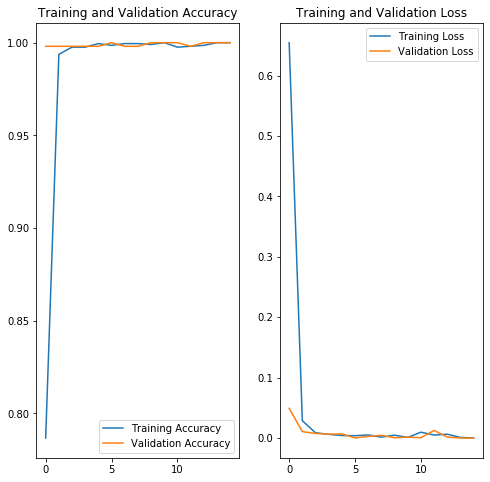

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [162]:
# print(model(r'/home/greco/Documents/Memev2/PersonalTestsResize/20200209-070152-411881.jpeg'))

!pip install -q pyyaml h5py --user

model.save('my_model.h5') 

In [163]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [ ]:
# use the trained model and plug in a test image
#output: what meme it is



In [137]:

# from PIL import Image

# myImage = Image.open(r'/home/greco/Documents/Memev2/PersonalTestsResize/20200209-070152-411881.jpeg')

# myImage.show()


In [138]:
# train_image_generator = ImageDataGenerator(rescale=1./255)

In [139]:
# train_dir = '/home/greco/Documents/Memev2/PersonalTestsResize/'

# train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                            directory=train_dir,
#                                                            shuffle=True,
#                                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                            class_mode='binary')

In [140]:
# !pip install tensorflow_hub --user
# import tensorflow_hub as hub
# # detector = hub.load(model_new)

In [141]:
# !pip install opencv-python --user

# #!pip install cv
# import cv2

# CATEGORIES = ["SpongeBob", "Change My Mind"]

# imgg = cv2.imread('path.tif', 1)

# model_new.summary()

# def format_example(myImage, label):
#   myImage = tf.cast(image, tf.float32)
#   image = (myImage/255) - 1
#   image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
#   return image, label
# print(format_example)

# # def prepare(filepath):
# #     IMG_SIZE = 70  # 50 in txt-based
# # #     imgg = cv2.imread('path.tif', 1)
# #     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

# prediction = model.predict(train_dir)
# print(prediction)  # will be a list in a list.
# print(CATEGORIES[int(prediction[0][0])])

In [142]:
# predictionFinal = model_new.predict(myImage)

# print(predictionFinal)